In [1]:
import os
import cv2
import math
import tqdm
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ranksums
import matplotlib.pyplot as plt
from PIL import Image, ImageFile
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import cosine_similarity

ImageFile.LOAD_TRUNCATED_IMAGES = True
# plt.rc("font",family="SimHei",size="15")  #解决中文乱码问题

In [3]:
feature_path = "/data1/pub/datasets/food/food_features/"
feature_train = np.load(feature_path + "feature_train.npy", allow_pickle=True)
# feature_val = np.load(feature_path + "feature_val.npy", allow_pickle=True)
# feature_test = np.load(feature_path + "feature_test.npy", allow_pickle=True)

sample = 50
class_number = len(feature_train)

In [4]:
intra_euclidean_dis_list = []
for c in tqdm.tqdm(range(class_number)):
    num_img = feature_train[c].shape[0]
    print('cur_class_num:', num_img) 

    feature = np.squeeze(feature_train[c])
#     print('feature shape:', feature.shape)

    if num_img <= sample:
        num_sample = num_img
        sample_feature = feature
    else:
        num_sample = sample
        random_list = random.sample(list(range(num_img)), num_sample)
        sample_feature = feature[random_list]

    assert sample_feature.shape[0] <= num_sample, 'Error Sample Number'

    Euclidean_dis = cdist(sample_feature, sample_feature, metric='euclidean')
    cur_euclidean_list = list(Euclidean_dis[np.triu_indices(num_sample, 1)])
    intra_euclidean_dis_list.extend(cur_euclidean_list)
    # print('Euclidean Distance Number:', len(cur_euclidean_list))

    assert num_sample * (num_sample - 1) / 2 == len(cur_euclidean_list), 'Error'
    print("intra euclidean distance length:", len(intra_euclidean_dis_list))

  4%|▍         | 26/583 [00:00<00:02, 255.54it/s]

cur_class_num: 643
intra euclidean distance length: 1225
cur_class_num: 1480
intra euclidean distance length: 2450
cur_class_num: 739
intra euclidean distance length: 3675
cur_class_num: 392
intra euclidean distance length: 4900
cur_class_num: 330
intra euclidean distance length: 6125
cur_class_num: 473
intra euclidean distance length: 7350
cur_class_num: 328
intra euclidean distance length: 8575
cur_class_num: 510
intra euclidean distance length: 9800
cur_class_num: 432
intra euclidean distance length: 11025
cur_class_num: 404
intra euclidean distance length: 12250
cur_class_num: 726
intra euclidean distance length: 13475
cur_class_num: 600
intra euclidean distance length: 14700
cur_class_num: 773
intra euclidean distance length: 15925
cur_class_num: 493
intra euclidean distance length: 17150
cur_class_num: 211
intra euclidean distance length: 18375
cur_class_num: 550
intra euclidean distance length: 19600
cur_class_num: 847
intra euclidean distance length: 20825
cur_class_num: 770
in

 19%|█▉        | 112/583 [00:00<00:01, 274.83it/s]

intra euclidean distance length: 66150
cur_class_num: 317
intra euclidean distance length: 67375
cur_class_num: 787
intra euclidean distance length: 68600
cur_class_num: 1078
intra euclidean distance length: 69825
cur_class_num: 251
intra euclidean distance length: 71050
cur_class_num: 2376
intra euclidean distance length: 72275
cur_class_num: 120
intra euclidean distance length: 73500
cur_class_num: 699
intra euclidean distance length: 74725
cur_class_num: 762
intra euclidean distance length: 75950
cur_class_num: 724
intra euclidean distance length: 77175
cur_class_num: 624
intra euclidean distance length: 78400
cur_class_num: 507
intra euclidean distance length: 79625
cur_class_num: 343
intra euclidean distance length: 80850
cur_class_num: 385
intra euclidean distance length: 82075
cur_class_num: 847
intra euclidean distance length: 83300
cur_class_num: 833
intra euclidean distance length: 84525
cur_class_num: 574
intra euclidean distance length: 85750
cur_class_num: 1160
intra eucli

 24%|██▍       | 142/583 [00:00<00:01, 280.08it/s]

cur_class_num: 898
intra euclidean distance length: 138425
cur_class_num: 843
intra euclidean distance length: 139650
cur_class_num: 657
intra euclidean distance length: 140875
cur_class_num: 435
intra euclidean distance length: 142100
cur_class_num: 361
intra euclidean distance length: 143325
cur_class_num: 1876
intra euclidean distance length: 144550
cur_class_num: 325
intra euclidean distance length: 145775
cur_class_num: 662
intra euclidean distance length: 147000
cur_class_num: 243
intra euclidean distance length: 148225
cur_class_num: 976
intra euclidean distance length: 149450
cur_class_num: 918
intra euclidean distance length: 150675
cur_class_num: 1677
intra euclidean distance length: 151900
cur_class_num: 574
intra euclidean distance length: 153125
cur_class_num: 442
intra euclidean distance length: 154350
cur_class_num: 563
intra euclidean distance length: 155575
cur_class_num: 1174
intra euclidean distance length: 156800
cur_class_num: 769
intra euclidean distance length: 1

 39%|███▉      | 230/583 [00:00<00:01, 286.83it/s]

intra euclidean distance length: 210700
cur_class_num: 585
intra euclidean distance length: 211925
cur_class_num: 573
intra euclidean distance length: 213150
cur_class_num: 239
intra euclidean distance length: 214375
cur_class_num: 149
intra euclidean distance length: 215600
cur_class_num: 503
intra euclidean distance length: 216825
cur_class_num: 212
intra euclidean distance length: 218050
cur_class_num: 350
intra euclidean distance length: 219275
cur_class_num: 545
intra euclidean distance length: 220500
cur_class_num: 351
intra euclidean distance length: 221725
cur_class_num: 360
intra euclidean distance length: 222950
cur_class_num: 1128
intra euclidean distance length: 224175
cur_class_num: 360
intra euclidean distance length: 225400
cur_class_num: 389
intra euclidean distance length: 226625
cur_class_num: 317
intra euclidean distance length: 227850
cur_class_num: 792
intra euclidean distance length: 229075
cur_class_num: 816
intra euclidean distance length: 230300
cur_class_num: 

 45%|████▍     | 260/583 [00:00<00:01, 289.51it/s]

cur_class_num: 728
intra euclidean distance length: 282975
cur_class_num: 350
intra euclidean distance length: 284200
cur_class_num: 418
intra euclidean distance length: 285425
cur_class_num: 627
intra euclidean distance length: 286650
cur_class_num: 369
intra euclidean distance length: 287875
cur_class_num: 1050
intra euclidean distance length: 289100
cur_class_num: 3156
intra euclidean distance length: 290325
cur_class_num: 883
intra euclidean distance length: 291550
cur_class_num: 194
intra euclidean distance length: 292775
cur_class_num: 730
intra euclidean distance length: 294000
cur_class_num: 260
intra euclidean distance length: 295225
cur_class_num: 200
intra euclidean distance length: 296450
cur_class_num: 386
intra euclidean distance length: 297675
cur_class_num: 500
intra euclidean distance length: 298900
cur_class_num: 388
intra euclidean distance length: 300125
cur_class_num: 416
intra euclidean distance length: 301350
cur_class_num: 271
intra euclidean distance length: 30

 55%|█████▍    | 320/583 [00:01<00:00, 293.60it/s]

intra euclidean distance length: 355250
cur_class_num: 1719
intra euclidean distance length: 356475
cur_class_num: 427
intra euclidean distance length: 357700
cur_class_num: 878
intra euclidean distance length: 358925
cur_class_num: 112
intra euclidean distance length: 360150
cur_class_num: 949
intra euclidean distance length: 361375
cur_class_num: 174
intra euclidean distance length: 362600
cur_class_num: 412
intra euclidean distance length: 363825
cur_class_num: 469
intra euclidean distance length: 365050
cur_class_num: 191
intra euclidean distance length: 366275
cur_class_num: 607
intra euclidean distance length: 367500
cur_class_num: 224
intra euclidean distance length: 368725
cur_class_num: 232
intra euclidean distance length: 369950
cur_class_num: 445
intra euclidean distance length: 371175
cur_class_num: 172
intra euclidean distance length: 372400
cur_class_num: 362
intra euclidean distance length: 373625
cur_class_num: 405
intra euclidean distance length: 374850
cur_class_num: 

 65%|██████▌   | 380/583 [00:01<00:00, 295.28it/s]

intra euclidean distance length: 428750
cur_class_num: 492
intra euclidean distance length: 429975
cur_class_num: 669
intra euclidean distance length: 431200
cur_class_num: 800
intra euclidean distance length: 432425
cur_class_num: 377
intra euclidean distance length: 433650
cur_class_num: 394
intra euclidean distance length: 434875
cur_class_num: 253
intra euclidean distance length: 436100
cur_class_num: 354
intra euclidean distance length: 437325
cur_class_num: 743
intra euclidean distance length: 438550
cur_class_num: 433
intra euclidean distance length: 439775
cur_class_num: 780
intra euclidean distance length: 441000
cur_class_num: 391
intra euclidean distance length: 442225
cur_class_num: 688
intra euclidean distance length: 443450
cur_class_num: 769
intra euclidean distance length: 444675
cur_class_num: 1465
intra euclidean distance length: 445900
cur_class_num: 541
intra euclidean distance length: 447125
cur_class_num: 270
intra euclidean distance length: 448350
cur_class_num: 

 75%|███████▌  | 440/583 [00:01<00:00, 296.38it/s]

intra euclidean distance length: 502250
cur_class_num: 952
intra euclidean distance length: 503475
cur_class_num: 579
intra euclidean distance length: 504700
cur_class_num: 463
intra euclidean distance length: 505925
cur_class_num: 576
intra euclidean distance length: 507150
cur_class_num: 242
intra euclidean distance length: 508375
cur_class_num: 663
intra euclidean distance length: 509600
cur_class_num: 418
intra euclidean distance length: 510825
cur_class_num: 948
intra euclidean distance length: 512050
cur_class_num: 710
intra euclidean distance length: 513275
cur_class_num: 388
intra euclidean distance length: 514500
cur_class_num: 331
intra euclidean distance length: 515725
cur_class_num: 416
intra euclidean distance length: 516950
cur_class_num: 615
intra euclidean distance length: 518175
cur_class_num: 67
intra euclidean distance length: 519400
cur_class_num: 468
intra euclidean distance length: 520625
cur_class_num: 802
intra euclidean distance length: 521850
cur_class_num: 22

 86%|████████▌ | 500/583 [00:01<00:00, 296.40it/s]

intra euclidean distance length: 575750
cur_class_num: 419
intra euclidean distance length: 576975
cur_class_num: 290
intra euclidean distance length: 578200
cur_class_num: 233
intra euclidean distance length: 579425
cur_class_num: 379
intra euclidean distance length: 580650
cur_class_num: 333
intra euclidean distance length: 581875
cur_class_num: 936
intra euclidean distance length: 583100
cur_class_num: 440
intra euclidean distance length: 584325
cur_class_num: 1169
intra euclidean distance length: 585550
cur_class_num: 311
intra euclidean distance length: 586775
cur_class_num: 230
intra euclidean distance length: 588000
cur_class_num: 887
intra euclidean distance length: 589225
cur_class_num: 140
intra euclidean distance length: 590450
cur_class_num: 201
intra euclidean distance length: 591675
cur_class_num: 525
intra euclidean distance length: 592900
cur_class_num: 207
intra euclidean distance length: 594125
cur_class_num: 324
intra euclidean distance length: 595350
cur_class_num: 

100%|██████████| 583/583 [00:02<00:00, 291.45it/s]

intra euclidean distance length: 649250
cur_class_num: 594
intra euclidean distance length: 650475
cur_class_num: 526
intra euclidean distance length: 651700
cur_class_num: 553
intra euclidean distance length: 652925
cur_class_num: 2822
intra euclidean distance length: 654150
cur_class_num: 327
intra euclidean distance length: 655375
cur_class_num: 818
intra euclidean distance length: 656600
cur_class_num: 2301
intra euclidean distance length: 657825
cur_class_num: 172
intra euclidean distance length: 659050
cur_class_num: 270
intra euclidean distance length: 660275
cur_class_num: 437
intra euclidean distance length: 661500
cur_class_num: 286
intra euclidean distance length: 662725
cur_class_num: 456
intra euclidean distance length: 663950
cur_class_num: 457
intra euclidean distance length: 665175
cur_class_num: 1021
intra euclidean distance length: 666400
cur_class_num: 728
intra euclidean distance length: 667625
cur_class_num: 119
intra euclidean distance length: 668850
cur_class_num

In [5]:
inter_euclidean_dis_list = []
for i in tqdm.tqdm(range(class_number - 1)):
    class1_feature = np.squeeze(feature_train[i])
    num_img1 = class1_feature.shape[0]
    if num_img1 <= sample:
        num_sample1 = num_img1
        sample_feature1 = class1_feature
    else:
        num_sample1 = sample
        random_list1 = random.sample(list(range(num_img1)), num_sample1)
        sample_feature1 = class1_feature[random_list1]

    for j in range(i + 1, class_number):
        class2_feature = np.squeeze(feature_train[j])
        num_img2 = class2_feature.shape[0]
        if num_img2 <= sample:
            num_sample2 = num_img2
            sample_feature2 = class2_feature
        else:
            num_sample2 = sample
            random_list2 = random.sample(list(range(num_img2)), num_sample2)
            sample_feature2 = class2_feature[random_list2]

        Euclidean_dis = cdist(sample_feature1, sample_feature2, metric='euclidean')
        cur_euclidean_list = Euclidean_dis.flatten()
        inter_euclidean_dis_list.extend(cur_euclidean_list)

        print("inter euclidean distance length:", len(inter_euclidean_dis_list))

  0%|          | 0/582 [00:00<?, ?it/s]

inter euclidean distance length: 2500
inter euclidean distance length: 5000
inter euclidean distance length: 7500
inter euclidean distance length: 10000
inter euclidean distance length: 12500
inter euclidean distance length: 15000
inter euclidean distance length: 17500
inter euclidean distance length: 20000
inter euclidean distance length: 22500
inter euclidean distance length: 25000
inter euclidean distance length: 27500
inter euclidean distance length: 30000
inter euclidean distance length: 32500
inter euclidean distance length: 35000
inter euclidean distance length: 37500
inter euclidean distance length: 40000
inter euclidean distance length: 42500
inter euclidean distance length: 45000
inter euclidean distance length: 47500
inter euclidean distance length: 50000
inter euclidean distance length: 52500
inter euclidean distance length: 55000
inter euclidean distance length: 57500
inter euclidean distance length: 60000
inter euclidean distance length: 62500
inter euclidean distance len

inter euclidean distance length: 607500
inter euclidean distance length: 610000
inter euclidean distance length: 612500
inter euclidean distance length: 615000
inter euclidean distance length: 617500
inter euclidean distance length: 620000
inter euclidean distance length: 622500
inter euclidean distance length: 625000
inter euclidean distance length: 627500
inter euclidean distance length: 630000
inter euclidean distance length: 632500
inter euclidean distance length: 635000
inter euclidean distance length: 637500
inter euclidean distance length: 640000
inter euclidean distance length: 642500
inter euclidean distance length: 645000
inter euclidean distance length: 647500
inter euclidean distance length: 650000
inter euclidean distance length: 652500
inter euclidean distance length: 655000
inter euclidean distance length: 657500
inter euclidean distance length: 660000
inter euclidean distance length: 662500
inter euclidean distance length: 665000
inter euclidean distance length: 667500


inter euclidean distance length: 1222500
inter euclidean distance length: 1225000
inter euclidean distance length: 1227500
inter euclidean distance length: 1230000
inter euclidean distance length: 1232500
inter euclidean distance length: 1235000
inter euclidean distance length: 1237500
inter euclidean distance length: 1240000
inter euclidean distance length: 1242500
inter euclidean distance length: 1245000
inter euclidean distance length: 1247500
inter euclidean distance length: 1250000
inter euclidean distance length: 1252500
inter euclidean distance length: 1255000
inter euclidean distance length: 1257500
inter euclidean distance length: 1260000
inter euclidean distance length: 1262500
inter euclidean distance length: 1265000
inter euclidean distance length: 1267500
inter euclidean distance length: 1270000
inter euclidean distance length: 1272500
inter euclidean distance length: 1275000
inter euclidean distance length: 1277500
inter euclidean distance length: 1280000
inter euclidean 

  0%|          | 1/582 [00:01<18:44,  1.94s/it]

inter euclidean distance length: 1375000
inter euclidean distance length: 1377500
inter euclidean distance length: 1380000
inter euclidean distance length: 1382500
inter euclidean distance length: 1385000
inter euclidean distance length: 1387500
inter euclidean distance length: 1390000
inter euclidean distance length: 1392500
inter euclidean distance length: 1395000
inter euclidean distance length: 1397500
inter euclidean distance length: 1400000
inter euclidean distance length: 1402500
inter euclidean distance length: 1405000
inter euclidean distance length: 1407500
inter euclidean distance length: 1410000
inter euclidean distance length: 1412500
inter euclidean distance length: 1415000
inter euclidean distance length: 1417500
inter euclidean distance length: 1420000
inter euclidean distance length: 1422500
inter euclidean distance length: 1425000
inter euclidean distance length: 1427500
inter euclidean distance length: 1430000
inter euclidean distance length: 1432500
inter euclidean 

inter euclidean distance length: 1972500
inter euclidean distance length: 1975000
inter euclidean distance length: 1977500
inter euclidean distance length: 1980000
inter euclidean distance length: 1982500
inter euclidean distance length: 1985000
inter euclidean distance length: 1987500
inter euclidean distance length: 1990000
inter euclidean distance length: 1992500
inter euclidean distance length: 1995000
inter euclidean distance length: 1997500
inter euclidean distance length: 2000000
inter euclidean distance length: 2002500
inter euclidean distance length: 2005000
inter euclidean distance length: 2007500
inter euclidean distance length: 2010000
inter euclidean distance length: 2012500
inter euclidean distance length: 2015000
inter euclidean distance length: 2017500
inter euclidean distance length: 2020000
inter euclidean distance length: 2022500
inter euclidean distance length: 2025000
inter euclidean distance length: 2027500
inter euclidean distance length: 2030000
inter euclidean 

inter euclidean distance length: 2582500
inter euclidean distance length: 2585000
inter euclidean distance length: 2587500
inter euclidean distance length: 2590000
inter euclidean distance length: 2592500
inter euclidean distance length: 2595000
inter euclidean distance length: 2597500
inter euclidean distance length: 2600000
inter euclidean distance length: 2602500
inter euclidean distance length: 2605000
inter euclidean distance length: 2607500
inter euclidean distance length: 2610000
inter euclidean distance length: 2612500
inter euclidean distance length: 2615000
inter euclidean distance length: 2617500
inter euclidean distance length: 2620000
inter euclidean distance length: 2622500
inter euclidean distance length: 2625000
inter euclidean distance length: 2627500
inter euclidean distance length: 2630000
inter euclidean distance length: 2632500
inter euclidean distance length: 2635000
inter euclidean distance length: 2637500
inter euclidean distance length: 2640000
inter euclidean 

  0%|          | 2/582 [00:03<18:44,  1.94s/it]


inter euclidean distance length: 2885000
inter euclidean distance length: 2887500
inter euclidean distance length: 2890000
inter euclidean distance length: 2892500
inter euclidean distance length: 2895000
inter euclidean distance length: 2897500
inter euclidean distance length: 2900000
inter euclidean distance length: 2902500
inter euclidean distance length: 2905000
inter euclidean distance length: 2907500
inter euclidean distance length: 2910000
inter euclidean distance length: 2912500
inter euclidean distance length: 2915000
inter euclidean distance length: 2917500
inter euclidean distance length: 2920000
inter euclidean distance length: 2922500
inter euclidean distance length: 2925000
inter euclidean distance length: 2927500
inter euclidean distance length: 2930000
inter euclidean distance length: 2932500
inter euclidean distance length: 2935000
inter euclidean distance length: 2937500
inter euclidean distance length: 2940000
inter euclidean distance length: 2942500
inter euclidean

inter euclidean distance length: 3457500
inter euclidean distance length: 3460000
inter euclidean distance length: 3462500
inter euclidean distance length: 3465000
inter euclidean distance length: 3467500
inter euclidean distance length: 3470000
inter euclidean distance length: 3472500
inter euclidean distance length: 3475000
inter euclidean distance length: 3477500
inter euclidean distance length: 3480000
inter euclidean distance length: 3482500
inter euclidean distance length: 3485000
inter euclidean distance length: 3487500
inter euclidean distance length: 3490000
inter euclidean distance length: 3492500
inter euclidean distance length: 3495000
inter euclidean distance length: 3497500
inter euclidean distance length: 3500000
inter euclidean distance length: 3502500
inter euclidean distance length: 3505000
inter euclidean distance length: 3507500
inter euclidean distance length: 3510000
inter euclidean distance length: 3512500
inter euclidean distance length: 3515000
inter euclidean 

inter euclidean distance length: 4070000
inter euclidean distance length: 4072500
inter euclidean distance length: 4075000
inter euclidean distance length: 4077500
inter euclidean distance length: 4080000
inter euclidean distance length: 4082500
inter euclidean distance length: 4085000
inter euclidean distance length: 4087500
inter euclidean distance length: 4090000
inter euclidean distance length: 4092500
inter euclidean distance length: 4095000
inter euclidean distance length: 4097500
inter euclidean distance length: 4100000
inter euclidean distance length: 4102500
inter euclidean distance length: 4105000
inter euclidean distance length: 4107500
inter euclidean distance length: 4110000
inter euclidean distance length: 4112500
inter euclidean distance length: 4115000
inter euclidean distance length: 4117500
inter euclidean distance length: 4120000
inter euclidean distance length: 4122500
inter euclidean distance length: 4125000
inter euclidean distance length: 4127500
inter euclidean 

  1%|          | 3/582 [00:05<18:47,  1.95s/it]

inter euclidean distance length: 4227500
inter euclidean distance length: 4230000
inter euclidean distance length: 4232500
inter euclidean distance length: 4235000
inter euclidean distance length: 4237500
inter euclidean distance length: 4240000
inter euclidean distance length: 4242500
inter euclidean distance length: 4245000
inter euclidean distance length: 4247500
inter euclidean distance length: 4250000
inter euclidean distance length: 4252500
inter euclidean distance length: 4255000
inter euclidean distance length: 4257500
inter euclidean distance length: 4260000
inter euclidean distance length: 4262500
inter euclidean distance length: 4265000
inter euclidean distance length: 4267500
inter euclidean distance length: 4270000
inter euclidean distance length: 4272500
inter euclidean distance length: 4275000
inter euclidean distance length: 4277500
inter euclidean distance length: 4280000
inter euclidean distance length: 4282500
inter euclidean distance length: 4285000
inter euclidean 

inter euclidean distance length: 4840000
inter euclidean distance length: 4842500
inter euclidean distance length: 4845000
inter euclidean distance length: 4847500
inter euclidean distance length: 4850000
inter euclidean distance length: 4852500
inter euclidean distance length: 4855000
inter euclidean distance length: 4857500
inter euclidean distance length: 4860000
inter euclidean distance length: 4862500
inter euclidean distance length: 4865000
inter euclidean distance length: 4867500
inter euclidean distance length: 4870000
inter euclidean distance length: 4872500
inter euclidean distance length: 4875000
inter euclidean distance length: 4877500
inter euclidean distance length: 4880000
inter euclidean distance length: 4882500
inter euclidean distance length: 4885000
inter euclidean distance length: 4887500
inter euclidean distance length: 4890000
inter euclidean distance length: 4892500
inter euclidean distance length: 4895000
inter euclidean distance length: 4897500
inter euclidean 

inter euclidean distance length: 5460000
inter euclidean distance length: 5462500
inter euclidean distance length: 5465000
inter euclidean distance length: 5467500
inter euclidean distance length: 5470000
inter euclidean distance length: 5472500
inter euclidean distance length: 5475000
inter euclidean distance length: 5477500
inter euclidean distance length: 5480000
inter euclidean distance length: 5482500
inter euclidean distance length: 5485000
inter euclidean distance length: 5487500
inter euclidean distance length: 5490000
inter euclidean distance length: 5492500
inter euclidean distance length: 5495000
inter euclidean distance length: 5497500
inter euclidean distance length: 5500000
inter euclidean distance length: 5502500
inter euclidean distance length: 5505000
inter euclidean distance length: 5507500
inter euclidean distance length: 5510000
inter euclidean distance length: 5512500
inter euclidean distance length: 5515000
inter euclidean distance length: 5517500
inter euclidean 

  1%|          | 4/582 [00:07<18:38,  1.94s/it]

inter euclidean distance length: 5767500
inter euclidean distance length: 5770000
inter euclidean distance length: 5772500
inter euclidean distance length: 5775000
inter euclidean distance length: 5777500
inter euclidean distance length: 5780000
inter euclidean distance length: 5782500
inter euclidean distance length: 5785000
inter euclidean distance length: 5787500
inter euclidean distance length: 5790000
inter euclidean distance length: 5792500
inter euclidean distance length: 5795000
inter euclidean distance length: 5797500
inter euclidean distance length: 5800000
inter euclidean distance length: 5802500
inter euclidean distance length: 5805000
inter euclidean distance length: 5807500
inter euclidean distance length: 5810000
inter euclidean distance length: 5812500
inter euclidean distance length: 5815000
inter euclidean distance length: 5817500
inter euclidean distance length: 5820000
inter euclidean distance length: 5822500
inter euclidean distance length: 5825000
inter euclidean 

inter euclidean distance length: 6342500
inter euclidean distance length: 6345000
inter euclidean distance length: 6347500
inter euclidean distance length: 6350000
inter euclidean distance length: 6352500
inter euclidean distance length: 6355000
inter euclidean distance length: 6357500
inter euclidean distance length: 6360000
inter euclidean distance length: 6362500
inter euclidean distance length: 6365000
inter euclidean distance length: 6367500
inter euclidean distance length: 6370000
inter euclidean distance length: 6372500
inter euclidean distance length: 6375000
inter euclidean distance length: 6377500
inter euclidean distance length: 6380000
inter euclidean distance length: 6382500
inter euclidean distance length: 6385000
inter euclidean distance length: 6387500
inter euclidean distance length: 6390000
inter euclidean distance length: 6392500
inter euclidean distance length: 6395000
inter euclidean distance length: 6397500
inter euclidean distance length: 6400000
inter euclidean 

inter euclidean distance length: 6950000
inter euclidean distance length: 6952500
inter euclidean distance length: 6955000
inter euclidean distance length: 6957500
inter euclidean distance length: 6960000
inter euclidean distance length: 6962500
inter euclidean distance length: 6965000
inter euclidean distance length: 6967500
inter euclidean distance length: 6970000
inter euclidean distance length: 6972500
inter euclidean distance length: 6975000
inter euclidean distance length: 6977500
inter euclidean distance length: 6980000
inter euclidean distance length: 6982500
inter euclidean distance length: 6985000
inter euclidean distance length: 6987500
inter euclidean distance length: 6990000
inter euclidean distance length: 6992500
inter euclidean distance length: 6995000
inter euclidean distance length: 6997500
inter euclidean distance length: 7000000
inter euclidean distance length: 7002500
inter euclidean distance length: 7005000
inter euclidean distance length: 7007500
inter euclidean 

  1%|          | 5/582 [00:09<18:41,  1.94s/it]

inter euclidean distance length: 7105000
inter euclidean distance length: 7107500
inter euclidean distance length: 7110000
inter euclidean distance length: 7112500
inter euclidean distance length: 7115000
inter euclidean distance length: 7117500
inter euclidean distance length: 7120000
inter euclidean distance length: 7122500
inter euclidean distance length: 7125000
inter euclidean distance length: 7127500
inter euclidean distance length: 7130000
inter euclidean distance length: 7132500
inter euclidean distance length: 7135000
inter euclidean distance length: 7137500
inter euclidean distance length: 7140000
inter euclidean distance length: 7142500
inter euclidean distance length: 7145000
inter euclidean distance length: 7147500
inter euclidean distance length: 7150000
inter euclidean distance length: 7152500
inter euclidean distance length: 7155000
inter euclidean distance length: 7157500
inter euclidean distance length: 7160000
inter euclidean distance length: 7162500
inter euclidean 

inter euclidean distance length: 7720000
inter euclidean distance length: 7722500
inter euclidean distance length: 7725000
inter euclidean distance length: 7727500
inter euclidean distance length: 7730000
inter euclidean distance length: 7732500
inter euclidean distance length: 7735000
inter euclidean distance length: 7737500
inter euclidean distance length: 7740000
inter euclidean distance length: 7742500
inter euclidean distance length: 7745000
inter euclidean distance length: 7747500
inter euclidean distance length: 7750000
inter euclidean distance length: 7752500
inter euclidean distance length: 7755000
inter euclidean distance length: 7757500
inter euclidean distance length: 7760000
inter euclidean distance length: 7762500
inter euclidean distance length: 7765000
inter euclidean distance length: 7767500
inter euclidean distance length: 7770000
inter euclidean distance length: 7772500
inter euclidean distance length: 7775000
inter euclidean distance length: 7777500
inter euclidean 

inter euclidean distance length: 8337500
inter euclidean distance length: 8340000
inter euclidean distance length: 8342500
inter euclidean distance length: 8345000
inter euclidean distance length: 8347500
inter euclidean distance length: 8350000
inter euclidean distance length: 8352500
inter euclidean distance length: 8355000
inter euclidean distance length: 8357500
inter euclidean distance length: 8360000
inter euclidean distance length: 8362500
inter euclidean distance length: 8365000
inter euclidean distance length: 8367500
inter euclidean distance length: 8370000
inter euclidean distance length: 8372500
inter euclidean distance length: 8375000
inter euclidean distance length: 8377500
inter euclidean distance length: 8380000
inter euclidean distance length: 8382500
inter euclidean distance length: 8385000
inter euclidean distance length: 8387500
inter euclidean distance length: 8390000
inter euclidean distance length: 8392500
inter euclidean distance length: 8395000
inter euclidean 

  1%|          | 6/582 [00:11<18:30,  1.93s/it]

inter euclidean distance length: 8647500
inter euclidean distance length: 8650000
inter euclidean distance length: 8652500
inter euclidean distance length: 8655000
inter euclidean distance length: 8657500
inter euclidean distance length: 8660000
inter euclidean distance length: 8662500
inter euclidean distance length: 8665000
inter euclidean distance length: 8667500
inter euclidean distance length: 8670000
inter euclidean distance length: 8672500
inter euclidean distance length: 8675000
inter euclidean distance length: 8677500
inter euclidean distance length: 8680000
inter euclidean distance length: 8682500
inter euclidean distance length: 8685000
inter euclidean distance length: 8687500
inter euclidean distance length: 8690000
inter euclidean distance length: 8692500
inter euclidean distance length: 8695000
inter euclidean distance length: 8697500
inter euclidean distance length: 8700000
inter euclidean distance length: 8702500
inter euclidean distance length: 8705000
inter euclidean 

inter euclidean distance length: 9262500
inter euclidean distance length: 9265000
inter euclidean distance length: 9267500
inter euclidean distance length: 9270000
inter euclidean distance length: 9272500
inter euclidean distance length: 9275000
inter euclidean distance length: 9277500
inter euclidean distance length: 9280000
inter euclidean distance length: 9282500
inter euclidean distance length: 9285000
inter euclidean distance length: 9287500
inter euclidean distance length: 9290000
inter euclidean distance length: 9292500
inter euclidean distance length: 9295000
inter euclidean distance length: 9297500
inter euclidean distance length: 9300000
inter euclidean distance length: 9302500
inter euclidean distance length: 9305000
inter euclidean distance length: 9307500
inter euclidean distance length: 9310000
inter euclidean distance length: 9312500
inter euclidean distance length: 9315000
inter euclidean distance length: 9317500
inter euclidean distance length: 9320000
inter euclidean 

inter euclidean distance length: 9880000
inter euclidean distance length: 9882500
inter euclidean distance length: 9885000
inter euclidean distance length: 9887500
inter euclidean distance length: 9890000
inter euclidean distance length: 9892500
inter euclidean distance length: 9895000
inter euclidean distance length: 9897500
inter euclidean distance length: 9900000
inter euclidean distance length: 9902500
inter euclidean distance length: 9905000
inter euclidean distance length: 9907500
inter euclidean distance length: 9910000
inter euclidean distance length: 9912500
inter euclidean distance length: 9915000
inter euclidean distance length: 9917500
inter euclidean distance length: 9920000
inter euclidean distance length: 9922500
inter euclidean distance length: 9925000
inter euclidean distance length: 9927500
inter euclidean distance length: 9930000
inter euclidean distance length: 9932500
inter euclidean distance length: 9935000
inter euclidean distance length: 9937500
inter euclidean 

  1%|          | 7/582 [00:13<18:22,  1.92s/it]

inter euclidean distance length: 10032500
inter euclidean distance length: 10035000
inter euclidean distance length: 10037500
inter euclidean distance length: 10040000
inter euclidean distance length: 10042500
inter euclidean distance length: 10045000
inter euclidean distance length: 10047500
inter euclidean distance length: 10050000
inter euclidean distance length: 10052500
inter euclidean distance length: 10055000
inter euclidean distance length: 10057500
inter euclidean distance length: 10060000
inter euclidean distance length: 10062500
inter euclidean distance length: 10065000
inter euclidean distance length: 10067500
inter euclidean distance length: 10070000
inter euclidean distance length: 10072500
inter euclidean distance length: 10075000
inter euclidean distance length: 10077500
inter euclidean distance length: 10080000
inter euclidean distance length: 10082500
inter euclidean distance length: 10085000
inter euclidean distance length: 10087500
inter euclidean distance length: 1

inter euclidean distance length: 10647500
inter euclidean distance length: 10650000
inter euclidean distance length: 10652500
inter euclidean distance length: 10655000
inter euclidean distance length: 10657500
inter euclidean distance length: 10660000
inter euclidean distance length: 10662500
inter euclidean distance length: 10665000
inter euclidean distance length: 10667500
inter euclidean distance length: 10670000
inter euclidean distance length: 10672500
inter euclidean distance length: 10675000
inter euclidean distance length: 10677500
inter euclidean distance length: 10680000
inter euclidean distance length: 10682500
inter euclidean distance length: 10685000
inter euclidean distance length: 10687500
inter euclidean distance length: 10690000
inter euclidean distance length: 10692500
inter euclidean distance length: 10695000
inter euclidean distance length: 10697500
inter euclidean distance length: 10700000
inter euclidean distance length: 10702500
inter euclidean distance length: 1

inter euclidean distance length: 11267500
inter euclidean distance length: 11270000
inter euclidean distance length: 11272500
inter euclidean distance length: 11275000
inter euclidean distance length: 11277500
inter euclidean distance length: 11280000
inter euclidean distance length: 11282500
inter euclidean distance length: 11285000
inter euclidean distance length: 11287500
inter euclidean distance length: 11290000
inter euclidean distance length: 11292500
inter euclidean distance length: 11295000
inter euclidean distance length: 11297500
inter euclidean distance length: 11300000
inter euclidean distance length: 11302500
inter euclidean distance length: 11305000
inter euclidean distance length: 11307500
inter euclidean distance length: 11310000
inter euclidean distance length: 11312500
inter euclidean distance length: 11315000
inter euclidean distance length: 11317500
inter euclidean distance length: 11320000
inter euclidean distance length: 11322500
inter euclidean distance length: 1

  1%|▏         | 8/582 [00:15<18:14,  1.91s/it]

inter euclidean distance length: 11422500
inter euclidean distance length: 11425000
inter euclidean distance length: 11427500
inter euclidean distance length: 11430000
inter euclidean distance length: 11432500
inter euclidean distance length: 11435000
inter euclidean distance length: 11437500
inter euclidean distance length: 11440000
inter euclidean distance length: 11442500
inter euclidean distance length: 11445000
inter euclidean distance length: 11447500
inter euclidean distance length: 11450000
inter euclidean distance length: 11452500
inter euclidean distance length: 11455000
inter euclidean distance length: 11457500
inter euclidean distance length: 11460000
inter euclidean distance length: 11462500
inter euclidean distance length: 11465000
inter euclidean distance length: 11467500
inter euclidean distance length: 11470000
inter euclidean distance length: 11472500
inter euclidean distance length: 11475000
inter euclidean distance length: 11477500
inter euclidean distance length: 1

inter euclidean distance length: 12037500
inter euclidean distance length: 12040000
inter euclidean distance length: 12042500
inter euclidean distance length: 12045000
inter euclidean distance length: 12047500
inter euclidean distance length: 12050000
inter euclidean distance length: 12052500
inter euclidean distance length: 12055000
inter euclidean distance length: 12057500
inter euclidean distance length: 12060000
inter euclidean distance length: 12062500
inter euclidean distance length: 12065000
inter euclidean distance length: 12067500
inter euclidean distance length: 12070000
inter euclidean distance length: 12072500
inter euclidean distance length: 12075000
inter euclidean distance length: 12077500
inter euclidean distance length: 12080000
inter euclidean distance length: 12082500
inter euclidean distance length: 12085000
inter euclidean distance length: 12087500
inter euclidean distance length: 12090000
inter euclidean distance length: 12092500
inter euclidean distance length: 1

inter euclidean distance length: 12650000
inter euclidean distance length: 12652500
inter euclidean distance length: 12655000
inter euclidean distance length: 12657500
inter euclidean distance length: 12660000
inter euclidean distance length: 12662500
inter euclidean distance length: 12665000
inter euclidean distance length: 12667500
inter euclidean distance length: 12670000
inter euclidean distance length: 12672500
inter euclidean distance length: 12675000
inter euclidean distance length: 12677500
inter euclidean distance length: 12680000
inter euclidean distance length: 12682500
inter euclidean distance length: 12685000
inter euclidean distance length: 12687500
inter euclidean distance length: 12690000
inter euclidean distance length: 12692500
inter euclidean distance length: 12695000
inter euclidean distance length: 12697500
inter euclidean distance length: 12700000
inter euclidean distance length: 12702500
inter euclidean distance length: 12705000
inter euclidean distance length: 1

  2%|▏         | 9/582 [00:17<18:10,  1.90s/it]

inter euclidean distance length: 12960000
inter euclidean distance length: 12962500
inter euclidean distance length: 12965000
inter euclidean distance length: 12967500
inter euclidean distance length: 12970000
inter euclidean distance length: 12972500
inter euclidean distance length: 12975000
inter euclidean distance length: 12977500
inter euclidean distance length: 12980000
inter euclidean distance length: 12982500
inter euclidean distance length: 12985000
inter euclidean distance length: 12987500
inter euclidean distance length: 12990000
inter euclidean distance length: 12992500
inter euclidean distance length: 12995000
inter euclidean distance length: 12997500
inter euclidean distance length: 13000000
inter euclidean distance length: 13002500
inter euclidean distance length: 13005000
inter euclidean distance length: 13007500
inter euclidean distance length: 13010000
inter euclidean distance length: 13012500
inter euclidean distance length: 13015000
inter euclidean distance length: 1

inter euclidean distance length: 13580000
inter euclidean distance length: 13582500
inter euclidean distance length: 13585000
inter euclidean distance length: 13587500
inter euclidean distance length: 13590000
inter euclidean distance length: 13592500
inter euclidean distance length: 13595000
inter euclidean distance length: 13597500
inter euclidean distance length: 13600000
inter euclidean distance length: 13602500
inter euclidean distance length: 13605000
inter euclidean distance length: 13607500
inter euclidean distance length: 13610000
inter euclidean distance length: 13612500
inter euclidean distance length: 13615000
inter euclidean distance length: 13617500
inter euclidean distance length: 13620000
inter euclidean distance length: 13622500
inter euclidean distance length: 13625000
inter euclidean distance length: 13627500
inter euclidean distance length: 13630000
inter euclidean distance length: 13632500
inter euclidean distance length: 13635000
inter euclidean distance length: 1

inter euclidean distance length: 14175000
inter euclidean distance length: 14177500
inter euclidean distance length: 14180000
inter euclidean distance length: 14182500
inter euclidean distance length: 14185000
inter euclidean distance length: 14187500
inter euclidean distance length: 14190000
inter euclidean distance length: 14192500
inter euclidean distance length: 14195000
inter euclidean distance length: 14197500
inter euclidean distance length: 14200000
inter euclidean distance length: 14202500
inter euclidean distance length: 14205000
inter euclidean distance length: 14207500
inter euclidean distance length: 14210000
inter euclidean distance length: 14212500
inter euclidean distance length: 14215000
inter euclidean distance length: 14217500
inter euclidean distance length: 14220000
inter euclidean distance length: 14222500
inter euclidean distance length: 14225000
inter euclidean distance length: 14227500
inter euclidean distance length: 14230000
inter euclidean distance length: 1

  2%|▏         | 10/582 [00:19<18:21,  1.93s/it]

inter euclidean distance length: 14432500
inter euclidean distance length: 14435000
inter euclidean distance length: 14437500
inter euclidean distance length: 14440000
inter euclidean distance length: 14442500
inter euclidean distance length: 14445000
inter euclidean distance length: 14447500
inter euclidean distance length: 14450000
inter euclidean distance length: 14452500
inter euclidean distance length: 14455000
inter euclidean distance length: 14457500
inter euclidean distance length: 14460000
inter euclidean distance length: 14462500
inter euclidean distance length: 14465000
inter euclidean distance length: 14467500
inter euclidean distance length: 14470000
inter euclidean distance length: 14472500
inter euclidean distance length: 14475000
inter euclidean distance length: 14477500
inter euclidean distance length: 14480000
inter euclidean distance length: 14482500
inter euclidean distance length: 14485000
inter euclidean distance length: 14487500
inter euclidean distance length: 1

inter euclidean distance length: 15045000
inter euclidean distance length: 15047500
inter euclidean distance length: 15050000
inter euclidean distance length: 15052500
inter euclidean distance length: 15055000
inter euclidean distance length: 15057500
inter euclidean distance length: 15060000
inter euclidean distance length: 15062500
inter euclidean distance length: 15065000
inter euclidean distance length: 15067500
inter euclidean distance length: 15070000
inter euclidean distance length: 15072500
inter euclidean distance length: 15075000
inter euclidean distance length: 15077500
inter euclidean distance length: 15080000
inter euclidean distance length: 15082500
inter euclidean distance length: 15085000
inter euclidean distance length: 15087500
inter euclidean distance length: 15090000
inter euclidean distance length: 15092500
inter euclidean distance length: 15095000
inter euclidean distance length: 15097500
inter euclidean distance length: 15100000
inter euclidean distance length: 1

inter euclidean distance length: 15662500
inter euclidean distance length: 15665000
inter euclidean distance length: 15667500
inter euclidean distance length: 15670000
inter euclidean distance length: 15672500
inter euclidean distance length: 15675000
inter euclidean distance length: 15677500
inter euclidean distance length: 15680000
inter euclidean distance length: 15682500
inter euclidean distance length: 15685000
inter euclidean distance length: 15687500
inter euclidean distance length: 15690000
inter euclidean distance length: 15692500
inter euclidean distance length: 15695000
inter euclidean distance length: 15697500
inter euclidean distance length: 15700000
inter euclidean distance length: 15702500
inter euclidean distance length: 15705000
inter euclidean distance length: 15707500
inter euclidean distance length: 15710000
inter euclidean distance length: 15712500
inter euclidean distance length: 15715000
inter euclidean distance length: 15717500
inter euclidean distance length: 1

  2%|▏         | 11/582 [00:21<18:11,  1.91s/it]

inter euclidean distance length: 15820000
inter euclidean distance length: 15822500
inter euclidean distance length: 15825000
inter euclidean distance length: 15827500
inter euclidean distance length: 15830000
inter euclidean distance length: 15832500
inter euclidean distance length: 15835000
inter euclidean distance length: 15837500
inter euclidean distance length: 15840000
inter euclidean distance length: 15842500
inter euclidean distance length: 15845000
inter euclidean distance length: 15847500
inter euclidean distance length: 15850000
inter euclidean distance length: 15852500
inter euclidean distance length: 15855000
inter euclidean distance length: 15857500
inter euclidean distance length: 15860000
inter euclidean distance length: 15862500
inter euclidean distance length: 15865000
inter euclidean distance length: 15867500
inter euclidean distance length: 15870000
inter euclidean distance length: 15872500
inter euclidean distance length: 15875000
inter euclidean distance length: 1

inter euclidean distance length: 16445000
inter euclidean distance length: 16447500
inter euclidean distance length: 16450000
inter euclidean distance length: 16452500
inter euclidean distance length: 16455000
inter euclidean distance length: 16457500
inter euclidean distance length: 16460000
inter euclidean distance length: 16462500
inter euclidean distance length: 16465000
inter euclidean distance length: 16467500
inter euclidean distance length: 16470000
inter euclidean distance length: 16472500
inter euclidean distance length: 16475000
inter euclidean distance length: 16477500
inter euclidean distance length: 16480000
inter euclidean distance length: 16482500
inter euclidean distance length: 16485000
inter euclidean distance length: 16487500
inter euclidean distance length: 16490000
inter euclidean distance length: 16492500
inter euclidean distance length: 16495000
inter euclidean distance length: 16497500
inter euclidean distance length: 16500000
inter euclidean distance length: 1

inter euclidean distance length: 17065000
inter euclidean distance length: 17067500
inter euclidean distance length: 17070000
inter euclidean distance length: 17072500
inter euclidean distance length: 17075000
inter euclidean distance length: 17077500
inter euclidean distance length: 17080000
inter euclidean distance length: 17082500
inter euclidean distance length: 17085000
inter euclidean distance length: 17087500
inter euclidean distance length: 17090000
inter euclidean distance length: 17092500
inter euclidean distance length: 17095000
inter euclidean distance length: 17097500
inter euclidean distance length: 17100000
inter euclidean distance length: 17102500
inter euclidean distance length: 17105000
inter euclidean distance length: 17107500
inter euclidean distance length: 17110000
inter euclidean distance length: 17112500
inter euclidean distance length: 17115000
inter euclidean distance length: 17117500
inter euclidean distance length: 17120000
inter euclidean distance length: 1

  2%|▏         | 12/582 [00:22<18:01,  1.90s/it]

inter euclidean distance length: 17222500
inter euclidean distance length: 17225000
inter euclidean distance length: 17227500
inter euclidean distance length: 17230000
inter euclidean distance length: 17232500
inter euclidean distance length: 17235000
inter euclidean distance length: 17237500
inter euclidean distance length: 17240000
inter euclidean distance length: 17242500
inter euclidean distance length: 17245000
inter euclidean distance length: 17247500
inter euclidean distance length: 17250000
inter euclidean distance length: 17252500
inter euclidean distance length: 17255000
inter euclidean distance length: 17257500
inter euclidean distance length: 17260000
inter euclidean distance length: 17262500
inter euclidean distance length: 17265000
inter euclidean distance length: 17267500
inter euclidean distance length: 17270000
inter euclidean distance length: 17272500
inter euclidean distance length: 17275000
inter euclidean distance length: 17277500
inter euclidean distance length: 1

inter euclidean distance length: 17840000
inter euclidean distance length: 17842500
inter euclidean distance length: 17845000
inter euclidean distance length: 17847500
inter euclidean distance length: 17850000
inter euclidean distance length: 17852500
inter euclidean distance length: 17855000
inter euclidean distance length: 17857500
inter euclidean distance length: 17860000
inter euclidean distance length: 17862500
inter euclidean distance length: 17865000
inter euclidean distance length: 17867500
inter euclidean distance length: 17870000
inter euclidean distance length: 17872500
inter euclidean distance length: 17875000
inter euclidean distance length: 17877500
inter euclidean distance length: 17880000
inter euclidean distance length: 17882500
inter euclidean distance length: 17885000
inter euclidean distance length: 17887500
inter euclidean distance length: 17890000
inter euclidean distance length: 17892500
inter euclidean distance length: 17895000
inter euclidean distance length: 1

inter euclidean distance length: 18452500
inter euclidean distance length: 18455000
inter euclidean distance length: 18457500
inter euclidean distance length: 18460000
inter euclidean distance length: 18462500
inter euclidean distance length: 18465000
inter euclidean distance length: 18467500
inter euclidean distance length: 18470000
inter euclidean distance length: 18472500
inter euclidean distance length: 18475000
inter euclidean distance length: 18477500
inter euclidean distance length: 18480000
inter euclidean distance length: 18482500
inter euclidean distance length: 18485000
inter euclidean distance length: 18487500
inter euclidean distance length: 18490000
inter euclidean distance length: 18492500
inter euclidean distance length: 18495000
inter euclidean distance length: 18497500
inter euclidean distance length: 18500000
inter euclidean distance length: 18502500
inter euclidean distance length: 18505000
inter euclidean distance length: 18507500
inter euclidean distance length: 1

  2%|▏         | 13/582 [00:24<17:54,  1.89s/it]

inter euclidean distance length: 18607500
inter euclidean distance length: 18610000
inter euclidean distance length: 18612500
inter euclidean distance length: 18615000
inter euclidean distance length: 18617500
inter euclidean distance length: 18620000
inter euclidean distance length: 18622500
inter euclidean distance length: 18625000
inter euclidean distance length: 18627500
inter euclidean distance length: 18630000
inter euclidean distance length: 18632500
inter euclidean distance length: 18635000
inter euclidean distance length: 18637500
inter euclidean distance length: 18640000
inter euclidean distance length: 18642500
inter euclidean distance length: 18645000
inter euclidean distance length: 18647500
inter euclidean distance length: 18650000
inter euclidean distance length: 18652500
inter euclidean distance length: 18655000
inter euclidean distance length: 18657500
inter euclidean distance length: 18660000
inter euclidean distance length: 18662500
inter euclidean distance length: 1

inter euclidean distance length: 19222500
inter euclidean distance length: 19225000
inter euclidean distance length: 19227500
inter euclidean distance length: 19230000
inter euclidean distance length: 19232500
inter euclidean distance length: 19235000
inter euclidean distance length: 19237500
inter euclidean distance length: 19240000
inter euclidean distance length: 19242500
inter euclidean distance length: 19245000
inter euclidean distance length: 19247500
inter euclidean distance length: 19250000
inter euclidean distance length: 19252500
inter euclidean distance length: 19255000
inter euclidean distance length: 19257500
inter euclidean distance length: 19260000
inter euclidean distance length: 19262500
inter euclidean distance length: 19265000
inter euclidean distance length: 19267500
inter euclidean distance length: 19270000
inter euclidean distance length: 19272500
inter euclidean distance length: 19275000
inter euclidean distance length: 19277500
inter euclidean distance length: 1

inter euclidean distance length: 19837500
inter euclidean distance length: 19840000
inter euclidean distance length: 19842500
inter euclidean distance length: 19845000
inter euclidean distance length: 19847500
inter euclidean distance length: 19850000
inter euclidean distance length: 19852500
inter euclidean distance length: 19855000
inter euclidean distance length: 19857500
inter euclidean distance length: 19860000
inter euclidean distance length: 19862500
inter euclidean distance length: 19865000
inter euclidean distance length: 19867500
inter euclidean distance length: 19870000
inter euclidean distance length: 19872500
inter euclidean distance length: 19875000
inter euclidean distance length: 19877500
inter euclidean distance length: 19880000
inter euclidean distance length: 19882500
inter euclidean distance length: 19885000
inter euclidean distance length: 19887500
inter euclidean distance length: 19890000
inter euclidean distance length: 19892500
inter euclidean distance length: 1

  2%|▏         | 14/582 [00:26<17:50,  1.88s/it]

inter euclidean distance length: 19992500
inter euclidean distance length: 19995000
inter euclidean distance length: 19997500
inter euclidean distance length: 20000000
inter euclidean distance length: 20002500
inter euclidean distance length: 20005000
inter euclidean distance length: 20007500
inter euclidean distance length: 20010000
inter euclidean distance length: 20012500
inter euclidean distance length: 20015000
inter euclidean distance length: 20017500
inter euclidean distance length: 20020000
inter euclidean distance length: 20022500
inter euclidean distance length: 20025000
inter euclidean distance length: 20027500
inter euclidean distance length: 20030000
inter euclidean distance length: 20032500
inter euclidean distance length: 20035000
inter euclidean distance length: 20037500
inter euclidean distance length: 20040000
inter euclidean distance length: 20042500
inter euclidean distance length: 20045000
inter euclidean distance length: 20047500
inter euclidean distance length: 2

inter euclidean distance length: 20612500
inter euclidean distance length: 20615000
inter euclidean distance length: 20617500
inter euclidean distance length: 20620000
inter euclidean distance length: 20622500
inter euclidean distance length: 20625000
inter euclidean distance length: 20627500
inter euclidean distance length: 20630000
inter euclidean distance length: 20632500
inter euclidean distance length: 20635000
inter euclidean distance length: 20637500
inter euclidean distance length: 20640000
inter euclidean distance length: 20642500
inter euclidean distance length: 20645000
inter euclidean distance length: 20647500
inter euclidean distance length: 20650000
inter euclidean distance length: 20652500
inter euclidean distance length: 20655000
inter euclidean distance length: 20657500
inter euclidean distance length: 20660000
inter euclidean distance length: 20662500
inter euclidean distance length: 20665000
inter euclidean distance length: 20667500
inter euclidean distance length: 2

inter euclidean distance length: 21235000
inter euclidean distance length: 21237500
inter euclidean distance length: 21240000
inter euclidean distance length: 21242500
inter euclidean distance length: 21245000
inter euclidean distance length: 21247500
inter euclidean distance length: 21250000
inter euclidean distance length: 21252500
inter euclidean distance length: 21255000
inter euclidean distance length: 21257500
inter euclidean distance length: 21260000
inter euclidean distance length: 21262500
inter euclidean distance length: 21265000
inter euclidean distance length: 21267500
inter euclidean distance length: 21270000
inter euclidean distance length: 21272500
inter euclidean distance length: 21275000
inter euclidean distance length: 21277500
inter euclidean distance length: 21280000
inter euclidean distance length: 21282500
inter euclidean distance length: 21285000
inter euclidean distance length: 21287500
inter euclidean distance length: 21290000
inter euclidean distance length: 2

  3%|▎         | 15/582 [00:28<17:42,  1.87s/it]

inter euclidean distance length: 21547500
inter euclidean distance length: 21550000
inter euclidean distance length: 21552500
inter euclidean distance length: 21555000
inter euclidean distance length: 21557500
inter euclidean distance length: 21560000
inter euclidean distance length: 21562500
inter euclidean distance length: 21565000
inter euclidean distance length: 21567500
inter euclidean distance length: 21570000
inter euclidean distance length: 21572500
inter euclidean distance length: 21575000
inter euclidean distance length: 21577500
inter euclidean distance length: 21580000
inter euclidean distance length: 21582500
inter euclidean distance length: 21585000
inter euclidean distance length: 21587500
inter euclidean distance length: 21590000
inter euclidean distance length: 21592500
inter euclidean distance length: 21595000
inter euclidean distance length: 21597500
inter euclidean distance length: 21600000
inter euclidean distance length: 21602500
inter euclidean distance length: 2

inter euclidean distance length: 22167500
inter euclidean distance length: 22170000
inter euclidean distance length: 22172500
inter euclidean distance length: 22175000
inter euclidean distance length: 22177500
inter euclidean distance length: 22180000
inter euclidean distance length: 22182500
inter euclidean distance length: 22185000
inter euclidean distance length: 22187500
inter euclidean distance length: 22190000
inter euclidean distance length: 22192500
inter euclidean distance length: 22195000
inter euclidean distance length: 22197500
inter euclidean distance length: 22200000
inter euclidean distance length: 22202500
inter euclidean distance length: 22205000
inter euclidean distance length: 22207500
inter euclidean distance length: 22210000
inter euclidean distance length: 22212500
inter euclidean distance length: 22215000
inter euclidean distance length: 22217500
inter euclidean distance length: 22220000
inter euclidean distance length: 22222500
inter euclidean distance length: 2

inter euclidean distance length: 22777500
inter euclidean distance length: 22780000
inter euclidean distance length: 22782500
inter euclidean distance length: 22785000
inter euclidean distance length: 22787500
inter euclidean distance length: 22790000
inter euclidean distance length: 22792500
inter euclidean distance length: 22795000
inter euclidean distance length: 22797500
inter euclidean distance length: 22800000
inter euclidean distance length: 22802500
inter euclidean distance length: 22805000
inter euclidean distance length: 22807500
inter euclidean distance length: 22810000
inter euclidean distance length: 22812500
inter euclidean distance length: 22815000
inter euclidean distance length: 22817500
inter euclidean distance length: 22820000
inter euclidean distance length: 22822500
inter euclidean distance length: 22825000
inter euclidean distance length: 22827500
inter euclidean distance length: 22830000
inter euclidean distance length: 22832500
inter euclidean distance length: 2

  3%|▎         | 16/582 [00:30<17:40,  1.87s/it]

inter euclidean distance length: 22930000
inter euclidean distance length: 22932500
inter euclidean distance length: 22935000
inter euclidean distance length: 22937500
inter euclidean distance length: 22940000
inter euclidean distance length: 22942500
inter euclidean distance length: 22945000
inter euclidean distance length: 22947500
inter euclidean distance length: 22950000
inter euclidean distance length: 22952500
inter euclidean distance length: 22955000
inter euclidean distance length: 22957500
inter euclidean distance length: 22960000
inter euclidean distance length: 22962500
inter euclidean distance length: 22965000
inter euclidean distance length: 22967500
inter euclidean distance length: 22970000
inter euclidean distance length: 22972500
inter euclidean distance length: 22975000
inter euclidean distance length: 22977500
inter euclidean distance length: 22980000
inter euclidean distance length: 22982500
inter euclidean distance length: 22985000
inter euclidean distance length: 2

inter euclidean distance length: 23535000
inter euclidean distance length: 23537500
inter euclidean distance length: 23540000
inter euclidean distance length: 23542500
inter euclidean distance length: 23545000
inter euclidean distance length: 23547500
inter euclidean distance length: 23550000
inter euclidean distance length: 23552500
inter euclidean distance length: 23555000
inter euclidean distance length: 23557500
inter euclidean distance length: 23560000
inter euclidean distance length: 23562500
inter euclidean distance length: 23565000
inter euclidean distance length: 23567500
inter euclidean distance length: 23570000
inter euclidean distance length: 23572500
inter euclidean distance length: 23575000
inter euclidean distance length: 23577500
inter euclidean distance length: 23580000
inter euclidean distance length: 23582500
inter euclidean distance length: 23585000
inter euclidean distance length: 23587500
inter euclidean distance length: 23590000
inter euclidean distance length: 2

inter euclidean distance length: 24115000
inter euclidean distance length: 24117500
inter euclidean distance length: 24120000
inter euclidean distance length: 24122500
inter euclidean distance length: 24125000
inter euclidean distance length: 24127500
inter euclidean distance length: 24130000
inter euclidean distance length: 24132500
inter euclidean distance length: 24135000
inter euclidean distance length: 24137500
inter euclidean distance length: 24140000
inter euclidean distance length: 24142500
inter euclidean distance length: 24145000
inter euclidean distance length: 24147500
inter euclidean distance length: 24150000
inter euclidean distance length: 24152500
inter euclidean distance length: 24155000
inter euclidean distance length: 24157500
inter euclidean distance length: 24160000
inter euclidean distance length: 24162500
inter euclidean distance length: 24165000
inter euclidean distance length: 24167500
inter euclidean distance length: 24170000
inter euclidean distance length: 2

  3%|▎         | 17/582 [00:32<17:55,  1.90s/it]

inter euclidean distance length: 24387500
inter euclidean distance length: 24390000
inter euclidean distance length: 24392500
inter euclidean distance length: 24395000
inter euclidean distance length: 24397500
inter euclidean distance length: 24400000
inter euclidean distance length: 24402500
inter euclidean distance length: 24405000
inter euclidean distance length: 24407500
inter euclidean distance length: 24410000
inter euclidean distance length: 24412500
inter euclidean distance length: 24415000
inter euclidean distance length: 24417500
inter euclidean distance length: 24420000
inter euclidean distance length: 24422500
inter euclidean distance length: 24425000
inter euclidean distance length: 24427500
inter euclidean distance length: 24430000
inter euclidean distance length: 24432500
inter euclidean distance length: 24435000
inter euclidean distance length: 24437500
inter euclidean distance length: 24440000
inter euclidean distance length: 24442500
inter euclidean distance length: 2

inter euclidean distance length: 24987500
inter euclidean distance length: 24990000
inter euclidean distance length: 24992500
inter euclidean distance length: 24995000
inter euclidean distance length: 24997500
inter euclidean distance length: 25000000
inter euclidean distance length: 25002500
inter euclidean distance length: 25005000
inter euclidean distance length: 25007500
inter euclidean distance length: 25010000
inter euclidean distance length: 25012500
inter euclidean distance length: 25015000
inter euclidean distance length: 25017500
inter euclidean distance length: 25020000
inter euclidean distance length: 25022500
inter euclidean distance length: 25025000
inter euclidean distance length: 25027500
inter euclidean distance length: 25030000
inter euclidean distance length: 25032500
inter euclidean distance length: 25035000
inter euclidean distance length: 25037500
inter euclidean distance length: 25040000
inter euclidean distance length: 25042500
inter euclidean distance length: 2

inter euclidean distance length: 25585000
inter euclidean distance length: 25587500
inter euclidean distance length: 25590000
inter euclidean distance length: 25592500
inter euclidean distance length: 25595000
inter euclidean distance length: 25597500
inter euclidean distance length: 25600000
inter euclidean distance length: 25602500
inter euclidean distance length: 25605000
inter euclidean distance length: 25607500
inter euclidean distance length: 25610000
inter euclidean distance length: 25612500
inter euclidean distance length: 25615000
inter euclidean distance length: 25617500
inter euclidean distance length: 25620000
inter euclidean distance length: 25622500
inter euclidean distance length: 25625000
inter euclidean distance length: 25627500
inter euclidean distance length: 25630000
inter euclidean distance length: 25632500
inter euclidean distance length: 25635000
inter euclidean distance length: 25637500
inter euclidean distance length: 25640000
inter euclidean distance length: 2

  3%|▎         | 18/582 [00:34<17:58,  1.91s/it]

inter euclidean distance length: 25722500
inter euclidean distance length: 25725000
inter euclidean distance length: 25727500
inter euclidean distance length: 25730000
inter euclidean distance length: 25732500
inter euclidean distance length: 25735000
inter euclidean distance length: 25737500
inter euclidean distance length: 25740000
inter euclidean distance length: 25742500
inter euclidean distance length: 25745000
inter euclidean distance length: 25747500
inter euclidean distance length: 25750000
inter euclidean distance length: 25752500
inter euclidean distance length: 25755000
inter euclidean distance length: 25757500
inter euclidean distance length: 25760000
inter euclidean distance length: 25762500
inter euclidean distance length: 25765000
inter euclidean distance length: 25767500
inter euclidean distance length: 25770000
inter euclidean distance length: 25772500
inter euclidean distance length: 25775000
inter euclidean distance length: 25777500
inter euclidean distance length: 2

inter euclidean distance length: 26300000
inter euclidean distance length: 26302500
inter euclidean distance length: 26305000
inter euclidean distance length: 26307500
inter euclidean distance length: 26310000
inter euclidean distance length: 26312500
inter euclidean distance length: 26315000
inter euclidean distance length: 26317500
inter euclidean distance length: 26320000
inter euclidean distance length: 26322500
inter euclidean distance length: 26325000
inter euclidean distance length: 26327500
inter euclidean distance length: 26330000
inter euclidean distance length: 26332500
inter euclidean distance length: 26335000
inter euclidean distance length: 26337500
inter euclidean distance length: 26340000
inter euclidean distance length: 26342500
inter euclidean distance length: 26345000
inter euclidean distance length: 26347500
inter euclidean distance length: 26350000
inter euclidean distance length: 26352500
inter euclidean distance length: 26355000
inter euclidean distance length: 2

inter euclidean distance length: 26882500
inter euclidean distance length: 26885000
inter euclidean distance length: 26887500
inter euclidean distance length: 26890000
inter euclidean distance length: 26892500
inter euclidean distance length: 26895000
inter euclidean distance length: 26897500
inter euclidean distance length: 26900000
inter euclidean distance length: 26902500
inter euclidean distance length: 26905000
inter euclidean distance length: 26907500
inter euclidean distance length: 26910000
inter euclidean distance length: 26912500
inter euclidean distance length: 26915000
inter euclidean distance length: 26917500
inter euclidean distance length: 26920000
inter euclidean distance length: 26922500
inter euclidean distance length: 26925000
inter euclidean distance length: 26927500
inter euclidean distance length: 26930000
inter euclidean distance length: 26932500
inter euclidean distance length: 26935000
inter euclidean distance length: 26937500
inter euclidean distance length: 2

  3%|▎         | 19/582 [00:36<18:04,  1.93s/it]

inter euclidean distance length: 27170000
inter euclidean distance length: 27172500
inter euclidean distance length: 27175000
inter euclidean distance length: 27177500
inter euclidean distance length: 27180000
inter euclidean distance length: 27182500
inter euclidean distance length: 27185000
inter euclidean distance length: 27187500
inter euclidean distance length: 27190000
inter euclidean distance length: 27192500
inter euclidean distance length: 27195000
inter euclidean distance length: 27197500
inter euclidean distance length: 27200000
inter euclidean distance length: 27202500
inter euclidean distance length: 27205000
inter euclidean distance length: 27207500
inter euclidean distance length: 27210000
inter euclidean distance length: 27212500
inter euclidean distance length: 27215000
inter euclidean distance length: 27217500
inter euclidean distance length: 27220000
inter euclidean distance length: 27222500
inter euclidean distance length: 27225000
inter euclidean distance length: 2

inter euclidean distance length: 27780000
inter euclidean distance length: 27782500
inter euclidean distance length: 27785000
inter euclidean distance length: 27787500
inter euclidean distance length: 27790000
inter euclidean distance length: 27792500
inter euclidean distance length: 27795000
inter euclidean distance length: 27797500
inter euclidean distance length: 27800000
inter euclidean distance length: 27802500
inter euclidean distance length: 27805000
inter euclidean distance length: 27807500
inter euclidean distance length: 27810000
inter euclidean distance length: 27812500
inter euclidean distance length: 27815000
inter euclidean distance length: 27817500
inter euclidean distance length: 27820000
inter euclidean distance length: 27822500
inter euclidean distance length: 27825000
inter euclidean distance length: 27827500
inter euclidean distance length: 27830000
inter euclidean distance length: 27832500
inter euclidean distance length: 27835000
inter euclidean distance length: 2

inter euclidean distance length: 28365000
inter euclidean distance length: 28367500
inter euclidean distance length: 28370000
inter euclidean distance length: 28372500
inter euclidean distance length: 28375000
inter euclidean distance length: 28377500
inter euclidean distance length: 28380000
inter euclidean distance length: 28382500
inter euclidean distance length: 28385000
inter euclidean distance length: 28387500
inter euclidean distance length: 28390000
inter euclidean distance length: 28392500
inter euclidean distance length: 28395000
inter euclidean distance length: 28397500
inter euclidean distance length: 28400000
inter euclidean distance length: 28402500
inter euclidean distance length: 28405000
inter euclidean distance length: 28407500
inter euclidean distance length: 28410000
inter euclidean distance length: 28412500
inter euclidean distance length: 28415000
inter euclidean distance length: 28417500
inter euclidean distance length: 28420000
inter euclidean distance length: 2

  3%|▎         | 20/582 [00:38<18:09,  1.94s/it]

inter euclidean distance length: 28625000
inter euclidean distance length: 28627500
inter euclidean distance length: 28630000
inter euclidean distance length: 28632500
inter euclidean distance length: 28635000
inter euclidean distance length: 28637500
inter euclidean distance length: 28640000
inter euclidean distance length: 28642500
inter euclidean distance length: 28645000
inter euclidean distance length: 28647500
inter euclidean distance length: 28650000
inter euclidean distance length: 28652500
inter euclidean distance length: 28655000
inter euclidean distance length: 28657500
inter euclidean distance length: 28660000
inter euclidean distance length: 28662500
inter euclidean distance length: 28665000
inter euclidean distance length: 28667500
inter euclidean distance length: 28670000
inter euclidean distance length: 28672500
inter euclidean distance length: 28675000
inter euclidean distance length: 28677500
inter euclidean distance length: 28680000
inter euclidean distance length: 2

inter euclidean distance length: 29212500
inter euclidean distance length: 29215000
inter euclidean distance length: 29217500
inter euclidean distance length: 29220000
inter euclidean distance length: 29222500
inter euclidean distance length: 29225000
inter euclidean distance length: 29227500
inter euclidean distance length: 29230000
inter euclidean distance length: 29232500
inter euclidean distance length: 29235000
inter euclidean distance length: 29237500
inter euclidean distance length: 29240000
inter euclidean distance length: 29242500
inter euclidean distance length: 29245000
inter euclidean distance length: 29247500
inter euclidean distance length: 29250000
inter euclidean distance length: 29252500
inter euclidean distance length: 29255000
inter euclidean distance length: 29257500
inter euclidean distance length: 29260000
inter euclidean distance length: 29262500
inter euclidean distance length: 29265000
inter euclidean distance length: 29267500
inter euclidean distance length: 2

inter euclidean distance length: 29812500
inter euclidean distance length: 29815000
inter euclidean distance length: 29817500
inter euclidean distance length: 29820000
inter euclidean distance length: 29822500
inter euclidean distance length: 29825000
inter euclidean distance length: 29827500
inter euclidean distance length: 29830000
inter euclidean distance length: 29832500
inter euclidean distance length: 29835000
inter euclidean distance length: 29837500
inter euclidean distance length: 29840000
inter euclidean distance length: 29842500
inter euclidean distance length: 29845000
inter euclidean distance length: 29847500
inter euclidean distance length: 29850000
inter euclidean distance length: 29852500
inter euclidean distance length: 29855000
inter euclidean distance length: 29857500
inter euclidean distance length: 29860000
inter euclidean distance length: 29862500
inter euclidean distance length: 29865000
inter euclidean distance length: 29867500
inter euclidean distance length: 2

  4%|▎         | 21/582 [00:40<18:02,  1.93s/it]

inter euclidean distance length: 29965000
inter euclidean distance length: 29967500
inter euclidean distance length: 29970000
inter euclidean distance length: 29972500
inter euclidean distance length: 29975000
inter euclidean distance length: 29977500
inter euclidean distance length: 29980000
inter euclidean distance length: 29982500
inter euclidean distance length: 29985000
inter euclidean distance length: 29987500
inter euclidean distance length: 29990000
inter euclidean distance length: 29992500
inter euclidean distance length: 29995000
inter euclidean distance length: 29997500
inter euclidean distance length: 30000000
inter euclidean distance length: 30002500
inter euclidean distance length: 30005000
inter euclidean distance length: 30007500
inter euclidean distance length: 30010000
inter euclidean distance length: 30012500
inter euclidean distance length: 30015000
inter euclidean distance length: 30017500
inter euclidean distance length: 30020000
inter euclidean distance length: 3

inter euclidean distance length: 30570000
inter euclidean distance length: 30572500
inter euclidean distance length: 30575000
inter euclidean distance length: 30577500
inter euclidean distance length: 30580000
inter euclidean distance length: 30582500
inter euclidean distance length: 30585000
inter euclidean distance length: 30587500
inter euclidean distance length: 30590000
inter euclidean distance length: 30592500
inter euclidean distance length: 30595000
inter euclidean distance length: 30597500
inter euclidean distance length: 30600000
inter euclidean distance length: 30602500
inter euclidean distance length: 30605000
inter euclidean distance length: 30607500
inter euclidean distance length: 30610000
inter euclidean distance length: 30612500
inter euclidean distance length: 30615000
inter euclidean distance length: 30617500
inter euclidean distance length: 30620000
inter euclidean distance length: 30622500
inter euclidean distance length: 30625000
inter euclidean distance length: 3

inter euclidean distance length: 31177500
inter euclidean distance length: 31180000
inter euclidean distance length: 31182500
inter euclidean distance length: 31185000
inter euclidean distance length: 31187500
inter euclidean distance length: 31190000
inter euclidean distance length: 31192500
inter euclidean distance length: 31195000
inter euclidean distance length: 31197500
inter euclidean distance length: 31200000
inter euclidean distance length: 31202500
inter euclidean distance length: 31205000
inter euclidean distance length: 31207500
inter euclidean distance length: 31210000
inter euclidean distance length: 31212500
inter euclidean distance length: 31215000
inter euclidean distance length: 31217500
inter euclidean distance length: 31220000
inter euclidean distance length: 31222500
inter euclidean distance length: 31225000
inter euclidean distance length: 31227500
inter euclidean distance length: 31230000
inter euclidean distance length: 31232500
inter euclidean distance length: 3

  4%|▍         | 22/582 [00:42<17:51,  1.91s/it]

inter euclidean distance length: 31330000
inter euclidean distance length: 31332500
inter euclidean distance length: 31335000
inter euclidean distance length: 31337500
inter euclidean distance length: 31340000
inter euclidean distance length: 31342500
inter euclidean distance length: 31345000
inter euclidean distance length: 31347500
inter euclidean distance length: 31350000
inter euclidean distance length: 31352500
inter euclidean distance length: 31355000
inter euclidean distance length: 31357500
inter euclidean distance length: 31360000
inter euclidean distance length: 31362500
inter euclidean distance length: 31365000
inter euclidean distance length: 31367500
inter euclidean distance length: 31370000
inter euclidean distance length: 31372500
inter euclidean distance length: 31375000
inter euclidean distance length: 31377500
inter euclidean distance length: 31380000
inter euclidean distance length: 31382500
inter euclidean distance length: 31385000
inter euclidean distance length: 3

inter euclidean distance length: 31927500
inter euclidean distance length: 31930000
inter euclidean distance length: 31932500
inter euclidean distance length: 31935000
inter euclidean distance length: 31937500
inter euclidean distance length: 31940000
inter euclidean distance length: 31942500
inter euclidean distance length: 31945000
inter euclidean distance length: 31947500
inter euclidean distance length: 31950000
inter euclidean distance length: 31952500
inter euclidean distance length: 31955000
inter euclidean distance length: 31957500
inter euclidean distance length: 31960000
inter euclidean distance length: 31962500
inter euclidean distance length: 31965000
inter euclidean distance length: 31967500
inter euclidean distance length: 31970000
inter euclidean distance length: 31972500
inter euclidean distance length: 31975000
inter euclidean distance length: 31977500
inter euclidean distance length: 31980000
inter euclidean distance length: 31982500
inter euclidean distance length: 3

inter euclidean distance length: 32530000
inter euclidean distance length: 32532500
inter euclidean distance length: 32535000
inter euclidean distance length: 32537500
inter euclidean distance length: 32540000
inter euclidean distance length: 32542500
inter euclidean distance length: 32545000
inter euclidean distance length: 32547500
inter euclidean distance length: 32550000
inter euclidean distance length: 32552500
inter euclidean distance length: 32555000
inter euclidean distance length: 32557500
inter euclidean distance length: 32560000
inter euclidean distance length: 32562500
inter euclidean distance length: 32565000
inter euclidean distance length: 32567500
inter euclidean distance length: 32570000
inter euclidean distance length: 32572500
inter euclidean distance length: 32575000
inter euclidean distance length: 32577500
inter euclidean distance length: 32580000
inter euclidean distance length: 32582500
inter euclidean distance length: 32585000
inter euclidean distance length: 3

  4%|▍         | 23/582 [00:43<17:48,  1.91s/it]

inter euclidean distance length: 32820000
inter euclidean distance length: 32822500
inter euclidean distance length: 32825000
inter euclidean distance length: 32827500
inter euclidean distance length: 32830000
inter euclidean distance length: 32832500
inter euclidean distance length: 32835000
inter euclidean distance length: 32837500
inter euclidean distance length: 32840000
inter euclidean distance length: 32842500
inter euclidean distance length: 32845000
inter euclidean distance length: 32847500
inter euclidean distance length: 32850000
inter euclidean distance length: 32852500
inter euclidean distance length: 32855000
inter euclidean distance length: 32857500
inter euclidean distance length: 32860000
inter euclidean distance length: 32862500
inter euclidean distance length: 32865000
inter euclidean distance length: 32867500
inter euclidean distance length: 32870000
inter euclidean distance length: 32872500
inter euclidean distance length: 32875000
inter euclidean distance length: 3

inter euclidean distance length: 33400000
inter euclidean distance length: 33402500
inter euclidean distance length: 33405000
inter euclidean distance length: 33407500
inter euclidean distance length: 33410000
inter euclidean distance length: 33412500
inter euclidean distance length: 33415000
inter euclidean distance length: 33417500
inter euclidean distance length: 33420000
inter euclidean distance length: 33422500
inter euclidean distance length: 33425000
inter euclidean distance length: 33427500
inter euclidean distance length: 33430000
inter euclidean distance length: 33432500
inter euclidean distance length: 33435000
inter euclidean distance length: 33437500
inter euclidean distance length: 33440000
inter euclidean distance length: 33442500
inter euclidean distance length: 33445000
inter euclidean distance length: 33447500
inter euclidean distance length: 33450000
inter euclidean distance length: 33452500
inter euclidean distance length: 33455000
inter euclidean distance length: 3

inter euclidean distance length: 33985000
inter euclidean distance length: 33987500
inter euclidean distance length: 33990000
inter euclidean distance length: 33992500
inter euclidean distance length: 33995000
inter euclidean distance length: 33997500
inter euclidean distance length: 34000000
inter euclidean distance length: 34002500
inter euclidean distance length: 34005000
inter euclidean distance length: 34007500
inter euclidean distance length: 34010000
inter euclidean distance length: 34012500
inter euclidean distance length: 34015000
inter euclidean distance length: 34017500
inter euclidean distance length: 34020000
inter euclidean distance length: 34022500
inter euclidean distance length: 34025000
inter euclidean distance length: 34027500
inter euclidean distance length: 34030000
inter euclidean distance length: 34032500
inter euclidean distance length: 34035000
inter euclidean distance length: 34037500
inter euclidean distance length: 34040000
inter euclidean distance length: 3

  4%|▍         | 24/582 [00:45<17:52,  1.92s/it]

inter euclidean distance length: 34125000
inter euclidean distance length: 34127500
inter euclidean distance length: 34130000
inter euclidean distance length: 34132500
inter euclidean distance length: 34135000
inter euclidean distance length: 34137500
inter euclidean distance length: 34140000
inter euclidean distance length: 34142500
inter euclidean distance length: 34145000
inter euclidean distance length: 34147500
inter euclidean distance length: 34150000
inter euclidean distance length: 34152500
inter euclidean distance length: 34155000
inter euclidean distance length: 34157500
inter euclidean distance length: 34160000
inter euclidean distance length: 34162500
inter euclidean distance length: 34165000
inter euclidean distance length: 34167500
inter euclidean distance length: 34170000
inter euclidean distance length: 34172500
inter euclidean distance length: 34175000
inter euclidean distance length: 34177500
inter euclidean distance length: 34180000
inter euclidean distance length: 3

inter euclidean distance length: 34720000
inter euclidean distance length: 34722500
inter euclidean distance length: 34725000
inter euclidean distance length: 34727500
inter euclidean distance length: 34730000
inter euclidean distance length: 34732500
inter euclidean distance length: 34735000
inter euclidean distance length: 34737500
inter euclidean distance length: 34740000
inter euclidean distance length: 34742500
inter euclidean distance length: 34745000
inter euclidean distance length: 34747500
inter euclidean distance length: 34750000
inter euclidean distance length: 34752500
inter euclidean distance length: 34755000
inter euclidean distance length: 34757500
inter euclidean distance length: 34760000
inter euclidean distance length: 34762500
inter euclidean distance length: 34765000
inter euclidean distance length: 34767500
inter euclidean distance length: 34770000
inter euclidean distance length: 34772500
inter euclidean distance length: 34775000
inter euclidean distance length: 3

inter euclidean distance length: 35315000
inter euclidean distance length: 35317500
inter euclidean distance length: 35320000
inter euclidean distance length: 35322500
inter euclidean distance length: 35325000
inter euclidean distance length: 35327500
inter euclidean distance length: 35330000
inter euclidean distance length: 35332500
inter euclidean distance length: 35335000
inter euclidean distance length: 35337500
inter euclidean distance length: 35340000
inter euclidean distance length: 35342500
inter euclidean distance length: 35345000
inter euclidean distance length: 35347500
inter euclidean distance length: 35350000
inter euclidean distance length: 35352500
inter euclidean distance length: 35355000
inter euclidean distance length: 35357500
inter euclidean distance length: 35360000
inter euclidean distance length: 35362500
inter euclidean distance length: 35365000
inter euclidean distance length: 35367500
inter euclidean distance length: 35370000
inter euclidean distance length: 3

  4%|▍         | 25/582 [00:47<17:54,  1.93s/it]

inter euclidean distance length: 35575000
inter euclidean distance length: 35577500
inter euclidean distance length: 35580000
inter euclidean distance length: 35582500
inter euclidean distance length: 35585000
inter euclidean distance length: 35587500
inter euclidean distance length: 35590000
inter euclidean distance length: 35592500
inter euclidean distance length: 35595000
inter euclidean distance length: 35597500
inter euclidean distance length: 35600000
inter euclidean distance length: 35602500
inter euclidean distance length: 35605000
inter euclidean distance length: 35607500
inter euclidean distance length: 35610000
inter euclidean distance length: 35612500
inter euclidean distance length: 35615000
inter euclidean distance length: 35617500
inter euclidean distance length: 35620000
inter euclidean distance length: 35622500
inter euclidean distance length: 35625000
inter euclidean distance length: 35627500
inter euclidean distance length: 35630000
inter euclidean distance length: 3

inter euclidean distance length: 36150000
inter euclidean distance length: 36152500
inter euclidean distance length: 36155000
inter euclidean distance length: 36157500
inter euclidean distance length: 36160000
inter euclidean distance length: 36162500
inter euclidean distance length: 36165000
inter euclidean distance length: 36167500
inter euclidean distance length: 36170000
inter euclidean distance length: 36172500
inter euclidean distance length: 36175000
inter euclidean distance length: 36177500
inter euclidean distance length: 36180000
inter euclidean distance length: 36182500
inter euclidean distance length: 36185000
inter euclidean distance length: 36187500
inter euclidean distance length: 36190000
inter euclidean distance length: 36192500
inter euclidean distance length: 36195000
inter euclidean distance length: 36197500
inter euclidean distance length: 36200000
inter euclidean distance length: 36202500
inter euclidean distance length: 36205000
inter euclidean distance length: 3

inter euclidean distance length: 36727500
inter euclidean distance length: 36730000
inter euclidean distance length: 36732500
inter euclidean distance length: 36735000
inter euclidean distance length: 36737500
inter euclidean distance length: 36740000
inter euclidean distance length: 36742500
inter euclidean distance length: 36745000
inter euclidean distance length: 36747500
inter euclidean distance length: 36750000
inter euclidean distance length: 36752500
inter euclidean distance length: 36755000
inter euclidean distance length: 36757500
inter euclidean distance length: 36760000
inter euclidean distance length: 36762500
inter euclidean distance length: 36765000
inter euclidean distance length: 36767500
inter euclidean distance length: 36770000
inter euclidean distance length: 36772500
inter euclidean distance length: 36775000
inter euclidean distance length: 36777500
inter euclidean distance length: 36780000
inter euclidean distance length: 36782500
inter euclidean distance length: 3

  4%|▍         | 26/582 [00:49<17:58,  1.94s/it]

inter euclidean distance length: 37010000
inter euclidean distance length: 37012500
inter euclidean distance length: 37015000
inter euclidean distance length: 37017500
inter euclidean distance length: 37020000
inter euclidean distance length: 37022500
inter euclidean distance length: 37025000
inter euclidean distance length: 37027500
inter euclidean distance length: 37030000
inter euclidean distance length: 37032500
inter euclidean distance length: 37035000
inter euclidean distance length: 37037500
inter euclidean distance length: 37040000
inter euclidean distance length: 37042500
inter euclidean distance length: 37045000
inter euclidean distance length: 37047500
inter euclidean distance length: 37050000
inter euclidean distance length: 37052500
inter euclidean distance length: 37055000
inter euclidean distance length: 37057500
inter euclidean distance length: 37060000
inter euclidean distance length: 37062500
inter euclidean distance length: 37065000
inter euclidean distance length: 3

inter euclidean distance length: 37575000
inter euclidean distance length: 37577500
inter euclidean distance length: 37580000
inter euclidean distance length: 37582500
inter euclidean distance length: 37585000
inter euclidean distance length: 37587500
inter euclidean distance length: 37590000
inter euclidean distance length: 37592500
inter euclidean distance length: 37595000
inter euclidean distance length: 37597500
inter euclidean distance length: 37600000
inter euclidean distance length: 37602500
inter euclidean distance length: 37605000
inter euclidean distance length: 37607500
inter euclidean distance length: 37610000
inter euclidean distance length: 37612500
inter euclidean distance length: 37615000
inter euclidean distance length: 37617500
inter euclidean distance length: 37620000
inter euclidean distance length: 37622500
inter euclidean distance length: 37625000
inter euclidean distance length: 37627500
inter euclidean distance length: 37630000
inter euclidean distance length: 3

inter euclidean distance length: 38177500
inter euclidean distance length: 38180000
inter euclidean distance length: 38182500
inter euclidean distance length: 38185000
inter euclidean distance length: 38187500
inter euclidean distance length: 38190000
inter euclidean distance length: 38192500
inter euclidean distance length: 38195000
inter euclidean distance length: 38197500
inter euclidean distance length: 38200000
inter euclidean distance length: 38202500
inter euclidean distance length: 38205000
inter euclidean distance length: 38207500
inter euclidean distance length: 38210000
inter euclidean distance length: 38212500
inter euclidean distance length: 38215000
inter euclidean distance length: 38217500
inter euclidean distance length: 38220000
inter euclidean distance length: 38222500
inter euclidean distance length: 38225000
inter euclidean distance length: 38227500
inter euclidean distance length: 38230000
inter euclidean distance length: 38232500
inter euclidean distance length: 3

  5%|▍         | 27/582 [00:51<17:52,  1.93s/it]

inter euclidean distance length: 38327500
inter euclidean distance length: 38330000
inter euclidean distance length: 38332500
inter euclidean distance length: 38335000
inter euclidean distance length: 38337500
inter euclidean distance length: 38340000
inter euclidean distance length: 38342500
inter euclidean distance length: 38345000
inter euclidean distance length: 38347500
inter euclidean distance length: 38350000
inter euclidean distance length: 38352500
inter euclidean distance length: 38355000
inter euclidean distance length: 38357500
inter euclidean distance length: 38360000
inter euclidean distance length: 38362500
inter euclidean distance length: 38365000
inter euclidean distance length: 38367500
inter euclidean distance length: 38370000
inter euclidean distance length: 38372500
inter euclidean distance length: 38375000
inter euclidean distance length: 38377500
inter euclidean distance length: 38380000
inter euclidean distance length: 38382500
inter euclidean distance length: 3

inter euclidean distance length: 38930000
inter euclidean distance length: 38932500
inter euclidean distance length: 38935000
inter euclidean distance length: 38937500
inter euclidean distance length: 38940000
inter euclidean distance length: 38942500
inter euclidean distance length: 38945000
inter euclidean distance length: 38947500
inter euclidean distance length: 38950000
inter euclidean distance length: 38952500
inter euclidean distance length: 38955000
inter euclidean distance length: 38957500
inter euclidean distance length: 38960000
inter euclidean distance length: 38962500
inter euclidean distance length: 38965000
inter euclidean distance length: 38967500
inter euclidean distance length: 38970000
inter euclidean distance length: 38972500
inter euclidean distance length: 38975000
inter euclidean distance length: 38977500
inter euclidean distance length: 38980000
inter euclidean distance length: 38982500
inter euclidean distance length: 38985000
inter euclidean distance length: 3

inter euclidean distance length: 39530000
inter euclidean distance length: 39532500
inter euclidean distance length: 39535000
inter euclidean distance length: 39537500
inter euclidean distance length: 39540000
inter euclidean distance length: 39542500
inter euclidean distance length: 39545000
inter euclidean distance length: 39547500
inter euclidean distance length: 39550000
inter euclidean distance length: 39552500
inter euclidean distance length: 39555000
inter euclidean distance length: 39557500
inter euclidean distance length: 39560000
inter euclidean distance length: 39562500
inter euclidean distance length: 39565000
inter euclidean distance length: 39567500
inter euclidean distance length: 39570000
inter euclidean distance length: 39572500
inter euclidean distance length: 39575000
inter euclidean distance length: 39577500
inter euclidean distance length: 39580000
inter euclidean distance length: 39582500
inter euclidean distance length: 39585000
inter euclidean distance length: 3

  5%|▍         | 28/582 [00:53<17:41,  1.92s/it]

inter euclidean distance length: 39677500
inter euclidean distance length: 39680000
inter euclidean distance length: 39682500
inter euclidean distance length: 39685000
inter euclidean distance length: 39687500
inter euclidean distance length: 39690000
inter euclidean distance length: 39692500
inter euclidean distance length: 39695000
inter euclidean distance length: 39697500
inter euclidean distance length: 39700000
inter euclidean distance length: 39702500
inter euclidean distance length: 39705000
inter euclidean distance length: 39707500
inter euclidean distance length: 39710000
inter euclidean distance length: 39712500
inter euclidean distance length: 39715000
inter euclidean distance length: 39717500
inter euclidean distance length: 39720000
inter euclidean distance length: 39722500
inter euclidean distance length: 39725000
inter euclidean distance length: 39727500
inter euclidean distance length: 39730000
inter euclidean distance length: 39732500
inter euclidean distance length: 3

inter euclidean distance length: 40277500
inter euclidean distance length: 40280000
inter euclidean distance length: 40282500
inter euclidean distance length: 40285000
inter euclidean distance length: 40287500
inter euclidean distance length: 40290000
inter euclidean distance length: 40292500
inter euclidean distance length: 40295000
inter euclidean distance length: 40297500
inter euclidean distance length: 40300000
inter euclidean distance length: 40302500
inter euclidean distance length: 40305000
inter euclidean distance length: 40307500
inter euclidean distance length: 40310000
inter euclidean distance length: 40312500
inter euclidean distance length: 40315000
inter euclidean distance length: 40317500
inter euclidean distance length: 40320000
inter euclidean distance length: 40322500
inter euclidean distance length: 40325000
inter euclidean distance length: 40327500
inter euclidean distance length: 40330000
inter euclidean distance length: 40332500
inter euclidean distance length: 4

inter euclidean distance length: 40880000
inter euclidean distance length: 40882500
inter euclidean distance length: 40885000
inter euclidean distance length: 40887500
inter euclidean distance length: 40890000
inter euclidean distance length: 40892500
inter euclidean distance length: 40895000
inter euclidean distance length: 40897500
inter euclidean distance length: 40900000
inter euclidean distance length: 40902500
inter euclidean distance length: 40905000
inter euclidean distance length: 40907500
inter euclidean distance length: 40910000
inter euclidean distance length: 40912500
inter euclidean distance length: 40915000
inter euclidean distance length: 40917500
inter euclidean distance length: 40920000
inter euclidean distance length: 40922500
inter euclidean distance length: 40925000
inter euclidean distance length: 40927500
inter euclidean distance length: 40930000
inter euclidean distance length: 40932500
inter euclidean distance length: 40935000
inter euclidean distance length: 4

  5%|▍         | 29/582 [00:55<17:29,  1.90s/it]

inter euclidean distance length: 41180000
inter euclidean distance length: 41182500
inter euclidean distance length: 41185000
inter euclidean distance length: 41187500
inter euclidean distance length: 41190000
inter euclidean distance length: 41192500
inter euclidean distance length: 41195000
inter euclidean distance length: 41197500
inter euclidean distance length: 41200000
inter euclidean distance length: 41202500
inter euclidean distance length: 41205000
inter euclidean distance length: 41207500
inter euclidean distance length: 41210000
inter euclidean distance length: 41212500
inter euclidean distance length: 41215000
inter euclidean distance length: 41217500
inter euclidean distance length: 41220000
inter euclidean distance length: 41222500
inter euclidean distance length: 41225000
inter euclidean distance length: 41227500
inter euclidean distance length: 41230000
inter euclidean distance length: 41232500
inter euclidean distance length: 41235000
inter euclidean distance length: 4

inter euclidean distance length: 41762500
inter euclidean distance length: 41765000
inter euclidean distance length: 41767500
inter euclidean distance length: 41770000
inter euclidean distance length: 41772500
inter euclidean distance length: 41775000
inter euclidean distance length: 41777500
inter euclidean distance length: 41780000
inter euclidean distance length: 41782500
inter euclidean distance length: 41785000
inter euclidean distance length: 41787500
inter euclidean distance length: 41790000
inter euclidean distance length: 41792500
inter euclidean distance length: 41795000
inter euclidean distance length: 41797500
inter euclidean distance length: 41800000
inter euclidean distance length: 41802500
inter euclidean distance length: 41805000
inter euclidean distance length: 41807500
inter euclidean distance length: 41810000
inter euclidean distance length: 41812500
inter euclidean distance length: 41815000
inter euclidean distance length: 41817500
inter euclidean distance length: 4

inter euclidean distance length: 42362500
inter euclidean distance length: 42365000
inter euclidean distance length: 42367500
inter euclidean distance length: 42370000
inter euclidean distance length: 42372500
inter euclidean distance length: 42375000
inter euclidean distance length: 42377500
inter euclidean distance length: 42380000
inter euclidean distance length: 42382500
inter euclidean distance length: 42385000
inter euclidean distance length: 42387500
inter euclidean distance length: 42390000
inter euclidean distance length: 42392500
inter euclidean distance length: 42395000
inter euclidean distance length: 42397500
inter euclidean distance length: 42400000
inter euclidean distance length: 42402500
inter euclidean distance length: 42405000
inter euclidean distance length: 42407500
inter euclidean distance length: 42410000
inter euclidean distance length: 42412500
inter euclidean distance length: 42415000
inter euclidean distance length: 42417500
inter euclidean distance length: 4

  5%|▌         | 30/582 [00:57<17:25,  1.89s/it]

inter euclidean distance length: 42512500
inter euclidean distance length: 42515000
inter euclidean distance length: 42517500
inter euclidean distance length: 42520000
inter euclidean distance length: 42522500
inter euclidean distance length: 42525000
inter euclidean distance length: 42527500
inter euclidean distance length: 42530000
inter euclidean distance length: 42532500
inter euclidean distance length: 42535000
inter euclidean distance length: 42537500
inter euclidean distance length: 42540000
inter euclidean distance length: 42542500
inter euclidean distance length: 42545000
inter euclidean distance length: 42547500
inter euclidean distance length: 42550000
inter euclidean distance length: 42552500
inter euclidean distance length: 42555000
inter euclidean distance length: 42557500
inter euclidean distance length: 42560000
inter euclidean distance length: 42562500
inter euclidean distance length: 42565000
inter euclidean distance length: 42567500
inter euclidean distance length: 4

inter euclidean distance length: 43112500
inter euclidean distance length: 43115000
inter euclidean distance length: 43117500
inter euclidean distance length: 43120000
inter euclidean distance length: 43122500
inter euclidean distance length: 43125000
inter euclidean distance length: 43127500
inter euclidean distance length: 43130000
inter euclidean distance length: 43132500
inter euclidean distance length: 43135000
inter euclidean distance length: 43137500
inter euclidean distance length: 43140000
inter euclidean distance length: 43142500
inter euclidean distance length: 43145000
inter euclidean distance length: 43147500
inter euclidean distance length: 43150000
inter euclidean distance length: 43152500
inter euclidean distance length: 43155000
inter euclidean distance length: 43157500
inter euclidean distance length: 43160000
inter euclidean distance length: 43162500
inter euclidean distance length: 43165000
inter euclidean distance length: 43167500
inter euclidean distance length: 4

inter euclidean distance length: 43712500
inter euclidean distance length: 43715000
inter euclidean distance length: 43717500
inter euclidean distance length: 43720000
inter euclidean distance length: 43722500
inter euclidean distance length: 43725000
inter euclidean distance length: 43727500
inter euclidean distance length: 43730000
inter euclidean distance length: 43732500
inter euclidean distance length: 43735000
inter euclidean distance length: 43737500
inter euclidean distance length: 43740000
inter euclidean distance length: 43742500
inter euclidean distance length: 43745000
inter euclidean distance length: 43747500
inter euclidean distance length: 43750000
inter euclidean distance length: 43752500
inter euclidean distance length: 43755000
inter euclidean distance length: 43757500
inter euclidean distance length: 43760000
inter euclidean distance length: 43762500
inter euclidean distance length: 43765000
inter euclidean distance length: 43767500
inter euclidean distance length: 4

  5%|▌         | 31/582 [00:59<17:18,  1.88s/it]

inter euclidean distance length: 43860000
inter euclidean distance length: 43862500
inter euclidean distance length: 43865000
inter euclidean distance length: 43867500
inter euclidean distance length: 43870000
inter euclidean distance length: 43872500
inter euclidean distance length: 43875000
inter euclidean distance length: 43877500
inter euclidean distance length: 43880000
inter euclidean distance length: 43882500
inter euclidean distance length: 43885000
inter euclidean distance length: 43887500
inter euclidean distance length: 43890000
inter euclidean distance length: 43892500
inter euclidean distance length: 43895000
inter euclidean distance length: 43897500
inter euclidean distance length: 43900000
inter euclidean distance length: 43902500
inter euclidean distance length: 43905000
inter euclidean distance length: 43907500
inter euclidean distance length: 43910000
inter euclidean distance length: 43912500
inter euclidean distance length: 43915000
inter euclidean distance length: 4

inter euclidean distance length: 44462500
inter euclidean distance length: 44465000
inter euclidean distance length: 44467500
inter euclidean distance length: 44470000
inter euclidean distance length: 44472500
inter euclidean distance length: 44475000
inter euclidean distance length: 44477500
inter euclidean distance length: 44480000
inter euclidean distance length: 44482500
inter euclidean distance length: 44485000
inter euclidean distance length: 44487500
inter euclidean distance length: 44490000
inter euclidean distance length: 44492500
inter euclidean distance length: 44495000
inter euclidean distance length: 44497500
inter euclidean distance length: 44500000
inter euclidean distance length: 44502500
inter euclidean distance length: 44505000
inter euclidean distance length: 44507500
inter euclidean distance length: 44510000
inter euclidean distance length: 44512500
inter euclidean distance length: 44515000
inter euclidean distance length: 44517500
inter euclidean distance length: 4

inter euclidean distance length: 45072500
inter euclidean distance length: 45075000
inter euclidean distance length: 45077500
inter euclidean distance length: 45080000
inter euclidean distance length: 45082500
inter euclidean distance length: 45085000
inter euclidean distance length: 45087500
inter euclidean distance length: 45090000
inter euclidean distance length: 45092500
inter euclidean distance length: 45095000
inter euclidean distance length: 45097500
inter euclidean distance length: 45100000
inter euclidean distance length: 45102500
inter euclidean distance length: 45105000
inter euclidean distance length: 45107500
inter euclidean distance length: 45110000
inter euclidean distance length: 45112500
inter euclidean distance length: 45115000
inter euclidean distance length: 45117500
inter euclidean distance length: 45120000
inter euclidean distance length: 45122500
inter euclidean distance length: 45125000
inter euclidean distance length: 45127500
inter euclidean distance length: 4

  5%|▌         | 32/582 [01:01<17:09,  1.87s/it]

inter euclidean distance length: 45222500
inter euclidean distance length: 45225000
inter euclidean distance length: 45227500
inter euclidean distance length: 45230000
inter euclidean distance length: 45232500
inter euclidean distance length: 45235000
inter euclidean distance length: 45237500
inter euclidean distance length: 45240000
inter euclidean distance length: 45242500
inter euclidean distance length: 45245000
inter euclidean distance length: 45247500
inter euclidean distance length: 45250000
inter euclidean distance length: 45252500
inter euclidean distance length: 45255000
inter euclidean distance length: 45257500
inter euclidean distance length: 45260000
inter euclidean distance length: 45262500
inter euclidean distance length: 45265000
inter euclidean distance length: 45267500
inter euclidean distance length: 45270000
inter euclidean distance length: 45272500
inter euclidean distance length: 45275000
inter euclidean distance length: 45277500
inter euclidean distance length: 4

inter euclidean distance length: 45825000
inter euclidean distance length: 45827500
inter euclidean distance length: 45830000
inter euclidean distance length: 45832500
inter euclidean distance length: 45835000
inter euclidean distance length: 45837500
inter euclidean distance length: 45840000
inter euclidean distance length: 45842500
inter euclidean distance length: 45845000
inter euclidean distance length: 45847500
inter euclidean distance length: 45850000
inter euclidean distance length: 45852500
inter euclidean distance length: 45855000
inter euclidean distance length: 45857500
inter euclidean distance length: 45860000
inter euclidean distance length: 45862500
inter euclidean distance length: 45865000
inter euclidean distance length: 45867500
inter euclidean distance length: 45870000
inter euclidean distance length: 45872500
inter euclidean distance length: 45875000
inter euclidean distance length: 45877500
inter euclidean distance length: 45880000
inter euclidean distance length: 4

inter euclidean distance length: 46432500
inter euclidean distance length: 46435000
inter euclidean distance length: 46437500
inter euclidean distance length: 46440000
inter euclidean distance length: 46442500
inter euclidean distance length: 46445000
inter euclidean distance length: 46447500
inter euclidean distance length: 46450000
inter euclidean distance length: 46452500
inter euclidean distance length: 46455000
inter euclidean distance length: 46457500
inter euclidean distance length: 46460000
inter euclidean distance length: 46462500
inter euclidean distance length: 46465000
inter euclidean distance length: 46467500
inter euclidean distance length: 46470000
inter euclidean distance length: 46472500
inter euclidean distance length: 46475000
inter euclidean distance length: 46477500
inter euclidean distance length: 46480000
inter euclidean distance length: 46482500
inter euclidean distance length: 46485000
inter euclidean distance length: 46487500
inter euclidean distance length: 4

  6%|▌         | 33/582 [01:02<17:01,  1.86s/it]

inter euclidean distance length: 46585000
inter euclidean distance length: 46587500
inter euclidean distance length: 46590000
inter euclidean distance length: 46592500
inter euclidean distance length: 46595000
inter euclidean distance length: 46597500
inter euclidean distance length: 46600000
inter euclidean distance length: 46602500
inter euclidean distance length: 46605000
inter euclidean distance length: 46607500
inter euclidean distance length: 46610000
inter euclidean distance length: 46612500
inter euclidean distance length: 46615000
inter euclidean distance length: 46617500
inter euclidean distance length: 46620000
inter euclidean distance length: 46622500
inter euclidean distance length: 46625000
inter euclidean distance length: 46627500
inter euclidean distance length: 46630000
inter euclidean distance length: 46632500
inter euclidean distance length: 46635000
inter euclidean distance length: 46637500
inter euclidean distance length: 46640000
inter euclidean distance length: 4

inter euclidean distance length: 47192500
inter euclidean distance length: 47195000
inter euclidean distance length: 47197500
inter euclidean distance length: 47200000
inter euclidean distance length: 47202500
inter euclidean distance length: 47205000
inter euclidean distance length: 47207500
inter euclidean distance length: 47210000
inter euclidean distance length: 47212500
inter euclidean distance length: 47215000
inter euclidean distance length: 47217500
inter euclidean distance length: 47220000
inter euclidean distance length: 47222500
inter euclidean distance length: 47225000
inter euclidean distance length: 47227500
inter euclidean distance length: 47230000
inter euclidean distance length: 47232500
inter euclidean distance length: 47235000
inter euclidean distance length: 47237500
inter euclidean distance length: 47240000
inter euclidean distance length: 47242500
inter euclidean distance length: 47245000
inter euclidean distance length: 47247500
inter euclidean distance length: 4

inter euclidean distance length: 47797500
inter euclidean distance length: 47800000
inter euclidean distance length: 47802500
inter euclidean distance length: 47805000
inter euclidean distance length: 47807500
inter euclidean distance length: 47810000
inter euclidean distance length: 47812500
inter euclidean distance length: 47815000
inter euclidean distance length: 47817500
inter euclidean distance length: 47820000
inter euclidean distance length: 47822500
inter euclidean distance length: 47825000
inter euclidean distance length: 47827500
inter euclidean distance length: 47830000
inter euclidean distance length: 47832500
inter euclidean distance length: 47835000
inter euclidean distance length: 47837500
inter euclidean distance length: 47840000
inter euclidean distance length: 47842500
inter euclidean distance length: 47845000
inter euclidean distance length: 47847500
inter euclidean distance length: 47850000
inter euclidean distance length: 47852500
inter euclidean distance length: 4

  6%|▌         | 34/582 [01:04<16:56,  1.86s/it]

inter euclidean distance length: 47945000
inter euclidean distance length: 47947500
inter euclidean distance length: 47950000
inter euclidean distance length: 47952500
inter euclidean distance length: 47955000
inter euclidean distance length: 47957500
inter euclidean distance length: 47960000
inter euclidean distance length: 47962500
inter euclidean distance length: 47965000
inter euclidean distance length: 47967500
inter euclidean distance length: 47970000
inter euclidean distance length: 47972500
inter euclidean distance length: 47975000
inter euclidean distance length: 47977500
inter euclidean distance length: 47980000
inter euclidean distance length: 47982500
inter euclidean distance length: 47985000
inter euclidean distance length: 47987500
inter euclidean distance length: 47990000
inter euclidean distance length: 47992500
inter euclidean distance length: 47995000
inter euclidean distance length: 47997500
inter euclidean distance length: 48000000
inter euclidean distance length: 4

inter euclidean distance length: 48542500
inter euclidean distance length: 48545000
inter euclidean distance length: 48547500
inter euclidean distance length: 48550000
inter euclidean distance length: 48552500
inter euclidean distance length: 48555000
inter euclidean distance length: 48557500
inter euclidean distance length: 48560000
inter euclidean distance length: 48562500
inter euclidean distance length: 48565000
inter euclidean distance length: 48567500
inter euclidean distance length: 48570000
inter euclidean distance length: 48572500
inter euclidean distance length: 48575000
inter euclidean distance length: 48577500
inter euclidean distance length: 48580000
inter euclidean distance length: 48582500
inter euclidean distance length: 48585000
inter euclidean distance length: 48587500
inter euclidean distance length: 48590000
inter euclidean distance length: 48592500
inter euclidean distance length: 48595000
inter euclidean distance length: 48597500
inter euclidean distance length: 4

inter euclidean distance length: 49147500
inter euclidean distance length: 49150000
inter euclidean distance length: 49152500
inter euclidean distance length: 49155000
inter euclidean distance length: 49157500
inter euclidean distance length: 49160000
inter euclidean distance length: 49162500
inter euclidean distance length: 49165000
inter euclidean distance length: 49167500
inter euclidean distance length: 49170000
inter euclidean distance length: 49172500
inter euclidean distance length: 49175000
inter euclidean distance length: 49177500
inter euclidean distance length: 49180000
inter euclidean distance length: 49182500
inter euclidean distance length: 49185000
inter euclidean distance length: 49187500
inter euclidean distance length: 49190000
inter euclidean distance length: 49192500
inter euclidean distance length: 49195000
inter euclidean distance length: 49197500
inter euclidean distance length: 49200000
inter euclidean distance length: 49202500
inter euclidean distance length: 4

  6%|▌         | 35/582 [01:06<16:51,  1.85s/it]

inter euclidean distance length: 49297500
inter euclidean distance length: 49300000
inter euclidean distance length: 49302500
inter euclidean distance length: 49305000
inter euclidean distance length: 49307500
inter euclidean distance length: 49310000
inter euclidean distance length: 49312500
inter euclidean distance length: 49315000
inter euclidean distance length: 49317500
inter euclidean distance length: 49320000
inter euclidean distance length: 49322500
inter euclidean distance length: 49325000
inter euclidean distance length: 49327500
inter euclidean distance length: 49330000
inter euclidean distance length: 49332500
inter euclidean distance length: 49335000
inter euclidean distance length: 49337500
inter euclidean distance length: 49340000
inter euclidean distance length: 49342500
inter euclidean distance length: 49345000
inter euclidean distance length: 49347500
inter euclidean distance length: 49350000
inter euclidean distance length: 49352500
inter euclidean distance length: 4

inter euclidean distance length: 49900000
inter euclidean distance length: 49902500
inter euclidean distance length: 49905000
inter euclidean distance length: 49907500
inter euclidean distance length: 49910000
inter euclidean distance length: 49912500
inter euclidean distance length: 49915000
inter euclidean distance length: 49917500
inter euclidean distance length: 49920000
inter euclidean distance length: 49922500
inter euclidean distance length: 49925000
inter euclidean distance length: 49927500
inter euclidean distance length: 49930000
inter euclidean distance length: 49932500
inter euclidean distance length: 49935000
inter euclidean distance length: 49937500
inter euclidean distance length: 49940000
inter euclidean distance length: 49942500
inter euclidean distance length: 49945000
inter euclidean distance length: 49947500
inter euclidean distance length: 49950000
inter euclidean distance length: 49952500
inter euclidean distance length: 49955000
inter euclidean distance length: 4

inter euclidean distance length: 50512500
inter euclidean distance length: 50515000
inter euclidean distance length: 50517500
inter euclidean distance length: 50520000
inter euclidean distance length: 50522500
inter euclidean distance length: 50525000
inter euclidean distance length: 50527500
inter euclidean distance length: 50530000
inter euclidean distance length: 50532500
inter euclidean distance length: 50535000
inter euclidean distance length: 50537500
inter euclidean distance length: 50540000
inter euclidean distance length: 50542500
inter euclidean distance length: 50545000
inter euclidean distance length: 50547500
inter euclidean distance length: 50550000
inter euclidean distance length: 50552500
inter euclidean distance length: 50555000
inter euclidean distance length: 50557500
inter euclidean distance length: 50560000
inter euclidean distance length: 50562500
inter euclidean distance length: 50565000
inter euclidean distance length: 50567500
inter euclidean distance length: 5

  6%|▌         | 36/582 [01:08<16:45,  1.84s/it]

inter euclidean distance length: 50662500
inter euclidean distance length: 50665000
inter euclidean distance length: 50667500
inter euclidean distance length: 50670000
inter euclidean distance length: 50672500
inter euclidean distance length: 50675000
inter euclidean distance length: 50677500
inter euclidean distance length: 50680000
inter euclidean distance length: 50682500
inter euclidean distance length: 50685000
inter euclidean distance length: 50687500
inter euclidean distance length: 50690000
inter euclidean distance length: 50692500
inter euclidean distance length: 50695000
inter euclidean distance length: 50697500
inter euclidean distance length: 50700000
inter euclidean distance length: 50702500
inter euclidean distance length: 50705000
inter euclidean distance length: 50707500
inter euclidean distance length: 50710000
inter euclidean distance length: 50712500
inter euclidean distance length: 50715000
inter euclidean distance length: 50717500
inter euclidean distance length: 5

inter euclidean distance length: 51267500
inter euclidean distance length: 51270000
inter euclidean distance length: 51272500
inter euclidean distance length: 51275000
inter euclidean distance length: 51277500
inter euclidean distance length: 51280000
inter euclidean distance length: 51282500
inter euclidean distance length: 51285000
inter euclidean distance length: 51287500
inter euclidean distance length: 51290000
inter euclidean distance length: 51292500
inter euclidean distance length: 51295000
inter euclidean distance length: 51297500
inter euclidean distance length: 51300000
inter euclidean distance length: 51302500
inter euclidean distance length: 51305000
inter euclidean distance length: 51307500
inter euclidean distance length: 51310000
inter euclidean distance length: 51312500
inter euclidean distance length: 51315000
inter euclidean distance length: 51317500
inter euclidean distance length: 51320000
inter euclidean distance length: 51322500
inter euclidean distance length: 5

inter euclidean distance length: 51880000
inter euclidean distance length: 51882500
inter euclidean distance length: 51885000
inter euclidean distance length: 51887500
inter euclidean distance length: 51890000
inter euclidean distance length: 51892500
inter euclidean distance length: 51895000
inter euclidean distance length: 51897500
inter euclidean distance length: 51900000
inter euclidean distance length: 51902500
inter euclidean distance length: 51905000
inter euclidean distance length: 51907500
inter euclidean distance length: 51910000
inter euclidean distance length: 51912500
inter euclidean distance length: 51915000
inter euclidean distance length: 51917500
inter euclidean distance length: 51920000
inter euclidean distance length: 51922500
inter euclidean distance length: 51925000
inter euclidean distance length: 51927500
inter euclidean distance length: 51930000
inter euclidean distance length: 51932500
inter euclidean distance length: 51935000
inter euclidean distance length: 5

  6%|▋         | 37/582 [01:10<16:40,  1.83s/it]

inter euclidean distance length: 52030000
inter euclidean distance length: 52032500
inter euclidean distance length: 52035000
inter euclidean distance length: 52037500
inter euclidean distance length: 52040000
inter euclidean distance length: 52042500
inter euclidean distance length: 52045000
inter euclidean distance length: 52047500
inter euclidean distance length: 52050000
inter euclidean distance length: 52052500
inter euclidean distance length: 52055000
inter euclidean distance length: 52057500
inter euclidean distance length: 52060000
inter euclidean distance length: 52062500
inter euclidean distance length: 52065000
inter euclidean distance length: 52067500
inter euclidean distance length: 52070000
inter euclidean distance length: 52072500
inter euclidean distance length: 52075000
inter euclidean distance length: 52077500
inter euclidean distance length: 52080000
inter euclidean distance length: 52082500
inter euclidean distance length: 52085000
inter euclidean distance length: 5

inter euclidean distance length: 52637500
inter euclidean distance length: 52640000
inter euclidean distance length: 52642500
inter euclidean distance length: 52645000
inter euclidean distance length: 52647500
inter euclidean distance length: 52650000
inter euclidean distance length: 52652500
inter euclidean distance length: 52655000
inter euclidean distance length: 52657500
inter euclidean distance length: 52660000
inter euclidean distance length: 52662500
inter euclidean distance length: 52665000
inter euclidean distance length: 52667500
inter euclidean distance length: 52670000
inter euclidean distance length: 52672500
inter euclidean distance length: 52675000
inter euclidean distance length: 52677500
inter euclidean distance length: 52680000
inter euclidean distance length: 52682500
inter euclidean distance length: 52685000
inter euclidean distance length: 52687500
inter euclidean distance length: 52690000
inter euclidean distance length: 52692500
inter euclidean distance length: 5

inter euclidean distance length: 53242500
inter euclidean distance length: 53245000
inter euclidean distance length: 53247500
inter euclidean distance length: 53250000
inter euclidean distance length: 53252500
inter euclidean distance length: 53255000
inter euclidean distance length: 53257500
inter euclidean distance length: 53260000
inter euclidean distance length: 53262500
inter euclidean distance length: 53265000
inter euclidean distance length: 53267500
inter euclidean distance length: 53270000
inter euclidean distance length: 53272500
inter euclidean distance length: 53275000
inter euclidean distance length: 53277500
inter euclidean distance length: 53280000
inter euclidean distance length: 53282500
inter euclidean distance length: 53285000
inter euclidean distance length: 53287500
inter euclidean distance length: 53290000
inter euclidean distance length: 53292500
inter euclidean distance length: 53295000
inter euclidean distance length: 53297500
inter euclidean distance length: 5

  7%|▋         | 38/582 [01:12<16:35,  1.83s/it]

inter euclidean distance length: 53395000
inter euclidean distance length: 53397500
inter euclidean distance length: 53400000
inter euclidean distance length: 53402500
inter euclidean distance length: 53405000
inter euclidean distance length: 53407500
inter euclidean distance length: 53410000
inter euclidean distance length: 53412500
inter euclidean distance length: 53415000
inter euclidean distance length: 53417500
inter euclidean distance length: 53420000
inter euclidean distance length: 53422500
inter euclidean distance length: 53425000
inter euclidean distance length: 53427500
inter euclidean distance length: 53430000
inter euclidean distance length: 53432500
inter euclidean distance length: 53435000
inter euclidean distance length: 53437500
inter euclidean distance length: 53440000
inter euclidean distance length: 53442500
inter euclidean distance length: 53445000
inter euclidean distance length: 53447500
inter euclidean distance length: 53450000
inter euclidean distance length: 5

inter euclidean distance length: 54002500
inter euclidean distance length: 54005000
inter euclidean distance length: 54007500
inter euclidean distance length: 54010000
inter euclidean distance length: 54012500
inter euclidean distance length: 54015000
inter euclidean distance length: 54017500
inter euclidean distance length: 54020000
inter euclidean distance length: 54022500
inter euclidean distance length: 54025000
inter euclidean distance length: 54027500
inter euclidean distance length: 54030000
inter euclidean distance length: 54032500
inter euclidean distance length: 54035000
inter euclidean distance length: 54037500
inter euclidean distance length: 54040000
inter euclidean distance length: 54042500
inter euclidean distance length: 54045000
inter euclidean distance length: 54047500
inter euclidean distance length: 54050000
inter euclidean distance length: 54052500
inter euclidean distance length: 54055000
inter euclidean distance length: 54057500
inter euclidean distance length: 5

inter euclidean distance length: 54612500
inter euclidean distance length: 54615000
inter euclidean distance length: 54617500
inter euclidean distance length: 54620000
inter euclidean distance length: 54622500
inter euclidean distance length: 54625000
inter euclidean distance length: 54627500
inter euclidean distance length: 54630000
inter euclidean distance length: 54632500
inter euclidean distance length: 54635000
inter euclidean distance length: 54637500
inter euclidean distance length: 54640000
inter euclidean distance length: 54642500
inter euclidean distance length: 54645000
inter euclidean distance length: 54647500
inter euclidean distance length: 54650000
inter euclidean distance length: 54652500
inter euclidean distance length: 54655000
inter euclidean distance length: 54657500
inter euclidean distance length: 54660000
inter euclidean distance length: 54662500
inter euclidean distance length: 54665000
inter euclidean distance length: 54667500
inter euclidean distance length: 5

  7%|▋         | 39/582 [01:13<16:29,  1.82s/it]

inter euclidean distance length: 54762500
inter euclidean distance length: 54765000
inter euclidean distance length: 54767500
inter euclidean distance length: 54770000
inter euclidean distance length: 54772500
inter euclidean distance length: 54775000
inter euclidean distance length: 54777500
inter euclidean distance length: 54780000
inter euclidean distance length: 54782500
inter euclidean distance length: 54785000
inter euclidean distance length: 54787500
inter euclidean distance length: 54790000
inter euclidean distance length: 54792500
inter euclidean distance length: 54795000
inter euclidean distance length: 54797500
inter euclidean distance length: 54800000
inter euclidean distance length: 54802500
inter euclidean distance length: 54805000
inter euclidean distance length: 54807500
inter euclidean distance length: 54810000
inter euclidean distance length: 54812500
inter euclidean distance length: 54815000
inter euclidean distance length: 54817500
inter euclidean distance length: 5

inter euclidean distance length: 55367500
inter euclidean distance length: 55370000
inter euclidean distance length: 55372500
inter euclidean distance length: 55375000
inter euclidean distance length: 55377500
inter euclidean distance length: 55380000
inter euclidean distance length: 55382500
inter euclidean distance length: 55385000
inter euclidean distance length: 55387500
inter euclidean distance length: 55390000
inter euclidean distance length: 55392500
inter euclidean distance length: 55395000
inter euclidean distance length: 55397500
inter euclidean distance length: 55400000
inter euclidean distance length: 55402500
inter euclidean distance length: 55405000
inter euclidean distance length: 55407500
inter euclidean distance length: 55410000
inter euclidean distance length: 55412500
inter euclidean distance length: 55415000
inter euclidean distance length: 55417500
inter euclidean distance length: 55420000
inter euclidean distance length: 55422500
inter euclidean distance length: 5

inter euclidean distance length: 55970000
inter euclidean distance length: 55972500
inter euclidean distance length: 55975000
inter euclidean distance length: 55977500
inter euclidean distance length: 55980000
inter euclidean distance length: 55982500
inter euclidean distance length: 55985000
inter euclidean distance length: 55987500
inter euclidean distance length: 55990000
inter euclidean distance length: 55992500
inter euclidean distance length: 55995000
inter euclidean distance length: 55997500
inter euclidean distance length: 56000000
inter euclidean distance length: 56002500
inter euclidean distance length: 56005000
inter euclidean distance length: 56007500
inter euclidean distance length: 56010000
inter euclidean distance length: 56012500
inter euclidean distance length: 56015000
inter euclidean distance length: 56017500
inter euclidean distance length: 56020000
inter euclidean distance length: 56022500
inter euclidean distance length: 56025000
inter euclidean distance length: 5

  7%|▋         | 40/582 [01:15<16:27,  1.82s/it]

inter euclidean distance length: 56120000
inter euclidean distance length: 56122500
inter euclidean distance length: 56125000
inter euclidean distance length: 56127500
inter euclidean distance length: 56130000
inter euclidean distance length: 56132500
inter euclidean distance length: 56135000
inter euclidean distance length: 56137500
inter euclidean distance length: 56140000
inter euclidean distance length: 56142500
inter euclidean distance length: 56145000
inter euclidean distance length: 56147500
inter euclidean distance length: 56150000
inter euclidean distance length: 56152500
inter euclidean distance length: 56155000
inter euclidean distance length: 56157500
inter euclidean distance length: 56160000
inter euclidean distance length: 56162500
inter euclidean distance length: 56165000
inter euclidean distance length: 56167500
inter euclidean distance length: 56170000
inter euclidean distance length: 56172500
inter euclidean distance length: 56175000
inter euclidean distance length: 5

inter euclidean distance length: 56727500
inter euclidean distance length: 56730000
inter euclidean distance length: 56732500
inter euclidean distance length: 56735000
inter euclidean distance length: 56737500
inter euclidean distance length: 56740000
inter euclidean distance length: 56742500
inter euclidean distance length: 56745000
inter euclidean distance length: 56747500
inter euclidean distance length: 56750000
inter euclidean distance length: 56752500
inter euclidean distance length: 56755000
inter euclidean distance length: 56757500
inter euclidean distance length: 56760000
inter euclidean distance length: 56762500
inter euclidean distance length: 56765000
inter euclidean distance length: 56767500
inter euclidean distance length: 56770000
inter euclidean distance length: 56772500
inter euclidean distance length: 56775000
inter euclidean distance length: 56777500
inter euclidean distance length: 56780000
inter euclidean distance length: 56782500
inter euclidean distance length: 5

inter euclidean distance length: 57337500
inter euclidean distance length: 57340000
inter euclidean distance length: 57342500
inter euclidean distance length: 57345000
inter euclidean distance length: 57347500
inter euclidean distance length: 57350000
inter euclidean distance length: 57352500
inter euclidean distance length: 57355000
inter euclidean distance length: 57357500
inter euclidean distance length: 57360000
inter euclidean distance length: 57362500
inter euclidean distance length: 57365000
inter euclidean distance length: 57367500
inter euclidean distance length: 57370000
inter euclidean distance length: 57372500
inter euclidean distance length: 57375000
inter euclidean distance length: 57377500
inter euclidean distance length: 57380000
inter euclidean distance length: 57382500
inter euclidean distance length: 57385000
inter euclidean distance length: 57387500
inter euclidean distance length: 57390000
inter euclidean distance length: 57392500
inter euclidean distance length: 5

  7%|▋         | 41/582 [01:17<16:21,  1.81s/it]

inter euclidean distance length: 57490000
inter euclidean distance length: 57492500
inter euclidean distance length: 57495000
inter euclidean distance length: 57497500
inter euclidean distance length: 57500000
inter euclidean distance length: 57502500
inter euclidean distance length: 57505000
inter euclidean distance length: 57507500
inter euclidean distance length: 57510000
inter euclidean distance length: 57512500
inter euclidean distance length: 57515000
inter euclidean distance length: 57517500
inter euclidean distance length: 57520000
inter euclidean distance length: 57522500
inter euclidean distance length: 57525000
inter euclidean distance length: 57527500
inter euclidean distance length: 57530000
inter euclidean distance length: 57532500
inter euclidean distance length: 57535000
inter euclidean distance length: 57537500
inter euclidean distance length: 57540000
inter euclidean distance length: 57542500
inter euclidean distance length: 57545000
inter euclidean distance length: 5

inter euclidean distance length: 58095000
inter euclidean distance length: 58097500
inter euclidean distance length: 58100000
inter euclidean distance length: 58102500
inter euclidean distance length: 58105000
inter euclidean distance length: 58107500
inter euclidean distance length: 58110000
inter euclidean distance length: 58112500
inter euclidean distance length: 58115000
inter euclidean distance length: 58117500
inter euclidean distance length: 58120000
inter euclidean distance length: 58122500
inter euclidean distance length: 58125000
inter euclidean distance length: 58127500
inter euclidean distance length: 58130000
inter euclidean distance length: 58132500
inter euclidean distance length: 58135000
inter euclidean distance length: 58137500
inter euclidean distance length: 58140000
inter euclidean distance length: 58142500
inter euclidean distance length: 58145000
inter euclidean distance length: 58147500
inter euclidean distance length: 58150000
inter euclidean distance length: 5

inter euclidean distance length: 58707500
inter euclidean distance length: 58710000
inter euclidean distance length: 58712500
inter euclidean distance length: 58715000
inter euclidean distance length: 58717500
inter euclidean distance length: 58720000
inter euclidean distance length: 58722500
inter euclidean distance length: 58725000
inter euclidean distance length: 58727500
inter euclidean distance length: 58730000
inter euclidean distance length: 58732500
inter euclidean distance length: 58735000
inter euclidean distance length: 58737500
inter euclidean distance length: 58740000
inter euclidean distance length: 58742500
inter euclidean distance length: 58745000
inter euclidean distance length: 58747500
inter euclidean distance length: 58750000
inter euclidean distance length: 58752500
inter euclidean distance length: 58755000
inter euclidean distance length: 58757500
inter euclidean distance length: 58760000
inter euclidean distance length: 58762500
inter euclidean distance length: 5

  7%|▋         | 42/582 [01:19<16:17,  1.81s/it]

inter euclidean distance length: 58860000
inter euclidean distance length: 58862500
inter euclidean distance length: 58865000
inter euclidean distance length: 58867500
inter euclidean distance length: 58870000
inter euclidean distance length: 58872500
inter euclidean distance length: 58875000
inter euclidean distance length: 58877500
inter euclidean distance length: 58880000
inter euclidean distance length: 58882500
inter euclidean distance length: 58885000
inter euclidean distance length: 58887500
inter euclidean distance length: 58890000
inter euclidean distance length: 58892500
inter euclidean distance length: 58895000
inter euclidean distance length: 58897500
inter euclidean distance length: 58900000
inter euclidean distance length: 58902500
inter euclidean distance length: 58905000
inter euclidean distance length: 58907500
inter euclidean distance length: 58910000
inter euclidean distance length: 58912500
inter euclidean distance length: 58915000
inter euclidean distance length: 5

inter euclidean distance length: 59467500
inter euclidean distance length: 59470000
inter euclidean distance length: 59472500
inter euclidean distance length: 59475000
inter euclidean distance length: 59477500
inter euclidean distance length: 59480000
inter euclidean distance length: 59482500
inter euclidean distance length: 59485000
inter euclidean distance length: 59487500
inter euclidean distance length: 59490000
inter euclidean distance length: 59492500
inter euclidean distance length: 59495000
inter euclidean distance length: 59497500
inter euclidean distance length: 59500000
inter euclidean distance length: 59502500
inter euclidean distance length: 59505000
inter euclidean distance length: 59507500
inter euclidean distance length: 59510000
inter euclidean distance length: 59512500
inter euclidean distance length: 59515000
inter euclidean distance length: 59517500
inter euclidean distance length: 59520000
inter euclidean distance length: 59522500
inter euclidean distance length: 5

inter euclidean distance length: 60050000
inter euclidean distance length: 60052500
inter euclidean distance length: 60055000
inter euclidean distance length: 60057500
inter euclidean distance length: 60060000
inter euclidean distance length: 60062500
inter euclidean distance length: 60065000
inter euclidean distance length: 60067500
inter euclidean distance length: 60070000
inter euclidean distance length: 60072500
inter euclidean distance length: 60075000
inter euclidean distance length: 60077500
inter euclidean distance length: 60080000
inter euclidean distance length: 60082500
inter euclidean distance length: 60085000
inter euclidean distance length: 60087500
inter euclidean distance length: 60090000
inter euclidean distance length: 60092500
inter euclidean distance length: 60095000
inter euclidean distance length: 60097500
inter euclidean distance length: 60100000
inter euclidean distance length: 60102500
inter euclidean distance length: 60105000
inter euclidean distance length: 6

  7%|▋         | 43/582 [01:21<16:18,  1.81s/it]

inter euclidean distance length: 60202500
inter euclidean distance length: 60205000
inter euclidean distance length: 60207500
inter euclidean distance length: 60210000
inter euclidean distance length: 60212500
inter euclidean distance length: 60215000
inter euclidean distance length: 60217500
inter euclidean distance length: 60220000
inter euclidean distance length: 60222500
inter euclidean distance length: 60225000
inter euclidean distance length: 60227500
inter euclidean distance length: 60230000
inter euclidean distance length: 60232500
inter euclidean distance length: 60235000
inter euclidean distance length: 60237500
inter euclidean distance length: 60240000
inter euclidean distance length: 60242500
inter euclidean distance length: 60245000
inter euclidean distance length: 60247500
inter euclidean distance length: 60250000
inter euclidean distance length: 60252500
inter euclidean distance length: 60255000
inter euclidean distance length: 60257500
inter euclidean distance length: 6

inter euclidean distance length: 60812500
inter euclidean distance length: 60815000
inter euclidean distance length: 60817500
inter euclidean distance length: 60820000
inter euclidean distance length: 60822500
inter euclidean distance length: 60825000
inter euclidean distance length: 60827500
inter euclidean distance length: 60830000
inter euclidean distance length: 60832500
inter euclidean distance length: 60835000
inter euclidean distance length: 60837500
inter euclidean distance length: 60840000
inter euclidean distance length: 60842500
inter euclidean distance length: 60845000
inter euclidean distance length: 60847500
inter euclidean distance length: 60850000
inter euclidean distance length: 60852500
inter euclidean distance length: 60855000
inter euclidean distance length: 60857500
inter euclidean distance length: 60860000
inter euclidean distance length: 60862500
inter euclidean distance length: 60865000
inter euclidean distance length: 60867500
inter euclidean distance length: 6

inter euclidean distance length: 61422500
inter euclidean distance length: 61425000
inter euclidean distance length: 61427500
inter euclidean distance length: 61430000
inter euclidean distance length: 61432500
inter euclidean distance length: 61435000
inter euclidean distance length: 61437500
inter euclidean distance length: 61440000
inter euclidean distance length: 61442500
inter euclidean distance length: 61445000
inter euclidean distance length: 61447500
inter euclidean distance length: 61450000
inter euclidean distance length: 61452500
inter euclidean distance length: 61455000
inter euclidean distance length: 61457500
inter euclidean distance length: 61460000
inter euclidean distance length: 61462500
inter euclidean distance length: 61465000
inter euclidean distance length: 61467500
inter euclidean distance length: 61470000
inter euclidean distance length: 61472500
inter euclidean distance length: 61475000
inter euclidean distance length: 61477500
inter euclidean distance length: 6

  8%|▊         | 44/582 [01:22<16:11,  1.81s/it]

inter euclidean distance length: 61575000
inter euclidean distance length: 61577500
inter euclidean distance length: 61580000
inter euclidean distance length: 61582500
inter euclidean distance length: 61585000
inter euclidean distance length: 61587500
inter euclidean distance length: 61590000
inter euclidean distance length: 61592500
inter euclidean distance length: 61595000
inter euclidean distance length: 61597500
inter euclidean distance length: 61600000
inter euclidean distance length: 61602500
inter euclidean distance length: 61605000
inter euclidean distance length: 61607500
inter euclidean distance length: 61610000
inter euclidean distance length: 61612500
inter euclidean distance length: 61615000
inter euclidean distance length: 61617500
inter euclidean distance length: 61620000
inter euclidean distance length: 61622500
inter euclidean distance length: 61625000
inter euclidean distance length: 61627500
inter euclidean distance length: 61630000
inter euclidean distance length: 6

inter euclidean distance length: 62190000
inter euclidean distance length: 62192500
inter euclidean distance length: 62195000
inter euclidean distance length: 62197500
inter euclidean distance length: 62200000
inter euclidean distance length: 62202500
inter euclidean distance length: 62205000
inter euclidean distance length: 62207500
inter euclidean distance length: 62210000
inter euclidean distance length: 62212500
inter euclidean distance length: 62215000
inter euclidean distance length: 62217500
inter euclidean distance length: 62220000
inter euclidean distance length: 62222500
inter euclidean distance length: 62225000
inter euclidean distance length: 62227500
inter euclidean distance length: 62230000
inter euclidean distance length: 62232500
inter euclidean distance length: 62235000
inter euclidean distance length: 62237500
inter euclidean distance length: 62240000
inter euclidean distance length: 62242500
inter euclidean distance length: 62245000
inter euclidean distance length: 6

inter euclidean distance length: 62795000
inter euclidean distance length: 62797500
inter euclidean distance length: 62800000
inter euclidean distance length: 62802500
inter euclidean distance length: 62805000
inter euclidean distance length: 62807500
inter euclidean distance length: 62810000
inter euclidean distance length: 62812500
inter euclidean distance length: 62815000
inter euclidean distance length: 62817500
inter euclidean distance length: 62820000
inter euclidean distance length: 62822500
inter euclidean distance length: 62825000
inter euclidean distance length: 62827500
inter euclidean distance length: 62830000
inter euclidean distance length: 62832500
inter euclidean distance length: 62835000
inter euclidean distance length: 62837500
inter euclidean distance length: 62840000
inter euclidean distance length: 62842500
inter euclidean distance length: 62845000
inter euclidean distance length: 62847500
inter euclidean distance length: 62850000
inter euclidean distance length: 6

  8%|▊         | 45/582 [01:24<16:07,  1.80s/it]

inter euclidean distance length: 62942500
inter euclidean distance length: 62945000
inter euclidean distance length: 62947500
inter euclidean distance length: 62950000
inter euclidean distance length: 62952500
inter euclidean distance length: 62955000
inter euclidean distance length: 62957500
inter euclidean distance length: 62960000
inter euclidean distance length: 62962500
inter euclidean distance length: 62965000
inter euclidean distance length: 62967500
inter euclidean distance length: 62970000
inter euclidean distance length: 62972500
inter euclidean distance length: 62975000
inter euclidean distance length: 62977500
inter euclidean distance length: 62980000
inter euclidean distance length: 62982500
inter euclidean distance length: 62985000
inter euclidean distance length: 62987500
inter euclidean distance length: 62990000
inter euclidean distance length: 62992500
inter euclidean distance length: 62995000
inter euclidean distance length: 62997500
inter euclidean distance length: 6

inter euclidean distance length: 63550000
inter euclidean distance length: 63552500
inter euclidean distance length: 63555000
inter euclidean distance length: 63557500
inter euclidean distance length: 63560000
inter euclidean distance length: 63562500
inter euclidean distance length: 63565000
inter euclidean distance length: 63567500
inter euclidean distance length: 63570000
inter euclidean distance length: 63572500
inter euclidean distance length: 63575000
inter euclidean distance length: 63577500
inter euclidean distance length: 63580000
inter euclidean distance length: 63582500
inter euclidean distance length: 63585000
inter euclidean distance length: 63587500
inter euclidean distance length: 63590000
inter euclidean distance length: 63592500
inter euclidean distance length: 63595000
inter euclidean distance length: 63597500
inter euclidean distance length: 63600000
inter euclidean distance length: 63602500
inter euclidean distance length: 63605000
inter euclidean distance length: 6

inter euclidean distance length: 64160000
inter euclidean distance length: 64162500
inter euclidean distance length: 64165000
inter euclidean distance length: 64167500
inter euclidean distance length: 64170000
inter euclidean distance length: 64172500
inter euclidean distance length: 64175000
inter euclidean distance length: 64177500
inter euclidean distance length: 64180000
inter euclidean distance length: 64182500
inter euclidean distance length: 64185000
inter euclidean distance length: 64187500
inter euclidean distance length: 64190000
inter euclidean distance length: 64192500
inter euclidean distance length: 64195000
inter euclidean distance length: 64197500
inter euclidean distance length: 64200000
inter euclidean distance length: 64202500
inter euclidean distance length: 64205000
inter euclidean distance length: 64207500
inter euclidean distance length: 64210000
inter euclidean distance length: 64212500
inter euclidean distance length: 64215000
inter euclidean distance length: 6

  8%|▊         | 46/582 [01:26<16:03,  1.80s/it]

inter euclidean distance length: 64305000
inter euclidean distance length: 64307500
inter euclidean distance length: 64310000
inter euclidean distance length: 64312500
inter euclidean distance length: 64315000
inter euclidean distance length: 64317500
inter euclidean distance length: 64320000
inter euclidean distance length: 64322500
inter euclidean distance length: 64325000
inter euclidean distance length: 64327500
inter euclidean distance length: 64330000
inter euclidean distance length: 64332500
inter euclidean distance length: 64335000
inter euclidean distance length: 64337500
inter euclidean distance length: 64340000
inter euclidean distance length: 64342500
inter euclidean distance length: 64345000
inter euclidean distance length: 64347500
inter euclidean distance length: 64350000
inter euclidean distance length: 64352500
inter euclidean distance length: 64355000
inter euclidean distance length: 64357500
inter euclidean distance length: 64360000
inter euclidean distance length: 6

inter euclidean distance length: 64915000
inter euclidean distance length: 64917500
inter euclidean distance length: 64920000
inter euclidean distance length: 64922500
inter euclidean distance length: 64925000
inter euclidean distance length: 64927500
inter euclidean distance length: 64930000
inter euclidean distance length: 64932500
inter euclidean distance length: 64935000
inter euclidean distance length: 64937500
inter euclidean distance length: 64940000
inter euclidean distance length: 64942500
inter euclidean distance length: 64945000
inter euclidean distance length: 64947500
inter euclidean distance length: 64950000
inter euclidean distance length: 64952500
inter euclidean distance length: 64955000
inter euclidean distance length: 64957500
inter euclidean distance length: 64960000
inter euclidean distance length: 64962500
inter euclidean distance length: 64965000
inter euclidean distance length: 64967500
inter euclidean distance length: 64970000
inter euclidean distance length: 6

inter euclidean distance length: 65527500
inter euclidean distance length: 65530000
inter euclidean distance length: 65532500
inter euclidean distance length: 65535000
inter euclidean distance length: 65537500
inter euclidean distance length: 65540000
inter euclidean distance length: 65542500
inter euclidean distance length: 65545000
inter euclidean distance length: 65547500
inter euclidean distance length: 65550000
inter euclidean distance length: 65552500
inter euclidean distance length: 65555000
inter euclidean distance length: 65557500
inter euclidean distance length: 65560000
inter euclidean distance length: 65562500
inter euclidean distance length: 65565000
inter euclidean distance length: 65567500
inter euclidean distance length: 65570000
inter euclidean distance length: 65572500
inter euclidean distance length: 65575000
inter euclidean distance length: 65577500
inter euclidean distance length: 65580000
inter euclidean distance length: 65582500
inter euclidean distance length: 6

  8%|▊         | 47/582 [01:28<15:58,  1.79s/it]

inter euclidean distance length: 65680000
inter euclidean distance length: 65682500
inter euclidean distance length: 65685000
inter euclidean distance length: 65687500
inter euclidean distance length: 65690000
inter euclidean distance length: 65692500
inter euclidean distance length: 65695000
inter euclidean distance length: 65697500
inter euclidean distance length: 65700000
inter euclidean distance length: 65702500
inter euclidean distance length: 65705000
inter euclidean distance length: 65707500
inter euclidean distance length: 65710000
inter euclidean distance length: 65712500
inter euclidean distance length: 65715000
inter euclidean distance length: 65717500
inter euclidean distance length: 65720000
inter euclidean distance length: 65722500
inter euclidean distance length: 65725000
inter euclidean distance length: 65727500
inter euclidean distance length: 65730000
inter euclidean distance length: 65732500
inter euclidean distance length: 65735000
inter euclidean distance length: 6

inter euclidean distance length: 66297500
inter euclidean distance length: 66300000
inter euclidean distance length: 66302500
inter euclidean distance length: 66305000
inter euclidean distance length: 66307500
inter euclidean distance length: 66310000
inter euclidean distance length: 66312500
inter euclidean distance length: 66315000
inter euclidean distance length: 66317500
inter euclidean distance length: 66320000
inter euclidean distance length: 66322500
inter euclidean distance length: 66325000
inter euclidean distance length: 66327500
inter euclidean distance length: 66330000
inter euclidean distance length: 66332500
inter euclidean distance length: 66335000
inter euclidean distance length: 66337500
inter euclidean distance length: 66340000
inter euclidean distance length: 66342500
inter euclidean distance length: 66345000
inter euclidean distance length: 66347500
inter euclidean distance length: 66350000
inter euclidean distance length: 66352500
inter euclidean distance length: 6

  8%|▊         | 48/582 [01:30<15:51,  1.78s/it]

inter euclidean distance length: 66912500
inter euclidean distance length: 66915000
inter euclidean distance length: 66917500
inter euclidean distance length: 66920000
inter euclidean distance length: 66922500
inter euclidean distance length: 66925000
inter euclidean distance length: 66927500
inter euclidean distance length: 66930000
inter euclidean distance length: 66932500
inter euclidean distance length: 66935000
inter euclidean distance length: 66937500
inter euclidean distance length: 66940000
inter euclidean distance length: 66942500
inter euclidean distance length: 66945000
inter euclidean distance length: 66947500
inter euclidean distance length: 66950000
inter euclidean distance length: 66952500
inter euclidean distance length: 66955000
inter euclidean distance length: 66957500
inter euclidean distance length: 66960000
inter euclidean distance length: 66962500
inter euclidean distance length: 66965000
inter euclidean distance length: 66967500
inter euclidean distance length: 6

inter euclidean distance length: 67522500
inter euclidean distance length: 67525000
inter euclidean distance length: 67527500
inter euclidean distance length: 67530000
inter euclidean distance length: 67532500
inter euclidean distance length: 67535000
inter euclidean distance length: 67537500
inter euclidean distance length: 67540000
inter euclidean distance length: 67542500
inter euclidean distance length: 67545000
inter euclidean distance length: 67547500
inter euclidean distance length: 67550000
inter euclidean distance length: 67552500
inter euclidean distance length: 67555000
inter euclidean distance length: 67557500
inter euclidean distance length: 67560000
inter euclidean distance length: 67562500
inter euclidean distance length: 67565000
inter euclidean distance length: 67567500
inter euclidean distance length: 67570000
inter euclidean distance length: 67572500
inter euclidean distance length: 67575000
inter euclidean distance length: 67577500
inter euclidean distance length: 6

inter euclidean distance length: 68137500
inter euclidean distance length: 68140000
inter euclidean distance length: 68142500
inter euclidean distance length: 68145000
inter euclidean distance length: 68147500
inter euclidean distance length: 68150000
inter euclidean distance length: 68152500
inter euclidean distance length: 68155000
inter euclidean distance length: 68157500
inter euclidean distance length: 68160000
inter euclidean distance length: 68162500
inter euclidean distance length: 68165000
inter euclidean distance length: 68167500
inter euclidean distance length: 68170000
inter euclidean distance length: 68172500
inter euclidean distance length: 68175000
inter euclidean distance length: 68177500
inter euclidean distance length: 68180000
inter euclidean distance length: 68182500
inter euclidean distance length: 68185000
inter euclidean distance length: 68187500
inter euclidean distance length: 68190000
inter euclidean distance length: 68192500
inter euclidean distance length: 6

  8%|▊         | 49/582 [01:31<15:47,  1.78s/it]

inter euclidean distance length: 68290000
inter euclidean distance length: 68292500
inter euclidean distance length: 68295000
inter euclidean distance length: 68297500
inter euclidean distance length: 68300000
inter euclidean distance length: 68302500
inter euclidean distance length: 68305000
inter euclidean distance length: 68307500
inter euclidean distance length: 68310000
inter euclidean distance length: 68312500
inter euclidean distance length: 68315000
inter euclidean distance length: 68317500
inter euclidean distance length: 68320000
inter euclidean distance length: 68322500
inter euclidean distance length: 68325000
inter euclidean distance length: 68327500
inter euclidean distance length: 68330000
inter euclidean distance length: 68332500
inter euclidean distance length: 68335000
inter euclidean distance length: 68337500
inter euclidean distance length: 68340000
inter euclidean distance length: 68342500
inter euclidean distance length: 68345000
inter euclidean distance length: 6

inter euclidean distance length: 68877500
inter euclidean distance length: 68880000
inter euclidean distance length: 68882500
inter euclidean distance length: 68885000
inter euclidean distance length: 68887500
inter euclidean distance length: 68890000
inter euclidean distance length: 68892500
inter euclidean distance length: 68895000
inter euclidean distance length: 68897500
inter euclidean distance length: 68900000
inter euclidean distance length: 68902500
inter euclidean distance length: 68905000
inter euclidean distance length: 68907500
inter euclidean distance length: 68910000
inter euclidean distance length: 68912500
inter euclidean distance length: 68915000
inter euclidean distance length: 68917500
inter euclidean distance length: 68920000
inter euclidean distance length: 68922500
inter euclidean distance length: 68925000
inter euclidean distance length: 68927500
inter euclidean distance length: 68930000
inter euclidean distance length: 68932500
inter euclidean distance length: 6

inter euclidean distance length: 69495000
inter euclidean distance length: 69497500
inter euclidean distance length: 69500000
inter euclidean distance length: 69502500
inter euclidean distance length: 69505000
inter euclidean distance length: 69507500
inter euclidean distance length: 69510000
inter euclidean distance length: 69512500
inter euclidean distance length: 69515000
inter euclidean distance length: 69517500
inter euclidean distance length: 69520000
inter euclidean distance length: 69522500
inter euclidean distance length: 69525000
inter euclidean distance length: 69527500
inter euclidean distance length: 69530000
inter euclidean distance length: 69532500
inter euclidean distance length: 69535000
inter euclidean distance length: 69537500
inter euclidean distance length: 69540000
inter euclidean distance length: 69542500
inter euclidean distance length: 69545000
inter euclidean distance length: 69547500
inter euclidean distance length: 69550000
inter euclidean distance length: 6

  9%|▊         | 50/582 [01:33<15:47,  1.78s/it]

inter euclidean distance length: 69645000
inter euclidean distance length: 69647500
inter euclidean distance length: 69650000
inter euclidean distance length: 69652500
inter euclidean distance length: 69655000
inter euclidean distance length: 69657500
inter euclidean distance length: 69660000
inter euclidean distance length: 69662500
inter euclidean distance length: 69665000
inter euclidean distance length: 69667500
inter euclidean distance length: 69670000
inter euclidean distance length: 69672500
inter euclidean distance length: 69675000
inter euclidean distance length: 69677500
inter euclidean distance length: 69680000
inter euclidean distance length: 69682500
inter euclidean distance length: 69685000
inter euclidean distance length: 69687500
inter euclidean distance length: 69690000
inter euclidean distance length: 69692500
inter euclidean distance length: 69695000
inter euclidean distance length: 69697500
inter euclidean distance length: 69700000
inter euclidean distance length: 6

inter euclidean distance length: 70242500
inter euclidean distance length: 70245000
inter euclidean distance length: 70247500
inter euclidean distance length: 70250000
inter euclidean distance length: 70252500
inter euclidean distance length: 70255000
inter euclidean distance length: 70257500
inter euclidean distance length: 70260000
inter euclidean distance length: 70262500
inter euclidean distance length: 70265000
inter euclidean distance length: 70267500
inter euclidean distance length: 70270000
inter euclidean distance length: 70272500
inter euclidean distance length: 70275000
inter euclidean distance length: 70277500
inter euclidean distance length: 70280000
inter euclidean distance length: 70282500
inter euclidean distance length: 70285000
inter euclidean distance length: 70287500
inter euclidean distance length: 70290000
inter euclidean distance length: 70292500
inter euclidean distance length: 70295000
inter euclidean distance length: 70297500
inter euclidean distance length: 7

inter euclidean distance length: 70822500
inter euclidean distance length: 70825000
inter euclidean distance length: 70827500
inter euclidean distance length: 70830000
inter euclidean distance length: 70832500
inter euclidean distance length: 70835000
inter euclidean distance length: 70837500
inter euclidean distance length: 70840000
inter euclidean distance length: 70842500
inter euclidean distance length: 70845000
inter euclidean distance length: 70847500
inter euclidean distance length: 70850000
inter euclidean distance length: 70852500
inter euclidean distance length: 70855000
inter euclidean distance length: 70857500
inter euclidean distance length: 70860000
inter euclidean distance length: 70862500
inter euclidean distance length: 70865000
inter euclidean distance length: 70867500
inter euclidean distance length: 70870000
inter euclidean distance length: 70872500
inter euclidean distance length: 70875000
inter euclidean distance length: 70877500
inter euclidean distance length: 7

  9%|▉         | 51/582 [01:35<15:52,  1.79s/it]

inter euclidean distance length: 70975000
inter euclidean distance length: 70977500
inter euclidean distance length: 70980000
inter euclidean distance length: 70982500
inter euclidean distance length: 70985000
inter euclidean distance length: 70987500
inter euclidean distance length: 70990000
inter euclidean distance length: 70992500
inter euclidean distance length: 70995000
inter euclidean distance length: 70997500
inter euclidean distance length: 71000000
inter euclidean distance length: 71002500
inter euclidean distance length: 71005000
inter euclidean distance length: 71007500
inter euclidean distance length: 71010000
inter euclidean distance length: 71012500
inter euclidean distance length: 71015000
inter euclidean distance length: 71017500
inter euclidean distance length: 71020000
inter euclidean distance length: 71022500
inter euclidean distance length: 71025000
inter euclidean distance length: 71027500
inter euclidean distance length: 71030000
inter euclidean distance length: 7

inter euclidean distance length: 71587500
inter euclidean distance length: 71590000
inter euclidean distance length: 71592500
inter euclidean distance length: 71595000
inter euclidean distance length: 71597500
inter euclidean distance length: 71600000
inter euclidean distance length: 71602500
inter euclidean distance length: 71605000
inter euclidean distance length: 71607500
inter euclidean distance length: 71610000
inter euclidean distance length: 71612500
inter euclidean distance length: 71615000
inter euclidean distance length: 71617500
inter euclidean distance length: 71620000
inter euclidean distance length: 71622500
inter euclidean distance length: 71625000
inter euclidean distance length: 71627500
inter euclidean distance length: 71630000
inter euclidean distance length: 71632500
inter euclidean distance length: 71635000
inter euclidean distance length: 71637500
inter euclidean distance length: 71640000
inter euclidean distance length: 71642500
inter euclidean distance length: 7

  9%|▉         | 52/582 [01:37<15:43,  1.78s/it]

inter euclidean distance length: 72200000
inter euclidean distance length: 72202500
inter euclidean distance length: 72205000
inter euclidean distance length: 72207500
inter euclidean distance length: 72210000
inter euclidean distance length: 72212500
inter euclidean distance length: 72215000
inter euclidean distance length: 72217500
inter euclidean distance length: 72220000
inter euclidean distance length: 72222500
inter euclidean distance length: 72225000
inter euclidean distance length: 72227500
inter euclidean distance length: 72230000
inter euclidean distance length: 72232500
inter euclidean distance length: 72235000
inter euclidean distance length: 72237500
inter euclidean distance length: 72240000
inter euclidean distance length: 72242500
inter euclidean distance length: 72245000
inter euclidean distance length: 72247500
inter euclidean distance length: 72250000
inter euclidean distance length: 72252500
inter euclidean distance length: 72255000
inter euclidean distance length: 7

inter euclidean distance length: 72812500
inter euclidean distance length: 72815000
inter euclidean distance length: 72817500
inter euclidean distance length: 72820000
inter euclidean distance length: 72822500
inter euclidean distance length: 72825000
inter euclidean distance length: 72827500
inter euclidean distance length: 72830000
inter euclidean distance length: 72832500
inter euclidean distance length: 72835000
inter euclidean distance length: 72837500
inter euclidean distance length: 72840000
inter euclidean distance length: 72842500
inter euclidean distance length: 72845000
inter euclidean distance length: 72847500
inter euclidean distance length: 72850000
inter euclidean distance length: 72852500
inter euclidean distance length: 72855000
inter euclidean distance length: 72857500
inter euclidean distance length: 72860000
inter euclidean distance length: 72862500
inter euclidean distance length: 72865000
inter euclidean distance length: 72867500
inter euclidean distance length: 7

inter euclidean distance length: 73422500
inter euclidean distance length: 73425000
inter euclidean distance length: 73427500
inter euclidean distance length: 73430000
inter euclidean distance length: 73432500
inter euclidean distance length: 73435000
inter euclidean distance length: 73437500
inter euclidean distance length: 73440000
inter euclidean distance length: 73442500
inter euclidean distance length: 73445000
inter euclidean distance length: 73447500
inter euclidean distance length: 73450000
inter euclidean distance length: 73452500
inter euclidean distance length: 73455000
inter euclidean distance length: 73457500
inter euclidean distance length: 73460000
inter euclidean distance length: 73462500
inter euclidean distance length: 73465000
inter euclidean distance length: 73467500
inter euclidean distance length: 73470000
inter euclidean distance length: 73472500
inter euclidean distance length: 73475000
inter euclidean distance length: 73477500
inter euclidean distance length: 7

  9%|▉         | 53/582 [01:38<15:37,  1.77s/it]

inter euclidean distance length: 73572500
inter euclidean distance length: 73575000
inter euclidean distance length: 73577500
inter euclidean distance length: 73580000
inter euclidean distance length: 73582500
inter euclidean distance length: 73585000
inter euclidean distance length: 73587500
inter euclidean distance length: 73590000
inter euclidean distance length: 73592500
inter euclidean distance length: 73595000
inter euclidean distance length: 73597500
inter euclidean distance length: 73600000
inter euclidean distance length: 73602500
inter euclidean distance length: 73605000
inter euclidean distance length: 73607500
inter euclidean distance length: 73610000
inter euclidean distance length: 73612500
inter euclidean distance length: 73615000
inter euclidean distance length: 73617500
inter euclidean distance length: 73620000
inter euclidean distance length: 73622500
inter euclidean distance length: 73625000
inter euclidean distance length: 73627500
inter euclidean distance length: 7

inter euclidean distance length: 74192500
inter euclidean distance length: 74195000
inter euclidean distance length: 74197500
inter euclidean distance length: 74200000
inter euclidean distance length: 74202500
inter euclidean distance length: 74205000
inter euclidean distance length: 74207500
inter euclidean distance length: 74210000
inter euclidean distance length: 74212500
inter euclidean distance length: 74215000
inter euclidean distance length: 74217500
inter euclidean distance length: 74220000
inter euclidean distance length: 74222500
inter euclidean distance length: 74225000
inter euclidean distance length: 74227500
inter euclidean distance length: 74230000
inter euclidean distance length: 74232500
inter euclidean distance length: 74235000
inter euclidean distance length: 74237500
inter euclidean distance length: 74240000
inter euclidean distance length: 74242500
inter euclidean distance length: 74245000
inter euclidean distance length: 74247500
inter euclidean distance length: 7

inter euclidean distance length: 74807500
inter euclidean distance length: 74810000
inter euclidean distance length: 74812500
inter euclidean distance length: 74815000
inter euclidean distance length: 74817500
inter euclidean distance length: 74820000
inter euclidean distance length: 74822500
inter euclidean distance length: 74825000
inter euclidean distance length: 74827500
inter euclidean distance length: 74830000
inter euclidean distance length: 74832500
inter euclidean distance length: 74835000
inter euclidean distance length: 74837500
inter euclidean distance length: 74840000
inter euclidean distance length: 74842500
inter euclidean distance length: 74845000
inter euclidean distance length: 74847500
inter euclidean distance length: 74850000
inter euclidean distance length: 74852500
inter euclidean distance length: 74855000
inter euclidean distance length: 74857500
inter euclidean distance length: 74860000
inter euclidean distance length: 74862500
inter euclidean distance length: 7

  9%|▉         | 54/582 [01:40<15:30,  1.76s/it]

inter euclidean distance length: 74962500
inter euclidean distance length: 74965000
inter euclidean distance length: 74967500
inter euclidean distance length: 74970000
inter euclidean distance length: 74972500
inter euclidean distance length: 74975000
inter euclidean distance length: 74977500
inter euclidean distance length: 74980000
inter euclidean distance length: 74982500
inter euclidean distance length: 74985000
inter euclidean distance length: 74987500
inter euclidean distance length: 74990000
inter euclidean distance length: 74992500
inter euclidean distance length: 74995000
inter euclidean distance length: 74997500
inter euclidean distance length: 75000000
inter euclidean distance length: 75002500
inter euclidean distance length: 75005000
inter euclidean distance length: 75007500
inter euclidean distance length: 75010000
inter euclidean distance length: 75012500
inter euclidean distance length: 75015000
inter euclidean distance length: 75017500
inter euclidean distance length: 7

inter euclidean distance length: 75577500
inter euclidean distance length: 75580000
inter euclidean distance length: 75582500
inter euclidean distance length: 75585000
inter euclidean distance length: 75587500
inter euclidean distance length: 75590000
inter euclidean distance length: 75592500
inter euclidean distance length: 75595000
inter euclidean distance length: 75597500
inter euclidean distance length: 75600000
inter euclidean distance length: 75602500
inter euclidean distance length: 75605000
inter euclidean distance length: 75607500
inter euclidean distance length: 75610000
inter euclidean distance length: 75612500
inter euclidean distance length: 75615000
inter euclidean distance length: 75617500
inter euclidean distance length: 75620000
inter euclidean distance length: 75622500
inter euclidean distance length: 75625000
inter euclidean distance length: 75627500
inter euclidean distance length: 75630000
inter euclidean distance length: 75632500
inter euclidean distance length: 7

  9%|▉         | 55/582 [01:42<15:27,  1.76s/it]

inter euclidean distance length: 76185000
inter euclidean distance length: 76187500
inter euclidean distance length: 76190000
inter euclidean distance length: 76192500
inter euclidean distance length: 76195000
inter euclidean distance length: 76197500
inter euclidean distance length: 76200000
inter euclidean distance length: 76202500
inter euclidean distance length: 76205000
inter euclidean distance length: 76207500
inter euclidean distance length: 76210000
inter euclidean distance length: 76212500
inter euclidean distance length: 76215000
inter euclidean distance length: 76217500
inter euclidean distance length: 76220000
inter euclidean distance length: 76222500
inter euclidean distance length: 76225000
inter euclidean distance length: 76227500
inter euclidean distance length: 76230000
inter euclidean distance length: 76232500
inter euclidean distance length: 76235000
inter euclidean distance length: 76237500
inter euclidean distance length: 76240000
inter euclidean distance length: 7

inter euclidean distance length: 76780000
inter euclidean distance length: 76782500
inter euclidean distance length: 76785000
inter euclidean distance length: 76787500
inter euclidean distance length: 76790000
inter euclidean distance length: 76792500
inter euclidean distance length: 76795000
inter euclidean distance length: 76797500
inter euclidean distance length: 76800000
inter euclidean distance length: 76802500
inter euclidean distance length: 76805000
inter euclidean distance length: 76807500
inter euclidean distance length: 76810000
inter euclidean distance length: 76812500
inter euclidean distance length: 76815000
inter euclidean distance length: 76817500
inter euclidean distance length: 76820000
inter euclidean distance length: 76822500
inter euclidean distance length: 76825000
inter euclidean distance length: 76827500
inter euclidean distance length: 76830000
inter euclidean distance length: 76832500
inter euclidean distance length: 76835000
inter euclidean distance length: 7

inter euclidean distance length: 77397500
inter euclidean distance length: 77400000
inter euclidean distance length: 77402500
inter euclidean distance length: 77405000
inter euclidean distance length: 77407500
inter euclidean distance length: 77410000
inter euclidean distance length: 77412500
inter euclidean distance length: 77415000
inter euclidean distance length: 77417500
inter euclidean distance length: 77420000
inter euclidean distance length: 77422500
inter euclidean distance length: 77425000
inter euclidean distance length: 77427500
inter euclidean distance length: 77430000
inter euclidean distance length: 77432500
inter euclidean distance length: 77435000
inter euclidean distance length: 77437500
inter euclidean distance length: 77440000
inter euclidean distance length: 77442500
inter euclidean distance length: 77445000
inter euclidean distance length: 77447500
inter euclidean distance length: 77450000
inter euclidean distance length: 77452500
inter euclidean distance length: 7

 10%|▉         | 56/582 [01:44<15:24,  1.76s/it]

inter euclidean distance length: 77550000
inter euclidean distance length: 77552500
inter euclidean distance length: 77555000
inter euclidean distance length: 77557500
inter euclidean distance length: 77560000
inter euclidean distance length: 77562500
inter euclidean distance length: 77565000
inter euclidean distance length: 77567500
inter euclidean distance length: 77570000
inter euclidean distance length: 77572500
inter euclidean distance length: 77575000
inter euclidean distance length: 77577500
inter euclidean distance length: 77580000
inter euclidean distance length: 77582500
inter euclidean distance length: 77585000
inter euclidean distance length: 77587500
inter euclidean distance length: 77590000
inter euclidean distance length: 77592500
inter euclidean distance length: 77595000
inter euclidean distance length: 77597500
inter euclidean distance length: 77600000
inter euclidean distance length: 77602500
inter euclidean distance length: 77605000
inter euclidean distance length: 7

inter euclidean distance length: 78170000
inter euclidean distance length: 78172500
inter euclidean distance length: 78175000
inter euclidean distance length: 78177500
inter euclidean distance length: 78180000
inter euclidean distance length: 78182500
inter euclidean distance length: 78185000
inter euclidean distance length: 78187500
inter euclidean distance length: 78190000
inter euclidean distance length: 78192500
inter euclidean distance length: 78195000
inter euclidean distance length: 78197500
inter euclidean distance length: 78200000
inter euclidean distance length: 78202500
inter euclidean distance length: 78205000
inter euclidean distance length: 78207500
inter euclidean distance length: 78210000
inter euclidean distance length: 78212500
inter euclidean distance length: 78215000
inter euclidean distance length: 78217500
inter euclidean distance length: 78220000
inter euclidean distance length: 78222500
inter euclidean distance length: 78225000
inter euclidean distance length: 7

inter euclidean distance length: 78782500
inter euclidean distance length: 78785000
inter euclidean distance length: 78787500
inter euclidean distance length: 78790000
inter euclidean distance length: 78792500
inter euclidean distance length: 78795000
inter euclidean distance length: 78797500
inter euclidean distance length: 78800000
inter euclidean distance length: 78802500
inter euclidean distance length: 78805000
inter euclidean distance length: 78807500
inter euclidean distance length: 78810000
inter euclidean distance length: 78812500
inter euclidean distance length: 78815000
inter euclidean distance length: 78817500
inter euclidean distance length: 78820000
inter euclidean distance length: 78822500
inter euclidean distance length: 78825000
inter euclidean distance length: 78827500
inter euclidean distance length: 78830000
inter euclidean distance length: 78832500
inter euclidean distance length: 78835000
inter euclidean distance length: 78837500
inter euclidean distance length: 7

 10%|▉         | 57/582 [01:45<15:19,  1.75s/it]

inter euclidean distance length: 78935000
inter euclidean distance length: 78937500
inter euclidean distance length: 78940000
inter euclidean distance length: 78942500
inter euclidean distance length: 78945000
inter euclidean distance length: 78947500
inter euclidean distance length: 78950000
inter euclidean distance length: 78952500
inter euclidean distance length: 78955000
inter euclidean distance length: 78957500
inter euclidean distance length: 78960000
inter euclidean distance length: 78962500
inter euclidean distance length: 78965000
inter euclidean distance length: 78967500
inter euclidean distance length: 78970000
inter euclidean distance length: 78972500
inter euclidean distance length: 78975000
inter euclidean distance length: 78977500
inter euclidean distance length: 78980000
inter euclidean distance length: 78982500
inter euclidean distance length: 78985000
inter euclidean distance length: 78987500
inter euclidean distance length: 78990000
inter euclidean distance length: 7

inter euclidean distance length: 79552500
inter euclidean distance length: 79555000
inter euclidean distance length: 79557500
inter euclidean distance length: 79560000
inter euclidean distance length: 79562500
inter euclidean distance length: 79565000
inter euclidean distance length: 79567500
inter euclidean distance length: 79570000
inter euclidean distance length: 79572500
inter euclidean distance length: 79575000
inter euclidean distance length: 79577500
inter euclidean distance length: 79580000
inter euclidean distance length: 79582500
inter euclidean distance length: 79585000
inter euclidean distance length: 79587500
inter euclidean distance length: 79590000
inter euclidean distance length: 79592500
inter euclidean distance length: 79595000
inter euclidean distance length: 79597500
inter euclidean distance length: 79600000
inter euclidean distance length: 79602500
inter euclidean distance length: 79605000
inter euclidean distance length: 79607500
inter euclidean distance length: 7

 10%|▉         | 58/582 [01:47<15:19,  1.75s/it]

inter euclidean distance length: 80160000
inter euclidean distance length: 80162500
inter euclidean distance length: 80165000
inter euclidean distance length: 80167500
inter euclidean distance length: 80170000
inter euclidean distance length: 80172500
inter euclidean distance length: 80175000
inter euclidean distance length: 80177500
inter euclidean distance length: 80180000
inter euclidean distance length: 80182500
inter euclidean distance length: 80185000
inter euclidean distance length: 80187500
inter euclidean distance length: 80190000
inter euclidean distance length: 80192500
inter euclidean distance length: 80195000
inter euclidean distance length: 80197500
inter euclidean distance length: 80200000
inter euclidean distance length: 80202500
inter euclidean distance length: 80205000
inter euclidean distance length: 80207500
inter euclidean distance length: 80210000
inter euclidean distance length: 80212500
inter euclidean distance length: 80215000
inter euclidean distance length: 8

inter euclidean distance length: 80725000
inter euclidean distance length: 80727500
inter euclidean distance length: 80730000
inter euclidean distance length: 80732500
inter euclidean distance length: 80735000
inter euclidean distance length: 80737500
inter euclidean distance length: 80740000
inter euclidean distance length: 80742500
inter euclidean distance length: 80745000
inter euclidean distance length: 80747500
inter euclidean distance length: 80750000
inter euclidean distance length: 80752500
inter euclidean distance length: 80755000
inter euclidean distance length: 80757500
inter euclidean distance length: 80760000
inter euclidean distance length: 80762500
inter euclidean distance length: 80765000
inter euclidean distance length: 80767500
inter euclidean distance length: 80770000
inter euclidean distance length: 80772500
inter euclidean distance length: 80775000
inter euclidean distance length: 80777500
inter euclidean distance length: 80780000
inter euclidean distance length: 8

inter euclidean distance length: 81345000
inter euclidean distance length: 81347500
inter euclidean distance length: 81350000
inter euclidean distance length: 81352500
inter euclidean distance length: 81355000
inter euclidean distance length: 81357500
inter euclidean distance length: 81360000
inter euclidean distance length: 81362500
inter euclidean distance length: 81365000
inter euclidean distance length: 81367500
inter euclidean distance length: 81370000
inter euclidean distance length: 81372500
inter euclidean distance length: 81375000
inter euclidean distance length: 81377500
inter euclidean distance length: 81380000
inter euclidean distance length: 81382500
inter euclidean distance length: 81385000
inter euclidean distance length: 81387500
inter euclidean distance length: 81390000
inter euclidean distance length: 81392500
inter euclidean distance length: 81395000
inter euclidean distance length: 81397500
inter euclidean distance length: 81400000
inter euclidean distance length: 8

 10%|█         | 59/582 [01:49<15:18,  1.76s/it]

inter euclidean distance length: 81497500
inter euclidean distance length: 81500000
inter euclidean distance length: 81502500
inter euclidean distance length: 81505000
inter euclidean distance length: 81507500
inter euclidean distance length: 81510000
inter euclidean distance length: 81512500
inter euclidean distance length: 81515000
inter euclidean distance length: 81517500
inter euclidean distance length: 81520000
inter euclidean distance length: 81522500
inter euclidean distance length: 81525000
inter euclidean distance length: 81527500
inter euclidean distance length: 81530000
inter euclidean distance length: 81532500
inter euclidean distance length: 81535000
inter euclidean distance length: 81537500
inter euclidean distance length: 81540000
inter euclidean distance length: 81542500
inter euclidean distance length: 81545000
inter euclidean distance length: 81547500
inter euclidean distance length: 81550000
inter euclidean distance length: 81552500
inter euclidean distance length: 8

inter euclidean distance length: 82112500
inter euclidean distance length: 82115000
inter euclidean distance length: 82117500
inter euclidean distance length: 82120000
inter euclidean distance length: 82122500
inter euclidean distance length: 82125000
inter euclidean distance length: 82127500
inter euclidean distance length: 82130000
inter euclidean distance length: 82132500
inter euclidean distance length: 82135000
inter euclidean distance length: 82137500
inter euclidean distance length: 82140000
inter euclidean distance length: 82142500
inter euclidean distance length: 82145000
inter euclidean distance length: 82147500
inter euclidean distance length: 82150000
inter euclidean distance length: 82152500
inter euclidean distance length: 82155000
inter euclidean distance length: 82157500
inter euclidean distance length: 82160000
inter euclidean distance length: 82162500
inter euclidean distance length: 82165000
inter euclidean distance length: 82167500
inter euclidean distance length: 8

inter euclidean distance length: 82717500
inter euclidean distance length: 82720000
inter euclidean distance length: 82722500
inter euclidean distance length: 82725000
inter euclidean distance length: 82727500
inter euclidean distance length: 82730000
inter euclidean distance length: 82732500
inter euclidean distance length: 82735000
inter euclidean distance length: 82737500
inter euclidean distance length: 82740000
inter euclidean distance length: 82742500
inter euclidean distance length: 82745000
inter euclidean distance length: 82747500
inter euclidean distance length: 82750000
inter euclidean distance length: 82752500
inter euclidean distance length: 82755000
inter euclidean distance length: 82757500
inter euclidean distance length: 82760000
inter euclidean distance length: 82762500
inter euclidean distance length: 82765000
inter euclidean distance length: 82767500
inter euclidean distance length: 82770000
inter euclidean distance length: 82772500
inter euclidean distance length: 8

 10%|█         | 60/582 [01:51<15:13,  1.75s/it]

inter euclidean distance length: 82867500
inter euclidean distance length: 82870000
inter euclidean distance length: 82872500
inter euclidean distance length: 82875000
inter euclidean distance length: 82877500
inter euclidean distance length: 82880000
inter euclidean distance length: 82882500
inter euclidean distance length: 82885000
inter euclidean distance length: 82887500
inter euclidean distance length: 82890000
inter euclidean distance length: 82892500
inter euclidean distance length: 82895000
inter euclidean distance length: 82897500
inter euclidean distance length: 82900000
inter euclidean distance length: 82902500
inter euclidean distance length: 82905000
inter euclidean distance length: 82907500
inter euclidean distance length: 82910000
inter euclidean distance length: 82912500
inter euclidean distance length: 82915000
inter euclidean distance length: 82917500
inter euclidean distance length: 82920000
inter euclidean distance length: 82922500
inter euclidean distance length: 8

inter euclidean distance length: 83472500
inter euclidean distance length: 83475000
inter euclidean distance length: 83477500
inter euclidean distance length: 83480000
inter euclidean distance length: 83482500
inter euclidean distance length: 83485000
inter euclidean distance length: 83487500
inter euclidean distance length: 83490000
inter euclidean distance length: 83492500
inter euclidean distance length: 83495000
inter euclidean distance length: 83497500
inter euclidean distance length: 83500000
inter euclidean distance length: 83502500
inter euclidean distance length: 83505000
inter euclidean distance length: 83507500
inter euclidean distance length: 83510000
inter euclidean distance length: 83512500
inter euclidean distance length: 83515000
inter euclidean distance length: 83517500
inter euclidean distance length: 83520000
inter euclidean distance length: 83522500
inter euclidean distance length: 83525000
inter euclidean distance length: 83527500
inter euclidean distance length: 8

 10%|█         | 61/582 [01:52<15:07,  1.74s/it]

inter euclidean distance length: 84097500
inter euclidean distance length: 84100000
inter euclidean distance length: 84102500
inter euclidean distance length: 84105000
inter euclidean distance length: 84107500
inter euclidean distance length: 84110000
inter euclidean distance length: 84112500
inter euclidean distance length: 84115000
inter euclidean distance length: 84117500
inter euclidean distance length: 84120000
inter euclidean distance length: 84122500
inter euclidean distance length: 84125000
inter euclidean distance length: 84127500
inter euclidean distance length: 84130000
inter euclidean distance length: 84132500
inter euclidean distance length: 84135000
inter euclidean distance length: 84137500
inter euclidean distance length: 84140000
inter euclidean distance length: 84142500
inter euclidean distance length: 84145000
inter euclidean distance length: 84147500
inter euclidean distance length: 84150000
inter euclidean distance length: 84152500
inter euclidean distance length: 8

inter euclidean distance length: 84720000
inter euclidean distance length: 84722500
inter euclidean distance length: 84725000
inter euclidean distance length: 84727500
inter euclidean distance length: 84730000
inter euclidean distance length: 84732500
inter euclidean distance length: 84735000
inter euclidean distance length: 84737500
inter euclidean distance length: 84740000
inter euclidean distance length: 84742500
inter euclidean distance length: 84745000
inter euclidean distance length: 84747500
inter euclidean distance length: 84750000
inter euclidean distance length: 84752500
inter euclidean distance length: 84755000
inter euclidean distance length: 84757500
inter euclidean distance length: 84760000
inter euclidean distance length: 84762500
inter euclidean distance length: 84765000
inter euclidean distance length: 84767500
inter euclidean distance length: 84770000
inter euclidean distance length: 84772500
inter euclidean distance length: 84775000
inter euclidean distance length: 8

 11%|█         | 62/582 [01:54<15:02,  1.74s/it]

inter euclidean distance length: 85337500
inter euclidean distance length: 85340000
inter euclidean distance length: 85342500
inter euclidean distance length: 85345000
inter euclidean distance length: 85347500
inter euclidean distance length: 85350000
inter euclidean distance length: 85352500
inter euclidean distance length: 85355000
inter euclidean distance length: 85357500
inter euclidean distance length: 85360000
inter euclidean distance length: 85362500
inter euclidean distance length: 85365000
inter euclidean distance length: 85367500
inter euclidean distance length: 85370000
inter euclidean distance length: 85372500
inter euclidean distance length: 85375000
inter euclidean distance length: 85377500
inter euclidean distance length: 85380000
inter euclidean distance length: 85382500
inter euclidean distance length: 85385000
inter euclidean distance length: 85387500
inter euclidean distance length: 85390000
inter euclidean distance length: 85392500
inter euclidean distance length: 8

inter euclidean distance length: 85932500
inter euclidean distance length: 85935000
inter euclidean distance length: 85937500
inter euclidean distance length: 85940000
inter euclidean distance length: 85942500
inter euclidean distance length: 85945000
inter euclidean distance length: 85947500
inter euclidean distance length: 85950000
inter euclidean distance length: 85952500
inter euclidean distance length: 85955000
inter euclidean distance length: 85957500
inter euclidean distance length: 85960000
inter euclidean distance length: 85962500
inter euclidean distance length: 85965000
inter euclidean distance length: 85967500
inter euclidean distance length: 85970000
inter euclidean distance length: 85972500
inter euclidean distance length: 85975000
inter euclidean distance length: 85977500
inter euclidean distance length: 85980000
inter euclidean distance length: 85982500
inter euclidean distance length: 85985000
inter euclidean distance length: 85987500
inter euclidean distance length: 8

inter euclidean distance length: 86532500
inter euclidean distance length: 86535000
inter euclidean distance length: 86537500
inter euclidean distance length: 86540000
inter euclidean distance length: 86542500
inter euclidean distance length: 86545000
inter euclidean distance length: 86547500
inter euclidean distance length: 86550000
inter euclidean distance length: 86552500
inter euclidean distance length: 86555000
inter euclidean distance length: 86557500
inter euclidean distance length: 86560000
inter euclidean distance length: 86562500
inter euclidean distance length: 86565000
inter euclidean distance length: 86567500
inter euclidean distance length: 86570000
inter euclidean distance length: 86572500
inter euclidean distance length: 86575000
inter euclidean distance length: 86577500
inter euclidean distance length: 86580000
inter euclidean distance length: 86582500
inter euclidean distance length: 86585000
inter euclidean distance length: 86587500
inter euclidean distance length: 8

 11%|█         | 63/582 [01:56<15:05,  1.74s/it]

inter euclidean distance length: 86680000
inter euclidean distance length: 86682500
inter euclidean distance length: 86685000
inter euclidean distance length: 86687500
inter euclidean distance length: 86690000
inter euclidean distance length: 86692500
inter euclidean distance length: 86695000
inter euclidean distance length: 86697500
inter euclidean distance length: 86700000
inter euclidean distance length: 86702500
inter euclidean distance length: 86705000
inter euclidean distance length: 86707500
inter euclidean distance length: 86710000
inter euclidean distance length: 86712500
inter euclidean distance length: 86715000
inter euclidean distance length: 86717500
inter euclidean distance length: 86720000
inter euclidean distance length: 86722500
inter euclidean distance length: 86725000
inter euclidean distance length: 86727500
inter euclidean distance length: 86730000
inter euclidean distance length: 86732500
inter euclidean distance length: 86735000
inter euclidean distance length: 8

inter euclidean distance length: 87282500
inter euclidean distance length: 87285000
inter euclidean distance length: 87287500
inter euclidean distance length: 87290000
inter euclidean distance length: 87292500
inter euclidean distance length: 87295000
inter euclidean distance length: 87297500
inter euclidean distance length: 87300000
inter euclidean distance length: 87302500
inter euclidean distance length: 87305000
inter euclidean distance length: 87307500
inter euclidean distance length: 87310000
inter euclidean distance length: 87312500
inter euclidean distance length: 87315000
inter euclidean distance length: 87317500
inter euclidean distance length: 87320000
inter euclidean distance length: 87322500
inter euclidean distance length: 87325000
inter euclidean distance length: 87327500
inter euclidean distance length: 87330000
inter euclidean distance length: 87332500
inter euclidean distance length: 87335000
inter euclidean distance length: 87337500
inter euclidean distance length: 8

inter euclidean distance length: 87902500
inter euclidean distance length: 87905000
inter euclidean distance length: 87907500
inter euclidean distance length: 87910000
inter euclidean distance length: 87912500
inter euclidean distance length: 87915000
inter euclidean distance length: 87917500
inter euclidean distance length: 87920000
inter euclidean distance length: 87922500
inter euclidean distance length: 87925000
inter euclidean distance length: 87927500
inter euclidean distance length: 87930000
inter euclidean distance length: 87932500
inter euclidean distance length: 87935000
inter euclidean distance length: 87937500
inter euclidean distance length: 87940000
inter euclidean distance length: 87942500
inter euclidean distance length: 87945000
inter euclidean distance length: 87947500
inter euclidean distance length: 87950000
inter euclidean distance length: 87952500
inter euclidean distance length: 87955000
inter euclidean distance length: 87957500
inter euclidean distance length: 8

 11%|█         | 64/582 [01:58<14:59,  1.74s/it]

inter euclidean distance length: 88057500
inter euclidean distance length: 88060000
inter euclidean distance length: 88062500
inter euclidean distance length: 88065000
inter euclidean distance length: 88067500
inter euclidean distance length: 88070000
inter euclidean distance length: 88072500
inter euclidean distance length: 88075000
inter euclidean distance length: 88077500
inter euclidean distance length: 88080000
inter euclidean distance length: 88082500
inter euclidean distance length: 88085000
inter euclidean distance length: 88087500
inter euclidean distance length: 88090000
inter euclidean distance length: 88092500
inter euclidean distance length: 88095000
inter euclidean distance length: 88097500
inter euclidean distance length: 88100000
inter euclidean distance length: 88102500
inter euclidean distance length: 88105000
inter euclidean distance length: 88107500
inter euclidean distance length: 88110000
inter euclidean distance length: 88112500
inter euclidean distance length: 8

inter euclidean distance length: 88675000
inter euclidean distance length: 88677500
inter euclidean distance length: 88680000
inter euclidean distance length: 88682500
inter euclidean distance length: 88685000
inter euclidean distance length: 88687500
inter euclidean distance length: 88690000
inter euclidean distance length: 88692500
inter euclidean distance length: 88695000
inter euclidean distance length: 88697500
inter euclidean distance length: 88700000
inter euclidean distance length: 88702500
inter euclidean distance length: 88705000
inter euclidean distance length: 88707500
inter euclidean distance length: 88710000
inter euclidean distance length: 88712500
inter euclidean distance length: 88715000
inter euclidean distance length: 88717500
inter euclidean distance length: 88720000
inter euclidean distance length: 88722500
inter euclidean distance length: 88725000
inter euclidean distance length: 88727500
inter euclidean distance length: 88730000
inter euclidean distance length: 8

 11%|█         | 65/582 [01:59<14:58,  1.74s/it]

inter euclidean distance length: 89262500
inter euclidean distance length: 89265000
inter euclidean distance length: 89267500
inter euclidean distance length: 89270000
inter euclidean distance length: 89272500
inter euclidean distance length: 89275000
inter euclidean distance length: 89277500
inter euclidean distance length: 89280000
inter euclidean distance length: 89282500
inter euclidean distance length: 89285000
inter euclidean distance length: 89287500
inter euclidean distance length: 89290000
inter euclidean distance length: 89292500
inter euclidean distance length: 89295000
inter euclidean distance length: 89297500
inter euclidean distance length: 89300000
inter euclidean distance length: 89302500
inter euclidean distance length: 89305000
inter euclidean distance length: 89307500
inter euclidean distance length: 89310000
inter euclidean distance length: 89312500
inter euclidean distance length: 89315000
inter euclidean distance length: 89317500
inter euclidean distance length: 8

inter euclidean distance length: 89880000
inter euclidean distance length: 89882500
inter euclidean distance length: 89885000
inter euclidean distance length: 89887500
inter euclidean distance length: 89890000
inter euclidean distance length: 89892500
inter euclidean distance length: 89895000
inter euclidean distance length: 89897500
inter euclidean distance length: 89900000
inter euclidean distance length: 89902500
inter euclidean distance length: 89905000
inter euclidean distance length: 89907500
inter euclidean distance length: 89910000
inter euclidean distance length: 89912500
inter euclidean distance length: 89915000
inter euclidean distance length: 89917500
inter euclidean distance length: 89920000
inter euclidean distance length: 89922500
inter euclidean distance length: 89925000
inter euclidean distance length: 89927500
inter euclidean distance length: 89930000
inter euclidean distance length: 89932500
inter euclidean distance length: 89935000
inter euclidean distance length: 8

inter euclidean distance length: 90485000
inter euclidean distance length: 90487500
inter euclidean distance length: 90490000
inter euclidean distance length: 90492500
inter euclidean distance length: 90495000
inter euclidean distance length: 90497500
inter euclidean distance length: 90500000
inter euclidean distance length: 90502500
inter euclidean distance length: 90505000
inter euclidean distance length: 90507500
inter euclidean distance length: 90510000
inter euclidean distance length: 90512500
inter euclidean distance length: 90515000
inter euclidean distance length: 90517500
inter euclidean distance length: 90520000
inter euclidean distance length: 90522500
inter euclidean distance length: 90525000
inter euclidean distance length: 90527500
inter euclidean distance length: 90530000
inter euclidean distance length: 90532500
inter euclidean distance length: 90535000
inter euclidean distance length: 90537500
inter euclidean distance length: 90540000
inter euclidean distance length: 9

 11%|█▏        | 66/582 [02:01<14:52,  1.73s/it]

inter euclidean distance length: 90640000
inter euclidean distance length: 90642500
inter euclidean distance length: 90645000
inter euclidean distance length: 90647500
inter euclidean distance length: 90650000
inter euclidean distance length: 90652500
inter euclidean distance length: 90655000
inter euclidean distance length: 90657500
inter euclidean distance length: 90660000
inter euclidean distance length: 90662500
inter euclidean distance length: 90665000
inter euclidean distance length: 90667500
inter euclidean distance length: 90670000
inter euclidean distance length: 90672500
inter euclidean distance length: 90675000
inter euclidean distance length: 90677500
inter euclidean distance length: 90680000
inter euclidean distance length: 90682500
inter euclidean distance length: 90685000
inter euclidean distance length: 90687500
inter euclidean distance length: 90690000
inter euclidean distance length: 90692500
inter euclidean distance length: 90695000
inter euclidean distance length: 9

inter euclidean distance length: 91255000
inter euclidean distance length: 91257500
inter euclidean distance length: 91260000
inter euclidean distance length: 91262500
inter euclidean distance length: 91265000
inter euclidean distance length: 91267500
inter euclidean distance length: 91270000
inter euclidean distance length: 91272500
inter euclidean distance length: 91275000
inter euclidean distance length: 91277500
inter euclidean distance length: 91280000
inter euclidean distance length: 91282500
inter euclidean distance length: 91285000
inter euclidean distance length: 91287500
inter euclidean distance length: 91290000
inter euclidean distance length: 91292500
inter euclidean distance length: 91295000
inter euclidean distance length: 91297500
inter euclidean distance length: 91300000
inter euclidean distance length: 91302500
inter euclidean distance length: 91305000
inter euclidean distance length: 91307500
inter euclidean distance length: 91310000
inter euclidean distance length: 9

 12%|█▏        | 67/582 [02:03<14:45,  1.72s/it]

inter euclidean distance length: 91872500
inter euclidean distance length: 91875000
inter euclidean distance length: 91877500
inter euclidean distance length: 91880000
inter euclidean distance length: 91882500
inter euclidean distance length: 91885000
inter euclidean distance length: 91887500
inter euclidean distance length: 91890000
inter euclidean distance length: 91892500
inter euclidean distance length: 91895000
inter euclidean distance length: 91897500
inter euclidean distance length: 91900000
inter euclidean distance length: 91902500
inter euclidean distance length: 91905000
inter euclidean distance length: 91907500
inter euclidean distance length: 91910000
inter euclidean distance length: 91912500
inter euclidean distance length: 91915000
inter euclidean distance length: 91917500
inter euclidean distance length: 91920000
inter euclidean distance length: 91922500
inter euclidean distance length: 91925000
inter euclidean distance length: 91927500
inter euclidean distance length: 9

inter euclidean distance length: 92492500
inter euclidean distance length: 92495000
inter euclidean distance length: 92497500
inter euclidean distance length: 92500000
inter euclidean distance length: 92502500
inter euclidean distance length: 92505000
inter euclidean distance length: 92507500
inter euclidean distance length: 92510000
inter euclidean distance length: 92512500
inter euclidean distance length: 92515000
inter euclidean distance length: 92517500
inter euclidean distance length: 92520000
inter euclidean distance length: 92522500
inter euclidean distance length: 92525000
inter euclidean distance length: 92527500
inter euclidean distance length: 92530000
inter euclidean distance length: 92532500
inter euclidean distance length: 92535000
inter euclidean distance length: 92537500
inter euclidean distance length: 92540000
inter euclidean distance length: 92542500
inter euclidean distance length: 92545000
inter euclidean distance length: 92547500
inter euclidean distance length: 9

 12%|█▏        | 68/582 [02:04<14:38,  1.71s/it]

inter euclidean distance length: 93107500
inter euclidean distance length: 93110000
inter euclidean distance length: 93112500
inter euclidean distance length: 93115000
inter euclidean distance length: 93117500
inter euclidean distance length: 93120000
inter euclidean distance length: 93122500
inter euclidean distance length: 93125000
inter euclidean distance length: 93127500
inter euclidean distance length: 93130000
inter euclidean distance length: 93132500
inter euclidean distance length: 93135000
inter euclidean distance length: 93137500
inter euclidean distance length: 93140000
inter euclidean distance length: 93142500
inter euclidean distance length: 93145000
inter euclidean distance length: 93147500
inter euclidean distance length: 93150000
inter euclidean distance length: 93152500
inter euclidean distance length: 93155000
inter euclidean distance length: 93157500
inter euclidean distance length: 93160000
inter euclidean distance length: 93162500
inter euclidean distance length: 9

inter euclidean distance length: 93725000
inter euclidean distance length: 93727500
inter euclidean distance length: 93730000
inter euclidean distance length: 93732500
inter euclidean distance length: 93735000
inter euclidean distance length: 93737500
inter euclidean distance length: 93740000
inter euclidean distance length: 93742500
inter euclidean distance length: 93745000
inter euclidean distance length: 93747500
inter euclidean distance length: 93750000
inter euclidean distance length: 93752500
inter euclidean distance length: 93755000
inter euclidean distance length: 93757500
inter euclidean distance length: 93760000
inter euclidean distance length: 93762500
inter euclidean distance length: 93765000
inter euclidean distance length: 93767500
inter euclidean distance length: 93770000
inter euclidean distance length: 93772500
inter euclidean distance length: 93775000
inter euclidean distance length: 93777500
inter euclidean distance length: 93780000
inter euclidean distance length: 9

inter euclidean distance length: 94340000
inter euclidean distance length: 94342500
inter euclidean distance length: 94345000
inter euclidean distance length: 94347500
inter euclidean distance length: 94350000
inter euclidean distance length: 94352500
inter euclidean distance length: 94355000
inter euclidean distance length: 94357500
inter euclidean distance length: 94360000
inter euclidean distance length: 94362500
inter euclidean distance length: 94365000
inter euclidean distance length: 94367500
inter euclidean distance length: 94370000
inter euclidean distance length: 94372500
inter euclidean distance length: 94375000
inter euclidean distance length: 94377500
inter euclidean distance length: 94380000
inter euclidean distance length: 94382500
inter euclidean distance length: 94385000
inter euclidean distance length: 94387500
inter euclidean distance length: 94390000
inter euclidean distance length: 94392500
inter euclidean distance length: 94395000
inter euclidean distance length: 9

 12%|█▏        | 69/582 [02:06<14:34,  1.70s/it]

inter euclidean distance length: 94492500
inter euclidean distance length: 94495000
inter euclidean distance length: 94497500
inter euclidean distance length: 94500000
inter euclidean distance length: 94502500
inter euclidean distance length: 94505000
inter euclidean distance length: 94507500
inter euclidean distance length: 94510000
inter euclidean distance length: 94512500
inter euclidean distance length: 94515000
inter euclidean distance length: 94517500
inter euclidean distance length: 94520000
inter euclidean distance length: 94522500
inter euclidean distance length: 94525000
inter euclidean distance length: 94527500
inter euclidean distance length: 94530000
inter euclidean distance length: 94532500
inter euclidean distance length: 94535000
inter euclidean distance length: 94537500
inter euclidean distance length: 94540000
inter euclidean distance length: 94542500
inter euclidean distance length: 94545000
inter euclidean distance length: 94547500
inter euclidean distance length: 9

inter euclidean distance length: 95115000
inter euclidean distance length: 95117500
inter euclidean distance length: 95120000
inter euclidean distance length: 95122500
inter euclidean distance length: 95125000
inter euclidean distance length: 95127500
inter euclidean distance length: 95130000
inter euclidean distance length: 95132500
inter euclidean distance length: 95135000
inter euclidean distance length: 95137500
inter euclidean distance length: 95140000
inter euclidean distance length: 95142500
inter euclidean distance length: 95145000
inter euclidean distance length: 95147500
inter euclidean distance length: 95150000
inter euclidean distance length: 95152500
inter euclidean distance length: 95155000
inter euclidean distance length: 95157500
inter euclidean distance length: 95160000
inter euclidean distance length: 95162500
inter euclidean distance length: 95165000
inter euclidean distance length: 95167500
inter euclidean distance length: 95170000
inter euclidean distance length: 9

 12%|█▏        | 70/582 [02:08<14:35,  1.71s/it]

inter euclidean distance length: 95697500
inter euclidean distance length: 95700000
inter euclidean distance length: 95702500
inter euclidean distance length: 95705000
inter euclidean distance length: 95707500
inter euclidean distance length: 95710000
inter euclidean distance length: 95712500
inter euclidean distance length: 95715000
inter euclidean distance length: 95717500
inter euclidean distance length: 95720000
inter euclidean distance length: 95722500
inter euclidean distance length: 95725000
inter euclidean distance length: 95727500
inter euclidean distance length: 95730000
inter euclidean distance length: 95732500
inter euclidean distance length: 95735000
inter euclidean distance length: 95737500
inter euclidean distance length: 95740000
inter euclidean distance length: 95742500
inter euclidean distance length: 95745000
inter euclidean distance length: 95747500
inter euclidean distance length: 95750000
inter euclidean distance length: 95752500
inter euclidean distance length: 9

inter euclidean distance length: 96315000
inter euclidean distance length: 96317500
inter euclidean distance length: 96320000
inter euclidean distance length: 96322500
inter euclidean distance length: 96325000
inter euclidean distance length: 96327500
inter euclidean distance length: 96330000
inter euclidean distance length: 96332500
inter euclidean distance length: 96335000
inter euclidean distance length: 96337500
inter euclidean distance length: 96340000
inter euclidean distance length: 96342500
inter euclidean distance length: 96345000
inter euclidean distance length: 96347500
inter euclidean distance length: 96350000
inter euclidean distance length: 96352500
inter euclidean distance length: 96355000
inter euclidean distance length: 96357500
inter euclidean distance length: 96360000
inter euclidean distance length: 96362500
inter euclidean distance length: 96365000
inter euclidean distance length: 96367500
inter euclidean distance length: 96370000
inter euclidean distance length: 9

inter euclidean distance length: 96925000
inter euclidean distance length: 96927500
inter euclidean distance length: 96930000
inter euclidean distance length: 96932500
inter euclidean distance length: 96935000
inter euclidean distance length: 96937500
inter euclidean distance length: 96940000
inter euclidean distance length: 96942500
inter euclidean distance length: 96945000
inter euclidean distance length: 96947500
inter euclidean distance length: 96950000
inter euclidean distance length: 96952500
inter euclidean distance length: 96955000
inter euclidean distance length: 96957500
inter euclidean distance length: 96960000
inter euclidean distance length: 96962500
inter euclidean distance length: 96965000
inter euclidean distance length: 96967500
inter euclidean distance length: 96970000
inter euclidean distance length: 96972500
inter euclidean distance length: 96975000
inter euclidean distance length: 96977500
inter euclidean distance length: 96980000
inter euclidean distance length: 9

 12%|█▏        | 71/582 [02:09<14:30,  1.70s/it]

inter euclidean distance length: 97077500
inter euclidean distance length: 97080000
inter euclidean distance length: 97082500
inter euclidean distance length: 97085000
inter euclidean distance length: 97087500
inter euclidean distance length: 97090000
inter euclidean distance length: 97092500
inter euclidean distance length: 97095000
inter euclidean distance length: 97097500
inter euclidean distance length: 97100000
inter euclidean distance length: 97102500
inter euclidean distance length: 97105000
inter euclidean distance length: 97107500
inter euclidean distance length: 97110000
inter euclidean distance length: 97112500
inter euclidean distance length: 97115000
inter euclidean distance length: 97117500
inter euclidean distance length: 97120000
inter euclidean distance length: 97122500
inter euclidean distance length: 97125000
inter euclidean distance length: 97127500
inter euclidean distance length: 97130000
inter euclidean distance length: 97132500
inter euclidean distance length: 9

inter euclidean distance length: 97687500
inter euclidean distance length: 97690000
inter euclidean distance length: 97692500
inter euclidean distance length: 97695000
inter euclidean distance length: 97697500
inter euclidean distance length: 97700000
inter euclidean distance length: 97702500
inter euclidean distance length: 97705000
inter euclidean distance length: 97707500
inter euclidean distance length: 97710000
inter euclidean distance length: 97712500
inter euclidean distance length: 97715000
inter euclidean distance length: 97717500
inter euclidean distance length: 97720000
inter euclidean distance length: 97722500
inter euclidean distance length: 97725000
inter euclidean distance length: 97727500
inter euclidean distance length: 97730000
inter euclidean distance length: 97732500
inter euclidean distance length: 97735000
inter euclidean distance length: 97737500
inter euclidean distance length: 97740000
inter euclidean distance length: 97742500
inter euclidean distance length: 9

 12%|█▏        | 72/582 [02:11<14:29,  1.70s/it]

inter euclidean distance length: 98290000
inter euclidean distance length: 98292500
inter euclidean distance length: 98295000
inter euclidean distance length: 98297500
inter euclidean distance length: 98300000
inter euclidean distance length: 98302500
inter euclidean distance length: 98305000
inter euclidean distance length: 98307500
inter euclidean distance length: 98310000
inter euclidean distance length: 98312500
inter euclidean distance length: 98315000
inter euclidean distance length: 98317500
inter euclidean distance length: 98320000
inter euclidean distance length: 98322500
inter euclidean distance length: 98325000
inter euclidean distance length: 98327500
inter euclidean distance length: 98330000
inter euclidean distance length: 98332500
inter euclidean distance length: 98335000
inter euclidean distance length: 98337500
inter euclidean distance length: 98340000
inter euclidean distance length: 98342500
inter euclidean distance length: 98345000
inter euclidean distance length: 9

inter euclidean distance length: 98910000
inter euclidean distance length: 98912500
inter euclidean distance length: 98915000
inter euclidean distance length: 98917500
inter euclidean distance length: 98920000
inter euclidean distance length: 98922500
inter euclidean distance length: 98925000
inter euclidean distance length: 98927500
inter euclidean distance length: 98930000
inter euclidean distance length: 98932500
inter euclidean distance length: 98935000
inter euclidean distance length: 98937500
inter euclidean distance length: 98940000
inter euclidean distance length: 98942500
inter euclidean distance length: 98945000
inter euclidean distance length: 98947500
inter euclidean distance length: 98950000
inter euclidean distance length: 98952500
inter euclidean distance length: 98955000
inter euclidean distance length: 98957500
inter euclidean distance length: 98960000
inter euclidean distance length: 98962500
inter euclidean distance length: 98965000
inter euclidean distance length: 9

 13%|█▎        | 73/582 [02:13<14:29,  1.71s/it]

inter euclidean distance length: 99492500
inter euclidean distance length: 99495000
inter euclidean distance length: 99497500
inter euclidean distance length: 99500000
inter euclidean distance length: 99502500
inter euclidean distance length: 99505000
inter euclidean distance length: 99507500
inter euclidean distance length: 99510000
inter euclidean distance length: 99512500
inter euclidean distance length: 99515000
inter euclidean distance length: 99517500
inter euclidean distance length: 99520000
inter euclidean distance length: 99522500
inter euclidean distance length: 99525000
inter euclidean distance length: 99527500
inter euclidean distance length: 99530000
inter euclidean distance length: 99532500
inter euclidean distance length: 99535000
inter euclidean distance length: 99537500
inter euclidean distance length: 99540000
inter euclidean distance length: 99542500
inter euclidean distance length: 99545000
inter euclidean distance length: 99547500
inter euclidean distance length: 9

inter euclidean distance length: 100112500
inter euclidean distance length: 100115000
inter euclidean distance length: 100117500
inter euclidean distance length: 100120000
inter euclidean distance length: 100122500
inter euclidean distance length: 100125000
inter euclidean distance length: 100127500
inter euclidean distance length: 100130000
inter euclidean distance length: 100132500
inter euclidean distance length: 100135000
inter euclidean distance length: 100137500
inter euclidean distance length: 100140000
inter euclidean distance length: 100142500
inter euclidean distance length: 100145000
inter euclidean distance length: 100147500
inter euclidean distance length: 100150000
inter euclidean distance length: 100152500
inter euclidean distance length: 100155000
inter euclidean distance length: 100157500
inter euclidean distance length: 100160000
inter euclidean distance length: 100162500
inter euclidean distance length: 100165000
inter euclidean distance length: 100167500
inter eucli

inter euclidean distance length: 100727500
inter euclidean distance length: 100730000
inter euclidean distance length: 100732500
inter euclidean distance length: 100735000
inter euclidean distance length: 100737500
inter euclidean distance length: 100740000
inter euclidean distance length: 100742500
inter euclidean distance length: 100745000
inter euclidean distance length: 100747500
inter euclidean distance length: 100750000
inter euclidean distance length: 100752500
inter euclidean distance length: 100755000
inter euclidean distance length: 100757500
inter euclidean distance length: 100760000
inter euclidean distance length: 100762500
inter euclidean distance length: 100765000
inter euclidean distance length: 100767500
inter euclidean distance length: 100770000
inter euclidean distance length: 100772500
inter euclidean distance length: 100775000
inter euclidean distance length: 100777500
inter euclidean distance length: 100780000
inter euclidean distance length: 100782500
inter eucli

 13%|█▎        | 74/582 [02:15<14:22,  1.70s/it]

inter euclidean distance length: 100882500
inter euclidean distance length: 100885000
inter euclidean distance length: 100887500
inter euclidean distance length: 100890000
inter euclidean distance length: 100892500
inter euclidean distance length: 100895000
inter euclidean distance length: 100897500
inter euclidean distance length: 100900000
inter euclidean distance length: 100902500
inter euclidean distance length: 100905000
inter euclidean distance length: 100907500
inter euclidean distance length: 100910000
inter euclidean distance length: 100912500
inter euclidean distance length: 100915000
inter euclidean distance length: 100917500
inter euclidean distance length: 100920000
inter euclidean distance length: 100922500
inter euclidean distance length: 100925000
inter euclidean distance length: 100927500
inter euclidean distance length: 100930000
inter euclidean distance length: 100932500
inter euclidean distance length: 100935000
inter euclidean distance length: 100937500
inter eucli

inter euclidean distance length: 101487500
inter euclidean distance length: 101490000
inter euclidean distance length: 101492500
inter euclidean distance length: 101495000
inter euclidean distance length: 101497500
inter euclidean distance length: 101500000
inter euclidean distance length: 101502500
inter euclidean distance length: 101505000
inter euclidean distance length: 101507500
inter euclidean distance length: 101510000
inter euclidean distance length: 101512500
inter euclidean distance length: 101515000
inter euclidean distance length: 101517500
inter euclidean distance length: 101520000
inter euclidean distance length: 101522500
inter euclidean distance length: 101525000
inter euclidean distance length: 101527500
inter euclidean distance length: 101530000
inter euclidean distance length: 101532500
inter euclidean distance length: 101535000
inter euclidean distance length: 101537500
inter euclidean distance length: 101540000
inter euclidean distance length: 101542500
inter eucli

 13%|█▎        | 75/582 [02:16<14:18,  1.69s/it]

inter euclidean distance length: 102105000
inter euclidean distance length: 102107500
inter euclidean distance length: 102110000
inter euclidean distance length: 102112500
inter euclidean distance length: 102115000
inter euclidean distance length: 102117500
inter euclidean distance length: 102120000
inter euclidean distance length: 102122500
inter euclidean distance length: 102125000
inter euclidean distance length: 102127500
inter euclidean distance length: 102130000
inter euclidean distance length: 102132500
inter euclidean distance length: 102135000
inter euclidean distance length: 102137500
inter euclidean distance length: 102140000
inter euclidean distance length: 102142500
inter euclidean distance length: 102145000
inter euclidean distance length: 102147500
inter euclidean distance length: 102150000
inter euclidean distance length: 102152500
inter euclidean distance length: 102155000
inter euclidean distance length: 102157500
inter euclidean distance length: 102160000
inter eucli

inter euclidean distance length: 102722500
inter euclidean distance length: 102725000
inter euclidean distance length: 102727500
inter euclidean distance length: 102730000
inter euclidean distance length: 102732500
inter euclidean distance length: 102735000
inter euclidean distance length: 102737500
inter euclidean distance length: 102740000
inter euclidean distance length: 102742500
inter euclidean distance length: 102745000
inter euclidean distance length: 102747500
inter euclidean distance length: 102750000
inter euclidean distance length: 102752500
inter euclidean distance length: 102755000
inter euclidean distance length: 102757500
inter euclidean distance length: 102760000
inter euclidean distance length: 102762500
inter euclidean distance length: 102765000
inter euclidean distance length: 102767500
inter euclidean distance length: 102770000
inter euclidean distance length: 102772500
inter euclidean distance length: 102775000
inter euclidean distance length: 102777500
inter eucli

 13%|█▎        | 76/582 [02:18<14:10,  1.68s/it]

inter euclidean distance length: 103347500
inter euclidean distance length: 103350000
inter euclidean distance length: 103352500
inter euclidean distance length: 103355000
inter euclidean distance length: 103357500
inter euclidean distance length: 103360000
inter euclidean distance length: 103362500
inter euclidean distance length: 103365000
inter euclidean distance length: 103367500
inter euclidean distance length: 103370000
inter euclidean distance length: 103372500
inter euclidean distance length: 103375000
inter euclidean distance length: 103377500
inter euclidean distance length: 103380000
inter euclidean distance length: 103382500
inter euclidean distance length: 103385000
inter euclidean distance length: 103387500
inter euclidean distance length: 103390000
inter euclidean distance length: 103392500
inter euclidean distance length: 103395000
inter euclidean distance length: 103397500
inter euclidean distance length: 103400000
inter euclidean distance length: 103402500
inter eucli

inter euclidean distance length: 103967500
inter euclidean distance length: 103970000
inter euclidean distance length: 103972500
inter euclidean distance length: 103975000
inter euclidean distance length: 103977500
inter euclidean distance length: 103980000
inter euclidean distance length: 103982500
inter euclidean distance length: 103985000
inter euclidean distance length: 103987500
inter euclidean distance length: 103990000
inter euclidean distance length: 103992500
inter euclidean distance length: 103995000
inter euclidean distance length: 103997500
inter euclidean distance length: 104000000
inter euclidean distance length: 104002500
inter euclidean distance length: 104005000
inter euclidean distance length: 104007500
inter euclidean distance length: 104010000
inter euclidean distance length: 104012500
inter euclidean distance length: 104015000
inter euclidean distance length: 104017500
inter euclidean distance length: 104020000
inter euclidean distance length: 104022500
inter eucli

 13%|█▎        | 77/582 [02:20<14:04,  1.67s/it]

inter euclidean distance length: 104590000
inter euclidean distance length: 104592500
inter euclidean distance length: 104595000
inter euclidean distance length: 104597500
inter euclidean distance length: 104600000
inter euclidean distance length: 104602500
inter euclidean distance length: 104605000
inter euclidean distance length: 104607500
inter euclidean distance length: 104610000
inter euclidean distance length: 104612500
inter euclidean distance length: 104615000
inter euclidean distance length: 104617500
inter euclidean distance length: 104620000
inter euclidean distance length: 104622500
inter euclidean distance length: 104625000
inter euclidean distance length: 104627500
inter euclidean distance length: 104630000
inter euclidean distance length: 104632500
inter euclidean distance length: 104635000
inter euclidean distance length: 104637500
inter euclidean distance length: 104640000
inter euclidean distance length: 104642500
inter euclidean distance length: 104645000
inter eucli

inter euclidean distance length: 105215000
inter euclidean distance length: 105217500
inter euclidean distance length: 105220000
inter euclidean distance length: 105222500
inter euclidean distance length: 105225000
inter euclidean distance length: 105227500
inter euclidean distance length: 105230000
inter euclidean distance length: 105232500
inter euclidean distance length: 105235000
inter euclidean distance length: 105237500
inter euclidean distance length: 105240000
inter euclidean distance length: 105242500
inter euclidean distance length: 105245000
inter euclidean distance length: 105247500
inter euclidean distance length: 105250000
inter euclidean distance length: 105252500
inter euclidean distance length: 105255000
inter euclidean distance length: 105257500
inter euclidean distance length: 105260000
inter euclidean distance length: 105262500
inter euclidean distance length: 105265000
inter euclidean distance length: 105267500
inter euclidean distance length: 105270000
inter eucli

 13%|█▎        | 78/582 [02:21<13:59,  1.66s/it]

inter euclidean distance length: 105832500
inter euclidean distance length: 105835000
inter euclidean distance length: 105837500
inter euclidean distance length: 105840000
inter euclidean distance length: 105842500
inter euclidean distance length: 105845000
inter euclidean distance length: 105847500
inter euclidean distance length: 105850000
inter euclidean distance length: 105852500
inter euclidean distance length: 105855000
inter euclidean distance length: 105857500
inter euclidean distance length: 105860000
inter euclidean distance length: 105862500
inter euclidean distance length: 105865000
inter euclidean distance length: 105867500
inter euclidean distance length: 105870000
inter euclidean distance length: 105872500
inter euclidean distance length: 105875000
inter euclidean distance length: 105877500
inter euclidean distance length: 105880000
inter euclidean distance length: 105882500
inter euclidean distance length: 105885000
inter euclidean distance length: 105887500
inter eucli

inter euclidean distance length: 106425000
inter euclidean distance length: 106427500
inter euclidean distance length: 106430000
inter euclidean distance length: 106432500
inter euclidean distance length: 106435000
inter euclidean distance length: 106437500
inter euclidean distance length: 106440000
inter euclidean distance length: 106442500
inter euclidean distance length: 106445000
inter euclidean distance length: 106447500
inter euclidean distance length: 106450000
inter euclidean distance length: 106452500
inter euclidean distance length: 106455000
inter euclidean distance length: 106457500
inter euclidean distance length: 106460000
inter euclidean distance length: 106462500
inter euclidean distance length: 106465000
inter euclidean distance length: 106467500
inter euclidean distance length: 106470000
inter euclidean distance length: 106472500
inter euclidean distance length: 106475000
inter euclidean distance length: 106477500
inter euclidean distance length: 106480000
inter eucli

inter euclidean distance length: 107045000
inter euclidean distance length: 107047500
inter euclidean distance length: 107050000
inter euclidean distance length: 107052500
inter euclidean distance length: 107055000
inter euclidean distance length: 107057500
inter euclidean distance length: 107060000
inter euclidean distance length: 107062500
inter euclidean distance length: 107065000
inter euclidean distance length: 107067500
inter euclidean distance length: 107070000
inter euclidean distance length: 107072500
inter euclidean distance length: 107075000
inter euclidean distance length: 107077500
inter euclidean distance length: 107080000
inter euclidean distance length: 107082500
inter euclidean distance length: 107085000
inter euclidean distance length: 107087500
inter euclidean distance length: 107090000
inter euclidean distance length: 107092500
inter euclidean distance length: 107095000
inter euclidean distance length: 107097500
inter euclidean distance length: 107100000
inter eucli

 14%|█▎        | 79/582 [02:23<13:59,  1.67s/it]

inter euclidean distance length: 107200000
inter euclidean distance length: 107202500
inter euclidean distance length: 107205000
inter euclidean distance length: 107207500
inter euclidean distance length: 107210000
inter euclidean distance length: 107212500
inter euclidean distance length: 107215000
inter euclidean distance length: 107217500
inter euclidean distance length: 107220000
inter euclidean distance length: 107222500
inter euclidean distance length: 107225000
inter euclidean distance length: 107227500
inter euclidean distance length: 107230000
inter euclidean distance length: 107232500
inter euclidean distance length: 107235000
inter euclidean distance length: 107237500
inter euclidean distance length: 107240000
inter euclidean distance length: 107242500
inter euclidean distance length: 107245000
inter euclidean distance length: 107247500
inter euclidean distance length: 107250000
inter euclidean distance length: 107252500
inter euclidean distance length: 107255000
inter eucli

inter euclidean distance length: 107822500
inter euclidean distance length: 107825000
inter euclidean distance length: 107827500
inter euclidean distance length: 107830000
inter euclidean distance length: 107832500
inter euclidean distance length: 107835000
inter euclidean distance length: 107837500
inter euclidean distance length: 107840000
inter euclidean distance length: 107842500
inter euclidean distance length: 107845000
inter euclidean distance length: 107847500
inter euclidean distance length: 107850000
inter euclidean distance length: 107852500
inter euclidean distance length: 107855000
inter euclidean distance length: 107857500
inter euclidean distance length: 107860000
inter euclidean distance length: 107862500
inter euclidean distance length: 107865000
inter euclidean distance length: 107867500
inter euclidean distance length: 107870000
inter euclidean distance length: 107872500
inter euclidean distance length: 107875000
inter euclidean distance length: 107877500
inter eucli

 14%|█▎        | 80/582 [02:25<13:53,  1.66s/it]

inter euclidean distance length: 108442500
inter euclidean distance length: 108445000
inter euclidean distance length: 108447500
inter euclidean distance length: 108450000
inter euclidean distance length: 108452500
inter euclidean distance length: 108455000
inter euclidean distance length: 108457500
inter euclidean distance length: 108460000
inter euclidean distance length: 108462500
inter euclidean distance length: 108465000
inter euclidean distance length: 108467500
inter euclidean distance length: 108470000
inter euclidean distance length: 108472500
inter euclidean distance length: 108475000
inter euclidean distance length: 108477500
inter euclidean distance length: 108480000
inter euclidean distance length: 108482500
inter euclidean distance length: 108485000
inter euclidean distance length: 108487500
inter euclidean distance length: 108490000
inter euclidean distance length: 108492500
inter euclidean distance length: 108495000
inter euclidean distance length: 108497500
inter eucli

inter euclidean distance length: 109060000
inter euclidean distance length: 109062500
inter euclidean distance length: 109065000
inter euclidean distance length: 109067500
inter euclidean distance length: 109070000
inter euclidean distance length: 109072500
inter euclidean distance length: 109075000
inter euclidean distance length: 109077500
inter euclidean distance length: 109080000
inter euclidean distance length: 109082500
inter euclidean distance length: 109085000
inter euclidean distance length: 109087500
inter euclidean distance length: 109090000
inter euclidean distance length: 109092500
inter euclidean distance length: 109095000
inter euclidean distance length: 109097500
inter euclidean distance length: 109100000
inter euclidean distance length: 109102500
inter euclidean distance length: 109105000
inter euclidean distance length: 109107500
inter euclidean distance length: 109110000
inter euclidean distance length: 109112500
inter euclidean distance length: 109115000
inter eucli

 14%|█▍        | 81/582 [02:26<13:48,  1.65s/it]

inter euclidean distance length: 109682500
inter euclidean distance length: 109685000
inter euclidean distance length: 109687500
inter euclidean distance length: 109690000
inter euclidean distance length: 109692500
inter euclidean distance length: 109695000
inter euclidean distance length: 109697500
inter euclidean distance length: 109700000
inter euclidean distance length: 109702500
inter euclidean distance length: 109705000
inter euclidean distance length: 109707500
inter euclidean distance length: 109710000
inter euclidean distance length: 109712500
inter euclidean distance length: 109715000
inter euclidean distance length: 109717500
inter euclidean distance length: 109720000
inter euclidean distance length: 109722500
inter euclidean distance length: 109725000
inter euclidean distance length: 109727500
inter euclidean distance length: 109730000
inter euclidean distance length: 109732500
inter euclidean distance length: 109735000
inter euclidean distance length: 109737500
inter eucli

inter euclidean distance length: 110290000
inter euclidean distance length: 110292500
inter euclidean distance length: 110295000
inter euclidean distance length: 110297500
inter euclidean distance length: 110300000
inter euclidean distance length: 110302500
inter euclidean distance length: 110305000
inter euclidean distance length: 110307500
inter euclidean distance length: 110310000
inter euclidean distance length: 110312500
inter euclidean distance length: 110315000
inter euclidean distance length: 110317500
inter euclidean distance length: 110320000
inter euclidean distance length: 110322500
inter euclidean distance length: 110325000
inter euclidean distance length: 110327500
inter euclidean distance length: 110330000
inter euclidean distance length: 110332500
inter euclidean distance length: 110335000
inter euclidean distance length: 110337500
inter euclidean distance length: 110340000
inter euclidean distance length: 110342500
inter euclidean distance length: 110345000
inter eucli

 14%|█▍        | 82/582 [02:28<13:49,  1.66s/it]

inter euclidean distance length: 110900000
inter euclidean distance length: 110902500
inter euclidean distance length: 110905000
inter euclidean distance length: 110907500
inter euclidean distance length: 110910000
inter euclidean distance length: 110912500
inter euclidean distance length: 110915000
inter euclidean distance length: 110917500
inter euclidean distance length: 110920000
inter euclidean distance length: 110922500
inter euclidean distance length: 110925000
inter euclidean distance length: 110927500
inter euclidean distance length: 110930000
inter euclidean distance length: 110932500
inter euclidean distance length: 110935000
inter euclidean distance length: 110937500
inter euclidean distance length: 110940000
inter euclidean distance length: 110942500
inter euclidean distance length: 110945000
inter euclidean distance length: 110947500
inter euclidean distance length: 110950000
inter euclidean distance length: 110952500
inter euclidean distance length: 110955000
inter eucli

inter euclidean distance length: 111495000
inter euclidean distance length: 111497500
inter euclidean distance length: 111500000
inter euclidean distance length: 111502500
inter euclidean distance length: 111505000
inter euclidean distance length: 111507500
inter euclidean distance length: 111510000
inter euclidean distance length: 111512500
inter euclidean distance length: 111515000
inter euclidean distance length: 111517500
inter euclidean distance length: 111520000
inter euclidean distance length: 111522500
inter euclidean distance length: 111525000
inter euclidean distance length: 111527500
inter euclidean distance length: 111530000
inter euclidean distance length: 111532500
inter euclidean distance length: 111535000
inter euclidean distance length: 111537500
inter euclidean distance length: 111540000
inter euclidean distance length: 111542500
inter euclidean distance length: 111545000
inter euclidean distance length: 111547500
inter euclidean distance length: 111550000
inter eucli

inter euclidean distance length: 112095000
inter euclidean distance length: 112097500
inter euclidean distance length: 112100000
inter euclidean distance length: 112102500
inter euclidean distance length: 112105000
inter euclidean distance length: 112107500
inter euclidean distance length: 112110000
inter euclidean distance length: 112112500
inter euclidean distance length: 112115000
inter euclidean distance length: 112117500
inter euclidean distance length: 112120000
inter euclidean distance length: 112122500
inter euclidean distance length: 112125000
inter euclidean distance length: 112127500
inter euclidean distance length: 112130000
inter euclidean distance length: 112132500
inter euclidean distance length: 112135000
inter euclidean distance length: 112137500
inter euclidean distance length: 112140000
inter euclidean distance length: 112142500
inter euclidean distance length: 112145000
inter euclidean distance length: 112147500
inter euclidean distance length: 112150000
inter eucli

 14%|█▍        | 83/582 [02:30<13:52,  1.67s/it]

inter euclidean distance length: 112247500
inter euclidean distance length: 112250000
inter euclidean distance length: 112252500
inter euclidean distance length: 112255000
inter euclidean distance length: 112257500
inter euclidean distance length: 112260000
inter euclidean distance length: 112262500
inter euclidean distance length: 112265000
inter euclidean distance length: 112267500
inter euclidean distance length: 112270000
inter euclidean distance length: 112272500
inter euclidean distance length: 112275000
inter euclidean distance length: 112277500
inter euclidean distance length: 112280000
inter euclidean distance length: 112282500
inter euclidean distance length: 112285000
inter euclidean distance length: 112287500
inter euclidean distance length: 112290000
inter euclidean distance length: 112292500
inter euclidean distance length: 112295000
inter euclidean distance length: 112297500
inter euclidean distance length: 112300000
inter euclidean distance length: 112302500
inter eucli

inter euclidean distance length: 112857500
inter euclidean distance length: 112860000
inter euclidean distance length: 112862500
inter euclidean distance length: 112865000
inter euclidean distance length: 112867500
inter euclidean distance length: 112870000
inter euclidean distance length: 112872500
inter euclidean distance length: 112875000
inter euclidean distance length: 112877500
inter euclidean distance length: 112880000
inter euclidean distance length: 112882500
inter euclidean distance length: 112885000
inter euclidean distance length: 112887500
inter euclidean distance length: 112890000
inter euclidean distance length: 112892500
inter euclidean distance length: 112895000
inter euclidean distance length: 112897500
inter euclidean distance length: 112900000
inter euclidean distance length: 112902500
inter euclidean distance length: 112905000
inter euclidean distance length: 112907500
inter euclidean distance length: 112910000
inter euclidean distance length: 112912500
inter eucli

 14%|█▍        | 84/582 [02:31<13:48,  1.66s/it]

inter euclidean distance length: 113467500
inter euclidean distance length: 113470000
inter euclidean distance length: 113472500
inter euclidean distance length: 113475000
inter euclidean distance length: 113477500
inter euclidean distance length: 113480000
inter euclidean distance length: 113482500
inter euclidean distance length: 113485000
inter euclidean distance length: 113487500
inter euclidean distance length: 113490000
inter euclidean distance length: 113492500
inter euclidean distance length: 113495000
inter euclidean distance length: 113497500
inter euclidean distance length: 113500000
inter euclidean distance length: 113502500
inter euclidean distance length: 113505000
inter euclidean distance length: 113507500
inter euclidean distance length: 113510000
inter euclidean distance length: 113512500
inter euclidean distance length: 113515000
inter euclidean distance length: 113517500
inter euclidean distance length: 113520000
inter euclidean distance length: 113522500
inter eucli

inter euclidean distance length: 114080000
inter euclidean distance length: 114082500
inter euclidean distance length: 114085000
inter euclidean distance length: 114087500
inter euclidean distance length: 114090000
inter euclidean distance length: 114092500
inter euclidean distance length: 114095000
inter euclidean distance length: 114097500
inter euclidean distance length: 114100000
inter euclidean distance length: 114102500
inter euclidean distance length: 114105000
inter euclidean distance length: 114107500
inter euclidean distance length: 114110000
inter euclidean distance length: 114112500
inter euclidean distance length: 114115000
inter euclidean distance length: 114117500
inter euclidean distance length: 114120000
inter euclidean distance length: 114122500
inter euclidean distance length: 114125000
inter euclidean distance length: 114127500
inter euclidean distance length: 114130000
inter euclidean distance length: 114132500
inter euclidean distance length: 114135000
inter eucli

 15%|█▍        | 85/582 [02:33<13:44,  1.66s/it]

inter euclidean distance length: 114695000
inter euclidean distance length: 114697500
inter euclidean distance length: 114700000
inter euclidean distance length: 114702500
inter euclidean distance length: 114705000
inter euclidean distance length: 114707500
inter euclidean distance length: 114710000
inter euclidean distance length: 114712500
inter euclidean distance length: 114715000
inter euclidean distance length: 114717500
inter euclidean distance length: 114720000
inter euclidean distance length: 114722500
inter euclidean distance length: 114725000
inter euclidean distance length: 114727500
inter euclidean distance length: 114730000
inter euclidean distance length: 114732500
inter euclidean distance length: 114735000
inter euclidean distance length: 114737500
inter euclidean distance length: 114740000
inter euclidean distance length: 114742500
inter euclidean distance length: 114745000
inter euclidean distance length: 114747500
inter euclidean distance length: 114750000
inter eucli

inter euclidean distance length: 115310000
inter euclidean distance length: 115312500
inter euclidean distance length: 115315000
inter euclidean distance length: 115317500
inter euclidean distance length: 115320000
inter euclidean distance length: 115322500
inter euclidean distance length: 115325000
inter euclidean distance length: 115327500
inter euclidean distance length: 115330000
inter euclidean distance length: 115332500
inter euclidean distance length: 115335000
inter euclidean distance length: 115337500
inter euclidean distance length: 115340000
inter euclidean distance length: 115342500
inter euclidean distance length: 115345000
inter euclidean distance length: 115347500
inter euclidean distance length: 115350000
inter euclidean distance length: 115352500
inter euclidean distance length: 115355000
inter euclidean distance length: 115357500
inter euclidean distance length: 115360000
inter euclidean distance length: 115362500
inter euclidean distance length: 115365000
inter eucli

 15%|█▍        | 86/582 [02:34<13:41,  1.66s/it]

inter euclidean distance length: 115917500
inter euclidean distance length: 115920000
inter euclidean distance length: 115922500
inter euclidean distance length: 115925000
inter euclidean distance length: 115927500
inter euclidean distance length: 115930000
inter euclidean distance length: 115932500
inter euclidean distance length: 115935000
inter euclidean distance length: 115937500
inter euclidean distance length: 115940000
inter euclidean distance length: 115942500
inter euclidean distance length: 115945000
inter euclidean distance length: 115947500
inter euclidean distance length: 115950000
inter euclidean distance length: 115952500
inter euclidean distance length: 115955000
inter euclidean distance length: 115957500
inter euclidean distance length: 115960000
inter euclidean distance length: 115962500
inter euclidean distance length: 115965000
inter euclidean distance length: 115967500
inter euclidean distance length: 115970000
inter euclidean distance length: 115972500
inter eucli

inter euclidean distance length: 116525000
inter euclidean distance length: 116527500
inter euclidean distance length: 116530000
inter euclidean distance length: 116532500
inter euclidean distance length: 116535000
inter euclidean distance length: 116537500
inter euclidean distance length: 116540000
inter euclidean distance length: 116542500
inter euclidean distance length: 116545000
inter euclidean distance length: 116547500
inter euclidean distance length: 116550000
inter euclidean distance length: 116552500
inter euclidean distance length: 116555000
inter euclidean distance length: 116557500
inter euclidean distance length: 116560000
inter euclidean distance length: 116562500
inter euclidean distance length: 116565000
inter euclidean distance length: 116567500
inter euclidean distance length: 116570000
inter euclidean distance length: 116572500
inter euclidean distance length: 116575000
inter euclidean distance length: 116577500
inter euclidean distance length: 116580000
inter eucli

 15%|█▍        | 87/582 [02:36<13:48,  1.67s/it]

inter euclidean distance length: 117105000
inter euclidean distance length: 117107500
inter euclidean distance length: 117110000
inter euclidean distance length: 117112500
inter euclidean distance length: 117115000
inter euclidean distance length: 117117500
inter euclidean distance length: 117120000
inter euclidean distance length: 117122500
inter euclidean distance length: 117125000
inter euclidean distance length: 117127500
inter euclidean distance length: 117130000
inter euclidean distance length: 117132500
inter euclidean distance length: 117135000
inter euclidean distance length: 117137500
inter euclidean distance length: 117140000
inter euclidean distance length: 117142500
inter euclidean distance length: 117145000
inter euclidean distance length: 117147500
inter euclidean distance length: 117150000
inter euclidean distance length: 117152500
inter euclidean distance length: 117155000
inter euclidean distance length: 117157500
inter euclidean distance length: 117160000
inter eucli

inter euclidean distance length: 117695000
inter euclidean distance length: 117697500
inter euclidean distance length: 117700000
inter euclidean distance length: 117702500
inter euclidean distance length: 117705000
inter euclidean distance length: 117707500
inter euclidean distance length: 117710000
inter euclidean distance length: 117712500
inter euclidean distance length: 117715000
inter euclidean distance length: 117717500
inter euclidean distance length: 117720000
inter euclidean distance length: 117722500
inter euclidean distance length: 117725000
inter euclidean distance length: 117727500
inter euclidean distance length: 117730000
inter euclidean distance length: 117732500
inter euclidean distance length: 117735000
inter euclidean distance length: 117737500
inter euclidean distance length: 117740000
inter euclidean distance length: 117742500
inter euclidean distance length: 117745000
inter euclidean distance length: 117747500
inter euclidean distance length: 117750000
inter eucli

inter euclidean distance length: 118310000
inter euclidean distance length: 118312500
inter euclidean distance length: 118315000
inter euclidean distance length: 118317500
inter euclidean distance length: 118320000
inter euclidean distance length: 118322500
inter euclidean distance length: 118325000
inter euclidean distance length: 118327500
inter euclidean distance length: 118330000
inter euclidean distance length: 118332500
inter euclidean distance length: 118335000
inter euclidean distance length: 118337500
inter euclidean distance length: 118340000
inter euclidean distance length: 118342500
inter euclidean distance length: 118345000
inter euclidean distance length: 118347500
inter euclidean distance length: 118350000
inter euclidean distance length: 118352500
inter euclidean distance length: 118355000
inter euclidean distance length: 118357500
inter euclidean distance length: 118360000
inter euclidean distance length: 118362500
inter euclidean distance length: 118365000
inter eucli

 15%|█▌        | 88/582 [02:38<13:41,  1.66s/it]

inter euclidean distance length: 118460000
inter euclidean distance length: 118462500
inter euclidean distance length: 118465000
inter euclidean distance length: 118467500
inter euclidean distance length: 118470000
inter euclidean distance length: 118472500
inter euclidean distance length: 118475000
inter euclidean distance length: 118477500
inter euclidean distance length: 118480000
inter euclidean distance length: 118482500
inter euclidean distance length: 118485000
inter euclidean distance length: 118487500
inter euclidean distance length: 118490000
inter euclidean distance length: 118492500
inter euclidean distance length: 118495000
inter euclidean distance length: 118497500
inter euclidean distance length: 118500000
inter euclidean distance length: 118502500
inter euclidean distance length: 118505000
inter euclidean distance length: 118507500
inter euclidean distance length: 118510000
inter euclidean distance length: 118512500
inter euclidean distance length: 118515000
inter eucli

inter euclidean distance length: 119055000
inter euclidean distance length: 119057500
inter euclidean distance length: 119060000
inter euclidean distance length: 119062500
inter euclidean distance length: 119065000
inter euclidean distance length: 119067500
inter euclidean distance length: 119070000
inter euclidean distance length: 119072500
inter euclidean distance length: 119075000
inter euclidean distance length: 119077500
inter euclidean distance length: 119080000
inter euclidean distance length: 119082500
inter euclidean distance length: 119085000
inter euclidean distance length: 119087500
inter euclidean distance length: 119090000
inter euclidean distance length: 119092500
inter euclidean distance length: 119095000
inter euclidean distance length: 119097500
inter euclidean distance length: 119100000
inter euclidean distance length: 119102500
inter euclidean distance length: 119105000
inter euclidean distance length: 119107500
inter euclidean distance length: 119110000
inter eucli

 15%|█▌        | 89/582 [02:40<13:39,  1.66s/it]

inter euclidean distance length: 119665000
inter euclidean distance length: 119667500
inter euclidean distance length: 119670000
inter euclidean distance length: 119672500
inter euclidean distance length: 119675000
inter euclidean distance length: 119677500
inter euclidean distance length: 119680000
inter euclidean distance length: 119682500
inter euclidean distance length: 119685000
inter euclidean distance length: 119687500
inter euclidean distance length: 119690000
inter euclidean distance length: 119692500
inter euclidean distance length: 119695000
inter euclidean distance length: 119697500
inter euclidean distance length: 119700000
inter euclidean distance length: 119702500
inter euclidean distance length: 119705000
inter euclidean distance length: 119707500
inter euclidean distance length: 119710000
inter euclidean distance length: 119712500
inter euclidean distance length: 119715000
inter euclidean distance length: 119717500
inter euclidean distance length: 119720000
inter eucli

inter euclidean distance length: 120257500
inter euclidean distance length: 120260000
inter euclidean distance length: 120262500
inter euclidean distance length: 120265000
inter euclidean distance length: 120267500
inter euclidean distance length: 120270000
inter euclidean distance length: 120272500
inter euclidean distance length: 120275000
inter euclidean distance length: 120277500
inter euclidean distance length: 120280000
inter euclidean distance length: 120282500
inter euclidean distance length: 120285000
inter euclidean distance length: 120287500
inter euclidean distance length: 120290000
inter euclidean distance length: 120292500
inter euclidean distance length: 120295000
inter euclidean distance length: 120297500
inter euclidean distance length: 120300000
inter euclidean distance length: 120302500
inter euclidean distance length: 120305000
inter euclidean distance length: 120307500
inter euclidean distance length: 120310000
inter euclidean distance length: 120312500
inter eucli

 15%|█▌        | 90/582 [02:41<13:38,  1.66s/it]

inter euclidean distance length: 120865000
inter euclidean distance length: 120867500
inter euclidean distance length: 120870000
inter euclidean distance length: 120872500
inter euclidean distance length: 120875000
inter euclidean distance length: 120877500
inter euclidean distance length: 120880000
inter euclidean distance length: 120882500
inter euclidean distance length: 120885000
inter euclidean distance length: 120887500
inter euclidean distance length: 120890000
inter euclidean distance length: 120892500
inter euclidean distance length: 120895000
inter euclidean distance length: 120897500
inter euclidean distance length: 120900000
inter euclidean distance length: 120902500
inter euclidean distance length: 120905000
inter euclidean distance length: 120907500
inter euclidean distance length: 120910000
inter euclidean distance length: 120912500
inter euclidean distance length: 120915000
inter euclidean distance length: 120917500
inter euclidean distance length: 120920000
inter eucli

inter euclidean distance length: 121472500
inter euclidean distance length: 121475000
inter euclidean distance length: 121477500
inter euclidean distance length: 121480000
inter euclidean distance length: 121482500
inter euclidean distance length: 121485000
inter euclidean distance length: 121487500
inter euclidean distance length: 121490000
inter euclidean distance length: 121492500
inter euclidean distance length: 121495000
inter euclidean distance length: 121497500
inter euclidean distance length: 121500000
inter euclidean distance length: 121502500
inter euclidean distance length: 121505000
inter euclidean distance length: 121507500
inter euclidean distance length: 121510000
inter euclidean distance length: 121512500
inter euclidean distance length: 121515000
inter euclidean distance length: 121517500
inter euclidean distance length: 121520000
inter euclidean distance length: 121522500
inter euclidean distance length: 121525000
inter euclidean distance length: 121527500
inter eucli

 16%|█▌        | 91/582 [02:43<13:32,  1.65s/it]

inter euclidean distance length: 122082500
inter euclidean distance length: 122085000
inter euclidean distance length: 122087500
inter euclidean distance length: 122090000
inter euclidean distance length: 122092500
inter euclidean distance length: 122095000
inter euclidean distance length: 122097500
inter euclidean distance length: 122100000
inter euclidean distance length: 122102500
inter euclidean distance length: 122105000
inter euclidean distance length: 122107500
inter euclidean distance length: 122110000
inter euclidean distance length: 122112500
inter euclidean distance length: 122115000
inter euclidean distance length: 122117500
inter euclidean distance length: 122120000
inter euclidean distance length: 122122500
inter euclidean distance length: 122125000
inter euclidean distance length: 122127500
inter euclidean distance length: 122130000
inter euclidean distance length: 122132500
inter euclidean distance length: 122135000
inter euclidean distance length: 122137500
inter eucli

inter euclidean distance length: 122690000
inter euclidean distance length: 122692500
inter euclidean distance length: 122695000
inter euclidean distance length: 122697500
inter euclidean distance length: 122700000
inter euclidean distance length: 122702500
inter euclidean distance length: 122705000
inter euclidean distance length: 122707500
inter euclidean distance length: 122710000
inter euclidean distance length: 122712500
inter euclidean distance length: 122715000
inter euclidean distance length: 122717500
inter euclidean distance length: 122720000
inter euclidean distance length: 122722500
inter euclidean distance length: 122725000
inter euclidean distance length: 122727500
inter euclidean distance length: 122730000
inter euclidean distance length: 122732500
inter euclidean distance length: 122735000
inter euclidean distance length: 122737500
inter euclidean distance length: 122740000
inter euclidean distance length: 122742500
inter euclidean distance length: 122745000
inter eucli

 16%|█▌        | 92/582 [02:44<13:26,  1.65s/it]

inter euclidean distance length: 123300000
inter euclidean distance length: 123302500
inter euclidean distance length: 123305000
inter euclidean distance length: 123307500
inter euclidean distance length: 123310000
inter euclidean distance length: 123312500
inter euclidean distance length: 123315000
inter euclidean distance length: 123317500
inter euclidean distance length: 123320000
inter euclidean distance length: 123322500
inter euclidean distance length: 123325000
inter euclidean distance length: 123327500
inter euclidean distance length: 123330000
inter euclidean distance length: 123332500
inter euclidean distance length: 123335000
inter euclidean distance length: 123337500
inter euclidean distance length: 123340000
inter euclidean distance length: 123342500
inter euclidean distance length: 123345000
inter euclidean distance length: 123347500
inter euclidean distance length: 123350000
inter euclidean distance length: 123352500
inter euclidean distance length: 123355000
inter eucli

inter euclidean distance length: 123910000
inter euclidean distance length: 123912500
inter euclidean distance length: 123915000
inter euclidean distance length: 123917500
inter euclidean distance length: 123920000
inter euclidean distance length: 123922500
inter euclidean distance length: 123925000
inter euclidean distance length: 123927500
inter euclidean distance length: 123930000
inter euclidean distance length: 123932500
inter euclidean distance length: 123935000
inter euclidean distance length: 123937500
inter euclidean distance length: 123940000
inter euclidean distance length: 123942500
inter euclidean distance length: 123945000
inter euclidean distance length: 123947500
inter euclidean distance length: 123950000
inter euclidean distance length: 123952500
inter euclidean distance length: 123955000
inter euclidean distance length: 123957500
inter euclidean distance length: 123960000
inter euclidean distance length: 123962500
inter euclidean distance length: 123965000
inter eucli

 16%|█▌        | 93/582 [02:46<13:25,  1.65s/it]

inter euclidean distance length: 124500000
inter euclidean distance length: 124502500
inter euclidean distance length: 124505000
inter euclidean distance length: 124507500
inter euclidean distance length: 124510000
inter euclidean distance length: 124512500
inter euclidean distance length: 124515000
inter euclidean distance length: 124517500
inter euclidean distance length: 124520000
inter euclidean distance length: 124522500
inter euclidean distance length: 124525000
inter euclidean distance length: 124527500
inter euclidean distance length: 124530000
inter euclidean distance length: 124532500
inter euclidean distance length: 124535000
inter euclidean distance length: 124537500
inter euclidean distance length: 124540000
inter euclidean distance length: 124542500
inter euclidean distance length: 124545000
inter euclidean distance length: 124547500
inter euclidean distance length: 124550000
inter euclidean distance length: 124552500
inter euclidean distance length: 124555000
inter eucli

inter euclidean distance length: 125095000
inter euclidean distance length: 125097500
inter euclidean distance length: 125100000
inter euclidean distance length: 125102500
inter euclidean distance length: 125105000
inter euclidean distance length: 125107500
inter euclidean distance length: 125110000
inter euclidean distance length: 125112500
inter euclidean distance length: 125115000
inter euclidean distance length: 125117500
inter euclidean distance length: 125120000
inter euclidean distance length: 125122500
inter euclidean distance length: 125125000
inter euclidean distance length: 125127500
inter euclidean distance length: 125130000
inter euclidean distance length: 125132500
inter euclidean distance length: 125135000
inter euclidean distance length: 125137500
inter euclidean distance length: 125140000
inter euclidean distance length: 125142500
inter euclidean distance length: 125145000
inter euclidean distance length: 125147500
inter euclidean distance length: 125150000
inter eucli

 16%|█▌        | 94/582 [02:48<13:23,  1.65s/it]

inter euclidean distance length: 125705000
inter euclidean distance length: 125707500
inter euclidean distance length: 125710000
inter euclidean distance length: 125712500
inter euclidean distance length: 125715000
inter euclidean distance length: 125717500
inter euclidean distance length: 125720000
inter euclidean distance length: 125722500
inter euclidean distance length: 125725000
inter euclidean distance length: 125727500
inter euclidean distance length: 125730000
inter euclidean distance length: 125732500
inter euclidean distance length: 125735000
inter euclidean distance length: 125737500
inter euclidean distance length: 125740000
inter euclidean distance length: 125742500
inter euclidean distance length: 125745000
inter euclidean distance length: 125747500
inter euclidean distance length: 125750000
inter euclidean distance length: 125752500
inter euclidean distance length: 125755000
inter euclidean distance length: 125757500
inter euclidean distance length: 125760000
inter eucli

inter euclidean distance length: 126302500
inter euclidean distance length: 126305000
inter euclidean distance length: 126307500
inter euclidean distance length: 126310000
inter euclidean distance length: 126312500
inter euclidean distance length: 126315000
inter euclidean distance length: 126317500
inter euclidean distance length: 126320000
inter euclidean distance length: 126322500
inter euclidean distance length: 126325000
inter euclidean distance length: 126327500
inter euclidean distance length: 126330000
inter euclidean distance length: 126332500
inter euclidean distance length: 126335000
inter euclidean distance length: 126337500
inter euclidean distance length: 126340000
inter euclidean distance length: 126342500
inter euclidean distance length: 126345000
inter euclidean distance length: 126347500
inter euclidean distance length: 126350000
inter euclidean distance length: 126352500
inter euclidean distance length: 126355000
inter euclidean distance length: 126357500
inter eucli

inter euclidean distance length: 126905000
inter euclidean distance length: 126907500
inter euclidean distance length: 126910000
inter euclidean distance length: 126912500
inter euclidean distance length: 126915000
inter euclidean distance length: 126917500
inter euclidean distance length: 126920000
inter euclidean distance length: 126922500
inter euclidean distance length: 126925000
inter euclidean distance length: 126927500
inter euclidean distance length: 126930000
inter euclidean distance length: 126932500
inter euclidean distance length: 126935000
inter euclidean distance length: 126937500
inter euclidean distance length: 126940000
inter euclidean distance length: 126942500
inter euclidean distance length: 126945000
inter euclidean distance length: 126947500
inter euclidean distance length: 126950000
inter euclidean distance length: 126952500
inter euclidean distance length: 126955000
inter euclidean distance length: 126957500
inter euclidean distance length: 126960000
inter eucli

 16%|█▋        | 95/582 [02:49<13:21,  1.65s/it]

inter euclidean distance length: 127055000
inter euclidean distance length: 127057500
inter euclidean distance length: 127060000
inter euclidean distance length: 127062500
inter euclidean distance length: 127065000
inter euclidean distance length: 127067500
inter euclidean distance length: 127070000
inter euclidean distance length: 127072500
inter euclidean distance length: 127075000
inter euclidean distance length: 127077500
inter euclidean distance length: 127080000
inter euclidean distance length: 127082500
inter euclidean distance length: 127085000
inter euclidean distance length: 127087500
inter euclidean distance length: 127090000
inter euclidean distance length: 127092500
inter euclidean distance length: 127095000
inter euclidean distance length: 127097500
inter euclidean distance length: 127100000
inter euclidean distance length: 127102500
inter euclidean distance length: 127105000
inter euclidean distance length: 127107500
inter euclidean distance length: 127110000
inter eucli

inter euclidean distance length: 127617500
inter euclidean distance length: 127620000
inter euclidean distance length: 127622500
inter euclidean distance length: 127625000
inter euclidean distance length: 127627500
inter euclidean distance length: 127630000
inter euclidean distance length: 127632500
inter euclidean distance length: 127635000
inter euclidean distance length: 127637500
inter euclidean distance length: 127640000
inter euclidean distance length: 127642500
inter euclidean distance length: 127645000
inter euclidean distance length: 127647500
inter euclidean distance length: 127650000
inter euclidean distance length: 127652500
inter euclidean distance length: 127655000
inter euclidean distance length: 127657500
inter euclidean distance length: 127660000
inter euclidean distance length: 127662500
inter euclidean distance length: 127665000
inter euclidean distance length: 127667500
inter euclidean distance length: 127670000
inter euclidean distance length: 127672500
inter eucli

 16%|█▋        | 96/582 [02:51<13:23,  1.65s/it]

inter euclidean distance length: 128237500
inter euclidean distance length: 128240000
inter euclidean distance length: 128242500
inter euclidean distance length: 128245000
inter euclidean distance length: 128247500
inter euclidean distance length: 128250000
inter euclidean distance length: 128252500
inter euclidean distance length: 128255000
inter euclidean distance length: 128257500
inter euclidean distance length: 128260000
inter euclidean distance length: 128262500
inter euclidean distance length: 128265000
inter euclidean distance length: 128267500
inter euclidean distance length: 128270000
inter euclidean distance length: 128272500
inter euclidean distance length: 128275000
inter euclidean distance length: 128277500
inter euclidean distance length: 128280000
inter euclidean distance length: 128282500
inter euclidean distance length: 128285000
inter euclidean distance length: 128287500
inter euclidean distance length: 128290000
inter euclidean distance length: 128292500
inter eucli

inter euclidean distance length: 128850000
inter euclidean distance length: 128852500
inter euclidean distance length: 128855000
inter euclidean distance length: 128857500
inter euclidean distance length: 128860000
inter euclidean distance length: 128862500
inter euclidean distance length: 128865000
inter euclidean distance length: 128867500
inter euclidean distance length: 128870000
inter euclidean distance length: 128872500
inter euclidean distance length: 128875000
inter euclidean distance length: 128877500
inter euclidean distance length: 128880000
inter euclidean distance length: 128882500
inter euclidean distance length: 128885000
inter euclidean distance length: 128887500
inter euclidean distance length: 128890000
inter euclidean distance length: 128892500
inter euclidean distance length: 128895000
inter euclidean distance length: 128897500
inter euclidean distance length: 128900000
inter euclidean distance length: 128902500
inter euclidean distance length: 128905000
inter eucli

 17%|█▋        | 97/582 [02:53<13:14,  1.64s/it]

inter euclidean distance length: 129462500
inter euclidean distance length: 129465000
inter euclidean distance length: 129467500
inter euclidean distance length: 129470000
inter euclidean distance length: 129472500
inter euclidean distance length: 129475000
inter euclidean distance length: 129477500
inter euclidean distance length: 129480000
inter euclidean distance length: 129482500
inter euclidean distance length: 129485000
inter euclidean distance length: 129487500
inter euclidean distance length: 129490000
inter euclidean distance length: 129492500
inter euclidean distance length: 129495000
inter euclidean distance length: 129497500
inter euclidean distance length: 129500000
inter euclidean distance length: 129502500
inter euclidean distance length: 129505000
inter euclidean distance length: 129507500
inter euclidean distance length: 129510000
inter euclidean distance length: 129512500
inter euclidean distance length: 129515000
inter euclidean distance length: 129517500
inter eucli

inter euclidean distance length: 130070000
inter euclidean distance length: 130072500
inter euclidean distance length: 130075000
inter euclidean distance length: 130077500
inter euclidean distance length: 130080000
inter euclidean distance length: 130082500
inter euclidean distance length: 130085000
inter euclidean distance length: 130087500
inter euclidean distance length: 130090000
inter euclidean distance length: 130092500
inter euclidean distance length: 130095000
inter euclidean distance length: 130097500
inter euclidean distance length: 130100000
inter euclidean distance length: 130102500
inter euclidean distance length: 130105000
inter euclidean distance length: 130107500
inter euclidean distance length: 130110000
inter euclidean distance length: 130112500
inter euclidean distance length: 130115000
inter euclidean distance length: 130117500
inter euclidean distance length: 130120000
inter euclidean distance length: 130122500
inter euclidean distance length: 130125000
inter eucli

 17%|█▋        | 98/582 [02:54<13:08,  1.63s/it]

inter euclidean distance length: 130680000
inter euclidean distance length: 130682500
inter euclidean distance length: 130685000
inter euclidean distance length: 130687500
inter euclidean distance length: 130690000
inter euclidean distance length: 130692500
inter euclidean distance length: 130695000
inter euclidean distance length: 130697500
inter euclidean distance length: 130700000
inter euclidean distance length: 130702500
inter euclidean distance length: 130705000
inter euclidean distance length: 130707500
inter euclidean distance length: 130710000
inter euclidean distance length: 130712500
inter euclidean distance length: 130715000
inter euclidean distance length: 130717500
inter euclidean distance length: 130720000
inter euclidean distance length: 130722500
inter euclidean distance length: 130725000
inter euclidean distance length: 130727500
inter euclidean distance length: 130730000
inter euclidean distance length: 130732500
inter euclidean distance length: 130735000
inter eucli

inter euclidean distance length: 131280000
inter euclidean distance length: 131282500
inter euclidean distance length: 131285000
inter euclidean distance length: 131287500
inter euclidean distance length: 131290000
inter euclidean distance length: 131292500
inter euclidean distance length: 131295000
inter euclidean distance length: 131297500
inter euclidean distance length: 131300000
inter euclidean distance length: 131302500
inter euclidean distance length: 131305000
inter euclidean distance length: 131307500
inter euclidean distance length: 131310000
inter euclidean distance length: 131312500
inter euclidean distance length: 131315000
inter euclidean distance length: 131317500
inter euclidean distance length: 131320000
inter euclidean distance length: 131322500
inter euclidean distance length: 131325000
inter euclidean distance length: 131327500
inter euclidean distance length: 131330000
inter euclidean distance length: 131332500
inter euclidean distance length: 131335000
inter eucli

 17%|█▋        | 99/582 [02:56<13:05,  1.63s/it]

inter euclidean distance length: 131892500
inter euclidean distance length: 131895000
inter euclidean distance length: 131897500
inter euclidean distance length: 131900000
inter euclidean distance length: 131902500
inter euclidean distance length: 131905000
inter euclidean distance length: 131907500
inter euclidean distance length: 131910000
inter euclidean distance length: 131912500
inter euclidean distance length: 131915000
inter euclidean distance length: 131917500
inter euclidean distance length: 131920000
inter euclidean distance length: 131922500
inter euclidean distance length: 131925000
inter euclidean distance length: 131927500
inter euclidean distance length: 131930000
inter euclidean distance length: 131932500
inter euclidean distance length: 131935000
inter euclidean distance length: 131937500
inter euclidean distance length: 131940000
inter euclidean distance length: 131942500
inter euclidean distance length: 131945000
inter euclidean distance length: 131947500
inter eucli

inter euclidean distance length: 132497500
inter euclidean distance length: 132500000
inter euclidean distance length: 132502500
inter euclidean distance length: 132505000
inter euclidean distance length: 132507500
inter euclidean distance length: 132510000
inter euclidean distance length: 132512500
inter euclidean distance length: 132515000
inter euclidean distance length: 132517500
inter euclidean distance length: 132520000
inter euclidean distance length: 132522500
inter euclidean distance length: 132525000
inter euclidean distance length: 132527500
inter euclidean distance length: 132530000
inter euclidean distance length: 132532500
inter euclidean distance length: 132535000
inter euclidean distance length: 132537500
inter euclidean distance length: 132540000
inter euclidean distance length: 132542500
inter euclidean distance length: 132545000
inter euclidean distance length: 132547500
inter euclidean distance length: 132550000
inter euclidean distance length: 132552500
inter eucli

 17%|█▋        | 100/582 [02:57<13:03,  1.62s/it]

inter euclidean distance length: 133100000
inter euclidean distance length: 133102500
inter euclidean distance length: 133105000
inter euclidean distance length: 133107500
inter euclidean distance length: 133110000
inter euclidean distance length: 133112500
inter euclidean distance length: 133115000
inter euclidean distance length: 133117500
inter euclidean distance length: 133120000
inter euclidean distance length: 133122500
inter euclidean distance length: 133125000
inter euclidean distance length: 133127500
inter euclidean distance length: 133130000
inter euclidean distance length: 133132500
inter euclidean distance length: 133135000
inter euclidean distance length: 133137500
inter euclidean distance length: 133140000
inter euclidean distance length: 133142500
inter euclidean distance length: 133145000
inter euclidean distance length: 133147500
inter euclidean distance length: 133150000
inter euclidean distance length: 133152500
inter euclidean distance length: 133155000
inter eucli

inter euclidean distance length: 133700000
inter euclidean distance length: 133702500
inter euclidean distance length: 133705000
inter euclidean distance length: 133707500
inter euclidean distance length: 133710000
inter euclidean distance length: 133712500
inter euclidean distance length: 133715000
inter euclidean distance length: 133717500
inter euclidean distance length: 133720000
inter euclidean distance length: 133722500
inter euclidean distance length: 133725000
inter euclidean distance length: 133727500
inter euclidean distance length: 133730000
inter euclidean distance length: 133732500
inter euclidean distance length: 133735000
inter euclidean distance length: 133737500
inter euclidean distance length: 133740000
inter euclidean distance length: 133742500
inter euclidean distance length: 133745000
inter euclidean distance length: 133747500
inter euclidean distance length: 133750000
inter euclidean distance length: 133752500
inter euclidean distance length: 133755000
inter eucli

 17%|█▋        | 101/582 [02:59<13:00,  1.62s/it]

inter euclidean distance length: 134305000
inter euclidean distance length: 134307500
inter euclidean distance length: 134310000
inter euclidean distance length: 134312500
inter euclidean distance length: 134315000
inter euclidean distance length: 134317500
inter euclidean distance length: 134320000
inter euclidean distance length: 134322500
inter euclidean distance length: 134325000
inter euclidean distance length: 134327500
inter euclidean distance length: 134330000
inter euclidean distance length: 134332500
inter euclidean distance length: 134335000
inter euclidean distance length: 134337500
inter euclidean distance length: 134340000
inter euclidean distance length: 134342500
inter euclidean distance length: 134345000
inter euclidean distance length: 134347500
inter euclidean distance length: 134350000
inter euclidean distance length: 134352500
inter euclidean distance length: 134355000
inter euclidean distance length: 134357500
inter euclidean distance length: 134360000
inter eucli

inter euclidean distance length: 134900000
inter euclidean distance length: 134902500
inter euclidean distance length: 134905000
inter euclidean distance length: 134907500
inter euclidean distance length: 134910000
inter euclidean distance length: 134912500
inter euclidean distance length: 134915000
inter euclidean distance length: 134917500
inter euclidean distance length: 134920000
inter euclidean distance length: 134922500
inter euclidean distance length: 134925000
inter euclidean distance length: 134927500
inter euclidean distance length: 134930000
inter euclidean distance length: 134932500
inter euclidean distance length: 134935000
inter euclidean distance length: 134937500
inter euclidean distance length: 134940000
inter euclidean distance length: 134942500
inter euclidean distance length: 134945000
inter euclidean distance length: 134947500
inter euclidean distance length: 134950000
inter euclidean distance length: 134952500
inter euclidean distance length: 134955000
inter eucli

 18%|█▊        | 102/582 [03:01<12:57,  1.62s/it]

inter euclidean distance length: 135505000
inter euclidean distance length: 135507500
inter euclidean distance length: 135510000
inter euclidean distance length: 135512500
inter euclidean distance length: 135515000
inter euclidean distance length: 135517500
inter euclidean distance length: 135520000
inter euclidean distance length: 135522500
inter euclidean distance length: 135525000
inter euclidean distance length: 135527500
inter euclidean distance length: 135530000
inter euclidean distance length: 135532500
inter euclidean distance length: 135535000
inter euclidean distance length: 135537500
inter euclidean distance length: 135540000
inter euclidean distance length: 135542500
inter euclidean distance length: 135545000
inter euclidean distance length: 135547500
inter euclidean distance length: 135550000
inter euclidean distance length: 135552500
inter euclidean distance length: 135555000
inter euclidean distance length: 135557500
inter euclidean distance length: 135560000
inter eucli

inter euclidean distance length: 136115000
inter euclidean distance length: 136117500
inter euclidean distance length: 136120000
inter euclidean distance length: 136122500
inter euclidean distance length: 136125000
inter euclidean distance length: 136127500
inter euclidean distance length: 136130000
inter euclidean distance length: 136132500
inter euclidean distance length: 136135000
inter euclidean distance length: 136137500
inter euclidean distance length: 136140000
inter euclidean distance length: 136142500
inter euclidean distance length: 136145000
inter euclidean distance length: 136147500
inter euclidean distance length: 136150000
inter euclidean distance length: 136152500
inter euclidean distance length: 136155000
inter euclidean distance length: 136157500
inter euclidean distance length: 136160000
inter euclidean distance length: 136162500
inter euclidean distance length: 136165000
inter euclidean distance length: 136167500
inter euclidean distance length: 136170000
inter eucli

 18%|█▊        | 103/582 [03:02<12:52,  1.61s/it]

inter euclidean distance length: 136725000
inter euclidean distance length: 136727500
inter euclidean distance length: 136730000
inter euclidean distance length: 136732500
inter euclidean distance length: 136735000
inter euclidean distance length: 136737500
inter euclidean distance length: 136740000
inter euclidean distance length: 136742500
inter euclidean distance length: 136745000
inter euclidean distance length: 136747500
inter euclidean distance length: 136750000
inter euclidean distance length: 136752500
inter euclidean distance length: 136755000
inter euclidean distance length: 136757500
inter euclidean distance length: 136760000
inter euclidean distance length: 136762500
inter euclidean distance length: 136765000
inter euclidean distance length: 136767500
inter euclidean distance length: 136770000
inter euclidean distance length: 136772500
inter euclidean distance length: 136775000
inter euclidean distance length: 136777500
inter euclidean distance length: 136780000
inter eucli

inter euclidean distance length: 137330000
inter euclidean distance length: 137332500
inter euclidean distance length: 137335000
inter euclidean distance length: 137337500
inter euclidean distance length: 137340000
inter euclidean distance length: 137342500
inter euclidean distance length: 137345000
inter euclidean distance length: 137347500
inter euclidean distance length: 137350000
inter euclidean distance length: 137352500
inter euclidean distance length: 137355000
inter euclidean distance length: 137357500
inter euclidean distance length: 137360000
inter euclidean distance length: 137362500
inter euclidean distance length: 137365000
inter euclidean distance length: 137367500
inter euclidean distance length: 137370000
inter euclidean distance length: 137372500
inter euclidean distance length: 137375000
inter euclidean distance length: 137377500
inter euclidean distance length: 137380000
inter euclidean distance length: 137382500
inter euclidean distance length: 137385000
inter eucli

 18%|█▊        | 104/582 [03:04<12:48,  1.61s/it]

inter euclidean distance length: 137787500
inter euclidean distance length: 137790000
inter euclidean distance length: 137792500
inter euclidean distance length: 137795000
inter euclidean distance length: 137797500
inter euclidean distance length: 137800000
inter euclidean distance length: 137802500
inter euclidean distance length: 137805000
inter euclidean distance length: 137807500
inter euclidean distance length: 137810000
inter euclidean distance length: 137812500
inter euclidean distance length: 137815000
inter euclidean distance length: 137817500
inter euclidean distance length: 137820000
inter euclidean distance length: 137822500
inter euclidean distance length: 137825000
inter euclidean distance length: 137827500
inter euclidean distance length: 137830000
inter euclidean distance length: 137832500
inter euclidean distance length: 137835000
inter euclidean distance length: 137837500
inter euclidean distance length: 137840000
inter euclidean distance length: 137842500
inter eucli

inter euclidean distance length: 138392500
inter euclidean distance length: 138395000
inter euclidean distance length: 138397500
inter euclidean distance length: 138400000
inter euclidean distance length: 138402500
inter euclidean distance length: 138405000
inter euclidean distance length: 138407500
inter euclidean distance length: 138410000
inter euclidean distance length: 138412500
inter euclidean distance length: 138415000
inter euclidean distance length: 138417500
inter euclidean distance length: 138420000
inter euclidean distance length: 138422500
inter euclidean distance length: 138425000
inter euclidean distance length: 138427500
inter euclidean distance length: 138430000
inter euclidean distance length: 138432500
inter euclidean distance length: 138435000
inter euclidean distance length: 138437500
inter euclidean distance length: 138440000
inter euclidean distance length: 138442500
inter euclidean distance length: 138445000
inter euclidean distance length: 138447500
inter eucli

inter euclidean distance length: 138972500
inter euclidean distance length: 138975000
inter euclidean distance length: 138977500
inter euclidean distance length: 138980000
inter euclidean distance length: 138982500
inter euclidean distance length: 138985000
inter euclidean distance length: 138987500
inter euclidean distance length: 138990000
inter euclidean distance length: 138992500
inter euclidean distance length: 138995000
inter euclidean distance length: 138997500
inter euclidean distance length: 139000000
inter euclidean distance length: 139002500
inter euclidean distance length: 139005000
inter euclidean distance length: 139007500
inter euclidean distance length: 139010000
inter euclidean distance length: 139012500
inter euclidean distance length: 139015000
inter euclidean distance length: 139017500
inter euclidean distance length: 139020000
inter euclidean distance length: 139022500
inter euclidean distance length: 139025000
inter euclidean distance length: 139027500
inter eucli

 18%|█▊        | 105/582 [03:06<12:50,  1.62s/it]

inter euclidean distance length: 139122500
inter euclidean distance length: 139125000
inter euclidean distance length: 139127500
inter euclidean distance length: 139130000
inter euclidean distance length: 139132500
inter euclidean distance length: 139135000
inter euclidean distance length: 139137500
inter euclidean distance length: 139140000
inter euclidean distance length: 139142500
inter euclidean distance length: 139145000
inter euclidean distance length: 139147500
inter euclidean distance length: 139150000
inter euclidean distance length: 139152500
inter euclidean distance length: 139155000
inter euclidean distance length: 139157500
inter euclidean distance length: 139160000
inter euclidean distance length: 139162500
inter euclidean distance length: 139165000
inter euclidean distance length: 139167500
inter euclidean distance length: 139170000
inter euclidean distance length: 139172500
inter euclidean distance length: 139175000
inter euclidean distance length: 139177500
inter eucli

inter euclidean distance length: 139725000
inter euclidean distance length: 139727500
inter euclidean distance length: 139730000
inter euclidean distance length: 139732500
inter euclidean distance length: 139735000
inter euclidean distance length: 139737500
inter euclidean distance length: 139740000
inter euclidean distance length: 139742500
inter euclidean distance length: 139745000
inter euclidean distance length: 139747500
inter euclidean distance length: 139750000
inter euclidean distance length: 139752500
inter euclidean distance length: 139755000
inter euclidean distance length: 139757500
inter euclidean distance length: 139760000
inter euclidean distance length: 139762500
inter euclidean distance length: 139765000
inter euclidean distance length: 139767500
inter euclidean distance length: 139770000
inter euclidean distance length: 139772500
inter euclidean distance length: 139775000
inter euclidean distance length: 139777500
inter euclidean distance length: 139780000
inter eucli

 18%|█▊        | 106/582 [03:07<12:45,  1.61s/it]

inter euclidean distance length: 140185000
inter euclidean distance length: 140187500
inter euclidean distance length: 140190000
inter euclidean distance length: 140192500
inter euclidean distance length: 140195000
inter euclidean distance length: 140197500
inter euclidean distance length: 140200000
inter euclidean distance length: 140202500
inter euclidean distance length: 140205000
inter euclidean distance length: 140207500
inter euclidean distance length: 140210000
inter euclidean distance length: 140212500
inter euclidean distance length: 140215000
inter euclidean distance length: 140217500
inter euclidean distance length: 140220000
inter euclidean distance length: 140222500
inter euclidean distance length: 140225000
inter euclidean distance length: 140227500
inter euclidean distance length: 140230000
inter euclidean distance length: 140232500
inter euclidean distance length: 140235000
inter euclidean distance length: 140237500
inter euclidean distance length: 140240000
inter eucli

inter euclidean distance length: 140797500
inter euclidean distance length: 140800000
inter euclidean distance length: 140802500
inter euclidean distance length: 140805000
inter euclidean distance length: 140807500
inter euclidean distance length: 140810000
inter euclidean distance length: 140812500
inter euclidean distance length: 140815000
inter euclidean distance length: 140817500
inter euclidean distance length: 140820000
inter euclidean distance length: 140822500
inter euclidean distance length: 140825000
inter euclidean distance length: 140827500
inter euclidean distance length: 140830000
inter euclidean distance length: 140832500
inter euclidean distance length: 140835000
inter euclidean distance length: 140837500
inter euclidean distance length: 140840000
inter euclidean distance length: 140842500
inter euclidean distance length: 140845000
inter euclidean distance length: 140847500
inter euclidean distance length: 140850000
inter euclidean distance length: 140852500
inter eucli

 18%|█▊        | 107/582 [03:09<12:37,  1.60s/it]

inter euclidean distance length: 141415000
inter euclidean distance length: 141417500
inter euclidean distance length: 141420000
inter euclidean distance length: 141422500
inter euclidean distance length: 141425000
inter euclidean distance length: 141427500
inter euclidean distance length: 141430000
inter euclidean distance length: 141432500
inter euclidean distance length: 141435000
inter euclidean distance length: 141437500
inter euclidean distance length: 141440000
inter euclidean distance length: 141442500
inter euclidean distance length: 141445000
inter euclidean distance length: 141447500
inter euclidean distance length: 141450000
inter euclidean distance length: 141452500
inter euclidean distance length: 141455000
inter euclidean distance length: 141457500
inter euclidean distance length: 141460000
inter euclidean distance length: 141462500
inter euclidean distance length: 141465000
inter euclidean distance length: 141467500
inter euclidean distance length: 141470000
inter eucli

inter euclidean distance length: 142022500
inter euclidean distance length: 142025000
inter euclidean distance length: 142027500
inter euclidean distance length: 142030000
inter euclidean distance length: 142032500
inter euclidean distance length: 142035000
inter euclidean distance length: 142037500
inter euclidean distance length: 142040000
inter euclidean distance length: 142042500
inter euclidean distance length: 142045000
inter euclidean distance length: 142047500
inter euclidean distance length: 142050000
inter euclidean distance length: 142052500
inter euclidean distance length: 142055000
inter euclidean distance length: 142057500
inter euclidean distance length: 142060000
inter euclidean distance length: 142062500
inter euclidean distance length: 142065000
inter euclidean distance length: 142067500
inter euclidean distance length: 142070000
inter euclidean distance length: 142072500
inter euclidean distance length: 142075000
inter euclidean distance length: 142077500
inter eucli

 19%|█▊        | 108/582 [03:10<12:33,  1.59s/it]

inter euclidean distance length: 142635000
inter euclidean distance length: 142637500
inter euclidean distance length: 142640000
inter euclidean distance length: 142642500
inter euclidean distance length: 142645000
inter euclidean distance length: 142647500
inter euclidean distance length: 142650000
inter euclidean distance length: 142652500
inter euclidean distance length: 142655000
inter euclidean distance length: 142657500
inter euclidean distance length: 142660000
inter euclidean distance length: 142662500
inter euclidean distance length: 142665000
inter euclidean distance length: 142667500
inter euclidean distance length: 142670000
inter euclidean distance length: 142672500
inter euclidean distance length: 142675000
inter euclidean distance length: 142677500
inter euclidean distance length: 142680000
inter euclidean distance length: 142682500
inter euclidean distance length: 142685000
inter euclidean distance length: 142687500
inter euclidean distance length: 142690000
inter eucli

inter euclidean distance length: 143240000
inter euclidean distance length: 143242500
inter euclidean distance length: 143245000
inter euclidean distance length: 143247500
inter euclidean distance length: 143250000
inter euclidean distance length: 143252500
inter euclidean distance length: 143255000
inter euclidean distance length: 143257500
inter euclidean distance length: 143260000
inter euclidean distance length: 143262500
inter euclidean distance length: 143265000
inter euclidean distance length: 143267500
inter euclidean distance length: 143270000
inter euclidean distance length: 143272500
inter euclidean distance length: 143275000
inter euclidean distance length: 143277500
inter euclidean distance length: 143280000
inter euclidean distance length: 143282500
inter euclidean distance length: 143285000
inter euclidean distance length: 143287500
inter euclidean distance length: 143290000
inter euclidean distance length: 143292500
inter euclidean distance length: 143295000
inter eucli

 19%|█▊        | 109/582 [03:12<12:31,  1.59s/it]

inter euclidean distance length: 143847500
inter euclidean distance length: 143850000
inter euclidean distance length: 143852500
inter euclidean distance length: 143855000
inter euclidean distance length: 143857500
inter euclidean distance length: 143860000
inter euclidean distance length: 143862500
inter euclidean distance length: 143865000
inter euclidean distance length: 143867500
inter euclidean distance length: 143870000
inter euclidean distance length: 143872500
inter euclidean distance length: 143875000
inter euclidean distance length: 143877500
inter euclidean distance length: 143880000
inter euclidean distance length: 143882500
inter euclidean distance length: 143885000
inter euclidean distance length: 143887500
inter euclidean distance length: 143890000
inter euclidean distance length: 143892500
inter euclidean distance length: 143895000
inter euclidean distance length: 143897500
inter euclidean distance length: 143900000
inter euclidean distance length: 143902500
inter eucli

inter euclidean distance length: 144435000
inter euclidean distance length: 144437500
inter euclidean distance length: 144440000
inter euclidean distance length: 144442500
inter euclidean distance length: 144445000
inter euclidean distance length: 144447500
inter euclidean distance length: 144450000
inter euclidean distance length: 144452500
inter euclidean distance length: 144455000
inter euclidean distance length: 144457500
inter euclidean distance length: 144460000
inter euclidean distance length: 144462500
inter euclidean distance length: 144465000
inter euclidean distance length: 144467500
inter euclidean distance length: 144470000
inter euclidean distance length: 144472500
inter euclidean distance length: 144475000
inter euclidean distance length: 144477500
inter euclidean distance length: 144480000
inter euclidean distance length: 144482500
inter euclidean distance length: 144485000
inter euclidean distance length: 144487500
inter euclidean distance length: 144490000
inter eucli

 19%|█▉        | 110/582 [03:14<12:35,  1.60s/it]

inter euclidean distance length: 145027500
inter euclidean distance length: 145030000
inter euclidean distance length: 145032500
inter euclidean distance length: 145035000
inter euclidean distance length: 145037500
inter euclidean distance length: 145040000
inter euclidean distance length: 145042500
inter euclidean distance length: 145045000
inter euclidean distance length: 145047500
inter euclidean distance length: 145050000
inter euclidean distance length: 145052500
inter euclidean distance length: 145055000
inter euclidean distance length: 145057500
inter euclidean distance length: 145060000
inter euclidean distance length: 145062500
inter euclidean distance length: 145065000
inter euclidean distance length: 145067500
inter euclidean distance length: 145070000
inter euclidean distance length: 145072500
inter euclidean distance length: 145075000
inter euclidean distance length: 145077500
inter euclidean distance length: 145080000
inter euclidean distance length: 145082500
inter eucli

inter euclidean distance length: 145647500
inter euclidean distance length: 145650000
inter euclidean distance length: 145652500
inter euclidean distance length: 145655000
inter euclidean distance length: 145657500
inter euclidean distance length: 145660000
inter euclidean distance length: 145662500
inter euclidean distance length: 145665000
inter euclidean distance length: 145667500
inter euclidean distance length: 145670000
inter euclidean distance length: 145672500
inter euclidean distance length: 145675000
inter euclidean distance length: 145677500
inter euclidean distance length: 145680000
inter euclidean distance length: 145682500
inter euclidean distance length: 145685000
inter euclidean distance length: 145687500
inter euclidean distance length: 145690000
inter euclidean distance length: 145692500
inter euclidean distance length: 145695000
inter euclidean distance length: 145697500
inter euclidean distance length: 145700000
inter euclidean distance length: 145702500
inter eucli

 19%|█▉        | 111/582 [03:15<12:26,  1.58s/it]

inter euclidean distance length: 146110000
inter euclidean distance length: 146112500
inter euclidean distance length: 146115000
inter euclidean distance length: 146117500
inter euclidean distance length: 146120000
inter euclidean distance length: 146122500
inter euclidean distance length: 146125000
inter euclidean distance length: 146127500
inter euclidean distance length: 146130000
inter euclidean distance length: 146132500
inter euclidean distance length: 146135000
inter euclidean distance length: 146137500
inter euclidean distance length: 146140000
inter euclidean distance length: 146142500
inter euclidean distance length: 146145000
inter euclidean distance length: 146147500
inter euclidean distance length: 146150000
inter euclidean distance length: 146152500
inter euclidean distance length: 146155000
inter euclidean distance length: 146157500
inter euclidean distance length: 146160000
inter euclidean distance length: 146162500
inter euclidean distance length: 146165000
inter eucli

inter euclidean distance length: 146722500
inter euclidean distance length: 146725000
inter euclidean distance length: 146727500
inter euclidean distance length: 146730000
inter euclidean distance length: 146732500
inter euclidean distance length: 146735000
inter euclidean distance length: 146737500
inter euclidean distance length: 146740000
inter euclidean distance length: 146742500
inter euclidean distance length: 146745000
inter euclidean distance length: 146747500
inter euclidean distance length: 146750000
inter euclidean distance length: 146752500
inter euclidean distance length: 146755000
inter euclidean distance length: 146757500
inter euclidean distance length: 146760000
inter euclidean distance length: 146762500
inter euclidean distance length: 146765000
inter euclidean distance length: 146767500
inter euclidean distance length: 146770000
inter euclidean distance length: 146772500
inter euclidean distance length: 146775000
inter euclidean distance length: 146777500
inter eucli

 19%|█▉        | 112/582 [03:17<12:23,  1.58s/it]

inter euclidean distance length: 147330000
inter euclidean distance length: 147332500
inter euclidean distance length: 147335000
inter euclidean distance length: 147337500
inter euclidean distance length: 147340000
inter euclidean distance length: 147342500
inter euclidean distance length: 147345000
inter euclidean distance length: 147347500
inter euclidean distance length: 147350000
inter euclidean distance length: 147352500
inter euclidean distance length: 147355000
inter euclidean distance length: 147357500
inter euclidean distance length: 147360000
inter euclidean distance length: 147362500
inter euclidean distance length: 147365000
inter euclidean distance length: 147367500
inter euclidean distance length: 147370000
inter euclidean distance length: 147372500
inter euclidean distance length: 147375000
inter euclidean distance length: 147377500
inter euclidean distance length: 147380000
inter euclidean distance length: 147382500
inter euclidean distance length: 147385000
inter eucli

inter euclidean distance length: 147950000
inter euclidean distance length: 147952500
inter euclidean distance length: 147955000
inter euclidean distance length: 147957500
inter euclidean distance length: 147960000
inter euclidean distance length: 147962500
inter euclidean distance length: 147965000
inter euclidean distance length: 147967500
inter euclidean distance length: 147970000
inter euclidean distance length: 147972500
inter euclidean distance length: 147975000
inter euclidean distance length: 147977500
inter euclidean distance length: 147980000
inter euclidean distance length: 147982500
inter euclidean distance length: 147985000
inter euclidean distance length: 147987500
inter euclidean distance length: 147990000
inter euclidean distance length: 147992500
inter euclidean distance length: 147995000
inter euclidean distance length: 147997500
inter euclidean distance length: 148000000
inter euclidean distance length: 148002500
inter euclidean distance length: 148005000
inter eucli

 19%|█▉        | 113/582 [03:18<12:15,  1.57s/it]

inter euclidean distance length: 148567500
inter euclidean distance length: 148570000
inter euclidean distance length: 148572500
inter euclidean distance length: 148575000
inter euclidean distance length: 148577500
inter euclidean distance length: 148580000
inter euclidean distance length: 148582500
inter euclidean distance length: 148585000
inter euclidean distance length: 148587500
inter euclidean distance length: 148590000
inter euclidean distance length: 148592500
inter euclidean distance length: 148595000
inter euclidean distance length: 148597500
inter euclidean distance length: 148600000
inter euclidean distance length: 148602500
inter euclidean distance length: 148605000
inter euclidean distance length: 148607500
inter euclidean distance length: 148610000
inter euclidean distance length: 148612500
inter euclidean distance length: 148615000
inter euclidean distance length: 148617500
inter euclidean distance length: 148620000
inter euclidean distance length: 148622500
inter eucli

inter euclidean distance length: 149177500
inter euclidean distance length: 149180000
inter euclidean distance length: 149182500
inter euclidean distance length: 149185000
inter euclidean distance length: 149187500
inter euclidean distance length: 149190000
inter euclidean distance length: 149192500
inter euclidean distance length: 149195000
inter euclidean distance length: 149197500
inter euclidean distance length: 149200000
inter euclidean distance length: 149202500
inter euclidean distance length: 149205000
inter euclidean distance length: 149207500
inter euclidean distance length: 149210000
inter euclidean distance length: 149212500
inter euclidean distance length: 149215000
inter euclidean distance length: 149217500
inter euclidean distance length: 149220000
inter euclidean distance length: 149222500
inter euclidean distance length: 149225000
inter euclidean distance length: 149227500
inter euclidean distance length: 149230000
inter euclidean distance length: 149232500
inter eucli

 20%|█▉        | 114/582 [03:20<12:10,  1.56s/it]

inter euclidean distance length: 149642500
inter euclidean distance length: 149645000
inter euclidean distance length: 149647500
inter euclidean distance length: 149650000
inter euclidean distance length: 149652500
inter euclidean distance length: 149655000
inter euclidean distance length: 149657500
inter euclidean distance length: 149660000
inter euclidean distance length: 149662500
inter euclidean distance length: 149665000
inter euclidean distance length: 149667500
inter euclidean distance length: 149670000
inter euclidean distance length: 149672500
inter euclidean distance length: 149675000
inter euclidean distance length: 149677500
inter euclidean distance length: 149680000
inter euclidean distance length: 149682500
inter euclidean distance length: 149685000
inter euclidean distance length: 149687500
inter euclidean distance length: 149690000
inter euclidean distance length: 149692500
inter euclidean distance length: 149695000
inter euclidean distance length: 149697500
inter eucli

inter euclidean distance length: 150250000
inter euclidean distance length: 150252500
inter euclidean distance length: 150255000
inter euclidean distance length: 150257500
inter euclidean distance length: 150260000
inter euclidean distance length: 150262500
inter euclidean distance length: 150265000
inter euclidean distance length: 150267500
inter euclidean distance length: 150270000
inter euclidean distance length: 150272500
inter euclidean distance length: 150275000
inter euclidean distance length: 150277500
inter euclidean distance length: 150280000
inter euclidean distance length: 150282500
inter euclidean distance length: 150285000
inter euclidean distance length: 150287500
inter euclidean distance length: 150290000
inter euclidean distance length: 150292500
inter euclidean distance length: 150295000
inter euclidean distance length: 150297500
inter euclidean distance length: 150300000
inter euclidean distance length: 150302500
inter euclidean distance length: 150305000
inter eucli

 20%|█▉        | 115/582 [03:21<12:08,  1.56s/it]

inter euclidean distance length: 150860000
inter euclidean distance length: 150862500
inter euclidean distance length: 150865000
inter euclidean distance length: 150867500
inter euclidean distance length: 150870000
inter euclidean distance length: 150872500
inter euclidean distance length: 150875000
inter euclidean distance length: 150877500
inter euclidean distance length: 150880000
inter euclidean distance length: 150882500
inter euclidean distance length: 150885000
inter euclidean distance length: 150887500
inter euclidean distance length: 150890000
inter euclidean distance length: 150892500
inter euclidean distance length: 150895000
inter euclidean distance length: 150897500
inter euclidean distance length: 150900000
inter euclidean distance length: 150902500
inter euclidean distance length: 150905000
inter euclidean distance length: 150907500
inter euclidean distance length: 150910000
inter euclidean distance length: 150912500
inter euclidean distance length: 150915000
inter eucli

inter euclidean distance length: 151480000
inter euclidean distance length: 151482500
inter euclidean distance length: 151485000
inter euclidean distance length: 151487500
inter euclidean distance length: 151490000
inter euclidean distance length: 151492500
inter euclidean distance length: 151495000
inter euclidean distance length: 151497500
inter euclidean distance length: 151500000
inter euclidean distance length: 151502500
inter euclidean distance length: 151505000
inter euclidean distance length: 151507500
inter euclidean distance length: 151510000
inter euclidean distance length: 151512500
inter euclidean distance length: 151515000
inter euclidean distance length: 151517500
inter euclidean distance length: 151520000
inter euclidean distance length: 151522500
inter euclidean distance length: 151525000
inter euclidean distance length: 151527500
inter euclidean distance length: 151530000
inter euclidean distance length: 151532500
inter euclidean distance length: 151535000
inter eucli

 20%|█▉        | 116/582 [03:23<12:03,  1.55s/it]

inter euclidean distance length: 152095000
inter euclidean distance length: 152097500
inter euclidean distance length: 152100000
inter euclidean distance length: 152102500
inter euclidean distance length: 152105000
inter euclidean distance length: 152107500
inter euclidean distance length: 152110000
inter euclidean distance length: 152112500
inter euclidean distance length: 152115000
inter euclidean distance length: 152117500
inter euclidean distance length: 152120000
inter euclidean distance length: 152122500
inter euclidean distance length: 152125000
inter euclidean distance length: 152127500
inter euclidean distance length: 152130000
inter euclidean distance length: 152132500
inter euclidean distance length: 152135000
inter euclidean distance length: 152137500
inter euclidean distance length: 152140000
inter euclidean distance length: 152142500
inter euclidean distance length: 152145000
inter euclidean distance length: 152147500
inter euclidean distance length: 152150000
inter eucli

inter euclidean distance length: 152705000
inter euclidean distance length: 152707500
inter euclidean distance length: 152710000
inter euclidean distance length: 152712500
inter euclidean distance length: 152715000
inter euclidean distance length: 152717500
inter euclidean distance length: 152720000
inter euclidean distance length: 152722500
inter euclidean distance length: 152725000
inter euclidean distance length: 152727500
inter euclidean distance length: 152730000
inter euclidean distance length: 152732500
inter euclidean distance length: 152735000
inter euclidean distance length: 152737500
inter euclidean distance length: 152740000
inter euclidean distance length: 152742500
inter euclidean distance length: 152745000
inter euclidean distance length: 152747500
inter euclidean distance length: 152750000
inter euclidean distance length: 152752500
inter euclidean distance length: 152755000
inter euclidean distance length: 152757500
inter euclidean distance length: 152760000
inter eucli

 20%|██        | 117/582 [03:24<11:59,  1.55s/it]

inter euclidean distance length: 153170000
inter euclidean distance length: 153172500
inter euclidean distance length: 153175000
inter euclidean distance length: 153177500
inter euclidean distance length: 153180000
inter euclidean distance length: 153182500
inter euclidean distance length: 153185000
inter euclidean distance length: 153187500
inter euclidean distance length: 153190000
inter euclidean distance length: 153192500
inter euclidean distance length: 153195000
inter euclidean distance length: 153197500
inter euclidean distance length: 153200000
inter euclidean distance length: 153202500
inter euclidean distance length: 153205000
inter euclidean distance length: 153207500
inter euclidean distance length: 153210000
inter euclidean distance length: 153212500
inter euclidean distance length: 153215000
inter euclidean distance length: 153217500
inter euclidean distance length: 153220000
inter euclidean distance length: 153222500
inter euclidean distance length: 153225000
inter eucli

inter euclidean distance length: 153782500
inter euclidean distance length: 153785000
inter euclidean distance length: 153787500
inter euclidean distance length: 153790000
inter euclidean distance length: 153792500
inter euclidean distance length: 153795000
inter euclidean distance length: 153797500
inter euclidean distance length: 153800000
inter euclidean distance length: 153802500
inter euclidean distance length: 153805000
inter euclidean distance length: 153807500
inter euclidean distance length: 153810000
inter euclidean distance length: 153812500
inter euclidean distance length: 153815000
inter euclidean distance length: 153817500
inter euclidean distance length: 153820000
inter euclidean distance length: 153822500
inter euclidean distance length: 153825000
inter euclidean distance length: 153827500
inter euclidean distance length: 153830000
inter euclidean distance length: 153832500
inter euclidean distance length: 153835000
inter euclidean distance length: 153837500
inter eucli

 20%|██        | 118/582 [03:26<11:56,  1.54s/it]

inter euclidean distance length: 154392500
inter euclidean distance length: 154395000
inter euclidean distance length: 154397500
inter euclidean distance length: 154400000
inter euclidean distance length: 154402500
inter euclidean distance length: 154405000
inter euclidean distance length: 154407500
inter euclidean distance length: 154410000
inter euclidean distance length: 154412500
inter euclidean distance length: 154415000
inter euclidean distance length: 154417500
inter euclidean distance length: 154420000
inter euclidean distance length: 154422500
inter euclidean distance length: 154425000
inter euclidean distance length: 154427500
inter euclidean distance length: 154430000
inter euclidean distance length: 154432500
inter euclidean distance length: 154435000
inter euclidean distance length: 154437500
inter euclidean distance length: 154440000
inter euclidean distance length: 154442500
inter euclidean distance length: 154445000
inter euclidean distance length: 154447500
inter eucli

inter euclidean distance length: 155012500
inter euclidean distance length: 155015000
inter euclidean distance length: 155017500
inter euclidean distance length: 155020000
inter euclidean distance length: 155022500
inter euclidean distance length: 155025000
inter euclidean distance length: 155027500
inter euclidean distance length: 155030000
inter euclidean distance length: 155032500
inter euclidean distance length: 155035000
inter euclidean distance length: 155037500
inter euclidean distance length: 155040000
inter euclidean distance length: 155042500
inter euclidean distance length: 155045000
inter euclidean distance length: 155047500
inter euclidean distance length: 155050000
inter euclidean distance length: 155052500
inter euclidean distance length: 155055000
inter euclidean distance length: 155057500
inter euclidean distance length: 155060000
inter euclidean distance length: 155062500
inter euclidean distance length: 155065000
inter euclidean distance length: 155067500
inter eucli

 20%|██        | 119/582 [03:27<11:57,  1.55s/it]

inter euclidean distance length: 155470000
inter euclidean distance length: 155472500
inter euclidean distance length: 155475000
inter euclidean distance length: 155477500
inter euclidean distance length: 155480000
inter euclidean distance length: 155482500
inter euclidean distance length: 155485000
inter euclidean distance length: 155487500
inter euclidean distance length: 155490000
inter euclidean distance length: 155492500
inter euclidean distance length: 155495000
inter euclidean distance length: 155497500
inter euclidean distance length: 155500000
inter euclidean distance length: 155502500
inter euclidean distance length: 155505000
inter euclidean distance length: 155507500
inter euclidean distance length: 155510000
inter euclidean distance length: 155512500
inter euclidean distance length: 155515000
inter euclidean distance length: 155517500
inter euclidean distance length: 155520000
inter euclidean distance length: 155522500
inter euclidean distance length: 155525000
inter eucli

inter euclidean distance length: 156060000
inter euclidean distance length: 156062500
inter euclidean distance length: 156065000
inter euclidean distance length: 156067500
inter euclidean distance length: 156070000
inter euclidean distance length: 156072500
inter euclidean distance length: 156075000
inter euclidean distance length: 156077500
inter euclidean distance length: 156080000
inter euclidean distance length: 156082500
inter euclidean distance length: 156085000
inter euclidean distance length: 156087500
inter euclidean distance length: 156090000
inter euclidean distance length: 156092500
inter euclidean distance length: 156095000
inter euclidean distance length: 156097500
inter euclidean distance length: 156100000
inter euclidean distance length: 156102500
inter euclidean distance length: 156105000
inter euclidean distance length: 156107500
inter euclidean distance length: 156110000
inter euclidean distance length: 156112500
inter euclidean distance length: 156115000
inter eucli

 21%|██        | 120/582 [03:29<11:50,  1.54s/it]

inter euclidean distance length: 156680000
inter euclidean distance length: 156682500
inter euclidean distance length: 156685000
inter euclidean distance length: 156687500
inter euclidean distance length: 156690000
inter euclidean distance length: 156692500
inter euclidean distance length: 156695000
inter euclidean distance length: 156697500
inter euclidean distance length: 156700000
inter euclidean distance length: 156702500
inter euclidean distance length: 156705000
inter euclidean distance length: 156707500
inter euclidean distance length: 156710000
inter euclidean distance length: 156712500
inter euclidean distance length: 156715000
inter euclidean distance length: 156717500
inter euclidean distance length: 156720000
inter euclidean distance length: 156722500
inter euclidean distance length: 156725000
inter euclidean distance length: 156727500
inter euclidean distance length: 156730000
inter euclidean distance length: 156732500
inter euclidean distance length: 156735000
inter eucli

inter euclidean distance length: 157297500
inter euclidean distance length: 157300000
inter euclidean distance length: 157302500
inter euclidean distance length: 157305000
inter euclidean distance length: 157307500
inter euclidean distance length: 157310000
inter euclidean distance length: 157312500
inter euclidean distance length: 157315000
inter euclidean distance length: 157317500
inter euclidean distance length: 157320000
inter euclidean distance length: 157322500
inter euclidean distance length: 157325000
inter euclidean distance length: 157327500
inter euclidean distance length: 157330000
inter euclidean distance length: 157332500
inter euclidean distance length: 157335000
inter euclidean distance length: 157337500
inter euclidean distance length: 157340000
inter euclidean distance length: 157342500
inter euclidean distance length: 157345000
inter euclidean distance length: 157347500
inter euclidean distance length: 157350000
inter euclidean distance length: 157352500
inter eucli

 21%|██        | 121/582 [03:30<11:46,  1.53s/it]

inter euclidean distance length: 157757500
inter euclidean distance length: 157760000
inter euclidean distance length: 157762500
inter euclidean distance length: 157765000
inter euclidean distance length: 157767500
inter euclidean distance length: 157770000
inter euclidean distance length: 157772500
inter euclidean distance length: 157775000
inter euclidean distance length: 157777500
inter euclidean distance length: 157780000
inter euclidean distance length: 157782500
inter euclidean distance length: 157785000
inter euclidean distance length: 157787500
inter euclidean distance length: 157790000
inter euclidean distance length: 157792500
inter euclidean distance length: 157795000
inter euclidean distance length: 157797500
inter euclidean distance length: 157800000
inter euclidean distance length: 157802500
inter euclidean distance length: 157805000
inter euclidean distance length: 157807500
inter euclidean distance length: 157810000
inter euclidean distance length: 157812500
inter eucli

inter euclidean distance length: 158362500
inter euclidean distance length: 158365000
inter euclidean distance length: 158367500
inter euclidean distance length: 158370000
inter euclidean distance length: 158372500
inter euclidean distance length: 158375000
inter euclidean distance length: 158377500
inter euclidean distance length: 158380000
inter euclidean distance length: 158382500
inter euclidean distance length: 158385000
inter euclidean distance length: 158387500
inter euclidean distance length: 158390000
inter euclidean distance length: 158392500
inter euclidean distance length: 158395000
inter euclidean distance length: 158397500
inter euclidean distance length: 158400000
inter euclidean distance length: 158402500
inter euclidean distance length: 158405000
inter euclidean distance length: 158407500
inter euclidean distance length: 158410000
inter euclidean distance length: 158412500
inter euclidean distance length: 158415000
inter euclidean distance length: 158417500
inter eucli

 21%|██        | 122/582 [03:32<11:45,  1.53s/it]

inter euclidean distance length: 158980000
inter euclidean distance length: 158982500
inter euclidean distance length: 158985000
inter euclidean distance length: 158987500
inter euclidean distance length: 158990000
inter euclidean distance length: 158992500
inter euclidean distance length: 158995000
inter euclidean distance length: 158997500
inter euclidean distance length: 159000000
inter euclidean distance length: 159002500
inter euclidean distance length: 159005000
inter euclidean distance length: 159007500
inter euclidean distance length: 159010000
inter euclidean distance length: 159012500
inter euclidean distance length: 159015000
inter euclidean distance length: 159017500
inter euclidean distance length: 159020000
inter euclidean distance length: 159022500
inter euclidean distance length: 159025000
inter euclidean distance length: 159027500
inter euclidean distance length: 159030000
inter euclidean distance length: 159032500
inter euclidean distance length: 159035000
inter eucli

inter euclidean distance length: 159577500
inter euclidean distance length: 159580000
inter euclidean distance length: 159582500
inter euclidean distance length: 159585000
inter euclidean distance length: 159587500
inter euclidean distance length: 159590000
inter euclidean distance length: 159592500
inter euclidean distance length: 159595000
inter euclidean distance length: 159597500
inter euclidean distance length: 159600000
inter euclidean distance length: 159602500
inter euclidean distance length: 159605000
inter euclidean distance length: 159607500
inter euclidean distance length: 159610000
inter euclidean distance length: 159612500
inter euclidean distance length: 159615000
inter euclidean distance length: 159617500
inter euclidean distance length: 159620000
inter euclidean distance length: 159622500
inter euclidean distance length: 159625000
inter euclidean distance length: 159627500
inter euclidean distance length: 159630000
inter euclidean distance length: 159632500
inter eucli

 21%|██        | 123/582 [03:34<11:47,  1.54s/it]

inter euclidean distance length: 160175000
inter euclidean distance length: 160177500
inter euclidean distance length: 160180000
inter euclidean distance length: 160182500
inter euclidean distance length: 160185000
inter euclidean distance length: 160187500
inter euclidean distance length: 160190000
inter euclidean distance length: 160192500
inter euclidean distance length: 160195000
inter euclidean distance length: 160197500
inter euclidean distance length: 160200000
inter euclidean distance length: 160202500
inter euclidean distance length: 160205000
inter euclidean distance length: 160207500
inter euclidean distance length: 160210000
inter euclidean distance length: 160212500
inter euclidean distance length: 160215000
inter euclidean distance length: 160217500
inter euclidean distance length: 160220000
inter euclidean distance length: 160222500
inter euclidean distance length: 160225000
inter euclidean distance length: 160227500
inter euclidean distance length: 160230000
inter eucli

inter euclidean distance length: 160780000
inter euclidean distance length: 160782500
inter euclidean distance length: 160785000
inter euclidean distance length: 160787500
inter euclidean distance length: 160790000
inter euclidean distance length: 160792500
inter euclidean distance length: 160795000
inter euclidean distance length: 160797500
inter euclidean distance length: 160800000
inter euclidean distance length: 160802500
inter euclidean distance length: 160805000
inter euclidean distance length: 160807500
inter euclidean distance length: 160810000
inter euclidean distance length: 160812500
inter euclidean distance length: 160815000
inter euclidean distance length: 160817500
inter euclidean distance length: 160820000
inter euclidean distance length: 160822500
inter euclidean distance length: 160825000
inter euclidean distance length: 160827500
inter euclidean distance length: 160830000
inter euclidean distance length: 160832500
inter euclidean distance length: 160835000
inter eucli

 21%|██▏       | 124/582 [03:35<11:43,  1.54s/it]

inter euclidean distance length: 161240000
inter euclidean distance length: 161242500
inter euclidean distance length: 161245000
inter euclidean distance length: 161247500
inter euclidean distance length: 161250000
inter euclidean distance length: 161252500
inter euclidean distance length: 161255000
inter euclidean distance length: 161257500
inter euclidean distance length: 161260000
inter euclidean distance length: 161262500
inter euclidean distance length: 161265000
inter euclidean distance length: 161267500
inter euclidean distance length: 161270000
inter euclidean distance length: 161272500
inter euclidean distance length: 161275000
inter euclidean distance length: 161277500
inter euclidean distance length: 161280000
inter euclidean distance length: 161282500
inter euclidean distance length: 161285000
inter euclidean distance length: 161287500
inter euclidean distance length: 161290000
inter euclidean distance length: 161292500
inter euclidean distance length: 161295000
inter eucli

inter euclidean distance length: 161852500
inter euclidean distance length: 161855000
inter euclidean distance length: 161857500
inter euclidean distance length: 161860000
inter euclidean distance length: 161862500
inter euclidean distance length: 161865000
inter euclidean distance length: 161867500
inter euclidean distance length: 161870000
inter euclidean distance length: 161872500
inter euclidean distance length: 161875000
inter euclidean distance length: 161877500
inter euclidean distance length: 161880000
inter euclidean distance length: 161882500
inter euclidean distance length: 161885000
inter euclidean distance length: 161887500
inter euclidean distance length: 161890000
inter euclidean distance length: 161892500
inter euclidean distance length: 161895000
inter euclidean distance length: 161897500
inter euclidean distance length: 161900000
inter euclidean distance length: 161902500
inter euclidean distance length: 161905000
inter euclidean distance length: 161907500
inter eucli

 21%|██▏       | 125/582 [03:37<11:38,  1.53s/it]

inter euclidean distance length: 162467500
inter euclidean distance length: 162470000
inter euclidean distance length: 162472500
inter euclidean distance length: 162475000
inter euclidean distance length: 162477500
inter euclidean distance length: 162480000
inter euclidean distance length: 162482500
inter euclidean distance length: 162485000
inter euclidean distance length: 162487500
inter euclidean distance length: 162490000
inter euclidean distance length: 162492500
inter euclidean distance length: 162495000
inter euclidean distance length: 162497500
inter euclidean distance length: 162500000
inter euclidean distance length: 162502500
inter euclidean distance length: 162505000
inter euclidean distance length: 162507500
inter euclidean distance length: 162510000
inter euclidean distance length: 162512500
inter euclidean distance length: 162515000
inter euclidean distance length: 162517500
inter euclidean distance length: 162520000
inter euclidean distance length: 162522500
inter eucli

inter euclidean distance length: 163075000
inter euclidean distance length: 163077500
inter euclidean distance length: 163080000
inter euclidean distance length: 163082500
inter euclidean distance length: 163085000
inter euclidean distance length: 163087500
inter euclidean distance length: 163090000
inter euclidean distance length: 163092500
inter euclidean distance length: 163095000
inter euclidean distance length: 163097500
inter euclidean distance length: 163100000
inter euclidean distance length: 163102500
inter euclidean distance length: 163105000
inter euclidean distance length: 163107500
inter euclidean distance length: 163110000
inter euclidean distance length: 163112500
inter euclidean distance length: 163115000
inter euclidean distance length: 163117500
inter euclidean distance length: 163120000
inter euclidean distance length: 163122500
inter euclidean distance length: 163125000
inter euclidean distance length: 163127500
inter euclidean distance length: 163130000
inter eucli

 22%|██▏       | 126/582 [03:38<11:35,  1.53s/it]

inter euclidean distance length: 163532500
inter euclidean distance length: 163535000
inter euclidean distance length: 163537500
inter euclidean distance length: 163540000
inter euclidean distance length: 163542500
inter euclidean distance length: 163545000
inter euclidean distance length: 163547500
inter euclidean distance length: 163550000
inter euclidean distance length: 163552500
inter euclidean distance length: 163555000
inter euclidean distance length: 163557500
inter euclidean distance length: 163560000
inter euclidean distance length: 163562500
inter euclidean distance length: 163565000
inter euclidean distance length: 163567500
inter euclidean distance length: 163570000
inter euclidean distance length: 163572500
inter euclidean distance length: 163575000
inter euclidean distance length: 163577500
inter euclidean distance length: 163580000
inter euclidean distance length: 163582500
inter euclidean distance length: 163585000
inter euclidean distance length: 163587500
inter eucli

inter euclidean distance length: 164140000
inter euclidean distance length: 164142500
inter euclidean distance length: 164145000
inter euclidean distance length: 164147500
inter euclidean distance length: 164150000
inter euclidean distance length: 164152500
inter euclidean distance length: 164155000
inter euclidean distance length: 164157500
inter euclidean distance length: 164160000
inter euclidean distance length: 164162500
inter euclidean distance length: 164165000
inter euclidean distance length: 164167500
inter euclidean distance length: 164170000
inter euclidean distance length: 164172500
inter euclidean distance length: 164175000
inter euclidean distance length: 164177500
inter euclidean distance length: 164180000
inter euclidean distance length: 164182500
inter euclidean distance length: 164185000
inter euclidean distance length: 164187500
inter euclidean distance length: 164190000
inter euclidean distance length: 164192500
inter euclidean distance length: 164195000
inter eucli

 22%|██▏       | 127/582 [03:40<11:37,  1.53s/it]

inter euclidean distance length: 164727500
inter euclidean distance length: 164730000
inter euclidean distance length: 164732500
inter euclidean distance length: 164735000
inter euclidean distance length: 164737500
inter euclidean distance length: 164740000
inter euclidean distance length: 164742500
inter euclidean distance length: 164745000
inter euclidean distance length: 164747500
inter euclidean distance length: 164750000
inter euclidean distance length: 164752500
inter euclidean distance length: 164755000
inter euclidean distance length: 164757500
inter euclidean distance length: 164760000
inter euclidean distance length: 164762500
inter euclidean distance length: 164765000
inter euclidean distance length: 164767500
inter euclidean distance length: 164770000
inter euclidean distance length: 164772500
inter euclidean distance length: 164775000
inter euclidean distance length: 164777500
inter euclidean distance length: 164780000
inter euclidean distance length: 164782500
inter eucli

inter euclidean distance length: 165315000
inter euclidean distance length: 165317500
inter euclidean distance length: 165320000
inter euclidean distance length: 165322500
inter euclidean distance length: 165325000
inter euclidean distance length: 165327500
inter euclidean distance length: 165330000
inter euclidean distance length: 165332500
inter euclidean distance length: 165335000
inter euclidean distance length: 165337500
inter euclidean distance length: 165340000
inter euclidean distance length: 165342500
inter euclidean distance length: 165345000
inter euclidean distance length: 165347500
inter euclidean distance length: 165350000
inter euclidean distance length: 165352500
inter euclidean distance length: 165355000
inter euclidean distance length: 165357500
inter euclidean distance length: 165360000
inter euclidean distance length: 165362500
inter euclidean distance length: 165365000
inter euclidean distance length: 165367500
inter euclidean distance length: 165370000
inter eucli

 22%|██▏       | 128/582 [03:41<11:38,  1.54s/it]

inter euclidean distance length: 165920000
inter euclidean distance length: 165922500
inter euclidean distance length: 165925000
inter euclidean distance length: 165927500
inter euclidean distance length: 165930000
inter euclidean distance length: 165932500
inter euclidean distance length: 165935000
inter euclidean distance length: 165937500
inter euclidean distance length: 165940000
inter euclidean distance length: 165942500
inter euclidean distance length: 165945000
inter euclidean distance length: 165947500
inter euclidean distance length: 165950000
inter euclidean distance length: 165952500
inter euclidean distance length: 165955000
inter euclidean distance length: 165957500
inter euclidean distance length: 165960000
inter euclidean distance length: 165962500
inter euclidean distance length: 165965000
inter euclidean distance length: 165967500
inter euclidean distance length: 165970000
inter euclidean distance length: 165972500
inter euclidean distance length: 165975000
inter eucli

inter euclidean distance length: 166535000
inter euclidean distance length: 166537500
inter euclidean distance length: 166540000
inter euclidean distance length: 166542500
inter euclidean distance length: 166545000
inter euclidean distance length: 166547500
inter euclidean distance length: 166550000
inter euclidean distance length: 166552500
inter euclidean distance length: 166555000
inter euclidean distance length: 166557500
inter euclidean distance length: 166560000
inter euclidean distance length: 166562500
inter euclidean distance length: 166565000
inter euclidean distance length: 166567500
inter euclidean distance length: 166570000
inter euclidean distance length: 166572500
inter euclidean distance length: 166575000
inter euclidean distance length: 166577500
inter euclidean distance length: 166580000
inter euclidean distance length: 166582500
inter euclidean distance length: 166585000
inter euclidean distance length: 166587500
inter euclidean distance length: 166590000
inter eucli

 22%|██▏       | 129/582 [03:43<11:30,  1.52s/it]

inter euclidean distance length: 166995000
inter euclidean distance length: 166997500
inter euclidean distance length: 167000000
inter euclidean distance length: 167002500
inter euclidean distance length: 167005000
inter euclidean distance length: 167007500
inter euclidean distance length: 167010000
inter euclidean distance length: 167012500
inter euclidean distance length: 167015000
inter euclidean distance length: 167017500
inter euclidean distance length: 167020000
inter euclidean distance length: 167022500
inter euclidean distance length: 167025000
inter euclidean distance length: 167027500
inter euclidean distance length: 167030000
inter euclidean distance length: 167032500
inter euclidean distance length: 167035000
inter euclidean distance length: 167037500
inter euclidean distance length: 167040000
inter euclidean distance length: 167042500
inter euclidean distance length: 167045000
inter euclidean distance length: 167047500
inter euclidean distance length: 167050000
inter eucli

inter euclidean distance length: 167607500
inter euclidean distance length: 167610000
inter euclidean distance length: 167612500
inter euclidean distance length: 167615000
inter euclidean distance length: 167617500
inter euclidean distance length: 167620000
inter euclidean distance length: 167622500
inter euclidean distance length: 167625000
inter euclidean distance length: 167627500
inter euclidean distance length: 167630000
inter euclidean distance length: 167632500
inter euclidean distance length: 167635000
inter euclidean distance length: 167637500
inter euclidean distance length: 167640000
inter euclidean distance length: 167642500
inter euclidean distance length: 167645000
inter euclidean distance length: 167647500
inter euclidean distance length: 167650000
inter euclidean distance length: 167652500
inter euclidean distance length: 167655000
inter euclidean distance length: 167657500
inter euclidean distance length: 167660000
inter euclidean distance length: 167662500
inter eucli

 22%|██▏       | 130/582 [03:44<11:26,  1.52s/it]

inter euclidean distance length: 168065000
inter euclidean distance length: 168067500
inter euclidean distance length: 168070000
inter euclidean distance length: 168072500
inter euclidean distance length: 168075000
inter euclidean distance length: 168077500
inter euclidean distance length: 168080000
inter euclidean distance length: 168082500
inter euclidean distance length: 168085000
inter euclidean distance length: 168087500
inter euclidean distance length: 168090000
inter euclidean distance length: 168092500
inter euclidean distance length: 168095000
inter euclidean distance length: 168097500
inter euclidean distance length: 168100000
inter euclidean distance length: 168102500
inter euclidean distance length: 168105000
inter euclidean distance length: 168107500
inter euclidean distance length: 168110000
inter euclidean distance length: 168112500
inter euclidean distance length: 168115000
inter euclidean distance length: 168117500
inter euclidean distance length: 168120000
inter eucli

inter euclidean distance length: 168675000
inter euclidean distance length: 168677500
inter euclidean distance length: 168680000
inter euclidean distance length: 168682500
inter euclidean distance length: 168685000
inter euclidean distance length: 168687500
inter euclidean distance length: 168690000
inter euclidean distance length: 168692500
inter euclidean distance length: 168695000
inter euclidean distance length: 168697500
inter euclidean distance length: 168700000
inter euclidean distance length: 168702500
inter euclidean distance length: 168705000
inter euclidean distance length: 168707500
inter euclidean distance length: 168710000
inter euclidean distance length: 168712500
inter euclidean distance length: 168715000
inter euclidean distance length: 168717500
inter euclidean distance length: 168720000
inter euclidean distance length: 168722500
inter euclidean distance length: 168725000
inter euclidean distance length: 168727500
inter euclidean distance length: 168730000
inter eucli

 23%|██▎       | 131/582 [03:46<11:20,  1.51s/it]

inter euclidean distance length: 169295000
inter euclidean distance length: 169297500
inter euclidean distance length: 169300000
inter euclidean distance length: 169302500
inter euclidean distance length: 169305000
inter euclidean distance length: 169307500
inter euclidean distance length: 169310000
inter euclidean distance length: 169312500
inter euclidean distance length: 169315000
inter euclidean distance length: 169317500
inter euclidean distance length: 169320000
inter euclidean distance length: 169322500
inter euclidean distance length: 169325000
inter euclidean distance length: 169327500
inter euclidean distance length: 169330000
inter euclidean distance length: 169332500
inter euclidean distance length: 169335000
inter euclidean distance length: 169337500
inter euclidean distance length: 169340000
inter euclidean distance length: 169342500
inter euclidean distance length: 169345000
inter euclidean distance length: 169347500
inter euclidean distance length: 169350000
inter eucli

inter euclidean distance length: 169905000
inter euclidean distance length: 169907500
inter euclidean distance length: 169910000
inter euclidean distance length: 169912500
inter euclidean distance length: 169915000
inter euclidean distance length: 169917500
inter euclidean distance length: 169920000
inter euclidean distance length: 169922500
inter euclidean distance length: 169925000
inter euclidean distance length: 169927500
inter euclidean distance length: 169930000
inter euclidean distance length: 169932500
inter euclidean distance length: 169935000
inter euclidean distance length: 169937500
inter euclidean distance length: 169940000
inter euclidean distance length: 169942500
inter euclidean distance length: 169945000
inter euclidean distance length: 169947500
inter euclidean distance length: 169950000
inter euclidean distance length: 169952500
inter euclidean distance length: 169955000
inter euclidean distance length: 169957500
inter euclidean distance length: 169960000
inter eucli

 23%|██▎       | 132/582 [03:47<11:19,  1.51s/it]

inter euclidean distance length: 170352500
inter euclidean distance length: 170355000
inter euclidean distance length: 170357500
inter euclidean distance length: 170360000
inter euclidean distance length: 170362500
inter euclidean distance length: 170365000
inter euclidean distance length: 170367500
inter euclidean distance length: 170370000
inter euclidean distance length: 170372500
inter euclidean distance length: 170375000
inter euclidean distance length: 170377500
inter euclidean distance length: 170380000
inter euclidean distance length: 170382500
inter euclidean distance length: 170385000
inter euclidean distance length: 170387500
inter euclidean distance length: 170390000
inter euclidean distance length: 170392500
inter euclidean distance length: 170395000
inter euclidean distance length: 170397500
inter euclidean distance length: 170400000
inter euclidean distance length: 170402500
inter euclidean distance length: 170405000
inter euclidean distance length: 170407500
inter eucli

inter euclidean distance length: 170947500
inter euclidean distance length: 170950000
inter euclidean distance length: 170952500
inter euclidean distance length: 170955000
inter euclidean distance length: 170957500
inter euclidean distance length: 170960000
inter euclidean distance length: 170962500
inter euclidean distance length: 170965000
inter euclidean distance length: 170967500
inter euclidean distance length: 170970000
inter euclidean distance length: 170972500
inter euclidean distance length: 170975000
inter euclidean distance length: 170977500
inter euclidean distance length: 170980000
inter euclidean distance length: 170982500
inter euclidean distance length: 170985000
inter euclidean distance length: 170987500
inter euclidean distance length: 170990000
inter euclidean distance length: 170992500
inter euclidean distance length: 170995000
inter euclidean distance length: 170997500
inter euclidean distance length: 171000000
inter euclidean distance length: 171002500
inter eucli

 23%|██▎       | 133/582 [03:49<11:18,  1.51s/it]

inter euclidean distance length: 171555000
inter euclidean distance length: 171557500
inter euclidean distance length: 171560000
inter euclidean distance length: 171562500
inter euclidean distance length: 171565000
inter euclidean distance length: 171567500
inter euclidean distance length: 171570000
inter euclidean distance length: 171572500
inter euclidean distance length: 171575000
inter euclidean distance length: 171577500
inter euclidean distance length: 171580000
inter euclidean distance length: 171582500
inter euclidean distance length: 171585000
inter euclidean distance length: 171587500
inter euclidean distance length: 171590000
inter euclidean distance length: 171592500
inter euclidean distance length: 171595000
inter euclidean distance length: 171597500
inter euclidean distance length: 171600000
inter euclidean distance length: 171602500
inter euclidean distance length: 171605000
inter euclidean distance length: 171607500
inter euclidean distance length: 171610000
inter eucli

inter euclidean distance length: 172162500
inter euclidean distance length: 172165000
inter euclidean distance length: 172167500
inter euclidean distance length: 172170000
inter euclidean distance length: 172172500
inter euclidean distance length: 172175000
inter euclidean distance length: 172177500
inter euclidean distance length: 172180000
inter euclidean distance length: 172182500
inter euclidean distance length: 172185000
inter euclidean distance length: 172187500
inter euclidean distance length: 172190000
inter euclidean distance length: 172192500
inter euclidean distance length: 172195000
inter euclidean distance length: 172197500
inter euclidean distance length: 172200000
inter euclidean distance length: 172202500
inter euclidean distance length: 172205000
inter euclidean distance length: 172207500
inter euclidean distance length: 172210000
inter euclidean distance length: 172212500
inter euclidean distance length: 172215000
inter euclidean distance length: 172217500
inter eucli

 23%|██▎       | 134/582 [03:50<11:14,  1.50s/it]

inter euclidean distance length: 172622500
inter euclidean distance length: 172625000
inter euclidean distance length: 172627500
inter euclidean distance length: 172630000
inter euclidean distance length: 172632500
inter euclidean distance length: 172635000
inter euclidean distance length: 172637500
inter euclidean distance length: 172640000
inter euclidean distance length: 172642500
inter euclidean distance length: 172645000
inter euclidean distance length: 172647500
inter euclidean distance length: 172650000
inter euclidean distance length: 172652500
inter euclidean distance length: 172655000
inter euclidean distance length: 172657500
inter euclidean distance length: 172660000
inter euclidean distance length: 172662500
inter euclidean distance length: 172665000
inter euclidean distance length: 172667500
inter euclidean distance length: 172670000
inter euclidean distance length: 172672500
inter euclidean distance length: 172675000
inter euclidean distance length: 172677500
inter eucli

inter euclidean distance length: 173235000
inter euclidean distance length: 173237500
inter euclidean distance length: 173240000
inter euclidean distance length: 173242500
inter euclidean distance length: 173245000
inter euclidean distance length: 173247500
inter euclidean distance length: 173250000
inter euclidean distance length: 173252500
inter euclidean distance length: 173255000
inter euclidean distance length: 173257500
inter euclidean distance length: 173260000
inter euclidean distance length: 173262500
inter euclidean distance length: 173265000
inter euclidean distance length: 173267500
inter euclidean distance length: 173270000
inter euclidean distance length: 173272500
inter euclidean distance length: 173275000
inter euclidean distance length: 173277500
inter euclidean distance length: 173280000
inter euclidean distance length: 173282500
inter euclidean distance length: 173285000
inter euclidean distance length: 173287500
inter euclidean distance length: 173290000
inter eucli

 23%|██▎       | 135/582 [03:52<11:09,  1.50s/it]

inter euclidean distance length: 173695000
inter euclidean distance length: 173697500
inter euclidean distance length: 173700000
inter euclidean distance length: 173702500
inter euclidean distance length: 173705000
inter euclidean distance length: 173707500
inter euclidean distance length: 173710000
inter euclidean distance length: 173712500
inter euclidean distance length: 173715000
inter euclidean distance length: 173717500
inter euclidean distance length: 173720000
inter euclidean distance length: 173722500
inter euclidean distance length: 173725000
inter euclidean distance length: 173727500
inter euclidean distance length: 173730000
inter euclidean distance length: 173732500
inter euclidean distance length: 173735000
inter euclidean distance length: 173737500
inter euclidean distance length: 173740000
inter euclidean distance length: 173742500
inter euclidean distance length: 173745000
inter euclidean distance length: 173747500
inter euclidean distance length: 173750000
inter eucli

inter euclidean distance length: 174312500
inter euclidean distance length: 174315000
inter euclidean distance length: 174317500
inter euclidean distance length: 174320000
inter euclidean distance length: 174322500
inter euclidean distance length: 174325000
inter euclidean distance length: 174327500
inter euclidean distance length: 174330000
inter euclidean distance length: 174332500
inter euclidean distance length: 174335000
inter euclidean distance length: 174337500
inter euclidean distance length: 174340000
inter euclidean distance length: 174342500
inter euclidean distance length: 174345000
inter euclidean distance length: 174347500
inter euclidean distance length: 174350000
inter euclidean distance length: 174352500
inter euclidean distance length: 174355000
inter euclidean distance length: 174357500
inter euclidean distance length: 174360000
inter euclidean distance length: 174362500
inter euclidean distance length: 174365000
inter euclidean distance length: 174367500
inter eucli

 23%|██▎       | 136/582 [03:53<11:04,  1.49s/it]

inter euclidean distance length: 174922500
inter euclidean distance length: 174925000
inter euclidean distance length: 174927500
inter euclidean distance length: 174930000
inter euclidean distance length: 174932500
inter euclidean distance length: 174935000
inter euclidean distance length: 174937500
inter euclidean distance length: 174940000
inter euclidean distance length: 174942500
inter euclidean distance length: 174945000
inter euclidean distance length: 174947500
inter euclidean distance length: 174950000
inter euclidean distance length: 174952500
inter euclidean distance length: 174955000
inter euclidean distance length: 174957500
inter euclidean distance length: 174960000
inter euclidean distance length: 174962500
inter euclidean distance length: 174965000
inter euclidean distance length: 174967500
inter euclidean distance length: 174970000
inter euclidean distance length: 174972500
inter euclidean distance length: 174975000
inter euclidean distance length: 174977500
inter eucli

inter euclidean distance length: 175535000
inter euclidean distance length: 175537500
inter euclidean distance length: 175540000
inter euclidean distance length: 175542500
inter euclidean distance length: 175545000
inter euclidean distance length: 175547500
inter euclidean distance length: 175550000
inter euclidean distance length: 175552500
inter euclidean distance length: 175555000
inter euclidean distance length: 175557500
inter euclidean distance length: 175560000
inter euclidean distance length: 175562500
inter euclidean distance length: 175565000
inter euclidean distance length: 175567500
inter euclidean distance length: 175570000
inter euclidean distance length: 175572500
inter euclidean distance length: 175575000
inter euclidean distance length: 175577500
inter euclidean distance length: 175580000
inter euclidean distance length: 175582500
inter euclidean distance length: 175585000
inter euclidean distance length: 175587500
inter euclidean distance length: 175590000
inter eucli

 24%|██▎       | 137/582 [03:55<11:00,  1.48s/it]

inter euclidean distance length: 176000000
inter euclidean distance length: 176002500
inter euclidean distance length: 176005000
inter euclidean distance length: 176007500
inter euclidean distance length: 176010000
inter euclidean distance length: 176012500
inter euclidean distance length: 176015000
inter euclidean distance length: 176017500
inter euclidean distance length: 176020000
inter euclidean distance length: 176022500
inter euclidean distance length: 176025000
inter euclidean distance length: 176027500
inter euclidean distance length: 176030000
inter euclidean distance length: 176032500
inter euclidean distance length: 176035000
inter euclidean distance length: 176037500
inter euclidean distance length: 176040000
inter euclidean distance length: 176042500
inter euclidean distance length: 176045000
inter euclidean distance length: 176047500
inter euclidean distance length: 176050000
inter euclidean distance length: 176052500
inter euclidean distance length: 176055000
inter eucli

inter euclidean distance length: 176617500
inter euclidean distance length: 176620000
inter euclidean distance length: 176622500
inter euclidean distance length: 176625000
inter euclidean distance length: 176627500
inter euclidean distance length: 176630000
inter euclidean distance length: 176632500
inter euclidean distance length: 176635000
inter euclidean distance length: 176637500
inter euclidean distance length: 176640000
inter euclidean distance length: 176642500
inter euclidean distance length: 176645000
inter euclidean distance length: 176647500
inter euclidean distance length: 176650000
inter euclidean distance length: 176652500
inter euclidean distance length: 176655000
inter euclidean distance length: 176657500
inter euclidean distance length: 176660000
inter euclidean distance length: 176662500
inter euclidean distance length: 176665000
inter euclidean distance length: 176667500
inter euclidean distance length: 176670000
inter euclidean distance length: 176672500
inter eucli

 24%|██▎       | 138/582 [03:56<10:55,  1.48s/it]

inter euclidean distance length: 177085000
inter euclidean distance length: 177087500
inter euclidean distance length: 177090000
inter euclidean distance length: 177092500
inter euclidean distance length: 177095000
inter euclidean distance length: 177097500
inter euclidean distance length: 177100000
inter euclidean distance length: 177102500
inter euclidean distance length: 177105000
inter euclidean distance length: 177107500
inter euclidean distance length: 177110000
inter euclidean distance length: 177112500
inter euclidean distance length: 177115000
inter euclidean distance length: 177117500
inter euclidean distance length: 177120000
inter euclidean distance length: 177122500
inter euclidean distance length: 177125000
inter euclidean distance length: 177127500
inter euclidean distance length: 177130000
inter euclidean distance length: 177132500
inter euclidean distance length: 177135000
inter euclidean distance length: 177137500
inter euclidean distance length: 177140000
inter eucli

inter euclidean distance length: 177700000
inter euclidean distance length: 177702500
inter euclidean distance length: 177705000
inter euclidean distance length: 177707500
inter euclidean distance length: 177710000
inter euclidean distance length: 177712500
inter euclidean distance length: 177715000
inter euclidean distance length: 177717500
inter euclidean distance length: 177720000
inter euclidean distance length: 177722500
inter euclidean distance length: 177725000
inter euclidean distance length: 177727500
inter euclidean distance length: 177730000
inter euclidean distance length: 177732500
inter euclidean distance length: 177735000
inter euclidean distance length: 177737500
inter euclidean distance length: 177740000
inter euclidean distance length: 177742500
inter euclidean distance length: 177745000
inter euclidean distance length: 177747500
inter euclidean distance length: 177750000
inter euclidean distance length: 177752500
inter euclidean distance length: 177755000
inter eucli

 24%|██▍       | 139/582 [03:58<10:51,  1.47s/it]

inter euclidean distance length: 178162500
inter euclidean distance length: 178165000
inter euclidean distance length: 178167500
inter euclidean distance length: 178170000
inter euclidean distance length: 178172500
inter euclidean distance length: 178175000
inter euclidean distance length: 178177500
inter euclidean distance length: 178180000
inter euclidean distance length: 178182500
inter euclidean distance length: 178185000
inter euclidean distance length: 178187500
inter euclidean distance length: 178190000
inter euclidean distance length: 178192500
inter euclidean distance length: 178195000
inter euclidean distance length: 178197500
inter euclidean distance length: 178200000
inter euclidean distance length: 178202500
inter euclidean distance length: 178205000
inter euclidean distance length: 178207500
inter euclidean distance length: 178210000
inter euclidean distance length: 178212500
inter euclidean distance length: 178215000
inter euclidean distance length: 178217500
inter eucli

inter euclidean distance length: 178777500
inter euclidean distance length: 178780000
inter euclidean distance length: 178782500
inter euclidean distance length: 178785000
inter euclidean distance length: 178787500
inter euclidean distance length: 178790000
inter euclidean distance length: 178792500
inter euclidean distance length: 178795000
inter euclidean distance length: 178797500
inter euclidean distance length: 178800000
inter euclidean distance length: 178802500
inter euclidean distance length: 178805000
inter euclidean distance length: 178807500
inter euclidean distance length: 178810000
inter euclidean distance length: 178812500
inter euclidean distance length: 178815000
inter euclidean distance length: 178817500
inter euclidean distance length: 178820000
inter euclidean distance length: 178822500
inter euclidean distance length: 178825000
inter euclidean distance length: 178827500
inter euclidean distance length: 178830000
inter euclidean distance length: 178832500
inter eucli

 24%|██▍       | 140/582 [03:59<10:48,  1.47s/it]

inter euclidean distance length: 179240000
inter euclidean distance length: 179242500
inter euclidean distance length: 179245000
inter euclidean distance length: 179247500
inter euclidean distance length: 179250000
inter euclidean distance length: 179252500
inter euclidean distance length: 179255000
inter euclidean distance length: 179257500
inter euclidean distance length: 179260000
inter euclidean distance length: 179262500
inter euclidean distance length: 179265000
inter euclidean distance length: 179267500
inter euclidean distance length: 179270000
inter euclidean distance length: 179272500
inter euclidean distance length: 179275000
inter euclidean distance length: 179277500
inter euclidean distance length: 179280000
inter euclidean distance length: 179282500
inter euclidean distance length: 179285000
inter euclidean distance length: 179287500
inter euclidean distance length: 179290000
inter euclidean distance length: 179292500
inter euclidean distance length: 179295000
inter eucli

inter euclidean distance length: 179850000
inter euclidean distance length: 179852500
inter euclidean distance length: 179855000
inter euclidean distance length: 179857500
inter euclidean distance length: 179860000
inter euclidean distance length: 179862500
inter euclidean distance length: 179865000
inter euclidean distance length: 179867500
inter euclidean distance length: 179870000
inter euclidean distance length: 179872500
inter euclidean distance length: 179875000
inter euclidean distance length: 179877500
inter euclidean distance length: 179880000
inter euclidean distance length: 179882500
inter euclidean distance length: 179885000
inter euclidean distance length: 179887500
inter euclidean distance length: 179890000
inter euclidean distance length: 179892500
inter euclidean distance length: 179895000
inter euclidean distance length: 179897500
inter euclidean distance length: 179900000
inter euclidean distance length: 179902500
inter euclidean distance length: 179905000
inter eucli

 24%|██▍       | 141/582 [04:00<10:47,  1.47s/it]

inter euclidean distance length: 180460000
inter euclidean distance length: 180462500
inter euclidean distance length: 180465000
inter euclidean distance length: 180467500
inter euclidean distance length: 180470000
inter euclidean distance length: 180472500
inter euclidean distance length: 180475000
inter euclidean distance length: 180477500
inter euclidean distance length: 180480000
inter euclidean distance length: 180482500
inter euclidean distance length: 180485000
inter euclidean distance length: 180487500
inter euclidean distance length: 180490000
inter euclidean distance length: 180492500
inter euclidean distance length: 180495000
inter euclidean distance length: 180497500
inter euclidean distance length: 180500000
inter euclidean distance length: 180502500
inter euclidean distance length: 180505000
inter euclidean distance length: 180507500
inter euclidean distance length: 180510000
inter euclidean distance length: 180512500
inter euclidean distance length: 180515000
inter eucli

inter euclidean distance length: 181075000
inter euclidean distance length: 181077500
inter euclidean distance length: 181080000
inter euclidean distance length: 181082500
inter euclidean distance length: 181085000
inter euclidean distance length: 181087500
inter euclidean distance length: 181090000
inter euclidean distance length: 181092500
inter euclidean distance length: 181095000
inter euclidean distance length: 181097500
inter euclidean distance length: 181100000
inter euclidean distance length: 181102500
inter euclidean distance length: 181105000
inter euclidean distance length: 181107500
inter euclidean distance length: 181110000
inter euclidean distance length: 181112500
inter euclidean distance length: 181115000
inter euclidean distance length: 181117500
inter euclidean distance length: 181120000
inter euclidean distance length: 181122500
inter euclidean distance length: 181125000
inter euclidean distance length: 181127500
inter euclidean distance length: 181130000
inter eucli

 24%|██▍       | 142/582 [04:02<10:45,  1.47s/it]

inter euclidean distance length: 181532500
inter euclidean distance length: 181535000
inter euclidean distance length: 181537500
inter euclidean distance length: 181540000
inter euclidean distance length: 181542500
inter euclidean distance length: 181545000
inter euclidean distance length: 181547500
inter euclidean distance length: 181550000
inter euclidean distance length: 181552500
inter euclidean distance length: 181555000
inter euclidean distance length: 181557500
inter euclidean distance length: 181560000
inter euclidean distance length: 181562500
inter euclidean distance length: 181565000
inter euclidean distance length: 181567500
inter euclidean distance length: 181570000
inter euclidean distance length: 181572500
inter euclidean distance length: 181575000
inter euclidean distance length: 181577500
inter euclidean distance length: 181580000
inter euclidean distance length: 181582500
inter euclidean distance length: 181585000
inter euclidean distance length: 181587500
inter eucli

inter euclidean distance length: 182150000
inter euclidean distance length: 182152500
inter euclidean distance length: 182155000
inter euclidean distance length: 182157500
inter euclidean distance length: 182160000
inter euclidean distance length: 182162500
inter euclidean distance length: 182165000
inter euclidean distance length: 182167500
inter euclidean distance length: 182170000
inter euclidean distance length: 182172500
inter euclidean distance length: 182175000
inter euclidean distance length: 182177500
inter euclidean distance length: 182180000
inter euclidean distance length: 182182500
inter euclidean distance length: 182185000
inter euclidean distance length: 182187500
inter euclidean distance length: 182190000
inter euclidean distance length: 182192500
inter euclidean distance length: 182195000
inter euclidean distance length: 182197500
inter euclidean distance length: 182200000
inter euclidean distance length: 182202500
inter euclidean distance length: 182205000
inter eucli

 25%|██▍       | 143/582 [04:03<10:41,  1.46s/it]

inter euclidean distance length: 182610000
inter euclidean distance length: 182612500
inter euclidean distance length: 182615000
inter euclidean distance length: 182617500
inter euclidean distance length: 182620000
inter euclidean distance length: 182622500
inter euclidean distance length: 182625000
inter euclidean distance length: 182627500
inter euclidean distance length: 182630000
inter euclidean distance length: 182632500
inter euclidean distance length: 182635000
inter euclidean distance length: 182637500
inter euclidean distance length: 182640000
inter euclidean distance length: 182642500
inter euclidean distance length: 182645000
inter euclidean distance length: 182647500
inter euclidean distance length: 182650000
inter euclidean distance length: 182652500
inter euclidean distance length: 182655000
inter euclidean distance length: 182657500
inter euclidean distance length: 182660000
inter euclidean distance length: 182662500
inter euclidean distance length: 182665000
inter eucli

inter euclidean distance length: 183227500
inter euclidean distance length: 183230000
inter euclidean distance length: 183232500
inter euclidean distance length: 183235000
inter euclidean distance length: 183237500
inter euclidean distance length: 183240000
inter euclidean distance length: 183242500
inter euclidean distance length: 183245000
inter euclidean distance length: 183247500
inter euclidean distance length: 183250000
inter euclidean distance length: 183252500
inter euclidean distance length: 183255000
inter euclidean distance length: 183257500
inter euclidean distance length: 183260000
inter euclidean distance length: 183262500
inter euclidean distance length: 183265000
inter euclidean distance length: 183267500
inter euclidean distance length: 183270000
inter euclidean distance length: 183272500
inter euclidean distance length: 183275000
inter euclidean distance length: 183277500
inter euclidean distance length: 183280000
inter euclidean distance length: 183282500
inter eucli

 25%|██▍       | 144/582 [04:05<10:37,  1.45s/it]

inter euclidean distance length: 183692500
inter euclidean distance length: 183695000
inter euclidean distance length: 183697500
inter euclidean distance length: 183700000
inter euclidean distance length: 183702500
inter euclidean distance length: 183705000
inter euclidean distance length: 183707500
inter euclidean distance length: 183710000
inter euclidean distance length: 183712500
inter euclidean distance length: 183715000
inter euclidean distance length: 183717500
inter euclidean distance length: 183720000
inter euclidean distance length: 183722500
inter euclidean distance length: 183725000
inter euclidean distance length: 183727500
inter euclidean distance length: 183730000
inter euclidean distance length: 183732500
inter euclidean distance length: 183735000
inter euclidean distance length: 183737500
inter euclidean distance length: 183740000
inter euclidean distance length: 183742500
inter euclidean distance length: 183745000
inter euclidean distance length: 183747500
inter eucli

inter euclidean distance length: 184315000
inter euclidean distance length: 184317500
inter euclidean distance length: 184320000
inter euclidean distance length: 184322500
inter euclidean distance length: 184325000
inter euclidean distance length: 184327500
inter euclidean distance length: 184330000
inter euclidean distance length: 184332500
inter euclidean distance length: 184335000
inter euclidean distance length: 184337500
inter euclidean distance length: 184340000
inter euclidean distance length: 184342500
inter euclidean distance length: 184345000
inter euclidean distance length: 184347500
inter euclidean distance length: 184350000
inter euclidean distance length: 184352500
inter euclidean distance length: 184355000
inter euclidean distance length: 184357500
inter euclidean distance length: 184360000
inter euclidean distance length: 184362500
inter euclidean distance length: 184365000
inter euclidean distance length: 184367500
inter euclidean distance length: 184370000
inter eucli

 25%|██▍       | 145/582 [04:06<10:32,  1.45s/it]

inter euclidean distance length: 184780000
inter euclidean distance length: 184782500
inter euclidean distance length: 184785000
inter euclidean distance length: 184787500
inter euclidean distance length: 184790000
inter euclidean distance length: 184792500
inter euclidean distance length: 184795000
inter euclidean distance length: 184797500
inter euclidean distance length: 184800000
inter euclidean distance length: 184802500
inter euclidean distance length: 184805000
inter euclidean distance length: 184807500
inter euclidean distance length: 184810000
inter euclidean distance length: 184812500
inter euclidean distance length: 184815000
inter euclidean distance length: 184817500
inter euclidean distance length: 184820000
inter euclidean distance length: 184822500
inter euclidean distance length: 184825000
inter euclidean distance length: 184827500
inter euclidean distance length: 184830000
inter euclidean distance length: 184832500
inter euclidean distance length: 184835000
inter eucli

inter euclidean distance length: 185362500
inter euclidean distance length: 185365000
inter euclidean distance length: 185367500
inter euclidean distance length: 185370000
inter euclidean distance length: 185372500
inter euclidean distance length: 185375000
inter euclidean distance length: 185377500
inter euclidean distance length: 185380000
inter euclidean distance length: 185382500
inter euclidean distance length: 185385000
inter euclidean distance length: 185387500
inter euclidean distance length: 185390000
inter euclidean distance length: 185392500
inter euclidean distance length: 185395000
inter euclidean distance length: 185397500
inter euclidean distance length: 185400000
inter euclidean distance length: 185402500
inter euclidean distance length: 185405000
inter euclidean distance length: 185407500
inter euclidean distance length: 185410000
inter euclidean distance length: 185412500
inter euclidean distance length: 185415000
inter euclidean distance length: 185417500
inter eucli

 25%|██▌       | 146/582 [04:08<10:34,  1.46s/it]

inter euclidean distance length: 185830000
inter euclidean distance length: 185832500
inter euclidean distance length: 185835000
inter euclidean distance length: 185837500
inter euclidean distance length: 185840000
inter euclidean distance length: 185842500
inter euclidean distance length: 185845000
inter euclidean distance length: 185847500
inter euclidean distance length: 185850000
inter euclidean distance length: 185852500
inter euclidean distance length: 185855000
inter euclidean distance length: 185857500
inter euclidean distance length: 185860000
inter euclidean distance length: 185862500
inter euclidean distance length: 185865000
inter euclidean distance length: 185867500
inter euclidean distance length: 185870000
inter euclidean distance length: 185872500
inter euclidean distance length: 185875000
inter euclidean distance length: 185877500
inter euclidean distance length: 185880000
inter euclidean distance length: 185882500
inter euclidean distance length: 185885000
inter eucli

inter euclidean distance length: 186445000
inter euclidean distance length: 186447500
inter euclidean distance length: 186450000
inter euclidean distance length: 186452500
inter euclidean distance length: 186455000
inter euclidean distance length: 186457500
inter euclidean distance length: 186460000
inter euclidean distance length: 186462500
inter euclidean distance length: 186465000
inter euclidean distance length: 186467500
inter euclidean distance length: 186470000
inter euclidean distance length: 186472500
inter euclidean distance length: 186475000
inter euclidean distance length: 186477500
inter euclidean distance length: 186480000
inter euclidean distance length: 186482500
inter euclidean distance length: 186485000
inter euclidean distance length: 186487500
inter euclidean distance length: 186490000
inter euclidean distance length: 186492500
inter euclidean distance length: 186495000
inter euclidean distance length: 186497500
inter euclidean distance length: 186500000
inter eucli

 25%|██▌       | 147/582 [04:09<10:29,  1.45s/it]

inter euclidean distance length: 186910000
inter euclidean distance length: 186912500
inter euclidean distance length: 186915000
inter euclidean distance length: 186917500
inter euclidean distance length: 186920000
inter euclidean distance length: 186922500
inter euclidean distance length: 186925000
inter euclidean distance length: 186927500
inter euclidean distance length: 186930000
inter euclidean distance length: 186932500
inter euclidean distance length: 186935000
inter euclidean distance length: 186937500
inter euclidean distance length: 186940000
inter euclidean distance length: 186942500
inter euclidean distance length: 186945000
inter euclidean distance length: 186947500
inter euclidean distance length: 186950000
inter euclidean distance length: 186952500
inter euclidean distance length: 186955000
inter euclidean distance length: 186957500
inter euclidean distance length: 186960000
inter euclidean distance length: 186962500
inter euclidean distance length: 186965000
inter eucli

inter euclidean distance length: 187525000
inter euclidean distance length: 187527500
inter euclidean distance length: 187530000
inter euclidean distance length: 187532500
inter euclidean distance length: 187535000
inter euclidean distance length: 187537500
inter euclidean distance length: 187540000
inter euclidean distance length: 187542500
inter euclidean distance length: 187545000
inter euclidean distance length: 187547500
inter euclidean distance length: 187550000
inter euclidean distance length: 187552500
inter euclidean distance length: 187555000
inter euclidean distance length: 187557500
inter euclidean distance length: 187560000
inter euclidean distance length: 187562500
inter euclidean distance length: 187565000
inter euclidean distance length: 187567500
inter euclidean distance length: 187570000
inter euclidean distance length: 187572500
inter euclidean distance length: 187575000
inter euclidean distance length: 187577500
inter euclidean distance length: 187580000
inter eucli

 25%|██▌       | 148/582 [04:11<10:25,  1.44s/it]

inter euclidean distance length: 188145000
inter euclidean distance length: 188147500
inter euclidean distance length: 188150000
inter euclidean distance length: 188152500
inter euclidean distance length: 188155000
inter euclidean distance length: 188157500
inter euclidean distance length: 188160000
inter euclidean distance length: 188162500
inter euclidean distance length: 188165000
inter euclidean distance length: 188167500
inter euclidean distance length: 188170000
inter euclidean distance length: 188172500
inter euclidean distance length: 188175000
inter euclidean distance length: 188177500
inter euclidean distance length: 188180000
inter euclidean distance length: 188182500
inter euclidean distance length: 188185000
inter euclidean distance length: 188187500
inter euclidean distance length: 188190000
inter euclidean distance length: 188192500
inter euclidean distance length: 188195000
inter euclidean distance length: 188197500
inter euclidean distance length: 188200000
inter eucli

inter euclidean distance length: 188762500
inter euclidean distance length: 188765000
inter euclidean distance length: 188767500
inter euclidean distance length: 188770000
inter euclidean distance length: 188772500
inter euclidean distance length: 188775000
inter euclidean distance length: 188777500
inter euclidean distance length: 188780000
inter euclidean distance length: 188782500
inter euclidean distance length: 188785000
inter euclidean distance length: 188787500
inter euclidean distance length: 188790000
inter euclidean distance length: 188792500
inter euclidean distance length: 188795000
inter euclidean distance length: 188797500
inter euclidean distance length: 188800000
inter euclidean distance length: 188802500
inter euclidean distance length: 188805000
inter euclidean distance length: 188807500
inter euclidean distance length: 188810000
inter euclidean distance length: 188812500
inter euclidean distance length: 188815000
inter euclidean distance length: 188817500
inter eucli

 26%|██▌       | 149/582 [04:12<10:21,  1.44s/it]

inter euclidean distance length: 189075000
inter euclidean distance length: 189077500
inter euclidean distance length: 189080000
inter euclidean distance length: 189082500
inter euclidean distance length: 189085000
inter euclidean distance length: 189087500
inter euclidean distance length: 189090000
inter euclidean distance length: 189092500
inter euclidean distance length: 189095000
inter euclidean distance length: 189097500
inter euclidean distance length: 189100000
inter euclidean distance length: 189102500
inter euclidean distance length: 189105000
inter euclidean distance length: 189107500
inter euclidean distance length: 189110000
inter euclidean distance length: 189112500
inter euclidean distance length: 189115000
inter euclidean distance length: 189117500
inter euclidean distance length: 189120000
inter euclidean distance length: 189122500
inter euclidean distance length: 189125000
inter euclidean distance length: 189127500
inter euclidean distance length: 189130000
inter eucli

inter euclidean distance length: 189700000
inter euclidean distance length: 189702500
inter euclidean distance length: 189705000
inter euclidean distance length: 189707500
inter euclidean distance length: 189710000
inter euclidean distance length: 189712500
inter euclidean distance length: 189715000
inter euclidean distance length: 189717500
inter euclidean distance length: 189720000
inter euclidean distance length: 189722500
inter euclidean distance length: 189725000
inter euclidean distance length: 189727500
inter euclidean distance length: 189730000
inter euclidean distance length: 189732500
inter euclidean distance length: 189735000
inter euclidean distance length: 189737500
inter euclidean distance length: 189740000
inter euclidean distance length: 189742500
inter euclidean distance length: 189745000
inter euclidean distance length: 189747500
inter euclidean distance length: 189750000
inter euclidean distance length: 189752500
inter euclidean distance length: 189755000
inter eucli

 26%|██▌       | 150/582 [04:13<10:17,  1.43s/it]

inter euclidean distance length: 190162500
inter euclidean distance length: 190165000
inter euclidean distance length: 190167500
inter euclidean distance length: 190170000
inter euclidean distance length: 190172500
inter euclidean distance length: 190175000
inter euclidean distance length: 190177500
inter euclidean distance length: 190180000
inter euclidean distance length: 190182500
inter euclidean distance length: 190185000
inter euclidean distance length: 190187500
inter euclidean distance length: 190190000
inter euclidean distance length: 190192500
inter euclidean distance length: 190195000
inter euclidean distance length: 190197500
inter euclidean distance length: 190200000
inter euclidean distance length: 190202500
inter euclidean distance length: 190205000
inter euclidean distance length: 190207500
inter euclidean distance length: 190210000
inter euclidean distance length: 190212500
inter euclidean distance length: 190215000
inter euclidean distance length: 190217500
inter eucli

inter euclidean distance length: 190780000
inter euclidean distance length: 190782500
inter euclidean distance length: 190785000
inter euclidean distance length: 190787500
inter euclidean distance length: 190790000
inter euclidean distance length: 190792500
inter euclidean distance length: 190795000
inter euclidean distance length: 190797500
inter euclidean distance length: 190800000
inter euclidean distance length: 190802500
inter euclidean distance length: 190805000
inter euclidean distance length: 190807500
inter euclidean distance length: 190810000
inter euclidean distance length: 190812500
inter euclidean distance length: 190815000
inter euclidean distance length: 190817500
inter euclidean distance length: 190820000
inter euclidean distance length: 190822500
inter euclidean distance length: 190825000
inter euclidean distance length: 190827500
inter euclidean distance length: 190830000
inter euclidean distance length: 190832500
inter euclidean distance length: 190835000
inter eucli

 26%|██▌       | 151/582 [04:15<10:14,  1.43s/it]

inter euclidean distance length: 191242500
inter euclidean distance length: 191245000
inter euclidean distance length: 191247500
inter euclidean distance length: 191250000
inter euclidean distance length: 191252500
inter euclidean distance length: 191255000
inter euclidean distance length: 191257500
inter euclidean distance length: 191260000
inter euclidean distance length: 191262500
inter euclidean distance length: 191265000
inter euclidean distance length: 191267500
inter euclidean distance length: 191270000
inter euclidean distance length: 191272500
inter euclidean distance length: 191275000
inter euclidean distance length: 191277500
inter euclidean distance length: 191280000
inter euclidean distance length: 191282500
inter euclidean distance length: 191285000
inter euclidean distance length: 191287500
inter euclidean distance length: 191290000
inter euclidean distance length: 191292500
inter euclidean distance length: 191295000
inter euclidean distance length: 191297500
inter eucli

inter euclidean distance length: 191860000
inter euclidean distance length: 191862500
inter euclidean distance length: 191865000
inter euclidean distance length: 191867500
inter euclidean distance length: 191870000
inter euclidean distance length: 191872500
inter euclidean distance length: 191875000
inter euclidean distance length: 191877500
inter euclidean distance length: 191880000
inter euclidean distance length: 191882500
inter euclidean distance length: 191885000
inter euclidean distance length: 191887500
inter euclidean distance length: 191890000
inter euclidean distance length: 191892500
inter euclidean distance length: 191895000
inter euclidean distance length: 191897500
inter euclidean distance length: 191900000
inter euclidean distance length: 191902500
inter euclidean distance length: 191905000
inter euclidean distance length: 191907500
inter euclidean distance length: 191910000
inter euclidean distance length: 191912500
inter euclidean distance length: 191915000
inter eucli

 26%|██▌       | 152/582 [04:16<10:14,  1.43s/it]

inter euclidean distance length: 192460000
inter euclidean distance length: 192462500
inter euclidean distance length: 192465000
inter euclidean distance length: 192467500
inter euclidean distance length: 192470000
inter euclidean distance length: 192472500
inter euclidean distance length: 192475000
inter euclidean distance length: 192477500
inter euclidean distance length: 192480000
inter euclidean distance length: 192482500
inter euclidean distance length: 192485000
inter euclidean distance length: 192487500
inter euclidean distance length: 192490000
inter euclidean distance length: 192492500
inter euclidean distance length: 192495000
inter euclidean distance length: 192497500
inter euclidean distance length: 192500000
inter euclidean distance length: 192502500
inter euclidean distance length: 192505000
inter euclidean distance length: 192507500
inter euclidean distance length: 192510000
inter euclidean distance length: 192512500
inter euclidean distance length: 192515000
inter eucli

inter euclidean distance length: 193080000
inter euclidean distance length: 193082500
inter euclidean distance length: 193085000
inter euclidean distance length: 193087500
inter euclidean distance length: 193090000
inter euclidean distance length: 193092500
inter euclidean distance length: 193095000
inter euclidean distance length: 193097500
inter euclidean distance length: 193100000
inter euclidean distance length: 193102500
inter euclidean distance length: 193105000
inter euclidean distance length: 193107500
inter euclidean distance length: 193110000
inter euclidean distance length: 193112500
inter euclidean distance length: 193115000
inter euclidean distance length: 193117500
inter euclidean distance length: 193120000
inter euclidean distance length: 193122500
inter euclidean distance length: 193125000
inter euclidean distance length: 193127500
inter euclidean distance length: 193130000
inter euclidean distance length: 193132500
inter euclidean distance length: 193135000
inter eucli

 26%|██▋       | 153/582 [04:18<10:14,  1.43s/it]

inter euclidean distance length: 193525000
inter euclidean distance length: 193527500
inter euclidean distance length: 193530000
inter euclidean distance length: 193532500
inter euclidean distance length: 193535000
inter euclidean distance length: 193537500
inter euclidean distance length: 193540000
inter euclidean distance length: 193542500
inter euclidean distance length: 193545000
inter euclidean distance length: 193547500
inter euclidean distance length: 193550000
inter euclidean distance length: 193552500
inter euclidean distance length: 193555000
inter euclidean distance length: 193557500
inter euclidean distance length: 193560000
inter euclidean distance length: 193562500
inter euclidean distance length: 193565000
inter euclidean distance length: 193567500
inter euclidean distance length: 193570000
inter euclidean distance length: 193572500
inter euclidean distance length: 193575000
inter euclidean distance length: 193577500
inter euclidean distance length: 193580000
inter eucli

inter euclidean distance length: 194100000
inter euclidean distance length: 194102500
inter euclidean distance length: 194105000
inter euclidean distance length: 194107500
inter euclidean distance length: 194110000
inter euclidean distance length: 194112500
inter euclidean distance length: 194115000
inter euclidean distance length: 194117500
inter euclidean distance length: 194120000
inter euclidean distance length: 194122500
inter euclidean distance length: 194125000
inter euclidean distance length: 194127500
inter euclidean distance length: 194130000
inter euclidean distance length: 194132500
inter euclidean distance length: 194135000
inter euclidean distance length: 194137500
inter euclidean distance length: 194140000
inter euclidean distance length: 194142500
inter euclidean distance length: 194145000
inter euclidean distance length: 194147500
inter euclidean distance length: 194150000
inter euclidean distance length: 194152500
inter euclidean distance length: 194155000
inter eucli

 26%|██▋       | 154/582 [04:19<10:17,  1.44s/it]

inter euclidean distance length: 194555000
inter euclidean distance length: 194557500
inter euclidean distance length: 194560000
inter euclidean distance length: 194562500
inter euclidean distance length: 194565000
inter euclidean distance length: 194567500
inter euclidean distance length: 194570000
inter euclidean distance length: 194572500
inter euclidean distance length: 194575000
inter euclidean distance length: 194577500
inter euclidean distance length: 194580000
inter euclidean distance length: 194582500
inter euclidean distance length: 194585000
inter euclidean distance length: 194587500
inter euclidean distance length: 194590000
inter euclidean distance length: 194592500
inter euclidean distance length: 194595000
inter euclidean distance length: 194597500
inter euclidean distance length: 194600000
inter euclidean distance length: 194602500
inter euclidean distance length: 194605000
inter euclidean distance length: 194607500
inter euclidean distance length: 194610000
inter eucli

inter euclidean distance length: 195157500
inter euclidean distance length: 195160000
inter euclidean distance length: 195162500
inter euclidean distance length: 195165000
inter euclidean distance length: 195167500
inter euclidean distance length: 195170000
inter euclidean distance length: 195172500
inter euclidean distance length: 195175000
inter euclidean distance length: 195177500
inter euclidean distance length: 195180000
inter euclidean distance length: 195182500
inter euclidean distance length: 195185000
inter euclidean distance length: 195187500
inter euclidean distance length: 195190000
inter euclidean distance length: 195192500
inter euclidean distance length: 195195000
inter euclidean distance length: 195197500
inter euclidean distance length: 195200000
inter euclidean distance length: 195202500
inter euclidean distance length: 195205000
inter euclidean distance length: 195207500
inter euclidean distance length: 195210000
inter euclidean distance length: 195212500
inter eucli

 27%|██▋       | 155/582 [04:21<10:12,  1.44s/it]

inter euclidean distance length: 195622500
inter euclidean distance length: 195625000
inter euclidean distance length: 195627500
inter euclidean distance length: 195630000
inter euclidean distance length: 195632500
inter euclidean distance length: 195635000
inter euclidean distance length: 195637500
inter euclidean distance length: 195640000
inter euclidean distance length: 195642500
inter euclidean distance length: 195645000
inter euclidean distance length: 195647500
inter euclidean distance length: 195650000
inter euclidean distance length: 195652500
inter euclidean distance length: 195655000
inter euclidean distance length: 195657500
inter euclidean distance length: 195660000
inter euclidean distance length: 195662500
inter euclidean distance length: 195665000
inter euclidean distance length: 195667500
inter euclidean distance length: 195670000
inter euclidean distance length: 195672500
inter euclidean distance length: 195675000
inter euclidean distance length: 195677500
inter eucli

inter euclidean distance length: 196237500
inter euclidean distance length: 196240000
inter euclidean distance length: 196242500
inter euclidean distance length: 196245000
inter euclidean distance length: 196247500
inter euclidean distance length: 196250000
inter euclidean distance length: 196252500
inter euclidean distance length: 196255000
inter euclidean distance length: 196257500
inter euclidean distance length: 196260000
inter euclidean distance length: 196262500
inter euclidean distance length: 196265000
inter euclidean distance length: 196267500
inter euclidean distance length: 196270000
inter euclidean distance length: 196272500
inter euclidean distance length: 196275000
inter euclidean distance length: 196277500
inter euclidean distance length: 196280000
inter euclidean distance length: 196282500
inter euclidean distance length: 196285000
inter euclidean distance length: 196287500
inter euclidean distance length: 196290000
inter euclidean distance length: 196292500
inter eucli

 27%|██▋       | 156/582 [04:22<10:07,  1.43s/it]

inter euclidean distance length: 196700000
inter euclidean distance length: 196702500
inter euclidean distance length: 196705000
inter euclidean distance length: 196707500
inter euclidean distance length: 196710000
inter euclidean distance length: 196712500
inter euclidean distance length: 196715000
inter euclidean distance length: 196717500
inter euclidean distance length: 196720000
inter euclidean distance length: 196722500
inter euclidean distance length: 196725000
inter euclidean distance length: 196727500
inter euclidean distance length: 196730000
inter euclidean distance length: 196732500
inter euclidean distance length: 196735000
inter euclidean distance length: 196737500
inter euclidean distance length: 196740000
inter euclidean distance length: 196742500
inter euclidean distance length: 196745000
inter euclidean distance length: 196747500
inter euclidean distance length: 196750000
inter euclidean distance length: 196752500
inter euclidean distance length: 196755000
inter eucli

inter euclidean distance length: 197320000
inter euclidean distance length: 197322500
inter euclidean distance length: 197325000
inter euclidean distance length: 197327500
inter euclidean distance length: 197330000
inter euclidean distance length: 197332500
inter euclidean distance length: 197335000
inter euclidean distance length: 197337500
inter euclidean distance length: 197340000
inter euclidean distance length: 197342500
inter euclidean distance length: 197345000
inter euclidean distance length: 197347500
inter euclidean distance length: 197350000
inter euclidean distance length: 197352500
inter euclidean distance length: 197355000
inter euclidean distance length: 197357500
inter euclidean distance length: 197360000
inter euclidean distance length: 197362500
inter euclidean distance length: 197365000
inter euclidean distance length: 197367500
inter euclidean distance length: 197370000
inter euclidean distance length: 197372500
inter euclidean distance length: 197375000
inter eucli

 27%|██▋       | 157/582 [04:23<10:01,  1.42s/it]

inter euclidean distance length: 197785000
inter euclidean distance length: 197787500
inter euclidean distance length: 197790000
inter euclidean distance length: 197792500
inter euclidean distance length: 197795000
inter euclidean distance length: 197797500
inter euclidean distance length: 197800000
inter euclidean distance length: 197802500
inter euclidean distance length: 197805000
inter euclidean distance length: 197807500
inter euclidean distance length: 197810000
inter euclidean distance length: 197812500
inter euclidean distance length: 197815000
inter euclidean distance length: 197817500
inter euclidean distance length: 197820000
inter euclidean distance length: 197822500
inter euclidean distance length: 197825000
inter euclidean distance length: 197827500
inter euclidean distance length: 197830000
inter euclidean distance length: 197832500
inter euclidean distance length: 197835000
inter euclidean distance length: 197837500
inter euclidean distance length: 197840000
inter eucli

inter euclidean distance length: 198410000
inter euclidean distance length: 198412500
inter euclidean distance length: 198415000
inter euclidean distance length: 198417500
inter euclidean distance length: 198420000
inter euclidean distance length: 198422500
inter euclidean distance length: 198425000
inter euclidean distance length: 198427500
inter euclidean distance length: 198430000
inter euclidean distance length: 198432500
inter euclidean distance length: 198435000
inter euclidean distance length: 198437500
inter euclidean distance length: 198440000
inter euclidean distance length: 198442500
inter euclidean distance length: 198445000
inter euclidean distance length: 198447500
inter euclidean distance length: 198450000
inter euclidean distance length: 198452500
inter euclidean distance length: 198455000
inter euclidean distance length: 198457500
inter euclidean distance length: 198460000
inter euclidean distance length: 198462500
inter euclidean distance length: 198465000
inter eucli

 27%|██▋       | 158/582 [04:25<09:55,  1.41s/it]

inter euclidean distance length: 198877500
inter euclidean distance length: 198880000
inter euclidean distance length: 198882500
inter euclidean distance length: 198885000
inter euclidean distance length: 198887500
inter euclidean distance length: 198890000
inter euclidean distance length: 198892500
inter euclidean distance length: 198895000
inter euclidean distance length: 198897500
inter euclidean distance length: 198900000
inter euclidean distance length: 198902500
inter euclidean distance length: 198905000
inter euclidean distance length: 198907500
inter euclidean distance length: 198910000
inter euclidean distance length: 198912500
inter euclidean distance length: 198915000
inter euclidean distance length: 198917500
inter euclidean distance length: 198920000
inter euclidean distance length: 198922500
inter euclidean distance length: 198925000
inter euclidean distance length: 198927500
inter euclidean distance length: 198930000
inter euclidean distance length: 198932500
inter eucli

inter euclidean distance length: 199497500
inter euclidean distance length: 199500000
inter euclidean distance length: 199502500
inter euclidean distance length: 199505000
inter euclidean distance length: 199507500
inter euclidean distance length: 199510000
inter euclidean distance length: 199512500
inter euclidean distance length: 199515000
inter euclidean distance length: 199517500
inter euclidean distance length: 199520000
inter euclidean distance length: 199522500
inter euclidean distance length: 199525000
inter euclidean distance length: 199527500
inter euclidean distance length: 199530000
inter euclidean distance length: 199532500
inter euclidean distance length: 199535000
inter euclidean distance length: 199537500
inter euclidean distance length: 199540000
inter euclidean distance length: 199542500
inter euclidean distance length: 199545000
inter euclidean distance length: 199547500
inter euclidean distance length: 199550000
inter euclidean distance length: 199552500
inter eucli

 27%|██▋       | 159/582 [04:26<09:51,  1.40s/it]

inter euclidean distance length: 199812500
inter euclidean distance length: 199815000
inter euclidean distance length: 199817500
inter euclidean distance length: 199820000
inter euclidean distance length: 199822500
inter euclidean distance length: 199825000
inter euclidean distance length: 199827500
inter euclidean distance length: 199830000
inter euclidean distance length: 199832500
inter euclidean distance length: 199835000
inter euclidean distance length: 199837500
inter euclidean distance length: 199840000
inter euclidean distance length: 199842500
inter euclidean distance length: 199845000
inter euclidean distance length: 199847500
inter euclidean distance length: 199850000
inter euclidean distance length: 199852500
inter euclidean distance length: 199855000
inter euclidean distance length: 199857500
inter euclidean distance length: 199860000
inter euclidean distance length: 199862500
inter euclidean distance length: 199865000
inter euclidean distance length: 199867500
inter eucli

inter euclidean distance length: 200435000
inter euclidean distance length: 200437500
inter euclidean distance length: 200440000
inter euclidean distance length: 200442500
inter euclidean distance length: 200445000
inter euclidean distance length: 200447500
inter euclidean distance length: 200450000
inter euclidean distance length: 200452500
inter euclidean distance length: 200455000
inter euclidean distance length: 200457500
inter euclidean distance length: 200460000
inter euclidean distance length: 200462500
inter euclidean distance length: 200465000
inter euclidean distance length: 200467500
inter euclidean distance length: 200470000
inter euclidean distance length: 200472500
inter euclidean distance length: 200475000
inter euclidean distance length: 200477500
inter euclidean distance length: 200480000
inter euclidean distance length: 200482500
inter euclidean distance length: 200485000
inter euclidean distance length: 200487500
inter euclidean distance length: 200490000
inter eucli

 27%|██▋       | 160/582 [04:28<09:49,  1.40s/it]

inter euclidean distance length: 200892500
inter euclidean distance length: 200895000
inter euclidean distance length: 200897500
inter euclidean distance length: 200900000
inter euclidean distance length: 200902500
inter euclidean distance length: 200905000
inter euclidean distance length: 200907500
inter euclidean distance length: 200910000
inter euclidean distance length: 200912500
inter euclidean distance length: 200915000
inter euclidean distance length: 200917500
inter euclidean distance length: 200920000
inter euclidean distance length: 200922500
inter euclidean distance length: 200925000
inter euclidean distance length: 200927500
inter euclidean distance length: 200930000
inter euclidean distance length: 200932500
inter euclidean distance length: 200935000
inter euclidean distance length: 200937500
inter euclidean distance length: 200940000
inter euclidean distance length: 200942500
inter euclidean distance length: 200945000
inter euclidean distance length: 200947500
inter eucli

inter euclidean distance length: 201507500
inter euclidean distance length: 201510000
inter euclidean distance length: 201512500
inter euclidean distance length: 201515000
inter euclidean distance length: 201517500
inter euclidean distance length: 201520000
inter euclidean distance length: 201522500
inter euclidean distance length: 201525000
inter euclidean distance length: 201527500
inter euclidean distance length: 201530000
inter euclidean distance length: 201532500
inter euclidean distance length: 201535000
inter euclidean distance length: 201537500
inter euclidean distance length: 201540000
inter euclidean distance length: 201542500
inter euclidean distance length: 201545000
inter euclidean distance length: 201547500
inter euclidean distance length: 201550000
inter euclidean distance length: 201552500
inter euclidean distance length: 201555000
inter euclidean distance length: 201557500
inter euclidean distance length: 201560000
inter euclidean distance length: 201562500
inter eucli

 28%|██▊       | 161/582 [04:29<09:49,  1.40s/it]

inter euclidean distance length: 201952500
inter euclidean distance length: 201955000
inter euclidean distance length: 201957500
inter euclidean distance length: 201960000
inter euclidean distance length: 201962500
inter euclidean distance length: 201965000
inter euclidean distance length: 201967500
inter euclidean distance length: 201970000
inter euclidean distance length: 201972500
inter euclidean distance length: 201975000
inter euclidean distance length: 201977500
inter euclidean distance length: 201980000
inter euclidean distance length: 201982500
inter euclidean distance length: 201985000
inter euclidean distance length: 201987500
inter euclidean distance length: 201990000
inter euclidean distance length: 201992500
inter euclidean distance length: 201995000
inter euclidean distance length: 201997500
inter euclidean distance length: 202000000
inter euclidean distance length: 202002500
inter euclidean distance length: 202005000
inter euclidean distance length: 202007500
inter eucli

inter euclidean distance length: 202575000
inter euclidean distance length: 202577500
inter euclidean distance length: 202580000
inter euclidean distance length: 202582500
inter euclidean distance length: 202585000
inter euclidean distance length: 202587500
inter euclidean distance length: 202590000
inter euclidean distance length: 202592500
inter euclidean distance length: 202595000
inter euclidean distance length: 202597500
inter euclidean distance length: 202600000
inter euclidean distance length: 202602500
inter euclidean distance length: 202605000
inter euclidean distance length: 202607500
inter euclidean distance length: 202610000
inter euclidean distance length: 202612500
inter euclidean distance length: 202615000
inter euclidean distance length: 202617500
inter euclidean distance length: 202620000
inter euclidean distance length: 202622500
inter euclidean distance length: 202625000
inter euclidean distance length: 202627500
inter euclidean distance length: 202630000
inter eucli

 28%|██▊       | 162/582 [04:30<09:45,  1.39s/it]

inter euclidean distance length: 203045000
inter euclidean distance length: 203047500
inter euclidean distance length: 203050000
inter euclidean distance length: 203052500
inter euclidean distance length: 203055000
inter euclidean distance length: 203057500
inter euclidean distance length: 203060000
inter euclidean distance length: 203062500
inter euclidean distance length: 203065000
inter euclidean distance length: 203067500
inter euclidean distance length: 203070000
inter euclidean distance length: 203072500
inter euclidean distance length: 203075000
inter euclidean distance length: 203077500
inter euclidean distance length: 203080000
inter euclidean distance length: 203082500
inter euclidean distance length: 203085000
inter euclidean distance length: 203087500
inter euclidean distance length: 203090000
inter euclidean distance length: 203092500
inter euclidean distance length: 203095000
inter euclidean distance length: 203097500
inter euclidean distance length: 203100000
inter eucli

inter euclidean distance length: 203650000
inter euclidean distance length: 203652500
inter euclidean distance length: 203655000
inter euclidean distance length: 203657500
inter euclidean distance length: 203660000
inter euclidean distance length: 203662500
inter euclidean distance length: 203665000
inter euclidean distance length: 203667500
inter euclidean distance length: 203670000
inter euclidean distance length: 203672500
inter euclidean distance length: 203675000
inter euclidean distance length: 203677500
inter euclidean distance length: 203680000
inter euclidean distance length: 203682500
inter euclidean distance length: 203685000
inter euclidean distance length: 203687500
inter euclidean distance length: 203690000
inter euclidean distance length: 203692500
inter euclidean distance length: 203695000
inter euclidean distance length: 203697500
inter euclidean distance length: 203700000
inter euclidean distance length: 203702500
inter euclidean distance length: 203705000
inter eucli

 28%|██▊       | 163/582 [04:32<09:44,  1.39s/it]

inter euclidean distance length: 204110000
inter euclidean distance length: 204112500
inter euclidean distance length: 204115000
inter euclidean distance length: 204117500
inter euclidean distance length: 204120000
inter euclidean distance length: 204122500
inter euclidean distance length: 204125000
inter euclidean distance length: 204127500
inter euclidean distance length: 204130000
inter euclidean distance length: 204132500
inter euclidean distance length: 204135000
inter euclidean distance length: 204137500
inter euclidean distance length: 204140000
inter euclidean distance length: 204142500
inter euclidean distance length: 204145000
inter euclidean distance length: 204147500
inter euclidean distance length: 204150000
inter euclidean distance length: 204152500
inter euclidean distance length: 204155000
inter euclidean distance length: 204157500
inter euclidean distance length: 204160000
inter euclidean distance length: 204162500
inter euclidean distance length: 204165000
inter eucli

inter euclidean distance length: 204725000
inter euclidean distance length: 204727500
inter euclidean distance length: 204730000
inter euclidean distance length: 204732500
inter euclidean distance length: 204735000
inter euclidean distance length: 204737500
inter euclidean distance length: 204740000
inter euclidean distance length: 204742500
inter euclidean distance length: 204745000
inter euclidean distance length: 204747500
inter euclidean distance length: 204750000
inter euclidean distance length: 204752500
inter euclidean distance length: 204755000
inter euclidean distance length: 204757500
inter euclidean distance length: 204760000
inter euclidean distance length: 204762500
inter euclidean distance length: 204765000
inter euclidean distance length: 204767500
inter euclidean distance length: 204770000
inter euclidean distance length: 204772500
inter euclidean distance length: 204775000
inter euclidean distance length: 204777500
inter euclidean distance length: 204780000
inter eucli

 28%|██▊       | 164/582 [04:33<09:39,  1.39s/it]

inter euclidean distance length: 205197500
inter euclidean distance length: 205200000
inter euclidean distance length: 205202500
inter euclidean distance length: 205205000
inter euclidean distance length: 205207500
inter euclidean distance length: 205210000
inter euclidean distance length: 205212500
inter euclidean distance length: 205215000
inter euclidean distance length: 205217500
inter euclidean distance length: 205220000
inter euclidean distance length: 205222500
inter euclidean distance length: 205225000
inter euclidean distance length: 205227500
inter euclidean distance length: 205230000
inter euclidean distance length: 205232500
inter euclidean distance length: 205235000
inter euclidean distance length: 205237500
inter euclidean distance length: 205240000
inter euclidean distance length: 205242500
inter euclidean distance length: 205245000
inter euclidean distance length: 205247500
inter euclidean distance length: 205250000
inter euclidean distance length: 205252500
inter eucli

inter euclidean distance length: 205777500
inter euclidean distance length: 205780000
inter euclidean distance length: 205782500
inter euclidean distance length: 205785000
inter euclidean distance length: 205787500
inter euclidean distance length: 205790000
inter euclidean distance length: 205792500
inter euclidean distance length: 205795000
inter euclidean distance length: 205797500
inter euclidean distance length: 205800000
inter euclidean distance length: 205802500
inter euclidean distance length: 205805000
inter euclidean distance length: 205807500
inter euclidean distance length: 205810000
inter euclidean distance length: 205812500
inter euclidean distance length: 205815000
inter euclidean distance length: 205817500
inter euclidean distance length: 205820000
inter euclidean distance length: 205822500
inter euclidean distance length: 205825000
inter euclidean distance length: 205827500
inter euclidean distance length: 205830000
inter euclidean distance length: 205832500
inter eucli

 28%|██▊       | 165/582 [04:35<09:41,  1.40s/it]

inter euclidean distance length: 206247500
inter euclidean distance length: 206250000
inter euclidean distance length: 206252500
inter euclidean distance length: 206255000
inter euclidean distance length: 206257500
inter euclidean distance length: 206260000
inter euclidean distance length: 206262500
inter euclidean distance length: 206265000
inter euclidean distance length: 206267500
inter euclidean distance length: 206270000
inter euclidean distance length: 206272500
inter euclidean distance length: 206275000
inter euclidean distance length: 206277500
inter euclidean distance length: 206280000
inter euclidean distance length: 206282500
inter euclidean distance length: 206285000
inter euclidean distance length: 206287500
inter euclidean distance length: 206290000
inter euclidean distance length: 206292500
inter euclidean distance length: 206295000
inter euclidean distance length: 206297500
inter euclidean distance length: 206300000
inter euclidean distance length: 206302500
inter eucli

inter euclidean distance length: 206820000
inter euclidean distance length: 206822500
inter euclidean distance length: 206825000
inter euclidean distance length: 206827500
inter euclidean distance length: 206830000
inter euclidean distance length: 206832500
inter euclidean distance length: 206835000
inter euclidean distance length: 206837500
inter euclidean distance length: 206840000
inter euclidean distance length: 206842500
inter euclidean distance length: 206845000
inter euclidean distance length: 206847500
inter euclidean distance length: 206850000
inter euclidean distance length: 206852500
inter euclidean distance length: 206855000
inter euclidean distance length: 206857500
inter euclidean distance length: 206860000
inter euclidean distance length: 206862500
inter euclidean distance length: 206865000
inter euclidean distance length: 206867500
inter euclidean distance length: 206870000
inter euclidean distance length: 206872500
inter euclidean distance length: 206875000
inter eucli

 29%|██▊       | 166/582 [04:36<09:43,  1.40s/it]

inter euclidean distance length: 207290000
inter euclidean distance length: 207292500
inter euclidean distance length: 207295000
inter euclidean distance length: 207297500
inter euclidean distance length: 207300000
inter euclidean distance length: 207302500
inter euclidean distance length: 207305000
inter euclidean distance length: 207307500
inter euclidean distance length: 207310000
inter euclidean distance length: 207312500
inter euclidean distance length: 207315000
inter euclidean distance length: 207317500
inter euclidean distance length: 207320000
inter euclidean distance length: 207322500
inter euclidean distance length: 207325000
inter euclidean distance length: 207327500
inter euclidean distance length: 207330000
inter euclidean distance length: 207332500
inter euclidean distance length: 207335000
inter euclidean distance length: 207337500
inter euclidean distance length: 207340000
inter euclidean distance length: 207342500
inter euclidean distance length: 207345000
inter eucli

inter euclidean distance length: 207912500
inter euclidean distance length: 207915000
inter euclidean distance length: 207917500
inter euclidean distance length: 207920000
inter euclidean distance length: 207922500
inter euclidean distance length: 207925000
inter euclidean distance length: 207927500
inter euclidean distance length: 207930000
inter euclidean distance length: 207932500
inter euclidean distance length: 207935000
inter euclidean distance length: 207937500
inter euclidean distance length: 207940000
inter euclidean distance length: 207942500
inter euclidean distance length: 207945000
inter euclidean distance length: 207947500
inter euclidean distance length: 207950000
inter euclidean distance length: 207952500
inter euclidean distance length: 207955000
inter euclidean distance length: 207957500
inter euclidean distance length: 207960000
inter euclidean distance length: 207962500
inter euclidean distance length: 207965000
inter euclidean distance length: 207967500
inter eucli

 29%|██▊       | 167/582 [04:37<09:35,  1.39s/it]

inter euclidean distance length: 208225000
inter euclidean distance length: 208227500
inter euclidean distance length: 208230000
inter euclidean distance length: 208232500
inter euclidean distance length: 208235000
inter euclidean distance length: 208237500
inter euclidean distance length: 208240000
inter euclidean distance length: 208242500
inter euclidean distance length: 208245000
inter euclidean distance length: 208247500
inter euclidean distance length: 208250000
inter euclidean distance length: 208252500
inter euclidean distance length: 208255000
inter euclidean distance length: 208257500
inter euclidean distance length: 208260000
inter euclidean distance length: 208262500
inter euclidean distance length: 208265000
inter euclidean distance length: 208267500
inter euclidean distance length: 208270000
inter euclidean distance length: 208272500
inter euclidean distance length: 208275000
inter euclidean distance length: 208277500
inter euclidean distance length: 208280000
inter eucli

inter euclidean distance length: 208850000
inter euclidean distance length: 208852500
inter euclidean distance length: 208855000
inter euclidean distance length: 208857500
inter euclidean distance length: 208860000
inter euclidean distance length: 208862500
inter euclidean distance length: 208865000
inter euclidean distance length: 208867500
inter euclidean distance length: 208870000
inter euclidean distance length: 208872500
inter euclidean distance length: 208875000
inter euclidean distance length: 208877500
inter euclidean distance length: 208880000
inter euclidean distance length: 208882500
inter euclidean distance length: 208885000
inter euclidean distance length: 208887500
inter euclidean distance length: 208890000
inter euclidean distance length: 208892500
inter euclidean distance length: 208895000
inter euclidean distance length: 208897500
inter euclidean distance length: 208900000
inter euclidean distance length: 208902500
inter euclidean distance length: 208905000
inter eucli

 29%|██▉       | 168/582 [04:39<09:29,  1.38s/it]

inter euclidean distance length: 209315000
inter euclidean distance length: 209317500
inter euclidean distance length: 209320000
inter euclidean distance length: 209322500
inter euclidean distance length: 209325000
inter euclidean distance length: 209327500
inter euclidean distance length: 209330000
inter euclidean distance length: 209332500
inter euclidean distance length: 209335000
inter euclidean distance length: 209337500
inter euclidean distance length: 209340000
inter euclidean distance length: 209342500
inter euclidean distance length: 209345000
inter euclidean distance length: 209347500
inter euclidean distance length: 209350000
inter euclidean distance length: 209352500
inter euclidean distance length: 209355000
inter euclidean distance length: 209357500
inter euclidean distance length: 209360000
inter euclidean distance length: 209362500
inter euclidean distance length: 209365000
inter euclidean distance length: 209367500
inter euclidean distance length: 209370000
inter eucli

inter euclidean distance length: 209935000
inter euclidean distance length: 209937500
inter euclidean distance length: 209940000
inter euclidean distance length: 209942500
inter euclidean distance length: 209945000
inter euclidean distance length: 209947500
inter euclidean distance length: 209950000
inter euclidean distance length: 209952500
inter euclidean distance length: 209955000
inter euclidean distance length: 209957500
inter euclidean distance length: 209960000
inter euclidean distance length: 209962500
inter euclidean distance length: 209965000
inter euclidean distance length: 209967500
inter euclidean distance length: 209970000
inter euclidean distance length: 209972500
inter euclidean distance length: 209975000
inter euclidean distance length: 209977500
inter euclidean distance length: 209980000
inter euclidean distance length: 209982500
inter euclidean distance length: 209985000
inter euclidean distance length: 209987500
inter euclidean distance length: 209990000
inter eucli

 29%|██▉       | 169/582 [04:40<09:25,  1.37s/it]

inter euclidean distance length: 210400000
inter euclidean distance length: 210402500
inter euclidean distance length: 210405000
inter euclidean distance length: 210407500
inter euclidean distance length: 210410000
inter euclidean distance length: 210412500
inter euclidean distance length: 210415000
inter euclidean distance length: 210417500
inter euclidean distance length: 210420000
inter euclidean distance length: 210422500
inter euclidean distance length: 210425000
inter euclidean distance length: 210427500
inter euclidean distance length: 210430000
inter euclidean distance length: 210432500
inter euclidean distance length: 210435000
inter euclidean distance length: 210437500
inter euclidean distance length: 210440000
inter euclidean distance length: 210442500
inter euclidean distance length: 210445000
inter euclidean distance length: 210447500
inter euclidean distance length: 210450000
inter euclidean distance length: 210452500
inter euclidean distance length: 210455000
inter eucli

inter euclidean distance length: 210982500
inter euclidean distance length: 210985000
inter euclidean distance length: 210987500
inter euclidean distance length: 210990000
inter euclidean distance length: 210992500
inter euclidean distance length: 210995000
inter euclidean distance length: 210997500
inter euclidean distance length: 211000000
inter euclidean distance length: 211002500
inter euclidean distance length: 211005000
inter euclidean distance length: 211007500
inter euclidean distance length: 211010000
inter euclidean distance length: 211012500
inter euclidean distance length: 211015000
inter euclidean distance length: 211017500
inter euclidean distance length: 211020000
inter euclidean distance length: 211022500
inter euclidean distance length: 211025000
inter euclidean distance length: 211027500
inter euclidean distance length: 211030000
inter euclidean distance length: 211032500
inter euclidean distance length: 211035000
inter euclidean distance length: 211037500
inter eucli

 29%|██▉       | 170/582 [04:41<09:27,  1.38s/it]

inter euclidean distance length: 211290000
inter euclidean distance length: 211292500
inter euclidean distance length: 211295000
inter euclidean distance length: 211297500
inter euclidean distance length: 211300000
inter euclidean distance length: 211302500
inter euclidean distance length: 211305000
inter euclidean distance length: 211307500
inter euclidean distance length: 211310000
inter euclidean distance length: 211312500
inter euclidean distance length: 211315000
inter euclidean distance length: 211317500
inter euclidean distance length: 211320000
inter euclidean distance length: 211322500
inter euclidean distance length: 211325000
inter euclidean distance length: 211327500
inter euclidean distance length: 211330000
inter euclidean distance length: 211332500
inter euclidean distance length: 211335000
inter euclidean distance length: 211337500
inter euclidean distance length: 211340000
inter euclidean distance length: 211342500
inter euclidean distance length: 211345000
inter eucli

inter euclidean distance length: 211910000
inter euclidean distance length: 211912500
inter euclidean distance length: 211915000
inter euclidean distance length: 211917500
inter euclidean distance length: 211920000
inter euclidean distance length: 211922500
inter euclidean distance length: 211925000
inter euclidean distance length: 211927500
inter euclidean distance length: 211930000
inter euclidean distance length: 211932500
inter euclidean distance length: 211935000
inter euclidean distance length: 211937500
inter euclidean distance length: 211940000
inter euclidean distance length: 211942500
inter euclidean distance length: 211945000
inter euclidean distance length: 211947500
inter euclidean distance length: 211950000
inter euclidean distance length: 211952500
inter euclidean distance length: 211955000
inter euclidean distance length: 211957500
inter euclidean distance length: 211960000
inter euclidean distance length: 211962500
inter euclidean distance length: 211965000
inter eucli

 29%|██▉       | 171/582 [04:43<09:22,  1.37s/it]

inter euclidean distance length: 212375000
inter euclidean distance length: 212377500
inter euclidean distance length: 212380000
inter euclidean distance length: 212382500
inter euclidean distance length: 212385000
inter euclidean distance length: 212387500
inter euclidean distance length: 212390000
inter euclidean distance length: 212392500
inter euclidean distance length: 212395000
inter euclidean distance length: 212397500
inter euclidean distance length: 212400000
inter euclidean distance length: 212402500
inter euclidean distance length: 212405000
inter euclidean distance length: 212407500
inter euclidean distance length: 212410000
inter euclidean distance length: 212412500
inter euclidean distance length: 212415000
inter euclidean distance length: 212417500
inter euclidean distance length: 212420000
inter euclidean distance length: 212422500
inter euclidean distance length: 212425000
inter euclidean distance length: 212427500
inter euclidean distance length: 212430000
inter eucli

inter euclidean distance length: 212987500
inter euclidean distance length: 212990000
inter euclidean distance length: 212992500
inter euclidean distance length: 212995000
inter euclidean distance length: 212997500
inter euclidean distance length: 213000000
inter euclidean distance length: 213002500
inter euclidean distance length: 213005000
inter euclidean distance length: 213007500
inter euclidean distance length: 213010000
inter euclidean distance length: 213012500
inter euclidean distance length: 213015000
inter euclidean distance length: 213017500
inter euclidean distance length: 213020000
inter euclidean distance length: 213022500
inter euclidean distance length: 213025000
inter euclidean distance length: 213027500
inter euclidean distance length: 213030000
inter euclidean distance length: 213032500
inter euclidean distance length: 213035000
inter euclidean distance length: 213037500
inter euclidean distance length: 213040000
inter euclidean distance length: 213042500
inter eucli

 30%|██▉       | 172/582 [04:44<09:19,  1.36s/it]

inter euclidean distance length: 213450000
inter euclidean distance length: 213452500
inter euclidean distance length: 213455000
inter euclidean distance length: 213457500
inter euclidean distance length: 213460000
inter euclidean distance length: 213462500
inter euclidean distance length: 213465000
inter euclidean distance length: 213467500
inter euclidean distance length: 213470000
inter euclidean distance length: 213472500
inter euclidean distance length: 213475000
inter euclidean distance length: 213477500
inter euclidean distance length: 213480000
inter euclidean distance length: 213482500
inter euclidean distance length: 213485000
inter euclidean distance length: 213487500
inter euclidean distance length: 213490000
inter euclidean distance length: 213492500
inter euclidean distance length: 213495000
inter euclidean distance length: 213497500
inter euclidean distance length: 213500000
inter euclidean distance length: 213502500
inter euclidean distance length: 213505000
inter eucli

inter euclidean distance length: 214065000
inter euclidean distance length: 214067500
inter euclidean distance length: 214070000
inter euclidean distance length: 214072500
inter euclidean distance length: 214075000
inter euclidean distance length: 214077500
inter euclidean distance length: 214080000
inter euclidean distance length: 214082500
inter euclidean distance length: 214085000
inter euclidean distance length: 214087500
inter euclidean distance length: 214090000
inter euclidean distance length: 214092500
inter euclidean distance length: 214095000
inter euclidean distance length: 214097500
inter euclidean distance length: 214100000
inter euclidean distance length: 214102500
inter euclidean distance length: 214105000
inter euclidean distance length: 214107500
inter euclidean distance length: 214110000
inter euclidean distance length: 214112500
inter euclidean distance length: 214115000
inter euclidean distance length: 214117500
inter euclidean distance length: 214120000
inter eucli

 30%|██▉       | 173/582 [04:45<09:15,  1.36s/it]

inter euclidean distance length: 214372500
inter euclidean distance length: 214375000
inter euclidean distance length: 214377500
inter euclidean distance length: 214380000
inter euclidean distance length: 214382500
inter euclidean distance length: 214385000
inter euclidean distance length: 214387500
inter euclidean distance length: 214390000
inter euclidean distance length: 214392500
inter euclidean distance length: 214395000
inter euclidean distance length: 214397500
inter euclidean distance length: 214400000
inter euclidean distance length: 214402500
inter euclidean distance length: 214405000
inter euclidean distance length: 214407500
inter euclidean distance length: 214410000
inter euclidean distance length: 214412500
inter euclidean distance length: 214415000
inter euclidean distance length: 214417500
inter euclidean distance length: 214420000
inter euclidean distance length: 214422500
inter euclidean distance length: 214425000
inter euclidean distance length: 214427500
inter eucli

inter euclidean distance length: 214987500
inter euclidean distance length: 214990000
inter euclidean distance length: 214992500
inter euclidean distance length: 214995000
inter euclidean distance length: 214997500
inter euclidean distance length: 215000000
inter euclidean distance length: 215002500
inter euclidean distance length: 215005000
inter euclidean distance length: 215007500
inter euclidean distance length: 215010000
inter euclidean distance length: 215012500
inter euclidean distance length: 215015000
inter euclidean distance length: 215017500
inter euclidean distance length: 215020000
inter euclidean distance length: 215022500
inter euclidean distance length: 215025000
inter euclidean distance length: 215027500
inter euclidean distance length: 215030000
inter euclidean distance length: 215032500
inter euclidean distance length: 215035000
inter euclidean distance length: 215037500
inter euclidean distance length: 215040000
inter euclidean distance length: 215042500
inter eucli

 30%|██▉       | 174/582 [04:47<09:11,  1.35s/it]

inter euclidean distance length: 215452500
inter euclidean distance length: 215455000
inter euclidean distance length: 215457500
inter euclidean distance length: 215460000
inter euclidean distance length: 215462500
inter euclidean distance length: 215465000
inter euclidean distance length: 215467500
inter euclidean distance length: 215470000
inter euclidean distance length: 215472500
inter euclidean distance length: 215475000
inter euclidean distance length: 215477500
inter euclidean distance length: 215480000
inter euclidean distance length: 215482500
inter euclidean distance length: 215485000
inter euclidean distance length: 215487500
inter euclidean distance length: 215490000
inter euclidean distance length: 215492500
inter euclidean distance length: 215495000
inter euclidean distance length: 215497500
inter euclidean distance length: 215500000
inter euclidean distance length: 215502500
inter euclidean distance length: 215505000
inter euclidean distance length: 215507500
inter eucli

inter euclidean distance length: 216070000
inter euclidean distance length: 216072500
inter euclidean distance length: 216075000
inter euclidean distance length: 216077500
inter euclidean distance length: 216080000
inter euclidean distance length: 216082500
inter euclidean distance length: 216085000
inter euclidean distance length: 216087500
inter euclidean distance length: 216090000
inter euclidean distance length: 216092500
inter euclidean distance length: 216095000
inter euclidean distance length: 216097500
inter euclidean distance length: 216100000
inter euclidean distance length: 216102500
inter euclidean distance length: 216105000
inter euclidean distance length: 216107500
inter euclidean distance length: 216110000
inter euclidean distance length: 216112500
inter euclidean distance length: 216115000
inter euclidean distance length: 216117500
inter euclidean distance length: 216120000
inter euclidean distance length: 216122500
inter euclidean distance length: 216125000
inter eucli

 30%|███       | 175/582 [04:48<09:08,  1.35s/it]

inter euclidean distance length: 216530000
inter euclidean distance length: 216532500
inter euclidean distance length: 216535000
inter euclidean distance length: 216537500
inter euclidean distance length: 216540000
inter euclidean distance length: 216542500
inter euclidean distance length: 216545000
inter euclidean distance length: 216547500
inter euclidean distance length: 216550000
inter euclidean distance length: 216552500
inter euclidean distance length: 216555000
inter euclidean distance length: 216557500
inter euclidean distance length: 216560000
inter euclidean distance length: 216562500
inter euclidean distance length: 216565000
inter euclidean distance length: 216567500
inter euclidean distance length: 216570000
inter euclidean distance length: 216572500
inter euclidean distance length: 216575000
inter euclidean distance length: 216577500
inter euclidean distance length: 216580000
inter euclidean distance length: 216582500
inter euclidean distance length: 216585000
inter eucli

inter euclidean distance length: 217155000
inter euclidean distance length: 217157500
inter euclidean distance length: 217160000
inter euclidean distance length: 217162500
inter euclidean distance length: 217165000
inter euclidean distance length: 217167500
inter euclidean distance length: 217170000
inter euclidean distance length: 217172500
inter euclidean distance length: 217175000
inter euclidean distance length: 217177500
inter euclidean distance length: 217180000
inter euclidean distance length: 217182500
inter euclidean distance length: 217185000
inter euclidean distance length: 217187500
inter euclidean distance length: 217190000
inter euclidean distance length: 217192500
inter euclidean distance length: 217195000
inter euclidean distance length: 217197500
inter euclidean distance length: 217200000
inter euclidean distance length: 217202500
inter euclidean distance length: 217205000
inter euclidean distance length: 217207500
inter euclidean distance length: 217210000
inter eucli

 30%|███       | 176/582 [04:49<09:05,  1.34s/it]

inter euclidean distance length: 217455000
inter euclidean distance length: 217457500
inter euclidean distance length: 217460000
inter euclidean distance length: 217462500
inter euclidean distance length: 217465000
inter euclidean distance length: 217467500
inter euclidean distance length: 217470000
inter euclidean distance length: 217472500
inter euclidean distance length: 217475000
inter euclidean distance length: 217477500
inter euclidean distance length: 217480000
inter euclidean distance length: 217482500
inter euclidean distance length: 217485000
inter euclidean distance length: 217487500
inter euclidean distance length: 217490000
inter euclidean distance length: 217492500
inter euclidean distance length: 217495000
inter euclidean distance length: 217497500
inter euclidean distance length: 217500000
inter euclidean distance length: 217502500
inter euclidean distance length: 217505000
inter euclidean distance length: 217507500
inter euclidean distance length: 217510000
inter eucli

inter euclidean distance length: 218075000
inter euclidean distance length: 218077500
inter euclidean distance length: 218080000
inter euclidean distance length: 218082500
inter euclidean distance length: 218085000
inter euclidean distance length: 218087500
inter euclidean distance length: 218090000
inter euclidean distance length: 218092500
inter euclidean distance length: 218095000
inter euclidean distance length: 218097500
inter euclidean distance length: 218100000
inter euclidean distance length: 218102500
inter euclidean distance length: 218105000
inter euclidean distance length: 218107500
inter euclidean distance length: 218110000
inter euclidean distance length: 218112500
inter euclidean distance length: 218115000
inter euclidean distance length: 218117500
inter euclidean distance length: 218120000
inter euclidean distance length: 218122500
inter euclidean distance length: 218125000
inter euclidean distance length: 218127500
inter euclidean distance length: 218130000
inter eucli

 30%|███       | 177/582 [04:51<09:04,  1.34s/it]

inter euclidean distance length: 218527500
inter euclidean distance length: 218530000
inter euclidean distance length: 218532500
inter euclidean distance length: 218535000
inter euclidean distance length: 218537500
inter euclidean distance length: 218540000
inter euclidean distance length: 218542500
inter euclidean distance length: 218545000
inter euclidean distance length: 218547500
inter euclidean distance length: 218550000
inter euclidean distance length: 218552500
inter euclidean distance length: 218555000
inter euclidean distance length: 218557500
inter euclidean distance length: 218560000
inter euclidean distance length: 218562500
inter euclidean distance length: 218565000
inter euclidean distance length: 218567500
inter euclidean distance length: 218570000
inter euclidean distance length: 218572500
inter euclidean distance length: 218575000
inter euclidean distance length: 218577500
inter euclidean distance length: 218580000
inter euclidean distance length: 218582500
inter eucli

inter euclidean distance length: 219147500
inter euclidean distance length: 219150000
inter euclidean distance length: 219152500
inter euclidean distance length: 219155000
inter euclidean distance length: 219157500
inter euclidean distance length: 219160000
inter euclidean distance length: 219162500
inter euclidean distance length: 219165000
inter euclidean distance length: 219167500
inter euclidean distance length: 219170000
inter euclidean distance length: 219172500
inter euclidean distance length: 219175000
inter euclidean distance length: 219177500
inter euclidean distance length: 219180000
inter euclidean distance length: 219182500
inter euclidean distance length: 219185000
inter euclidean distance length: 219187500
inter euclidean distance length: 219190000
inter euclidean distance length: 219192500
inter euclidean distance length: 219195000
inter euclidean distance length: 219197500
inter euclidean distance length: 219200000
inter euclidean distance length: 219202500
inter eucli

 31%|███       | 178/582 [04:52<09:01,  1.34s/it]

inter euclidean distance length: 219605000
inter euclidean distance length: 219607500
inter euclidean distance length: 219610000
inter euclidean distance length: 219612500
inter euclidean distance length: 219615000
inter euclidean distance length: 219617500
inter euclidean distance length: 219620000
inter euclidean distance length: 219622500
inter euclidean distance length: 219625000
inter euclidean distance length: 219627500
inter euclidean distance length: 219630000
inter euclidean distance length: 219632500
inter euclidean distance length: 219635000
inter euclidean distance length: 219637500
inter euclidean distance length: 219640000
inter euclidean distance length: 219642500
inter euclidean distance length: 219645000
inter euclidean distance length: 219647500
inter euclidean distance length: 219650000
inter euclidean distance length: 219652500
inter euclidean distance length: 219655000
inter euclidean distance length: 219657500
inter euclidean distance length: 219660000
inter eucli

inter euclidean distance length: 220230000
inter euclidean distance length: 220232500
inter euclidean distance length: 220235000
inter euclidean distance length: 220237500
inter euclidean distance length: 220240000
inter euclidean distance length: 220242500
inter euclidean distance length: 220245000
inter euclidean distance length: 220247500
inter euclidean distance length: 220250000
inter euclidean distance length: 220252500
inter euclidean distance length: 220255000
inter euclidean distance length: 220257500
inter euclidean distance length: 220260000
inter euclidean distance length: 220262500
inter euclidean distance length: 220265000
inter euclidean distance length: 220267500
inter euclidean distance length: 220270000
inter euclidean distance length: 220272500
inter euclidean distance length: 220275000
inter euclidean distance length: 220277500
inter euclidean distance length: 220280000
inter euclidean distance length: 220282500
inter euclidean distance length: 220285000
inter eucli

 31%|███       | 179/582 [04:53<08:56,  1.33s/it]

inter euclidean distance length: 220542500
inter euclidean distance length: 220545000
inter euclidean distance length: 220547500
inter euclidean distance length: 220550000
inter euclidean distance length: 220552500
inter euclidean distance length: 220555000
inter euclidean distance length: 220557500
inter euclidean distance length: 220560000
inter euclidean distance length: 220562500
inter euclidean distance length: 220565000
inter euclidean distance length: 220567500
inter euclidean distance length: 220570000
inter euclidean distance length: 220572500
inter euclidean distance length: 220575000
inter euclidean distance length: 220577500
inter euclidean distance length: 220580000
inter euclidean distance length: 220582500
inter euclidean distance length: 220585000
inter euclidean distance length: 220587500
inter euclidean distance length: 220590000
inter euclidean distance length: 220592500
inter euclidean distance length: 220595000
inter euclidean distance length: 220597500
inter eucli

inter euclidean distance length: 221167500
inter euclidean distance length: 221170000
inter euclidean distance length: 221172500
inter euclidean distance length: 221175000
inter euclidean distance length: 221177500
inter euclidean distance length: 221180000
inter euclidean distance length: 221182500
inter euclidean distance length: 221185000
inter euclidean distance length: 221187500
inter euclidean distance length: 221190000
inter euclidean distance length: 221192500
inter euclidean distance length: 221195000
inter euclidean distance length: 221197500
inter euclidean distance length: 221200000
inter euclidean distance length: 221202500
inter euclidean distance length: 221205000
inter euclidean distance length: 221207500
inter euclidean distance length: 221210000
inter euclidean distance length: 221212500
inter euclidean distance length: 221215000
inter euclidean distance length: 221217500
inter euclidean distance length: 221220000
inter euclidean distance length: 221222500
inter eucli

 31%|███       | 180/582 [04:55<08:53,  1.33s/it]

inter euclidean distance length: 221477500
inter euclidean distance length: 221480000
inter euclidean distance length: 221482500
inter euclidean distance length: 221485000
inter euclidean distance length: 221487500
inter euclidean distance length: 221490000
inter euclidean distance length: 221492500
inter euclidean distance length: 221495000
inter euclidean distance length: 221497500
inter euclidean distance length: 221500000
inter euclidean distance length: 221502500
inter euclidean distance length: 221505000
inter euclidean distance length: 221507500
inter euclidean distance length: 221510000
inter euclidean distance length: 221512500
inter euclidean distance length: 221515000
inter euclidean distance length: 221517500
inter euclidean distance length: 221520000
inter euclidean distance length: 221522500
inter euclidean distance length: 221525000
inter euclidean distance length: 221527500
inter euclidean distance length: 221530000
inter euclidean distance length: 221532500
inter eucli

inter euclidean distance length: 222095000
inter euclidean distance length: 222097500
inter euclidean distance length: 222100000
inter euclidean distance length: 222102500
inter euclidean distance length: 222105000
inter euclidean distance length: 222107500
inter euclidean distance length: 222110000
inter euclidean distance length: 222112500
inter euclidean distance length: 222115000
inter euclidean distance length: 222117500
inter euclidean distance length: 222120000
inter euclidean distance length: 222122500
inter euclidean distance length: 222125000
inter euclidean distance length: 222127500
inter euclidean distance length: 222130000
inter euclidean distance length: 222132500
inter euclidean distance length: 222135000
inter euclidean distance length: 222137500
inter euclidean distance length: 222140000
inter euclidean distance length: 222142500
inter euclidean distance length: 222145000
inter euclidean distance length: 222147500
inter euclidean distance length: 222150000
inter eucli

 31%|███       | 181/582 [04:56<08:51,  1.33s/it]

inter euclidean distance length: 222555000
inter euclidean distance length: 222557500
inter euclidean distance length: 222560000
inter euclidean distance length: 222562500
inter euclidean distance length: 222565000
inter euclidean distance length: 222567500
inter euclidean distance length: 222570000
inter euclidean distance length: 222572500
inter euclidean distance length: 222575000
inter euclidean distance length: 222577500
inter euclidean distance length: 222580000
inter euclidean distance length: 222582500
inter euclidean distance length: 222585000
inter euclidean distance length: 222587500
inter euclidean distance length: 222590000
inter euclidean distance length: 222592500
inter euclidean distance length: 222595000
inter euclidean distance length: 222597500
inter euclidean distance length: 222600000
inter euclidean distance length: 222602500
inter euclidean distance length: 222605000
inter euclidean distance length: 222607500
inter euclidean distance length: 222610000
inter eucli

inter euclidean distance length: 223167500
inter euclidean distance length: 223170000
inter euclidean distance length: 223172500
inter euclidean distance length: 223175000
inter euclidean distance length: 223177500
inter euclidean distance length: 223180000
inter euclidean distance length: 223182500
inter euclidean distance length: 223185000
inter euclidean distance length: 223187500
inter euclidean distance length: 223190000
inter euclidean distance length: 223192500
inter euclidean distance length: 223195000
inter euclidean distance length: 223197500
inter euclidean distance length: 223200000
inter euclidean distance length: 223202500
inter euclidean distance length: 223205000
inter euclidean distance length: 223207500
inter euclidean distance length: 223210000
inter euclidean distance length: 223212500
inter euclidean distance length: 223215000
inter euclidean distance length: 223217500
inter euclidean distance length: 223220000
inter euclidean distance length: 223222500
inter eucli

 31%|███▏      | 182/582 [04:57<08:50,  1.33s/it]

inter euclidean distance length: 223625000
inter euclidean distance length: 223627500
inter euclidean distance length: 223630000
inter euclidean distance length: 223632500
inter euclidean distance length: 223635000
inter euclidean distance length: 223637500
inter euclidean distance length: 223640000
inter euclidean distance length: 223642500
inter euclidean distance length: 223645000
inter euclidean distance length: 223647500
inter euclidean distance length: 223650000
inter euclidean distance length: 223652500
inter euclidean distance length: 223655000
inter euclidean distance length: 223657500
inter euclidean distance length: 223660000
inter euclidean distance length: 223662500
inter euclidean distance length: 223665000
inter euclidean distance length: 223667500
inter euclidean distance length: 223670000
inter euclidean distance length: 223672500
inter euclidean distance length: 223675000
inter euclidean distance length: 223677500
inter euclidean distance length: 223680000
inter eucli

inter euclidean distance length: 224242500
inter euclidean distance length: 224245000
inter euclidean distance length: 224247500
inter euclidean distance length: 224250000
inter euclidean distance length: 224252500
inter euclidean distance length: 224255000
inter euclidean distance length: 224257500
inter euclidean distance length: 224260000
inter euclidean distance length: 224262500
inter euclidean distance length: 224265000
inter euclidean distance length: 224267500
inter euclidean distance length: 224270000
inter euclidean distance length: 224272500
inter euclidean distance length: 224275000
inter euclidean distance length: 224277500
inter euclidean distance length: 224280000
inter euclidean distance length: 224282500
inter euclidean distance length: 224285000
inter euclidean distance length: 224287500
inter euclidean distance length: 224290000
inter euclidean distance length: 224292500
inter euclidean distance length: 224295000
inter euclidean distance length: 224297500
inter eucli

 31%|███▏      | 183/582 [04:59<08:48,  1.32s/it]

inter euclidean distance length: 224550000
inter euclidean distance length: 224552500
inter euclidean distance length: 224555000
inter euclidean distance length: 224557500
inter euclidean distance length: 224560000
inter euclidean distance length: 224562500
inter euclidean distance length: 224565000
inter euclidean distance length: 224567500
inter euclidean distance length: 224570000
inter euclidean distance length: 224572500
inter euclidean distance length: 224575000
inter euclidean distance length: 224577500
inter euclidean distance length: 224580000
inter euclidean distance length: 224582500
inter euclidean distance length: 224585000
inter euclidean distance length: 224587500
inter euclidean distance length: 224590000
inter euclidean distance length: 224592500
inter euclidean distance length: 224595000
inter euclidean distance length: 224597500
inter euclidean distance length: 224600000
inter euclidean distance length: 224602500
inter euclidean distance length: 224605000
inter eucli

inter euclidean distance length: 225167500
inter euclidean distance length: 225170000
inter euclidean distance length: 225172500
inter euclidean distance length: 225175000
inter euclidean distance length: 225177500
inter euclidean distance length: 225180000
inter euclidean distance length: 225182500
inter euclidean distance length: 225185000
inter euclidean distance length: 225187500
inter euclidean distance length: 225190000
inter euclidean distance length: 225192500
inter euclidean distance length: 225195000
inter euclidean distance length: 225197500
inter euclidean distance length: 225200000
inter euclidean distance length: 225202500
inter euclidean distance length: 225205000
inter euclidean distance length: 225207500
inter euclidean distance length: 225210000
inter euclidean distance length: 225212500
inter euclidean distance length: 225215000
inter euclidean distance length: 225217500
inter euclidean distance length: 225220000
inter euclidean distance length: 225222500
inter eucli

 32%|███▏      | 184/582 [05:00<08:46,  1.32s/it]

inter euclidean distance length: 225622500
inter euclidean distance length: 225625000
inter euclidean distance length: 225627500
inter euclidean distance length: 225630000
inter euclidean distance length: 225632500
inter euclidean distance length: 225635000
inter euclidean distance length: 225637500
inter euclidean distance length: 225640000
inter euclidean distance length: 225642500
inter euclidean distance length: 225645000
inter euclidean distance length: 225647500
inter euclidean distance length: 225650000
inter euclidean distance length: 225652500
inter euclidean distance length: 225655000
inter euclidean distance length: 225657500
inter euclidean distance length: 225660000
inter euclidean distance length: 225662500
inter euclidean distance length: 225665000
inter euclidean distance length: 225667500
inter euclidean distance length: 225670000
inter euclidean distance length: 225672500
inter euclidean distance length: 225675000
inter euclidean distance length: 225677500
inter eucli

inter euclidean distance length: 226222500
inter euclidean distance length: 226225000
inter euclidean distance length: 226227500
inter euclidean distance length: 226230000
inter euclidean distance length: 226232500
inter euclidean distance length: 226235000
inter euclidean distance length: 226237500
inter euclidean distance length: 226240000
inter euclidean distance length: 226242500
inter euclidean distance length: 226245000
inter euclidean distance length: 226247500
inter euclidean distance length: 226250000
inter euclidean distance length: 226252500
inter euclidean distance length: 226255000
inter euclidean distance length: 226257500
inter euclidean distance length: 226260000
inter euclidean distance length: 226262500
inter euclidean distance length: 226265000
inter euclidean distance length: 226267500
inter euclidean distance length: 226270000
inter euclidean distance length: 226272500
inter euclidean distance length: 226275000
inter euclidean distance length: 226277500
inter eucli

 32%|███▏      | 185/582 [05:01<08:48,  1.33s/it]

inter euclidean distance length: 226520000
inter euclidean distance length: 226522500
inter euclidean distance length: 226525000
inter euclidean distance length: 226527500
inter euclidean distance length: 226530000
inter euclidean distance length: 226532500
inter euclidean distance length: 226535000
inter euclidean distance length: 226537500
inter euclidean distance length: 226540000
inter euclidean distance length: 226542500
inter euclidean distance length: 226545000
inter euclidean distance length: 226547500
inter euclidean distance length: 226550000
inter euclidean distance length: 226552500
inter euclidean distance length: 226555000
inter euclidean distance length: 226557500
inter euclidean distance length: 226560000
inter euclidean distance length: 226562500
inter euclidean distance length: 226565000
inter euclidean distance length: 226567500
inter euclidean distance length: 226570000
inter euclidean distance length: 226572500
inter euclidean distance length: 226575000
inter eucli

inter euclidean distance length: 227137500
inter euclidean distance length: 227140000
inter euclidean distance length: 227142500
inter euclidean distance length: 227145000
inter euclidean distance length: 227147500
inter euclidean distance length: 227150000
inter euclidean distance length: 227152500
inter euclidean distance length: 227155000
inter euclidean distance length: 227157500
inter euclidean distance length: 227160000
inter euclidean distance length: 227162500
inter euclidean distance length: 227165000
inter euclidean distance length: 227167500
inter euclidean distance length: 227170000
inter euclidean distance length: 227172500
inter euclidean distance length: 227175000
inter euclidean distance length: 227177500
inter euclidean distance length: 227180000
inter euclidean distance length: 227182500
inter euclidean distance length: 227185000
inter euclidean distance length: 227187500
inter euclidean distance length: 227190000
inter euclidean distance length: 227192500
inter eucli

 32%|███▏      | 186/582 [05:03<08:43,  1.32s/it]

inter euclidean distance length: 227602500
inter euclidean distance length: 227605000
inter euclidean distance length: 227607500
inter euclidean distance length: 227610000
inter euclidean distance length: 227612500
inter euclidean distance length: 227615000
inter euclidean distance length: 227617500
inter euclidean distance length: 227620000
inter euclidean distance length: 227622500
inter euclidean distance length: 227625000
inter euclidean distance length: 227627500
inter euclidean distance length: 227630000
inter euclidean distance length: 227632500
inter euclidean distance length: 227635000
inter euclidean distance length: 227637500
inter euclidean distance length: 227640000
inter euclidean distance length: 227642500
inter euclidean distance length: 227645000
inter euclidean distance length: 227647500
inter euclidean distance length: 227650000
inter euclidean distance length: 227652500
inter euclidean distance length: 227655000
inter euclidean distance length: 227657500
inter eucli

inter euclidean distance length: 228227500
inter euclidean distance length: 228230000
inter euclidean distance length: 228232500
inter euclidean distance length: 228235000
inter euclidean distance length: 228237500
inter euclidean distance length: 228240000
inter euclidean distance length: 228242500
inter euclidean distance length: 228245000
inter euclidean distance length: 228247500
inter euclidean distance length: 228250000
inter euclidean distance length: 228252500
inter euclidean distance length: 228255000
inter euclidean distance length: 228257500
inter euclidean distance length: 228260000
inter euclidean distance length: 228262500
inter euclidean distance length: 228265000
inter euclidean distance length: 228267500
inter euclidean distance length: 228270000
inter euclidean distance length: 228272500
inter euclidean distance length: 228275000
inter euclidean distance length: 228277500
inter euclidean distance length: 228280000
inter euclidean distance length: 228282500
inter eucli

 32%|███▏      | 187/582 [05:04<08:37,  1.31s/it]

inter euclidean distance length: 228542500
inter euclidean distance length: 228545000
inter euclidean distance length: 228547500
inter euclidean distance length: 228550000
inter euclidean distance length: 228552500
inter euclidean distance length: 228555000
inter euclidean distance length: 228557500
inter euclidean distance length: 228560000
inter euclidean distance length: 228562500
inter euclidean distance length: 228565000
inter euclidean distance length: 228567500
inter euclidean distance length: 228570000
inter euclidean distance length: 228572500
inter euclidean distance length: 228575000
inter euclidean distance length: 228577500
inter euclidean distance length: 228580000
inter euclidean distance length: 228582500
inter euclidean distance length: 228585000
inter euclidean distance length: 228587500
inter euclidean distance length: 228590000
inter euclidean distance length: 228592500
inter euclidean distance length: 228595000
inter euclidean distance length: 228597500
inter eucli

inter euclidean distance length: 229157500
inter euclidean distance length: 229160000
inter euclidean distance length: 229162500
inter euclidean distance length: 229165000
inter euclidean distance length: 229167500
inter euclidean distance length: 229170000
inter euclidean distance length: 229172500
inter euclidean distance length: 229175000
inter euclidean distance length: 229177500
inter euclidean distance length: 229180000
inter euclidean distance length: 229182500
inter euclidean distance length: 229185000
inter euclidean distance length: 229187500
inter euclidean distance length: 229190000
inter euclidean distance length: 229192500
inter euclidean distance length: 229195000
inter euclidean distance length: 229197500
inter euclidean distance length: 229200000
inter euclidean distance length: 229202500
inter euclidean distance length: 229205000
inter euclidean distance length: 229207500
inter euclidean distance length: 229210000
inter euclidean distance length: 229212500
inter eucli

 32%|███▏      | 188/582 [05:05<08:34,  1.31s/it]

inter euclidean distance length: 229467500
inter euclidean distance length: 229470000
inter euclidean distance length: 229472500
inter euclidean distance length: 229475000
inter euclidean distance length: 229477500
inter euclidean distance length: 229480000
inter euclidean distance length: 229482500
inter euclidean distance length: 229485000
inter euclidean distance length: 229487500
inter euclidean distance length: 229490000
inter euclidean distance length: 229492500
inter euclidean distance length: 229495000
inter euclidean distance length: 229497500
inter euclidean distance length: 229500000
inter euclidean distance length: 229502500
inter euclidean distance length: 229505000
inter euclidean distance length: 229507500
inter euclidean distance length: 229510000
inter euclidean distance length: 229512500
inter euclidean distance length: 229515000
inter euclidean distance length: 229517500
inter euclidean distance length: 229520000
inter euclidean distance length: 229522500
inter eucli

inter euclidean distance length: 230085000
inter euclidean distance length: 230087500
inter euclidean distance length: 230090000
inter euclidean distance length: 230092500
inter euclidean distance length: 230095000
inter euclidean distance length: 230097500
inter euclidean distance length: 230100000
inter euclidean distance length: 230102500
inter euclidean distance length: 230105000
inter euclidean distance length: 230107500
inter euclidean distance length: 230110000
inter euclidean distance length: 230112500
inter euclidean distance length: 230115000
inter euclidean distance length: 230117500
inter euclidean distance length: 230120000
inter euclidean distance length: 230122500
inter euclidean distance length: 230125000
inter euclidean distance length: 230127500
inter euclidean distance length: 230130000
inter euclidean distance length: 230132500
inter euclidean distance length: 230135000
inter euclidean distance length: 230137500
inter euclidean distance length: 230140000
inter eucli

 32%|███▏      | 189/582 [05:07<08:30,  1.30s/it]

inter euclidean distance length: 230555000
inter euclidean distance length: 230557500
inter euclidean distance length: 230560000
inter euclidean distance length: 230562500
inter euclidean distance length: 230565000
inter euclidean distance length: 230567500
inter euclidean distance length: 230570000
inter euclidean distance length: 230572500
inter euclidean distance length: 230575000
inter euclidean distance length: 230577500
inter euclidean distance length: 230580000
inter euclidean distance length: 230582500
inter euclidean distance length: 230585000
inter euclidean distance length: 230587500
inter euclidean distance length: 230590000
inter euclidean distance length: 230592500
inter euclidean distance length: 230595000
inter euclidean distance length: 230597500
inter euclidean distance length: 230600000
inter euclidean distance length: 230602500
inter euclidean distance length: 230605000
inter euclidean distance length: 230607500
inter euclidean distance length: 230610000
inter eucli

inter euclidean distance length: 231172500
inter euclidean distance length: 231175000
inter euclidean distance length: 231177500
inter euclidean distance length: 231180000
inter euclidean distance length: 231182500
inter euclidean distance length: 231185000
inter euclidean distance length: 231187500
inter euclidean distance length: 231190000
inter euclidean distance length: 231192500
inter euclidean distance length: 231195000
inter euclidean distance length: 231197500
inter euclidean distance length: 231200000
inter euclidean distance length: 231202500
inter euclidean distance length: 231205000
inter euclidean distance length: 231207500
inter euclidean distance length: 231210000
inter euclidean distance length: 231212500
inter euclidean distance length: 231215000
inter euclidean distance length: 231217500
inter euclidean distance length: 231220000
inter euclidean distance length: 231222500
inter euclidean distance length: 231225000
inter euclidean distance length: 231227500
inter eucli

 33%|███▎      | 190/582 [05:08<08:27,  1.29s/it]

inter euclidean distance length: 231485000
inter euclidean distance length: 231487500
inter euclidean distance length: 231490000
inter euclidean distance length: 231492500
inter euclidean distance length: 231495000
inter euclidean distance length: 231497500
inter euclidean distance length: 231500000
inter euclidean distance length: 231502500
inter euclidean distance length: 231505000
inter euclidean distance length: 231507500
inter euclidean distance length: 231510000
inter euclidean distance length: 231512500
inter euclidean distance length: 231515000
inter euclidean distance length: 231517500
inter euclidean distance length: 231520000
inter euclidean distance length: 231522500
inter euclidean distance length: 231525000
inter euclidean distance length: 231527500
inter euclidean distance length: 231530000
inter euclidean distance length: 231532500
inter euclidean distance length: 231535000
inter euclidean distance length: 231537500
inter euclidean distance length: 231540000
inter eucli

inter euclidean distance length: 232105000
inter euclidean distance length: 232107500
inter euclidean distance length: 232110000
inter euclidean distance length: 232112500
inter euclidean distance length: 232115000
inter euclidean distance length: 232117500
inter euclidean distance length: 232120000
inter euclidean distance length: 232122500
inter euclidean distance length: 232125000
inter euclidean distance length: 232127500
inter euclidean distance length: 232130000
inter euclidean distance length: 232132500
inter euclidean distance length: 232135000
inter euclidean distance length: 232137500
inter euclidean distance length: 232140000
inter euclidean distance length: 232142500
inter euclidean distance length: 232145000
inter euclidean distance length: 232147500
inter euclidean distance length: 232150000
inter euclidean distance length: 232152500
inter euclidean distance length: 232155000
inter euclidean distance length: 232157500
inter euclidean distance length: 232160000
inter eucli

 33%|███▎      | 191/582 [05:09<08:24,  1.29s/it]

inter euclidean distance length: 232417500
inter euclidean distance length: 232420000
inter euclidean distance length: 232422500
inter euclidean distance length: 232425000
inter euclidean distance length: 232427500
inter euclidean distance length: 232430000
inter euclidean distance length: 232432500
inter euclidean distance length: 232435000
inter euclidean distance length: 232437500
inter euclidean distance length: 232440000
inter euclidean distance length: 232442500
inter euclidean distance length: 232445000
inter euclidean distance length: 232447500
inter euclidean distance length: 232450000
inter euclidean distance length: 232452500
inter euclidean distance length: 232455000
inter euclidean distance length: 232457500
inter euclidean distance length: 232460000
inter euclidean distance length: 232462500
inter euclidean distance length: 232465000
inter euclidean distance length: 232467500
inter euclidean distance length: 232470000
inter euclidean distance length: 232472500
inter eucli

inter euclidean distance length: 233030000
inter euclidean distance length: 233032500
inter euclidean distance length: 233035000
inter euclidean distance length: 233037500
inter euclidean distance length: 233040000
inter euclidean distance length: 233042500
inter euclidean distance length: 233045000
inter euclidean distance length: 233047500
inter euclidean distance length: 233050000
inter euclidean distance length: 233052500
inter euclidean distance length: 233055000
inter euclidean distance length: 233057500
inter euclidean distance length: 233060000
inter euclidean distance length: 233062500
inter euclidean distance length: 233065000
inter euclidean distance length: 233067500
inter euclidean distance length: 233070000
inter euclidean distance length: 233072500
inter euclidean distance length: 233075000
inter euclidean distance length: 233077500
inter euclidean distance length: 233080000
inter euclidean distance length: 233082500
inter euclidean distance length: 233085000
inter eucli

 33%|███▎      | 192/582 [05:10<08:25,  1.30s/it]

inter euclidean distance length: 233480000
inter euclidean distance length: 233482500
inter euclidean distance length: 233485000
inter euclidean distance length: 233487500
inter euclidean distance length: 233490000
inter euclidean distance length: 233492500
inter euclidean distance length: 233495000
inter euclidean distance length: 233497500
inter euclidean distance length: 233500000
inter euclidean distance length: 233502500
inter euclidean distance length: 233505000
inter euclidean distance length: 233507500
inter euclidean distance length: 233510000
inter euclidean distance length: 233512500
inter euclidean distance length: 233515000
inter euclidean distance length: 233517500
inter euclidean distance length: 233520000
inter euclidean distance length: 233522500
inter euclidean distance length: 233525000
inter euclidean distance length: 233527500
inter euclidean distance length: 233530000
inter euclidean distance length: 233532500
inter euclidean distance length: 233535000
inter eucli

inter euclidean distance length: 234085000
inter euclidean distance length: 234087500
inter euclidean distance length: 234090000
inter euclidean distance length: 234092500
inter euclidean distance length: 234095000
inter euclidean distance length: 234097500
inter euclidean distance length: 234100000
inter euclidean distance length: 234102500
inter euclidean distance length: 234105000
inter euclidean distance length: 234107500
inter euclidean distance length: 234110000
inter euclidean distance length: 234112500
inter euclidean distance length: 234115000
inter euclidean distance length: 234117500
inter euclidean distance length: 234120000
inter euclidean distance length: 234122500
inter euclidean distance length: 234125000
inter euclidean distance length: 234127500
inter euclidean distance length: 234130000
inter euclidean distance length: 234132500
inter euclidean distance length: 234135000
inter euclidean distance length: 234137500
inter euclidean distance length: 234140000
inter eucli

 33%|███▎      | 193/582 [05:12<08:26,  1.30s/it]

inter euclidean distance length: 234380000
inter euclidean distance length: 234382500
inter euclidean distance length: 234385000
inter euclidean distance length: 234387500
inter euclidean distance length: 234390000
inter euclidean distance length: 234392500
inter euclidean distance length: 234395000
inter euclidean distance length: 234397500
inter euclidean distance length: 234400000
inter euclidean distance length: 234402500
inter euclidean distance length: 234405000
inter euclidean distance length: 234407500
inter euclidean distance length: 234410000
inter euclidean distance length: 234412500
inter euclidean distance length: 234415000
inter euclidean distance length: 234417500
inter euclidean distance length: 234420000
inter euclidean distance length: 234422500
inter euclidean distance length: 234425000
inter euclidean distance length: 234427500
inter euclidean distance length: 234430000
inter euclidean distance length: 234432500
inter euclidean distance length: 234435000
inter eucli

inter euclidean distance length: 234987500
inter euclidean distance length: 234990000
inter euclidean distance length: 234992500
inter euclidean distance length: 234995000
inter euclidean distance length: 234997500
inter euclidean distance length: 235000000
inter euclidean distance length: 235002500
inter euclidean distance length: 235005000
inter euclidean distance length: 235007500
inter euclidean distance length: 235010000
inter euclidean distance length: 235012500
inter euclidean distance length: 235015000
inter euclidean distance length: 235017500
inter euclidean distance length: 235020000
inter euclidean distance length: 235022500
inter euclidean distance length: 235025000
inter euclidean distance length: 235027500
inter euclidean distance length: 235030000
inter euclidean distance length: 235032500
inter euclidean distance length: 235035000
inter euclidean distance length: 235037500
inter euclidean distance length: 235040000
inter euclidean distance length: 235042500
inter eucli

 33%|███▎      | 194/582 [05:13<08:24,  1.30s/it]

inter euclidean distance length: 235447500
inter euclidean distance length: 235450000
inter euclidean distance length: 235452500
inter euclidean distance length: 235455000
inter euclidean distance length: 235457500
inter euclidean distance length: 235460000
inter euclidean distance length: 235462500
inter euclidean distance length: 235465000
inter euclidean distance length: 235467500
inter euclidean distance length: 235470000
inter euclidean distance length: 235472500
inter euclidean distance length: 235475000
inter euclidean distance length: 235477500
inter euclidean distance length: 235480000
inter euclidean distance length: 235482500
inter euclidean distance length: 235485000
inter euclidean distance length: 235487500
inter euclidean distance length: 235490000
inter euclidean distance length: 235492500
inter euclidean distance length: 235495000
inter euclidean distance length: 235497500
inter euclidean distance length: 235500000
inter euclidean distance length: 235502500
inter eucli

inter euclidean distance length: 236062500
inter euclidean distance length: 236065000
inter euclidean distance length: 236067500
inter euclidean distance length: 236070000
inter euclidean distance length: 236072500
inter euclidean distance length: 236075000
inter euclidean distance length: 236077500
inter euclidean distance length: 236080000
inter euclidean distance length: 236082500
inter euclidean distance length: 236085000
inter euclidean distance length: 236087500
inter euclidean distance length: 236090000
inter euclidean distance length: 236092500
inter euclidean distance length: 236095000
inter euclidean distance length: 236097500
inter euclidean distance length: 236100000
inter euclidean distance length: 236102500
inter euclidean distance length: 236105000
inter euclidean distance length: 236107500
inter euclidean distance length: 236110000
inter euclidean distance length: 236112500
inter euclidean distance length: 236115000
inter euclidean distance length: 236117500
inter eucli

 34%|███▎      | 195/582 [05:14<08:20,  1.29s/it]

inter euclidean distance length: 236372500
inter euclidean distance length: 236375000
inter euclidean distance length: 236377500
inter euclidean distance length: 236380000
inter euclidean distance length: 236382500
inter euclidean distance length: 236385000
inter euclidean distance length: 236387500
inter euclidean distance length: 236390000
inter euclidean distance length: 236392500
inter euclidean distance length: 236395000
inter euclidean distance length: 236397500
inter euclidean distance length: 236400000
inter euclidean distance length: 236402500
inter euclidean distance length: 236405000
inter euclidean distance length: 236407500
inter euclidean distance length: 236410000
inter euclidean distance length: 236412500
inter euclidean distance length: 236415000
inter euclidean distance length: 236417500
inter euclidean distance length: 236420000
inter euclidean distance length: 236422500
inter euclidean distance length: 236425000
inter euclidean distance length: 236427500
inter eucli

inter euclidean distance length: 236982500
inter euclidean distance length: 236985000
inter euclidean distance length: 236987500
inter euclidean distance length: 236990000
inter euclidean distance length: 236992500
inter euclidean distance length: 236995000
inter euclidean distance length: 236997500
inter euclidean distance length: 237000000
inter euclidean distance length: 237002500
inter euclidean distance length: 237005000
inter euclidean distance length: 237007500
inter euclidean distance length: 237010000
inter euclidean distance length: 237012500
inter euclidean distance length: 237015000
inter euclidean distance length: 237017500
inter euclidean distance length: 237020000
inter euclidean distance length: 237022500
inter euclidean distance length: 237025000
inter euclidean distance length: 237027500
inter euclidean distance length: 237030000
inter euclidean distance length: 237032500
inter euclidean distance length: 237035000
inter euclidean distance length: 237037500
inter eucli

 34%|███▎      | 196/582 [05:16<08:17,  1.29s/it]

inter euclidean distance length: 237292500
inter euclidean distance length: 237295000
inter euclidean distance length: 237297500
inter euclidean distance length: 237300000
inter euclidean distance length: 237302500
inter euclidean distance length: 237305000
inter euclidean distance length: 237307500
inter euclidean distance length: 237310000
inter euclidean distance length: 237312500
inter euclidean distance length: 237315000
inter euclidean distance length: 237317500
inter euclidean distance length: 237320000
inter euclidean distance length: 237322500
inter euclidean distance length: 237325000
inter euclidean distance length: 237327500
inter euclidean distance length: 237330000
inter euclidean distance length: 237332500
inter euclidean distance length: 237335000
inter euclidean distance length: 237337500
inter euclidean distance length: 237340000
inter euclidean distance length: 237342500
inter euclidean distance length: 237345000
inter euclidean distance length: 237347500
inter eucli

inter euclidean distance length: 237902500
inter euclidean distance length: 237905000
inter euclidean distance length: 237907500
inter euclidean distance length: 237910000
inter euclidean distance length: 237912500
inter euclidean distance length: 237915000
inter euclidean distance length: 237917500
inter euclidean distance length: 237920000
inter euclidean distance length: 237922500
inter euclidean distance length: 237925000
inter euclidean distance length: 237927500
inter euclidean distance length: 237930000
inter euclidean distance length: 237932500
inter euclidean distance length: 237935000
inter euclidean distance length: 237937500
inter euclidean distance length: 237940000
inter euclidean distance length: 237942500
inter euclidean distance length: 237945000
inter euclidean distance length: 237947500
inter euclidean distance length: 237950000
inter euclidean distance length: 237952500
inter euclidean distance length: 237955000
inter euclidean distance length: 237957500
inter eucli

 34%|███▍      | 197/582 [05:17<08:15,  1.29s/it]

inter euclidean distance length: 238360000
inter euclidean distance length: 238362500
inter euclidean distance length: 238365000
inter euclidean distance length: 238367500
inter euclidean distance length: 238370000
inter euclidean distance length: 238372500
inter euclidean distance length: 238375000
inter euclidean distance length: 238377500
inter euclidean distance length: 238380000
inter euclidean distance length: 238382500
inter euclidean distance length: 238385000
inter euclidean distance length: 238387500
inter euclidean distance length: 238390000
inter euclidean distance length: 238392500
inter euclidean distance length: 238395000
inter euclidean distance length: 238397500
inter euclidean distance length: 238400000
inter euclidean distance length: 238402500
inter euclidean distance length: 238405000
inter euclidean distance length: 238407500
inter euclidean distance length: 238410000
inter euclidean distance length: 238412500
inter euclidean distance length: 238415000
inter eucli

inter euclidean distance length: 238962500
inter euclidean distance length: 238965000
inter euclidean distance length: 238967500
inter euclidean distance length: 238970000
inter euclidean distance length: 238972500
inter euclidean distance length: 238975000
inter euclidean distance length: 238977500
inter euclidean distance length: 238980000
inter euclidean distance length: 238982500
inter euclidean distance length: 238985000
inter euclidean distance length: 238987500
inter euclidean distance length: 238990000
inter euclidean distance length: 238992500
inter euclidean distance length: 238995000
inter euclidean distance length: 238997500
inter euclidean distance length: 239000000
inter euclidean distance length: 239002500
inter euclidean distance length: 239005000
inter euclidean distance length: 239007500
inter euclidean distance length: 239010000
inter euclidean distance length: 239012500
inter euclidean distance length: 239015000
inter euclidean distance length: 239017500
inter eucli

 34%|███▍      | 198/582 [05:18<08:15,  1.29s/it]

inter euclidean distance length: 239262500
inter euclidean distance length: 239265000
inter euclidean distance length: 239267500
inter euclidean distance length: 239270000
inter euclidean distance length: 239272500
inter euclidean distance length: 239275000
inter euclidean distance length: 239277500
inter euclidean distance length: 239280000
inter euclidean distance length: 239282500
inter euclidean distance length: 239285000
inter euclidean distance length: 239287500
inter euclidean distance length: 239290000
inter euclidean distance length: 239292500
inter euclidean distance length: 239295000
inter euclidean distance length: 239297500
inter euclidean distance length: 239300000
inter euclidean distance length: 239302500
inter euclidean distance length: 239305000
inter euclidean distance length: 239307500
inter euclidean distance length: 239310000
inter euclidean distance length: 239312500
inter euclidean distance length: 239315000
inter euclidean distance length: 239317500
inter eucli

inter euclidean distance length: 239880000
inter euclidean distance length: 239882500
inter euclidean distance length: 239885000
inter euclidean distance length: 239887500
inter euclidean distance length: 239890000
inter euclidean distance length: 239892500
inter euclidean distance length: 239895000
inter euclidean distance length: 239897500
inter euclidean distance length: 239900000
inter euclidean distance length: 239902500
inter euclidean distance length: 239905000
inter euclidean distance length: 239907500
inter euclidean distance length: 239910000
inter euclidean distance length: 239912500
inter euclidean distance length: 239915000
inter euclidean distance length: 239917500
inter euclidean distance length: 239920000
inter euclidean distance length: 239922500
inter euclidean distance length: 239925000
inter euclidean distance length: 239927500
inter euclidean distance length: 239930000
inter euclidean distance length: 239932500
inter euclidean distance length: 239935000
inter eucli

 34%|███▍      | 199/582 [05:19<08:11,  1.28s/it]

inter euclidean distance length: 240187500
inter euclidean distance length: 240190000
inter euclidean distance length: 240192500
inter euclidean distance length: 240195000
inter euclidean distance length: 240197500
inter euclidean distance length: 240200000
inter euclidean distance length: 240202500
inter euclidean distance length: 240205000
inter euclidean distance length: 240207500
inter euclidean distance length: 240210000
inter euclidean distance length: 240212500
inter euclidean distance length: 240215000
inter euclidean distance length: 240217500
inter euclidean distance length: 240220000
inter euclidean distance length: 240222500
inter euclidean distance length: 240225000
inter euclidean distance length: 240227500
inter euclidean distance length: 240230000
inter euclidean distance length: 240232500
inter euclidean distance length: 240235000
inter euclidean distance length: 240237500
inter euclidean distance length: 240240000
inter euclidean distance length: 240242500
inter eucli

inter euclidean distance length: 240800000
inter euclidean distance length: 240802500
inter euclidean distance length: 240805000
inter euclidean distance length: 240807500
inter euclidean distance length: 240810000
inter euclidean distance length: 240812500
inter euclidean distance length: 240815000
inter euclidean distance length: 240817500
inter euclidean distance length: 240820000
inter euclidean distance length: 240822500
inter euclidean distance length: 240825000
inter euclidean distance length: 240827500
inter euclidean distance length: 240830000
inter euclidean distance length: 240832500
inter euclidean distance length: 240835000
inter euclidean distance length: 240837500
inter euclidean distance length: 240840000
inter euclidean distance length: 240842500
inter euclidean distance length: 240845000
inter euclidean distance length: 240847500
inter euclidean distance length: 240850000
inter euclidean distance length: 240852500
inter euclidean distance length: 240855000
inter eucli

 34%|███▍      | 200/582 [05:21<08:07,  1.28s/it]

inter euclidean distance length: 241110000
inter euclidean distance length: 241112500
inter euclidean distance length: 241115000
inter euclidean distance length: 241117500
inter euclidean distance length: 241120000
inter euclidean distance length: 241122500
inter euclidean distance length: 241125000
inter euclidean distance length: 241127500
inter euclidean distance length: 241130000
inter euclidean distance length: 241132500
inter euclidean distance length: 241135000
inter euclidean distance length: 241137500
inter euclidean distance length: 241140000
inter euclidean distance length: 241142500
inter euclidean distance length: 241145000
inter euclidean distance length: 241147500
inter euclidean distance length: 241150000
inter euclidean distance length: 241152500
inter euclidean distance length: 241155000
inter euclidean distance length: 241157500
inter euclidean distance length: 241160000
inter euclidean distance length: 241162500
inter euclidean distance length: 241165000
inter eucli

inter euclidean distance length: 241730000
inter euclidean distance length: 241732500
inter euclidean distance length: 241735000
inter euclidean distance length: 241737500
inter euclidean distance length: 241740000
inter euclidean distance length: 241742500
inter euclidean distance length: 241745000
inter euclidean distance length: 241747500
inter euclidean distance length: 241750000
inter euclidean distance length: 241752500
inter euclidean distance length: 241755000
inter euclidean distance length: 241757500
inter euclidean distance length: 241760000
inter euclidean distance length: 241762500
inter euclidean distance length: 241765000
inter euclidean distance length: 241767500
inter euclidean distance length: 241770000
inter euclidean distance length: 241772500
inter euclidean distance length: 241775000
inter euclidean distance length: 241777500
inter euclidean distance length: 241780000
inter euclidean distance length: 241782500
inter euclidean distance length: 241785000
inter eucli

 35%|███▍      | 201/582 [05:22<08:03,  1.27s/it]

inter euclidean distance length: 242192500
inter euclidean distance length: 242195000
inter euclidean distance length: 242197500
inter euclidean distance length: 242200000
inter euclidean distance length: 242202500
inter euclidean distance length: 242205000
inter euclidean distance length: 242207500
inter euclidean distance length: 242210000
inter euclidean distance length: 242212500
inter euclidean distance length: 242215000
inter euclidean distance length: 242217500
inter euclidean distance length: 242220000
inter euclidean distance length: 242222500
inter euclidean distance length: 242225000
inter euclidean distance length: 242227500
inter euclidean distance length: 242230000
inter euclidean distance length: 242232500
inter euclidean distance length: 242235000
inter euclidean distance length: 242237500
inter euclidean distance length: 242240000
inter euclidean distance length: 242242500
inter euclidean distance length: 242245000
inter euclidean distance length: 242247500
inter eucli

inter euclidean distance length: 242802500
inter euclidean distance length: 242805000
inter euclidean distance length: 242807500
inter euclidean distance length: 242810000
inter euclidean distance length: 242812500
inter euclidean distance length: 242815000
inter euclidean distance length: 242817500
inter euclidean distance length: 242820000
inter euclidean distance length: 242822500
inter euclidean distance length: 242825000
inter euclidean distance length: 242827500
inter euclidean distance length: 242830000
inter euclidean distance length: 242832500
inter euclidean distance length: 242835000
inter euclidean distance length: 242837500
inter euclidean distance length: 242840000
inter euclidean distance length: 242842500
inter euclidean distance length: 242845000
inter euclidean distance length: 242847500
inter euclidean distance length: 242850000
inter euclidean distance length: 242852500
inter euclidean distance length: 242855000
inter euclidean distance length: 242857500
inter eucli

 35%|███▍      | 202/582 [05:23<08:01,  1.27s/it]

inter euclidean distance length: 243112500
inter euclidean distance length: 243115000
inter euclidean distance length: 243117500
inter euclidean distance length: 243120000
inter euclidean distance length: 243122500
inter euclidean distance length: 243125000
inter euclidean distance length: 243127500
inter euclidean distance length: 243130000
inter euclidean distance length: 243132500
inter euclidean distance length: 243135000
inter euclidean distance length: 243137500
inter euclidean distance length: 243140000
inter euclidean distance length: 243142500
inter euclidean distance length: 243145000
inter euclidean distance length: 243147500
inter euclidean distance length: 243150000
inter euclidean distance length: 243152500
inter euclidean distance length: 243155000
inter euclidean distance length: 243157500
inter euclidean distance length: 243160000
inter euclidean distance length: 243162500
inter euclidean distance length: 243165000
inter euclidean distance length: 243167500
inter eucli

inter euclidean distance length: 243722500
inter euclidean distance length: 243725000
inter euclidean distance length: 243727500
inter euclidean distance length: 243730000
inter euclidean distance length: 243732500
inter euclidean distance length: 243735000
inter euclidean distance length: 243737500
inter euclidean distance length: 243740000
inter euclidean distance length: 243742500
inter euclidean distance length: 243745000
inter euclidean distance length: 243747500
inter euclidean distance length: 243750000
inter euclidean distance length: 243752500
inter euclidean distance length: 243755000
inter euclidean distance length: 243757500
inter euclidean distance length: 243760000
inter euclidean distance length: 243762500
inter euclidean distance length: 243765000
inter euclidean distance length: 243767500
inter euclidean distance length: 243770000
inter euclidean distance length: 243772500
inter euclidean distance length: 243775000
inter euclidean distance length: 243777500
inter eucli

 35%|███▍      | 203/582 [05:24<08:00,  1.27s/it]

inter euclidean distance length: 244017500
inter euclidean distance length: 244020000
inter euclidean distance length: 244022500
inter euclidean distance length: 244025000
inter euclidean distance length: 244027500
inter euclidean distance length: 244030000
inter euclidean distance length: 244032500
inter euclidean distance length: 244035000
inter euclidean distance length: 244037500
inter euclidean distance length: 244040000
inter euclidean distance length: 244042500
inter euclidean distance length: 244045000
inter euclidean distance length: 244047500
inter euclidean distance length: 244050000
inter euclidean distance length: 244052500
inter euclidean distance length: 244055000
inter euclidean distance length: 244057500
inter euclidean distance length: 244060000
inter euclidean distance length: 244062500
inter euclidean distance length: 244065000
inter euclidean distance length: 244067500
inter euclidean distance length: 244070000
inter euclidean distance length: 244072500
inter eucli

inter euclidean distance length: 244632500
inter euclidean distance length: 244635000
inter euclidean distance length: 244637500
inter euclidean distance length: 244640000
inter euclidean distance length: 244642500
inter euclidean distance length: 244645000
inter euclidean distance length: 244647500
inter euclidean distance length: 244650000
inter euclidean distance length: 244652500
inter euclidean distance length: 244655000
inter euclidean distance length: 244657500
inter euclidean distance length: 244660000
inter euclidean distance length: 244662500
inter euclidean distance length: 244665000
inter euclidean distance length: 244667500
inter euclidean distance length: 244670000
inter euclidean distance length: 244672500
inter euclidean distance length: 244675000
inter euclidean distance length: 244677500
inter euclidean distance length: 244680000
inter euclidean distance length: 244682500
inter euclidean distance length: 244685000
inter euclidean distance length: 244687500
inter eucli

 35%|███▌      | 204/582 [05:26<07:58,  1.27s/it]

inter euclidean distance length: 244937500
inter euclidean distance length: 244940000
inter euclidean distance length: 244942500
inter euclidean distance length: 244945000
inter euclidean distance length: 244947500
inter euclidean distance length: 244950000
inter euclidean distance length: 244952500
inter euclidean distance length: 244955000
inter euclidean distance length: 244957500
inter euclidean distance length: 244960000
inter euclidean distance length: 244962500
inter euclidean distance length: 244965000
inter euclidean distance length: 244967500
inter euclidean distance length: 244970000
inter euclidean distance length: 244972500
inter euclidean distance length: 244975000
inter euclidean distance length: 244977500
inter euclidean distance length: 244980000
inter euclidean distance length: 244982500
inter euclidean distance length: 244985000
inter euclidean distance length: 244987500
inter euclidean distance length: 244990000
inter euclidean distance length: 244992500
inter eucli

inter euclidean distance length: 245530000
inter euclidean distance length: 245532500
inter euclidean distance length: 245535000
inter euclidean distance length: 245537500
inter euclidean distance length: 245540000
inter euclidean distance length: 245542500
inter euclidean distance length: 245545000
inter euclidean distance length: 245547500
inter euclidean distance length: 245550000
inter euclidean distance length: 245552500
inter euclidean distance length: 245555000
inter euclidean distance length: 245557500
inter euclidean distance length: 245560000
inter euclidean distance length: 245562500
inter euclidean distance length: 245565000
inter euclidean distance length: 245567500
inter euclidean distance length: 245570000
inter euclidean distance length: 245572500
inter euclidean distance length: 245575000
inter euclidean distance length: 245577500
inter euclidean distance length: 245580000
inter euclidean distance length: 245582500
inter euclidean distance length: 245585000
inter eucli

 35%|███▌      | 205/582 [05:27<07:57,  1.27s/it]

inter euclidean distance length: 245985000
inter euclidean distance length: 245987500
inter euclidean distance length: 245990000
inter euclidean distance length: 245992500
inter euclidean distance length: 245995000
inter euclidean distance length: 245997500
inter euclidean distance length: 246000000
inter euclidean distance length: 246002500
inter euclidean distance length: 246005000
inter euclidean distance length: 246007500
inter euclidean distance length: 246010000
inter euclidean distance length: 246012500
inter euclidean distance length: 246015000
inter euclidean distance length: 246017500
inter euclidean distance length: 246020000
inter euclidean distance length: 246022500
inter euclidean distance length: 246025000
inter euclidean distance length: 246027500
inter euclidean distance length: 246030000
inter euclidean distance length: 246032500
inter euclidean distance length: 246035000
inter euclidean distance length: 246037500
inter euclidean distance length: 246040000
inter eucli

inter euclidean distance length: 246605000
inter euclidean distance length: 246607500
inter euclidean distance length: 246610000
inter euclidean distance length: 246612500
inter euclidean distance length: 246615000
inter euclidean distance length: 246617500
inter euclidean distance length: 246620000
inter euclidean distance length: 246622500
inter euclidean distance length: 246625000
inter euclidean distance length: 246627500
inter euclidean distance length: 246630000
inter euclidean distance length: 246632500
inter euclidean distance length: 246635000
inter euclidean distance length: 246637500
inter euclidean distance length: 246640000
inter euclidean distance length: 246642500
inter euclidean distance length: 246645000
inter euclidean distance length: 246647500
inter euclidean distance length: 246650000
inter euclidean distance length: 246652500
inter euclidean distance length: 246655000
inter euclidean distance length: 246657500
inter euclidean distance length: 246660000
inter eucli

 35%|███▌      | 206/582 [05:28<07:52,  1.26s/it]

inter euclidean distance length: 246910000
inter euclidean distance length: 246912500
inter euclidean distance length: 246915000
inter euclidean distance length: 246917500
inter euclidean distance length: 246920000
inter euclidean distance length: 246922500
inter euclidean distance length: 246925000
inter euclidean distance length: 246927500
inter euclidean distance length: 246930000
inter euclidean distance length: 246932500
inter euclidean distance length: 246935000
inter euclidean distance length: 246937500
inter euclidean distance length: 246940000
inter euclidean distance length: 246942500
inter euclidean distance length: 246945000
inter euclidean distance length: 246947500
inter euclidean distance length: 246950000
inter euclidean distance length: 246952500
inter euclidean distance length: 246955000
inter euclidean distance length: 246957500
inter euclidean distance length: 246960000
inter euclidean distance length: 246962500
inter euclidean distance length: 246965000
inter eucli

inter euclidean distance length: 247530000
inter euclidean distance length: 247532500
inter euclidean distance length: 247535000
inter euclidean distance length: 247537500
inter euclidean distance length: 247540000
inter euclidean distance length: 247542500
inter euclidean distance length: 247545000
inter euclidean distance length: 247547500
inter euclidean distance length: 247550000
inter euclidean distance length: 247552500
inter euclidean distance length: 247555000
inter euclidean distance length: 247557500
inter euclidean distance length: 247560000
inter euclidean distance length: 247562500
inter euclidean distance length: 247565000
inter euclidean distance length: 247567500
inter euclidean distance length: 247570000
inter euclidean distance length: 247572500
inter euclidean distance length: 247575000
inter euclidean distance length: 247577500
inter euclidean distance length: 247580000
inter euclidean distance length: 247582500
inter euclidean distance length: 247585000
inter eucli

 36%|███▌      | 207/582 [05:29<07:49,  1.25s/it]

inter euclidean distance length: 247837500
inter euclidean distance length: 247840000
inter euclidean distance length: 247842500
inter euclidean distance length: 247845000
inter euclidean distance length: 247847500
inter euclidean distance length: 247850000
inter euclidean distance length: 247852500
inter euclidean distance length: 247855000
inter euclidean distance length: 247857500
inter euclidean distance length: 247860000
inter euclidean distance length: 247862500
inter euclidean distance length: 247865000
inter euclidean distance length: 247867500
inter euclidean distance length: 247870000
inter euclidean distance length: 247872500
inter euclidean distance length: 247875000
inter euclidean distance length: 247877500
inter euclidean distance length: 247880000
inter euclidean distance length: 247882500
inter euclidean distance length: 247885000
inter euclidean distance length: 247887500
inter euclidean distance length: 247890000
inter euclidean distance length: 247892500
inter eucli

inter euclidean distance length: 248440000
inter euclidean distance length: 248442500
inter euclidean distance length: 248445000
inter euclidean distance length: 248447500
inter euclidean distance length: 248450000
inter euclidean distance length: 248452500
inter euclidean distance length: 248455000
inter euclidean distance length: 248457500
inter euclidean distance length: 248460000
inter euclidean distance length: 248462500
inter euclidean distance length: 248465000
inter euclidean distance length: 248467500
inter euclidean distance length: 248470000
inter euclidean distance length: 248472500
inter euclidean distance length: 248475000
inter euclidean distance length: 248477500
inter euclidean distance length: 248480000
inter euclidean distance length: 248482500
inter euclidean distance length: 248485000
inter euclidean distance length: 248487500
inter euclidean distance length: 248490000
inter euclidean distance length: 248492500
inter euclidean distance length: 248495000
inter eucli

 36%|███▌      | 208/582 [05:31<07:47,  1.25s/it]

inter euclidean distance length: 248752500
inter euclidean distance length: 248755000
inter euclidean distance length: 248757500
inter euclidean distance length: 248760000
inter euclidean distance length: 248762500
inter euclidean distance length: 248765000
inter euclidean distance length: 248767500
inter euclidean distance length: 248770000
inter euclidean distance length: 248772500
inter euclidean distance length: 248775000
inter euclidean distance length: 248777500
inter euclidean distance length: 248780000
inter euclidean distance length: 248782500
inter euclidean distance length: 248785000
inter euclidean distance length: 248787500
inter euclidean distance length: 248790000
inter euclidean distance length: 248792500
inter euclidean distance length: 248795000
inter euclidean distance length: 248797500
inter euclidean distance length: 248800000
inter euclidean distance length: 248802500
inter euclidean distance length: 248805000
inter euclidean distance length: 248807500
inter eucli

inter euclidean distance length: 249370000
inter euclidean distance length: 249372500
inter euclidean distance length: 249375000
inter euclidean distance length: 249377500
inter euclidean distance length: 249380000
inter euclidean distance length: 249382500
inter euclidean distance length: 249385000
inter euclidean distance length: 249387500
inter euclidean distance length: 249390000
inter euclidean distance length: 249392500
inter euclidean distance length: 249395000
inter euclidean distance length: 249397500
inter euclidean distance length: 249400000
inter euclidean distance length: 249402500
inter euclidean distance length: 249405000
inter euclidean distance length: 249407500
inter euclidean distance length: 249410000
inter euclidean distance length: 249412500
inter euclidean distance length: 249415000
inter euclidean distance length: 249417500
inter euclidean distance length: 249420000
inter euclidean distance length: 249422500
inter euclidean distance length: 249425000
inter eucli

 36%|███▌      | 209/582 [05:32<07:43,  1.24s/it]

inter euclidean distance length: 249677500
inter euclidean distance length: 249680000
inter euclidean distance length: 249682500
inter euclidean distance length: 249685000
inter euclidean distance length: 249687500
inter euclidean distance length: 249690000
inter euclidean distance length: 249692500
inter euclidean distance length: 249695000
inter euclidean distance length: 249697500
inter euclidean distance length: 249700000
inter euclidean distance length: 249702500
inter euclidean distance length: 249705000
inter euclidean distance length: 249707500
inter euclidean distance length: 249710000
inter euclidean distance length: 249712500
inter euclidean distance length: 249715000
inter euclidean distance length: 249717500
inter euclidean distance length: 249720000
inter euclidean distance length: 249722500
inter euclidean distance length: 249725000
inter euclidean distance length: 249727500
inter euclidean distance length: 249730000
inter euclidean distance length: 249732500
inter eucli

inter euclidean distance length: 250292500
inter euclidean distance length: 250295000
inter euclidean distance length: 250297500
inter euclidean distance length: 250300000
inter euclidean distance length: 250302500
inter euclidean distance length: 250305000
inter euclidean distance length: 250307500
inter euclidean distance length: 250310000
inter euclidean distance length: 250312500
inter euclidean distance length: 250315000
inter euclidean distance length: 250317500
inter euclidean distance length: 250320000
inter euclidean distance length: 250322500
inter euclidean distance length: 250325000
inter euclidean distance length: 250327500
inter euclidean distance length: 250330000
inter euclidean distance length: 250332500
inter euclidean distance length: 250335000
inter euclidean distance length: 250337500
inter euclidean distance length: 250340000
inter euclidean distance length: 250342500
inter euclidean distance length: 250345000
inter euclidean distance length: 250347500
inter eucli

 36%|███▌      | 210/582 [05:33<07:40,  1.24s/it]

inter euclidean distance length: 250605000
inter euclidean distance length: 250607500
inter euclidean distance length: 250610000
inter euclidean distance length: 250612500
inter euclidean distance length: 250615000
inter euclidean distance length: 250617500
inter euclidean distance length: 250620000
inter euclidean distance length: 250622500
inter euclidean distance length: 250625000
inter euclidean distance length: 250627500
inter euclidean distance length: 250630000
inter euclidean distance length: 250632500
inter euclidean distance length: 250635000
inter euclidean distance length: 250637500
inter euclidean distance length: 250640000
inter euclidean distance length: 250642500
inter euclidean distance length: 250645000
inter euclidean distance length: 250647500
inter euclidean distance length: 250650000
inter euclidean distance length: 250652500
inter euclidean distance length: 250655000
inter euclidean distance length: 250657500
inter euclidean distance length: 250660000
inter eucli

inter euclidean distance length: 251217500
inter euclidean distance length: 251220000
inter euclidean distance length: 251222500
inter euclidean distance length: 251225000
inter euclidean distance length: 251227500
inter euclidean distance length: 251230000
inter euclidean distance length: 251232500
inter euclidean distance length: 251235000
inter euclidean distance length: 251237500
inter euclidean distance length: 251240000
inter euclidean distance length: 251242500
inter euclidean distance length: 251245000
inter euclidean distance length: 251247500
inter euclidean distance length: 251250000
inter euclidean distance length: 251252500
inter euclidean distance length: 251255000
inter euclidean distance length: 251257500
inter euclidean distance length: 251260000
inter euclidean distance length: 251262500
inter euclidean distance length: 251265000
inter euclidean distance length: 251267500
inter euclidean distance length: 251270000
inter euclidean distance length: 251272500
inter eucli

 36%|███▋      | 211/582 [05:34<07:37,  1.23s/it]

inter euclidean distance length: 251527500
inter euclidean distance length: 251530000
inter euclidean distance length: 251532500
inter euclidean distance length: 251535000
inter euclidean distance length: 251537500
inter euclidean distance length: 251540000
inter euclidean distance length: 251542500
inter euclidean distance length: 251545000
inter euclidean distance length: 251547500
inter euclidean distance length: 251550000
inter euclidean distance length: 251552500
inter euclidean distance length: 251555000
inter euclidean distance length: 251557500
inter euclidean distance length: 251560000
inter euclidean distance length: 251562500
inter euclidean distance length: 251565000
inter euclidean distance length: 251567500
inter euclidean distance length: 251570000
inter euclidean distance length: 251572500
inter euclidean distance length: 251575000
inter euclidean distance length: 251577500
inter euclidean distance length: 251580000
inter euclidean distance length: 251582500
inter eucli

inter euclidean distance length: 252142500
inter euclidean distance length: 252145000
inter euclidean distance length: 252147500
inter euclidean distance length: 252150000
inter euclidean distance length: 252152500
inter euclidean distance length: 252155000
inter euclidean distance length: 252157500
inter euclidean distance length: 252160000
inter euclidean distance length: 252162500
inter euclidean distance length: 252165000
inter euclidean distance length: 252167500
inter euclidean distance length: 252170000
inter euclidean distance length: 252172500
inter euclidean distance length: 252175000
inter euclidean distance length: 252177500
inter euclidean distance length: 252180000
inter euclidean distance length: 252182500
inter euclidean distance length: 252185000
inter euclidean distance length: 252187500
inter euclidean distance length: 252190000
inter euclidean distance length: 252192500
inter euclidean distance length: 252195000
inter euclidean distance length: 252197500
inter eucli

 36%|███▋      | 212/582 [05:36<07:35,  1.23s/it]

inter euclidean distance length: 252447500
inter euclidean distance length: 252450000
inter euclidean distance length: 252452500
inter euclidean distance length: 252455000
inter euclidean distance length: 252457500
inter euclidean distance length: 252460000
inter euclidean distance length: 252462500
inter euclidean distance length: 252465000
inter euclidean distance length: 252467500
inter euclidean distance length: 252470000
inter euclidean distance length: 252472500
inter euclidean distance length: 252475000
inter euclidean distance length: 252477500
inter euclidean distance length: 252480000
inter euclidean distance length: 252482500
inter euclidean distance length: 252485000
inter euclidean distance length: 252487500
inter euclidean distance length: 252490000
inter euclidean distance length: 252492500
inter euclidean distance length: 252495000
inter euclidean distance length: 252497500
inter euclidean distance length: 252500000
inter euclidean distance length: 252502500
inter eucli

inter euclidean distance length: 253062500
inter euclidean distance length: 253065000
inter euclidean distance length: 253067500
inter euclidean distance length: 253070000
inter euclidean distance length: 253072500
inter euclidean distance length: 253075000
inter euclidean distance length: 253077500
inter euclidean distance length: 253080000
inter euclidean distance length: 253082500
inter euclidean distance length: 253085000
inter euclidean distance length: 253087500
inter euclidean distance length: 253090000
inter euclidean distance length: 253092500
inter euclidean distance length: 253095000
inter euclidean distance length: 253097500
inter euclidean distance length: 253100000
inter euclidean distance length: 253102500
inter euclidean distance length: 253105000
inter euclidean distance length: 253107500
inter euclidean distance length: 253110000
inter euclidean distance length: 253112500
inter euclidean distance length: 253115000
inter euclidean distance length: 253117500
inter eucli

 37%|███▋      | 213/582 [05:37<07:33,  1.23s/it]

inter euclidean distance length: 253362500
inter euclidean distance length: 253365000
inter euclidean distance length: 253367500
inter euclidean distance length: 253370000
inter euclidean distance length: 253372500
inter euclidean distance length: 253375000
inter euclidean distance length: 253377500
inter euclidean distance length: 253380000
inter euclidean distance length: 253382500
inter euclidean distance length: 253385000
inter euclidean distance length: 253387500
inter euclidean distance length: 253390000
inter euclidean distance length: 253392500
inter euclidean distance length: 253395000
inter euclidean distance length: 253397500
inter euclidean distance length: 253400000
inter euclidean distance length: 253402500
inter euclidean distance length: 253405000
inter euclidean distance length: 253407500
inter euclidean distance length: 253410000
inter euclidean distance length: 253412500
inter euclidean distance length: 253415000
inter euclidean distance length: 253417500
inter eucli

inter euclidean distance length: 253985000
inter euclidean distance length: 253987500
inter euclidean distance length: 253990000
inter euclidean distance length: 253992500
inter euclidean distance length: 253995000
inter euclidean distance length: 253997500
inter euclidean distance length: 254000000
inter euclidean distance length: 254002500
inter euclidean distance length: 254005000
inter euclidean distance length: 254007500
inter euclidean distance length: 254010000
inter euclidean distance length: 254012500
inter euclidean distance length: 254015000
inter euclidean distance length: 254017500
inter euclidean distance length: 254020000
inter euclidean distance length: 254022500
inter euclidean distance length: 254025000
inter euclidean distance length: 254027500
inter euclidean distance length: 254030000
inter euclidean distance length: 254032500
inter euclidean distance length: 254035000
inter euclidean distance length: 254037500
inter euclidean distance length: 254040000
inter eucli

 37%|███▋      | 214/582 [05:38<07:29,  1.22s/it]

inter euclidean distance length: 254292500
inter euclidean distance length: 254295000
inter euclidean distance length: 254297500
inter euclidean distance length: 254300000
inter euclidean distance length: 254302500
inter euclidean distance length: 254305000
inter euclidean distance length: 254307500
inter euclidean distance length: 254310000
inter euclidean distance length: 254312500
inter euclidean distance length: 254315000
inter euclidean distance length: 254317500
inter euclidean distance length: 254320000
inter euclidean distance length: 254322500
inter euclidean distance length: 254325000
inter euclidean distance length: 254327500
inter euclidean distance length: 254330000
inter euclidean distance length: 254332500
inter euclidean distance length: 254335000
inter euclidean distance length: 254337500
inter euclidean distance length: 254340000
inter euclidean distance length: 254342500
inter euclidean distance length: 254345000
inter euclidean distance length: 254347500
inter eucli

inter euclidean distance length: 254910000
inter euclidean distance length: 254912500
inter euclidean distance length: 254915000
inter euclidean distance length: 254917500
inter euclidean distance length: 254920000
inter euclidean distance length: 254922500
inter euclidean distance length: 254925000
inter euclidean distance length: 254927500
inter euclidean distance length: 254930000
inter euclidean distance length: 254932500
inter euclidean distance length: 254935000
inter euclidean distance length: 254937500
inter euclidean distance length: 254940000
inter euclidean distance length: 254942500
inter euclidean distance length: 254945000
inter euclidean distance length: 254947500
inter euclidean distance length: 254950000
inter euclidean distance length: 254952500
inter euclidean distance length: 254955000
inter euclidean distance length: 254957500
inter euclidean distance length: 254960000
inter euclidean distance length: 254962500
inter euclidean distance length: 254965000
inter eucli

 37%|███▋      | 215/582 [05:39<07:26,  1.22s/it]

inter euclidean distance length: 255222500
inter euclidean distance length: 255225000
inter euclidean distance length: 255227500
inter euclidean distance length: 255230000
inter euclidean distance length: 255232500
inter euclidean distance length: 255235000
inter euclidean distance length: 255237500
inter euclidean distance length: 255240000
inter euclidean distance length: 255242500
inter euclidean distance length: 255245000
inter euclidean distance length: 255247500
inter euclidean distance length: 255250000
inter euclidean distance length: 255252500
inter euclidean distance length: 255255000
inter euclidean distance length: 255257500
inter euclidean distance length: 255260000
inter euclidean distance length: 255262500
inter euclidean distance length: 255265000
inter euclidean distance length: 255267500
inter euclidean distance length: 255270000
inter euclidean distance length: 255272500
inter euclidean distance length: 255275000
inter euclidean distance length: 255277500
inter eucli

inter euclidean distance length: 255827500
inter euclidean distance length: 255830000
inter euclidean distance length: 255832500
inter euclidean distance length: 255835000
inter euclidean distance length: 255837500
inter euclidean distance length: 255840000
inter euclidean distance length: 255842500
inter euclidean distance length: 255845000
inter euclidean distance length: 255847500
inter euclidean distance length: 255850000
inter euclidean distance length: 255852500
inter euclidean distance length: 255855000
inter euclidean distance length: 255857500
inter euclidean distance length: 255860000
inter euclidean distance length: 255862500
inter euclidean distance length: 255865000
inter euclidean distance length: 255867500
inter euclidean distance length: 255870000
inter euclidean distance length: 255872500
inter euclidean distance length: 255875000
inter euclidean distance length: 255877500
inter euclidean distance length: 255880000
inter euclidean distance length: 255882500
inter eucli

 37%|███▋      | 216/582 [05:41<07:26,  1.22s/it]

inter euclidean distance length: 256127500
inter euclidean distance length: 256130000
inter euclidean distance length: 256132500
inter euclidean distance length: 256135000
inter euclidean distance length: 256137500
inter euclidean distance length: 256140000
inter euclidean distance length: 256142500
inter euclidean distance length: 256145000
inter euclidean distance length: 256147500
inter euclidean distance length: 256150000
inter euclidean distance length: 256152500
inter euclidean distance length: 256155000
inter euclidean distance length: 256157500
inter euclidean distance length: 256160000
inter euclidean distance length: 256162500
inter euclidean distance length: 256165000
inter euclidean distance length: 256167500
inter euclidean distance length: 256170000
inter euclidean distance length: 256172500
inter euclidean distance length: 256175000
inter euclidean distance length: 256177500
inter euclidean distance length: 256180000
inter euclidean distance length: 256182500
inter eucli

inter euclidean distance length: 256745000
inter euclidean distance length: 256747500
inter euclidean distance length: 256750000
inter euclidean distance length: 256752500
inter euclidean distance length: 256755000
inter euclidean distance length: 256757500
inter euclidean distance length: 256760000
inter euclidean distance length: 256762500
inter euclidean distance length: 256765000
inter euclidean distance length: 256767500
inter euclidean distance length: 256770000
inter euclidean distance length: 256772500
inter euclidean distance length: 256775000
inter euclidean distance length: 256777500
inter euclidean distance length: 256780000
inter euclidean distance length: 256782500
inter euclidean distance length: 256785000
inter euclidean distance length: 256787500
inter euclidean distance length: 256790000
inter euclidean distance length: 256792500
inter euclidean distance length: 256795000
inter euclidean distance length: 256797500
inter euclidean distance length: 256800000
inter eucli

 37%|███▋      | 217/582 [05:42<07:23,  1.21s/it]

inter euclidean distance length: 257060000
inter euclidean distance length: 257062500
inter euclidean distance length: 257065000
inter euclidean distance length: 257067500
inter euclidean distance length: 257070000
inter euclidean distance length: 257072500
inter euclidean distance length: 257075000
inter euclidean distance length: 257077500
inter euclidean distance length: 257080000
inter euclidean distance length: 257082500
inter euclidean distance length: 257085000
inter euclidean distance length: 257087500
inter euclidean distance length: 257090000
inter euclidean distance length: 257092500
inter euclidean distance length: 257095000
inter euclidean distance length: 257097500
inter euclidean distance length: 257100000
inter euclidean distance length: 257102500
inter euclidean distance length: 257105000
inter euclidean distance length: 257107500
inter euclidean distance length: 257110000
inter euclidean distance length: 257112500
inter euclidean distance length: 257115000
inter eucli

inter euclidean distance length: 257677500
inter euclidean distance length: 257680000
inter euclidean distance length: 257682500
inter euclidean distance length: 257685000
inter euclidean distance length: 257687500
inter euclidean distance length: 257690000
inter euclidean distance length: 257692500
inter euclidean distance length: 257695000
inter euclidean distance length: 257697500
inter euclidean distance length: 257700000
inter euclidean distance length: 257702500
inter euclidean distance length: 257705000
inter euclidean distance length: 257707500
inter euclidean distance length: 257710000
inter euclidean distance length: 257712500
inter euclidean distance length: 257715000
inter euclidean distance length: 257717500
inter euclidean distance length: 257720000
inter euclidean distance length: 257722500
inter euclidean distance length: 257725000
inter euclidean distance length: 257727500
inter euclidean distance length: 257730000
inter euclidean distance length: 257732500
inter eucli

 37%|███▋      | 218/582 [05:43<07:19,  1.21s/it]

inter euclidean distance length: 257987500
inter euclidean distance length: 257990000
inter euclidean distance length: 257992500
inter euclidean distance length: 257995000
inter euclidean distance length: 257997500
inter euclidean distance length: 258000000
inter euclidean distance length: 258002500
inter euclidean distance length: 258005000
inter euclidean distance length: 258007500
inter euclidean distance length: 258010000
inter euclidean distance length: 258012500
inter euclidean distance length: 258015000
inter euclidean distance length: 258017500
inter euclidean distance length: 258020000
inter euclidean distance length: 258022500
inter euclidean distance length: 258025000
inter euclidean distance length: 258027500
inter euclidean distance length: 258030000
inter euclidean distance length: 258032500
inter euclidean distance length: 258035000
inter euclidean distance length: 258037500
inter euclidean distance length: 258040000
inter euclidean distance length: 258042500
inter eucli

inter euclidean distance length: 258610000
inter euclidean distance length: 258612500
inter euclidean distance length: 258615000
inter euclidean distance length: 258617500
inter euclidean distance length: 258620000
inter euclidean distance length: 258622500
inter euclidean distance length: 258625000
inter euclidean distance length: 258627500
inter euclidean distance length: 258630000
inter euclidean distance length: 258632500
inter euclidean distance length: 258635000
inter euclidean distance length: 258637500
inter euclidean distance length: 258640000
inter euclidean distance length: 258642500
inter euclidean distance length: 258645000
inter euclidean distance length: 258647500
inter euclidean distance length: 258650000
inter euclidean distance length: 258652500
inter euclidean distance length: 258655000
inter euclidean distance length: 258657500
inter euclidean distance length: 258660000
inter euclidean distance length: 258662500
inter euclidean distance length: 258665000
inter eucli

 38%|███▊      | 219/582 [05:44<07:16,  1.20s/it]

inter euclidean distance length: 258920000
inter euclidean distance length: 258922500
inter euclidean distance length: 258925000
inter euclidean distance length: 258927500
inter euclidean distance length: 258930000
inter euclidean distance length: 258932500
inter euclidean distance length: 258935000
inter euclidean distance length: 258937500
inter euclidean distance length: 258940000
inter euclidean distance length: 258942500
inter euclidean distance length: 258945000
inter euclidean distance length: 258947500
inter euclidean distance length: 258950000
inter euclidean distance length: 258952500
inter euclidean distance length: 258955000
inter euclidean distance length: 258957500
inter euclidean distance length: 258960000
inter euclidean distance length: 258962500
inter euclidean distance length: 258965000
inter euclidean distance length: 258967500
inter euclidean distance length: 258970000
inter euclidean distance length: 258972500
inter euclidean distance length: 258975000
inter eucli

inter euclidean distance length: 259542500
inter euclidean distance length: 259545000
inter euclidean distance length: 259547500
inter euclidean distance length: 259550000
inter euclidean distance length: 259552500
inter euclidean distance length: 259555000
inter euclidean distance length: 259557500
inter euclidean distance length: 259560000
inter euclidean distance length: 259562500
inter euclidean distance length: 259565000
inter euclidean distance length: 259567500
inter euclidean distance length: 259570000
inter euclidean distance length: 259572500
inter euclidean distance length: 259575000
inter euclidean distance length: 259577500
inter euclidean distance length: 259580000
inter euclidean distance length: 259582500
inter euclidean distance length: 259585000
inter euclidean distance length: 259587500
inter euclidean distance length: 259590000
inter euclidean distance length: 259592500
inter euclidean distance length: 259595000
inter euclidean distance length: 259597500
inter eucli

 38%|███▊      | 220/582 [05:45<07:13,  1.20s/it]

inter euclidean distance length: 259852500
inter euclidean distance length: 259855000
inter euclidean distance length: 259857500
inter euclidean distance length: 259860000
inter euclidean distance length: 259862500
inter euclidean distance length: 259865000
inter euclidean distance length: 259867500
inter euclidean distance length: 259870000
inter euclidean distance length: 259872500
inter euclidean distance length: 259875000
inter euclidean distance length: 259877500
inter euclidean distance length: 259880000
inter euclidean distance length: 259882500
inter euclidean distance length: 259885000
inter euclidean distance length: 259887500
inter euclidean distance length: 259890000
inter euclidean distance length: 259892500
inter euclidean distance length: 259895000
inter euclidean distance length: 259897500
inter euclidean distance length: 259900000
inter euclidean distance length: 259902500
inter euclidean distance length: 259905000
inter euclidean distance length: 259907500
inter eucli

inter euclidean distance length: 260477500
inter euclidean distance length: 260480000
inter euclidean distance length: 260482500
inter euclidean distance length: 260485000
inter euclidean distance length: 260487500
inter euclidean distance length: 260490000
inter euclidean distance length: 260492500
inter euclidean distance length: 260495000
inter euclidean distance length: 260497500
inter euclidean distance length: 260500000
inter euclidean distance length: 260502500
inter euclidean distance length: 260505000
inter euclidean distance length: 260507500
inter euclidean distance length: 260510000
inter euclidean distance length: 260512500
inter euclidean distance length: 260515000
inter euclidean distance length: 260517500
inter euclidean distance length: 260520000
inter euclidean distance length: 260522500
inter euclidean distance length: 260525000
inter euclidean distance length: 260527500
inter euclidean distance length: 260530000
inter euclidean distance length: 260532500
inter eucli

 38%|███▊      | 221/582 [05:46<07:10,  1.19s/it]

inter euclidean distance length: 260632500
inter euclidean distance length: 260635000
inter euclidean distance length: 260637500
inter euclidean distance length: 260640000
inter euclidean distance length: 260642500
inter euclidean distance length: 260645000
inter euclidean distance length: 260647500
inter euclidean distance length: 260650000
inter euclidean distance length: 260652500
inter euclidean distance length: 260655000
inter euclidean distance length: 260657500
inter euclidean distance length: 260660000
inter euclidean distance length: 260662500
inter euclidean distance length: 260665000
inter euclidean distance length: 260667500
inter euclidean distance length: 260670000
inter euclidean distance length: 260672500
inter euclidean distance length: 260675000
inter euclidean distance length: 260677500
inter euclidean distance length: 260680000
inter euclidean distance length: 260682500
inter euclidean distance length: 260685000
inter euclidean distance length: 260687500
inter eucli

inter euclidean distance length: 261247500
inter euclidean distance length: 261250000
inter euclidean distance length: 261252500
inter euclidean distance length: 261255000
inter euclidean distance length: 261257500
inter euclidean distance length: 261260000
inter euclidean distance length: 261262500
inter euclidean distance length: 261265000
inter euclidean distance length: 261267500
inter euclidean distance length: 261270000
inter euclidean distance length: 261272500
inter euclidean distance length: 261275000
inter euclidean distance length: 261277500
inter euclidean distance length: 261280000
inter euclidean distance length: 261282500
inter euclidean distance length: 261285000
inter euclidean distance length: 261287500
inter euclidean distance length: 261290000
inter euclidean distance length: 261292500
inter euclidean distance length: 261295000
inter euclidean distance length: 261297500
inter euclidean distance length: 261300000
inter euclidean distance length: 261302500
inter eucli

 38%|███▊      | 222/582 [05:48<07:08,  1.19s/it]

inter euclidean distance length: 261562500
inter euclidean distance length: 261565000
inter euclidean distance length: 261567500
inter euclidean distance length: 261570000
inter euclidean distance length: 261572500
inter euclidean distance length: 261575000
inter euclidean distance length: 261577500
inter euclidean distance length: 261580000
inter euclidean distance length: 261582500
inter euclidean distance length: 261585000
inter euclidean distance length: 261587500
inter euclidean distance length: 261590000
inter euclidean distance length: 261592500
inter euclidean distance length: 261595000
inter euclidean distance length: 261597500
inter euclidean distance length: 261600000
inter euclidean distance length: 261602500
inter euclidean distance length: 261605000
inter euclidean distance length: 261607500
inter euclidean distance length: 261610000
inter euclidean distance length: 261612500
inter euclidean distance length: 261615000
inter euclidean distance length: 261617500
inter eucli

inter euclidean distance length: 262177500
inter euclidean distance length: 262180000
inter euclidean distance length: 262182500
inter euclidean distance length: 262185000
inter euclidean distance length: 262187500
inter euclidean distance length: 262190000
inter euclidean distance length: 262192500
inter euclidean distance length: 262195000
inter euclidean distance length: 262197500
inter euclidean distance length: 262200000
inter euclidean distance length: 262202500
inter euclidean distance length: 262205000
inter euclidean distance length: 262207500
inter euclidean distance length: 262210000
inter euclidean distance length: 262212500
inter euclidean distance length: 262215000
inter euclidean distance length: 262217500
inter euclidean distance length: 262220000
inter euclidean distance length: 262222500
inter euclidean distance length: 262225000
inter euclidean distance length: 262227500
inter euclidean distance length: 262230000
inter euclidean distance length: 262232500
inter eucli

 38%|███▊      | 223/582 [05:49<07:06,  1.19s/it]

inter euclidean distance length: 262485000
inter euclidean distance length: 262487500
inter euclidean distance length: 262490000
inter euclidean distance length: 262492500
inter euclidean distance length: 262495000
inter euclidean distance length: 262497500
inter euclidean distance length: 262500000
inter euclidean distance length: 262502500
inter euclidean distance length: 262505000
inter euclidean distance length: 262507500
inter euclidean distance length: 262510000
inter euclidean distance length: 262512500
inter euclidean distance length: 262515000
inter euclidean distance length: 262517500
inter euclidean distance length: 262520000
inter euclidean distance length: 262522500
inter euclidean distance length: 262525000
inter euclidean distance length: 262527500
inter euclidean distance length: 262530000
inter euclidean distance length: 262532500
inter euclidean distance length: 262535000
inter euclidean distance length: 262537500
inter euclidean distance length: 262540000
inter eucli

inter euclidean distance length: 263102500
inter euclidean distance length: 263105000
inter euclidean distance length: 263107500
inter euclidean distance length: 263110000
inter euclidean distance length: 263112500
inter euclidean distance length: 263115000
inter euclidean distance length: 263117500
inter euclidean distance length: 263120000
inter euclidean distance length: 263122500
inter euclidean distance length: 263125000
inter euclidean distance length: 263127500
inter euclidean distance length: 263130000
inter euclidean distance length: 263132500
inter euclidean distance length: 263135000
inter euclidean distance length: 263137500
inter euclidean distance length: 263140000
inter euclidean distance length: 263142500
inter euclidean distance length: 263145000
inter euclidean distance length: 263147500
inter euclidean distance length: 263150000
inter euclidean distance length: 263152500
inter euclidean distance length: 263155000
inter euclidean distance length: 263157500
inter eucli

 38%|███▊      | 224/582 [05:50<07:03,  1.18s/it]

inter euclidean distance length: 263417500
inter euclidean distance length: 263420000
inter euclidean distance length: 263422500
inter euclidean distance length: 263425000
inter euclidean distance length: 263427500
inter euclidean distance length: 263430000
inter euclidean distance length: 263432500
inter euclidean distance length: 263435000
inter euclidean distance length: 263437500
inter euclidean distance length: 263440000
inter euclidean distance length: 263442500
inter euclidean distance length: 263445000
inter euclidean distance length: 263447500
inter euclidean distance length: 263450000
inter euclidean distance length: 263452500
inter euclidean distance length: 263455000
inter euclidean distance length: 263457500
inter euclidean distance length: 263460000
inter euclidean distance length: 263462500
inter euclidean distance length: 263465000
inter euclidean distance length: 263467500
inter euclidean distance length: 263470000
inter euclidean distance length: 263472500
inter eucli

inter euclidean distance length: 264040000
inter euclidean distance length: 264042500
inter euclidean distance length: 264045000
inter euclidean distance length: 264047500
inter euclidean distance length: 264050000
inter euclidean distance length: 264052500
inter euclidean distance length: 264055000
inter euclidean distance length: 264057500
inter euclidean distance length: 264060000
inter euclidean distance length: 264062500
inter euclidean distance length: 264065000
inter euclidean distance length: 264067500
inter euclidean distance length: 264070000
inter euclidean distance length: 264072500
inter euclidean distance length: 264075000
inter euclidean distance length: 264077500
inter euclidean distance length: 264080000
inter euclidean distance length: 264082500
inter euclidean distance length: 264085000
inter euclidean distance length: 264087500
inter euclidean distance length: 264090000
inter euclidean distance length: 264092500
inter euclidean distance length: 264095000
inter eucli

 39%|███▊      | 225/582 [05:51<07:00,  1.18s/it]

inter euclidean distance length: 264352500
inter euclidean distance length: 264355000
inter euclidean distance length: 264357500
inter euclidean distance length: 264360000
inter euclidean distance length: 264362500
inter euclidean distance length: 264365000
inter euclidean distance length: 264367500
inter euclidean distance length: 264370000
inter euclidean distance length: 264372500
inter euclidean distance length: 264375000
inter euclidean distance length: 264377500
inter euclidean distance length: 264380000
inter euclidean distance length: 264382500
inter euclidean distance length: 264385000
inter euclidean distance length: 264387500
inter euclidean distance length: 264390000
inter euclidean distance length: 264392500
inter euclidean distance length: 264395000
inter euclidean distance length: 264397500
inter euclidean distance length: 264400000
inter euclidean distance length: 264402500
inter euclidean distance length: 264405000
inter euclidean distance length: 264407500
inter eucli

inter euclidean distance length: 264970000
inter euclidean distance length: 264972500
inter euclidean distance length: 264975000
inter euclidean distance length: 264977500
inter euclidean distance length: 264980000
inter euclidean distance length: 264982500
inter euclidean distance length: 264985000
inter euclidean distance length: 264987500
inter euclidean distance length: 264990000
inter euclidean distance length: 264992500
inter euclidean distance length: 264995000
inter euclidean distance length: 264997500
inter euclidean distance length: 265000000
inter euclidean distance length: 265002500
inter euclidean distance length: 265005000
inter euclidean distance length: 265007500
inter euclidean distance length: 265010000
inter euclidean distance length: 265012500
inter euclidean distance length: 265015000
inter euclidean distance length: 265017500
inter euclidean distance length: 265020000
inter euclidean distance length: 265022500
inter euclidean distance length: 265025000
inter eucli

 39%|███▉      | 226/582 [05:52<06:57,  1.17s/it]

inter euclidean distance length: 265125000
inter euclidean distance length: 265127500
inter euclidean distance length: 265130000
inter euclidean distance length: 265132500
inter euclidean distance length: 265135000
inter euclidean distance length: 265137500
inter euclidean distance length: 265140000
inter euclidean distance length: 265142500
inter euclidean distance length: 265145000
inter euclidean distance length: 265147500
inter euclidean distance length: 265150000
inter euclidean distance length: 265152500
inter euclidean distance length: 265155000
inter euclidean distance length: 265157500
inter euclidean distance length: 265160000
inter euclidean distance length: 265162500
inter euclidean distance length: 265165000
inter euclidean distance length: 265167500
inter euclidean distance length: 265170000
inter euclidean distance length: 265172500
inter euclidean distance length: 265175000
inter euclidean distance length: 265177500
inter euclidean distance length: 265180000
inter eucli

inter euclidean distance length: 265745000
inter euclidean distance length: 265747500
inter euclidean distance length: 265750000
inter euclidean distance length: 265752500
inter euclidean distance length: 265755000
inter euclidean distance length: 265757500
inter euclidean distance length: 265760000
inter euclidean distance length: 265762500
inter euclidean distance length: 265765000
inter euclidean distance length: 265767500
inter euclidean distance length: 265770000
inter euclidean distance length: 265772500
inter euclidean distance length: 265775000
inter euclidean distance length: 265777500
inter euclidean distance length: 265780000
inter euclidean distance length: 265782500
inter euclidean distance length: 265785000
inter euclidean distance length: 265787500
inter euclidean distance length: 265790000
inter euclidean distance length: 265792500
inter euclidean distance length: 265795000
inter euclidean distance length: 265797500
inter euclidean distance length: 265800000
inter eucli

 39%|███▉      | 227/582 [05:53<06:55,  1.17s/it]

inter euclidean distance length: 266055000
inter euclidean distance length: 266057500
inter euclidean distance length: 266060000
inter euclidean distance length: 266062500
inter euclidean distance length: 266065000
inter euclidean distance length: 266067500
inter euclidean distance length: 266070000
inter euclidean distance length: 266072500
inter euclidean distance length: 266075000
inter euclidean distance length: 266077500
inter euclidean distance length: 266080000
inter euclidean distance length: 266082500
inter euclidean distance length: 266085000
inter euclidean distance length: 266087500
inter euclidean distance length: 266090000
inter euclidean distance length: 266092500
inter euclidean distance length: 266095000
inter euclidean distance length: 266097500
inter euclidean distance length: 266100000
inter euclidean distance length: 266102500
inter euclidean distance length: 266105000
inter euclidean distance length: 266107500
inter euclidean distance length: 266110000
inter eucli

inter euclidean distance length: 266672500
inter euclidean distance length: 266675000
inter euclidean distance length: 266677500
inter euclidean distance length: 266680000
inter euclidean distance length: 266682500
inter euclidean distance length: 266685000
inter euclidean distance length: 266687500
inter euclidean distance length: 266690000
inter euclidean distance length: 266692500
inter euclidean distance length: 266695000
inter euclidean distance length: 266697500
inter euclidean distance length: 266700000
inter euclidean distance length: 266702500
inter euclidean distance length: 266705000
inter euclidean distance length: 266707500
inter euclidean distance length: 266710000
inter euclidean distance length: 266712500
inter euclidean distance length: 266715000
inter euclidean distance length: 266717500
inter euclidean distance length: 266720000
inter euclidean distance length: 266722500
inter euclidean distance length: 266725000
inter euclidean distance length: 266727500
inter eucli

 39%|███▉      | 228/582 [05:55<06:53,  1.17s/it]

inter euclidean distance length: 266982500
inter euclidean distance length: 266985000
inter euclidean distance length: 266987500
inter euclidean distance length: 266990000
inter euclidean distance length: 266992500
inter euclidean distance length: 266995000
inter euclidean distance length: 266997500
inter euclidean distance length: 267000000
inter euclidean distance length: 267002500
inter euclidean distance length: 267005000
inter euclidean distance length: 267007500
inter euclidean distance length: 267010000
inter euclidean distance length: 267012500
inter euclidean distance length: 267015000
inter euclidean distance length: 267017500
inter euclidean distance length: 267020000
inter euclidean distance length: 267022500
inter euclidean distance length: 267025000
inter euclidean distance length: 267027500
inter euclidean distance length: 267030000
inter euclidean distance length: 267032500
inter euclidean distance length: 267035000
inter euclidean distance length: 267037500
inter eucli

inter euclidean distance length: 267597500
inter euclidean distance length: 267600000
inter euclidean distance length: 267602500
inter euclidean distance length: 267605000
inter euclidean distance length: 267607500
inter euclidean distance length: 267610000
inter euclidean distance length: 267612500
inter euclidean distance length: 267615000
inter euclidean distance length: 267617500
inter euclidean distance length: 267620000
inter euclidean distance length: 267622500
inter euclidean distance length: 267625000
inter euclidean distance length: 267627500
inter euclidean distance length: 267630000
inter euclidean distance length: 267632500
inter euclidean distance length: 267635000
inter euclidean distance length: 267637500
inter euclidean distance length: 267640000
inter euclidean distance length: 267642500
inter euclidean distance length: 267645000
inter euclidean distance length: 267647500
inter euclidean distance length: 267650000
inter euclidean distance length: 267652500
inter eucli

 39%|███▉      | 229/582 [05:56<06:52,  1.17s/it]

inter euclidean distance length: 267907500
inter euclidean distance length: 267910000
inter euclidean distance length: 267912500
inter euclidean distance length: 267915000
inter euclidean distance length: 267917500
inter euclidean distance length: 267920000
inter euclidean distance length: 267922500
inter euclidean distance length: 267925000
inter euclidean distance length: 267927500
inter euclidean distance length: 267930000
inter euclidean distance length: 267932500
inter euclidean distance length: 267935000
inter euclidean distance length: 267937500
inter euclidean distance length: 267940000
inter euclidean distance length: 267942500
inter euclidean distance length: 267945000
inter euclidean distance length: 267947500
inter euclidean distance length: 267950000
inter euclidean distance length: 267952500
inter euclidean distance length: 267955000
inter euclidean distance length: 267957500
inter euclidean distance length: 267960000
inter euclidean distance length: 267962500
inter eucli

inter euclidean distance length: 268525000
inter euclidean distance length: 268527500
inter euclidean distance length: 268530000
inter euclidean distance length: 268532500
inter euclidean distance length: 268535000
inter euclidean distance length: 268537500
inter euclidean distance length: 268540000
inter euclidean distance length: 268542500
inter euclidean distance length: 268545000
inter euclidean distance length: 268547500
inter euclidean distance length: 268550000
inter euclidean distance length: 268552500
inter euclidean distance length: 268555000
inter euclidean distance length: 268557500
inter euclidean distance length: 268560000
inter euclidean distance length: 268562500
inter euclidean distance length: 268565000
inter euclidean distance length: 268567500
inter euclidean distance length: 268570000
inter euclidean distance length: 268572500
inter euclidean distance length: 268575000
inter euclidean distance length: 268577500
inter euclidean distance length: 268580000
inter eucli

 40%|███▉      | 230/582 [05:57<06:49,  1.16s/it]

inter euclidean distance length: 268677500
inter euclidean distance length: 268680000
inter euclidean distance length: 268682500
inter euclidean distance length: 268685000
inter euclidean distance length: 268687500
inter euclidean distance length: 268690000
inter euclidean distance length: 268692500
inter euclidean distance length: 268695000
inter euclidean distance length: 268697500
inter euclidean distance length: 268700000
inter euclidean distance length: 268702500
inter euclidean distance length: 268705000
inter euclidean distance length: 268707500
inter euclidean distance length: 268710000
inter euclidean distance length: 268712500
inter euclidean distance length: 268715000
inter euclidean distance length: 268717500
inter euclidean distance length: 268720000
inter euclidean distance length: 268722500
inter euclidean distance length: 268725000
inter euclidean distance length: 268727500
inter euclidean distance length: 268730000
inter euclidean distance length: 268732500
inter eucli

inter euclidean distance length: 269302500
inter euclidean distance length: 269305000
inter euclidean distance length: 269307500
inter euclidean distance length: 269310000
inter euclidean distance length: 269312500
inter euclidean distance length: 269315000
inter euclidean distance length: 269317500
inter euclidean distance length: 269320000
inter euclidean distance length: 269322500
inter euclidean distance length: 269325000
inter euclidean distance length: 269327500
inter euclidean distance length: 269330000
inter euclidean distance length: 269332500
inter euclidean distance length: 269335000
inter euclidean distance length: 269337500
inter euclidean distance length: 269340000
inter euclidean distance length: 269342500
inter euclidean distance length: 269345000
inter euclidean distance length: 269347500
inter euclidean distance length: 269350000
inter euclidean distance length: 269352500
inter euclidean distance length: 269355000
inter euclidean distance length: 269357500
inter eucli

 40%|███▉      | 231/582 [05:58<06:47,  1.16s/it]

inter euclidean distance length: 269610000
inter euclidean distance length: 269612500
inter euclidean distance length: 269615000
inter euclidean distance length: 269617500
inter euclidean distance length: 269620000
inter euclidean distance length: 269622500
inter euclidean distance length: 269625000
inter euclidean distance length: 269627500
inter euclidean distance length: 269630000
inter euclidean distance length: 269632500
inter euclidean distance length: 269635000
inter euclidean distance length: 269637500
inter euclidean distance length: 269640000
inter euclidean distance length: 269642500
inter euclidean distance length: 269645000
inter euclidean distance length: 269647500
inter euclidean distance length: 269650000
inter euclidean distance length: 269652500
inter euclidean distance length: 269655000
inter euclidean distance length: 269657500
inter euclidean distance length: 269660000
inter euclidean distance length: 269662500
inter euclidean distance length: 269665000
inter eucli

inter euclidean distance length: 270217500
inter euclidean distance length: 270220000
inter euclidean distance length: 270222500
inter euclidean distance length: 270225000
inter euclidean distance length: 270227500
inter euclidean distance length: 270230000
inter euclidean distance length: 270232500
inter euclidean distance length: 270235000
inter euclidean distance length: 270237500
inter euclidean distance length: 270240000
inter euclidean distance length: 270242500
inter euclidean distance length: 270245000
inter euclidean distance length: 270247500
inter euclidean distance length: 270250000
inter euclidean distance length: 270252500
inter euclidean distance length: 270255000
inter euclidean distance length: 270257500
inter euclidean distance length: 270260000
inter euclidean distance length: 270262500
inter euclidean distance length: 270265000
inter euclidean distance length: 270267500
inter euclidean distance length: 270270000
inter euclidean distance length: 270272500
inter eucli

 40%|███▉      | 232/582 [05:59<06:46,  1.16s/it]

inter euclidean distance length: 270525000
inter euclidean distance length: 270527500
inter euclidean distance length: 270530000
inter euclidean distance length: 270532500
inter euclidean distance length: 270535000
inter euclidean distance length: 270537500
inter euclidean distance length: 270540000
inter euclidean distance length: 270542500
inter euclidean distance length: 270545000
inter euclidean distance length: 270547500
inter euclidean distance length: 270550000
inter euclidean distance length: 270552500
inter euclidean distance length: 270555000
inter euclidean distance length: 270557500
inter euclidean distance length: 270560000
inter euclidean distance length: 270562500
inter euclidean distance length: 270565000
inter euclidean distance length: 270567500
inter euclidean distance length: 270570000
inter euclidean distance length: 270572500
inter euclidean distance length: 270575000
inter euclidean distance length: 270577500
inter euclidean distance length: 270580000
inter eucli

inter euclidean distance length: 271117500
inter euclidean distance length: 271120000
inter euclidean distance length: 271122500
inter euclidean distance length: 271125000
inter euclidean distance length: 271127500
inter euclidean distance length: 271130000
inter euclidean distance length: 271132500
inter euclidean distance length: 271135000
inter euclidean distance length: 271137500
inter euclidean distance length: 271140000
inter euclidean distance length: 271142500
inter euclidean distance length: 271145000
inter euclidean distance length: 271147500
inter euclidean distance length: 271150000
inter euclidean distance length: 271152500
inter euclidean distance length: 271155000
inter euclidean distance length: 271157500
inter euclidean distance length: 271160000
inter euclidean distance length: 271162500
inter euclidean distance length: 271165000
inter euclidean distance length: 271167500
inter euclidean distance length: 271170000
inter euclidean distance length: 271172500
inter eucli

 40%|████      | 233/582 [06:00<06:47,  1.17s/it]

inter euclidean distance length: 271425000
inter euclidean distance length: 271427500
inter euclidean distance length: 271430000
inter euclidean distance length: 271432500
inter euclidean distance length: 271435000
inter euclidean distance length: 271437500
inter euclidean distance length: 271440000
inter euclidean distance length: 271442500
inter euclidean distance length: 271445000
inter euclidean distance length: 271447500
inter euclidean distance length: 271450000
inter euclidean distance length: 271452500
inter euclidean distance length: 271455000
inter euclidean distance length: 271457500
inter euclidean distance length: 271460000
inter euclidean distance length: 271462500
inter euclidean distance length: 271465000
inter euclidean distance length: 271467500
inter euclidean distance length: 271470000
inter euclidean distance length: 271472500
inter euclidean distance length: 271475000
inter euclidean distance length: 271477500
inter euclidean distance length: 271480000
inter eucli

inter euclidean distance length: 272042500
inter euclidean distance length: 272045000
inter euclidean distance length: 272047500
inter euclidean distance length: 272050000
inter euclidean distance length: 272052500
inter euclidean distance length: 272055000
inter euclidean distance length: 272057500
inter euclidean distance length: 272060000
inter euclidean distance length: 272062500
inter euclidean distance length: 272065000
inter euclidean distance length: 272067500
inter euclidean distance length: 272070000
inter euclidean distance length: 272072500
inter euclidean distance length: 272075000
inter euclidean distance length: 272077500
inter euclidean distance length: 272080000
inter euclidean distance length: 272082500
inter euclidean distance length: 272085000
inter euclidean distance length: 272087500
inter euclidean distance length: 272090000
inter euclidean distance length: 272092500
inter euclidean distance length: 272095000
inter euclidean distance length: 272097500
inter eucli

 40%|████      | 234/582 [06:02<06:44,  1.16s/it]

inter euclidean distance length: 272197500
inter euclidean distance length: 272200000
inter euclidean distance length: 272202500
inter euclidean distance length: 272205000
inter euclidean distance length: 272207500
inter euclidean distance length: 272210000
inter euclidean distance length: 272212500
inter euclidean distance length: 272215000
inter euclidean distance length: 272217500
inter euclidean distance length: 272220000
inter euclidean distance length: 272222500
inter euclidean distance length: 272225000
inter euclidean distance length: 272227500
inter euclidean distance length: 272230000
inter euclidean distance length: 272232500
inter euclidean distance length: 272235000
inter euclidean distance length: 272237500
inter euclidean distance length: 272240000
inter euclidean distance length: 272242500
inter euclidean distance length: 272245000
inter euclidean distance length: 272247500
inter euclidean distance length: 272250000
inter euclidean distance length: 272252500
inter eucli

inter euclidean distance length: 272810000
inter euclidean distance length: 272812500
inter euclidean distance length: 272815000
inter euclidean distance length: 272817500
inter euclidean distance length: 272820000
inter euclidean distance length: 272822500
inter euclidean distance length: 272825000
inter euclidean distance length: 272827500
inter euclidean distance length: 272830000
inter euclidean distance length: 272832500
inter euclidean distance length: 272835000
inter euclidean distance length: 272837500
inter euclidean distance length: 272840000
inter euclidean distance length: 272842500
inter euclidean distance length: 272845000
inter euclidean distance length: 272847500
inter euclidean distance length: 272850000
inter euclidean distance length: 272852500
inter euclidean distance length: 272855000
inter euclidean distance length: 272857500
inter euclidean distance length: 272860000
inter euclidean distance length: 272862500
inter euclidean distance length: 272865000
inter eucli

 40%|████      | 235/582 [06:03<06:41,  1.16s/it]

inter euclidean distance length: 273120000
inter euclidean distance length: 273122500
inter euclidean distance length: 273125000
inter euclidean distance length: 273127500
inter euclidean distance length: 273130000
inter euclidean distance length: 273132500
inter euclidean distance length: 273135000
inter euclidean distance length: 273137500
inter euclidean distance length: 273140000
inter euclidean distance length: 273142500
inter euclidean distance length: 273145000
inter euclidean distance length: 273147500
inter euclidean distance length: 273150000
inter euclidean distance length: 273152500
inter euclidean distance length: 273155000
inter euclidean distance length: 273157500
inter euclidean distance length: 273160000
inter euclidean distance length: 273162500
inter euclidean distance length: 273165000
inter euclidean distance length: 273167500
inter euclidean distance length: 273170000
inter euclidean distance length: 273172500
inter euclidean distance length: 273175000
inter eucli

inter euclidean distance length: 273720000
inter euclidean distance length: 273722500
inter euclidean distance length: 273725000
inter euclidean distance length: 273727500
inter euclidean distance length: 273730000
inter euclidean distance length: 273732500
inter euclidean distance length: 273735000
inter euclidean distance length: 273737500
inter euclidean distance length: 273740000
inter euclidean distance length: 273742500
inter euclidean distance length: 273745000
inter euclidean distance length: 273747500
inter euclidean distance length: 273750000
inter euclidean distance length: 273752500
inter euclidean distance length: 273755000
inter euclidean distance length: 273757500
inter euclidean distance length: 273760000
inter euclidean distance length: 273762500
inter euclidean distance length: 273765000
inter euclidean distance length: 273767500
inter euclidean distance length: 273770000
inter euclidean distance length: 273772500
inter euclidean distance length: 273775000
inter eucli

 41%|████      | 236/582 [06:04<06:42,  1.16s/it]

inter euclidean distance length: 274025000
inter euclidean distance length: 274027500
inter euclidean distance length: 274030000
inter euclidean distance length: 274032500
inter euclidean distance length: 274035000
inter euclidean distance length: 274037500
inter euclidean distance length: 274040000
inter euclidean distance length: 274042500
inter euclidean distance length: 274045000
inter euclidean distance length: 274047500
inter euclidean distance length: 274050000
inter euclidean distance length: 274052500
inter euclidean distance length: 274055000
inter euclidean distance length: 274057500
inter euclidean distance length: 274060000
inter euclidean distance length: 274062500
inter euclidean distance length: 274065000
inter euclidean distance length: 274067500
inter euclidean distance length: 274070000
inter euclidean distance length: 274072500
inter euclidean distance length: 274075000
inter euclidean distance length: 274077500
inter euclidean distance length: 274080000
inter eucli

inter euclidean distance length: 274627500
inter euclidean distance length: 274630000
inter euclidean distance length: 274632500
inter euclidean distance length: 274635000
inter euclidean distance length: 274637500
inter euclidean distance length: 274640000
inter euclidean distance length: 274642500
inter euclidean distance length: 274645000
inter euclidean distance length: 274647500
inter euclidean distance length: 274650000
inter euclidean distance length: 274652500
inter euclidean distance length: 274655000
inter euclidean distance length: 274657500
inter euclidean distance length: 274660000
inter euclidean distance length: 274662500
inter euclidean distance length: 274665000
inter euclidean distance length: 274667500
inter euclidean distance length: 274670000
inter euclidean distance length: 274672500
inter euclidean distance length: 274675000
inter euclidean distance length: 274677500
inter euclidean distance length: 274680000
inter euclidean distance length: 274682500
inter eucli

 41%|████      | 237/582 [06:05<06:40,  1.16s/it]

inter euclidean distance length: 274777500
inter euclidean distance length: 274780000
inter euclidean distance length: 274782500
inter euclidean distance length: 274785000
inter euclidean distance length: 274787500
inter euclidean distance length: 274790000
inter euclidean distance length: 274792500
inter euclidean distance length: 274795000
inter euclidean distance length: 274797500
inter euclidean distance length: 274800000
inter euclidean distance length: 274802500
inter euclidean distance length: 274805000
inter euclidean distance length: 274807500
inter euclidean distance length: 274810000
inter euclidean distance length: 274812500
inter euclidean distance length: 274815000
inter euclidean distance length: 274817500
inter euclidean distance length: 274820000
inter euclidean distance length: 274822500
inter euclidean distance length: 274825000
inter euclidean distance length: 274827500
inter euclidean distance length: 274830000
inter euclidean distance length: 274832500
inter eucli

inter euclidean distance length: 275370000
inter euclidean distance length: 275372500
inter euclidean distance length: 275375000
inter euclidean distance length: 275377500
inter euclidean distance length: 275380000
inter euclidean distance length: 275382500
inter euclidean distance length: 275385000
inter euclidean distance length: 275387500
inter euclidean distance length: 275390000
inter euclidean distance length: 275392500
inter euclidean distance length: 275395000
inter euclidean distance length: 275397500
inter euclidean distance length: 275400000
inter euclidean distance length: 275402500
inter euclidean distance length: 275405000
inter euclidean distance length: 275407500
inter euclidean distance length: 275410000
inter euclidean distance length: 275412500
inter euclidean distance length: 275415000
inter euclidean distance length: 275417500
inter euclidean distance length: 275420000
inter euclidean distance length: 275422500
inter euclidean distance length: 275425000
inter eucli

 41%|████      | 238/582 [06:06<06:40,  1.17s/it]

inter euclidean distance length: 275677500
inter euclidean distance length: 275680000
inter euclidean distance length: 275682500
inter euclidean distance length: 275685000
inter euclidean distance length: 275687500
inter euclidean distance length: 275690000
inter euclidean distance length: 275692500
inter euclidean distance length: 275695000
inter euclidean distance length: 275697500
inter euclidean distance length: 275700000
inter euclidean distance length: 275702500
inter euclidean distance length: 275705000
inter euclidean distance length: 275707500
inter euclidean distance length: 275710000
inter euclidean distance length: 275712500
inter euclidean distance length: 275715000
inter euclidean distance length: 275717500
inter euclidean distance length: 275720000
inter euclidean distance length: 275722500
inter euclidean distance length: 275725000
inter euclidean distance length: 275727500
inter euclidean distance length: 275730000
inter euclidean distance length: 275732500
inter eucli

inter euclidean distance length: 276292500
inter euclidean distance length: 276295000
inter euclidean distance length: 276297500
inter euclidean distance length: 276300000
inter euclidean distance length: 276302500
inter euclidean distance length: 276305000
inter euclidean distance length: 276307500
inter euclidean distance length: 276310000
inter euclidean distance length: 276312500
inter euclidean distance length: 276315000
inter euclidean distance length: 276317500
inter euclidean distance length: 276320000
inter euclidean distance length: 276322500
inter euclidean distance length: 276325000
inter euclidean distance length: 276327500
inter euclidean distance length: 276330000
inter euclidean distance length: 276332500
inter euclidean distance length: 276335000
inter euclidean distance length: 276337500
inter euclidean distance length: 276340000
inter euclidean distance length: 276342500
inter euclidean distance length: 276345000
inter euclidean distance length: 276347500
inter eucli

 41%|████      | 239/582 [06:07<06:37,  1.16s/it]

inter euclidean distance length: 276595000
inter euclidean distance length: 276597500
inter euclidean distance length: 276600000
inter euclidean distance length: 276602500
inter euclidean distance length: 276605000
inter euclidean distance length: 276607500
inter euclidean distance length: 276610000
inter euclidean distance length: 276612500
inter euclidean distance length: 276615000
inter euclidean distance length: 276617500
inter euclidean distance length: 276620000
inter euclidean distance length: 276622500
inter euclidean distance length: 276625000
inter euclidean distance length: 276627500
inter euclidean distance length: 276630000
inter euclidean distance length: 276632500
inter euclidean distance length: 276635000
inter euclidean distance length: 276637500
inter euclidean distance length: 276640000
inter euclidean distance length: 276642500
inter euclidean distance length: 276645000
inter euclidean distance length: 276647500
inter euclidean distance length: 276650000
inter eucli

inter euclidean distance length: 277215000
inter euclidean distance length: 277217500
inter euclidean distance length: 277220000
inter euclidean distance length: 277222500
inter euclidean distance length: 277225000
inter euclidean distance length: 277227500
inter euclidean distance length: 277230000
inter euclidean distance length: 277232500
inter euclidean distance length: 277235000
inter euclidean distance length: 277237500
inter euclidean distance length: 277240000
inter euclidean distance length: 277242500
inter euclidean distance length: 277245000
inter euclidean distance length: 277247500
inter euclidean distance length: 277250000
inter euclidean distance length: 277252500
inter euclidean distance length: 277255000
inter euclidean distance length: 277257500
inter euclidean distance length: 277260000
inter euclidean distance length: 277262500
inter euclidean distance length: 277265000
inter euclidean distance length: 277267500
inter euclidean distance length: 277270000
inter eucli

 41%|████      | 240/582 [06:09<06:32,  1.15s/it]

inter euclidean distance length: 277370000
inter euclidean distance length: 277372500
inter euclidean distance length: 277375000
inter euclidean distance length: 277377500
inter euclidean distance length: 277380000
inter euclidean distance length: 277382500
inter euclidean distance length: 277385000
inter euclidean distance length: 277387500
inter euclidean distance length: 277390000
inter euclidean distance length: 277392500
inter euclidean distance length: 277395000
inter euclidean distance length: 277397500
inter euclidean distance length: 277400000
inter euclidean distance length: 277402500
inter euclidean distance length: 277405000
inter euclidean distance length: 277407500
inter euclidean distance length: 277410000
inter euclidean distance length: 277412500
inter euclidean distance length: 277415000
inter euclidean distance length: 277417500
inter euclidean distance length: 277420000
inter euclidean distance length: 277422500
inter euclidean distance length: 277425000
inter eucli

inter euclidean distance length: 277985000
inter euclidean distance length: 277987500
inter euclidean distance length: 277990000
inter euclidean distance length: 277992500
inter euclidean distance length: 277995000
inter euclidean distance length: 277997500
inter euclidean distance length: 278000000
inter euclidean distance length: 278002500
inter euclidean distance length: 278005000
inter euclidean distance length: 278007500
inter euclidean distance length: 278010000
inter euclidean distance length: 278012500
inter euclidean distance length: 278015000
inter euclidean distance length: 278017500
inter euclidean distance length: 278020000
inter euclidean distance length: 278022500
inter euclidean distance length: 278025000
inter euclidean distance length: 278027500
inter euclidean distance length: 278030000
inter euclidean distance length: 278032500
inter euclidean distance length: 278035000
inter euclidean distance length: 278037500
inter euclidean distance length: 278040000
inter eucli

 41%|████▏     | 241/582 [06:10<06:29,  1.14s/it]

inter euclidean distance length: 278292500
inter euclidean distance length: 278295000
inter euclidean distance length: 278297500
inter euclidean distance length: 278300000
inter euclidean distance length: 278302500
inter euclidean distance length: 278305000
inter euclidean distance length: 278307500
inter euclidean distance length: 278310000
inter euclidean distance length: 278312500
inter euclidean distance length: 278315000
inter euclidean distance length: 278317500
inter euclidean distance length: 278320000
inter euclidean distance length: 278322500
inter euclidean distance length: 278325000
inter euclidean distance length: 278327500
inter euclidean distance length: 278330000
inter euclidean distance length: 278332500
inter euclidean distance length: 278335000
inter euclidean distance length: 278337500
inter euclidean distance length: 278340000
inter euclidean distance length: 278342500
inter euclidean distance length: 278345000
inter euclidean distance length: 278347500
inter eucli

inter euclidean distance length: 278902500
inter euclidean distance length: 278905000
inter euclidean distance length: 278907500
inter euclidean distance length: 278910000
inter euclidean distance length: 278912500
inter euclidean distance length: 278915000
inter euclidean distance length: 278917500
inter euclidean distance length: 278920000
inter euclidean distance length: 278922500
inter euclidean distance length: 278925000
inter euclidean distance length: 278927500
inter euclidean distance length: 278930000
inter euclidean distance length: 278932500
inter euclidean distance length: 278935000
inter euclidean distance length: 278937500
inter euclidean distance length: 278940000
inter euclidean distance length: 278942500
inter euclidean distance length: 278945000
inter euclidean distance length: 278947500
inter euclidean distance length: 278950000
inter euclidean distance length: 278952500
inter euclidean distance length: 278955000
inter euclidean distance length: 278957500
inter eucli

 42%|████▏     | 242/582 [06:11<06:27,  1.14s/it]

inter euclidean distance length: 279207500
inter euclidean distance length: 279210000
inter euclidean distance length: 279212500
inter euclidean distance length: 279215000
inter euclidean distance length: 279217500
inter euclidean distance length: 279220000
inter euclidean distance length: 279222500
inter euclidean distance length: 279225000
inter euclidean distance length: 279227500
inter euclidean distance length: 279230000
inter euclidean distance length: 279232500
inter euclidean distance length: 279235000
inter euclidean distance length: 279237500
inter euclidean distance length: 279240000
inter euclidean distance length: 279242500
inter euclidean distance length: 279245000
inter euclidean distance length: 279247500
inter euclidean distance length: 279250000
inter euclidean distance length: 279252500
inter euclidean distance length: 279255000
inter euclidean distance length: 279257500
inter euclidean distance length: 279260000
inter euclidean distance length: 279262500
inter eucli

inter euclidean distance length: 279815000
inter euclidean distance length: 279817500
inter euclidean distance length: 279820000
inter euclidean distance length: 279822500
inter euclidean distance length: 279825000
inter euclidean distance length: 279827500
inter euclidean distance length: 279830000
inter euclidean distance length: 279832500
inter euclidean distance length: 279835000
inter euclidean distance length: 279837500
inter euclidean distance length: 279840000
inter euclidean distance length: 279842500
inter euclidean distance length: 279845000
inter euclidean distance length: 279847500
inter euclidean distance length: 279850000
inter euclidean distance length: 279852500
inter euclidean distance length: 279855000
inter euclidean distance length: 279857500
inter euclidean distance length: 279860000
inter euclidean distance length: 279862500
inter euclidean distance length: 279865000
inter euclidean distance length: 279867500
inter euclidean distance length: 279870000
inter eucli

 42%|████▏     | 243/582 [06:12<06:25,  1.14s/it]

inter euclidean distance length: 279970000
inter euclidean distance length: 279972500
inter euclidean distance length: 279975000
inter euclidean distance length: 279977500
inter euclidean distance length: 279980000
inter euclidean distance length: 279982500
inter euclidean distance length: 279985000
inter euclidean distance length: 279987500
inter euclidean distance length: 279990000
inter euclidean distance length: 279992500
inter euclidean distance length: 279995000
inter euclidean distance length: 279997500
inter euclidean distance length: 280000000
inter euclidean distance length: 280002500
inter euclidean distance length: 280005000
inter euclidean distance length: 280007500
inter euclidean distance length: 280010000
inter euclidean distance length: 280012500
inter euclidean distance length: 280015000
inter euclidean distance length: 280017500
inter euclidean distance length: 280020000
inter euclidean distance length: 280022500
inter euclidean distance length: 280025000
inter eucli

inter euclidean distance length: 280570000
inter euclidean distance length: 280572500
inter euclidean distance length: 280575000
inter euclidean distance length: 280577500
inter euclidean distance length: 280580000
inter euclidean distance length: 280582500
inter euclidean distance length: 280585000
inter euclidean distance length: 280587500
inter euclidean distance length: 280590000
inter euclidean distance length: 280592500
inter euclidean distance length: 280595000
inter euclidean distance length: 280597500
inter euclidean distance length: 280600000
inter euclidean distance length: 280602500
inter euclidean distance length: 280605000
inter euclidean distance length: 280607500
inter euclidean distance length: 280610000
inter euclidean distance length: 280612500
inter euclidean distance length: 280615000
inter euclidean distance length: 280617500
inter euclidean distance length: 280620000
inter euclidean distance length: 280622500
inter euclidean distance length: 280625000
inter eucli

 42%|████▏     | 244/582 [06:13<06:25,  1.14s/it]

inter euclidean distance length: 280867500
inter euclidean distance length: 280870000
inter euclidean distance length: 280872500
inter euclidean distance length: 280875000
inter euclidean distance length: 280877500
inter euclidean distance length: 280880000
inter euclidean distance length: 280882500
inter euclidean distance length: 280885000
inter euclidean distance length: 280887500
inter euclidean distance length: 280890000
inter euclidean distance length: 280892500
inter euclidean distance length: 280895000
inter euclidean distance length: 280897500
inter euclidean distance length: 280900000
inter euclidean distance length: 280902500
inter euclidean distance length: 280905000
inter euclidean distance length: 280907500
inter euclidean distance length: 280910000
inter euclidean distance length: 280912500
inter euclidean distance length: 280915000
inter euclidean distance length: 280917500
inter euclidean distance length: 280920000
inter euclidean distance length: 280922500
inter eucli

inter euclidean distance length: 281462500
inter euclidean distance length: 281465000
inter euclidean distance length: 281467500
inter euclidean distance length: 281470000
inter euclidean distance length: 281472500
inter euclidean distance length: 281475000
inter euclidean distance length: 281477500
inter euclidean distance length: 281480000
inter euclidean distance length: 281482500
inter euclidean distance length: 281485000
inter euclidean distance length: 281487500
inter euclidean distance length: 281490000
inter euclidean distance length: 281492500
inter euclidean distance length: 281495000
inter euclidean distance length: 281497500
inter euclidean distance length: 281500000
inter euclidean distance length: 281502500
inter euclidean distance length: 281505000
inter euclidean distance length: 281507500
inter euclidean distance length: 281510000
inter euclidean distance length: 281512500
inter euclidean distance length: 281515000
inter euclidean distance length: 281517500
inter eucli

 42%|████▏     | 245/582 [06:14<06:24,  1.14s/it]

inter euclidean distance length: 281617500
inter euclidean distance length: 281620000
inter euclidean distance length: 281622500
inter euclidean distance length: 281625000
inter euclidean distance length: 281627500
inter euclidean distance length: 281630000
inter euclidean distance length: 281632500
inter euclidean distance length: 281635000
inter euclidean distance length: 281637500
inter euclidean distance length: 281640000
inter euclidean distance length: 281642500
inter euclidean distance length: 281645000
inter euclidean distance length: 281647500
inter euclidean distance length: 281650000
inter euclidean distance length: 281652500
inter euclidean distance length: 281655000
inter euclidean distance length: 281657500
inter euclidean distance length: 281660000
inter euclidean distance length: 281662500
inter euclidean distance length: 281665000
inter euclidean distance length: 281667500
inter euclidean distance length: 281670000
inter euclidean distance length: 281672500
inter eucli

inter euclidean distance length: 282227500
inter euclidean distance length: 282230000
inter euclidean distance length: 282232500
inter euclidean distance length: 282235000
inter euclidean distance length: 282237500
inter euclidean distance length: 282240000
inter euclidean distance length: 282242500
inter euclidean distance length: 282245000
inter euclidean distance length: 282247500
inter euclidean distance length: 282250000
inter euclidean distance length: 282252500
inter euclidean distance length: 282255000
inter euclidean distance length: 282257500
inter euclidean distance length: 282260000
inter euclidean distance length: 282262500
inter euclidean distance length: 282265000
inter euclidean distance length: 282267500
inter euclidean distance length: 282270000
inter euclidean distance length: 282272500
inter euclidean distance length: 282275000
inter euclidean distance length: 282277500
inter euclidean distance length: 282280000
inter euclidean distance length: 282282500
inter eucli

 42%|████▏     | 246/582 [06:15<06:20,  1.13s/it]

inter euclidean distance length: 282532500
inter euclidean distance length: 282535000
inter euclidean distance length: 282537500
inter euclidean distance length: 282540000
inter euclidean distance length: 282542500
inter euclidean distance length: 282545000
inter euclidean distance length: 282547500
inter euclidean distance length: 282550000
inter euclidean distance length: 282552500
inter euclidean distance length: 282555000
inter euclidean distance length: 282557500
inter euclidean distance length: 282560000
inter euclidean distance length: 282562500
inter euclidean distance length: 282565000
inter euclidean distance length: 282567500
inter euclidean distance length: 282570000
inter euclidean distance length: 282572500
inter euclidean distance length: 282575000
inter euclidean distance length: 282577500
inter euclidean distance length: 282580000
inter euclidean distance length: 282582500
inter euclidean distance length: 282585000
inter euclidean distance length: 282587500
inter eucli

inter euclidean distance length: 283147500
inter euclidean distance length: 283150000
inter euclidean distance length: 283152500
inter euclidean distance length: 283155000
inter euclidean distance length: 283157500
inter euclidean distance length: 283160000
inter euclidean distance length: 283162500
inter euclidean distance length: 283165000
inter euclidean distance length: 283167500
inter euclidean distance length: 283170000
inter euclidean distance length: 283172500
inter euclidean distance length: 283175000
inter euclidean distance length: 283177500
inter euclidean distance length: 283180000
inter euclidean distance length: 283182500
inter euclidean distance length: 283185000
inter euclidean distance length: 283187500
inter euclidean distance length: 283190000
inter euclidean distance length: 283192500
inter euclidean distance length: 283195000
inter euclidean distance length: 283197500
inter euclidean distance length: 283200000
inter euclidean distance length: 283202500
inter eucli

 42%|████▏     | 247/582 [06:16<06:16,  1.12s/it]

inter euclidean distance length: 283302500
inter euclidean distance length: 283305000
inter euclidean distance length: 283307500
inter euclidean distance length: 283310000
inter euclidean distance length: 283312500
inter euclidean distance length: 283315000
inter euclidean distance length: 283317500
inter euclidean distance length: 283320000
inter euclidean distance length: 283322500
inter euclidean distance length: 283325000
inter euclidean distance length: 283327500
inter euclidean distance length: 283330000
inter euclidean distance length: 283332500
inter euclidean distance length: 283335000
inter euclidean distance length: 283337500
inter euclidean distance length: 283340000
inter euclidean distance length: 283342500
inter euclidean distance length: 283345000
inter euclidean distance length: 283347500
inter euclidean distance length: 283350000
inter euclidean distance length: 283352500
inter euclidean distance length: 283355000
inter euclidean distance length: 283357500
inter eucli

inter euclidean distance length: 283922500
inter euclidean distance length: 283925000
inter euclidean distance length: 283927500
inter euclidean distance length: 283930000
inter euclidean distance length: 283932500
inter euclidean distance length: 283935000
inter euclidean distance length: 283937500
inter euclidean distance length: 283940000
inter euclidean distance length: 283942500
inter euclidean distance length: 283945000
inter euclidean distance length: 283947500
inter euclidean distance length: 283950000
inter euclidean distance length: 283952500
inter euclidean distance length: 283955000
inter euclidean distance length: 283957500
inter euclidean distance length: 283960000
inter euclidean distance length: 283962500
inter euclidean distance length: 283965000
inter euclidean distance length: 283967500
inter euclidean distance length: 283970000
inter euclidean distance length: 283972500
inter euclidean distance length: 283975000
inter euclidean distance length: 283977500
inter eucli

 43%|████▎     | 248/582 [06:18<06:12,  1.11s/it]

inter euclidean distance length: 284235000
inter euclidean distance length: 284237500
inter euclidean distance length: 284240000
inter euclidean distance length: 284242500
inter euclidean distance length: 284245000
inter euclidean distance length: 284247500
inter euclidean distance length: 284250000
inter euclidean distance length: 284252500
inter euclidean distance length: 284255000
inter euclidean distance length: 284257500
inter euclidean distance length: 284260000
inter euclidean distance length: 284262500
inter euclidean distance length: 284265000
inter euclidean distance length: 284267500
inter euclidean distance length: 284270000
inter euclidean distance length: 284272500
inter euclidean distance length: 284275000
inter euclidean distance length: 284277500
inter euclidean distance length: 284280000
inter euclidean distance length: 284282500
inter euclidean distance length: 284285000
inter euclidean distance length: 284287500
inter euclidean distance length: 284290000
inter eucli

inter euclidean distance length: 284852500
inter euclidean distance length: 284855000
inter euclidean distance length: 284857500
inter euclidean distance length: 284860000
inter euclidean distance length: 284862500
inter euclidean distance length: 284865000
inter euclidean distance length: 284867500
inter euclidean distance length: 284870000
inter euclidean distance length: 284872500
inter euclidean distance length: 284875000
inter euclidean distance length: 284877500
inter euclidean distance length: 284880000
inter euclidean distance length: 284882500
inter euclidean distance length: 284885000
inter euclidean distance length: 284887500
inter euclidean distance length: 284890000
inter euclidean distance length: 284892500
inter euclidean distance length: 284895000
inter euclidean distance length: 284897500
inter euclidean distance length: 284900000
inter euclidean distance length: 284902500
inter euclidean distance length: 284905000
inter euclidean distance length: 284907500
inter eucli

 43%|████▎     | 249/582 [06:19<06:08,  1.11s/it]

inter euclidean distance length: 285007500
inter euclidean distance length: 285010000
inter euclidean distance length: 285012500
inter euclidean distance length: 285015000
inter euclidean distance length: 285017500
inter euclidean distance length: 285020000
inter euclidean distance length: 285022500
inter euclidean distance length: 285025000
inter euclidean distance length: 285027500
inter euclidean distance length: 285030000
inter euclidean distance length: 285032500
inter euclidean distance length: 285035000
inter euclidean distance length: 285037500
inter euclidean distance length: 285040000
inter euclidean distance length: 285042500
inter euclidean distance length: 285045000
inter euclidean distance length: 285047500
inter euclidean distance length: 285050000
inter euclidean distance length: 285052500
inter euclidean distance length: 285055000
inter euclidean distance length: 285057500
inter euclidean distance length: 285060000
inter euclidean distance length: 285062500
inter eucli

inter euclidean distance length: 285620000
inter euclidean distance length: 285622500
inter euclidean distance length: 285625000
inter euclidean distance length: 285627500
inter euclidean distance length: 285630000
inter euclidean distance length: 285632500
inter euclidean distance length: 285635000
inter euclidean distance length: 285637500
inter euclidean distance length: 285640000
inter euclidean distance length: 285642500
inter euclidean distance length: 285645000
inter euclidean distance length: 285647500
inter euclidean distance length: 285650000
inter euclidean distance length: 285652500
inter euclidean distance length: 285655000
inter euclidean distance length: 285657500
inter euclidean distance length: 285660000
inter euclidean distance length: 285662500
inter euclidean distance length: 285665000
inter euclidean distance length: 285667500
inter euclidean distance length: 285670000
inter euclidean distance length: 285672500
inter euclidean distance length: 285675000
inter eucli

 43%|████▎     | 250/582 [06:20<06:07,  1.11s/it]

inter euclidean distance length: 285920000
inter euclidean distance length: 285922500
inter euclidean distance length: 285925000
inter euclidean distance length: 285927500
inter euclidean distance length: 285930000
inter euclidean distance length: 285932500
inter euclidean distance length: 285935000
inter euclidean distance length: 285937500
inter euclidean distance length: 285940000
inter euclidean distance length: 285942500
inter euclidean distance length: 285945000
inter euclidean distance length: 285947500
inter euclidean distance length: 285950000
inter euclidean distance length: 285952500
inter euclidean distance length: 285955000
inter euclidean distance length: 285957500
inter euclidean distance length: 285960000
inter euclidean distance length: 285962500
inter euclidean distance length: 285965000
inter euclidean distance length: 285967500
inter euclidean distance length: 285970000
inter euclidean distance length: 285972500
inter euclidean distance length: 285975000
inter eucli

inter euclidean distance length: 286517500
inter euclidean distance length: 286520000
inter euclidean distance length: 286522500
inter euclidean distance length: 286525000
inter euclidean distance length: 286527500
inter euclidean distance length: 286530000
inter euclidean distance length: 286532500
inter euclidean distance length: 286535000
inter euclidean distance length: 286537500
inter euclidean distance length: 286540000
inter euclidean distance length: 286542500
inter euclidean distance length: 286545000
inter euclidean distance length: 286547500
inter euclidean distance length: 286550000
inter euclidean distance length: 286552500
inter euclidean distance length: 286555000
inter euclidean distance length: 286557500
inter euclidean distance length: 286560000
inter euclidean distance length: 286562500
inter euclidean distance length: 286565000
inter euclidean distance length: 286567500
inter euclidean distance length: 286570000
inter euclidean distance length: 286572500
inter eucli

 43%|████▎     | 251/582 [06:21<06:11,  1.12s/it]

inter euclidean distance length: 286640000
inter euclidean distance length: 286642500
inter euclidean distance length: 286645000
inter euclidean distance length: 286647500
inter euclidean distance length: 286650000
inter euclidean distance length: 286652500
inter euclidean distance length: 286655000
inter euclidean distance length: 286657500
inter euclidean distance length: 286660000
inter euclidean distance length: 286662500
inter euclidean distance length: 286665000
inter euclidean distance length: 286667500
inter euclidean distance length: 286670000
inter euclidean distance length: 286672500
inter euclidean distance length: 286675000
inter euclidean distance length: 286677500
inter euclidean distance length: 286680000
inter euclidean distance length: 286682500
inter euclidean distance length: 286685000
inter euclidean distance length: 286687500
inter euclidean distance length: 286690000
inter euclidean distance length: 286692500
inter euclidean distance length: 286695000
inter eucli

inter euclidean distance length: 287245000
inter euclidean distance length: 287247500
inter euclidean distance length: 287250000
inter euclidean distance length: 287252500
inter euclidean distance length: 287255000
inter euclidean distance length: 287257500
inter euclidean distance length: 287260000
inter euclidean distance length: 287262500
inter euclidean distance length: 287265000
inter euclidean distance length: 287267500
inter euclidean distance length: 287270000
inter euclidean distance length: 287272500
inter euclidean distance length: 287275000
inter euclidean distance length: 287277500
inter euclidean distance length: 287280000
inter euclidean distance length: 287282500
inter euclidean distance length: 287285000
inter euclidean distance length: 287287500
inter euclidean distance length: 287290000
inter euclidean distance length: 287292500
inter euclidean distance length: 287295000
inter euclidean distance length: 287297500
inter euclidean distance length: 287300000
inter eucli

 43%|████▎     | 252/582 [06:22<06:10,  1.12s/it]

inter euclidean distance length: 287542500
inter euclidean distance length: 287545000
inter euclidean distance length: 287547500
inter euclidean distance length: 287550000
inter euclidean distance length: 287552500
inter euclidean distance length: 287555000
inter euclidean distance length: 287557500
inter euclidean distance length: 287560000
inter euclidean distance length: 287562500
inter euclidean distance length: 287565000
inter euclidean distance length: 287567500
inter euclidean distance length: 287570000
inter euclidean distance length: 287572500
inter euclidean distance length: 287575000
inter euclidean distance length: 287577500
inter euclidean distance length: 287580000
inter euclidean distance length: 287582500
inter euclidean distance length: 287585000
inter euclidean distance length: 287587500
inter euclidean distance length: 287590000
inter euclidean distance length: 287592500
inter euclidean distance length: 287595000
inter euclidean distance length: 287597500
inter eucli

inter euclidean distance length: 288105000
inter euclidean distance length: 288107500
inter euclidean distance length: 288110000
inter euclidean distance length: 288112500
inter euclidean distance length: 288115000
inter euclidean distance length: 288117500
inter euclidean distance length: 288120000
inter euclidean distance length: 288122500
inter euclidean distance length: 288125000
inter euclidean distance length: 288127500
inter euclidean distance length: 288130000
inter euclidean distance length: 288132500
inter euclidean distance length: 288135000
inter euclidean distance length: 288137500
inter euclidean distance length: 288140000
inter euclidean distance length: 288142500
inter euclidean distance length: 288145000
inter euclidean distance length: 288147500
inter euclidean distance length: 288150000
inter euclidean distance length: 288152500
inter euclidean distance length: 288155000
inter euclidean distance length: 288157500
inter euclidean distance length: 288160000
inter eucli

 43%|████▎     | 253/582 [06:23<06:12,  1.13s/it]

inter euclidean distance length: 288417500
inter euclidean distance length: 288420000
inter euclidean distance length: 288422500
inter euclidean distance length: 288425000
inter euclidean distance length: 288427500
inter euclidean distance length: 288430000
inter euclidean distance length: 288432500
inter euclidean distance length: 288435000
inter euclidean distance length: 288437500
inter euclidean distance length: 288440000
inter euclidean distance length: 288442500
inter euclidean distance length: 288445000
inter euclidean distance length: 288447500
inter euclidean distance length: 288450000
inter euclidean distance length: 288452500
inter euclidean distance length: 288455000
inter euclidean distance length: 288457500
inter euclidean distance length: 288460000
inter euclidean distance length: 288462500
inter euclidean distance length: 288465000
inter euclidean distance length: 288467500
inter euclidean distance length: 288470000
inter euclidean distance length: 288472500
inter eucli

inter euclidean distance length: 289032500
inter euclidean distance length: 289035000
inter euclidean distance length: 289037500
inter euclidean distance length: 289040000
inter euclidean distance length: 289042500
inter euclidean distance length: 289045000
inter euclidean distance length: 289047500
inter euclidean distance length: 289050000
inter euclidean distance length: 289052500
inter euclidean distance length: 289055000
inter euclidean distance length: 289057500
inter euclidean distance length: 289060000
inter euclidean distance length: 289062500
inter euclidean distance length: 289065000
inter euclidean distance length: 289067500
inter euclidean distance length: 289070000
inter euclidean distance length: 289072500
inter euclidean distance length: 289075000
inter euclidean distance length: 289077500
inter euclidean distance length: 289080000
inter euclidean distance length: 289082500
inter euclidean distance length: 289085000
inter euclidean distance length: 289087500
inter eucli

 44%|████▎     | 254/582 [06:24<06:07,  1.12s/it]

inter euclidean distance length: 289187500
inter euclidean distance length: 289190000
inter euclidean distance length: 289192500
inter euclidean distance length: 289195000
inter euclidean distance length: 289197500
inter euclidean distance length: 289200000
inter euclidean distance length: 289202500
inter euclidean distance length: 289205000
inter euclidean distance length: 289207500
inter euclidean distance length: 289210000
inter euclidean distance length: 289212500
inter euclidean distance length: 289215000
inter euclidean distance length: 289217500
inter euclidean distance length: 289220000
inter euclidean distance length: 289222500
inter euclidean distance length: 289225000
inter euclidean distance length: 289227500
inter euclidean distance length: 289230000
inter euclidean distance length: 289232500
inter euclidean distance length: 289235000
inter euclidean distance length: 289237500
inter euclidean distance length: 289240000
inter euclidean distance length: 289242500
inter eucli

inter euclidean distance length: 289805000
inter euclidean distance length: 289807500
inter euclidean distance length: 289810000
inter euclidean distance length: 289812500
inter euclidean distance length: 289815000
inter euclidean distance length: 289817500
inter euclidean distance length: 289820000
inter euclidean distance length: 289822500
inter euclidean distance length: 289825000
inter euclidean distance length: 289827500
inter euclidean distance length: 289830000
inter euclidean distance length: 289832500
inter euclidean distance length: 289835000
inter euclidean distance length: 289837500
inter euclidean distance length: 289840000
inter euclidean distance length: 289842500
inter euclidean distance length: 289845000
inter euclidean distance length: 289847500
inter euclidean distance length: 289850000
inter euclidean distance length: 289852500
inter euclidean distance length: 289855000
inter euclidean distance length: 289857500
inter euclidean distance length: 289860000
inter eucli

 44%|████▍     | 255/582 [06:25<06:01,  1.11s/it]

inter euclidean distance length: 289960000
inter euclidean distance length: 289962500
inter euclidean distance length: 289965000
inter euclidean distance length: 289967500
inter euclidean distance length: 289970000
inter euclidean distance length: 289972500
inter euclidean distance length: 289975000
inter euclidean distance length: 289977500
inter euclidean distance length: 289980000
inter euclidean distance length: 289982500
inter euclidean distance length: 289985000
inter euclidean distance length: 289987500
inter euclidean distance length: 289990000
inter euclidean distance length: 289992500
inter euclidean distance length: 289995000
inter euclidean distance length: 289997500
inter euclidean distance length: 290000000
inter euclidean distance length: 290002500
inter euclidean distance length: 290005000
inter euclidean distance length: 290007500
inter euclidean distance length: 290010000
inter euclidean distance length: 290012500
inter euclidean distance length: 290015000
inter eucli

inter euclidean distance length: 290570000
inter euclidean distance length: 290572500
inter euclidean distance length: 290575000
inter euclidean distance length: 290577500
inter euclidean distance length: 290580000
inter euclidean distance length: 290582500
inter euclidean distance length: 290585000
inter euclidean distance length: 290587500
inter euclidean distance length: 290590000
inter euclidean distance length: 290592500
inter euclidean distance length: 290595000
inter euclidean distance length: 290597500
inter euclidean distance length: 290600000
inter euclidean distance length: 290602500
inter euclidean distance length: 290605000
inter euclidean distance length: 290607500
inter euclidean distance length: 290610000
inter euclidean distance length: 290612500
inter euclidean distance length: 290615000
inter euclidean distance length: 290617500
inter euclidean distance length: 290620000
inter euclidean distance length: 290622500
inter euclidean distance length: 290625000
inter eucli

 44%|████▍     | 256/582 [06:26<05:57,  1.10s/it]

inter euclidean distance length: 290880000
inter euclidean distance length: 290882500
inter euclidean distance length: 290885000
inter euclidean distance length: 290887500
inter euclidean distance length: 290890000
inter euclidean distance length: 290892500
inter euclidean distance length: 290895000
inter euclidean distance length: 290897500
inter euclidean distance length: 290900000
inter euclidean distance length: 290902500
inter euclidean distance length: 290905000
inter euclidean distance length: 290907500
inter euclidean distance length: 290910000
inter euclidean distance length: 290912500
inter euclidean distance length: 290915000
inter euclidean distance length: 290917500
inter euclidean distance length: 290920000
inter euclidean distance length: 290922500
inter euclidean distance length: 290925000
inter euclidean distance length: 290927500
inter euclidean distance length: 290930000
inter euclidean distance length: 290932500
inter euclidean distance length: 290935000
inter eucli

inter euclidean distance length: 291485000
inter euclidean distance length: 291487500
inter euclidean distance length: 291490000
inter euclidean distance length: 291492500
inter euclidean distance length: 291495000
inter euclidean distance length: 291497500
inter euclidean distance length: 291500000
inter euclidean distance length: 291502500
inter euclidean distance length: 291505000
inter euclidean distance length: 291507500
inter euclidean distance length: 291510000
inter euclidean distance length: 291512500
inter euclidean distance length: 291515000
inter euclidean distance length: 291517500
inter euclidean distance length: 291520000
inter euclidean distance length: 291522500
inter euclidean distance length: 291525000
inter euclidean distance length: 291527500
inter euclidean distance length: 291530000
inter euclidean distance length: 291532500
inter euclidean distance length: 291535000
inter euclidean distance length: 291537500
inter euclidean distance length: 291540000
inter eucli

 44%|████▍     | 257/582 [06:27<05:55,  1.09s/it]

inter euclidean distance length: 291640000
inter euclidean distance length: 291642500
inter euclidean distance length: 291645000
inter euclidean distance length: 291647500
inter euclidean distance length: 291650000
inter euclidean distance length: 291652500
inter euclidean distance length: 291655000
inter euclidean distance length: 291657500
inter euclidean distance length: 291660000
inter euclidean distance length: 291662500
inter euclidean distance length: 291665000
inter euclidean distance length: 291667500
inter euclidean distance length: 291670000
inter euclidean distance length: 291672500
inter euclidean distance length: 291675000
inter euclidean distance length: 291677500
inter euclidean distance length: 291680000
inter euclidean distance length: 291682500
inter euclidean distance length: 291685000
inter euclidean distance length: 291687500
inter euclidean distance length: 291690000
inter euclidean distance length: 291692500
inter euclidean distance length: 291695000
inter eucli

inter euclidean distance length: 292252500
inter euclidean distance length: 292255000
inter euclidean distance length: 292257500
inter euclidean distance length: 292260000
inter euclidean distance length: 292262500
inter euclidean distance length: 292265000
inter euclidean distance length: 292267500
inter euclidean distance length: 292270000
inter euclidean distance length: 292272500
inter euclidean distance length: 292275000
inter euclidean distance length: 292277500
inter euclidean distance length: 292280000
inter euclidean distance length: 292282500
inter euclidean distance length: 292285000
inter euclidean distance length: 292287500
inter euclidean distance length: 292290000
inter euclidean distance length: 292292500
inter euclidean distance length: 292295000
inter euclidean distance length: 292297500
inter euclidean distance length: 292300000
inter euclidean distance length: 292302500
inter euclidean distance length: 292305000
inter euclidean distance length: 292307500
inter eucli

 44%|████▍     | 258/582 [06:29<05:54,  1.09s/it]

inter euclidean distance length: 292397500
inter euclidean distance length: 292400000
inter euclidean distance length: 292402500
inter euclidean distance length: 292405000
inter euclidean distance length: 292407500
inter euclidean distance length: 292410000
inter euclidean distance length: 292412500
inter euclidean distance length: 292415000
inter euclidean distance length: 292417500
inter euclidean distance length: 292420000
inter euclidean distance length: 292422500
inter euclidean distance length: 292425000
inter euclidean distance length: 292427500
inter euclidean distance length: 292430000
inter euclidean distance length: 292432500
inter euclidean distance length: 292435000
inter euclidean distance length: 292437500
inter euclidean distance length: 292440000
inter euclidean distance length: 292442500
inter euclidean distance length: 292445000
inter euclidean distance length: 292447500
inter euclidean distance length: 292450000
inter euclidean distance length: 292452500
inter eucli

inter euclidean distance length: 293005000
inter euclidean distance length: 293007500
inter euclidean distance length: 293010000
inter euclidean distance length: 293012500
inter euclidean distance length: 293015000
inter euclidean distance length: 293017500
inter euclidean distance length: 293020000
inter euclidean distance length: 293022500
inter euclidean distance length: 293025000
inter euclidean distance length: 293027500
inter euclidean distance length: 293030000
inter euclidean distance length: 293032500
inter euclidean distance length: 293035000
inter euclidean distance length: 293037500
inter euclidean distance length: 293040000
inter euclidean distance length: 293042500
inter euclidean distance length: 293045000
inter euclidean distance length: 293047500
inter euclidean distance length: 293050000
inter euclidean distance length: 293052500
inter euclidean distance length: 293055000
inter euclidean distance length: 293057500
inter euclidean distance length: 293060000
inter eucli

 45%|████▍     | 259/582 [06:30<05:51,  1.09s/it]

inter euclidean distance length: 293315000
inter euclidean distance length: 293317500
inter euclidean distance length: 293320000
inter euclidean distance length: 293322500
inter euclidean distance length: 293325000
inter euclidean distance length: 293327500
inter euclidean distance length: 293330000
inter euclidean distance length: 293332500
inter euclidean distance length: 293335000
inter euclidean distance length: 293337500
inter euclidean distance length: 293340000
inter euclidean distance length: 293342500
inter euclidean distance length: 293345000
inter euclidean distance length: 293347500
inter euclidean distance length: 293350000
inter euclidean distance length: 293352500
inter euclidean distance length: 293355000
inter euclidean distance length: 293357500
inter euclidean distance length: 293360000
inter euclidean distance length: 293362500
inter euclidean distance length: 293365000
inter euclidean distance length: 293367500
inter euclidean distance length: 293370000
inter eucli

inter euclidean distance length: 293935000
inter euclidean distance length: 293937500
inter euclidean distance length: 293940000
inter euclidean distance length: 293942500
inter euclidean distance length: 293945000
inter euclidean distance length: 293947500
inter euclidean distance length: 293950000
inter euclidean distance length: 293952500
inter euclidean distance length: 293955000
inter euclidean distance length: 293957500
inter euclidean distance length: 293960000
inter euclidean distance length: 293962500
inter euclidean distance length: 293965000
inter euclidean distance length: 293967500
inter euclidean distance length: 293970000
inter euclidean distance length: 293972500
inter euclidean distance length: 293975000
inter euclidean distance length: 293977500
inter euclidean distance length: 293980000
inter euclidean distance length: 293982500
inter euclidean distance length: 293985000
inter euclidean distance length: 293987500
inter euclidean distance length: 293990000
inter eucli

 45%|████▍     | 260/582 [06:31<05:47,  1.08s/it]

inter euclidean distance length: 294090000
inter euclidean distance length: 294092500
inter euclidean distance length: 294095000
inter euclidean distance length: 294097500
inter euclidean distance length: 294100000
inter euclidean distance length: 294102500
inter euclidean distance length: 294105000
inter euclidean distance length: 294107500
inter euclidean distance length: 294110000
inter euclidean distance length: 294112500
inter euclidean distance length: 294115000
inter euclidean distance length: 294117500
inter euclidean distance length: 294120000
inter euclidean distance length: 294122500
inter euclidean distance length: 294125000
inter euclidean distance length: 294127500
inter euclidean distance length: 294130000
inter euclidean distance length: 294132500
inter euclidean distance length: 294135000
inter euclidean distance length: 294137500
inter euclidean distance length: 294140000
inter euclidean distance length: 294142500
inter euclidean distance length: 294145000
inter eucli

inter euclidean distance length: 294710000
inter euclidean distance length: 294712500
inter euclidean distance length: 294715000
inter euclidean distance length: 294717500
inter euclidean distance length: 294720000
inter euclidean distance length: 294722500
inter euclidean distance length: 294725000
inter euclidean distance length: 294727500
inter euclidean distance length: 294730000
inter euclidean distance length: 294732500
inter euclidean distance length: 294735000
inter euclidean distance length: 294737500
inter euclidean distance length: 294740000
inter euclidean distance length: 294742500
inter euclidean distance length: 294745000
inter euclidean distance length: 294747500
inter euclidean distance length: 294750000
inter euclidean distance length: 294752500
inter euclidean distance length: 294755000
inter euclidean distance length: 294757500
inter euclidean distance length: 294760000
inter euclidean distance length: 294762500
inter euclidean distance length: 294765000
inter eucli

 45%|████▍     | 261/582 [06:32<05:43,  1.07s/it]

inter euclidean distance length: 294865000
inter euclidean distance length: 294867500
inter euclidean distance length: 294870000
inter euclidean distance length: 294872500
inter euclidean distance length: 294875000
inter euclidean distance length: 294877500
inter euclidean distance length: 294880000
inter euclidean distance length: 294882500
inter euclidean distance length: 294885000
inter euclidean distance length: 294887500
inter euclidean distance length: 294890000
inter euclidean distance length: 294892500
inter euclidean distance length: 294895000
inter euclidean distance length: 294897500
inter euclidean distance length: 294900000
inter euclidean distance length: 294902500
inter euclidean distance length: 294905000
inter euclidean distance length: 294907500
inter euclidean distance length: 294910000
inter euclidean distance length: 294912500
inter euclidean distance length: 294915000
inter euclidean distance length: 294917500
inter euclidean distance length: 294920000
inter eucli

inter euclidean distance length: 295485000
inter euclidean distance length: 295487500
inter euclidean distance length: 295490000
inter euclidean distance length: 295492500
inter euclidean distance length: 295495000
inter euclidean distance length: 295497500
inter euclidean distance length: 295500000
inter euclidean distance length: 295502500
inter euclidean distance length: 295505000
inter euclidean distance length: 295507500
inter euclidean distance length: 295510000
inter euclidean distance length: 295512500
inter euclidean distance length: 295515000
inter euclidean distance length: 295517500
inter euclidean distance length: 295520000
inter euclidean distance length: 295522500
inter euclidean distance length: 295525000
inter euclidean distance length: 295527500
inter euclidean distance length: 295530000
inter euclidean distance length: 295532500
inter euclidean distance length: 295535000
inter euclidean distance length: 295537500
inter euclidean distance length: 295540000
inter eucli

 45%|████▌     | 262/582 [06:33<05:41,  1.07s/it]

inter euclidean distance length: 295635000
inter euclidean distance length: 295637500
inter euclidean distance length: 295640000
inter euclidean distance length: 295642500
inter euclidean distance length: 295645000
inter euclidean distance length: 295647500
inter euclidean distance length: 295650000
inter euclidean distance length: 295652500
inter euclidean distance length: 295655000
inter euclidean distance length: 295657500
inter euclidean distance length: 295660000
inter euclidean distance length: 295662500
inter euclidean distance length: 295665000
inter euclidean distance length: 295667500
inter euclidean distance length: 295670000
inter euclidean distance length: 295672500
inter euclidean distance length: 295675000
inter euclidean distance length: 295677500
inter euclidean distance length: 295680000
inter euclidean distance length: 295682500
inter euclidean distance length: 295685000
inter euclidean distance length: 295687500
inter euclidean distance length: 295690000
inter eucli

inter euclidean distance length: 296250000
inter euclidean distance length: 296252500
inter euclidean distance length: 296255000
inter euclidean distance length: 296257500
inter euclidean distance length: 296260000
inter euclidean distance length: 296262500
inter euclidean distance length: 296265000
inter euclidean distance length: 296267500
inter euclidean distance length: 296270000
inter euclidean distance length: 296272500
inter euclidean distance length: 296275000
inter euclidean distance length: 296277500
inter euclidean distance length: 296280000
inter euclidean distance length: 296282500
inter euclidean distance length: 296285000
inter euclidean distance length: 296287500
inter euclidean distance length: 296290000
inter euclidean distance length: 296292500
inter euclidean distance length: 296295000
inter euclidean distance length: 296297500
inter euclidean distance length: 296300000
inter euclidean distance length: 296302500
inter euclidean distance length: 296305000
inter eucli

 45%|████▌     | 263/582 [06:34<05:39,  1.06s/it]

inter euclidean distance length: 296402500
inter euclidean distance length: 296405000
inter euclidean distance length: 296407500
inter euclidean distance length: 296410000
inter euclidean distance length: 296412500
inter euclidean distance length: 296415000
inter euclidean distance length: 296417500
inter euclidean distance length: 296420000
inter euclidean distance length: 296422500
inter euclidean distance length: 296425000
inter euclidean distance length: 296427500
inter euclidean distance length: 296430000
inter euclidean distance length: 296432500
inter euclidean distance length: 296435000
inter euclidean distance length: 296437500
inter euclidean distance length: 296440000
inter euclidean distance length: 296442500
inter euclidean distance length: 296445000
inter euclidean distance length: 296447500
inter euclidean distance length: 296450000
inter euclidean distance length: 296452500
inter euclidean distance length: 296455000
inter euclidean distance length: 296457500
inter eucli

inter euclidean distance length: 297015000
inter euclidean distance length: 297017500
inter euclidean distance length: 297020000
inter euclidean distance length: 297022500
inter euclidean distance length: 297025000
inter euclidean distance length: 297027500
inter euclidean distance length: 297030000
inter euclidean distance length: 297032500
inter euclidean distance length: 297035000
inter euclidean distance length: 297037500
inter euclidean distance length: 297040000
inter euclidean distance length: 297042500
inter euclidean distance length: 297045000
inter euclidean distance length: 297047500
inter euclidean distance length: 297050000
inter euclidean distance length: 297052500
inter euclidean distance length: 297055000
inter euclidean distance length: 297057500
inter euclidean distance length: 297060000
inter euclidean distance length: 297062500
inter euclidean distance length: 297065000
inter euclidean distance length: 297067500
inter euclidean distance length: 297070000
inter eucli

 45%|████▌     | 264/582 [06:35<05:37,  1.06s/it]

inter euclidean distance length: 297322500
inter euclidean distance length: 297325000
inter euclidean distance length: 297327500
inter euclidean distance length: 297330000
inter euclidean distance length: 297332500
inter euclidean distance length: 297335000
inter euclidean distance length: 297337500
inter euclidean distance length: 297340000
inter euclidean distance length: 297342500
inter euclidean distance length: 297345000
inter euclidean distance length: 297347500
inter euclidean distance length: 297350000
inter euclidean distance length: 297352500
inter euclidean distance length: 297355000
inter euclidean distance length: 297357500
inter euclidean distance length: 297360000
inter euclidean distance length: 297362500
inter euclidean distance length: 297365000
inter euclidean distance length: 297367500
inter euclidean distance length: 297370000
inter euclidean distance length: 297372500
inter euclidean distance length: 297375000
inter euclidean distance length: 297377500
inter eucli

inter euclidean distance length: 297927500
inter euclidean distance length: 297930000
inter euclidean distance length: 297932500
inter euclidean distance length: 297935000
inter euclidean distance length: 297937500
inter euclidean distance length: 297940000
inter euclidean distance length: 297942500
inter euclidean distance length: 297945000
inter euclidean distance length: 297947500
inter euclidean distance length: 297950000
inter euclidean distance length: 297952500
inter euclidean distance length: 297955000
inter euclidean distance length: 297957500
inter euclidean distance length: 297960000
inter euclidean distance length: 297962500
inter euclidean distance length: 297965000
inter euclidean distance length: 297967500
inter euclidean distance length: 297970000
inter euclidean distance length: 297972500
inter euclidean distance length: 297975000
inter euclidean distance length: 297977500
inter euclidean distance length: 297980000
inter euclidean distance length: 297982500
inter eucli

 46%|████▌     | 265/582 [06:36<05:37,  1.06s/it]

inter euclidean distance length: 298070000
inter euclidean distance length: 298072500
inter euclidean distance length: 298075000
inter euclidean distance length: 298077500
inter euclidean distance length: 298080000
inter euclidean distance length: 298082500
inter euclidean distance length: 298085000
inter euclidean distance length: 298087500
inter euclidean distance length: 298090000
inter euclidean distance length: 298092500
inter euclidean distance length: 298095000
inter euclidean distance length: 298097500
inter euclidean distance length: 298100000
inter euclidean distance length: 298102500
inter euclidean distance length: 298105000
inter euclidean distance length: 298107500
inter euclidean distance length: 298110000
inter euclidean distance length: 298112500
inter euclidean distance length: 298115000
inter euclidean distance length: 298117500
inter euclidean distance length: 298120000
inter euclidean distance length: 298122500
inter euclidean distance length: 298125000
inter eucli

inter euclidean distance length: 298680000
inter euclidean distance length: 298682500
inter euclidean distance length: 298685000
inter euclidean distance length: 298687500
inter euclidean distance length: 298690000
inter euclidean distance length: 298692500
inter euclidean distance length: 298695000
inter euclidean distance length: 298697500
inter euclidean distance length: 298700000
inter euclidean distance length: 298702500
inter euclidean distance length: 298705000
inter euclidean distance length: 298707500
inter euclidean distance length: 298710000
inter euclidean distance length: 298712500
inter euclidean distance length: 298715000
inter euclidean distance length: 298717500
inter euclidean distance length: 298720000
inter euclidean distance length: 298722500
inter euclidean distance length: 298725000
inter euclidean distance length: 298727500
inter euclidean distance length: 298730000
inter euclidean distance length: 298732500
inter euclidean distance length: 298735000
inter eucli

 46%|████▌     | 266/582 [06:37<05:35,  1.06s/it]

inter euclidean distance length: 298835000
inter euclidean distance length: 298837500
inter euclidean distance length: 298840000
inter euclidean distance length: 298842500
inter euclidean distance length: 298845000
inter euclidean distance length: 298847500
inter euclidean distance length: 298850000
inter euclidean distance length: 298852500
inter euclidean distance length: 298855000
inter euclidean distance length: 298857500
inter euclidean distance length: 298860000
inter euclidean distance length: 298862500
inter euclidean distance length: 298865000
inter euclidean distance length: 298867500
inter euclidean distance length: 298870000
inter euclidean distance length: 298872500
inter euclidean distance length: 298875000
inter euclidean distance length: 298877500
inter euclidean distance length: 298880000
inter euclidean distance length: 298882500
inter euclidean distance length: 298885000
inter euclidean distance length: 298887500
inter euclidean distance length: 298890000
inter eucli

inter euclidean distance length: 299435000
inter euclidean distance length: 299437500
inter euclidean distance length: 299440000
inter euclidean distance length: 299442500
inter euclidean distance length: 299445000
inter euclidean distance length: 299447500
inter euclidean distance length: 299450000
inter euclidean distance length: 299452500
inter euclidean distance length: 299455000
inter euclidean distance length: 299457500
inter euclidean distance length: 299460000
inter euclidean distance length: 299462500
inter euclidean distance length: 299465000
inter euclidean distance length: 299467500
inter euclidean distance length: 299470000
inter euclidean distance length: 299472500
inter euclidean distance length: 299475000
inter euclidean distance length: 299477500
inter euclidean distance length: 299480000
inter euclidean distance length: 299482500
inter euclidean distance length: 299485000
inter euclidean distance length: 299487500
inter euclidean distance length: 299490000
inter eucli

 46%|████▌     | 267/582 [06:38<05:34,  1.06s/it]

inter euclidean distance length: 299582500
inter euclidean distance length: 299585000
inter euclidean distance length: 299587500
inter euclidean distance length: 299590000
inter euclidean distance length: 299592500
inter euclidean distance length: 299595000
inter euclidean distance length: 299597500
inter euclidean distance length: 299600000
inter euclidean distance length: 299602500
inter euclidean distance length: 299605000
inter euclidean distance length: 299607500
inter euclidean distance length: 299610000
inter euclidean distance length: 299612500
inter euclidean distance length: 299615000
inter euclidean distance length: 299617500
inter euclidean distance length: 299620000
inter euclidean distance length: 299622500
inter euclidean distance length: 299625000
inter euclidean distance length: 299627500
inter euclidean distance length: 299630000
inter euclidean distance length: 299632500
inter euclidean distance length: 299635000
inter euclidean distance length: 299637500
inter eucli

inter euclidean distance length: 300152500
inter euclidean distance length: 300155000
inter euclidean distance length: 300157500
inter euclidean distance length: 300160000
inter euclidean distance length: 300162500
inter euclidean distance length: 300165000
inter euclidean distance length: 300167500
inter euclidean distance length: 300170000
inter euclidean distance length: 300172500
inter euclidean distance length: 300175000
inter euclidean distance length: 300177500
inter euclidean distance length: 300180000
inter euclidean distance length: 300182500
inter euclidean distance length: 300185000
inter euclidean distance length: 300187500
inter euclidean distance length: 300190000
inter euclidean distance length: 300192500
inter euclidean distance length: 300195000
inter euclidean distance length: 300197500
inter euclidean distance length: 300200000
inter euclidean distance length: 300202500
inter euclidean distance length: 300205000
inter euclidean distance length: 300207500
inter eucli

 46%|████▌     | 268/582 [06:39<05:39,  1.08s/it]

inter euclidean distance length: 300442500
inter euclidean distance length: 300445000
inter euclidean distance length: 300447500
inter euclidean distance length: 300450000
inter euclidean distance length: 300452500
inter euclidean distance length: 300455000
inter euclidean distance length: 300457500
inter euclidean distance length: 300460000
inter euclidean distance length: 300462500
inter euclidean distance length: 300465000
inter euclidean distance length: 300467500
inter euclidean distance length: 300470000
inter euclidean distance length: 300472500
inter euclidean distance length: 300475000
inter euclidean distance length: 300477500
inter euclidean distance length: 300480000
inter euclidean distance length: 300482500
inter euclidean distance length: 300485000
inter euclidean distance length: 300487500
inter euclidean distance length: 300490000
inter euclidean distance length: 300492500
inter euclidean distance length: 300495000
inter euclidean distance length: 300497500
inter eucli

inter euclidean distance length: 301057500
inter euclidean distance length: 301060000
inter euclidean distance length: 301062500
inter euclidean distance length: 301065000
inter euclidean distance length: 301067500
inter euclidean distance length: 301070000
inter euclidean distance length: 301072500
inter euclidean distance length: 301075000
inter euclidean distance length: 301077500
inter euclidean distance length: 301080000
inter euclidean distance length: 301082500
inter euclidean distance length: 301085000
inter euclidean distance length: 301087500
inter euclidean distance length: 301090000
inter euclidean distance length: 301092500
inter euclidean distance length: 301095000
inter euclidean distance length: 301097500
inter euclidean distance length: 301100000
inter euclidean distance length: 301102500
inter euclidean distance length: 301105000
inter euclidean distance length: 301107500
inter euclidean distance length: 301110000
inter euclidean distance length: 301112500
inter eucli

 46%|████▌     | 269/582 [06:40<05:34,  1.07s/it]

inter euclidean distance length: 301210000
inter euclidean distance length: 301212500
inter euclidean distance length: 301215000
inter euclidean distance length: 301217500
inter euclidean distance length: 301220000
inter euclidean distance length: 301222500
inter euclidean distance length: 301225000
inter euclidean distance length: 301227500
inter euclidean distance length: 301230000
inter euclidean distance length: 301232500
inter euclidean distance length: 301235000
inter euclidean distance length: 301237500
inter euclidean distance length: 301240000
inter euclidean distance length: 301242500
inter euclidean distance length: 301245000
inter euclidean distance length: 301247500
inter euclidean distance length: 301250000
inter euclidean distance length: 301252500
inter euclidean distance length: 301255000
inter euclidean distance length: 301257500
inter euclidean distance length: 301260000
inter euclidean distance length: 301262500
inter euclidean distance length: 301265000
inter eucli

inter euclidean distance length: 301825000
inter euclidean distance length: 301827500
inter euclidean distance length: 301830000
inter euclidean distance length: 301832500
inter euclidean distance length: 301835000
inter euclidean distance length: 301837500
inter euclidean distance length: 301840000
inter euclidean distance length: 301842500
inter euclidean distance length: 301845000
inter euclidean distance length: 301847500
inter euclidean distance length: 301850000
inter euclidean distance length: 301852500
inter euclidean distance length: 301855000
inter euclidean distance length: 301857500
inter euclidean distance length: 301860000
inter euclidean distance length: 301862500
inter euclidean distance length: 301865000
inter euclidean distance length: 301867500
inter euclidean distance length: 301870000
inter euclidean distance length: 301872500
inter euclidean distance length: 301875000
inter euclidean distance length: 301877500
inter euclidean distance length: 301880000
inter eucli

 46%|████▋     | 270/582 [06:41<05:30,  1.06s/it]

inter euclidean distance length: 301977500
inter euclidean distance length: 301980000
inter euclidean distance length: 301982500
inter euclidean distance length: 301985000
inter euclidean distance length: 301987500
inter euclidean distance length: 301990000
inter euclidean distance length: 301992500
inter euclidean distance length: 301995000
inter euclidean distance length: 301997500
inter euclidean distance length: 302000000
inter euclidean distance length: 302002500
inter euclidean distance length: 302005000
inter euclidean distance length: 302007500
inter euclidean distance length: 302010000
inter euclidean distance length: 302012500
inter euclidean distance length: 302015000
inter euclidean distance length: 302017500
inter euclidean distance length: 302020000
inter euclidean distance length: 302022500
inter euclidean distance length: 302025000
inter euclidean distance length: 302027500
inter euclidean distance length: 302030000
inter euclidean distance length: 302032500
inter eucli

inter euclidean distance length: 302587500
inter euclidean distance length: 302590000
inter euclidean distance length: 302592500
inter euclidean distance length: 302595000
inter euclidean distance length: 302597500
inter euclidean distance length: 302600000
inter euclidean distance length: 302602500
inter euclidean distance length: 302605000
inter euclidean distance length: 302607500
inter euclidean distance length: 302610000
inter euclidean distance length: 302612500
inter euclidean distance length: 302615000
inter euclidean distance length: 302617500
inter euclidean distance length: 302620000
inter euclidean distance length: 302622500
inter euclidean distance length: 302625000
inter euclidean distance length: 302627500
inter euclidean distance length: 302630000
inter euclidean distance length: 302632500
inter euclidean distance length: 302635000
inter euclidean distance length: 302637500
inter euclidean distance length: 302640000
inter euclidean distance length: 302642500
inter eucli

 47%|████▋     | 271/582 [06:42<05:26,  1.05s/it]

inter euclidean distance length: 302740000
inter euclidean distance length: 302742500
inter euclidean distance length: 302745000
inter euclidean distance length: 302747500
inter euclidean distance length: 302750000
inter euclidean distance length: 302752500
inter euclidean distance length: 302755000
inter euclidean distance length: 302757500
inter euclidean distance length: 302760000
inter euclidean distance length: 302762500
inter euclidean distance length: 302765000
inter euclidean distance length: 302767500
inter euclidean distance length: 302770000
inter euclidean distance length: 302772500
inter euclidean distance length: 302775000
inter euclidean distance length: 302777500
inter euclidean distance length: 302780000
inter euclidean distance length: 302782500
inter euclidean distance length: 302785000
inter euclidean distance length: 302787500
inter euclidean distance length: 302790000
inter euclidean distance length: 302792500
inter euclidean distance length: 302795000
inter eucli

inter euclidean distance length: 303340000
inter euclidean distance length: 303342500
inter euclidean distance length: 303345000
inter euclidean distance length: 303347500
inter euclidean distance length: 303350000
inter euclidean distance length: 303352500
inter euclidean distance length: 303355000
inter euclidean distance length: 303357500
inter euclidean distance length: 303360000
inter euclidean distance length: 303362500
inter euclidean distance length: 303365000
inter euclidean distance length: 303367500
inter euclidean distance length: 303370000
inter euclidean distance length: 303372500
inter euclidean distance length: 303375000
inter euclidean distance length: 303377500
inter euclidean distance length: 303380000
inter euclidean distance length: 303382500
inter euclidean distance length: 303385000
inter euclidean distance length: 303387500
inter euclidean distance length: 303390000
inter euclidean distance length: 303392500
inter euclidean distance length: 303395000
inter eucli

 47%|████▋     | 272/582 [06:43<05:27,  1.06s/it]

inter euclidean distance length: 303487500
inter euclidean distance length: 303490000
inter euclidean distance length: 303492500
inter euclidean distance length: 303495000
inter euclidean distance length: 303497500
inter euclidean distance length: 303500000
inter euclidean distance length: 303502500
inter euclidean distance length: 303505000
inter euclidean distance length: 303507500
inter euclidean distance length: 303510000
inter euclidean distance length: 303512500
inter euclidean distance length: 303515000
inter euclidean distance length: 303517500
inter euclidean distance length: 303520000
inter euclidean distance length: 303522500
inter euclidean distance length: 303525000
inter euclidean distance length: 303527500
inter euclidean distance length: 303530000
inter euclidean distance length: 303532500
inter euclidean distance length: 303535000
inter euclidean distance length: 303537500
inter euclidean distance length: 303540000
inter euclidean distance length: 303542500
inter eucli

inter euclidean distance length: 304077500
inter euclidean distance length: 304080000
inter euclidean distance length: 304082500
inter euclidean distance length: 304085000
inter euclidean distance length: 304087500
inter euclidean distance length: 304090000
inter euclidean distance length: 304092500
inter euclidean distance length: 304095000
inter euclidean distance length: 304097500
inter euclidean distance length: 304100000
inter euclidean distance length: 304102500
inter euclidean distance length: 304105000
inter euclidean distance length: 304107500
inter euclidean distance length: 304110000
inter euclidean distance length: 304112500
inter euclidean distance length: 304115000
inter euclidean distance length: 304117500
inter euclidean distance length: 304120000
inter euclidean distance length: 304122500
inter euclidean distance length: 304125000
inter euclidean distance length: 304127500
inter euclidean distance length: 304130000
inter euclidean distance length: 304132500
inter eucli

 47%|████▋     | 273/582 [06:44<05:24,  1.05s/it]

inter euclidean distance length: 304385000
inter euclidean distance length: 304387500
inter euclidean distance length: 304390000
inter euclidean distance length: 304392500
inter euclidean distance length: 304395000
inter euclidean distance length: 304397500
inter euclidean distance length: 304400000
inter euclidean distance length: 304402500
inter euclidean distance length: 304405000
inter euclidean distance length: 304407500
inter euclidean distance length: 304410000
inter euclidean distance length: 304412500
inter euclidean distance length: 304415000
inter euclidean distance length: 304417500
inter euclidean distance length: 304420000
inter euclidean distance length: 304422500
inter euclidean distance length: 304425000
inter euclidean distance length: 304427500
inter euclidean distance length: 304430000
inter euclidean distance length: 304432500
inter euclidean distance length: 304435000
inter euclidean distance length: 304437500
inter euclidean distance length: 304440000
inter eucli

inter euclidean distance length: 304970000
inter euclidean distance length: 304972500
inter euclidean distance length: 304975000
inter euclidean distance length: 304977500
inter euclidean distance length: 304980000
inter euclidean distance length: 304982500
inter euclidean distance length: 304985000
inter euclidean distance length: 304987500
inter euclidean distance length: 304990000
inter euclidean distance length: 304992500
inter euclidean distance length: 304995000
inter euclidean distance length: 304997500
inter euclidean distance length: 305000000
inter euclidean distance length: 305002500
inter euclidean distance length: 305005000
inter euclidean distance length: 305007500
inter euclidean distance length: 305010000
inter euclidean distance length: 305012500
inter euclidean distance length: 305015000
inter euclidean distance length: 305017500
inter euclidean distance length: 305020000
inter euclidean distance length: 305022500
inter euclidean distance length: 305025000
inter eucli

 47%|████▋     | 274/582 [06:46<05:24,  1.06s/it]

inter euclidean distance length: 305125000
inter euclidean distance length: 305127500
inter euclidean distance length: 305130000
inter euclidean distance length: 305132500
inter euclidean distance length: 305135000
inter euclidean distance length: 305137500
inter euclidean distance length: 305140000
inter euclidean distance length: 305142500
inter euclidean distance length: 305145000
inter euclidean distance length: 305147500
inter euclidean distance length: 305150000
inter euclidean distance length: 305152500
inter euclidean distance length: 305155000
inter euclidean distance length: 305157500
inter euclidean distance length: 305160000
inter euclidean distance length: 305162500
inter euclidean distance length: 305165000
inter euclidean distance length: 305167500
inter euclidean distance length: 305170000
inter euclidean distance length: 305172500
inter euclidean distance length: 305175000
inter euclidean distance length: 305177500
inter euclidean distance length: 305180000
inter eucli

inter euclidean distance length: 305730000
inter euclidean distance length: 305732500
inter euclidean distance length: 305735000
inter euclidean distance length: 305737500
inter euclidean distance length: 305740000
inter euclidean distance length: 305742500
inter euclidean distance length: 305745000
inter euclidean distance length: 305747500
inter euclidean distance length: 305750000
inter euclidean distance length: 305752500
inter euclidean distance length: 305755000
inter euclidean distance length: 305757500
inter euclidean distance length: 305760000
inter euclidean distance length: 305762500
inter euclidean distance length: 305765000
inter euclidean distance length: 305767500
inter euclidean distance length: 305770000
inter euclidean distance length: 305772500
inter euclidean distance length: 305775000
inter euclidean distance length: 305777500
inter euclidean distance length: 305780000
inter euclidean distance length: 305782500
inter euclidean distance length: 305785000
inter eucli

 47%|████▋     | 275/582 [06:47<05:21,  1.05s/it]

inter euclidean distance length: 305880000
inter euclidean distance length: 305882500
inter euclidean distance length: 305885000
inter euclidean distance length: 305887500
inter euclidean distance length: 305890000
inter euclidean distance length: 305892500
inter euclidean distance length: 305895000
inter euclidean distance length: 305897500
inter euclidean distance length: 305900000
inter euclidean distance length: 305902500
inter euclidean distance length: 305905000
inter euclidean distance length: 305907500
inter euclidean distance length: 305910000
inter euclidean distance length: 305912500
inter euclidean distance length: 305915000
inter euclidean distance length: 305917500
inter euclidean distance length: 305920000
inter euclidean distance length: 305922500
inter euclidean distance length: 305925000
inter euclidean distance length: 305927500
inter euclidean distance length: 305930000
inter euclidean distance length: 305932500
inter euclidean distance length: 305935000
inter eucli

inter euclidean distance length: 306487500
inter euclidean distance length: 306490000
inter euclidean distance length: 306492500
inter euclidean distance length: 306495000
inter euclidean distance length: 306497500
inter euclidean distance length: 306500000
inter euclidean distance length: 306502500
inter euclidean distance length: 306505000
inter euclidean distance length: 306507500
inter euclidean distance length: 306510000
inter euclidean distance length: 306512500
inter euclidean distance length: 306515000
inter euclidean distance length: 306517500
inter euclidean distance length: 306520000
inter euclidean distance length: 306522500
inter euclidean distance length: 306525000
inter euclidean distance length: 306527500
inter euclidean distance length: 306530000
inter euclidean distance length: 306532500
inter euclidean distance length: 306535000
inter euclidean distance length: 306537500
inter euclidean distance length: 306540000
inter euclidean distance length: 306542500
inter eucli

 47%|████▋     | 276/582 [06:48<05:18,  1.04s/it]

inter euclidean distance length: 306637500
inter euclidean distance length: 306640000
inter euclidean distance length: 306642500
inter euclidean distance length: 306645000
inter euclidean distance length: 306647500
inter euclidean distance length: 306650000
inter euclidean distance length: 306652500
inter euclidean distance length: 306655000
inter euclidean distance length: 306657500
inter euclidean distance length: 306660000
inter euclidean distance length: 306662500
inter euclidean distance length: 306665000
inter euclidean distance length: 306667500
inter euclidean distance length: 306670000
inter euclidean distance length: 306672500
inter euclidean distance length: 306675000
inter euclidean distance length: 306677500
inter euclidean distance length: 306680000
inter euclidean distance length: 306682500
inter euclidean distance length: 306685000
inter euclidean distance length: 306687500
inter euclidean distance length: 306690000
inter euclidean distance length: 306692500
inter eucli

inter euclidean distance length: 307252500
inter euclidean distance length: 307255000
inter euclidean distance length: 307257500
inter euclidean distance length: 307260000
inter euclidean distance length: 307262500
inter euclidean distance length: 307265000
inter euclidean distance length: 307267500
inter euclidean distance length: 307270000
inter euclidean distance length: 307272500
inter euclidean distance length: 307275000
inter euclidean distance length: 307277500
inter euclidean distance length: 307280000
inter euclidean distance length: 307282500
inter euclidean distance length: 307285000
inter euclidean distance length: 307287500
inter euclidean distance length: 307290000
inter euclidean distance length: 307292500
inter euclidean distance length: 307295000
inter euclidean distance length: 307297500
inter euclidean distance length: 307300000
inter euclidean distance length: 307302500
inter euclidean distance length: 307305000
inter euclidean distance length: 307307500
inter eucli

 48%|████▊     | 277/582 [06:49<05:14,  1.03s/it]

inter euclidean distance length: 307405000
inter euclidean distance length: 307407500
inter euclidean distance length: 307410000
inter euclidean distance length: 307412500
inter euclidean distance length: 307415000
inter euclidean distance length: 307417500
inter euclidean distance length: 307420000
inter euclidean distance length: 307422500
inter euclidean distance length: 307425000
inter euclidean distance length: 307427500
inter euclidean distance length: 307430000
inter euclidean distance length: 307432500
inter euclidean distance length: 307435000
inter euclidean distance length: 307437500
inter euclidean distance length: 307440000
inter euclidean distance length: 307442500
inter euclidean distance length: 307445000
inter euclidean distance length: 307447500
inter euclidean distance length: 307450000
inter euclidean distance length: 307452500
inter euclidean distance length: 307455000
inter euclidean distance length: 307457500
inter euclidean distance length: 307460000
inter eucli

inter euclidean distance length: 308012500
inter euclidean distance length: 308015000
inter euclidean distance length: 308017500
inter euclidean distance length: 308020000
inter euclidean distance length: 308022500
inter euclidean distance length: 308025000
inter euclidean distance length: 308027500
inter euclidean distance length: 308030000
inter euclidean distance length: 308032500
inter euclidean distance length: 308035000
inter euclidean distance length: 308037500
inter euclidean distance length: 308040000
inter euclidean distance length: 308042500
inter euclidean distance length: 308045000
inter euclidean distance length: 308047500
inter euclidean distance length: 308050000
inter euclidean distance length: 308052500
inter euclidean distance length: 308055000
inter euclidean distance length: 308057500
inter euclidean distance length: 308060000
inter euclidean distance length: 308062500
inter euclidean distance length: 308065000
inter euclidean distance length: 308067500
inter eucli

 48%|████▊     | 278/582 [06:50<05:13,  1.03s/it]

inter euclidean distance length: 308150000
inter euclidean distance length: 308152500
inter euclidean distance length: 308155000
inter euclidean distance length: 308157500
inter euclidean distance length: 308160000
inter euclidean distance length: 308162500
inter euclidean distance length: 308165000
inter euclidean distance length: 308167500
inter euclidean distance length: 308170000
inter euclidean distance length: 308172500
inter euclidean distance length: 308175000
inter euclidean distance length: 308177500
inter euclidean distance length: 308180000
inter euclidean distance length: 308182500
inter euclidean distance length: 308185000
inter euclidean distance length: 308187500
inter euclidean distance length: 308190000
inter euclidean distance length: 308192500
inter euclidean distance length: 308195000
inter euclidean distance length: 308197500
inter euclidean distance length: 308200000
inter euclidean distance length: 308202500
inter euclidean distance length: 308205000
inter eucli

inter euclidean distance length: 308755000
inter euclidean distance length: 308757500
inter euclidean distance length: 308760000
inter euclidean distance length: 308762500
inter euclidean distance length: 308765000
inter euclidean distance length: 308767500
inter euclidean distance length: 308770000
inter euclidean distance length: 308772500
inter euclidean distance length: 308775000
inter euclidean distance length: 308777500
inter euclidean distance length: 308780000
inter euclidean distance length: 308782500
inter euclidean distance length: 308785000
inter euclidean distance length: 308787500
inter euclidean distance length: 308790000
inter euclidean distance length: 308792500
inter euclidean distance length: 308795000
inter euclidean distance length: 308797500
inter euclidean distance length: 308800000
inter euclidean distance length: 308802500
inter euclidean distance length: 308805000
inter euclidean distance length: 308807500
inter euclidean distance length: 308810000
inter eucli

 48%|████▊     | 279/582 [06:51<05:12,  1.03s/it]

inter euclidean distance length: 308907500
inter euclidean distance length: 308910000
inter euclidean distance length: 308912500
inter euclidean distance length: 308915000
inter euclidean distance length: 308917500
inter euclidean distance length: 308920000
inter euclidean distance length: 308922500
inter euclidean distance length: 308925000
inter euclidean distance length: 308927500
inter euclidean distance length: 308930000
inter euclidean distance length: 308932500
inter euclidean distance length: 308935000
inter euclidean distance length: 308937500
inter euclidean distance length: 308940000
inter euclidean distance length: 308942500
inter euclidean distance length: 308945000
inter euclidean distance length: 308947500
inter euclidean distance length: 308950000
inter euclidean distance length: 308952500
inter euclidean distance length: 308955000
inter euclidean distance length: 308957500
inter euclidean distance length: 308960000
inter euclidean distance length: 308962500
inter eucli

inter euclidean distance length: 309502500
inter euclidean distance length: 309505000
inter euclidean distance length: 309507500
inter euclidean distance length: 309510000
inter euclidean distance length: 309512500
inter euclidean distance length: 309515000
inter euclidean distance length: 309517500
inter euclidean distance length: 309520000
inter euclidean distance length: 309522500
inter euclidean distance length: 309525000
inter euclidean distance length: 309527500
inter euclidean distance length: 309530000
inter euclidean distance length: 309532500
inter euclidean distance length: 309535000
inter euclidean distance length: 309537500
inter euclidean distance length: 309540000
inter euclidean distance length: 309542500
inter euclidean distance length: 309545000
inter euclidean distance length: 309547500
inter euclidean distance length: 309550000
inter euclidean distance length: 309552500
inter euclidean distance length: 309555000
inter euclidean distance length: 309557500
inter eucli

 48%|████▊     | 280/582 [06:52<05:10,  1.03s/it]

inter euclidean distance length: 309657500
inter euclidean distance length: 309660000
inter euclidean distance length: 309662500
inter euclidean distance length: 309665000
inter euclidean distance length: 309667500
inter euclidean distance length: 309670000
inter euclidean distance length: 309672500
inter euclidean distance length: 309675000
inter euclidean distance length: 309677500
inter euclidean distance length: 309680000
inter euclidean distance length: 309682500
inter euclidean distance length: 309685000
inter euclidean distance length: 309687500
inter euclidean distance length: 309690000
inter euclidean distance length: 309692500
inter euclidean distance length: 309695000
inter euclidean distance length: 309697500
inter euclidean distance length: 309700000
inter euclidean distance length: 309702500
inter euclidean distance length: 309705000
inter euclidean distance length: 309707500
inter euclidean distance length: 309710000
inter euclidean distance length: 309712500
inter eucli

inter euclidean distance length: 310262500
inter euclidean distance length: 310265000
inter euclidean distance length: 310267500
inter euclidean distance length: 310270000
inter euclidean distance length: 310272500
inter euclidean distance length: 310275000
inter euclidean distance length: 310277500
inter euclidean distance length: 310280000
inter euclidean distance length: 310282500
inter euclidean distance length: 310285000
inter euclidean distance length: 310287500
inter euclidean distance length: 310290000
inter euclidean distance length: 310292500
inter euclidean distance length: 310295000
inter euclidean distance length: 310297500
inter euclidean distance length: 310300000
inter euclidean distance length: 310302500
inter euclidean distance length: 310305000
inter euclidean distance length: 310307500
inter euclidean distance length: 310310000
inter euclidean distance length: 310312500
inter euclidean distance length: 310315000
inter euclidean distance length: 310317500
inter eucli

 48%|████▊     | 281/582 [06:53<05:06,  1.02s/it]

inter euclidean distance length: 310415000
inter euclidean distance length: 310417500
inter euclidean distance length: 310420000
inter euclidean distance length: 310422500
inter euclidean distance length: 310425000
inter euclidean distance length: 310427500
inter euclidean distance length: 310430000
inter euclidean distance length: 310432500
inter euclidean distance length: 310435000
inter euclidean distance length: 310437500
inter euclidean distance length: 310440000
inter euclidean distance length: 310442500
inter euclidean distance length: 310445000
inter euclidean distance length: 310447500
inter euclidean distance length: 310450000
inter euclidean distance length: 310452500
inter euclidean distance length: 310455000
inter euclidean distance length: 310457500
inter euclidean distance length: 310460000
inter euclidean distance length: 310462500
inter euclidean distance length: 310465000
inter euclidean distance length: 310467500
inter euclidean distance length: 310470000
inter eucli

inter euclidean distance length: 311032500
inter euclidean distance length: 311035000
inter euclidean distance length: 311037500
inter euclidean distance length: 311040000
inter euclidean distance length: 311042500
inter euclidean distance length: 311045000
inter euclidean distance length: 311047500
inter euclidean distance length: 311050000
inter euclidean distance length: 311052500
inter euclidean distance length: 311055000
inter euclidean distance length: 311057500
inter euclidean distance length: 311060000
inter euclidean distance length: 311062500
inter euclidean distance length: 311065000
inter euclidean distance length: 311067500
inter euclidean distance length: 311070000
inter euclidean distance length: 311072500
inter euclidean distance length: 311075000
inter euclidean distance length: 311077500
inter euclidean distance length: 311080000
inter euclidean distance length: 311082500
inter euclidean distance length: 311085000
inter euclidean distance length: 311087500
inter eucli

 48%|████▊     | 282/582 [06:54<05:02,  1.01s/it]

inter euclidean distance length: 311185000
inter euclidean distance length: 311187500
inter euclidean distance length: 311190000
inter euclidean distance length: 311192500
inter euclidean distance length: 311195000
inter euclidean distance length: 311197500
inter euclidean distance length: 311200000
inter euclidean distance length: 311202500
inter euclidean distance length: 311205000
inter euclidean distance length: 311207500
inter euclidean distance length: 311210000
inter euclidean distance length: 311212500
inter euclidean distance length: 311215000
inter euclidean distance length: 311217500
inter euclidean distance length: 311220000
inter euclidean distance length: 311222500
inter euclidean distance length: 311225000
inter euclidean distance length: 311227500
inter euclidean distance length: 311230000
inter euclidean distance length: 311232500
inter euclidean distance length: 311235000
inter euclidean distance length: 311237500
inter euclidean distance length: 311240000
inter eucli

inter euclidean distance length: 311805000
inter euclidean distance length: 311807500
inter euclidean distance length: 311810000
inter euclidean distance length: 311812500
inter euclidean distance length: 311815000
inter euclidean distance length: 311817500
inter euclidean distance length: 311820000
inter euclidean distance length: 311822500
inter euclidean distance length: 311825000
inter euclidean distance length: 311827500
inter euclidean distance length: 311830000
inter euclidean distance length: 311832500
inter euclidean distance length: 311835000
inter euclidean distance length: 311837500
inter euclidean distance length: 311840000
inter euclidean distance length: 311842500
inter euclidean distance length: 311845000
inter euclidean distance length: 311847500
inter euclidean distance length: 311850000
inter euclidean distance length: 311852500
inter euclidean distance length: 311855000
inter euclidean distance length: 311857500
inter euclidean distance length: 311860000
inter eucli

 49%|████▊     | 283/582 [06:55<04:59,  1.00s/it]

inter euclidean distance length: 311960000
inter euclidean distance length: 311962500
inter euclidean distance length: 311965000
inter euclidean distance length: 311967500
inter euclidean distance length: 311970000
inter euclidean distance length: 311972500
inter euclidean distance length: 311975000
inter euclidean distance length: 311977500
inter euclidean distance length: 311980000
inter euclidean distance length: 311982500
inter euclidean distance length: 311985000
inter euclidean distance length: 311987500
inter euclidean distance length: 311990000
inter euclidean distance length: 311992500
inter euclidean distance length: 311995000
inter euclidean distance length: 311997500
inter euclidean distance length: 312000000
inter euclidean distance length: 312002500
inter euclidean distance length: 312005000
inter euclidean distance length: 312007500
inter euclidean distance length: 312010000
inter euclidean distance length: 312012500
inter euclidean distance length: 312015000
inter eucli

inter euclidean distance length: 312575000
inter euclidean distance length: 312577500
inter euclidean distance length: 312580000
inter euclidean distance length: 312582500
inter euclidean distance length: 312585000
inter euclidean distance length: 312587500
inter euclidean distance length: 312590000
inter euclidean distance length: 312592500
inter euclidean distance length: 312595000
inter euclidean distance length: 312597500
inter euclidean distance length: 312600000
inter euclidean distance length: 312602500
inter euclidean distance length: 312605000
inter euclidean distance length: 312607500
inter euclidean distance length: 312610000
inter euclidean distance length: 312612500
inter euclidean distance length: 312615000
inter euclidean distance length: 312617500
inter euclidean distance length: 312620000
inter euclidean distance length: 312622500
inter euclidean distance length: 312625000
inter euclidean distance length: 312627500
inter euclidean distance length: 312630000
inter eucli

 49%|████▉     | 284/582 [06:56<04:57,  1.00it/s]

inter euclidean distance length: 312730000
inter euclidean distance length: 312732500
inter euclidean distance length: 312735000
inter euclidean distance length: 312737500
inter euclidean distance length: 312740000
inter euclidean distance length: 312742500
inter euclidean distance length: 312745000
inter euclidean distance length: 312747500
inter euclidean distance length: 312750000
inter euclidean distance length: 312752500
inter euclidean distance length: 312755000
inter euclidean distance length: 312757500
inter euclidean distance length: 312760000
inter euclidean distance length: 312762500
inter euclidean distance length: 312765000
inter euclidean distance length: 312767500
inter euclidean distance length: 312770000
inter euclidean distance length: 312772500
inter euclidean distance length: 312775000
inter euclidean distance length: 312777500
inter euclidean distance length: 312780000
inter euclidean distance length: 312782500
inter euclidean distance length: 312785000
inter eucli

inter euclidean distance length: 313340000
inter euclidean distance length: 313342500
inter euclidean distance length: 313345000
inter euclidean distance length: 313347500
inter euclidean distance length: 313350000
inter euclidean distance length: 313352500
inter euclidean distance length: 313355000
inter euclidean distance length: 313357500
inter euclidean distance length: 313360000
inter euclidean distance length: 313362500
inter euclidean distance length: 313365000
inter euclidean distance length: 313367500
inter euclidean distance length: 313370000
inter euclidean distance length: 313372500
inter euclidean distance length: 313375000
inter euclidean distance length: 313377500
inter euclidean distance length: 313380000
inter euclidean distance length: 313382500
inter euclidean distance length: 313385000
inter euclidean distance length: 313387500
inter euclidean distance length: 313390000
inter euclidean distance length: 313392500
inter euclidean distance length: 313395000
inter eucli

 49%|████▉     | 285/582 [06:57<04:56,  1.00it/s]

inter euclidean distance length: 313482500
inter euclidean distance length: 313485000
inter euclidean distance length: 313487500
inter euclidean distance length: 313490000
inter euclidean distance length: 313492500
inter euclidean distance length: 313495000
inter euclidean distance length: 313497500
inter euclidean distance length: 313500000
inter euclidean distance length: 313502500
inter euclidean distance length: 313505000
inter euclidean distance length: 313507500
inter euclidean distance length: 313510000
inter euclidean distance length: 313512500
inter euclidean distance length: 313515000
inter euclidean distance length: 313517500
inter euclidean distance length: 313520000
inter euclidean distance length: 313522500
inter euclidean distance length: 313525000
inter euclidean distance length: 313527500
inter euclidean distance length: 313530000
inter euclidean distance length: 313532500
inter euclidean distance length: 313535000
inter euclidean distance length: 313537500
inter eucli

inter euclidean distance length: 314095000
inter euclidean distance length: 314097500
inter euclidean distance length: 314100000
inter euclidean distance length: 314102500
inter euclidean distance length: 314105000
inter euclidean distance length: 314107500
inter euclidean distance length: 314110000
inter euclidean distance length: 314112500
inter euclidean distance length: 314115000
inter euclidean distance length: 314117500
inter euclidean distance length: 314120000
inter euclidean distance length: 314122500
inter euclidean distance length: 314125000
inter euclidean distance length: 314127500
inter euclidean distance length: 314130000
inter euclidean distance length: 314132500
inter euclidean distance length: 314135000
inter euclidean distance length: 314137500
inter euclidean distance length: 314140000
inter euclidean distance length: 314142500
inter euclidean distance length: 314145000
inter euclidean distance length: 314147500
inter euclidean distance length: 314150000
inter eucli

 49%|████▉     | 286/582 [06:58<04:55,  1.00it/s]

inter euclidean distance length: 314240000
inter euclidean distance length: 314242500
inter euclidean distance length: 314245000
inter euclidean distance length: 314247500
inter euclidean distance length: 314250000
inter euclidean distance length: 314252500
inter euclidean distance length: 314255000
inter euclidean distance length: 314257500
inter euclidean distance length: 314260000
inter euclidean distance length: 314262500
inter euclidean distance length: 314265000
inter euclidean distance length: 314267500
inter euclidean distance length: 314270000
inter euclidean distance length: 314272500
inter euclidean distance length: 314275000
inter euclidean distance length: 314277500
inter euclidean distance length: 314280000
inter euclidean distance length: 314282500
inter euclidean distance length: 314285000
inter euclidean distance length: 314287500
inter euclidean distance length: 314290000
inter euclidean distance length: 314292500
inter euclidean distance length: 314295000
inter eucli

 49%|████▉     | 287/582 [06:59<04:53,  1.01it/s]

inter euclidean distance length: 314855000
inter euclidean distance length: 314857500
inter euclidean distance length: 314860000
inter euclidean distance length: 314862500
inter euclidean distance length: 314865000
inter euclidean distance length: 314867500
inter euclidean distance length: 314870000
inter euclidean distance length: 314872500
inter euclidean distance length: 314875000
inter euclidean distance length: 314877500
inter euclidean distance length: 314880000
inter euclidean distance length: 314882500
inter euclidean distance length: 314885000
inter euclidean distance length: 314887500
inter euclidean distance length: 314890000
inter euclidean distance length: 314892500
inter euclidean distance length: 314895000
inter euclidean distance length: 314897500
inter euclidean distance length: 314900000
inter euclidean distance length: 314902500
inter euclidean distance length: 314905000
inter euclidean distance length: 314907500
inter euclidean distance length: 314910000
inter eucli

inter euclidean distance length: 315465000
inter euclidean distance length: 315467500
inter euclidean distance length: 315470000
inter euclidean distance length: 315472500
inter euclidean distance length: 315475000
inter euclidean distance length: 315477500
inter euclidean distance length: 315480000
inter euclidean distance length: 315482500
inter euclidean distance length: 315485000
inter euclidean distance length: 315487500
inter euclidean distance length: 315490000
inter euclidean distance length: 315492500
inter euclidean distance length: 315495000
inter euclidean distance length: 315497500
inter euclidean distance length: 315500000
inter euclidean distance length: 315502500
inter euclidean distance length: 315505000
inter euclidean distance length: 315507500
inter euclidean distance length: 315510000
inter euclidean distance length: 315512500
inter euclidean distance length: 315515000
inter euclidean distance length: 315517500
inter euclidean distance length: 315520000
inter eucli

 49%|████▉     | 288/582 [07:00<04:50,  1.01it/s]

inter euclidean distance length: 315620000
inter euclidean distance length: 315622500
inter euclidean distance length: 315625000
inter euclidean distance length: 315627500
inter euclidean distance length: 315630000
inter euclidean distance length: 315632500
inter euclidean distance length: 315635000
inter euclidean distance length: 315637500
inter euclidean distance length: 315640000
inter euclidean distance length: 315642500
inter euclidean distance length: 315645000
inter euclidean distance length: 315647500
inter euclidean distance length: 315650000
inter euclidean distance length: 315652500
inter euclidean distance length: 315655000
inter euclidean distance length: 315657500
inter euclidean distance length: 315660000
inter euclidean distance length: 315662500
inter euclidean distance length: 315665000
inter euclidean distance length: 315667500
inter euclidean distance length: 315670000
inter euclidean distance length: 315672500
inter euclidean distance length: 315675000
inter eucli

inter euclidean distance length: 316232500
inter euclidean distance length: 316235000
inter euclidean distance length: 316237500
inter euclidean distance length: 316240000
inter euclidean distance length: 316242500
inter euclidean distance length: 316245000
inter euclidean distance length: 316247500
inter euclidean distance length: 316250000
inter euclidean distance length: 316252500
inter euclidean distance length: 316255000
inter euclidean distance length: 316257500
inter euclidean distance length: 316260000
inter euclidean distance length: 316262500
inter euclidean distance length: 316265000
inter euclidean distance length: 316267500
inter euclidean distance length: 316270000
inter euclidean distance length: 316272500
inter euclidean distance length: 316275000
inter euclidean distance length: 316277500
inter euclidean distance length: 316280000
inter euclidean distance length: 316282500
inter euclidean distance length: 316285000
inter euclidean distance length: 316287500
inter eucli

 50%|████▉     | 289/582 [07:01<04:47,  1.02it/s]

inter euclidean distance length: 316385000
inter euclidean distance length: 316387500
inter euclidean distance length: 316390000
inter euclidean distance length: 316392500
inter euclidean distance length: 316395000
inter euclidean distance length: 316397500
inter euclidean distance length: 316400000
inter euclidean distance length: 316402500
inter euclidean distance length: 316405000
inter euclidean distance length: 316407500
inter euclidean distance length: 316410000
inter euclidean distance length: 316412500
inter euclidean distance length: 316415000
inter euclidean distance length: 316417500
inter euclidean distance length: 316420000
inter euclidean distance length: 316422500
inter euclidean distance length: 316425000
inter euclidean distance length: 316427500
inter euclidean distance length: 316430000
inter euclidean distance length: 316432500
inter euclidean distance length: 316435000
inter euclidean distance length: 316437500
inter euclidean distance length: 316440000
inter eucli

inter euclidean distance length: 317005000
inter euclidean distance length: 317007500
inter euclidean distance length: 317010000
inter euclidean distance length: 317012500
inter euclidean distance length: 317015000
inter euclidean distance length: 317017500
inter euclidean distance length: 317020000
inter euclidean distance length: 317022500
inter euclidean distance length: 317025000
inter euclidean distance length: 317027500
inter euclidean distance length: 317030000
inter euclidean distance length: 317032500
inter euclidean distance length: 317035000
inter euclidean distance length: 317037500
inter euclidean distance length: 317040000
inter euclidean distance length: 317042500
inter euclidean distance length: 317045000
inter euclidean distance length: 317047500
inter euclidean distance length: 317050000
inter euclidean distance length: 317052500
inter euclidean distance length: 317055000
inter euclidean distance length: 317057500
inter euclidean distance length: 317060000
inter eucli

 50%|████▉     | 290/582 [07:02<04:44,  1.03it/s]

inter euclidean distance length: 317160000
inter euclidean distance length: 317162500
inter euclidean distance length: 317165000
inter euclidean distance length: 317167500
inter euclidean distance length: 317170000
inter euclidean distance length: 317172500
inter euclidean distance length: 317175000
inter euclidean distance length: 317177500
inter euclidean distance length: 317180000
inter euclidean distance length: 317182500
inter euclidean distance length: 317185000
inter euclidean distance length: 317187500
inter euclidean distance length: 317190000
inter euclidean distance length: 317192500
inter euclidean distance length: 317195000
inter euclidean distance length: 317197500
inter euclidean distance length: 317200000
inter euclidean distance length: 317202500
inter euclidean distance length: 317205000
inter euclidean distance length: 317207500
inter euclidean distance length: 317210000
inter euclidean distance length: 317212500
inter euclidean distance length: 317215000
inter eucli

 50%|█████     | 291/582 [07:02<04:41,  1.03it/s]

inter euclidean distance length: 317782500
inter euclidean distance length: 317785000
inter euclidean distance length: 317787500
inter euclidean distance length: 317790000
inter euclidean distance length: 317792500
inter euclidean distance length: 317795000
inter euclidean distance length: 317797500
inter euclidean distance length: 317800000
inter euclidean distance length: 317802500
inter euclidean distance length: 317805000
inter euclidean distance length: 317807500
inter euclidean distance length: 317810000
inter euclidean distance length: 317812500
inter euclidean distance length: 317815000
inter euclidean distance length: 317817500
inter euclidean distance length: 317820000
inter euclidean distance length: 317822500
inter euclidean distance length: 317825000
inter euclidean distance length: 317827500
inter euclidean distance length: 317830000
inter euclidean distance length: 317832500
inter euclidean distance length: 317835000
inter euclidean distance length: 317837500
inter eucli

inter euclidean distance length: 318402500
inter euclidean distance length: 318405000
inter euclidean distance length: 318407500
inter euclidean distance length: 318410000
inter euclidean distance length: 318412500
inter euclidean distance length: 318415000
inter euclidean distance length: 318417500
inter euclidean distance length: 318420000
inter euclidean distance length: 318422500
inter euclidean distance length: 318425000
inter euclidean distance length: 318427500
inter euclidean distance length: 318430000
inter euclidean distance length: 318432500
inter euclidean distance length: 318435000
inter euclidean distance length: 318437500
inter euclidean distance length: 318440000
inter euclidean distance length: 318442500
inter euclidean distance length: 318445000
inter euclidean distance length: 318447500
inter euclidean distance length: 318450000
inter euclidean distance length: 318452500
inter euclidean distance length: 318455000
inter euclidean distance length: 318457500
inter eucli

 50%|█████     | 292/582 [07:03<04:39,  1.04it/s]

inter euclidean distance length: 318557500
inter euclidean distance length: 318560000
inter euclidean distance length: 318562500
inter euclidean distance length: 318565000
inter euclidean distance length: 318567500
inter euclidean distance length: 318570000
inter euclidean distance length: 318572500
inter euclidean distance length: 318575000
inter euclidean distance length: 318577500
inter euclidean distance length: 318580000
inter euclidean distance length: 318582500
inter euclidean distance length: 318585000
inter euclidean distance length: 318587500
inter euclidean distance length: 318590000
inter euclidean distance length: 318592500
inter euclidean distance length: 318595000
inter euclidean distance length: 318597500
inter euclidean distance length: 318600000
inter euclidean distance length: 318602500
inter euclidean distance length: 318605000
inter euclidean distance length: 318607500
inter euclidean distance length: 318610000
inter euclidean distance length: 318612500
inter eucli

inter euclidean distance length: 319172500
inter euclidean distance length: 319175000
inter euclidean distance length: 319177500
inter euclidean distance length: 319180000
inter euclidean distance length: 319182500
inter euclidean distance length: 319185000
inter euclidean distance length: 319187500
inter euclidean distance length: 319190000
inter euclidean distance length: 319192500
inter euclidean distance length: 319195000
inter euclidean distance length: 319197500
inter euclidean distance length: 319200000
inter euclidean distance length: 319202500
inter euclidean distance length: 319205000
inter euclidean distance length: 319207500
inter euclidean distance length: 319210000
inter euclidean distance length: 319212500
inter euclidean distance length: 319215000
inter euclidean distance length: 319217500
inter euclidean distance length: 319220000
inter euclidean distance length: 319222500
inter euclidean distance length: 319225000
inter euclidean distance length: 319227500
inter eucli

 50%|█████     | 293/582 [07:04<04:37,  1.04it/s]

inter euclidean distance length: 319327500
inter euclidean distance length: 319330000
inter euclidean distance length: 319332500
inter euclidean distance length: 319335000
inter euclidean distance length: 319337500
inter euclidean distance length: 319340000
inter euclidean distance length: 319342500
inter euclidean distance length: 319345000
inter euclidean distance length: 319347500
inter euclidean distance length: 319350000
inter euclidean distance length: 319352500
inter euclidean distance length: 319355000
inter euclidean distance length: 319357500
inter euclidean distance length: 319360000
inter euclidean distance length: 319362500
inter euclidean distance length: 319365000
inter euclidean distance length: 319367500
inter euclidean distance length: 319370000
inter euclidean distance length: 319372500
inter euclidean distance length: 319375000
inter euclidean distance length: 319377500
inter euclidean distance length: 319380000
inter euclidean distance length: 319382500
inter eucli

inter euclidean distance length: 319937500
inter euclidean distance length: 319940000
inter euclidean distance length: 319942500
inter euclidean distance length: 319945000
inter euclidean distance length: 319947500
inter euclidean distance length: 319950000
inter euclidean distance length: 319952500
inter euclidean distance length: 319955000
inter euclidean distance length: 319957500
inter euclidean distance length: 319960000
inter euclidean distance length: 319962500
inter euclidean distance length: 319965000
inter euclidean distance length: 319967500
inter euclidean distance length: 319970000
inter euclidean distance length: 319972500
inter euclidean distance length: 319975000
inter euclidean distance length: 319977500
inter euclidean distance length: 319980000
inter euclidean distance length: 319982500
inter euclidean distance length: 319985000
inter euclidean distance length: 319987500
inter euclidean distance length: 319990000
inter euclidean distance length: 319992500
inter eucli

 51%|█████     | 294/582 [07:05<04:36,  1.04it/s]

inter euclidean distance length: 320087500
inter euclidean distance length: 320090000
inter euclidean distance length: 320092500
inter euclidean distance length: 320095000
inter euclidean distance length: 320097500
inter euclidean distance length: 320100000
inter euclidean distance length: 320102500
inter euclidean distance length: 320105000
inter euclidean distance length: 320107500
inter euclidean distance length: 320110000
inter euclidean distance length: 320112500
inter euclidean distance length: 320115000
inter euclidean distance length: 320117500
inter euclidean distance length: 320120000
inter euclidean distance length: 320122500
inter euclidean distance length: 320125000
inter euclidean distance length: 320127500
inter euclidean distance length: 320130000
inter euclidean distance length: 320132500
inter euclidean distance length: 320135000
inter euclidean distance length: 320137500
inter euclidean distance length: 320140000
inter euclidean distance length: 320142500
inter eucli

 51%|█████     | 295/582 [07:06<04:37,  1.03it/s]

inter euclidean distance length: 320677500
inter euclidean distance length: 320680000
inter euclidean distance length: 320682500
inter euclidean distance length: 320685000
inter euclidean distance length: 320687500
inter euclidean distance length: 320690000
inter euclidean distance length: 320692500
inter euclidean distance length: 320695000
inter euclidean distance length: 320697500
inter euclidean distance length: 320700000
inter euclidean distance length: 320702500
inter euclidean distance length: 320705000
inter euclidean distance length: 320707500
inter euclidean distance length: 320710000
inter euclidean distance length: 320712500
inter euclidean distance length: 320715000
inter euclidean distance length: 320717500
inter euclidean distance length: 320720000
inter euclidean distance length: 320722500
inter euclidean distance length: 320725000
inter euclidean distance length: 320727500
inter euclidean distance length: 320730000
inter euclidean distance length: 320732500
inter eucli

inter euclidean distance length: 321280000
inter euclidean distance length: 321282500
inter euclidean distance length: 321285000
inter euclidean distance length: 321287500
inter euclidean distance length: 321290000
inter euclidean distance length: 321292500
inter euclidean distance length: 321295000
inter euclidean distance length: 321297500
inter euclidean distance length: 321300000
inter euclidean distance length: 321302500
inter euclidean distance length: 321305000
inter euclidean distance length: 321307500
inter euclidean distance length: 321310000
inter euclidean distance length: 321312500
inter euclidean distance length: 321315000
inter euclidean distance length: 321317500
inter euclidean distance length: 321320000
inter euclidean distance length: 321322500
inter euclidean distance length: 321325000
inter euclidean distance length: 321327500
inter euclidean distance length: 321330000
inter euclidean distance length: 321332500
inter euclidean distance length: 321335000
inter eucli

 51%|█████     | 296/582 [07:07<04:36,  1.03it/s]

inter euclidean distance length: 321435000
inter euclidean distance length: 321437500
inter euclidean distance length: 321440000
inter euclidean distance length: 321442500
inter euclidean distance length: 321445000
inter euclidean distance length: 321447500
inter euclidean distance length: 321450000
inter euclidean distance length: 321452500
inter euclidean distance length: 321455000
inter euclidean distance length: 321457500
inter euclidean distance length: 321460000
inter euclidean distance length: 321462500
inter euclidean distance length: 321465000
inter euclidean distance length: 321467500
inter euclidean distance length: 321470000
inter euclidean distance length: 321472500
inter euclidean distance length: 321475000
inter euclidean distance length: 321477500
inter euclidean distance length: 321480000
inter euclidean distance length: 321482500
inter euclidean distance length: 321485000
inter euclidean distance length: 321487500
inter euclidean distance length: 321490000
inter eucli

inter euclidean distance length: 322037500
inter euclidean distance length: 322040000
inter euclidean distance length: 322042500
inter euclidean distance length: 322045000
inter euclidean distance length: 322047500
inter euclidean distance length: 322050000
inter euclidean distance length: 322052500
inter euclidean distance length: 322055000
inter euclidean distance length: 322057500
inter euclidean distance length: 322060000
inter euclidean distance length: 322062500
inter euclidean distance length: 322065000
inter euclidean distance length: 322067500
inter euclidean distance length: 322070000
inter euclidean distance length: 322072500
inter euclidean distance length: 322075000
inter euclidean distance length: 322077500
inter euclidean distance length: 322080000
inter euclidean distance length: 322082500
inter euclidean distance length: 322085000
inter euclidean distance length: 322087500
inter euclidean distance length: 322090000
inter euclidean distance length: 322092500
inter eucli

 51%|█████     | 297/582 [07:08<04:34,  1.04it/s]

inter euclidean distance length: 322192500
inter euclidean distance length: 322195000
inter euclidean distance length: 322197500
inter euclidean distance length: 322200000
inter euclidean distance length: 322202500
inter euclidean distance length: 322205000
inter euclidean distance length: 322207500
inter euclidean distance length: 322210000
inter euclidean distance length: 322212500
inter euclidean distance length: 322215000
inter euclidean distance length: 322217500
inter euclidean distance length: 322220000
inter euclidean distance length: 322222500
inter euclidean distance length: 322225000
inter euclidean distance length: 322227500
inter euclidean distance length: 322230000
inter euclidean distance length: 322232500
inter euclidean distance length: 322235000
inter euclidean distance length: 322237500
inter euclidean distance length: 322240000
inter euclidean distance length: 322242500
inter euclidean distance length: 322245000
inter euclidean distance length: 322247500
inter eucli

 51%|█████     | 298/582 [07:09<04:31,  1.05it/s]

inter euclidean distance length: 322810000
inter euclidean distance length: 322812500
inter euclidean distance length: 322815000
inter euclidean distance length: 322817500
inter euclidean distance length: 322820000
inter euclidean distance length: 322822500
inter euclidean distance length: 322825000
inter euclidean distance length: 322827500
inter euclidean distance length: 322830000
inter euclidean distance length: 322832500
inter euclidean distance length: 322835000
inter euclidean distance length: 322837500
inter euclidean distance length: 322840000
inter euclidean distance length: 322842500
inter euclidean distance length: 322845000
inter euclidean distance length: 322847500
inter euclidean distance length: 322850000
inter euclidean distance length: 322852500
inter euclidean distance length: 322855000
inter euclidean distance length: 322857500
inter euclidean distance length: 322860000
inter euclidean distance length: 322862500
inter euclidean distance length: 322865000
inter eucli

inter euclidean distance length: 323427500
inter euclidean distance length: 323430000
inter euclidean distance length: 323432500
inter euclidean distance length: 323435000
inter euclidean distance length: 323437500
inter euclidean distance length: 323440000
inter euclidean distance length: 323442500
inter euclidean distance length: 323445000
inter euclidean distance length: 323447500
inter euclidean distance length: 323450000
inter euclidean distance length: 323452500
inter euclidean distance length: 323455000
inter euclidean distance length: 323457500
inter euclidean distance length: 323460000
inter euclidean distance length: 323462500
inter euclidean distance length: 323465000
inter euclidean distance length: 323467500
inter euclidean distance length: 323470000
inter euclidean distance length: 323472500
inter euclidean distance length: 323475000
inter euclidean distance length: 323477500
inter euclidean distance length: 323480000
inter euclidean distance length: 323482500
inter eucli

 51%|█████▏    | 299/582 [07:10<04:28,  1.05it/s]

inter euclidean distance length: 323582500
inter euclidean distance length: 323585000
inter euclidean distance length: 323587500
inter euclidean distance length: 323590000
inter euclidean distance length: 323592500
inter euclidean distance length: 323595000
inter euclidean distance length: 323597500
inter euclidean distance length: 323600000
inter euclidean distance length: 323602500
inter euclidean distance length: 323605000
inter euclidean distance length: 323607500
inter euclidean distance length: 323610000
inter euclidean distance length: 323612500
inter euclidean distance length: 323615000
inter euclidean distance length: 323617500
inter euclidean distance length: 323620000
inter euclidean distance length: 323622500
inter euclidean distance length: 323625000
inter euclidean distance length: 323627500
inter euclidean distance length: 323630000
inter euclidean distance length: 323632500
inter euclidean distance length: 323635000
inter euclidean distance length: 323637500
inter eucli

inter euclidean distance length: 324190000
inter euclidean distance length: 324192500
inter euclidean distance length: 324195000
inter euclidean distance length: 324197500
inter euclidean distance length: 324200000
inter euclidean distance length: 324202500
inter euclidean distance length: 324205000
inter euclidean distance length: 324207500
inter euclidean distance length: 324210000
inter euclidean distance length: 324212500
inter euclidean distance length: 324215000
inter euclidean distance length: 324217500
inter euclidean distance length: 324220000
inter euclidean distance length: 324222500
inter euclidean distance length: 324225000
inter euclidean distance length: 324227500
inter euclidean distance length: 324230000
inter euclidean distance length: 324232500
inter euclidean distance length: 324235000
inter euclidean distance length: 324237500
inter euclidean distance length: 324240000
inter euclidean distance length: 324242500
inter euclidean distance length: 324245000
inter eucli

 52%|█████▏    | 300/582 [07:11<04:27,  1.05it/s]

inter euclidean distance length: 324342500
inter euclidean distance length: 324345000
inter euclidean distance length: 324347500
inter euclidean distance length: 324350000
inter euclidean distance length: 324352500
inter euclidean distance length: 324355000
inter euclidean distance length: 324357500
inter euclidean distance length: 324360000
inter euclidean distance length: 324362500
inter euclidean distance length: 324365000
inter euclidean distance length: 324367500
inter euclidean distance length: 324370000
inter euclidean distance length: 324372500
inter euclidean distance length: 324375000
inter euclidean distance length: 324377500
inter euclidean distance length: 324380000
inter euclidean distance length: 324382500
inter euclidean distance length: 324385000
inter euclidean distance length: 324387500
inter euclidean distance length: 324390000
inter euclidean distance length: 324392500
inter euclidean distance length: 324395000
inter euclidean distance length: 324397500
inter eucli

 52%|█████▏    | 301/582 [07:12<04:25,  1.06it/s]

inter euclidean distance length: 324945000
inter euclidean distance length: 324947500
inter euclidean distance length: 324950000
inter euclidean distance length: 324952500
inter euclidean distance length: 324955000
inter euclidean distance length: 324957500
inter euclidean distance length: 324960000
inter euclidean distance length: 324962500
inter euclidean distance length: 324965000
inter euclidean distance length: 324967500
inter euclidean distance length: 324970000
inter euclidean distance length: 324972500
inter euclidean distance length: 324975000
inter euclidean distance length: 324977500
inter euclidean distance length: 324980000
inter euclidean distance length: 324982500
inter euclidean distance length: 324985000
inter euclidean distance length: 324987500
inter euclidean distance length: 324990000
inter euclidean distance length: 324992500
inter euclidean distance length: 324995000
inter euclidean distance length: 324997500
inter euclidean distance length: 325000000
inter eucli

inter euclidean distance length: 325555000
inter euclidean distance length: 325557500
inter euclidean distance length: 325560000
inter euclidean distance length: 325562500
inter euclidean distance length: 325565000
inter euclidean distance length: 325567500
inter euclidean distance length: 325570000
inter euclidean distance length: 325572500
inter euclidean distance length: 325575000
inter euclidean distance length: 325577500
inter euclidean distance length: 325580000
inter euclidean distance length: 325582500
inter euclidean distance length: 325585000
inter euclidean distance length: 325587500
inter euclidean distance length: 325590000
inter euclidean distance length: 325592500
inter euclidean distance length: 325595000
inter euclidean distance length: 325597500
inter euclidean distance length: 325600000
inter euclidean distance length: 325602500
inter euclidean distance length: 325605000
inter euclidean distance length: 325607500
inter euclidean distance length: 325610000
inter eucli

 52%|█████▏    | 302/582 [07:13<04:24,  1.06it/s]

inter euclidean distance length: 325697500
inter euclidean distance length: 325700000
inter euclidean distance length: 325702500
inter euclidean distance length: 325705000
inter euclidean distance length: 325707500
inter euclidean distance length: 325710000
inter euclidean distance length: 325712500
inter euclidean distance length: 325715000
inter euclidean distance length: 325717500
inter euclidean distance length: 325720000
inter euclidean distance length: 325722500
inter euclidean distance length: 325725000
inter euclidean distance length: 325727500
inter euclidean distance length: 325730000
inter euclidean distance length: 325732500
inter euclidean distance length: 325735000
inter euclidean distance length: 325737500
inter euclidean distance length: 325740000
inter euclidean distance length: 325742500
inter euclidean distance length: 325745000
inter euclidean distance length: 325747500
inter euclidean distance length: 325750000
inter euclidean distance length: 325752500
inter eucli

inter euclidean distance length: 326307500
inter euclidean distance length: 326310000
inter euclidean distance length: 326312500
inter euclidean distance length: 326315000
inter euclidean distance length: 326317500
inter euclidean distance length: 326320000
inter euclidean distance length: 326322500
inter euclidean distance length: 326325000
inter euclidean distance length: 326327500
inter euclidean distance length: 326330000
inter euclidean distance length: 326332500
inter euclidean distance length: 326335000
inter euclidean distance length: 326337500
inter euclidean distance length: 326340000
inter euclidean distance length: 326342500
inter euclidean distance length: 326345000
inter euclidean distance length: 326347500
inter euclidean distance length: 326350000
inter euclidean distance length: 326352500
inter euclidean distance length: 326355000
inter euclidean distance length: 326357500
inter euclidean distance length: 326360000
inter euclidean distance length: 326362500
inter eucli

 52%|█████▏    | 303/582 [07:14<04:25,  1.05it/s]

inter euclidean distance length: 326437500
inter euclidean distance length: 326440000
inter euclidean distance length: 326442500
inter euclidean distance length: 326445000
inter euclidean distance length: 326447500
inter euclidean distance length: 326450000
inter euclidean distance length: 326452500
inter euclidean distance length: 326455000
inter euclidean distance length: 326457500
inter euclidean distance length: 326460000
inter euclidean distance length: 326462500
inter euclidean distance length: 326465000
inter euclidean distance length: 326467500
inter euclidean distance length: 326470000
inter euclidean distance length: 326472500
inter euclidean distance length: 326475000
inter euclidean distance length: 326477500
inter euclidean distance length: 326480000
inter euclidean distance length: 326482500
inter euclidean distance length: 326485000
inter euclidean distance length: 326487500
inter euclidean distance length: 326490000
inter euclidean distance length: 326492500
inter eucli

 52%|█████▏    | 304/582 [07:15<04:22,  1.06it/s]

inter euclidean distance length: 327047500
inter euclidean distance length: 327050000
inter euclidean distance length: 327052500
inter euclidean distance length: 327055000
inter euclidean distance length: 327057500
inter euclidean distance length: 327060000
inter euclidean distance length: 327062500
inter euclidean distance length: 327065000
inter euclidean distance length: 327067500
inter euclidean distance length: 327070000
inter euclidean distance length: 327072500
inter euclidean distance length: 327075000
inter euclidean distance length: 327077500
inter euclidean distance length: 327080000
inter euclidean distance length: 327082500
inter euclidean distance length: 327085000
inter euclidean distance length: 327087500
inter euclidean distance length: 327090000
inter euclidean distance length: 327092500
inter euclidean distance length: 327095000
inter euclidean distance length: 327097500
inter euclidean distance length: 327100000
inter euclidean distance length: 327102500
inter eucli

inter euclidean distance length: 327657500
inter euclidean distance length: 327660000
inter euclidean distance length: 327662500
inter euclidean distance length: 327665000
inter euclidean distance length: 327667500
inter euclidean distance length: 327670000
inter euclidean distance length: 327672500
inter euclidean distance length: 327675000
inter euclidean distance length: 327677500
inter euclidean distance length: 327680000
inter euclidean distance length: 327682500
inter euclidean distance length: 327685000
inter euclidean distance length: 327687500
inter euclidean distance length: 327690000
inter euclidean distance length: 327692500
inter euclidean distance length: 327695000
inter euclidean distance length: 327697500
inter euclidean distance length: 327700000
inter euclidean distance length: 327702500
inter euclidean distance length: 327705000
inter euclidean distance length: 327707500
inter euclidean distance length: 327710000
inter euclidean distance length: 327712500
inter eucli

 52%|█████▏    | 305/582 [07:16<04:19,  1.07it/s]

inter euclidean distance length: 327815000
inter euclidean distance length: 327817500
inter euclidean distance length: 327820000
inter euclidean distance length: 327822500
inter euclidean distance length: 327825000
inter euclidean distance length: 327827500
inter euclidean distance length: 327830000
inter euclidean distance length: 327832500
inter euclidean distance length: 327835000
inter euclidean distance length: 327837500
inter euclidean distance length: 327840000
inter euclidean distance length: 327842500
inter euclidean distance length: 327845000
inter euclidean distance length: 327847500
inter euclidean distance length: 327850000
inter euclidean distance length: 327852500
inter euclidean distance length: 327855000
inter euclidean distance length: 327857500
inter euclidean distance length: 327860000
inter euclidean distance length: 327862500
inter euclidean distance length: 327865000
inter euclidean distance length: 327867500
inter euclidean distance length: 327870000
inter eucli

 53%|█████▎    | 306/582 [07:17<04:15,  1.08it/s]

inter euclidean distance length: 328435000
inter euclidean distance length: 328437500
inter euclidean distance length: 328440000
inter euclidean distance length: 328442500
inter euclidean distance length: 328445000
inter euclidean distance length: 328447500
inter euclidean distance length: 328450000
inter euclidean distance length: 328452500
inter euclidean distance length: 328455000
inter euclidean distance length: 328457500
inter euclidean distance length: 328460000
inter euclidean distance length: 328462500
inter euclidean distance length: 328465000
inter euclidean distance length: 328467500
inter euclidean distance length: 328470000
inter euclidean distance length: 328472500
inter euclidean distance length: 328475000
inter euclidean distance length: 328477500
inter euclidean distance length: 328480000
inter euclidean distance length: 328482500
inter euclidean distance length: 328485000
inter euclidean distance length: 328487500
inter euclidean distance length: 328490000
inter eucli

inter euclidean distance length: 329055000
inter euclidean distance length: 329057500
inter euclidean distance length: 329060000
inter euclidean distance length: 329062500
inter euclidean distance length: 329065000
inter euclidean distance length: 329067500
inter euclidean distance length: 329070000
inter euclidean distance length: 329072500
inter euclidean distance length: 329075000
inter euclidean distance length: 329077500
inter euclidean distance length: 329080000
inter euclidean distance length: 329082500
inter euclidean distance length: 329085000
inter euclidean distance length: 329087500
inter euclidean distance length: 329090000
inter euclidean distance length: 329092500
inter euclidean distance length: 329095000
inter euclidean distance length: 329097500
inter euclidean distance length: 329100000
inter euclidean distance length: 329102500
inter euclidean distance length: 329105000
inter euclidean distance length: 329107500
inter euclidean distance length: 329110000
inter eucli

 53%|█████▎    | 307/582 [07:18<04:12,  1.09it/s]

inter euclidean distance length: 329207500
inter euclidean distance length: 329210000
inter euclidean distance length: 329212500
inter euclidean distance length: 329215000
inter euclidean distance length: 329217500
inter euclidean distance length: 329220000
inter euclidean distance length: 329222500
inter euclidean distance length: 329225000
inter euclidean distance length: 329227500
inter euclidean distance length: 329230000
inter euclidean distance length: 329232500
inter euclidean distance length: 329235000
inter euclidean distance length: 329237500
inter euclidean distance length: 329240000
inter euclidean distance length: 329242500
inter euclidean distance length: 329245000
inter euclidean distance length: 329247500
inter euclidean distance length: 329250000
inter euclidean distance length: 329252500
inter euclidean distance length: 329255000
inter euclidean distance length: 329257500
inter euclidean distance length: 329260000
inter euclidean distance length: 329262500
inter eucli

inter euclidean distance length: 329770000
inter euclidean distance length: 329772500
inter euclidean distance length: 329775000
inter euclidean distance length: 329777500
inter euclidean distance length: 329780000
inter euclidean distance length: 329782500
inter euclidean distance length: 329785000
inter euclidean distance length: 329787500
inter euclidean distance length: 329790000
inter euclidean distance length: 329792500
inter euclidean distance length: 329795000
inter euclidean distance length: 329797500
inter euclidean distance length: 329800000
inter euclidean distance length: 329802500
inter euclidean distance length: 329805000
inter euclidean distance length: 329807500
inter euclidean distance length: 329810000
inter euclidean distance length: 329812500
inter euclidean distance length: 329815000
inter euclidean distance length: 329817500
inter euclidean distance length: 329820000
inter euclidean distance length: 329822500
inter euclidean distance length: 329825000
inter eucli

 53%|█████▎    | 308/582 [07:19<04:16,  1.07it/s]

inter euclidean distance length: 329925000
inter euclidean distance length: 329927500
inter euclidean distance length: 329930000
inter euclidean distance length: 329932500
inter euclidean distance length: 329935000
inter euclidean distance length: 329937500
inter euclidean distance length: 329940000
inter euclidean distance length: 329942500
inter euclidean distance length: 329945000
inter euclidean distance length: 329947500
inter euclidean distance length: 329950000
inter euclidean distance length: 329952500
inter euclidean distance length: 329955000
inter euclidean distance length: 329957500
inter euclidean distance length: 329960000
inter euclidean distance length: 329962500
inter euclidean distance length: 329965000
inter euclidean distance length: 329967500
inter euclidean distance length: 329970000
inter euclidean distance length: 329972500
inter euclidean distance length: 329975000
inter euclidean distance length: 329977500
inter euclidean distance length: 329980000
inter eucli

 53%|█████▎    | 309/582 [07:19<04:12,  1.08it/s]

inter euclidean distance length: 330545000
inter euclidean distance length: 330547500
inter euclidean distance length: 330550000
inter euclidean distance length: 330552500
inter euclidean distance length: 330555000
inter euclidean distance length: 330557500
inter euclidean distance length: 330560000
inter euclidean distance length: 330562500
inter euclidean distance length: 330565000
inter euclidean distance length: 330567500
inter euclidean distance length: 330570000
inter euclidean distance length: 330572500
inter euclidean distance length: 330575000
inter euclidean distance length: 330577500
inter euclidean distance length: 330580000
inter euclidean distance length: 330582500
inter euclidean distance length: 330585000
inter euclidean distance length: 330587500
inter euclidean distance length: 330590000
inter euclidean distance length: 330592500
inter euclidean distance length: 330595000
inter euclidean distance length: 330597500
inter euclidean distance length: 330600000
inter eucli

inter euclidean distance length: 331155000
inter euclidean distance length: 331157500
inter euclidean distance length: 331160000
inter euclidean distance length: 331162500
inter euclidean distance length: 331165000
inter euclidean distance length: 331167500
inter euclidean distance length: 331170000
inter euclidean distance length: 331172500
inter euclidean distance length: 331175000
inter euclidean distance length: 331177500
inter euclidean distance length: 331180000
inter euclidean distance length: 331182500
inter euclidean distance length: 331185000
inter euclidean distance length: 331187500
inter euclidean distance length: 331190000
inter euclidean distance length: 331192500
inter euclidean distance length: 331195000
inter euclidean distance length: 331197500
inter euclidean distance length: 331200000
inter euclidean distance length: 331202500
inter euclidean distance length: 331205000
inter euclidean distance length: 331207500
inter euclidean distance length: 331210000
inter eucli

 53%|█████▎    | 310/582 [07:20<04:09,  1.09it/s]

inter euclidean distance length: 331310000
inter euclidean distance length: 331312500
inter euclidean distance length: 331315000
inter euclidean distance length: 331317500
inter euclidean distance length: 331320000
inter euclidean distance length: 331322500
inter euclidean distance length: 331325000
inter euclidean distance length: 331327500
inter euclidean distance length: 331330000
inter euclidean distance length: 331332500
inter euclidean distance length: 331335000
inter euclidean distance length: 331337500
inter euclidean distance length: 331340000
inter euclidean distance length: 331342500
inter euclidean distance length: 331345000
inter euclidean distance length: 331347500
inter euclidean distance length: 331350000
inter euclidean distance length: 331352500
inter euclidean distance length: 331355000
inter euclidean distance length: 331357500
inter euclidean distance length: 331360000
inter euclidean distance length: 331362500
inter euclidean distance length: 331365000
inter eucli

 53%|█████▎    | 311/582 [07:21<04:07,  1.10it/s]

inter euclidean distance length: 331922500
inter euclidean distance length: 331925000
inter euclidean distance length: 331927500
inter euclidean distance length: 331930000
inter euclidean distance length: 331932500
inter euclidean distance length: 331935000
inter euclidean distance length: 331937500
inter euclidean distance length: 331940000
inter euclidean distance length: 331942500
inter euclidean distance length: 331945000
inter euclidean distance length: 331947500
inter euclidean distance length: 331950000
inter euclidean distance length: 331952500
inter euclidean distance length: 331955000
inter euclidean distance length: 331957500
inter euclidean distance length: 331960000
inter euclidean distance length: 331962500
inter euclidean distance length: 331965000
inter euclidean distance length: 331967500
inter euclidean distance length: 331970000
inter euclidean distance length: 331972500
inter euclidean distance length: 331975000
inter euclidean distance length: 331977500
inter eucli

 54%|█████▎    | 312/582 [07:22<04:05,  1.10it/s]

inter euclidean distance length: 332527500
inter euclidean distance length: 332530000
inter euclidean distance length: 332532500
inter euclidean distance length: 332535000
inter euclidean distance length: 332537500
inter euclidean distance length: 332540000
inter euclidean distance length: 332542500
inter euclidean distance length: 332545000
inter euclidean distance length: 332547500
inter euclidean distance length: 332550000
inter euclidean distance length: 332552500
inter euclidean distance length: 332555000
inter euclidean distance length: 332557500
inter euclidean distance length: 332560000
inter euclidean distance length: 332562500
inter euclidean distance length: 332565000
inter euclidean distance length: 332567500
inter euclidean distance length: 332570000
inter euclidean distance length: 332572500
inter euclidean distance length: 332575000
inter euclidean distance length: 332577500
inter euclidean distance length: 332580000
inter euclidean distance length: 332582500
inter eucli

inter euclidean distance length: 333142500
inter euclidean distance length: 333145000
inter euclidean distance length: 333147500
inter euclidean distance length: 333150000
inter euclidean distance length: 333152500
inter euclidean distance length: 333155000
inter euclidean distance length: 333157500
inter euclidean distance length: 333160000
inter euclidean distance length: 333162500
inter euclidean distance length: 333165000
inter euclidean distance length: 333167500
inter euclidean distance length: 333170000
inter euclidean distance length: 333172500
inter euclidean distance length: 333175000
inter euclidean distance length: 333177500
inter euclidean distance length: 333180000
inter euclidean distance length: 333182500
inter euclidean distance length: 333185000
inter euclidean distance length: 333187500
inter euclidean distance length: 333190000
inter euclidean distance length: 333192500
inter euclidean distance length: 333195000
inter euclidean distance length: 333197500
inter eucli

 54%|█████▍    | 313/582 [07:23<04:03,  1.11it/s]

inter euclidean distance length: 333297500
inter euclidean distance length: 333300000
inter euclidean distance length: 333302500
inter euclidean distance length: 333305000
inter euclidean distance length: 333307500
inter euclidean distance length: 333310000
inter euclidean distance length: 333312500
inter euclidean distance length: 333315000
inter euclidean distance length: 333317500
inter euclidean distance length: 333320000
inter euclidean distance length: 333322500
inter euclidean distance length: 333325000
inter euclidean distance length: 333327500
inter euclidean distance length: 333330000
inter euclidean distance length: 333332500
inter euclidean distance length: 333335000
inter euclidean distance length: 333337500
inter euclidean distance length: 333340000
inter euclidean distance length: 333342500
inter euclidean distance length: 333345000
inter euclidean distance length: 333347500
inter euclidean distance length: 333350000
inter euclidean distance length: 333352500
inter eucli

 54%|█████▍    | 314/582 [07:24<04:02,  1.11it/s]

inter euclidean distance length: 333895000
inter euclidean distance length: 333897500
inter euclidean distance length: 333900000
inter euclidean distance length: 333902500
inter euclidean distance length: 333905000
inter euclidean distance length: 333907500
inter euclidean distance length: 333910000
inter euclidean distance length: 333912500
inter euclidean distance length: 333915000
inter euclidean distance length: 333917500
inter euclidean distance length: 333920000
inter euclidean distance length: 333922500
inter euclidean distance length: 333925000
inter euclidean distance length: 333927500
inter euclidean distance length: 333930000
inter euclidean distance length: 333932500
inter euclidean distance length: 333935000
inter euclidean distance length: 333937500
inter euclidean distance length: 333940000
inter euclidean distance length: 333942500
inter euclidean distance length: 333945000
inter euclidean distance length: 333947500
inter euclidean distance length: 333950000
inter eucli

inter euclidean distance length: 334492500
inter euclidean distance length: 334495000
inter euclidean distance length: 334497500
inter euclidean distance length: 334500000
inter euclidean distance length: 334502500
inter euclidean distance length: 334505000
inter euclidean distance length: 334507500
inter euclidean distance length: 334510000
inter euclidean distance length: 334512500
inter euclidean distance length: 334515000
inter euclidean distance length: 334517500
inter euclidean distance length: 334520000
inter euclidean distance length: 334522500
inter euclidean distance length: 334525000
inter euclidean distance length: 334527500
inter euclidean distance length: 334530000
inter euclidean distance length: 334532500
inter euclidean distance length: 334535000
inter euclidean distance length: 334537500
inter euclidean distance length: 334540000
inter euclidean distance length: 334542500
inter euclidean distance length: 334545000
inter euclidean distance length: 334547500
inter eucli

 54%|█████▍    | 315/582 [07:25<04:02,  1.10it/s]

inter euclidean distance length: 334637500
inter euclidean distance length: 334640000
inter euclidean distance length: 334642500
inter euclidean distance length: 334645000
inter euclidean distance length: 334647500
inter euclidean distance length: 334650000
inter euclidean distance length: 334652500
inter euclidean distance length: 334655000
inter euclidean distance length: 334657500
inter euclidean distance length: 334660000
inter euclidean distance length: 334662500
inter euclidean distance length: 334665000
inter euclidean distance length: 334667500
inter euclidean distance length: 334670000
inter euclidean distance length: 334672500
inter euclidean distance length: 334675000
inter euclidean distance length: 334677500
inter euclidean distance length: 334680000
inter euclidean distance length: 334682500
inter euclidean distance length: 334685000
inter euclidean distance length: 334687500
inter euclidean distance length: 334690000
inter euclidean distance length: 334692500
inter eucli

 54%|█████▍    | 316/582 [07:26<04:00,  1.11it/s]

inter euclidean distance length: 335250000
inter euclidean distance length: 335252500
inter euclidean distance length: 335255000
inter euclidean distance length: 335257500
inter euclidean distance length: 335260000
inter euclidean distance length: 335262500
inter euclidean distance length: 335265000
inter euclidean distance length: 335267500
inter euclidean distance length: 335270000
inter euclidean distance length: 335272500
inter euclidean distance length: 335275000
inter euclidean distance length: 335277500
inter euclidean distance length: 335280000
inter euclidean distance length: 335282500
inter euclidean distance length: 335285000
inter euclidean distance length: 335287500
inter euclidean distance length: 335290000
inter euclidean distance length: 335292500
inter euclidean distance length: 335295000
inter euclidean distance length: 335297500
inter euclidean distance length: 335300000
inter euclidean distance length: 335302500
inter euclidean distance length: 335305000
inter eucli

inter euclidean distance length: 335855000
inter euclidean distance length: 335857500
inter euclidean distance length: 335860000
inter euclidean distance length: 335862500
inter euclidean distance length: 335865000
inter euclidean distance length: 335867500
inter euclidean distance length: 335870000
inter euclidean distance length: 335872500
inter euclidean distance length: 335875000
inter euclidean distance length: 335877500
inter euclidean distance length: 335880000
inter euclidean distance length: 335882500
inter euclidean distance length: 335885000
inter euclidean distance length: 335887500
inter euclidean distance length: 335890000
inter euclidean distance length: 335892500
inter euclidean distance length: 335895000
inter euclidean distance length: 335897500
inter euclidean distance length: 335900000
inter euclidean distance length: 335902500
inter euclidean distance length: 335905000
inter euclidean distance length: 335907500
inter euclidean distance length: 335910000
inter eucli

 54%|█████▍    | 317/582 [07:27<03:57,  1.11it/s]

inter euclidean distance length: 336010000
inter euclidean distance length: 336012500
inter euclidean distance length: 336015000
inter euclidean distance length: 336017500
inter euclidean distance length: 336020000
inter euclidean distance length: 336022500
inter euclidean distance length: 336025000
inter euclidean distance length: 336027500
inter euclidean distance length: 336030000
inter euclidean distance length: 336032500
inter euclidean distance length: 336035000
inter euclidean distance length: 336037500
inter euclidean distance length: 336040000
inter euclidean distance length: 336042500
inter euclidean distance length: 336045000
inter euclidean distance length: 336047500
inter euclidean distance length: 336050000
inter euclidean distance length: 336052500
inter euclidean distance length: 336055000
inter euclidean distance length: 336057500
inter euclidean distance length: 336060000
inter euclidean distance length: 336062500
inter euclidean distance length: 336065000
inter eucli

 55%|█████▍    | 318/582 [07:28<03:56,  1.12it/s]

inter euclidean distance length: 336620000
inter euclidean distance length: 336622500
inter euclidean distance length: 336625000
inter euclidean distance length: 336627500
inter euclidean distance length: 336630000
inter euclidean distance length: 336632500
inter euclidean distance length: 336635000
inter euclidean distance length: 336637500
inter euclidean distance length: 336640000
inter euclidean distance length: 336642500
inter euclidean distance length: 336645000
inter euclidean distance length: 336647500
inter euclidean distance length: 336650000
inter euclidean distance length: 336652500
inter euclidean distance length: 336655000
inter euclidean distance length: 336657500
inter euclidean distance length: 336660000
inter euclidean distance length: 336662500
inter euclidean distance length: 336665000
inter euclidean distance length: 336667500
inter euclidean distance length: 336670000
inter euclidean distance length: 336672500
inter euclidean distance length: 336675000
inter eucli

 55%|█████▍    | 319/582 [07:28<03:54,  1.12it/s]

inter euclidean distance length: 337220000
inter euclidean distance length: 337222500
inter euclidean distance length: 337225000
inter euclidean distance length: 337227500
inter euclidean distance length: 337230000
inter euclidean distance length: 337232500
inter euclidean distance length: 337235000
inter euclidean distance length: 337237500
inter euclidean distance length: 337240000
inter euclidean distance length: 337242500
inter euclidean distance length: 337245000
inter euclidean distance length: 337247500
inter euclidean distance length: 337250000
inter euclidean distance length: 337252500
inter euclidean distance length: 337255000
inter euclidean distance length: 337257500
inter euclidean distance length: 337260000
inter euclidean distance length: 337262500
inter euclidean distance length: 337265000
inter euclidean distance length: 337267500
inter euclidean distance length: 337270000
inter euclidean distance length: 337272500
inter euclidean distance length: 337275000
inter eucli

inter euclidean distance length: 337825000
inter euclidean distance length: 337827500
inter euclidean distance length: 337830000
inter euclidean distance length: 337832500
inter euclidean distance length: 337835000
inter euclidean distance length: 337837500
inter euclidean distance length: 337840000
inter euclidean distance length: 337842500
inter euclidean distance length: 337845000
inter euclidean distance length: 337847500
inter euclidean distance length: 337850000
inter euclidean distance length: 337852500
inter euclidean distance length: 337855000
inter euclidean distance length: 337857500
inter euclidean distance length: 337860000
inter euclidean distance length: 337862500
inter euclidean distance length: 337865000
inter euclidean distance length: 337867500
inter euclidean distance length: 337870000
inter euclidean distance length: 337872500
inter euclidean distance length: 337875000
inter euclidean distance length: 337877500
inter euclidean distance length: 337880000
inter eucli

 55%|█████▍    | 320/582 [07:29<03:52,  1.12it/s]

inter euclidean distance length: 337975000
inter euclidean distance length: 337977500
inter euclidean distance length: 337980000
inter euclidean distance length: 337982500
inter euclidean distance length: 337985000
inter euclidean distance length: 337987500
inter euclidean distance length: 337990000
inter euclidean distance length: 337992500
inter euclidean distance length: 337995000
inter euclidean distance length: 337997500
inter euclidean distance length: 338000000
inter euclidean distance length: 338002500
inter euclidean distance length: 338005000
inter euclidean distance length: 338007500
inter euclidean distance length: 338010000
inter euclidean distance length: 338012500
inter euclidean distance length: 338015000
inter euclidean distance length: 338017500
inter euclidean distance length: 338020000
inter euclidean distance length: 338022500
inter euclidean distance length: 338025000
inter euclidean distance length: 338027500
inter euclidean distance length: 338030000
inter eucli

 55%|█████▌    | 321/582 [07:30<03:54,  1.11it/s]

inter euclidean distance length: 338552500
inter euclidean distance length: 338555000
inter euclidean distance length: 338557500
inter euclidean distance length: 338560000
inter euclidean distance length: 338562500
inter euclidean distance length: 338565000
inter euclidean distance length: 338567500
inter euclidean distance length: 338570000
inter euclidean distance length: 338572500
inter euclidean distance length: 338575000
inter euclidean distance length: 338577500
inter euclidean distance length: 338580000
inter euclidean distance length: 338582500
inter euclidean distance length: 338585000
inter euclidean distance length: 338587500
inter euclidean distance length: 338590000
inter euclidean distance length: 338592500
inter euclidean distance length: 338595000
inter euclidean distance length: 338597500
inter euclidean distance length: 338600000
inter euclidean distance length: 338602500
inter euclidean distance length: 338605000
inter euclidean distance length: 338607500
inter eucli

inter euclidean distance length: 339155000
inter euclidean distance length: 339157500
inter euclidean distance length: 339160000
inter euclidean distance length: 339162500
inter euclidean distance length: 339165000
inter euclidean distance length: 339167500
inter euclidean distance length: 339170000
inter euclidean distance length: 339172500
inter euclidean distance length: 339175000
inter euclidean distance length: 339177500
inter euclidean distance length: 339180000
inter euclidean distance length: 339182500
inter euclidean distance length: 339185000
inter euclidean distance length: 339187500
inter euclidean distance length: 339190000
inter euclidean distance length: 339192500
inter euclidean distance length: 339195000
inter euclidean distance length: 339197500
inter euclidean distance length: 339200000
inter euclidean distance length: 339202500
inter euclidean distance length: 339205000
inter euclidean distance length: 339207500
inter euclidean distance length: 339210000
inter eucli

 55%|█████▌    | 322/582 [07:31<03:52,  1.12it/s]

inter euclidean distance length: 339300000
inter euclidean distance length: 339302500
inter euclidean distance length: 339305000
inter euclidean distance length: 339307500
inter euclidean distance length: 339310000
inter euclidean distance length: 339312500
inter euclidean distance length: 339315000
inter euclidean distance length: 339317500
inter euclidean distance length: 339320000
inter euclidean distance length: 339322500
inter euclidean distance length: 339325000
inter euclidean distance length: 339327500
inter euclidean distance length: 339330000
inter euclidean distance length: 339332500
inter euclidean distance length: 339335000
inter euclidean distance length: 339337500
inter euclidean distance length: 339340000
inter euclidean distance length: 339342500
inter euclidean distance length: 339345000
inter euclidean distance length: 339347500
inter euclidean distance length: 339350000
inter euclidean distance length: 339352500
inter euclidean distance length: 339355000
inter eucli

 55%|█████▌    | 323/582 [07:32<03:50,  1.12it/s]

inter euclidean distance length: 339900000
inter euclidean distance length: 339902500
inter euclidean distance length: 339905000
inter euclidean distance length: 339907500
inter euclidean distance length: 339910000
inter euclidean distance length: 339912500
inter euclidean distance length: 339915000
inter euclidean distance length: 339917500
inter euclidean distance length: 339920000
inter euclidean distance length: 339922500
inter euclidean distance length: 339925000
inter euclidean distance length: 339927500
inter euclidean distance length: 339930000
inter euclidean distance length: 339932500
inter euclidean distance length: 339935000
inter euclidean distance length: 339937500
inter euclidean distance length: 339940000
inter euclidean distance length: 339942500
inter euclidean distance length: 339945000
inter euclidean distance length: 339947500
inter euclidean distance length: 339950000
inter euclidean distance length: 339952500
inter euclidean distance length: 339955000
inter eucli

 56%|█████▌    | 324/582 [07:33<03:46,  1.14it/s]

inter euclidean distance length: 340515000
inter euclidean distance length: 340517500
inter euclidean distance length: 340520000
inter euclidean distance length: 340522500
inter euclidean distance length: 340525000
inter euclidean distance length: 340527500
inter euclidean distance length: 340530000
inter euclidean distance length: 340532500
inter euclidean distance length: 340535000
inter euclidean distance length: 340537500
inter euclidean distance length: 340540000
inter euclidean distance length: 340542500
inter euclidean distance length: 340545000
inter euclidean distance length: 340547500
inter euclidean distance length: 340550000
inter euclidean distance length: 340552500
inter euclidean distance length: 340555000
inter euclidean distance length: 340557500
inter euclidean distance length: 340560000
inter euclidean distance length: 340562500
inter euclidean distance length: 340565000
inter euclidean distance length: 340567500
inter euclidean distance length: 340570000
inter eucli

 56%|█████▌    | 325/582 [07:34<03:43,  1.15it/s]

inter euclidean distance length: 341130000
inter euclidean distance length: 341132500
inter euclidean distance length: 341135000
inter euclidean distance length: 341137500
inter euclidean distance length: 341140000
inter euclidean distance length: 341142500
inter euclidean distance length: 341145000
inter euclidean distance length: 341147500
inter euclidean distance length: 341150000
inter euclidean distance length: 341152500
inter euclidean distance length: 341155000
inter euclidean distance length: 341157500
inter euclidean distance length: 341160000
inter euclidean distance length: 341162500
inter euclidean distance length: 341165000
inter euclidean distance length: 341167500
inter euclidean distance length: 341170000
inter euclidean distance length: 341172500
inter euclidean distance length: 341175000
inter euclidean distance length: 341177500
inter euclidean distance length: 341180000
inter euclidean distance length: 341182500
inter euclidean distance length: 341185000
inter eucli

inter euclidean distance length: 341740000
inter euclidean distance length: 341742500
inter euclidean distance length: 341745000
inter euclidean distance length: 341747500
inter euclidean distance length: 341750000
inter euclidean distance length: 341752500
inter euclidean distance length: 341755000
inter euclidean distance length: 341757500
inter euclidean distance length: 341760000
inter euclidean distance length: 341762500
inter euclidean distance length: 341765000
inter euclidean distance length: 341767500
inter euclidean distance length: 341770000
inter euclidean distance length: 341772500
inter euclidean distance length: 341775000
inter euclidean distance length: 341777500
inter euclidean distance length: 341780000
inter euclidean distance length: 341782500
inter euclidean distance length: 341785000
inter euclidean distance length: 341787500
inter euclidean distance length: 341790000
inter euclidean distance length: 341792500
inter euclidean distance length: 341795000
inter eucli

 56%|█████▌    | 326/582 [07:35<03:42,  1.15it/s]

inter euclidean distance length: 341882500
inter euclidean distance length: 341885000
inter euclidean distance length: 341887500
inter euclidean distance length: 341890000
inter euclidean distance length: 341892500
inter euclidean distance length: 341895000
inter euclidean distance length: 341897500
inter euclidean distance length: 341900000
inter euclidean distance length: 341902500
inter euclidean distance length: 341905000
inter euclidean distance length: 341907500
inter euclidean distance length: 341910000
inter euclidean distance length: 341912500
inter euclidean distance length: 341915000
inter euclidean distance length: 341917500
inter euclidean distance length: 341920000
inter euclidean distance length: 341922500
inter euclidean distance length: 341925000
inter euclidean distance length: 341927500
inter euclidean distance length: 341930000
inter euclidean distance length: 341932500
inter euclidean distance length: 341935000
inter euclidean distance length: 341937500
inter eucli

 56%|█████▌    | 327/582 [07:35<03:39,  1.16it/s]

inter euclidean distance length: 342500000
inter euclidean distance length: 342502500
inter euclidean distance length: 342505000
inter euclidean distance length: 342507500
inter euclidean distance length: 342510000
inter euclidean distance length: 342512500
inter euclidean distance length: 342515000
inter euclidean distance length: 342517500
inter euclidean distance length: 342520000
inter euclidean distance length: 342522500
inter euclidean distance length: 342525000
inter euclidean distance length: 342527500
inter euclidean distance length: 342530000
inter euclidean distance length: 342532500
inter euclidean distance length: 342535000
inter euclidean distance length: 342537500
inter euclidean distance length: 342540000
inter euclidean distance length: 342542500
inter euclidean distance length: 342545000
inter euclidean distance length: 342547500
inter euclidean distance length: 342550000
inter euclidean distance length: 342552500
inter euclidean distance length: 342555000
inter eucli

 56%|█████▋    | 328/582 [07:36<03:38,  1.16it/s]

inter euclidean distance length: 343100000
inter euclidean distance length: 343102500
inter euclidean distance length: 343105000
inter euclidean distance length: 343107500
inter euclidean distance length: 343110000
inter euclidean distance length: 343112500
inter euclidean distance length: 343115000
inter euclidean distance length: 343117500
inter euclidean distance length: 343120000
inter euclidean distance length: 343122500
inter euclidean distance length: 343125000
inter euclidean distance length: 343127500
inter euclidean distance length: 343130000
inter euclidean distance length: 343132500
inter euclidean distance length: 343135000
inter euclidean distance length: 343137500
inter euclidean distance length: 343140000
inter euclidean distance length: 343142500
inter euclidean distance length: 343145000
inter euclidean distance length: 343147500
inter euclidean distance length: 343150000
inter euclidean distance length: 343152500
inter euclidean distance length: 343155000
inter eucli

 57%|█████▋    | 329/582 [07:37<03:35,  1.17it/s]

inter euclidean distance length: 343715000
inter euclidean distance length: 343717500
inter euclidean distance length: 343720000
inter euclidean distance length: 343722500
inter euclidean distance length: 343725000
inter euclidean distance length: 343727500
inter euclidean distance length: 343730000
inter euclidean distance length: 343732500
inter euclidean distance length: 343735000
inter euclidean distance length: 343737500
inter euclidean distance length: 343740000
inter euclidean distance length: 343742500
inter euclidean distance length: 343745000
inter euclidean distance length: 343747500
inter euclidean distance length: 343750000
inter euclidean distance length: 343752500
inter euclidean distance length: 343755000
inter euclidean distance length: 343757500
inter euclidean distance length: 343760000
inter euclidean distance length: 343762500
inter euclidean distance length: 343765000
inter euclidean distance length: 343767500
inter euclidean distance length: 343770000
inter eucli

 57%|█████▋    | 330/582 [07:38<03:34,  1.17it/s]

inter euclidean distance length: 344312500
inter euclidean distance length: 344315000
inter euclidean distance length: 344317500
inter euclidean distance length: 344320000
inter euclidean distance length: 344322500
inter euclidean distance length: 344325000
inter euclidean distance length: 344327500
inter euclidean distance length: 344330000
inter euclidean distance length: 344332500
inter euclidean distance length: 344335000
inter euclidean distance length: 344337500
inter euclidean distance length: 344340000
inter euclidean distance length: 344342500
inter euclidean distance length: 344345000
inter euclidean distance length: 344347500
inter euclidean distance length: 344350000
inter euclidean distance length: 344352500
inter euclidean distance length: 344355000
inter euclidean distance length: 344357500
inter euclidean distance length: 344360000
inter euclidean distance length: 344362500
inter euclidean distance length: 344365000
inter euclidean distance length: 344367500
inter eucli

inter euclidean distance length: 344892500
inter euclidean distance length: 344895000
inter euclidean distance length: 344897500
inter euclidean distance length: 344900000
inter euclidean distance length: 344902500
inter euclidean distance length: 344905000
inter euclidean distance length: 344907500
inter euclidean distance length: 344910000
inter euclidean distance length: 344912500
inter euclidean distance length: 344915000
inter euclidean distance length: 344917500
inter euclidean distance length: 344920000
inter euclidean distance length: 344922500
inter euclidean distance length: 344925000
inter euclidean distance length: 344927500
inter euclidean distance length: 344930000
inter euclidean distance length: 344932500
inter euclidean distance length: 344935000
inter euclidean distance length: 344937500
inter euclidean distance length: 344940000
inter euclidean distance length: 344942500
inter euclidean distance length: 344945000
inter euclidean distance length: 344947500
inter eucli

 57%|█████▋    | 331/582 [07:39<03:36,  1.16it/s]

inter euclidean distance length: 345040000
inter euclidean distance length: 345042500
inter euclidean distance length: 345045000
inter euclidean distance length: 345047500
inter euclidean distance length: 345050000
inter euclidean distance length: 345052500
inter euclidean distance length: 345055000
inter euclidean distance length: 345057500
inter euclidean distance length: 345060000
inter euclidean distance length: 345062500
inter euclidean distance length: 345065000
inter euclidean distance length: 345067500
inter euclidean distance length: 345070000
inter euclidean distance length: 345072500
inter euclidean distance length: 345075000
inter euclidean distance length: 345077500
inter euclidean distance length: 345080000
inter euclidean distance length: 345082500
inter euclidean distance length: 345085000
inter euclidean distance length: 345087500
inter euclidean distance length: 345090000
inter euclidean distance length: 345092500
inter euclidean distance length: 345095000
inter eucli

 57%|█████▋    | 332/582 [07:40<03:32,  1.18it/s]

inter euclidean distance length: 345660000
inter euclidean distance length: 345662500
inter euclidean distance length: 345665000
inter euclidean distance length: 345667500
inter euclidean distance length: 345670000
inter euclidean distance length: 345672500
inter euclidean distance length: 345675000
inter euclidean distance length: 345677500
inter euclidean distance length: 345680000
inter euclidean distance length: 345682500
inter euclidean distance length: 345685000
inter euclidean distance length: 345687500
inter euclidean distance length: 345690000
inter euclidean distance length: 345692500
inter euclidean distance length: 345695000
inter euclidean distance length: 345697500
inter euclidean distance length: 345700000
inter euclidean distance length: 345702500
inter euclidean distance length: 345705000
inter euclidean distance length: 345707500
inter euclidean distance length: 345710000
inter euclidean distance length: 345712500
inter euclidean distance length: 345715000
inter eucli

 57%|█████▋    | 333/582 [07:40<03:29,  1.19it/s]

inter euclidean distance length: 346277500
inter euclidean distance length: 346280000
inter euclidean distance length: 346282500
inter euclidean distance length: 346285000
inter euclidean distance length: 346287500
inter euclidean distance length: 346290000
inter euclidean distance length: 346292500
inter euclidean distance length: 346295000
inter euclidean distance length: 346297500
inter euclidean distance length: 346300000
inter euclidean distance length: 346302500
inter euclidean distance length: 346305000
inter euclidean distance length: 346307500
inter euclidean distance length: 346310000
inter euclidean distance length: 346312500
inter euclidean distance length: 346315000
inter euclidean distance length: 346317500
inter euclidean distance length: 346320000
inter euclidean distance length: 346322500
inter euclidean distance length: 346325000
inter euclidean distance length: 346327500
inter euclidean distance length: 346330000
inter euclidean distance length: 346332500
inter eucli

 57%|█████▋    | 334/582 [07:41<03:26,  1.20it/s]

inter euclidean distance length: 346897500
inter euclidean distance length: 346900000
inter euclidean distance length: 346902500
inter euclidean distance length: 346905000
inter euclidean distance length: 346907500
inter euclidean distance length: 346910000
inter euclidean distance length: 346912500
inter euclidean distance length: 346915000
inter euclidean distance length: 346917500
inter euclidean distance length: 346920000
inter euclidean distance length: 346922500
inter euclidean distance length: 346925000
inter euclidean distance length: 346927500
inter euclidean distance length: 346930000
inter euclidean distance length: 346932500
inter euclidean distance length: 346935000
inter euclidean distance length: 346937500
inter euclidean distance length: 346940000
inter euclidean distance length: 346942500
inter euclidean distance length: 346945000
inter euclidean distance length: 346947500
inter euclidean distance length: 346950000
inter euclidean distance length: 346952500
inter eucli

 58%|█████▊    | 335/582 [07:42<03:24,  1.21it/s]

inter euclidean distance length: 347517500
inter euclidean distance length: 347520000
inter euclidean distance length: 347522500
inter euclidean distance length: 347525000
inter euclidean distance length: 347527500
inter euclidean distance length: 347530000
inter euclidean distance length: 347532500
inter euclidean distance length: 347535000
inter euclidean distance length: 347537500
inter euclidean distance length: 347540000
inter euclidean distance length: 347542500
inter euclidean distance length: 347545000
inter euclidean distance length: 347547500
inter euclidean distance length: 347550000
inter euclidean distance length: 347552500
inter euclidean distance length: 347555000
inter euclidean distance length: 347557500
inter euclidean distance length: 347560000
inter euclidean distance length: 347562500
inter euclidean distance length: 347565000
inter euclidean distance length: 347567500
inter euclidean distance length: 347570000
inter euclidean distance length: 347572500
inter eucli

 58%|█████▊    | 336/582 [07:43<03:23,  1.21it/s]

inter euclidean distance length: 348120000
inter euclidean distance length: 348122500
inter euclidean distance length: 348125000
inter euclidean distance length: 348127500
inter euclidean distance length: 348130000
inter euclidean distance length: 348132500
inter euclidean distance length: 348135000
inter euclidean distance length: 348137500
inter euclidean distance length: 348140000
inter euclidean distance length: 348142500
inter euclidean distance length: 348145000
inter euclidean distance length: 348147500
inter euclidean distance length: 348150000
inter euclidean distance length: 348152500
inter euclidean distance length: 348155000
inter euclidean distance length: 348157500
inter euclidean distance length: 348160000
inter euclidean distance length: 348162500
inter euclidean distance length: 348165000
inter euclidean distance length: 348167500
inter euclidean distance length: 348170000
inter euclidean distance length: 348172500
inter euclidean distance length: 348175000
inter eucli

 58%|█████▊    | 337/582 [07:44<03:22,  1.21it/s]

inter euclidean distance length: 348727500
inter euclidean distance length: 348730000
inter euclidean distance length: 348732500
inter euclidean distance length: 348735000
inter euclidean distance length: 348737500
inter euclidean distance length: 348740000
inter euclidean distance length: 348742500
inter euclidean distance length: 348745000
inter euclidean distance length: 348747500
inter euclidean distance length: 348750000
inter euclidean distance length: 348752500
inter euclidean distance length: 348755000
inter euclidean distance length: 348757500
inter euclidean distance length: 348760000
inter euclidean distance length: 348762500
inter euclidean distance length: 348765000
inter euclidean distance length: 348767500
inter euclidean distance length: 348770000
inter euclidean distance length: 348772500
inter euclidean distance length: 348775000
inter euclidean distance length: 348777500
inter euclidean distance length: 348780000
inter euclidean distance length: 348782500
inter eucli

 58%|█████▊    | 338/582 [07:45<03:21,  1.21it/s]

inter euclidean distance length: 349335000
inter euclidean distance length: 349337500
inter euclidean distance length: 349340000
inter euclidean distance length: 349342500
inter euclidean distance length: 349345000
inter euclidean distance length: 349347500
inter euclidean distance length: 349350000
inter euclidean distance length: 349352500
inter euclidean distance length: 349355000
inter euclidean distance length: 349357500
inter euclidean distance length: 349360000
inter euclidean distance length: 349362500
inter euclidean distance length: 349365000
inter euclidean distance length: 349367500
inter euclidean distance length: 349370000
inter euclidean distance length: 349372500
inter euclidean distance length: 349375000
inter euclidean distance length: 349377500
inter euclidean distance length: 349380000
inter euclidean distance length: 349382500
inter euclidean distance length: 349385000
inter euclidean distance length: 349387500
inter euclidean distance length: 349390000
inter eucli

 58%|█████▊    | 339/582 [07:45<03:19,  1.22it/s]

inter euclidean distance length: 349932500
inter euclidean distance length: 349935000
inter euclidean distance length: 349937500
inter euclidean distance length: 349940000
inter euclidean distance length: 349942500
inter euclidean distance length: 349945000
inter euclidean distance length: 349947500
inter euclidean distance length: 349950000
inter euclidean distance length: 349952500
inter euclidean distance length: 349955000
inter euclidean distance length: 349957500
inter euclidean distance length: 349960000
inter euclidean distance length: 349962500
inter euclidean distance length: 349965000
inter euclidean distance length: 349967500
inter euclidean distance length: 349970000
inter euclidean distance length: 349972500
inter euclidean distance length: 349975000
inter euclidean distance length: 349977500
inter euclidean distance length: 349980000
inter euclidean distance length: 349982500
inter euclidean distance length: 349985000
inter euclidean distance length: 349987500
inter eucli

 58%|█████▊    | 340/582 [07:46<03:20,  1.21it/s]

inter euclidean distance length: 350527500
inter euclidean distance length: 350530000
inter euclidean distance length: 350532500
inter euclidean distance length: 350535000
inter euclidean distance length: 350537500
inter euclidean distance length: 350540000
inter euclidean distance length: 350542500
inter euclidean distance length: 350545000
inter euclidean distance length: 350547500
inter euclidean distance length: 350550000
inter euclidean distance length: 350552500
inter euclidean distance length: 350555000
inter euclidean distance length: 350557500
inter euclidean distance length: 350560000
inter euclidean distance length: 350562500
inter euclidean distance length: 350565000
inter euclidean distance length: 350567500
inter euclidean distance length: 350570000
inter euclidean distance length: 350572500
inter euclidean distance length: 350575000
inter euclidean distance length: 350577500
inter euclidean distance length: 350580000
inter euclidean distance length: 350582500
inter eucli

 59%|█████▊    | 341/582 [07:47<03:17,  1.22it/s]

inter euclidean distance length: 351125000
inter euclidean distance length: 351127500
inter euclidean distance length: 351130000
inter euclidean distance length: 351132500
inter euclidean distance length: 351135000
inter euclidean distance length: 351137500
inter euclidean distance length: 351140000
inter euclidean distance length: 351142500
inter euclidean distance length: 351145000
inter euclidean distance length: 351147500
inter euclidean distance length: 351150000
inter euclidean distance length: 351152500
inter euclidean distance length: 351155000
inter euclidean distance length: 351157500
inter euclidean distance length: 351160000
inter euclidean distance length: 351162500
inter euclidean distance length: 351165000
inter euclidean distance length: 351167500
inter euclidean distance length: 351170000
inter euclidean distance length: 351172500
inter euclidean distance length: 351175000
inter euclidean distance length: 351177500
inter euclidean distance length: 351180000
inter eucli

 59%|█████▉    | 342/582 [07:48<03:14,  1.23it/s]

inter euclidean distance length: 351742500
inter euclidean distance length: 351745000
inter euclidean distance length: 351747500
inter euclidean distance length: 351750000
inter euclidean distance length: 351752500
inter euclidean distance length: 351755000
inter euclidean distance length: 351757500
inter euclidean distance length: 351760000
inter euclidean distance length: 351762500
inter euclidean distance length: 351765000
inter euclidean distance length: 351767500
inter euclidean distance length: 351770000
inter euclidean distance length: 351772500
inter euclidean distance length: 351775000
inter euclidean distance length: 351777500
inter euclidean distance length: 351780000
inter euclidean distance length: 351782500
inter euclidean distance length: 351785000
inter euclidean distance length: 351787500
inter euclidean distance length: 351790000
inter euclidean distance length: 351792500
inter euclidean distance length: 351795000
inter euclidean distance length: 351797500
inter eucli

 59%|█████▉    | 343/582 [07:49<03:12,  1.24it/s]

inter euclidean distance length: 352357500
inter euclidean distance length: 352360000
inter euclidean distance length: 352362500
inter euclidean distance length: 352365000
inter euclidean distance length: 352367500
inter euclidean distance length: 352370000
inter euclidean distance length: 352372500
inter euclidean distance length: 352375000
inter euclidean distance length: 352377500
inter euclidean distance length: 352380000
inter euclidean distance length: 352382500
inter euclidean distance length: 352385000
inter euclidean distance length: 352387500
inter euclidean distance length: 352390000
inter euclidean distance length: 352392500
inter euclidean distance length: 352395000
inter euclidean distance length: 352397500
inter euclidean distance length: 352400000
inter euclidean distance length: 352402500
inter euclidean distance length: 352405000
inter euclidean distance length: 352407500
inter euclidean distance length: 352410000
inter euclidean distance length: 352412500
inter eucli

 59%|█████▉    | 344/582 [07:49<03:10,  1.25it/s]

inter euclidean distance length: 352977500
inter euclidean distance length: 352980000
inter euclidean distance length: 352982500
inter euclidean distance length: 352985000
inter euclidean distance length: 352987500
inter euclidean distance length: 352990000
inter euclidean distance length: 352992500
inter euclidean distance length: 352995000
inter euclidean distance length: 352997500
inter euclidean distance length: 353000000
inter euclidean distance length: 353002500
inter euclidean distance length: 353005000
inter euclidean distance length: 353007500
inter euclidean distance length: 353010000
inter euclidean distance length: 353012500
inter euclidean distance length: 353015000
inter euclidean distance length: 353017500
inter euclidean distance length: 353020000
inter euclidean distance length: 353022500
inter euclidean distance length: 353025000
inter euclidean distance length: 353027500
inter euclidean distance length: 353030000
inter euclidean distance length: 353032500
inter eucli

 59%|█████▉    | 345/582 [07:50<03:08,  1.26it/s]

inter euclidean distance length: 353595000
inter euclidean distance length: 353597500
inter euclidean distance length: 353600000
inter euclidean distance length: 353602500
inter euclidean distance length: 353605000
inter euclidean distance length: 353607500
inter euclidean distance length: 353610000
inter euclidean distance length: 353612500
inter euclidean distance length: 353615000
inter euclidean distance length: 353617500
inter euclidean distance length: 353620000
inter euclidean distance length: 353622500
inter euclidean distance length: 353625000
inter euclidean distance length: 353627500
inter euclidean distance length: 353630000
inter euclidean distance length: 353632500
inter euclidean distance length: 353635000
inter euclidean distance length: 353637500
inter euclidean distance length: 353640000
inter euclidean distance length: 353642500
inter euclidean distance length: 353645000
inter euclidean distance length: 353647500
inter euclidean distance length: 353650000
inter eucli

 59%|█████▉    | 346/582 [07:51<03:06,  1.27it/s]

inter euclidean distance length: 354212500
inter euclidean distance length: 354215000
inter euclidean distance length: 354217500
inter euclidean distance length: 354220000
inter euclidean distance length: 354222500
inter euclidean distance length: 354225000
inter euclidean distance length: 354227500
inter euclidean distance length: 354230000
inter euclidean distance length: 354232500
inter euclidean distance length: 354235000
inter euclidean distance length: 354237500
inter euclidean distance length: 354240000
inter euclidean distance length: 354242500
inter euclidean distance length: 354245000
inter euclidean distance length: 354247500
inter euclidean distance length: 354250000
inter euclidean distance length: 354252500
inter euclidean distance length: 354255000
inter euclidean distance length: 354257500
inter euclidean distance length: 354260000
inter euclidean distance length: 354262500
inter euclidean distance length: 354265000
inter euclidean distance length: 354267500
inter eucli

 60%|█████▉    | 347/582 [07:52<03:04,  1.27it/s]

inter euclidean distance length: 354670000
inter euclidean distance length: 354672500
inter euclidean distance length: 354675000
inter euclidean distance length: 354677500
inter euclidean distance length: 354680000
inter euclidean distance length: 354682500
inter euclidean distance length: 354685000
inter euclidean distance length: 354687500
inter euclidean distance length: 354690000
inter euclidean distance length: 354692500
inter euclidean distance length: 354695000
inter euclidean distance length: 354697500
inter euclidean distance length: 354700000
inter euclidean distance length: 354702500
inter euclidean distance length: 354705000
inter euclidean distance length: 354707500
inter euclidean distance length: 354710000
inter euclidean distance length: 354712500
inter euclidean distance length: 354715000
inter euclidean distance length: 354717500
inter euclidean distance length: 354720000
inter euclidean distance length: 354722500
inter euclidean distance length: 354725000
inter eucli

 60%|█████▉    | 348/582 [07:53<03:04,  1.27it/s]

inter euclidean distance length: 355275000
inter euclidean distance length: 355277500
inter euclidean distance length: 355280000
inter euclidean distance length: 355282500
inter euclidean distance length: 355285000
inter euclidean distance length: 355287500
inter euclidean distance length: 355290000
inter euclidean distance length: 355292500
inter euclidean distance length: 355295000
inter euclidean distance length: 355297500
inter euclidean distance length: 355300000
inter euclidean distance length: 355302500
inter euclidean distance length: 355305000
inter euclidean distance length: 355307500
inter euclidean distance length: 355310000
inter euclidean distance length: 355312500
inter euclidean distance length: 355315000
inter euclidean distance length: 355317500
inter euclidean distance length: 355320000
inter euclidean distance length: 355322500
inter euclidean distance length: 355325000
inter euclidean distance length: 355327500
inter euclidean distance length: 355330000
inter eucli

 60%|█████▉    | 349/582 [07:53<03:05,  1.26it/s]

inter euclidean distance length: 355860000
inter euclidean distance length: 355862500
inter euclidean distance length: 355865000
inter euclidean distance length: 355867500
inter euclidean distance length: 355870000
inter euclidean distance length: 355872500
inter euclidean distance length: 355875000
inter euclidean distance length: 355877500
inter euclidean distance length: 355880000
inter euclidean distance length: 355882500
inter euclidean distance length: 355885000
inter euclidean distance length: 355887500
inter euclidean distance length: 355890000
inter euclidean distance length: 355892500
inter euclidean distance length: 355895000
inter euclidean distance length: 355897500
inter euclidean distance length: 355900000
inter euclidean distance length: 355902500
inter euclidean distance length: 355905000
inter euclidean distance length: 355907500
inter euclidean distance length: 355910000
inter euclidean distance length: 355912500
inter euclidean distance length: 355915000
inter eucli

 60%|██████    | 350/582 [07:54<03:03,  1.26it/s]

inter euclidean distance length: 356462500
inter euclidean distance length: 356465000
inter euclidean distance length: 356467500
inter euclidean distance length: 356470000
inter euclidean distance length: 356472500
inter euclidean distance length: 356475000
inter euclidean distance length: 356477500
inter euclidean distance length: 356480000
inter euclidean distance length: 356482500
inter euclidean distance length: 356485000
inter euclidean distance length: 356487500
inter euclidean distance length: 356490000
inter euclidean distance length: 356492500
inter euclidean distance length: 356495000
inter euclidean distance length: 356497500
inter euclidean distance length: 356500000
inter euclidean distance length: 356502500
inter euclidean distance length: 356505000
inter euclidean distance length: 356507500
inter euclidean distance length: 356510000
inter euclidean distance length: 356512500
inter euclidean distance length: 356515000
inter euclidean distance length: 356517500
inter eucli

 60%|██████    | 351/582 [07:55<03:01,  1.27it/s]

inter euclidean distance length: 357067500
inter euclidean distance length: 357070000
inter euclidean distance length: 357072500
inter euclidean distance length: 357075000
inter euclidean distance length: 357077500
inter euclidean distance length: 357080000
inter euclidean distance length: 357082500
inter euclidean distance length: 357085000
inter euclidean distance length: 357087500
inter euclidean distance length: 357090000
inter euclidean distance length: 357092500
inter euclidean distance length: 357095000
inter euclidean distance length: 357097500
inter euclidean distance length: 357100000
inter euclidean distance length: 357102500
inter euclidean distance length: 357105000
inter euclidean distance length: 357107500
inter euclidean distance length: 357110000
inter euclidean distance length: 357112500
inter euclidean distance length: 357115000
inter euclidean distance length: 357117500
inter euclidean distance length: 357120000
inter euclidean distance length: 357122500
inter eucli

 60%|██████    | 352/582 [07:56<03:00,  1.28it/s]

inter euclidean distance length: 357665000
inter euclidean distance length: 357667500
inter euclidean distance length: 357670000
inter euclidean distance length: 357672500
inter euclidean distance length: 357675000
inter euclidean distance length: 357677500
inter euclidean distance length: 357680000
inter euclidean distance length: 357682500
inter euclidean distance length: 357685000
inter euclidean distance length: 357687500
inter euclidean distance length: 357690000
inter euclidean distance length: 357692500
inter euclidean distance length: 357695000
inter euclidean distance length: 357697500
inter euclidean distance length: 357700000
inter euclidean distance length: 357702500
inter euclidean distance length: 357705000
inter euclidean distance length: 357707500
inter euclidean distance length: 357710000
inter euclidean distance length: 357712500
inter euclidean distance length: 357715000
inter euclidean distance length: 357717500
inter euclidean distance length: 357720000
inter eucli

 61%|██████    | 353/582 [07:56<02:57,  1.29it/s]

inter euclidean distance length: 358282500
inter euclidean distance length: 358285000
inter euclidean distance length: 358287500
inter euclidean distance length: 358290000
inter euclidean distance length: 358292500
inter euclidean distance length: 358295000
inter euclidean distance length: 358297500
inter euclidean distance length: 358300000
inter euclidean distance length: 358302500
inter euclidean distance length: 358305000
inter euclidean distance length: 358307500
inter euclidean distance length: 358310000
inter euclidean distance length: 358312500
inter euclidean distance length: 358315000
inter euclidean distance length: 358317500
inter euclidean distance length: 358320000
inter euclidean distance length: 358322500
inter euclidean distance length: 358325000
inter euclidean distance length: 358327500
inter euclidean distance length: 358330000
inter euclidean distance length: 358332500
inter euclidean distance length: 358335000
inter euclidean distance length: 358337500
inter eucli

 61%|██████    | 354/582 [07:57<02:55,  1.30it/s]

inter euclidean distance length: 358742500
inter euclidean distance length: 358745000
inter euclidean distance length: 358747500
inter euclidean distance length: 358750000
inter euclidean distance length: 358752500
inter euclidean distance length: 358755000
inter euclidean distance length: 358757500
inter euclidean distance length: 358760000
inter euclidean distance length: 358762500
inter euclidean distance length: 358765000
inter euclidean distance length: 358767500
inter euclidean distance length: 358770000
inter euclidean distance length: 358772500
inter euclidean distance length: 358775000
inter euclidean distance length: 358777500
inter euclidean distance length: 358780000
inter euclidean distance length: 358782500
inter euclidean distance length: 358785000
inter euclidean distance length: 358787500
inter euclidean distance length: 358790000
inter euclidean distance length: 358792500
inter euclidean distance length: 358795000
inter euclidean distance length: 358797500
inter eucli

 61%|██████    | 355/582 [07:58<02:54,  1.30it/s]

inter euclidean distance length: 359355000
inter euclidean distance length: 359357500
inter euclidean distance length: 359360000
inter euclidean distance length: 359362500
inter euclidean distance length: 359365000
inter euclidean distance length: 359367500
inter euclidean distance length: 359370000
inter euclidean distance length: 359372500
inter euclidean distance length: 359375000
inter euclidean distance length: 359377500
inter euclidean distance length: 359380000
inter euclidean distance length: 359382500
inter euclidean distance length: 359385000
inter euclidean distance length: 359387500
inter euclidean distance length: 359390000
inter euclidean distance length: 359392500
inter euclidean distance length: 359395000
inter euclidean distance length: 359397500
inter euclidean distance length: 359400000
inter euclidean distance length: 359402500
inter euclidean distance length: 359405000
inter euclidean distance length: 359407500
inter euclidean distance length: 359410000
inter eucli

 61%|██████    | 356/582 [07:59<02:53,  1.30it/s]

inter euclidean distance length: 359955000
inter euclidean distance length: 359957500
inter euclidean distance length: 359960000
inter euclidean distance length: 359962500
inter euclidean distance length: 359965000
inter euclidean distance length: 359967500
inter euclidean distance length: 359970000
inter euclidean distance length: 359972500
inter euclidean distance length: 359975000
inter euclidean distance length: 359977500
inter euclidean distance length: 359980000
inter euclidean distance length: 359982500
inter euclidean distance length: 359985000
inter euclidean distance length: 359987500
inter euclidean distance length: 359990000
inter euclidean distance length: 359992500
inter euclidean distance length: 359995000
inter euclidean distance length: 359997500
inter euclidean distance length: 360000000
inter euclidean distance length: 360002500
inter euclidean distance length: 360005000
inter euclidean distance length: 360007500
inter euclidean distance length: 360010000
inter eucli

 61%|██████▏   | 357/582 [07:59<02:51,  1.31it/s]

inter euclidean distance length: 360570000
inter euclidean distance length: 360572500
inter euclidean distance length: 360575000
inter euclidean distance length: 360577500
inter euclidean distance length: 360580000
inter euclidean distance length: 360582500
inter euclidean distance length: 360585000
inter euclidean distance length: 360587500
inter euclidean distance length: 360590000
inter euclidean distance length: 360592500
inter euclidean distance length: 360595000
inter euclidean distance length: 360597500
inter euclidean distance length: 360600000
inter euclidean distance length: 360602500
inter euclidean distance length: 360605000
inter euclidean distance length: 360607500
inter euclidean distance length: 360610000
inter euclidean distance length: 360612500
inter euclidean distance length: 360615000
inter euclidean distance length: 360617500
inter euclidean distance length: 360620000
inter euclidean distance length: 360622500
inter euclidean distance length: 360625000
inter eucli

 62%|██████▏   | 358/582 [08:00<02:49,  1.32it/s]

inter euclidean distance length: 361035000
inter euclidean distance length: 361037500
inter euclidean distance length: 361040000
inter euclidean distance length: 361042500
inter euclidean distance length: 361045000
inter euclidean distance length: 361047500
inter euclidean distance length: 361050000
inter euclidean distance length: 361052500
inter euclidean distance length: 361055000
inter euclidean distance length: 361057500
inter euclidean distance length: 361060000
inter euclidean distance length: 361062500
inter euclidean distance length: 361065000
inter euclidean distance length: 361067500
inter euclidean distance length: 361070000
inter euclidean distance length: 361072500
inter euclidean distance length: 361075000
inter euclidean distance length: 361077500
inter euclidean distance length: 361080000
inter euclidean distance length: 361082500
inter euclidean distance length: 361085000
inter euclidean distance length: 361087500
inter euclidean distance length: 361090000
inter eucli

 62%|██████▏   | 359/582 [08:01<02:47,  1.33it/s]

inter euclidean distance length: 361647500
inter euclidean distance length: 361650000
inter euclidean distance length: 361652500
inter euclidean distance length: 361655000
inter euclidean distance length: 361657500
inter euclidean distance length: 361660000
inter euclidean distance length: 361662500
inter euclidean distance length: 361665000
inter euclidean distance length: 361667500
inter euclidean distance length: 361670000
inter euclidean distance length: 361672500
inter euclidean distance length: 361675000
inter euclidean distance length: 361677500
inter euclidean distance length: 361680000
inter euclidean distance length: 361682500
inter euclidean distance length: 361685000
inter euclidean distance length: 361687500
inter euclidean distance length: 361690000
inter euclidean distance length: 361692500
inter euclidean distance length: 361695000
inter euclidean distance length: 361697500
inter euclidean distance length: 361700000
inter euclidean distance length: 361702500
inter eucli

 62%|██████▏   | 360/582 [08:02<02:46,  1.33it/s]

inter euclidean distance length: 362247500
inter euclidean distance length: 362250000
inter euclidean distance length: 362252500
inter euclidean distance length: 362255000
inter euclidean distance length: 362257500
inter euclidean distance length: 362260000
inter euclidean distance length: 362262500
inter euclidean distance length: 362265000
inter euclidean distance length: 362267500
inter euclidean distance length: 362270000
inter euclidean distance length: 362272500
inter euclidean distance length: 362275000
inter euclidean distance length: 362277500
inter euclidean distance length: 362280000
inter euclidean distance length: 362282500
inter euclidean distance length: 362285000
inter euclidean distance length: 362287500
inter euclidean distance length: 362290000
inter euclidean distance length: 362292500
inter euclidean distance length: 362295000
inter euclidean distance length: 362297500
inter euclidean distance length: 362300000
inter euclidean distance length: 362302500
inter eucli

 62%|██████▏   | 361/582 [08:02<02:45,  1.34it/s]

inter euclidean distance length: 362702500
inter euclidean distance length: 362705000
inter euclidean distance length: 362707500
inter euclidean distance length: 362710000
inter euclidean distance length: 362712500
inter euclidean distance length: 362715000
inter euclidean distance length: 362717500
inter euclidean distance length: 362720000
inter euclidean distance length: 362722500
inter euclidean distance length: 362725000
inter euclidean distance length: 362727500
inter euclidean distance length: 362730000
inter euclidean distance length: 362732500
inter euclidean distance length: 362735000
inter euclidean distance length: 362737500
inter euclidean distance length: 362740000
inter euclidean distance length: 362742500
inter euclidean distance length: 362745000
inter euclidean distance length: 362747500
inter euclidean distance length: 362750000
inter euclidean distance length: 362752500
inter euclidean distance length: 362755000
inter euclidean distance length: 362757500
inter eucli

 62%|██████▏   | 362/582 [08:03<02:44,  1.34it/s]

inter euclidean distance length: 363317500
inter euclidean distance length: 363320000
inter euclidean distance length: 363322500
inter euclidean distance length: 363325000
inter euclidean distance length: 363327500
inter euclidean distance length: 363330000
inter euclidean distance length: 363332500
inter euclidean distance length: 363335000
inter euclidean distance length: 363337500
inter euclidean distance length: 363340000
inter euclidean distance length: 363342500
inter euclidean distance length: 363345000
inter euclidean distance length: 363347500
inter euclidean distance length: 363350000
inter euclidean distance length: 363352500
inter euclidean distance length: 363355000
inter euclidean distance length: 363357500
inter euclidean distance length: 363360000
inter euclidean distance length: 363362500
inter euclidean distance length: 363365000
inter euclidean distance length: 363367500
inter euclidean distance length: 363370000
inter euclidean distance length: 363372500
inter eucli

 62%|██████▏   | 363/582 [08:04<02:42,  1.35it/s]

inter euclidean distance length: 363762500
inter euclidean distance length: 363765000
inter euclidean distance length: 363767500
inter euclidean distance length: 363770000
inter euclidean distance length: 363772500
inter euclidean distance length: 363775000
inter euclidean distance length: 363777500
inter euclidean distance length: 363780000
inter euclidean distance length: 363782500
inter euclidean distance length: 363785000
inter euclidean distance length: 363787500
inter euclidean distance length: 363790000
inter euclidean distance length: 363792500
inter euclidean distance length: 363795000
inter euclidean distance length: 363797500
inter euclidean distance length: 363800000
inter euclidean distance length: 363802500
inter euclidean distance length: 363805000
inter euclidean distance length: 363807500
inter euclidean distance length: 363810000
inter euclidean distance length: 363812500
inter euclidean distance length: 363815000
inter euclidean distance length: 363817500
inter eucli

 63%|██████▎   | 364/582 [08:05<02:41,  1.35it/s]

inter euclidean distance length: 364372500
inter euclidean distance length: 364375000
inter euclidean distance length: 364377500
inter euclidean distance length: 364380000
inter euclidean distance length: 364382500
inter euclidean distance length: 364385000
inter euclidean distance length: 364387500
inter euclidean distance length: 364390000
inter euclidean distance length: 364392500
inter euclidean distance length: 364395000
inter euclidean distance length: 364397500
inter euclidean distance length: 364400000
inter euclidean distance length: 364402500
inter euclidean distance length: 364405000
inter euclidean distance length: 364407500
inter euclidean distance length: 364410000
inter euclidean distance length: 364412500
inter euclidean distance length: 364415000
inter euclidean distance length: 364417500
inter euclidean distance length: 364420000
inter euclidean distance length: 364422500
inter euclidean distance length: 364425000
inter euclidean distance length: 364427500
inter eucli

 63%|██████▎   | 365/582 [08:05<02:39,  1.36it/s]

inter euclidean distance length: 364977500
inter euclidean distance length: 364980000
inter euclidean distance length: 364982500
inter euclidean distance length: 364985000
inter euclidean distance length: 364987500
inter euclidean distance length: 364990000
inter euclidean distance length: 364992500
inter euclidean distance length: 364995000
inter euclidean distance length: 364997500
inter euclidean distance length: 365000000
inter euclidean distance length: 365002500
inter euclidean distance length: 365005000
inter euclidean distance length: 365007500
inter euclidean distance length: 365010000
inter euclidean distance length: 365012500
inter euclidean distance length: 365015000
inter euclidean distance length: 365017500
inter euclidean distance length: 365020000
inter euclidean distance length: 365022500
inter euclidean distance length: 365025000
inter euclidean distance length: 365027500
inter euclidean distance length: 365030000
inter euclidean distance length: 365032500
inter eucli

 63%|██████▎   | 366/582 [08:06<02:37,  1.37it/s]

inter euclidean distance length: 365435000
inter euclidean distance length: 365437500
inter euclidean distance length: 365440000
inter euclidean distance length: 365442500
inter euclidean distance length: 365445000
inter euclidean distance length: 365447500
inter euclidean distance length: 365450000
inter euclidean distance length: 365452500
inter euclidean distance length: 365455000
inter euclidean distance length: 365457500
inter euclidean distance length: 365460000
inter euclidean distance length: 365462500
inter euclidean distance length: 365465000
inter euclidean distance length: 365467500
inter euclidean distance length: 365470000
inter euclidean distance length: 365472500
inter euclidean distance length: 365475000
inter euclidean distance length: 365477500
inter euclidean distance length: 365480000
inter euclidean distance length: 365482500
inter euclidean distance length: 365485000
inter euclidean distance length: 365487500
inter euclidean distance length: 365490000
inter eucli

 63%|██████▎   | 367/582 [08:07<02:35,  1.38it/s]

inter euclidean distance length: 366052500
inter euclidean distance length: 366055000
inter euclidean distance length: 366057500
inter euclidean distance length: 366060000
inter euclidean distance length: 366062500
inter euclidean distance length: 366065000
inter euclidean distance length: 366067500
inter euclidean distance length: 366070000
inter euclidean distance length: 366072500
inter euclidean distance length: 366075000
inter euclidean distance length: 366077500
inter euclidean distance length: 366080000
inter euclidean distance length: 366082500
inter euclidean distance length: 366085000
inter euclidean distance length: 366087500
inter euclidean distance length: 366090000
inter euclidean distance length: 366092500
inter euclidean distance length: 366095000
inter euclidean distance length: 366097500
inter euclidean distance length: 366100000
inter euclidean distance length: 366102500
inter euclidean distance length: 366105000
inter euclidean distance length: 366107500
inter eucli

 63%|██████▎   | 368/582 [08:08<02:35,  1.38it/s]

inter euclidean distance length: 366507500
inter euclidean distance length: 366510000
inter euclidean distance length: 366512500
inter euclidean distance length: 366515000
inter euclidean distance length: 366517500
inter euclidean distance length: 366520000
inter euclidean distance length: 366522500
inter euclidean distance length: 366525000
inter euclidean distance length: 366527500
inter euclidean distance length: 366530000
inter euclidean distance length: 366532500
inter euclidean distance length: 366535000
inter euclidean distance length: 366537500
inter euclidean distance length: 366540000
inter euclidean distance length: 366542500
inter euclidean distance length: 366545000
inter euclidean distance length: 366547500
inter euclidean distance length: 366550000
inter euclidean distance length: 366552500
inter euclidean distance length: 366555000
inter euclidean distance length: 366557500
inter euclidean distance length: 366560000
inter euclidean distance length: 366562500
inter eucli

 63%|██████▎   | 369/582 [08:08<02:33,  1.39it/s]

inter euclidean distance length: 367115000
inter euclidean distance length: 367117500
inter euclidean distance length: 367120000
inter euclidean distance length: 367122500
inter euclidean distance length: 367125000
inter euclidean distance length: 367127500
inter euclidean distance length: 367130000
inter euclidean distance length: 367132500
inter euclidean distance length: 367135000
inter euclidean distance length: 367137500
inter euclidean distance length: 367140000
inter euclidean distance length: 367142500
inter euclidean distance length: 367145000
inter euclidean distance length: 367147500
inter euclidean distance length: 367150000
inter euclidean distance length: 367152500
inter euclidean distance length: 367155000
inter euclidean distance length: 367157500
inter euclidean distance length: 367160000
inter euclidean distance length: 367162500
inter euclidean distance length: 367165000
inter euclidean distance length: 367167500
inter euclidean distance length: 367170000
inter eucli

 64%|██████▎   | 370/582 [08:09<02:32,  1.39it/s]

inter euclidean distance length: 367567500
inter euclidean distance length: 367570000
inter euclidean distance length: 367572500
inter euclidean distance length: 367575000
inter euclidean distance length: 367577500
inter euclidean distance length: 367580000
inter euclidean distance length: 367582500
inter euclidean distance length: 367585000
inter euclidean distance length: 367587500
inter euclidean distance length: 367590000
inter euclidean distance length: 367592500
inter euclidean distance length: 367595000
inter euclidean distance length: 367597500
inter euclidean distance length: 367600000
inter euclidean distance length: 367602500
inter euclidean distance length: 367605000
inter euclidean distance length: 367607500
inter euclidean distance length: 367610000
inter euclidean distance length: 367612500
inter euclidean distance length: 367615000
inter euclidean distance length: 367617500
inter euclidean distance length: 367620000
inter euclidean distance length: 367622500
inter eucli

 64%|██████▎   | 371/582 [08:10<02:31,  1.39it/s]

inter euclidean distance length: 368167500
inter euclidean distance length: 368170000
inter euclidean distance length: 368172500
inter euclidean distance length: 368175000
inter euclidean distance length: 368177500
inter euclidean distance length: 368180000
inter euclidean distance length: 368182500
inter euclidean distance length: 368185000
inter euclidean distance length: 368187500
inter euclidean distance length: 368190000
inter euclidean distance length: 368192500
inter euclidean distance length: 368195000
inter euclidean distance length: 368197500
inter euclidean distance length: 368200000
inter euclidean distance length: 368202500
inter euclidean distance length: 368205000
inter euclidean distance length: 368207500
inter euclidean distance length: 368210000
inter euclidean distance length: 368212500
inter euclidean distance length: 368215000
inter euclidean distance length: 368217500
inter euclidean distance length: 368220000
inter euclidean distance length: 368222500
inter eucli

 64%|██████▍   | 372/582 [08:10<02:31,  1.38it/s]

inter euclidean distance length: 368600000
inter euclidean distance length: 368602500
inter euclidean distance length: 368605000
inter euclidean distance length: 368607500
inter euclidean distance length: 368610000
inter euclidean distance length: 368612500
inter euclidean distance length: 368615000
inter euclidean distance length: 368617500
inter euclidean distance length: 368620000
inter euclidean distance length: 368622500
inter euclidean distance length: 368625000
inter euclidean distance length: 368627500
inter euclidean distance length: 368630000
inter euclidean distance length: 368632500
inter euclidean distance length: 368635000
inter euclidean distance length: 368637500
inter euclidean distance length: 368640000
inter euclidean distance length: 368642500
inter euclidean distance length: 368645000
inter euclidean distance length: 368647500
inter euclidean distance length: 368650000
inter euclidean distance length: 368652500
inter euclidean distance length: 368655000
inter eucli

 64%|██████▍   | 373/582 [08:11<02:30,  1.39it/s]

inter euclidean distance length: 369192500
inter euclidean distance length: 369195000
inter euclidean distance length: 369197500
inter euclidean distance length: 369200000
inter euclidean distance length: 369202500
inter euclidean distance length: 369205000
inter euclidean distance length: 369207500
inter euclidean distance length: 369210000
inter euclidean distance length: 369212500
inter euclidean distance length: 369215000
inter euclidean distance length: 369217500
inter euclidean distance length: 369220000
inter euclidean distance length: 369222500
inter euclidean distance length: 369225000
inter euclidean distance length: 369227500
inter euclidean distance length: 369230000
inter euclidean distance length: 369232500
inter euclidean distance length: 369235000
inter euclidean distance length: 369237500
inter euclidean distance length: 369240000
inter euclidean distance length: 369242500
inter euclidean distance length: 369245000
inter euclidean distance length: 369247500
inter eucli

 64%|██████▍   | 374/582 [08:12<02:28,  1.40it/s]

inter euclidean distance length: 369645000
inter euclidean distance length: 369647500
inter euclidean distance length: 369650000
inter euclidean distance length: 369652500
inter euclidean distance length: 369655000
inter euclidean distance length: 369657500
inter euclidean distance length: 369660000
inter euclidean distance length: 369662500
inter euclidean distance length: 369665000
inter euclidean distance length: 369667500
inter euclidean distance length: 369670000
inter euclidean distance length: 369672500
inter euclidean distance length: 369675000
inter euclidean distance length: 369677500
inter euclidean distance length: 369680000
inter euclidean distance length: 369682500
inter euclidean distance length: 369685000
inter euclidean distance length: 369687500
inter euclidean distance length: 369690000
inter euclidean distance length: 369692500
inter euclidean distance length: 369695000
inter euclidean distance length: 369697500
inter euclidean distance length: 369700000
inter eucli

 64%|██████▍   | 375/582 [08:13<02:26,  1.41it/s]

inter euclidean distance length: 370250000
inter euclidean distance length: 370252500
inter euclidean distance length: 370255000
inter euclidean distance length: 370257500
inter euclidean distance length: 370260000
inter euclidean distance length: 370262500
inter euclidean distance length: 370265000
inter euclidean distance length: 370267500
inter euclidean distance length: 370270000
inter euclidean distance length: 370272500
inter euclidean distance length: 370275000
inter euclidean distance length: 370277500
inter euclidean distance length: 370280000
inter euclidean distance length: 370282500
inter euclidean distance length: 370285000
inter euclidean distance length: 370287500
inter euclidean distance length: 370290000
inter euclidean distance length: 370292500
inter euclidean distance length: 370295000
inter euclidean distance length: 370297500
inter euclidean distance length: 370300000
inter euclidean distance length: 370302500
inter euclidean distance length: 370305000
inter eucli

 65%|██████▍   | 376/582 [08:13<02:24,  1.42it/s]

inter euclidean distance length: 370702500
inter euclidean distance length: 370705000
inter euclidean distance length: 370707500
inter euclidean distance length: 370710000
inter euclidean distance length: 370712500
inter euclidean distance length: 370715000
inter euclidean distance length: 370717500
inter euclidean distance length: 370720000
inter euclidean distance length: 370722500
inter euclidean distance length: 370725000
inter euclidean distance length: 370727500
inter euclidean distance length: 370730000
inter euclidean distance length: 370732500
inter euclidean distance length: 370735000
inter euclidean distance length: 370737500
inter euclidean distance length: 370740000
inter euclidean distance length: 370742500
inter euclidean distance length: 370745000
inter euclidean distance length: 370747500
inter euclidean distance length: 370750000
inter euclidean distance length: 370752500
inter euclidean distance length: 370755000
inter euclidean distance length: 370757500
inter eucli

 65%|██████▍   | 377/582 [08:14<02:22,  1.44it/s]

inter euclidean distance length: 371317500
inter euclidean distance length: 371320000
inter euclidean distance length: 371322500
inter euclidean distance length: 371325000
inter euclidean distance length: 371327500
inter euclidean distance length: 371330000
inter euclidean distance length: 371332500
inter euclidean distance length: 371335000
inter euclidean distance length: 371337500
inter euclidean distance length: 371340000
inter euclidean distance length: 371342500
inter euclidean distance length: 371345000
inter euclidean distance length: 371347500
inter euclidean distance length: 371350000
inter euclidean distance length: 371352500
inter euclidean distance length: 371355000
inter euclidean distance length: 371357500
inter euclidean distance length: 371360000
inter euclidean distance length: 371362500
inter euclidean distance length: 371365000
inter euclidean distance length: 371367500
inter euclidean distance length: 371370000
inter euclidean distance length: 371372500
inter eucli

 65%|██████▍   | 378/582 [08:15<02:20,  1.45it/s]

inter euclidean distance length: 371780000
inter euclidean distance length: 371782500
inter euclidean distance length: 371785000
inter euclidean distance length: 371787500
inter euclidean distance length: 371790000
inter euclidean distance length: 371792500
inter euclidean distance length: 371795000
inter euclidean distance length: 371797500
inter euclidean distance length: 371800000
inter euclidean distance length: 371802500
inter euclidean distance length: 371805000
inter euclidean distance length: 371807500
inter euclidean distance length: 371810000
inter euclidean distance length: 371812500
inter euclidean distance length: 371815000
inter euclidean distance length: 371817500
inter euclidean distance length: 371820000
inter euclidean distance length: 371822500
inter euclidean distance length: 371825000
inter euclidean distance length: 371827500
inter euclidean distance length: 371830000
inter euclidean distance length: 371832500
inter euclidean distance length: 371835000
inter eucli

 65%|██████▌   | 379/582 [08:15<02:18,  1.46it/s]

inter euclidean distance length: 372242500
inter euclidean distance length: 372245000
inter euclidean distance length: 372247500
inter euclidean distance length: 372250000
inter euclidean distance length: 372252500
inter euclidean distance length: 372255000
inter euclidean distance length: 372257500
inter euclidean distance length: 372260000
inter euclidean distance length: 372262500
inter euclidean distance length: 372265000
inter euclidean distance length: 372267500
inter euclidean distance length: 372270000
inter euclidean distance length: 372272500
inter euclidean distance length: 372275000
inter euclidean distance length: 372277500
inter euclidean distance length: 372280000
inter euclidean distance length: 372282500
inter euclidean distance length: 372285000
inter euclidean distance length: 372287500
inter euclidean distance length: 372290000
inter euclidean distance length: 372292500
inter euclidean distance length: 372295000
inter euclidean distance length: 372297500
inter eucli

 65%|██████▌   | 380/582 [08:16<02:18,  1.46it/s]

inter euclidean distance length: 372840000
inter euclidean distance length: 372842500
inter euclidean distance length: 372845000
inter euclidean distance length: 372847500
inter euclidean distance length: 372850000
inter euclidean distance length: 372852500
inter euclidean distance length: 372855000
inter euclidean distance length: 372857500
inter euclidean distance length: 372860000
inter euclidean distance length: 372862500
inter euclidean distance length: 372865000
inter euclidean distance length: 372867500
inter euclidean distance length: 372870000
inter euclidean distance length: 372872500
inter euclidean distance length: 372875000
inter euclidean distance length: 372877500
inter euclidean distance length: 372880000
inter euclidean distance length: 372882500
inter euclidean distance length: 372885000
inter euclidean distance length: 372887500
inter euclidean distance length: 372890000
inter euclidean distance length: 372892500
inter euclidean distance length: 372895000
inter eucli

 65%|██████▌   | 381/582 [08:17<02:18,  1.45it/s]

inter euclidean distance length: 373292500
inter euclidean distance length: 373295000
inter euclidean distance length: 373297500
inter euclidean distance length: 373300000
inter euclidean distance length: 373302500
inter euclidean distance length: 373305000
inter euclidean distance length: 373307500
inter euclidean distance length: 373310000
inter euclidean distance length: 373312500
inter euclidean distance length: 373315000
inter euclidean distance length: 373317500
inter euclidean distance length: 373320000
inter euclidean distance length: 373322500
inter euclidean distance length: 373325000
inter euclidean distance length: 373327500
inter euclidean distance length: 373330000
inter euclidean distance length: 373332500
inter euclidean distance length: 373335000
inter euclidean distance length: 373337500
inter euclidean distance length: 373340000
inter euclidean distance length: 373342500
inter euclidean distance length: 373345000
inter euclidean distance length: 373347500
inter eucli

 66%|██████▌   | 382/582 [08:17<02:16,  1.47it/s]

inter euclidean distance length: 373745000
inter euclidean distance length: 373747500
inter euclidean distance length: 373750000
inter euclidean distance length: 373752500
inter euclidean distance length: 373755000
inter euclidean distance length: 373757500
inter euclidean distance length: 373760000
inter euclidean distance length: 373762500
inter euclidean distance length: 373765000
inter euclidean distance length: 373767500
inter euclidean distance length: 373770000
inter euclidean distance length: 373772500
inter euclidean distance length: 373775000
inter euclidean distance length: 373777500
inter euclidean distance length: 373780000
inter euclidean distance length: 373782500
inter euclidean distance length: 373785000
inter euclidean distance length: 373787500
inter euclidean distance length: 373790000
inter euclidean distance length: 373792500
inter euclidean distance length: 373795000
inter euclidean distance length: 373797500
inter euclidean distance length: 373800000
inter eucli

 66%|██████▌   | 383/582 [08:18<02:14,  1.48it/s]

inter euclidean distance length: 374360000
inter euclidean distance length: 374362500
inter euclidean distance length: 374365000
inter euclidean distance length: 374367500
inter euclidean distance length: 374370000
inter euclidean distance length: 374372500
inter euclidean distance length: 374375000
inter euclidean distance length: 374377500
inter euclidean distance length: 374380000
inter euclidean distance length: 374382500
inter euclidean distance length: 374385000
inter euclidean distance length: 374387500
inter euclidean distance length: 374390000
inter euclidean distance length: 374392500
inter euclidean distance length: 374395000
inter euclidean distance length: 374397500
inter euclidean distance length: 374400000
inter euclidean distance length: 374402500
inter euclidean distance length: 374405000
inter euclidean distance length: 374407500
inter euclidean distance length: 374410000
inter euclidean distance length: 374412500
inter euclidean distance length: 374415000
inter eucli

 66%|██████▌   | 384/582 [08:19<02:12,  1.50it/s]

inter euclidean distance length: 374820000
inter euclidean distance length: 374822500
inter euclidean distance length: 374825000
inter euclidean distance length: 374827500
inter euclidean distance length: 374830000
inter euclidean distance length: 374832500
inter euclidean distance length: 374835000
inter euclidean distance length: 374837500
inter euclidean distance length: 374840000
inter euclidean distance length: 374842500
inter euclidean distance length: 374845000
inter euclidean distance length: 374847500
inter euclidean distance length: 374850000
inter euclidean distance length: 374852500
inter euclidean distance length: 374855000
inter euclidean distance length: 374857500
inter euclidean distance length: 374860000
inter euclidean distance length: 374862500
inter euclidean distance length: 374865000
inter euclidean distance length: 374867500
inter euclidean distance length: 374870000
inter euclidean distance length: 374872500
inter euclidean distance length: 374875000
inter eucli

 66%|██████▌   | 385/582 [08:19<02:17,  1.44it/s]

inter euclidean distance length: 375372500
inter euclidean distance length: 375375000
inter euclidean distance length: 375377500
inter euclidean distance length: 375380000
inter euclidean distance length: 375382500
inter euclidean distance length: 375385000
inter euclidean distance length: 375387500
inter euclidean distance length: 375390000
inter euclidean distance length: 375392500
inter euclidean distance length: 375395000
inter euclidean distance length: 375397500
inter euclidean distance length: 375400000
inter euclidean distance length: 375402500
inter euclidean distance length: 375405000
inter euclidean distance length: 375407500
inter euclidean distance length: 375410000
inter euclidean distance length: 375412500
inter euclidean distance length: 375415000
inter euclidean distance length: 375417500
inter euclidean distance length: 375420000
inter euclidean distance length: 375422500
inter euclidean distance length: 375425000
inter euclidean distance length: 375427500
inter eucli

 66%|██████▋   | 386/582 [08:20<02:21,  1.39it/s]

inter euclidean distance length: 375742500
inter euclidean distance length: 375745000
inter euclidean distance length: 375747500
inter euclidean distance length: 375750000
inter euclidean distance length: 375752500
inter euclidean distance length: 375755000
inter euclidean distance length: 375757500
inter euclidean distance length: 375760000
inter euclidean distance length: 375762500
inter euclidean distance length: 375765000
inter euclidean distance length: 375767500
inter euclidean distance length: 375770000
inter euclidean distance length: 375772500
inter euclidean distance length: 375775000
inter euclidean distance length: 375777500
inter euclidean distance length: 375780000
inter euclidean distance length: 375782500
inter euclidean distance length: 375785000
inter euclidean distance length: 375787500
inter euclidean distance length: 375790000
inter euclidean distance length: 375792500
inter euclidean distance length: 375795000
inter euclidean distance length: 375797500
inter eucli

 66%|██████▋   | 387/582 [08:21<02:23,  1.36it/s]

inter euclidean distance length: 376262500
inter euclidean distance length: 376265000
inter euclidean distance length: 376267500
inter euclidean distance length: 376270000
inter euclidean distance length: 376272500
inter euclidean distance length: 376275000
inter euclidean distance length: 376277500
inter euclidean distance length: 376280000
inter euclidean distance length: 376282500
inter euclidean distance length: 376285000
inter euclidean distance length: 376287500
inter euclidean distance length: 376290000
inter euclidean distance length: 376292500
inter euclidean distance length: 376295000
inter euclidean distance length: 376297500
inter euclidean distance length: 376300000
inter euclidean distance length: 376302500
inter euclidean distance length: 376305000
inter euclidean distance length: 376307500
inter euclidean distance length: 376310000
inter euclidean distance length: 376312500
inter euclidean distance length: 376315000
inter euclidean distance length: 376317500
inter eucli

 67%|██████▋   | 388/582 [08:22<02:24,  1.34it/s]

inter euclidean distance length: 376772500
inter euclidean distance length: 376775000
inter euclidean distance length: 376777500
inter euclidean distance length: 376780000
inter euclidean distance length: 376782500
inter euclidean distance length: 376785000
inter euclidean distance length: 376787500
inter euclidean distance length: 376790000
inter euclidean distance length: 376792500
inter euclidean distance length: 376795000
inter euclidean distance length: 376797500
inter euclidean distance length: 376800000
inter euclidean distance length: 376802500
inter euclidean distance length: 376805000
inter euclidean distance length: 376807500
inter euclidean distance length: 376810000
inter euclidean distance length: 376812500
inter euclidean distance length: 376815000
inter euclidean distance length: 376817500
inter euclidean distance length: 376820000
inter euclidean distance length: 376822500
inter euclidean distance length: 376825000
inter euclidean distance length: 376827500
inter eucli

 67%|██████▋   | 389/582 [08:22<02:25,  1.33it/s]

inter euclidean distance length: 377277500
inter euclidean distance length: 377280000
inter euclidean distance length: 377282500
inter euclidean distance length: 377285000
inter euclidean distance length: 377287500
inter euclidean distance length: 377290000
inter euclidean distance length: 377292500
inter euclidean distance length: 377295000
inter euclidean distance length: 377297500
inter euclidean distance length: 377300000
inter euclidean distance length: 377302500
inter euclidean distance length: 377305000
inter euclidean distance length: 377307500
inter euclidean distance length: 377310000
inter euclidean distance length: 377312500
inter euclidean distance length: 377315000
inter euclidean distance length: 377317500
inter euclidean distance length: 377320000
inter euclidean distance length: 377322500
inter euclidean distance length: 377325000
inter euclidean distance length: 377327500
inter euclidean distance length: 377330000
inter euclidean distance length: 377332500
inter eucli

 67%|██████▋   | 390/582 [08:23<02:20,  1.36it/s]

inter euclidean distance length: 377690000
inter euclidean distance length: 377692500
inter euclidean distance length: 377695000
inter euclidean distance length: 377697500
inter euclidean distance length: 377700000
inter euclidean distance length: 377702500
inter euclidean distance length: 377705000
inter euclidean distance length: 377707500
inter euclidean distance length: 377710000
inter euclidean distance length: 377712500
inter euclidean distance length: 377715000
inter euclidean distance length: 377717500
inter euclidean distance length: 377720000
inter euclidean distance length: 377722500
inter euclidean distance length: 377725000
inter euclidean distance length: 377727500
inter euclidean distance length: 377730000
inter euclidean distance length: 377732500
inter euclidean distance length: 377735000
inter euclidean distance length: 377737500
inter euclidean distance length: 377740000
inter euclidean distance length: 377742500
inter euclidean distance length: 377745000
inter eucli

 67%|██████▋   | 391/582 [08:24<02:14,  1.42it/s]

inter euclidean distance length: 378150000
inter euclidean distance length: 378152500
inter euclidean distance length: 378155000
inter euclidean distance length: 378157500
inter euclidean distance length: 378160000
inter euclidean distance length: 378162500
inter euclidean distance length: 378165000
inter euclidean distance length: 378167500
inter euclidean distance length: 378170000
inter euclidean distance length: 378172500
inter euclidean distance length: 378175000
inter euclidean distance length: 378177500
inter euclidean distance length: 378180000
inter euclidean distance length: 378182500
inter euclidean distance length: 378185000
inter euclidean distance length: 378187500
inter euclidean distance length: 378190000
inter euclidean distance length: 378192500
inter euclidean distance length: 378195000
inter euclidean distance length: 378197500
inter euclidean distance length: 378200000
inter euclidean distance length: 378202500
inter euclidean distance length: 378205000
inter eucli

 67%|██████▋   | 392/582 [08:24<02:09,  1.46it/s]

inter euclidean distance length: 378765000
inter euclidean distance length: 378767500
inter euclidean distance length: 378770000
inter euclidean distance length: 378772500
inter euclidean distance length: 378775000
inter euclidean distance length: 378777500
inter euclidean distance length: 378780000
inter euclidean distance length: 378782500
inter euclidean distance length: 378785000
inter euclidean distance length: 378787500
inter euclidean distance length: 378790000
inter euclidean distance length: 378792500
inter euclidean distance length: 378795000
inter euclidean distance length: 378797500
inter euclidean distance length: 378800000
inter euclidean distance length: 378802500
inter euclidean distance length: 378805000
inter euclidean distance length: 378807500
inter euclidean distance length: 378810000
inter euclidean distance length: 378812500
inter euclidean distance length: 378815000
inter euclidean distance length: 378817500
inter euclidean distance length: 378820000
inter eucli

 68%|██████▊   | 393/582 [08:25<02:06,  1.50it/s]

inter euclidean distance length: 379222500
inter euclidean distance length: 379225000
inter euclidean distance length: 379227500
inter euclidean distance length: 379230000
inter euclidean distance length: 379232500
inter euclidean distance length: 379235000
inter euclidean distance length: 379237500
inter euclidean distance length: 379240000
inter euclidean distance length: 379242500
inter euclidean distance length: 379245000
inter euclidean distance length: 379247500
inter euclidean distance length: 379250000
inter euclidean distance length: 379252500
inter euclidean distance length: 379255000
inter euclidean distance length: 379257500
inter euclidean distance length: 379260000
inter euclidean distance length: 379262500
inter euclidean distance length: 379265000
inter euclidean distance length: 379267500
inter euclidean distance length: 379270000
inter euclidean distance length: 379272500
inter euclidean distance length: 379275000
inter euclidean distance length: 379277500
inter eucli

 68%|██████▊   | 394/582 [08:26<02:02,  1.53it/s]

inter euclidean distance length: 379690000
inter euclidean distance length: 379692500
inter euclidean distance length: 379695000
inter euclidean distance length: 379697500
inter euclidean distance length: 379700000
inter euclidean distance length: 379702500
inter euclidean distance length: 379705000
inter euclidean distance length: 379707500
inter euclidean distance length: 379710000
inter euclidean distance length: 379712500
inter euclidean distance length: 379715000
inter euclidean distance length: 379717500
inter euclidean distance length: 379720000
inter euclidean distance length: 379722500
inter euclidean distance length: 379725000
inter euclidean distance length: 379727500
inter euclidean distance length: 379730000
inter euclidean distance length: 379732500
inter euclidean distance length: 379735000
inter euclidean distance length: 379737500
inter euclidean distance length: 379740000
inter euclidean distance length: 379742500
inter euclidean distance length: 379745000
inter eucli

 68%|██████▊   | 395/582 [08:26<01:59,  1.56it/s]

inter euclidean distance length: 380160000
inter euclidean distance length: 380162500
inter euclidean distance length: 380165000
inter euclidean distance length: 380167500
inter euclidean distance length: 380170000
inter euclidean distance length: 380172500
inter euclidean distance length: 380175000
inter euclidean distance length: 380177500
inter euclidean distance length: 380180000
inter euclidean distance length: 380182500
inter euclidean distance length: 380185000
inter euclidean distance length: 380187500
inter euclidean distance length: 380190000
inter euclidean distance length: 380192500
inter euclidean distance length: 380195000
inter euclidean distance length: 380197500
inter euclidean distance length: 380200000
inter euclidean distance length: 380202500
inter euclidean distance length: 380205000
inter euclidean distance length: 380207500
inter euclidean distance length: 380210000
inter euclidean distance length: 380212500
inter euclidean distance length: 380215000
inter eucli

 68%|██████▊   | 396/582 [08:27<01:57,  1.59it/s]

inter euclidean distance length: 380627500
inter euclidean distance length: 380630000
inter euclidean distance length: 380632500
inter euclidean distance length: 380635000
inter euclidean distance length: 380637500
inter euclidean distance length: 380640000
inter euclidean distance length: 380642500
inter euclidean distance length: 380645000
inter euclidean distance length: 380647500
inter euclidean distance length: 380650000
inter euclidean distance length: 380652500
inter euclidean distance length: 380655000
inter euclidean distance length: 380657500
inter euclidean distance length: 380660000
inter euclidean distance length: 380662500
inter euclidean distance length: 380665000
inter euclidean distance length: 380667500
inter euclidean distance length: 380670000
inter euclidean distance length: 380672500
inter euclidean distance length: 380675000
inter euclidean distance length: 380677500
inter euclidean distance length: 380680000
inter euclidean distance length: 380682500
inter eucli

 68%|██████▊   | 397/582 [08:27<01:55,  1.60it/s]

inter euclidean distance length: 381095000
inter euclidean distance length: 381097500
inter euclidean distance length: 381100000
inter euclidean distance length: 381102500
inter euclidean distance length: 381105000
inter euclidean distance length: 381107500
inter euclidean distance length: 381110000
inter euclidean distance length: 381112500
inter euclidean distance length: 381115000
inter euclidean distance length: 381117500
inter euclidean distance length: 381120000
inter euclidean distance length: 381122500
inter euclidean distance length: 381125000
inter euclidean distance length: 381127500
inter euclidean distance length: 381130000
inter euclidean distance length: 381132500
inter euclidean distance length: 381135000
inter euclidean distance length: 381137500
inter euclidean distance length: 381140000
inter euclidean distance length: 381142500
inter euclidean distance length: 381145000
inter euclidean distance length: 381147500
inter euclidean distance length: 381150000
inter eucli

 68%|██████▊   | 398/582 [08:28<01:53,  1.62it/s]

inter euclidean distance length: 381560000
inter euclidean distance length: 381562500
inter euclidean distance length: 381565000
inter euclidean distance length: 381567500
inter euclidean distance length: 381570000
inter euclidean distance length: 381572500
inter euclidean distance length: 381575000
inter euclidean distance length: 381577500
inter euclidean distance length: 381580000
inter euclidean distance length: 381582500
inter euclidean distance length: 381585000
inter euclidean distance length: 381587500
inter euclidean distance length: 381590000
inter euclidean distance length: 381592500
inter euclidean distance length: 381595000
inter euclidean distance length: 381597500
inter euclidean distance length: 381600000
inter euclidean distance length: 381602500
inter euclidean distance length: 381605000
inter euclidean distance length: 381607500
inter euclidean distance length: 381610000
inter euclidean distance length: 381612500
inter euclidean distance length: 381615000
inter eucli

 69%|██████▊   | 399/582 [08:29<01:52,  1.63it/s]

inter euclidean distance length: 382025000
inter euclidean distance length: 382027500
inter euclidean distance length: 382030000
inter euclidean distance length: 382032500
inter euclidean distance length: 382035000
inter euclidean distance length: 382037500
inter euclidean distance length: 382040000
inter euclidean distance length: 382042500
inter euclidean distance length: 382045000
inter euclidean distance length: 382047500
inter euclidean distance length: 382050000
inter euclidean distance length: 382052500
inter euclidean distance length: 382055000
inter euclidean distance length: 382057500
inter euclidean distance length: 382060000
inter euclidean distance length: 382062500
inter euclidean distance length: 382065000
inter euclidean distance length: 382067500
inter euclidean distance length: 382070000
inter euclidean distance length: 382072500
inter euclidean distance length: 382075000
inter euclidean distance length: 382077500
inter euclidean distance length: 382080000
inter eucli

 69%|██████▊   | 400/582 [08:29<01:50,  1.64it/s]

inter euclidean distance length: 382490000
inter euclidean distance length: 382492500
inter euclidean distance length: 382495000
inter euclidean distance length: 382497500
inter euclidean distance length: 382500000
inter euclidean distance length: 382502500
inter euclidean distance length: 382505000
inter euclidean distance length: 382507500
inter euclidean distance length: 382510000
inter euclidean distance length: 382512500
inter euclidean distance length: 382515000
inter euclidean distance length: 382517500
inter euclidean distance length: 382520000
inter euclidean distance length: 382522500
inter euclidean distance length: 382525000
inter euclidean distance length: 382527500
inter euclidean distance length: 382530000
inter euclidean distance length: 382532500
inter euclidean distance length: 382535000
inter euclidean distance length: 382537500
inter euclidean distance length: 382540000
inter euclidean distance length: 382542500
inter euclidean distance length: 382545000
inter eucli

 69%|██████▉   | 401/582 [08:30<01:49,  1.65it/s]

inter euclidean distance length: 382955000
inter euclidean distance length: 382957500
inter euclidean distance length: 382960000
inter euclidean distance length: 382962500
inter euclidean distance length: 382965000
inter euclidean distance length: 382967500
inter euclidean distance length: 382970000
inter euclidean distance length: 382972500
inter euclidean distance length: 382975000
inter euclidean distance length: 382977500
inter euclidean distance length: 382980000
inter euclidean distance length: 382982500
inter euclidean distance length: 382985000
inter euclidean distance length: 382987500
inter euclidean distance length: 382990000
inter euclidean distance length: 382992500
inter euclidean distance length: 382995000
inter euclidean distance length: 382997500
inter euclidean distance length: 383000000
inter euclidean distance length: 383002500
inter euclidean distance length: 383005000
inter euclidean distance length: 383007500
inter euclidean distance length: 383010000
inter eucli

 69%|██████▉   | 402/582 [08:30<01:48,  1.67it/s]

inter euclidean distance length: 383265000
inter euclidean distance length: 383267500
inter euclidean distance length: 383270000
inter euclidean distance length: 383272500
inter euclidean distance length: 383275000
inter euclidean distance length: 383277500
inter euclidean distance length: 383280000
inter euclidean distance length: 383282500
inter euclidean distance length: 383285000
inter euclidean distance length: 383287500
inter euclidean distance length: 383290000
inter euclidean distance length: 383292500
inter euclidean distance length: 383295000
inter euclidean distance length: 383297500
inter euclidean distance length: 383300000
inter euclidean distance length: 383302500
inter euclidean distance length: 383305000
inter euclidean distance length: 383307500
inter euclidean distance length: 383310000
inter euclidean distance length: 383312500
inter euclidean distance length: 383315000
inter euclidean distance length: 383317500
inter euclidean distance length: 383320000
inter eucli

 69%|██████▉   | 403/582 [08:31<01:46,  1.68it/s]

inter euclidean distance length: 383732500
inter euclidean distance length: 383735000
inter euclidean distance length: 383737500
inter euclidean distance length: 383740000
inter euclidean distance length: 383742500
inter euclidean distance length: 383745000
inter euclidean distance length: 383747500
inter euclidean distance length: 383750000
inter euclidean distance length: 383752500
inter euclidean distance length: 383755000
inter euclidean distance length: 383757500
inter euclidean distance length: 383760000
inter euclidean distance length: 383762500
inter euclidean distance length: 383765000
inter euclidean distance length: 383767500
inter euclidean distance length: 383770000
inter euclidean distance length: 383772500
inter euclidean distance length: 383775000
inter euclidean distance length: 383777500
inter euclidean distance length: 383780000
inter euclidean distance length: 383782500
inter euclidean distance length: 383785000
inter euclidean distance length: 383787500
inter eucli

 69%|██████▉   | 404/582 [08:32<01:45,  1.69it/s]

inter euclidean distance length: 384200000
inter euclidean distance length: 384202500
inter euclidean distance length: 384205000
inter euclidean distance length: 384207500
inter euclidean distance length: 384210000
inter euclidean distance length: 384212500
inter euclidean distance length: 384215000
inter euclidean distance length: 384217500
inter euclidean distance length: 384220000
inter euclidean distance length: 384222500
inter euclidean distance length: 384225000
inter euclidean distance length: 384227500
inter euclidean distance length: 384230000
inter euclidean distance length: 384232500
inter euclidean distance length: 384235000
inter euclidean distance length: 384237500
inter euclidean distance length: 384240000
inter euclidean distance length: 384242500
inter euclidean distance length: 384245000
inter euclidean distance length: 384247500
inter euclidean distance length: 384250000
inter euclidean distance length: 384252500
inter euclidean distance length: 384255000
inter eucli

 70%|██████▉   | 405/582 [08:32<01:44,  1.70it/s]

inter euclidean distance length: 384667500
inter euclidean distance length: 384670000
inter euclidean distance length: 384672500
inter euclidean distance length: 384675000
inter euclidean distance length: 384677500
inter euclidean distance length: 384680000
inter euclidean distance length: 384682500
inter euclidean distance length: 384685000
inter euclidean distance length: 384687500
inter euclidean distance length: 384690000
inter euclidean distance length: 384692500
inter euclidean distance length: 384695000
inter euclidean distance length: 384697500
inter euclidean distance length: 384700000
inter euclidean distance length: 384702500
inter euclidean distance length: 384705000
inter euclidean distance length: 384707500
inter euclidean distance length: 384710000
inter euclidean distance length: 384712500
inter euclidean distance length: 384715000
inter euclidean distance length: 384717500
inter euclidean distance length: 384720000
inter euclidean distance length: 384722500
inter eucli

 70%|██████▉   | 406/582 [08:33<01:43,  1.70it/s]

inter euclidean distance length: 385127500
inter euclidean distance length: 385130000
inter euclidean distance length: 385132500
inter euclidean distance length: 385135000
inter euclidean distance length: 385137500
inter euclidean distance length: 385140000
inter euclidean distance length: 385142500
inter euclidean distance length: 385145000
inter euclidean distance length: 385147500
inter euclidean distance length: 385150000
inter euclidean distance length: 385152500
inter euclidean distance length: 385155000
inter euclidean distance length: 385157500
inter euclidean distance length: 385160000
inter euclidean distance length: 385162500
inter euclidean distance length: 385165000
inter euclidean distance length: 385167500
inter euclidean distance length: 385170000
inter euclidean distance length: 385172500
inter euclidean distance length: 385175000
inter euclidean distance length: 385177500
inter euclidean distance length: 385180000
inter euclidean distance length: 385182500
inter eucli

 70%|██████▉   | 407/582 [08:33<01:42,  1.71it/s]

inter euclidean distance length: 385590000
inter euclidean distance length: 385592500
inter euclidean distance length: 385595000
inter euclidean distance length: 385597500
inter euclidean distance length: 385600000
inter euclidean distance length: 385602500
inter euclidean distance length: 385605000
inter euclidean distance length: 385607500
inter euclidean distance length: 385610000
inter euclidean distance length: 385612500
inter euclidean distance length: 385615000
inter euclidean distance length: 385617500
inter euclidean distance length: 385620000
inter euclidean distance length: 385622500
inter euclidean distance length: 385625000
inter euclidean distance length: 385627500
inter euclidean distance length: 385630000
inter euclidean distance length: 385632500
inter euclidean distance length: 385635000
inter euclidean distance length: 385637500
inter euclidean distance length: 385640000
inter euclidean distance length: 385642500
inter euclidean distance length: 385645000
inter eucli

 70%|███████   | 408/582 [08:34<01:41,  1.72it/s]

inter euclidean distance length: 386050000
inter euclidean distance length: 386052500
inter euclidean distance length: 386055000
inter euclidean distance length: 386057500
inter euclidean distance length: 386060000
inter euclidean distance length: 386062500
inter euclidean distance length: 386065000
inter euclidean distance length: 386067500
inter euclidean distance length: 386070000
inter euclidean distance length: 386072500
inter euclidean distance length: 386075000
inter euclidean distance length: 386077500
inter euclidean distance length: 386080000
inter euclidean distance length: 386082500
inter euclidean distance length: 386085000
inter euclidean distance length: 386087500
inter euclidean distance length: 386090000
inter euclidean distance length: 386092500
inter euclidean distance length: 386095000
inter euclidean distance length: 386097500
inter euclidean distance length: 386100000
inter euclidean distance length: 386102500
inter euclidean distance length: 386105000
inter eucli

 70%|███████   | 409/582 [08:35<01:40,  1.72it/s]

inter euclidean distance length: 386502500
inter euclidean distance length: 386505000
inter euclidean distance length: 386507500
inter euclidean distance length: 386510000
inter euclidean distance length: 386512500
inter euclidean distance length: 386515000
inter euclidean distance length: 386517500
inter euclidean distance length: 386520000
inter euclidean distance length: 386522500
inter euclidean distance length: 386525000
inter euclidean distance length: 386527500
inter euclidean distance length: 386530000
inter euclidean distance length: 386532500
inter euclidean distance length: 386535000
inter euclidean distance length: 386537500
inter euclidean distance length: 386540000
inter euclidean distance length: 386542500
inter euclidean distance length: 386545000
inter euclidean distance length: 386547500
inter euclidean distance length: 386550000
inter euclidean distance length: 386552500
inter euclidean distance length: 386555000
inter euclidean distance length: 386557500
inter eucli

 70%|███████   | 410/582 [08:35<01:39,  1.73it/s]

inter euclidean distance length: 386805000
inter euclidean distance length: 386807500
inter euclidean distance length: 386810000
inter euclidean distance length: 386812500
inter euclidean distance length: 386815000
inter euclidean distance length: 386817500
inter euclidean distance length: 386820000
inter euclidean distance length: 386822500
inter euclidean distance length: 386825000
inter euclidean distance length: 386827500
inter euclidean distance length: 386830000
inter euclidean distance length: 386832500
inter euclidean distance length: 386835000
inter euclidean distance length: 386837500
inter euclidean distance length: 386840000
inter euclidean distance length: 386842500
inter euclidean distance length: 386845000
inter euclidean distance length: 386847500
inter euclidean distance length: 386850000
inter euclidean distance length: 386852500
inter euclidean distance length: 386855000
inter euclidean distance length: 386857500
inter euclidean distance length: 386860000
inter eucli

 71%|███████   | 411/582 [08:36<01:38,  1.74it/s]

inter euclidean distance length: 387265000
inter euclidean distance length: 387267500
inter euclidean distance length: 387270000
inter euclidean distance length: 387272500
inter euclidean distance length: 387275000
inter euclidean distance length: 387277500
inter euclidean distance length: 387280000
inter euclidean distance length: 387282500
inter euclidean distance length: 387285000
inter euclidean distance length: 387287500
inter euclidean distance length: 387290000
inter euclidean distance length: 387292500
inter euclidean distance length: 387295000
inter euclidean distance length: 387297500
inter euclidean distance length: 387300000
inter euclidean distance length: 387302500
inter euclidean distance length: 387305000
inter euclidean distance length: 387307500
inter euclidean distance length: 387310000
inter euclidean distance length: 387312500
inter euclidean distance length: 387315000
inter euclidean distance length: 387317500
inter euclidean distance length: 387320000
inter eucli

 71%|███████   | 412/582 [08:36<01:36,  1.75it/s]

inter euclidean distance length: 387732500
inter euclidean distance length: 387735000
inter euclidean distance length: 387737500
inter euclidean distance length: 387740000
inter euclidean distance length: 387742500
inter euclidean distance length: 387745000
inter euclidean distance length: 387747500
inter euclidean distance length: 387750000
inter euclidean distance length: 387752500
inter euclidean distance length: 387755000
inter euclidean distance length: 387757500
inter euclidean distance length: 387760000
inter euclidean distance length: 387762500
inter euclidean distance length: 387765000
inter euclidean distance length: 387767500
inter euclidean distance length: 387770000
inter euclidean distance length: 387772500
inter euclidean distance length: 387775000
inter euclidean distance length: 387777500
inter euclidean distance length: 387780000
inter euclidean distance length: 387782500
inter euclidean distance length: 387785000
inter euclidean distance length: 387787500
inter eucli

 71%|███████   | 413/582 [08:37<01:35,  1.76it/s]

inter euclidean distance length: 388192500
inter euclidean distance length: 388195000
inter euclidean distance length: 388197500
inter euclidean distance length: 388200000
inter euclidean distance length: 388202500
inter euclidean distance length: 388205000
inter euclidean distance length: 388207500
inter euclidean distance length: 388210000
inter euclidean distance length: 388212500
inter euclidean distance length: 388215000
inter euclidean distance length: 388217500
inter euclidean distance length: 388220000
inter euclidean distance length: 388222500
inter euclidean distance length: 388225000
inter euclidean distance length: 388227500
inter euclidean distance length: 388230000
inter euclidean distance length: 388232500
inter euclidean distance length: 388235000
inter euclidean distance length: 388237500
inter euclidean distance length: 388240000
inter euclidean distance length: 388242500
inter euclidean distance length: 388245000
inter euclidean distance length: 388247500
inter eucli

 71%|███████   | 414/582 [08:37<01:35,  1.77it/s]

inter euclidean distance length: 388495000
inter euclidean distance length: 388497500
inter euclidean distance length: 388500000
inter euclidean distance length: 388502500
inter euclidean distance length: 388505000
inter euclidean distance length: 388507500
inter euclidean distance length: 388510000
inter euclidean distance length: 388512500
inter euclidean distance length: 388515000
inter euclidean distance length: 388517500
inter euclidean distance length: 388520000
inter euclidean distance length: 388522500
inter euclidean distance length: 388525000
inter euclidean distance length: 388527500
inter euclidean distance length: 388530000
inter euclidean distance length: 388532500
inter euclidean distance length: 388535000
inter euclidean distance length: 388537500
inter euclidean distance length: 388540000
inter euclidean distance length: 388542500
inter euclidean distance length: 388545000
inter euclidean distance length: 388547500
inter euclidean distance length: 388550000
inter eucli

 71%|███████▏  | 415/582 [08:38<01:33,  1.79it/s]

inter euclidean distance length: 388965000
inter euclidean distance length: 388967500
inter euclidean distance length: 388970000
inter euclidean distance length: 388972500
inter euclidean distance length: 388975000
inter euclidean distance length: 388977500
inter euclidean distance length: 388980000
inter euclidean distance length: 388982500
inter euclidean distance length: 388985000
inter euclidean distance length: 388987500
inter euclidean distance length: 388990000
inter euclidean distance length: 388992500
inter euclidean distance length: 388995000
inter euclidean distance length: 388997500
inter euclidean distance length: 389000000
inter euclidean distance length: 389002500
inter euclidean distance length: 389005000
inter euclidean distance length: 389007500
inter euclidean distance length: 389010000
inter euclidean distance length: 389012500
inter euclidean distance length: 389015000
inter euclidean distance length: 389017500
inter euclidean distance length: 389020000
inter eucli

 71%|███████▏  | 416/582 [08:38<01:34,  1.76it/s]

inter euclidean distance length: 389407500
inter euclidean distance length: 389410000
inter euclidean distance length: 389412500
inter euclidean distance length: 389415000
inter euclidean distance length: 389417500
inter euclidean distance length: 389420000
inter euclidean distance length: 389422500
inter euclidean distance length: 389425000
inter euclidean distance length: 389427500
inter euclidean distance length: 389430000
inter euclidean distance length: 389432500
inter euclidean distance length: 389435000
inter euclidean distance length: 389437500
inter euclidean distance length: 389440000
inter euclidean distance length: 389442500
inter euclidean distance length: 389445000
inter euclidean distance length: 389447500
inter euclidean distance length: 389450000
inter euclidean distance length: 389452500
inter euclidean distance length: 389455000
inter euclidean distance length: 389457500
inter euclidean distance length: 389460000
inter euclidean distance length: 389462500
inter eucli

 72%|███████▏  | 417/582 [08:39<01:32,  1.78it/s]

inter euclidean distance length: 389860000
inter euclidean distance length: 389862500
inter euclidean distance length: 389865000
inter euclidean distance length: 389867500
inter euclidean distance length: 389870000
inter euclidean distance length: 389872500
inter euclidean distance length: 389875000
inter euclidean distance length: 389877500
inter euclidean distance length: 389880000
inter euclidean distance length: 389882500
inter euclidean distance length: 389885000
inter euclidean distance length: 389887500
inter euclidean distance length: 389890000
inter euclidean distance length: 389892500
inter euclidean distance length: 389895000
inter euclidean distance length: 389897500
inter euclidean distance length: 389900000
inter euclidean distance length: 389902500
inter euclidean distance length: 389905000
inter euclidean distance length: 389907500
inter euclidean distance length: 389910000
inter euclidean distance length: 389912500
inter euclidean distance length: 389915000
inter eucli

 72%|███████▏  | 418/582 [08:40<01:32,  1.77it/s]

inter euclidean distance length: 390302500
inter euclidean distance length: 390305000
inter euclidean distance length: 390307500
inter euclidean distance length: 390310000
inter euclidean distance length: 390312500
inter euclidean distance length: 390315000
inter euclidean distance length: 390317500
inter euclidean distance length: 390320000
inter euclidean distance length: 390322500
inter euclidean distance length: 390325000
inter euclidean distance length: 390327500
inter euclidean distance length: 390330000
inter euclidean distance length: 390332500
inter euclidean distance length: 390335000
inter euclidean distance length: 390337500
inter euclidean distance length: 390340000
inter euclidean distance length: 390342500
inter euclidean distance length: 390345000
inter euclidean distance length: 390347500
inter euclidean distance length: 390350000
inter euclidean distance length: 390352500
inter euclidean distance length: 390355000
inter euclidean distance length: 390357500
inter eucli

 72%|███████▏  | 419/582 [08:40<01:30,  1.80it/s]

inter euclidean distance length: 390615000
inter euclidean distance length: 390617500
inter euclidean distance length: 390620000
inter euclidean distance length: 390622500
inter euclidean distance length: 390625000
inter euclidean distance length: 390627500
inter euclidean distance length: 390630000
inter euclidean distance length: 390632500
inter euclidean distance length: 390635000
inter euclidean distance length: 390637500
inter euclidean distance length: 390640000
inter euclidean distance length: 390642500
inter euclidean distance length: 390645000
inter euclidean distance length: 390647500
inter euclidean distance length: 390650000
inter euclidean distance length: 390652500
inter euclidean distance length: 390655000
inter euclidean distance length: 390657500
inter euclidean distance length: 390660000
inter euclidean distance length: 390662500
inter euclidean distance length: 390665000
inter euclidean distance length: 390667500
inter euclidean distance length: 390670000
inter eucli

 72%|███████▏  | 420/582 [08:41<01:28,  1.83it/s]

inter euclidean distance length: 391087500
inter euclidean distance length: 391090000
inter euclidean distance length: 391092500
inter euclidean distance length: 391095000
inter euclidean distance length: 391097500
inter euclidean distance length: 391100000
inter euclidean distance length: 391102500
inter euclidean distance length: 391105000
inter euclidean distance length: 391107500
inter euclidean distance length: 391110000
inter euclidean distance length: 391112500
inter euclidean distance length: 391115000
inter euclidean distance length: 391117500
inter euclidean distance length: 391120000
inter euclidean distance length: 391122500
inter euclidean distance length: 391125000
inter euclidean distance length: 391127500
inter euclidean distance length: 391130000
inter euclidean distance length: 391132500
inter euclidean distance length: 391135000
inter euclidean distance length: 391137500
inter euclidean distance length: 391140000
inter euclidean distance length: 391142500
inter eucli

 72%|███████▏  | 421/582 [08:41<01:27,  1.84it/s]

inter euclidean distance length: 391400000
inter euclidean distance length: 391402500
inter euclidean distance length: 391405000
inter euclidean distance length: 391407500
inter euclidean distance length: 391410000
inter euclidean distance length: 391412500
inter euclidean distance length: 391415000
inter euclidean distance length: 391417500
inter euclidean distance length: 391420000
inter euclidean distance length: 391422500
inter euclidean distance length: 391425000
inter euclidean distance length: 391427500
inter euclidean distance length: 391430000
inter euclidean distance length: 391432500
inter euclidean distance length: 391435000
inter euclidean distance length: 391437500
inter euclidean distance length: 391440000
inter euclidean distance length: 391442500
inter euclidean distance length: 391445000
inter euclidean distance length: 391447500
inter euclidean distance length: 391450000
inter euclidean distance length: 391452500
inter euclidean distance length: 391455000
inter eucli

 73%|███████▎  | 422/582 [08:42<01:26,  1.85it/s]

inter euclidean distance length: 391855000
inter euclidean distance length: 391857500
inter euclidean distance length: 391860000
inter euclidean distance length: 391862500
inter euclidean distance length: 391865000
inter euclidean distance length: 391867500
inter euclidean distance length: 391870000
inter euclidean distance length: 391872500
inter euclidean distance length: 391875000
inter euclidean distance length: 391877500
inter euclidean distance length: 391880000
inter euclidean distance length: 391882500
inter euclidean distance length: 391885000
inter euclidean distance length: 391887500
inter euclidean distance length: 391890000
inter euclidean distance length: 391892500
inter euclidean distance length: 391895000
inter euclidean distance length: 391897500
inter euclidean distance length: 391900000
inter euclidean distance length: 391902500
inter euclidean distance length: 391905000
inter euclidean distance length: 391907500
inter euclidean distance length: 391910000
inter eucli

 73%|███████▎  | 423/582 [08:42<01:25,  1.86it/s]

inter euclidean distance length: 392317500
inter euclidean distance length: 392320000
inter euclidean distance length: 392322500
inter euclidean distance length: 392325000
inter euclidean distance length: 392327500
inter euclidean distance length: 392330000
inter euclidean distance length: 392332500
inter euclidean distance length: 392335000
inter euclidean distance length: 392337500
inter euclidean distance length: 392340000
inter euclidean distance length: 392342500
inter euclidean distance length: 392345000
inter euclidean distance length: 392347500
inter euclidean distance length: 392350000
inter euclidean distance length: 392352500
inter euclidean distance length: 392355000
inter euclidean distance length: 392357500
inter euclidean distance length: 392360000
inter euclidean distance length: 392362500
inter euclidean distance length: 392365000
inter euclidean distance length: 392367500
inter euclidean distance length: 392370000
inter euclidean distance length: 392372500
inter eucli

 73%|███████▎  | 424/582 [08:43<01:24,  1.88it/s]

inter euclidean distance length: 392622500
inter euclidean distance length: 392625000
inter euclidean distance length: 392627500
inter euclidean distance length: 392630000
inter euclidean distance length: 392632500
inter euclidean distance length: 392635000
inter euclidean distance length: 392637500
inter euclidean distance length: 392640000
inter euclidean distance length: 392642500
inter euclidean distance length: 392645000
inter euclidean distance length: 392647500
inter euclidean distance length: 392650000
inter euclidean distance length: 392652500
inter euclidean distance length: 392655000
inter euclidean distance length: 392657500
inter euclidean distance length: 392660000
inter euclidean distance length: 392662500
inter euclidean distance length: 392665000
inter euclidean distance length: 392667500
inter euclidean distance length: 392670000
inter euclidean distance length: 392672500
inter euclidean distance length: 392675000
inter euclidean distance length: 392677500
inter eucli

 73%|███████▎  | 425/582 [08:43<01:23,  1.89it/s]

inter euclidean distance length: 393080000
inter euclidean distance length: 393082500
inter euclidean distance length: 393085000
inter euclidean distance length: 393087500
inter euclidean distance length: 393090000
inter euclidean distance length: 393092500
inter euclidean distance length: 393095000
inter euclidean distance length: 393097500
inter euclidean distance length: 393100000
inter euclidean distance length: 393102500
inter euclidean distance length: 393105000
inter euclidean distance length: 393107500
inter euclidean distance length: 393110000
inter euclidean distance length: 393112500
inter euclidean distance length: 393115000
inter euclidean distance length: 393117500
inter euclidean distance length: 393120000
inter euclidean distance length: 393122500
inter euclidean distance length: 393125000
inter euclidean distance length: 393127500
inter euclidean distance length: 393130000
inter euclidean distance length: 393132500
inter euclidean distance length: 393135000
inter eucli

 73%|███████▎  | 426/582 [08:44<01:21,  1.91it/s]

inter euclidean distance length: 393390000
inter euclidean distance length: 393392500
inter euclidean distance length: 393395000
inter euclidean distance length: 393397500
inter euclidean distance length: 393400000
inter euclidean distance length: 393402500
inter euclidean distance length: 393405000
inter euclidean distance length: 393407500
inter euclidean distance length: 393410000
inter euclidean distance length: 393412500
inter euclidean distance length: 393415000
inter euclidean distance length: 393417500
inter euclidean distance length: 393420000
inter euclidean distance length: 393422500
inter euclidean distance length: 393425000
inter euclidean distance length: 393427500
inter euclidean distance length: 393430000
inter euclidean distance length: 393432500
inter euclidean distance length: 393435000
inter euclidean distance length: 393437500
inter euclidean distance length: 393440000
inter euclidean distance length: 393442500
inter euclidean distance length: 393445000
inter eucli

 73%|███████▎  | 427/582 [08:44<01:20,  1.92it/s]

inter euclidean distance length: 393855000
inter euclidean distance length: 393857500
inter euclidean distance length: 393860000
inter euclidean distance length: 393862500
inter euclidean distance length: 393865000
inter euclidean distance length: 393867500
inter euclidean distance length: 393870000
inter euclidean distance length: 393872500
inter euclidean distance length: 393875000
inter euclidean distance length: 393877500
inter euclidean distance length: 393880000
inter euclidean distance length: 393882500
inter euclidean distance length: 393885000
inter euclidean distance length: 393887500
inter euclidean distance length: 393890000
inter euclidean distance length: 393892500
inter euclidean distance length: 393895000
inter euclidean distance length: 393897500
inter euclidean distance length: 393900000
inter euclidean distance length: 393902500
inter euclidean distance length: 393905000
inter euclidean distance length: 393907500
inter euclidean distance length: 393910000
inter eucli

 74%|███████▎  | 428/582 [08:45<01:19,  1.94it/s]

inter euclidean distance length: 394165000
inter euclidean distance length: 394167500
inter euclidean distance length: 394170000
inter euclidean distance length: 394172500
inter euclidean distance length: 394175000
inter euclidean distance length: 394177500
inter euclidean distance length: 394180000
inter euclidean distance length: 394182500
inter euclidean distance length: 394185000
inter euclidean distance length: 394187500
inter euclidean distance length: 394190000
inter euclidean distance length: 394192500
inter euclidean distance length: 394195000
inter euclidean distance length: 394197500
inter euclidean distance length: 394200000
inter euclidean distance length: 394202500
inter euclidean distance length: 394205000
inter euclidean distance length: 394207500
inter euclidean distance length: 394210000
inter euclidean distance length: 394212500
inter euclidean distance length: 394215000
inter euclidean distance length: 394217500
inter euclidean distance length: 394220000
inter eucli

 74%|███████▎  | 429/582 [08:45<01:18,  1.95it/s]

inter euclidean distance length: 394630000
inter euclidean distance length: 394632500
inter euclidean distance length: 394635000
inter euclidean distance length: 394637500
inter euclidean distance length: 394640000
inter euclidean distance length: 394642500
inter euclidean distance length: 394645000
inter euclidean distance length: 394647500
inter euclidean distance length: 394650000
inter euclidean distance length: 394652500
inter euclidean distance length: 394655000
inter euclidean distance length: 394657500
inter euclidean distance length: 394660000
inter euclidean distance length: 394662500
inter euclidean distance length: 394665000
inter euclidean distance length: 394667500
inter euclidean distance length: 394670000
inter euclidean distance length: 394672500
inter euclidean distance length: 394675000
inter euclidean distance length: 394677500
inter euclidean distance length: 394680000
inter euclidean distance length: 394682500
inter euclidean distance length: 394685000
inter eucli

 74%|███████▍  | 430/582 [08:46<01:17,  1.97it/s]

inter euclidean distance length: 394940000
inter euclidean distance length: 394942500
inter euclidean distance length: 394945000
inter euclidean distance length: 394947500
inter euclidean distance length: 394950000
inter euclidean distance length: 394952500
inter euclidean distance length: 394955000
inter euclidean distance length: 394957500
inter euclidean distance length: 394960000
inter euclidean distance length: 394962500
inter euclidean distance length: 394965000
inter euclidean distance length: 394967500
inter euclidean distance length: 394970000
inter euclidean distance length: 394972500
inter euclidean distance length: 394975000
inter euclidean distance length: 394977500
inter euclidean distance length: 394980000
inter euclidean distance length: 394982500
inter euclidean distance length: 394985000
inter euclidean distance length: 394987500
inter euclidean distance length: 394990000
inter euclidean distance length: 394992500
inter euclidean distance length: 394995000
inter eucli

 74%|███████▍  | 431/582 [08:46<01:16,  1.98it/s]

inter euclidean distance length: 395407500
inter euclidean distance length: 395410000
inter euclidean distance length: 395412500
inter euclidean distance length: 395415000
inter euclidean distance length: 395417500
inter euclidean distance length: 395420000
inter euclidean distance length: 395422500
inter euclidean distance length: 395425000
inter euclidean distance length: 395427500
inter euclidean distance length: 395430000
inter euclidean distance length: 395432500
inter euclidean distance length: 395435000
inter euclidean distance length: 395437500
inter euclidean distance length: 395440000
inter euclidean distance length: 395442500
inter euclidean distance length: 395445000
inter euclidean distance length: 395447500
inter euclidean distance length: 395450000
inter euclidean distance length: 395452500
inter euclidean distance length: 395455000
inter euclidean distance length: 395457500
inter euclidean distance length: 395460000
inter euclidean distance length: 395462500
inter eucli

 74%|███████▍  | 432/582 [08:47<01:15,  1.98it/s]

inter euclidean distance length: 395710000
inter euclidean distance length: 395712500
inter euclidean distance length: 395715000
inter euclidean distance length: 395717500
inter euclidean distance length: 395720000
inter euclidean distance length: 395722500
inter euclidean distance length: 395725000
inter euclidean distance length: 395727500
inter euclidean distance length: 395730000
inter euclidean distance length: 395732500
inter euclidean distance length: 395735000
inter euclidean distance length: 395737500
inter euclidean distance length: 395740000
inter euclidean distance length: 395742500
inter euclidean distance length: 395745000
inter euclidean distance length: 395747500
inter euclidean distance length: 395750000
inter euclidean distance length: 395752500
inter euclidean distance length: 395755000
inter euclidean distance length: 395757500
inter euclidean distance length: 395760000
inter euclidean distance length: 395762500
inter euclidean distance length: 395765000
inter eucli

 74%|███████▍  | 433/582 [08:47<01:14,  2.00it/s]

inter euclidean distance length: 396177500
inter euclidean distance length: 396180000
inter euclidean distance length: 396182500
inter euclidean distance length: 396185000
inter euclidean distance length: 396187500
inter euclidean distance length: 396190000
inter euclidean distance length: 396192500
inter euclidean distance length: 396195000
inter euclidean distance length: 396197500
inter euclidean distance length: 396200000
inter euclidean distance length: 396202500
inter euclidean distance length: 396205000
inter euclidean distance length: 396207500
inter euclidean distance length: 396210000
inter euclidean distance length: 396212500
inter euclidean distance length: 396215000
inter euclidean distance length: 396217500
inter euclidean distance length: 396220000
inter euclidean distance length: 396222500
inter euclidean distance length: 396225000
inter euclidean distance length: 396227500
inter euclidean distance length: 396230000
inter euclidean distance length: 396232500
inter eucli

 75%|███████▍  | 434/582 [08:48<01:13,  2.02it/s]

inter euclidean distance length: 396487500
inter euclidean distance length: 396490000
inter euclidean distance length: 396492500
inter euclidean distance length: 396495000
inter euclidean distance length: 396497500
inter euclidean distance length: 396500000
inter euclidean distance length: 396502500
inter euclidean distance length: 396505000
inter euclidean distance length: 396507500
inter euclidean distance length: 396510000
inter euclidean distance length: 396512500
inter euclidean distance length: 396515000
inter euclidean distance length: 396517500
inter euclidean distance length: 396520000
inter euclidean distance length: 396522500
inter euclidean distance length: 396525000
inter euclidean distance length: 396527500
inter euclidean distance length: 396530000
inter euclidean distance length: 396532500
inter euclidean distance length: 396535000
inter euclidean distance length: 396537500
inter euclidean distance length: 396540000
inter euclidean distance length: 396542500
inter eucli

 75%|███████▍  | 435/582 [08:48<01:12,  2.04it/s]

inter euclidean distance length: 396800000
inter euclidean distance length: 396802500
inter euclidean distance length: 396805000
inter euclidean distance length: 396807500
inter euclidean distance length: 396810000
inter euclidean distance length: 396812500
inter euclidean distance length: 396815000
inter euclidean distance length: 396817500
inter euclidean distance length: 396820000
inter euclidean distance length: 396822500
inter euclidean distance length: 396825000
inter euclidean distance length: 396827500
inter euclidean distance length: 396830000
inter euclidean distance length: 396832500
inter euclidean distance length: 396835000
inter euclidean distance length: 396837500
inter euclidean distance length: 396840000
inter euclidean distance length: 396842500
inter euclidean distance length: 396845000
inter euclidean distance length: 396847500
inter euclidean distance length: 396850000
inter euclidean distance length: 396852500
inter euclidean distance length: 396855000
inter eucli

 75%|███████▍  | 436/582 [08:49<01:11,  2.05it/s]

inter euclidean distance length: 397265000
inter euclidean distance length: 397267500
inter euclidean distance length: 397270000
inter euclidean distance length: 397272500
inter euclidean distance length: 397275000
inter euclidean distance length: 397277500
inter euclidean distance length: 397280000
inter euclidean distance length: 397282500
inter euclidean distance length: 397285000
inter euclidean distance length: 397287500
inter euclidean distance length: 397290000
inter euclidean distance length: 397292500
inter euclidean distance length: 397295000
inter euclidean distance length: 397297500
inter euclidean distance length: 397300000
inter euclidean distance length: 397302500
inter euclidean distance length: 397305000
inter euclidean distance length: 397307500
inter euclidean distance length: 397310000
inter euclidean distance length: 397312500
inter euclidean distance length: 397315000
inter euclidean distance length: 397317500
inter euclidean distance length: 397320000
inter eucli

 75%|███████▌  | 437/582 [08:49<01:10,  2.06it/s]

inter euclidean distance length: 397570000
inter euclidean distance length: 397572500
inter euclidean distance length: 397575000
inter euclidean distance length: 397577500
inter euclidean distance length: 397580000
inter euclidean distance length: 397582500
inter euclidean distance length: 397585000
inter euclidean distance length: 397587500
inter euclidean distance length: 397590000
inter euclidean distance length: 397592500
inter euclidean distance length: 397595000
inter euclidean distance length: 397597500
inter euclidean distance length: 397600000
inter euclidean distance length: 397602500
inter euclidean distance length: 397605000
inter euclidean distance length: 397607500
inter euclidean distance length: 397610000
inter euclidean distance length: 397612500
inter euclidean distance length: 397615000
inter euclidean distance length: 397617500
inter euclidean distance length: 397620000
inter euclidean distance length: 397622500
inter euclidean distance length: 397625000
inter eucli

 75%|███████▌  | 438/582 [08:50<01:09,  2.07it/s]

inter euclidean distance length: 398032500
inter euclidean distance length: 398035000
inter euclidean distance length: 398037500
inter euclidean distance length: 398040000
inter euclidean distance length: 398042500
inter euclidean distance length: 398045000
inter euclidean distance length: 398047500
inter euclidean distance length: 398050000
inter euclidean distance length: 398052500
inter euclidean distance length: 398055000
inter euclidean distance length: 398057500
inter euclidean distance length: 398060000
inter euclidean distance length: 398062500
inter euclidean distance length: 398065000
inter euclidean distance length: 398067500
inter euclidean distance length: 398070000
inter euclidean distance length: 398072500
inter euclidean distance length: 398075000
inter euclidean distance length: 398077500
inter euclidean distance length: 398080000
inter euclidean distance length: 398082500
inter euclidean distance length: 398085000
inter euclidean distance length: 398087500
inter eucli

 75%|███████▌  | 439/582 [08:50<01:08,  2.09it/s]

inter euclidean distance length: 398342500
inter euclidean distance length: 398345000
inter euclidean distance length: 398347500
inter euclidean distance length: 398350000
inter euclidean distance length: 398352500
inter euclidean distance length: 398355000
inter euclidean distance length: 398357500
inter euclidean distance length: 398360000
inter euclidean distance length: 398362500
inter euclidean distance length: 398365000
inter euclidean distance length: 398367500
inter euclidean distance length: 398370000
inter euclidean distance length: 398372500
inter euclidean distance length: 398375000
inter euclidean distance length: 398377500
inter euclidean distance length: 398380000
inter euclidean distance length: 398382500
inter euclidean distance length: 398385000
inter euclidean distance length: 398387500
inter euclidean distance length: 398390000
inter euclidean distance length: 398392500
inter euclidean distance length: 398395000
inter euclidean distance length: 398397500
inter eucli

 76%|███████▌  | 440/582 [08:51<01:07,  2.10it/s]

inter euclidean distance length: 398652500
inter euclidean distance length: 398655000
inter euclidean distance length: 398657500
inter euclidean distance length: 398660000
inter euclidean distance length: 398662500
inter euclidean distance length: 398665000
inter euclidean distance length: 398667500
inter euclidean distance length: 398670000
inter euclidean distance length: 398672500
inter euclidean distance length: 398675000
inter euclidean distance length: 398677500
inter euclidean distance length: 398680000
inter euclidean distance length: 398682500
inter euclidean distance length: 398685000
inter euclidean distance length: 398687500
inter euclidean distance length: 398690000
inter euclidean distance length: 398692500
inter euclidean distance length: 398695000
inter euclidean distance length: 398697500
inter euclidean distance length: 398700000
inter euclidean distance length: 398702500
inter euclidean distance length: 398705000
inter euclidean distance length: 398707500
inter eucli

 76%|███████▌  | 441/582 [08:51<01:06,  2.12it/s]

inter euclidean distance length: 398962500
inter euclidean distance length: 398965000
inter euclidean distance length: 398967500
inter euclidean distance length: 398970000
inter euclidean distance length: 398972500
inter euclidean distance length: 398975000
inter euclidean distance length: 398977500
inter euclidean distance length: 398980000
inter euclidean distance length: 398982500
inter euclidean distance length: 398985000
inter euclidean distance length: 398987500
inter euclidean distance length: 398990000
inter euclidean distance length: 398992500
inter euclidean distance length: 398995000
inter euclidean distance length: 398997500
inter euclidean distance length: 399000000
inter euclidean distance length: 399002500
inter euclidean distance length: 399005000
inter euclidean distance length: 399007500
inter euclidean distance length: 399010000
inter euclidean distance length: 399012500
inter euclidean distance length: 399015000
inter euclidean distance length: 399017500
inter eucli

 76%|███████▌  | 442/582 [08:52<01:05,  2.13it/s]

inter euclidean distance length: 399430000
inter euclidean distance length: 399432500
inter euclidean distance length: 399435000
inter euclidean distance length: 399437500
inter euclidean distance length: 399440000
inter euclidean distance length: 399442500
inter euclidean distance length: 399445000
inter euclidean distance length: 399447500
inter euclidean distance length: 399450000
inter euclidean distance length: 399452500
inter euclidean distance length: 399455000
inter euclidean distance length: 399457500
inter euclidean distance length: 399460000
inter euclidean distance length: 399462500
inter euclidean distance length: 399465000
inter euclidean distance length: 399467500
inter euclidean distance length: 399470000
inter euclidean distance length: 399472500
inter euclidean distance length: 399475000
inter euclidean distance length: 399477500
inter euclidean distance length: 399480000
inter euclidean distance length: 399482500
inter euclidean distance length: 399485000
inter eucli

 76%|███████▌  | 443/582 [08:52<01:04,  2.15it/s]

inter euclidean distance length: 399740000
inter euclidean distance length: 399742500
inter euclidean distance length: 399745000
inter euclidean distance length: 399747500
inter euclidean distance length: 399750000
inter euclidean distance length: 399752500
inter euclidean distance length: 399755000
inter euclidean distance length: 399757500
inter euclidean distance length: 399760000
inter euclidean distance length: 399762500
inter euclidean distance length: 399765000
inter euclidean distance length: 399767500
inter euclidean distance length: 399770000
inter euclidean distance length: 399772500
inter euclidean distance length: 399775000
inter euclidean distance length: 399777500
inter euclidean distance length: 399780000
inter euclidean distance length: 399782500
inter euclidean distance length: 399785000
inter euclidean distance length: 399787500
inter euclidean distance length: 399790000
inter euclidean distance length: 399792500
inter euclidean distance length: 399795000
inter eucli

 76%|███████▋  | 444/582 [08:52<01:03,  2.16it/s]

inter euclidean distance length: 400047500
inter euclidean distance length: 400050000
inter euclidean distance length: 400052500
inter euclidean distance length: 400055000
inter euclidean distance length: 400057500
inter euclidean distance length: 400060000
inter euclidean distance length: 400062500
inter euclidean distance length: 400065000
inter euclidean distance length: 400067500
inter euclidean distance length: 400070000
inter euclidean distance length: 400072500
inter euclidean distance length: 400075000
inter euclidean distance length: 400077500
inter euclidean distance length: 400080000
inter euclidean distance length: 400082500
inter euclidean distance length: 400085000
inter euclidean distance length: 400087500
inter euclidean distance length: 400090000
inter euclidean distance length: 400092500
inter euclidean distance length: 400095000
inter euclidean distance length: 400097500
inter euclidean distance length: 400100000
inter euclidean distance length: 400102500
inter eucli

 76%|███████▋  | 445/582 [08:53<01:02,  2.18it/s]

inter euclidean distance length: 400357500
inter euclidean distance length: 400360000
inter euclidean distance length: 400362500
inter euclidean distance length: 400365000
inter euclidean distance length: 400367500
inter euclidean distance length: 400370000
inter euclidean distance length: 400372500
inter euclidean distance length: 400375000
inter euclidean distance length: 400377500
inter euclidean distance length: 400380000
inter euclidean distance length: 400382500
inter euclidean distance length: 400385000
inter euclidean distance length: 400387500
inter euclidean distance length: 400390000
inter euclidean distance length: 400392500
inter euclidean distance length: 400395000
inter euclidean distance length: 400397500
inter euclidean distance length: 400400000
inter euclidean distance length: 400402500
inter euclidean distance length: 400405000
inter euclidean distance length: 400407500
inter euclidean distance length: 400410000
inter euclidean distance length: 400412500
inter eucli

 77%|███████▋  | 446/582 [08:53<01:01,  2.20it/s]

inter euclidean distance length: 400827500
inter euclidean distance length: 400830000
inter euclidean distance length: 400832500
inter euclidean distance length: 400835000
inter euclidean distance length: 400837500
inter euclidean distance length: 400840000
inter euclidean distance length: 400842500
inter euclidean distance length: 400845000
inter euclidean distance length: 400847500
inter euclidean distance length: 400850000
inter euclidean distance length: 400852500
inter euclidean distance length: 400855000
inter euclidean distance length: 400857500
inter euclidean distance length: 400860000
inter euclidean distance length: 400862500
inter euclidean distance length: 400865000
inter euclidean distance length: 400867500
inter euclidean distance length: 400870000
inter euclidean distance length: 400872500
inter euclidean distance length: 400875000
inter euclidean distance length: 400877500
inter euclidean distance length: 400880000
inter euclidean distance length: 400882500
inter eucli

 77%|███████▋  | 447/582 [08:54<01:01,  2.21it/s]

inter euclidean distance length: 401137500
inter euclidean distance length: 401140000
inter euclidean distance length: 401142500
inter euclidean distance length: 401145000
inter euclidean distance length: 401147500
inter euclidean distance length: 401150000
inter euclidean distance length: 401152500
inter euclidean distance length: 401155000
inter euclidean distance length: 401157500
inter euclidean distance length: 401160000
inter euclidean distance length: 401162500
inter euclidean distance length: 401165000
inter euclidean distance length: 401167500
inter euclidean distance length: 401170000
inter euclidean distance length: 401172500
inter euclidean distance length: 401175000
inter euclidean distance length: 401177500
inter euclidean distance length: 401180000
inter euclidean distance length: 401182500
inter euclidean distance length: 401185000
inter euclidean distance length: 401187500
inter euclidean distance length: 401190000
inter euclidean distance length: 401192500
inter eucli

 77%|███████▋  | 448/582 [08:54<01:01,  2.18it/s]

inter euclidean distance length: 401445000
inter euclidean distance length: 401447500
inter euclidean distance length: 401450000
inter euclidean distance length: 401452500
inter euclidean distance length: 401455000
inter euclidean distance length: 401457500
inter euclidean distance length: 401460000
inter euclidean distance length: 401462500
inter euclidean distance length: 401465000
inter euclidean distance length: 401467500
inter euclidean distance length: 401470000
inter euclidean distance length: 401472500
inter euclidean distance length: 401475000
inter euclidean distance length: 401477500
inter euclidean distance length: 401480000
inter euclidean distance length: 401482500
inter euclidean distance length: 401485000
inter euclidean distance length: 401487500
inter euclidean distance length: 401490000
inter euclidean distance length: 401492500
inter euclidean distance length: 401495000
inter euclidean distance length: 401497500
inter euclidean distance length: 401500000
inter eucli

 77%|███████▋  | 449/582 [08:55<01:00,  2.19it/s]

inter euclidean distance length: 401722500
inter euclidean distance length: 401725000
inter euclidean distance length: 401727500
inter euclidean distance length: 401730000
inter euclidean distance length: 401732500
inter euclidean distance length: 401735000
inter euclidean distance length: 401737500
inter euclidean distance length: 401740000
inter euclidean distance length: 401742500
inter euclidean distance length: 401745000
inter euclidean distance length: 401747500
inter euclidean distance length: 401750000
inter euclidean distance length: 401752500
inter euclidean distance length: 401755000
inter euclidean distance length: 401757500
inter euclidean distance length: 401760000
inter euclidean distance length: 401762500
inter euclidean distance length: 401765000
inter euclidean distance length: 401767500
inter euclidean distance length: 401770000
inter euclidean distance length: 401772500
inter euclidean distance length: 401775000
inter euclidean distance length: 401777500
inter eucli

 77%|███████▋  | 450/582 [08:55<00:59,  2.22it/s]

inter euclidean distance length: 402187500
inter euclidean distance length: 402190000
inter euclidean distance length: 402192500
inter euclidean distance length: 402195000
inter euclidean distance length: 402197500
inter euclidean distance length: 402200000
inter euclidean distance length: 402202500
inter euclidean distance length: 402205000
inter euclidean distance length: 402207500
inter euclidean distance length: 402210000
inter euclidean distance length: 402212500
inter euclidean distance length: 402215000
inter euclidean distance length: 402217500
inter euclidean distance length: 402220000
inter euclidean distance length: 402222500
inter euclidean distance length: 402225000
inter euclidean distance length: 402227500
inter euclidean distance length: 402230000
inter euclidean distance length: 402232500
inter euclidean distance length: 402235000
inter euclidean distance length: 402237500
inter euclidean distance length: 402240000
inter euclidean distance length: 402242500
inter eucli

 77%|███████▋  | 451/582 [08:56<00:58,  2.24it/s]

inter euclidean distance length: 402492500
inter euclidean distance length: 402495000
inter euclidean distance length: 402497500
inter euclidean distance length: 402500000
inter euclidean distance length: 402502500
inter euclidean distance length: 402505000
inter euclidean distance length: 402507500
inter euclidean distance length: 402510000
inter euclidean distance length: 402512500
inter euclidean distance length: 402515000
inter euclidean distance length: 402517500
inter euclidean distance length: 402520000
inter euclidean distance length: 402522500
inter euclidean distance length: 402525000
inter euclidean distance length: 402527500
inter euclidean distance length: 402530000
inter euclidean distance length: 402532500
inter euclidean distance length: 402535000
inter euclidean distance length: 402537500
inter euclidean distance length: 402540000
inter euclidean distance length: 402542500
inter euclidean distance length: 402545000
inter euclidean distance length: 402547500
inter eucli

 78%|███████▊  | 452/582 [08:56<00:57,  2.27it/s]

inter euclidean distance length: 402802500
inter euclidean distance length: 402805000
inter euclidean distance length: 402807500
inter euclidean distance length: 402810000
inter euclidean distance length: 402812500
inter euclidean distance length: 402815000
inter euclidean distance length: 402817500
inter euclidean distance length: 402820000
inter euclidean distance length: 402822500
inter euclidean distance length: 402825000
inter euclidean distance length: 402827500
inter euclidean distance length: 402830000
inter euclidean distance length: 402832500
inter euclidean distance length: 402835000
inter euclidean distance length: 402837500
inter euclidean distance length: 402840000
inter euclidean distance length: 402842500
inter euclidean distance length: 402845000
inter euclidean distance length: 402847500
inter euclidean distance length: 402850000
inter euclidean distance length: 402852500
inter euclidean distance length: 402855000
inter euclidean distance length: 402857500
inter eucli

 78%|███████▊  | 453/582 [08:56<00:56,  2.27it/s]

inter euclidean distance length: 403110000
inter euclidean distance length: 403112500
inter euclidean distance length: 403115000
inter euclidean distance length: 403117500
inter euclidean distance length: 403120000
inter euclidean distance length: 403122500
inter euclidean distance length: 403125000
inter euclidean distance length: 403127500
inter euclidean distance length: 403130000
inter euclidean distance length: 403132500
inter euclidean distance length: 403135000
inter euclidean distance length: 403137500
inter euclidean distance length: 403140000
inter euclidean distance length: 403142500
inter euclidean distance length: 403145000
inter euclidean distance length: 403147500
inter euclidean distance length: 403150000
inter euclidean distance length: 403152500
inter euclidean distance length: 403155000
inter euclidean distance length: 403157500
inter euclidean distance length: 403160000
inter euclidean distance length: 403162500
inter euclidean distance length: 403165000
inter eucli

 78%|███████▊  | 454/582 [08:57<00:55,  2.29it/s]

inter euclidean distance length: 403407500
inter euclidean distance length: 403410000
inter euclidean distance length: 403412500
inter euclidean distance length: 403415000
inter euclidean distance length: 403417500
inter euclidean distance length: 403420000
inter euclidean distance length: 403422500
inter euclidean distance length: 403425000
inter euclidean distance length: 403427500
inter euclidean distance length: 403430000
inter euclidean distance length: 403432500
inter euclidean distance length: 403435000
inter euclidean distance length: 403437500
inter euclidean distance length: 403440000
inter euclidean distance length: 403442500
inter euclidean distance length: 403445000
inter euclidean distance length: 403447500
inter euclidean distance length: 403450000
inter euclidean distance length: 403452500
inter euclidean distance length: 403455000
inter euclidean distance length: 403457500
inter euclidean distance length: 403460000
inter euclidean distance length: 403462500
inter eucli

 78%|███████▊  | 455/582 [08:57<00:54,  2.32it/s]

inter euclidean distance length: 403717500
inter euclidean distance length: 403720000
inter euclidean distance length: 403722500
inter euclidean distance length: 403725000
inter euclidean distance length: 403727500
inter euclidean distance length: 403730000
inter euclidean distance length: 403732500
inter euclidean distance length: 403735000
inter euclidean distance length: 403737500
inter euclidean distance length: 403740000
inter euclidean distance length: 403742500
inter euclidean distance length: 403745000
inter euclidean distance length: 403747500
inter euclidean distance length: 403750000
inter euclidean distance length: 403752500
inter euclidean distance length: 403755000
inter euclidean distance length: 403757500
inter euclidean distance length: 403760000
inter euclidean distance length: 403762500
inter euclidean distance length: 403765000
inter euclidean distance length: 403767500
inter euclidean distance length: 403770000
inter euclidean distance length: 403772500
inter eucli

 78%|███████▊  | 456/582 [08:58<00:53,  2.35it/s]

inter euclidean distance length: 404025000
inter euclidean distance length: 404027500
inter euclidean distance length: 404030000
inter euclidean distance length: 404032500
inter euclidean distance length: 404035000
inter euclidean distance length: 404037500
inter euclidean distance length: 404040000
inter euclidean distance length: 404042500
inter euclidean distance length: 404045000
inter euclidean distance length: 404047500
inter euclidean distance length: 404050000
inter euclidean distance length: 404052500
inter euclidean distance length: 404055000
inter euclidean distance length: 404057500
inter euclidean distance length: 404060000
inter euclidean distance length: 404062500
inter euclidean distance length: 404065000
inter euclidean distance length: 404067500
inter euclidean distance length: 404070000
inter euclidean distance length: 404072500
inter euclidean distance length: 404075000
inter euclidean distance length: 404077500
inter euclidean distance length: 404080000
inter eucli

 79%|███████▊  | 457/582 [08:58<00:52,  2.37it/s]

inter euclidean distance length: 404335000
inter euclidean distance length: 404337500
inter euclidean distance length: 404340000
inter euclidean distance length: 404342500
inter euclidean distance length: 404345000
inter euclidean distance length: 404347500
inter euclidean distance length: 404350000
inter euclidean distance length: 404352500
inter euclidean distance length: 404355000
inter euclidean distance length: 404357500
inter euclidean distance length: 404360000
inter euclidean distance length: 404362500
inter euclidean distance length: 404365000
inter euclidean distance length: 404367500
inter euclidean distance length: 404370000
inter euclidean distance length: 404372500
inter euclidean distance length: 404375000
inter euclidean distance length: 404377500
inter euclidean distance length: 404380000
inter euclidean distance length: 404382500
inter euclidean distance length: 404385000
inter euclidean distance length: 404387500
inter euclidean distance length: 404390000
inter eucli

 79%|███████▊  | 458/582 [08:59<00:51,  2.39it/s]

inter euclidean distance length: 404645000
inter euclidean distance length: 404647500
inter euclidean distance length: 404650000
inter euclidean distance length: 404652500
inter euclidean distance length: 404655000
inter euclidean distance length: 404657500
inter euclidean distance length: 404660000
inter euclidean distance length: 404662500
inter euclidean distance length: 404665000
inter euclidean distance length: 404667500
inter euclidean distance length: 404670000
inter euclidean distance length: 404672500
inter euclidean distance length: 404675000
inter euclidean distance length: 404677500
inter euclidean distance length: 404680000
inter euclidean distance length: 404682500
inter euclidean distance length: 404685000
inter euclidean distance length: 404687500
inter euclidean distance length: 404690000
inter euclidean distance length: 404692500
inter euclidean distance length: 404695000
inter euclidean distance length: 404697500
inter euclidean distance length: 404700000
inter eucli

 79%|███████▉  | 459/582 [08:59<00:52,  2.36it/s]

inter euclidean distance length: 404942500
inter euclidean distance length: 404945000
inter euclidean distance length: 404947500
inter euclidean distance length: 404950000
inter euclidean distance length: 404952500
inter euclidean distance length: 404955000
inter euclidean distance length: 404957500
inter euclidean distance length: 404960000
inter euclidean distance length: 404962500
inter euclidean distance length: 404965000
inter euclidean distance length: 404967500
inter euclidean distance length: 404970000
inter euclidean distance length: 404972500
inter euclidean distance length: 404975000
inter euclidean distance length: 404977500
inter euclidean distance length: 404980000
inter euclidean distance length: 404982500
inter euclidean distance length: 404985000
inter euclidean distance length: 404987500
inter euclidean distance length: 404990000
inter euclidean distance length: 404992500
inter euclidean distance length: 404995000
inter euclidean distance length: 404997500
inter eucli

 79%|███████▉  | 460/582 [08:59<00:50,  2.39it/s]

inter euclidean distance length: 405250000
inter euclidean distance length: 405252500
inter euclidean distance length: 405255000
inter euclidean distance length: 405257500
inter euclidean distance length: 405260000
inter euclidean distance length: 405262500
inter euclidean distance length: 405265000
inter euclidean distance length: 405267500
inter euclidean distance length: 405270000
inter euclidean distance length: 405272500
inter euclidean distance length: 405275000
inter euclidean distance length: 405277500
inter euclidean distance length: 405280000
inter euclidean distance length: 405282500
inter euclidean distance length: 405285000
inter euclidean distance length: 405287500
inter euclidean distance length: 405290000
inter euclidean distance length: 405292500
inter euclidean distance length: 405295000
inter euclidean distance length: 405297500
inter euclidean distance length: 405300000
inter euclidean distance length: 405302500
inter euclidean distance length: 405305000
inter eucli

 79%|███████▉  | 461/582 [09:00<00:50,  2.41it/s]

inter euclidean distance length: 405562500
inter euclidean distance length: 405565000
inter euclidean distance length: 405567500
inter euclidean distance length: 405570000
inter euclidean distance length: 405572500
inter euclidean distance length: 405575000
inter euclidean distance length: 405577500
inter euclidean distance length: 405580000
inter euclidean distance length: 405582500
inter euclidean distance length: 405585000
inter euclidean distance length: 405587500
inter euclidean distance length: 405590000
inter euclidean distance length: 405592500
inter euclidean distance length: 405595000
inter euclidean distance length: 405597500
inter euclidean distance length: 405600000
inter euclidean distance length: 405602500
inter euclidean distance length: 405605000
inter euclidean distance length: 405607500
inter euclidean distance length: 405610000
inter euclidean distance length: 405612500
inter euclidean distance length: 405615000
inter euclidean distance length: 405617500
inter eucli

 79%|███████▉  | 462/582 [09:00<00:49,  2.45it/s]

inter euclidean distance length: 405865000
inter euclidean distance length: 405867500
inter euclidean distance length: 405870000
inter euclidean distance length: 405872500
inter euclidean distance length: 405875000
inter euclidean distance length: 405877500
inter euclidean distance length: 405880000
inter euclidean distance length: 405882500
inter euclidean distance length: 405885000
inter euclidean distance length: 405887500
inter euclidean distance length: 405890000
inter euclidean distance length: 405892500
inter euclidean distance length: 405895000
inter euclidean distance length: 405897500
inter euclidean distance length: 405900000
inter euclidean distance length: 405902500
inter euclidean distance length: 405905000
inter euclidean distance length: 405907500
inter euclidean distance length: 405910000
inter euclidean distance length: 405912500
inter euclidean distance length: 405915000
inter euclidean distance length: 405917500
inter euclidean distance length: 405920000
inter eucli

 80%|███████▉  | 463/582 [09:01<00:48,  2.45it/s]

inter euclidean distance length: 406175000
inter euclidean distance length: 406177500
inter euclidean distance length: 406180000
inter euclidean distance length: 406182500
inter euclidean distance length: 406185000
inter euclidean distance length: 406187500
inter euclidean distance length: 406190000
inter euclidean distance length: 406192500
inter euclidean distance length: 406195000
inter euclidean distance length: 406197500
inter euclidean distance length: 406200000
inter euclidean distance length: 406202500
inter euclidean distance length: 406205000
inter euclidean distance length: 406207500
inter euclidean distance length: 406210000
inter euclidean distance length: 406212500
inter euclidean distance length: 406215000
inter euclidean distance length: 406217500
inter euclidean distance length: 406220000
inter euclidean distance length: 406222500
inter euclidean distance length: 406225000
inter euclidean distance length: 406227500
inter euclidean distance length: 406230000
inter eucli

 80%|███████▉  | 464/582 [09:01<00:47,  2.48it/s]

inter euclidean distance length: 406475000
inter euclidean distance length: 406477500
inter euclidean distance length: 406480000
inter euclidean distance length: 406482500
inter euclidean distance length: 406485000
inter euclidean distance length: 406487500
inter euclidean distance length: 406490000
inter euclidean distance length: 406492500
inter euclidean distance length: 406495000
inter euclidean distance length: 406497500
inter euclidean distance length: 406500000
inter euclidean distance length: 406502500
inter euclidean distance length: 406505000
inter euclidean distance length: 406507500
inter euclidean distance length: 406510000
inter euclidean distance length: 406512500
inter euclidean distance length: 406515000
inter euclidean distance length: 406517500
inter euclidean distance length: 406520000
inter euclidean distance length: 406522500
inter euclidean distance length: 406525000
inter euclidean distance length: 406527500
inter euclidean distance length: 406530000
inter eucli

 80%|███████▉  | 465/582 [09:01<00:46,  2.52it/s]

inter euclidean distance length: 406785000
inter euclidean distance length: 406787500
inter euclidean distance length: 406790000
inter euclidean distance length: 406792500
inter euclidean distance length: 406795000
inter euclidean distance length: 406797500
inter euclidean distance length: 406800000
inter euclidean distance length: 406802500
inter euclidean distance length: 406805000
inter euclidean distance length: 406807500
inter euclidean distance length: 406810000
inter euclidean distance length: 406812500
inter euclidean distance length: 406815000
inter euclidean distance length: 406817500
inter euclidean distance length: 406820000
inter euclidean distance length: 406822500
inter euclidean distance length: 406825000
inter euclidean distance length: 406827500
inter euclidean distance length: 406830000
inter euclidean distance length: 406832500
inter euclidean distance length: 406835000
inter euclidean distance length: 406837500
inter euclidean distance length: 406840000
inter eucli

 80%|████████  | 466/582 [09:02<00:45,  2.52it/s]

inter euclidean distance length: 407085000
inter euclidean distance length: 407087500
inter euclidean distance length: 407090000
inter euclidean distance length: 407092500
inter euclidean distance length: 407095000
inter euclidean distance length: 407097500
inter euclidean distance length: 407100000
inter euclidean distance length: 407102500
inter euclidean distance length: 407105000
inter euclidean distance length: 407107500
inter euclidean distance length: 407110000
inter euclidean distance length: 407112500
inter euclidean distance length: 407115000
inter euclidean distance length: 407117500
inter euclidean distance length: 407120000
inter euclidean distance length: 407122500
inter euclidean distance length: 407125000
inter euclidean distance length: 407127500
inter euclidean distance length: 407130000
inter euclidean distance length: 407132500
inter euclidean distance length: 407135000
inter euclidean distance length: 407137500
inter euclidean distance length: 407140000
inter eucli

 80%|████████  | 467/582 [09:02<00:44,  2.56it/s]

inter euclidean distance length: 407395000
inter euclidean distance length: 407397500
inter euclidean distance length: 407400000
inter euclidean distance length: 407402500
inter euclidean distance length: 407405000
inter euclidean distance length: 407407500
inter euclidean distance length: 407410000
inter euclidean distance length: 407412500
inter euclidean distance length: 407415000
inter euclidean distance length: 407417500
inter euclidean distance length: 407420000
inter euclidean distance length: 407422500
inter euclidean distance length: 407425000
inter euclidean distance length: 407427500
inter euclidean distance length: 407430000
inter euclidean distance length: 407432500
inter euclidean distance length: 407435000
inter euclidean distance length: 407437500
inter euclidean distance length: 407440000
inter euclidean distance length: 407442500
inter euclidean distance length: 407445000
inter euclidean distance length: 407447500
inter euclidean distance length: 407450000
inter eucli

 80%|████████  | 468/582 [09:03<00:44,  2.53it/s]

inter euclidean distance length: 407687500
inter euclidean distance length: 407690000
inter euclidean distance length: 407692500
inter euclidean distance length: 407695000
inter euclidean distance length: 407697500
inter euclidean distance length: 407700000
inter euclidean distance length: 407702500
inter euclidean distance length: 407705000
inter euclidean distance length: 407707500
inter euclidean distance length: 407710000
inter euclidean distance length: 407712500
inter euclidean distance length: 407715000
inter euclidean distance length: 407717500
inter euclidean distance length: 407720000
inter euclidean distance length: 407722500
inter euclidean distance length: 407725000
inter euclidean distance length: 407727500
inter euclidean distance length: 407730000
inter euclidean distance length: 407732500
inter euclidean distance length: 407735000
inter euclidean distance length: 407737500
inter euclidean distance length: 407740000
inter euclidean distance length: 407742500
inter eucli

 81%|████████  | 469/582 [09:03<00:44,  2.54it/s]

inter euclidean distance length: 407982500
inter euclidean distance length: 407985000
inter euclidean distance length: 407987500
inter euclidean distance length: 407990000
inter euclidean distance length: 407992500
inter euclidean distance length: 407995000
inter euclidean distance length: 407997500
inter euclidean distance length: 408000000
inter euclidean distance length: 408002500
inter euclidean distance length: 408005000
inter euclidean distance length: 408007500
inter euclidean distance length: 408010000
inter euclidean distance length: 408012500
inter euclidean distance length: 408015000
inter euclidean distance length: 408017500
inter euclidean distance length: 408020000
inter euclidean distance length: 408022500
inter euclidean distance length: 408025000
inter euclidean distance length: 408027500
inter euclidean distance length: 408030000
inter euclidean distance length: 408032500
inter euclidean distance length: 408035000
inter euclidean distance length: 408037500
inter eucli

 81%|████████  | 470/582 [09:03<00:43,  2.55it/s]

inter euclidean distance length: 408277500
inter euclidean distance length: 408280000
inter euclidean distance length: 408282500
inter euclidean distance length: 408285000
inter euclidean distance length: 408287500
inter euclidean distance length: 408290000
inter euclidean distance length: 408292500
inter euclidean distance length: 408295000
inter euclidean distance length: 408297500
inter euclidean distance length: 408300000
inter euclidean distance length: 408302500
inter euclidean distance length: 408305000
inter euclidean distance length: 408307500
inter euclidean distance length: 408310000
inter euclidean distance length: 408312500
inter euclidean distance length: 408315000
inter euclidean distance length: 408317500
inter euclidean distance length: 408320000
inter euclidean distance length: 408322500
inter euclidean distance length: 408325000
inter euclidean distance length: 408327500
inter euclidean distance length: 408330000
inter euclidean distance length: 408332500
inter eucli

 81%|████████  | 471/582 [09:04<00:42,  2.58it/s]

inter euclidean distance length: 408577500
inter euclidean distance length: 408580000
inter euclidean distance length: 408582500
inter euclidean distance length: 408585000
inter euclidean distance length: 408587500
inter euclidean distance length: 408590000
inter euclidean distance length: 408592500
inter euclidean distance length: 408595000
inter euclidean distance length: 408597500
inter euclidean distance length: 408600000
inter euclidean distance length: 408602500
inter euclidean distance length: 408605000
inter euclidean distance length: 408607500
inter euclidean distance length: 408610000
inter euclidean distance length: 408612500
inter euclidean distance length: 408615000
inter euclidean distance length: 408617500
inter euclidean distance length: 408620000
inter euclidean distance length: 408622500
inter euclidean distance length: 408625000
inter euclidean distance length: 408627500
inter euclidean distance length: 408630000
inter euclidean distance length: 408632500
inter eucli

 81%|████████  | 472/582 [09:04<00:41,  2.64it/s]

inter euclidean distance length: 408732500
inter euclidean distance length: 408735000
inter euclidean distance length: 408737500
inter euclidean distance length: 408740000
inter euclidean distance length: 408742500
inter euclidean distance length: 408745000
inter euclidean distance length: 408747500
inter euclidean distance length: 408750000
inter euclidean distance length: 408752500
inter euclidean distance length: 408755000
inter euclidean distance length: 408757500
inter euclidean distance length: 408760000
inter euclidean distance length: 408762500
inter euclidean distance length: 408765000
inter euclidean distance length: 408767500
inter euclidean distance length: 408770000
inter euclidean distance length: 408772500
inter euclidean distance length: 408775000
inter euclidean distance length: 408777500
inter euclidean distance length: 408780000
inter euclidean distance length: 408782500
inter euclidean distance length: 408785000
inter euclidean distance length: 408787500
inter eucli

 81%|████████▏ | 473/582 [09:04<00:40,  2.68it/s]

inter euclidean distance length: 409042500
inter euclidean distance length: 409045000
inter euclidean distance length: 409047500
inter euclidean distance length: 409050000
inter euclidean distance length: 409052500
inter euclidean distance length: 409055000
inter euclidean distance length: 409057500
inter euclidean distance length: 409060000
inter euclidean distance length: 409062500
inter euclidean distance length: 409065000
inter euclidean distance length: 409067500
inter euclidean distance length: 409070000
inter euclidean distance length: 409072500
inter euclidean distance length: 409075000
inter euclidean distance length: 409077500
inter euclidean distance length: 409080000
inter euclidean distance length: 409082500
inter euclidean distance length: 409085000
inter euclidean distance length: 409087500
inter euclidean distance length: 409090000
inter euclidean distance length: 409092500
inter euclidean distance length: 409095000
inter euclidean distance length: 409097500
inter eucli

 81%|████████▏ | 474/582 [09:05<00:39,  2.72it/s]

inter euclidean distance length: 409352500
inter euclidean distance length: 409355000
inter euclidean distance length: 409357500
inter euclidean distance length: 409360000
inter euclidean distance length: 409362500
inter euclidean distance length: 409365000
inter euclidean distance length: 409367500
inter euclidean distance length: 409370000
inter euclidean distance length: 409372500
inter euclidean distance length: 409375000
inter euclidean distance length: 409377500
inter euclidean distance length: 409380000
inter euclidean distance length: 409382500
inter euclidean distance length: 409385000
inter euclidean distance length: 409387500
inter euclidean distance length: 409390000
inter euclidean distance length: 409392500
inter euclidean distance length: 409395000
inter euclidean distance length: 409397500
inter euclidean distance length: 409400000
inter euclidean distance length: 409402500
inter euclidean distance length: 409405000
inter euclidean distance length: 409407500
inter eucli

 82%|████████▏ | 475/582 [09:05<00:38,  2.75it/s]

inter euclidean distance length: 409662500
inter euclidean distance length: 409665000
inter euclidean distance length: 409667500
inter euclidean distance length: 409670000
inter euclidean distance length: 409672500
inter euclidean distance length: 409675000
inter euclidean distance length: 409677500
inter euclidean distance length: 409680000
inter euclidean distance length: 409682500
inter euclidean distance length: 409685000
inter euclidean distance length: 409687500
inter euclidean distance length: 409690000
inter euclidean distance length: 409692500
inter euclidean distance length: 409695000
inter euclidean distance length: 409697500
inter euclidean distance length: 409700000
inter euclidean distance length: 409702500
inter euclidean distance length: 409705000
inter euclidean distance length: 409707500
inter euclidean distance length: 409710000
inter euclidean distance length: 409712500
inter euclidean distance length: 409715000
inter euclidean distance length: 409717500
inter eucli

 82%|████████▏ | 476/582 [09:06<00:38,  2.79it/s]

inter euclidean distance length: 409817500
inter euclidean distance length: 409820000
inter euclidean distance length: 409822500
inter euclidean distance length: 409825000
inter euclidean distance length: 409827500
inter euclidean distance length: 409830000
inter euclidean distance length: 409832500
inter euclidean distance length: 409835000
inter euclidean distance length: 409837500
inter euclidean distance length: 409840000
inter euclidean distance length: 409842500
inter euclidean distance length: 409845000
inter euclidean distance length: 409847500
inter euclidean distance length: 409850000
inter euclidean distance length: 409852500
inter euclidean distance length: 409855000
inter euclidean distance length: 409857500
inter euclidean distance length: 409860000
inter euclidean distance length: 409862500
inter euclidean distance length: 409865000
inter euclidean distance length: 409867500
inter euclidean distance length: 409870000
inter euclidean distance length: 409872500
inter eucli

 82%|████████▏ | 477/582 [09:06<00:37,  2.81it/s]

inter euclidean distance length: 410127500
inter euclidean distance length: 410130000
inter euclidean distance length: 410132500
inter euclidean distance length: 410135000
inter euclidean distance length: 410137500
inter euclidean distance length: 410140000
inter euclidean distance length: 410142500
inter euclidean distance length: 410145000
inter euclidean distance length: 410147500
inter euclidean distance length: 410150000
inter euclidean distance length: 410152500
inter euclidean distance length: 410155000
inter euclidean distance length: 410157500
inter euclidean distance length: 410160000
inter euclidean distance length: 410162500
inter euclidean distance length: 410165000
inter euclidean distance length: 410167500
inter euclidean distance length: 410170000
inter euclidean distance length: 410172500
inter euclidean distance length: 410175000
inter euclidean distance length: 410177500
inter euclidean distance length: 410180000
inter euclidean distance length: 410182500
inter eucli

 82%|████████▏ | 478/582 [09:06<00:36,  2.84it/s]

inter euclidean distance length: 410437500
inter euclidean distance length: 410440000
inter euclidean distance length: 410442500
inter euclidean distance length: 410445000
inter euclidean distance length: 410447500
inter euclidean distance length: 410450000
inter euclidean distance length: 410452500
inter euclidean distance length: 410455000
inter euclidean distance length: 410457500
inter euclidean distance length: 410460000
inter euclidean distance length: 410462500
inter euclidean distance length: 410465000
inter euclidean distance length: 410467500
inter euclidean distance length: 410470000
inter euclidean distance length: 410472500
inter euclidean distance length: 410475000
inter euclidean distance length: 410477500
inter euclidean distance length: 410480000
inter euclidean distance length: 410482500
inter euclidean distance length: 410485000
inter euclidean distance length: 410487500
inter euclidean distance length: 410490000
inter euclidean distance length: 410492500
inter eucli

 82%|████████▏ | 479/582 [09:07<00:36,  2.84it/s]

inter euclidean distance length: 410737500
inter euclidean distance length: 410740000
inter euclidean distance length: 410742500
inter euclidean distance length: 410745000
inter euclidean distance length: 410747500
inter euclidean distance length: 410750000
inter euclidean distance length: 410752500
inter euclidean distance length: 410755000
inter euclidean distance length: 410757500
inter euclidean distance length: 410760000
inter euclidean distance length: 410762500
inter euclidean distance length: 410765000
inter euclidean distance length: 410767500
inter euclidean distance length: 410770000
inter euclidean distance length: 410772500
inter euclidean distance length: 410775000
inter euclidean distance length: 410777500
inter euclidean distance length: 410780000
inter euclidean distance length: 410782500
inter euclidean distance length: 410785000
inter euclidean distance length: 410787500
inter euclidean distance length: 410790000
inter euclidean distance length: 410792500
inter eucli

 82%|████████▏ | 480/582 [09:07<00:35,  2.84it/s]

inter euclidean distance length: 410892500
inter euclidean distance length: 410895000
inter euclidean distance length: 410897500
inter euclidean distance length: 410900000
inter euclidean distance length: 410902500
inter euclidean distance length: 410905000
inter euclidean distance length: 410907500
inter euclidean distance length: 410910000
inter euclidean distance length: 410912500
inter euclidean distance length: 410915000
inter euclidean distance length: 410917500
inter euclidean distance length: 410920000
inter euclidean distance length: 410922500
inter euclidean distance length: 410925000
inter euclidean distance length: 410927500
inter euclidean distance length: 410930000
inter euclidean distance length: 410932500
inter euclidean distance length: 410935000
inter euclidean distance length: 410937500
inter euclidean distance length: 410940000
inter euclidean distance length: 410942500
inter euclidean distance length: 410945000
inter euclidean distance length: 410947500
inter eucli

 83%|████████▎ | 481/582 [09:07<00:35,  2.88it/s]

inter euclidean distance length: 411190000
inter euclidean distance length: 411192500
inter euclidean distance length: 411195000
inter euclidean distance length: 411197500
inter euclidean distance length: 411200000
inter euclidean distance length: 411202500
inter euclidean distance length: 411205000
inter euclidean distance length: 411207500
inter euclidean distance length: 411210000
inter euclidean distance length: 411212500
inter euclidean distance length: 411215000
inter euclidean distance length: 411217500
inter euclidean distance length: 411220000
inter euclidean distance length: 411222500
inter euclidean distance length: 411225000
inter euclidean distance length: 411227500
inter euclidean distance length: 411230000
inter euclidean distance length: 411232500
inter euclidean distance length: 411235000
inter euclidean distance length: 411237500
inter euclidean distance length: 411240000
inter euclidean distance length: 411242500
inter euclidean distance length: 411245000
inter eucli

 83%|████████▎ | 482/582 [09:08<00:34,  2.92it/s]

inter euclidean distance length: 411500000
inter euclidean distance length: 411502500
inter euclidean distance length: 411505000
inter euclidean distance length: 411507500
inter euclidean distance length: 411510000
inter euclidean distance length: 411512500
inter euclidean distance length: 411515000
inter euclidean distance length: 411517500
inter euclidean distance length: 411520000
inter euclidean distance length: 411522500
inter euclidean distance length: 411525000
inter euclidean distance length: 411527500
inter euclidean distance length: 411530000
inter euclidean distance length: 411532500
inter euclidean distance length: 411535000
inter euclidean distance length: 411537500
inter euclidean distance length: 411540000
inter euclidean distance length: 411542500
inter euclidean distance length: 411545000
inter euclidean distance length: 411547500
inter euclidean distance length: 411550000
inter euclidean distance length: 411552500
inter euclidean distance length: 411555000
inter eucli

 83%|████████▎ | 483/582 [09:08<00:33,  2.97it/s]

inter euclidean distance length: 411655000
inter euclidean distance length: 411657500
inter euclidean distance length: 411660000
inter euclidean distance length: 411662500
inter euclidean distance length: 411665000
inter euclidean distance length: 411667500
inter euclidean distance length: 411670000
inter euclidean distance length: 411672500
inter euclidean distance length: 411675000
inter euclidean distance length: 411677500
inter euclidean distance length: 411680000
inter euclidean distance length: 411682500
inter euclidean distance length: 411685000
inter euclidean distance length: 411687500
inter euclidean distance length: 411690000
inter euclidean distance length: 411692500
inter euclidean distance length: 411695000
inter euclidean distance length: 411697500
inter euclidean distance length: 411700000
inter euclidean distance length: 411702500
inter euclidean distance length: 411705000
inter euclidean distance length: 411707500
inter euclidean distance length: 411710000
inter eucli

 83%|████████▎ | 484/582 [09:08<00:32,  3.00it/s]

inter euclidean distance length: 411965000
inter euclidean distance length: 411967500
inter euclidean distance length: 411970000
inter euclidean distance length: 411972500
inter euclidean distance length: 411975000
inter euclidean distance length: 411977500
inter euclidean distance length: 411980000
inter euclidean distance length: 411982500
inter euclidean distance length: 411985000
inter euclidean distance length: 411987500
inter euclidean distance length: 411990000
inter euclidean distance length: 411992500
inter euclidean distance length: 411995000
inter euclidean distance length: 411997500
inter euclidean distance length: 412000000
inter euclidean distance length: 412002500
inter euclidean distance length: 412005000
inter euclidean distance length: 412007500
inter euclidean distance length: 412010000
inter euclidean distance length: 412012500
inter euclidean distance length: 412015000
inter euclidean distance length: 412017500
inter euclidean distance length: 412020000
inter eucli

 83%|████████▎ | 485/582 [09:09<00:32,  3.03it/s]

inter euclidean distance length: 412120000
inter euclidean distance length: 412122500
inter euclidean distance length: 412125000
inter euclidean distance length: 412127500
inter euclidean distance length: 412130000
inter euclidean distance length: 412132500
inter euclidean distance length: 412135000
inter euclidean distance length: 412137500
inter euclidean distance length: 412140000
inter euclidean distance length: 412142500
inter euclidean distance length: 412145000
inter euclidean distance length: 412147500
inter euclidean distance length: 412150000
inter euclidean distance length: 412152500
inter euclidean distance length: 412155000
inter euclidean distance length: 412157500
inter euclidean distance length: 412160000
inter euclidean distance length: 412162500
inter euclidean distance length: 412165000
inter euclidean distance length: 412167500
inter euclidean distance length: 412170000
inter euclidean distance length: 412172500
inter euclidean distance length: 412175000
inter eucli

 84%|████████▎ | 486/582 [09:09<00:31,  3.05it/s]

inter euclidean distance length: 412422500
inter euclidean distance length: 412425000
inter euclidean distance length: 412427500
inter euclidean distance length: 412430000
inter euclidean distance length: 412432500
inter euclidean distance length: 412435000
inter euclidean distance length: 412437500
inter euclidean distance length: 412440000
inter euclidean distance length: 412442500
inter euclidean distance length: 412445000
inter euclidean distance length: 412447500
inter euclidean distance length: 412450000
inter euclidean distance length: 412452500
inter euclidean distance length: 412455000
inter euclidean distance length: 412457500
inter euclidean distance length: 412460000
inter euclidean distance length: 412462500
inter euclidean distance length: 412465000
inter euclidean distance length: 412467500
inter euclidean distance length: 412470000
inter euclidean distance length: 412472500
inter euclidean distance length: 412475000
inter euclidean distance length: 412477500
inter eucli

 84%|████████▎ | 487/582 [09:09<00:30,  3.08it/s]

inter euclidean distance length: 412730000
inter euclidean distance length: 412732500
inter euclidean distance length: 412735000
inter euclidean distance length: 412737500
inter euclidean distance length: 412740000
inter euclidean distance length: 412742500
inter euclidean distance length: 412745000
inter euclidean distance length: 412747500
inter euclidean distance length: 412750000
inter euclidean distance length: 412752500
inter euclidean distance length: 412755000
inter euclidean distance length: 412757500
inter euclidean distance length: 412760000
inter euclidean distance length: 412762500
inter euclidean distance length: 412765000
inter euclidean distance length: 412767500
inter euclidean distance length: 412770000
inter euclidean distance length: 412772500
inter euclidean distance length: 412775000
inter euclidean distance length: 412777500
inter euclidean distance length: 412780000
inter euclidean distance length: 412782500
inter euclidean distance length: 412785000
inter eucli

 84%|████████▍ | 488/582 [09:10<00:30,  3.12it/s]

inter euclidean distance length: 412885000
inter euclidean distance length: 412887500
inter euclidean distance length: 412890000
inter euclidean distance length: 412892500
inter euclidean distance length: 412895000
inter euclidean distance length: 412897500
inter euclidean distance length: 412900000
inter euclidean distance length: 412902500
inter euclidean distance length: 412905000
inter euclidean distance length: 412907500
inter euclidean distance length: 412910000
inter euclidean distance length: 412912500
inter euclidean distance length: 412915000
inter euclidean distance length: 412917500
inter euclidean distance length: 412920000
inter euclidean distance length: 412922500
inter euclidean distance length: 412925000
inter euclidean distance length: 412927500
inter euclidean distance length: 412930000
inter euclidean distance length: 412932500
inter euclidean distance length: 412935000
inter euclidean distance length: 412937500
inter euclidean distance length: 412940000
inter eucli

 84%|████████▍ | 489/582 [09:10<00:29,  3.15it/s]

inter euclidean distance length: 413195000
inter euclidean distance length: 413197500
inter euclidean distance length: 413200000
inter euclidean distance length: 413202500
inter euclidean distance length: 413205000
inter euclidean distance length: 413207500
inter euclidean distance length: 413210000
inter euclidean distance length: 413212500
inter euclidean distance length: 413215000
inter euclidean distance length: 413217500
inter euclidean distance length: 413220000
inter euclidean distance length: 413222500
inter euclidean distance length: 413225000
inter euclidean distance length: 413227500
inter euclidean distance length: 413230000
inter euclidean distance length: 413232500
inter euclidean distance length: 413235000
inter euclidean distance length: 413237500
inter euclidean distance length: 413240000
inter euclidean distance length: 413242500
inter euclidean distance length: 413245000
inter euclidean distance length: 413247500
inter euclidean distance length: 413250000
inter eucli

 84%|████████▍ | 490/582 [09:10<00:29,  3.15it/s]

inter euclidean distance length: 413345000
inter euclidean distance length: 413347500
inter euclidean distance length: 413350000
inter euclidean distance length: 413352500
inter euclidean distance length: 413355000
inter euclidean distance length: 413357500
inter euclidean distance length: 413360000
inter euclidean distance length: 413362500
inter euclidean distance length: 413365000
inter euclidean distance length: 413367500
inter euclidean distance length: 413370000
inter euclidean distance length: 413372500
inter euclidean distance length: 413375000
inter euclidean distance length: 413377500
inter euclidean distance length: 413380000
inter euclidean distance length: 413382500
inter euclidean distance length: 413385000
inter euclidean distance length: 413387500
inter euclidean distance length: 413390000
inter euclidean distance length: 413392500
inter euclidean distance length: 413395000
inter euclidean distance length: 413397500
inter euclidean distance length: 413400000
inter eucli

 84%|████████▍ | 491/582 [09:10<00:28,  3.20it/s]

inter euclidean distance length: 413650000
inter euclidean distance length: 413652500
inter euclidean distance length: 413655000
inter euclidean distance length: 413657500
inter euclidean distance length: 413660000
inter euclidean distance length: 413662500
inter euclidean distance length: 413665000
inter euclidean distance length: 413667500
inter euclidean distance length: 413670000
inter euclidean distance length: 413672500
inter euclidean distance length: 413675000
inter euclidean distance length: 413677500
inter euclidean distance length: 413680000
inter euclidean distance length: 413682500
inter euclidean distance length: 413685000
inter euclidean distance length: 413687500
inter euclidean distance length: 413690000
inter euclidean distance length: 413692500
inter euclidean distance length: 413695000
inter euclidean distance length: 413697500
inter euclidean distance length: 413700000
inter euclidean distance length: 413702500
inter euclidean distance length: 413705000
inter eucli

 85%|████████▍ | 492/582 [09:11<00:27,  3.24it/s]

inter euclidean distance length: 413802500
inter euclidean distance length: 413805000
inter euclidean distance length: 413807500
inter euclidean distance length: 413810000
inter euclidean distance length: 413812500
inter euclidean distance length: 413815000
inter euclidean distance length: 413817500
inter euclidean distance length: 413820000
inter euclidean distance length: 413822500
inter euclidean distance length: 413825000
inter euclidean distance length: 413827500
inter euclidean distance length: 413830000
inter euclidean distance length: 413832500
inter euclidean distance length: 413835000
inter euclidean distance length: 413837500
inter euclidean distance length: 413840000
inter euclidean distance length: 413842500
inter euclidean distance length: 413845000
inter euclidean distance length: 413847500
inter euclidean distance length: 413850000
inter euclidean distance length: 413852500
inter euclidean distance length: 413855000
inter euclidean distance length: 413857500
inter eucli

 85%|████████▍ | 493/582 [09:11<00:27,  3.28it/s]

inter euclidean distance length: 414112500
inter euclidean distance length: 414115000
inter euclidean distance length: 414117500
inter euclidean distance length: 414120000
inter euclidean distance length: 414122500
inter euclidean distance length: 414125000
inter euclidean distance length: 414127500
inter euclidean distance length: 414130000
inter euclidean distance length: 414132500
inter euclidean distance length: 414135000
inter euclidean distance length: 414137500
inter euclidean distance length: 414140000
inter euclidean distance length: 414142500
inter euclidean distance length: 414145000
inter euclidean distance length: 414147500
inter euclidean distance length: 414150000
inter euclidean distance length: 414152500
inter euclidean distance length: 414155000
inter euclidean distance length: 414157500
inter euclidean distance length: 414160000
inter euclidean distance length: 414162500
inter euclidean distance length: 414165000
inter euclidean distance length: 414167500
inter eucli

 85%|████████▍ | 494/582 [09:11<00:26,  3.32it/s]

inter euclidean distance length: 414267500
inter euclidean distance length: 414270000
inter euclidean distance length: 414272500
inter euclidean distance length: 414275000
inter euclidean distance length: 414277500
inter euclidean distance length: 414280000
inter euclidean distance length: 414282500
inter euclidean distance length: 414285000
inter euclidean distance length: 414287500
inter euclidean distance length: 414290000
inter euclidean distance length: 414292500
inter euclidean distance length: 414295000
inter euclidean distance length: 414297500
inter euclidean distance length: 414300000
inter euclidean distance length: 414302500
inter euclidean distance length: 414305000
inter euclidean distance length: 414307500
inter euclidean distance length: 414310000
inter euclidean distance length: 414312500
inter euclidean distance length: 414315000
inter euclidean distance length: 414317500
inter euclidean distance length: 414320000
inter euclidean distance length: 414322500
inter eucli

 85%|████████▌ | 495/582 [09:12<00:25,  3.37it/s]

inter euclidean distance length: 414422500
inter euclidean distance length: 414425000
inter euclidean distance length: 414427500
inter euclidean distance length: 414430000
inter euclidean distance length: 414432500
inter euclidean distance length: 414435000
inter euclidean distance length: 414437500
inter euclidean distance length: 414440000
inter euclidean distance length: 414442500
inter euclidean distance length: 414445000
inter euclidean distance length: 414447500
inter euclidean distance length: 414450000
inter euclidean distance length: 414452500
inter euclidean distance length: 414455000
inter euclidean distance length: 414457500
inter euclidean distance length: 414460000
inter euclidean distance length: 414462500
inter euclidean distance length: 414465000
inter euclidean distance length: 414467500
inter euclidean distance length: 414470000
inter euclidean distance length: 414472500
inter euclidean distance length: 414475000
inter euclidean distance length: 414477500
inter eucli

 85%|████████▌ | 496/582 [09:12<00:25,  3.41it/s]

inter euclidean distance length: 414732500
inter euclidean distance length: 414735000
inter euclidean distance length: 414737500
inter euclidean distance length: 414740000
inter euclidean distance length: 414742500
inter euclidean distance length: 414745000
inter euclidean distance length: 414747500
inter euclidean distance length: 414750000
inter euclidean distance length: 414752500
inter euclidean distance length: 414755000
inter euclidean distance length: 414757500
inter euclidean distance length: 414760000
inter euclidean distance length: 414762500
inter euclidean distance length: 414765000
inter euclidean distance length: 414767500
inter euclidean distance length: 414770000
inter euclidean distance length: 414772500
inter euclidean distance length: 414775000
inter euclidean distance length: 414777500
inter euclidean distance length: 414780000
inter euclidean distance length: 414782500
inter euclidean distance length: 414785000
inter euclidean distance length: 414787500
inter eucli

 85%|████████▌ | 497/582 [09:12<00:24,  3.44it/s]

inter euclidean distance length: 414885000
inter euclidean distance length: 414887500
inter euclidean distance length: 414890000
inter euclidean distance length: 414892500
inter euclidean distance length: 414895000
inter euclidean distance length: 414897500
inter euclidean distance length: 414900000
inter euclidean distance length: 414902500
inter euclidean distance length: 414905000
inter euclidean distance length: 414907500
inter euclidean distance length: 414910000
inter euclidean distance length: 414912500
inter euclidean distance length: 414915000
inter euclidean distance length: 414917500
inter euclidean distance length: 414920000
inter euclidean distance length: 414922500
inter euclidean distance length: 414925000
inter euclidean distance length: 414927500
inter euclidean distance length: 414930000
inter euclidean distance length: 414932500
inter euclidean distance length: 414935000
inter euclidean distance length: 414937500
inter euclidean distance length: 414940000
inter eucli

 86%|████████▌ | 498/582 [09:12<00:24,  3.48it/s]

inter euclidean distance length: 415192500
inter euclidean distance length: 415195000
inter euclidean distance length: 415197500
inter euclidean distance length: 415200000
inter euclidean distance length: 415202500
inter euclidean distance length: 415205000
inter euclidean distance length: 415207500
inter euclidean distance length: 415210000
inter euclidean distance length: 415212500
inter euclidean distance length: 415215000
inter euclidean distance length: 415217500
inter euclidean distance length: 415220000
inter euclidean distance length: 415222500
inter euclidean distance length: 415225000
inter euclidean distance length: 415227500
inter euclidean distance length: 415230000
inter euclidean distance length: 415232500
inter euclidean distance length: 415235000
inter euclidean distance length: 415237500
inter euclidean distance length: 415240000
inter euclidean distance length: 415242500
inter euclidean distance length: 415245000
inter euclidean distance length: 415247500
inter eucli

 86%|████████▌ | 499/582 [09:13<00:23,  3.53it/s]

inter euclidean distance length: 415347500
inter euclidean distance length: 415350000
inter euclidean distance length: 415352500
inter euclidean distance length: 415355000
inter euclidean distance length: 415357500
inter euclidean distance length: 415360000
inter euclidean distance length: 415362500
inter euclidean distance length: 415365000
inter euclidean distance length: 415367500
inter euclidean distance length: 415370000
inter euclidean distance length: 415372500
inter euclidean distance length: 415375000
inter euclidean distance length: 415377500
inter euclidean distance length: 415380000
inter euclidean distance length: 415382500
inter euclidean distance length: 415385000
inter euclidean distance length: 415387500
inter euclidean distance length: 415390000
inter euclidean distance length: 415392500
inter euclidean distance length: 415395000
inter euclidean distance length: 415397500
inter euclidean distance length: 415400000
inter euclidean distance length: 415402500
inter eucli

 86%|████████▌ | 500/582 [09:13<00:22,  3.57it/s]

inter euclidean distance length: 415502500
inter euclidean distance length: 415505000
inter euclidean distance length: 415507500
inter euclidean distance length: 415510000
inter euclidean distance length: 415512500
inter euclidean distance length: 415515000
inter euclidean distance length: 415517500
inter euclidean distance length: 415520000
inter euclidean distance length: 415522500
inter euclidean distance length: 415525000
inter euclidean distance length: 415527500
inter euclidean distance length: 415530000
inter euclidean distance length: 415532500
inter euclidean distance length: 415535000
inter euclidean distance length: 415537500
inter euclidean distance length: 415540000
inter euclidean distance length: 415542500
inter euclidean distance length: 415545000
inter euclidean distance length: 415547500
inter euclidean distance length: 415550000
inter euclidean distance length: 415552500
inter euclidean distance length: 415555000
inter euclidean distance length: 415557500
inter eucli

 86%|████████▌ | 501/582 [09:13<00:22,  3.62it/s]

inter euclidean distance length: 415812500
inter euclidean distance length: 415815000
inter euclidean distance length: 415817500
inter euclidean distance length: 415820000
inter euclidean distance length: 415822500
inter euclidean distance length: 415825000
inter euclidean distance length: 415827500
inter euclidean distance length: 415830000
inter euclidean distance length: 415832500
inter euclidean distance length: 415835000
inter euclidean distance length: 415837500
inter euclidean distance length: 415840000
inter euclidean distance length: 415842500
inter euclidean distance length: 415845000
inter euclidean distance length: 415847500
inter euclidean distance length: 415850000
inter euclidean distance length: 415852500
inter euclidean distance length: 415855000
inter euclidean distance length: 415857500
inter euclidean distance length: 415860000
inter euclidean distance length: 415862500
inter euclidean distance length: 415865000
inter euclidean distance length: 415867500
inter eucli

 86%|████████▋ | 502/582 [09:14<00:21,  3.66it/s]

inter euclidean distance length: 415967500
inter euclidean distance length: 415970000
inter euclidean distance length: 415972500
inter euclidean distance length: 415975000
inter euclidean distance length: 415977500
inter euclidean distance length: 415980000
inter euclidean distance length: 415982500
inter euclidean distance length: 415985000
inter euclidean distance length: 415987500
inter euclidean distance length: 415990000
inter euclidean distance length: 415992500
inter euclidean distance length: 415995000
inter euclidean distance length: 415997500
inter euclidean distance length: 416000000
inter euclidean distance length: 416002500
inter euclidean distance length: 416005000
inter euclidean distance length: 416007500
inter euclidean distance length: 416010000
inter euclidean distance length: 416012500
inter euclidean distance length: 416015000
inter euclidean distance length: 416017500
inter euclidean distance length: 416020000
inter euclidean distance length: 416022500
inter eucli

 86%|████████▋ | 503/582 [09:14<00:21,  3.70it/s]

inter euclidean distance length: 416120000
inter euclidean distance length: 416122500
inter euclidean distance length: 416125000
inter euclidean distance length: 416127500
inter euclidean distance length: 416130000
inter euclidean distance length: 416132500
inter euclidean distance length: 416135000
inter euclidean distance length: 416137500
inter euclidean distance length: 416140000
inter euclidean distance length: 416142500
inter euclidean distance length: 416145000
inter euclidean distance length: 416147500
inter euclidean distance length: 416150000
inter euclidean distance length: 416152500
inter euclidean distance length: 416155000
inter euclidean distance length: 416157500
inter euclidean distance length: 416160000
inter euclidean distance length: 416162500
inter euclidean distance length: 416165000
inter euclidean distance length: 416167500
inter euclidean distance length: 416170000
inter euclidean distance length: 416172500
inter euclidean distance length: 416175000
inter eucli

 87%|████████▋ | 504/582 [09:14<00:20,  3.75it/s]

inter euclidean distance length: 416430000
inter euclidean distance length: 416432500
inter euclidean distance length: 416435000
inter euclidean distance length: 416437500
inter euclidean distance length: 416440000
inter euclidean distance length: 416442500
inter euclidean distance length: 416445000
inter euclidean distance length: 416447500
inter euclidean distance length: 416450000
inter euclidean distance length: 416452500
inter euclidean distance length: 416455000
inter euclidean distance length: 416457500
inter euclidean distance length: 416460000
inter euclidean distance length: 416462500
inter euclidean distance length: 416465000
inter euclidean distance length: 416467500
inter euclidean distance length: 416470000
inter euclidean distance length: 416472500
inter euclidean distance length: 416475000
inter euclidean distance length: 416477500
inter euclidean distance length: 416480000
inter euclidean distance length: 416482500
inter euclidean distance length: 416485000
inter eucli

 87%|████████▋ | 505/582 [09:14<00:20,  3.80it/s]

inter euclidean distance length: 416585000
inter euclidean distance length: 416587500
inter euclidean distance length: 416590000
inter euclidean distance length: 416592500
inter euclidean distance length: 416595000
inter euclidean distance length: 416597500
inter euclidean distance length: 416600000
inter euclidean distance length: 416602500
inter euclidean distance length: 416605000
inter euclidean distance length: 416607500
inter euclidean distance length: 416610000
inter euclidean distance length: 416612500
inter euclidean distance length: 416615000
inter euclidean distance length: 416617500
inter euclidean distance length: 416620000
inter euclidean distance length: 416622500
inter euclidean distance length: 416625000
inter euclidean distance length: 416627500
inter euclidean distance length: 416630000
inter euclidean distance length: 416632500
inter euclidean distance length: 416635000
inter euclidean distance length: 416637500
inter euclidean distance length: 416640000
inter eucli

 87%|████████▋ | 506/582 [09:15<00:19,  3.86it/s]

inter euclidean distance length: 416740000
inter euclidean distance length: 416742500
inter euclidean distance length: 416745000
inter euclidean distance length: 416747500
inter euclidean distance length: 416750000
inter euclidean distance length: 416752500
inter euclidean distance length: 416755000
inter euclidean distance length: 416757500
inter euclidean distance length: 416760000
inter euclidean distance length: 416762500
inter euclidean distance length: 416765000
inter euclidean distance length: 416767500
inter euclidean distance length: 416770000
inter euclidean distance length: 416772500
inter euclidean distance length: 416775000
inter euclidean distance length: 416777500
inter euclidean distance length: 416780000
inter euclidean distance length: 416782500
inter euclidean distance length: 416785000
inter euclidean distance length: 416787500
inter euclidean distance length: 416790000
inter euclidean distance length: 416792500
inter euclidean distance length: 416795000
inter eucli

 87%|████████▋ | 507/582 [09:15<00:19,  3.91it/s]

inter euclidean distance length: 416895000
inter euclidean distance length: 416897500
inter euclidean distance length: 416900000
inter euclidean distance length: 416902500
inter euclidean distance length: 416905000
inter euclidean distance length: 416907500
inter euclidean distance length: 416910000
inter euclidean distance length: 416912500
inter euclidean distance length: 416915000
inter euclidean distance length: 416917500
inter euclidean distance length: 416920000
inter euclidean distance length: 416922500
inter euclidean distance length: 416925000
inter euclidean distance length: 416927500
inter euclidean distance length: 416930000
inter euclidean distance length: 416932500
inter euclidean distance length: 416935000
inter euclidean distance length: 416937500
inter euclidean distance length: 416940000
inter euclidean distance length: 416942500
inter euclidean distance length: 416945000
inter euclidean distance length: 416947500
inter euclidean distance length: 416950000
inter eucli

 87%|████████▋ | 508/582 [09:15<00:18,  3.97it/s]

inter euclidean distance length: 417050000
inter euclidean distance length: 417052500
inter euclidean distance length: 417055000
inter euclidean distance length: 417057500
inter euclidean distance length: 417060000
inter euclidean distance length: 417062500
inter euclidean distance length: 417065000
inter euclidean distance length: 417067500
inter euclidean distance length: 417070000
inter euclidean distance length: 417072500
inter euclidean distance length: 417075000
inter euclidean distance length: 417077500
inter euclidean distance length: 417080000
inter euclidean distance length: 417082500
inter euclidean distance length: 417085000
inter euclidean distance length: 417087500
inter euclidean distance length: 417090000
inter euclidean distance length: 417092500
inter euclidean distance length: 417095000
inter euclidean distance length: 417097500
inter euclidean distance length: 417100000
inter euclidean distance length: 417102500
inter euclidean distance length: 417105000
inter eucli

 87%|████████▋ | 509/582 [09:15<00:18,  4.01it/s]

inter euclidean distance length: 417360000
inter euclidean distance length: 417362500
inter euclidean distance length: 417365000
inter euclidean distance length: 417367500
inter euclidean distance length: 417370000
inter euclidean distance length: 417372500
inter euclidean distance length: 417375000
inter euclidean distance length: 417377500
inter euclidean distance length: 417380000
inter euclidean distance length: 417382500
inter euclidean distance length: 417385000
inter euclidean distance length: 417387500
inter euclidean distance length: 417390000
inter euclidean distance length: 417392500
inter euclidean distance length: 417395000
inter euclidean distance length: 417397500
inter euclidean distance length: 417400000
inter euclidean distance length: 417402500
inter euclidean distance length: 417405000
inter euclidean distance length: 417407500
inter euclidean distance length: 417410000
inter euclidean distance length: 417412500
inter euclidean distance length: 417415000
inter eucli

 88%|████████▊ | 510/582 [09:16<00:17,  4.05it/s]

inter euclidean distance length: 417515000
inter euclidean distance length: 417517500
inter euclidean distance length: 417520000
inter euclidean distance length: 417522500
inter euclidean distance length: 417525000
inter euclidean distance length: 417527500
inter euclidean distance length: 417530000
inter euclidean distance length: 417532500
inter euclidean distance length: 417535000
inter euclidean distance length: 417537500
inter euclidean distance length: 417540000
inter euclidean distance length: 417542500
inter euclidean distance length: 417545000
inter euclidean distance length: 417547500
inter euclidean distance length: 417550000
inter euclidean distance length: 417552500
inter euclidean distance length: 417555000
inter euclidean distance length: 417557500
inter euclidean distance length: 417560000
inter euclidean distance length: 417562500
inter euclidean distance length: 417565000
inter euclidean distance length: 417567500
inter euclidean distance length: 417570000
inter eucli

 88%|████████▊ | 511/582 [09:23<02:58,  2.51s/it]

inter euclidean distance length: 417717500
inter euclidean distance length: 417720000
inter euclidean distance length: 417722500
inter euclidean distance length: 417725000
inter euclidean distance length: 417727500
inter euclidean distance length: 417730000
inter euclidean distance length: 417732500
inter euclidean distance length: 417735000
inter euclidean distance length: 417737500
inter euclidean distance length: 417740000
inter euclidean distance length: 417742500
inter euclidean distance length: 417745000
inter euclidean distance length: 417747500
inter euclidean distance length: 417750000
inter euclidean distance length: 417752500
inter euclidean distance length: 417755000
inter euclidean distance length: 417757500
inter euclidean distance length: 417760000
inter euclidean distance length: 417762500
inter euclidean distance length: 417765000
inter euclidean distance length: 417767500
inter euclidean distance length: 417770000
inter euclidean distance length: 417772500
inter eucli

 88%|████████▊ | 512/582 [09:24<02:07,  1.83s/it]

inter euclidean distance length: 417870000
inter euclidean distance length: 417872500
inter euclidean distance length: 417875000
inter euclidean distance length: 417877500
inter euclidean distance length: 417880000
inter euclidean distance length: 417882500
inter euclidean distance length: 417885000
inter euclidean distance length: 417887500
inter euclidean distance length: 417890000
inter euclidean distance length: 417892500
inter euclidean distance length: 417895000
inter euclidean distance length: 417897500
inter euclidean distance length: 417900000
inter euclidean distance length: 417902500
inter euclidean distance length: 417905000
inter euclidean distance length: 417907500
inter euclidean distance length: 417910000
inter euclidean distance length: 417912500
inter euclidean distance length: 417915000
inter euclidean distance length: 417917500
inter euclidean distance length: 417920000
inter euclidean distance length: 417922500
inter euclidean distance length: 417925000
inter eucli

 88%|████████▊ | 513/582 [09:24<01:33,  1.35s/it]

inter euclidean distance length: 418022500
inter euclidean distance length: 418025000
inter euclidean distance length: 418027500
inter euclidean distance length: 418030000
inter euclidean distance length: 418032500
inter euclidean distance length: 418035000
inter euclidean distance length: 418037500
inter euclidean distance length: 418040000
inter euclidean distance length: 418042500
inter euclidean distance length: 418045000
inter euclidean distance length: 418047500
inter euclidean distance length: 418050000
inter euclidean distance length: 418052500
inter euclidean distance length: 418055000
inter euclidean distance length: 418057500
inter euclidean distance length: 418060000
inter euclidean distance length: 418062500
inter euclidean distance length: 418065000
inter euclidean distance length: 418067500
inter euclidean distance length: 418070000
inter euclidean distance length: 418072500
inter euclidean distance length: 418075000
inter euclidean distance length: 418077500
inter eucli

 88%|████████▊ | 514/582 [09:24<01:08,  1.01s/it]

inter euclidean distance length: 418177500
inter euclidean distance length: 418180000
inter euclidean distance length: 418182500
inter euclidean distance length: 418185000
inter euclidean distance length: 418187500
inter euclidean distance length: 418190000
inter euclidean distance length: 418192500
inter euclidean distance length: 418195000
inter euclidean distance length: 418197500
inter euclidean distance length: 418200000
inter euclidean distance length: 418202500
inter euclidean distance length: 418205000
inter euclidean distance length: 418207500
inter euclidean distance length: 418210000
inter euclidean distance length: 418212500
inter euclidean distance length: 418215000
inter euclidean distance length: 418217500
inter euclidean distance length: 418220000
inter euclidean distance length: 418222500
inter euclidean distance length: 418225000
inter euclidean distance length: 418227500
inter euclidean distance length: 418230000
inter euclidean distance length: 418232500
inter eucli

 88%|████████▊ | 515/582 [09:24<00:51,  1.29it/s]

inter euclidean distance length: 418332500
inter euclidean distance length: 418335000
inter euclidean distance length: 418337500
inter euclidean distance length: 418340000
inter euclidean distance length: 418342500
inter euclidean distance length: 418345000
inter euclidean distance length: 418347500
inter euclidean distance length: 418350000
inter euclidean distance length: 418352500
inter euclidean distance length: 418355000
inter euclidean distance length: 418357500
inter euclidean distance length: 418360000
inter euclidean distance length: 418362500
inter euclidean distance length: 418365000
inter euclidean distance length: 418367500
inter euclidean distance length: 418370000
inter euclidean distance length: 418372500
inter euclidean distance length: 418375000
inter euclidean distance length: 418377500
inter euclidean distance length: 418380000
inter euclidean distance length: 418382500
inter euclidean distance length: 418385000
inter euclidean distance length: 418387500
inter eucli

 89%|████████▊ | 516/582 [09:24<00:40,  1.64it/s]

inter euclidean distance length: 418485000
inter euclidean distance length: 418487500
inter euclidean distance length: 418490000
inter euclidean distance length: 418492500
inter euclidean distance length: 418495000
inter euclidean distance length: 418497500
inter euclidean distance length: 418500000
inter euclidean distance length: 418502500
inter euclidean distance length: 418505000
inter euclidean distance length: 418507500
inter euclidean distance length: 418510000
inter euclidean distance length: 418512500
inter euclidean distance length: 418515000
inter euclidean distance length: 418517500
inter euclidean distance length: 418520000
inter euclidean distance length: 418522500
inter euclidean distance length: 418525000
inter euclidean distance length: 418527500
inter euclidean distance length: 418530000
inter euclidean distance length: 418532500
inter euclidean distance length: 418535000
inter euclidean distance length: 418537500
inter euclidean distance length: 418540000
inter eucli

 89%|████████▉ | 517/582 [09:25<00:31,  2.04it/s]

inter euclidean distance length: 418640000
inter euclidean distance length: 418642500
inter euclidean distance length: 418645000
inter euclidean distance length: 418647500
inter euclidean distance length: 418650000
inter euclidean distance length: 418652500
inter euclidean distance length: 418655000
inter euclidean distance length: 418657500
inter euclidean distance length: 418660000
inter euclidean distance length: 418662500
inter euclidean distance length: 418665000
inter euclidean distance length: 418667500
inter euclidean distance length: 418670000
inter euclidean distance length: 418672500
inter euclidean distance length: 418675000
inter euclidean distance length: 418677500
inter euclidean distance length: 418680000
inter euclidean distance length: 418682500
inter euclidean distance length: 418685000
inter euclidean distance length: 418687500
inter euclidean distance length: 418690000
inter euclidean distance length: 418692500
inter euclidean distance length: 418695000
inter eucli

 89%|████████▉ | 518/582 [09:25<00:26,  2.46it/s]

inter euclidean distance length: 418795000
inter euclidean distance length: 418797500
inter euclidean distance length: 418800000
inter euclidean distance length: 418802500
inter euclidean distance length: 418805000
inter euclidean distance length: 418807500
inter euclidean distance length: 418810000
inter euclidean distance length: 418812500
inter euclidean distance length: 418815000
inter euclidean distance length: 418817500
inter euclidean distance length: 418820000
inter euclidean distance length: 418822500
inter euclidean distance length: 418825000
inter euclidean distance length: 418827500
inter euclidean distance length: 418830000
inter euclidean distance length: 418832500
inter euclidean distance length: 418835000
inter euclidean distance length: 418837500
inter euclidean distance length: 418840000
inter euclidean distance length: 418842500
inter euclidean distance length: 418845000
inter euclidean distance length: 418847500
inter euclidean distance length: 418850000
inter eucli

 89%|████████▉ | 519/582 [09:25<00:21,  2.87it/s]

inter euclidean distance length: 418950000
inter euclidean distance length: 418952500
inter euclidean distance length: 418955000
inter euclidean distance length: 418957500
inter euclidean distance length: 418960000
inter euclidean distance length: 418962500
inter euclidean distance length: 418965000
inter euclidean distance length: 418967500
inter euclidean distance length: 418970000
inter euclidean distance length: 418972500
inter euclidean distance length: 418975000
inter euclidean distance length: 418977500
inter euclidean distance length: 418980000
inter euclidean distance length: 418982500
inter euclidean distance length: 418985000
inter euclidean distance length: 418987500
inter euclidean distance length: 418990000
inter euclidean distance length: 418992500
inter euclidean distance length: 418995000
inter euclidean distance length: 418997500
inter euclidean distance length: 419000000
inter euclidean distance length: 419002500
inter euclidean distance length: 419005000
inter eucli

 89%|████████▉ | 520/582 [09:25<00:18,  3.27it/s]

inter euclidean distance length: 419105000
inter euclidean distance length: 419107500
inter euclidean distance length: 419110000
inter euclidean distance length: 419112500
inter euclidean distance length: 419115000
inter euclidean distance length: 419117500
inter euclidean distance length: 419120000
inter euclidean distance length: 419122500
inter euclidean distance length: 419125000
inter euclidean distance length: 419127500
inter euclidean distance length: 419130000
inter euclidean distance length: 419132500
inter euclidean distance length: 419135000
inter euclidean distance length: 419137500
inter euclidean distance length: 419140000
inter euclidean distance length: 419142500
inter euclidean distance length: 419145000
inter euclidean distance length: 419147500
inter euclidean distance length: 419150000
inter euclidean distance length: 419152500
inter euclidean distance length: 419155000
inter euclidean distance length: 419157500
inter euclidean distance length: 419160000
inter eucli

 90%|████████▉ | 521/582 [09:26<00:16,  3.63it/s]

inter euclidean distance length: 419260000
inter euclidean distance length: 419262500
inter euclidean distance length: 419265000
inter euclidean distance length: 419267500
inter euclidean distance length: 419270000
inter euclidean distance length: 419272500
inter euclidean distance length: 419275000
inter euclidean distance length: 419277500
inter euclidean distance length: 419280000
inter euclidean distance length: 419282500
inter euclidean distance length: 419285000
inter euclidean distance length: 419287500
inter euclidean distance length: 419290000
inter euclidean distance length: 419292500
inter euclidean distance length: 419295000
inter euclidean distance length: 419297500
inter euclidean distance length: 419300000
inter euclidean distance length: 419302500
inter euclidean distance length: 419305000
inter euclidean distance length: 419307500
inter euclidean distance length: 419310000
inter euclidean distance length: 419312500
inter euclidean distance length: 419315000
inter eucli

 90%|████████▉ | 522/582 [09:26<00:15,  3.96it/s]

inter euclidean distance length: 419412500
inter euclidean distance length: 419415000
inter euclidean distance length: 419417500
inter euclidean distance length: 419420000
inter euclidean distance length: 419422500
inter euclidean distance length: 419425000
inter euclidean distance length: 419427500
inter euclidean distance length: 419430000
inter euclidean distance length: 419432500
inter euclidean distance length: 419435000
inter euclidean distance length: 419437500
inter euclidean distance length: 419440000
inter euclidean distance length: 419442500
inter euclidean distance length: 419445000
inter euclidean distance length: 419447500
inter euclidean distance length: 419450000
inter euclidean distance length: 419452500
inter euclidean distance length: 419455000
inter euclidean distance length: 419457500
inter euclidean distance length: 419460000
inter euclidean distance length: 419462500
inter euclidean distance length: 419465000
inter euclidean distance length: 419467500
inter eucli

 90%|████████▉ | 523/582 [09:26<00:13,  4.23it/s]

inter euclidean distance length: 419567500
inter euclidean distance length: 419570000
inter euclidean distance length: 419572500
inter euclidean distance length: 419575000
inter euclidean distance length: 419577500
inter euclidean distance length: 419580000
inter euclidean distance length: 419582500
inter euclidean distance length: 419585000
inter euclidean distance length: 419587500
inter euclidean distance length: 419590000
inter euclidean distance length: 419592500
inter euclidean distance length: 419595000
inter euclidean distance length: 419597500
inter euclidean distance length: 419600000
inter euclidean distance length: 419602500
inter euclidean distance length: 419605000
inter euclidean distance length: 419607500
inter euclidean distance length: 419610000
inter euclidean distance length: 419612500
inter euclidean distance length: 419615000
inter euclidean distance length: 419617500
inter euclidean distance length: 419620000
inter euclidean distance length: 419622500
inter eucli

 90%|█████████ | 524/582 [09:26<00:12,  4.48it/s]

inter euclidean distance length: 419722500
inter euclidean distance length: 419725000
inter euclidean distance length: 419727500
inter euclidean distance length: 419730000
inter euclidean distance length: 419732500
inter euclidean distance length: 419735000
inter euclidean distance length: 419737500
inter euclidean distance length: 419740000
inter euclidean distance length: 419742500
inter euclidean distance length: 419745000
inter euclidean distance length: 419747500
inter euclidean distance length: 419750000
inter euclidean distance length: 419752500
inter euclidean distance length: 419755000
inter euclidean distance length: 419757500
inter euclidean distance length: 419760000
inter euclidean distance length: 419762500
inter euclidean distance length: 419765000
inter euclidean distance length: 419767500
inter euclidean distance length: 419770000
inter euclidean distance length: 419772500
inter euclidean distance length: 419775000
inter euclidean distance length: 419777500
inter eucli

 90%|█████████ | 525/582 [09:26<00:12,  4.70it/s]

inter euclidean distance length: 419877500
inter euclidean distance length: 419880000
inter euclidean distance length: 419882500
inter euclidean distance length: 419885000
inter euclidean distance length: 419887500
inter euclidean distance length: 419890000
inter euclidean distance length: 419892500
inter euclidean distance length: 419895000
inter euclidean distance length: 419897500
inter euclidean distance length: 419900000
inter euclidean distance length: 419902500
inter euclidean distance length: 419905000
inter euclidean distance length: 419907500
inter euclidean distance length: 419910000
inter euclidean distance length: 419912500
inter euclidean distance length: 419915000
inter euclidean distance length: 419917500
inter euclidean distance length: 419920000
inter euclidean distance length: 419922500
inter euclidean distance length: 419925000
inter euclidean distance length: 419927500
inter euclidean distance length: 419930000
inter euclidean distance length: 419932500
inter eucli

 90%|█████████ | 526/582 [09:26<00:11,  4.87it/s]

inter euclidean distance length: 420032500
inter euclidean distance length: 420035000
inter euclidean distance length: 420037500
inter euclidean distance length: 420040000
inter euclidean distance length: 420042500
inter euclidean distance length: 420045000
inter euclidean distance length: 420047500
inter euclidean distance length: 420050000
inter euclidean distance length: 420052500
inter euclidean distance length: 420055000
inter euclidean distance length: 420057500
inter euclidean distance length: 420060000
inter euclidean distance length: 420062500
inter euclidean distance length: 420065000
inter euclidean distance length: 420067500
inter euclidean distance length: 420070000
inter euclidean distance length: 420072500
inter euclidean distance length: 420075000
inter euclidean distance length: 420077500
inter euclidean distance length: 420080000
inter euclidean distance length: 420082500
inter euclidean distance length: 420085000
inter euclidean distance length: 420087500
inter eucli

 91%|█████████ | 527/582 [09:27<00:10,  5.04it/s]

inter euclidean distance length: 420187500
inter euclidean distance length: 420190000
inter euclidean distance length: 420192500
inter euclidean distance length: 420195000
inter euclidean distance length: 420197500
inter euclidean distance length: 420200000
inter euclidean distance length: 420202500
inter euclidean distance length: 420205000
inter euclidean distance length: 420207500
inter euclidean distance length: 420210000
inter euclidean distance length: 420212500
inter euclidean distance length: 420215000
inter euclidean distance length: 420217500
inter euclidean distance length: 420220000
inter euclidean distance length: 420222500
inter euclidean distance length: 420225000
inter euclidean distance length: 420227500
inter euclidean distance length: 420230000
inter euclidean distance length: 420232500
inter euclidean distance length: 420235000
inter euclidean distance length: 420237500
inter euclidean distance length: 420240000
inter euclidean distance length: 420242500
inter eucli

 91%|█████████ | 528/582 [09:27<00:10,  5.17it/s]

inter euclidean distance length: 420342500
inter euclidean distance length: 420345000
inter euclidean distance length: 420347500
inter euclidean distance length: 420350000
inter euclidean distance length: 420352500
inter euclidean distance length: 420355000
inter euclidean distance length: 420357500
inter euclidean distance length: 420360000
inter euclidean distance length: 420362500
inter euclidean distance length: 420365000
inter euclidean distance length: 420367500
inter euclidean distance length: 420370000
inter euclidean distance length: 420372500
inter euclidean distance length: 420375000
inter euclidean distance length: 420377500
inter euclidean distance length: 420380000
inter euclidean distance length: 420382500
inter euclidean distance length: 420385000
inter euclidean distance length: 420387500
inter euclidean distance length: 420390000
inter euclidean distance length: 420392500
inter euclidean distance length: 420395000
inter euclidean distance length: 420397500
inter eucli

 91%|█████████ | 529/582 [09:27<00:10,  5.30it/s]

inter euclidean distance length: 420497500
inter euclidean distance length: 420500000
inter euclidean distance length: 420502500
inter euclidean distance length: 420505000
inter euclidean distance length: 420507500
inter euclidean distance length: 420510000
inter euclidean distance length: 420512500
inter euclidean distance length: 420515000
inter euclidean distance length: 420517500
inter euclidean distance length: 420520000
inter euclidean distance length: 420522500
inter euclidean distance length: 420525000
inter euclidean distance length: 420527500
inter euclidean distance length: 420530000
inter euclidean distance length: 420532500
inter euclidean distance length: 420535000
inter euclidean distance length: 420537500
inter euclidean distance length: 420540000
inter euclidean distance length: 420542500
inter euclidean distance length: 420545000
inter euclidean distance length: 420547500
inter euclidean distance length: 420550000
inter euclidean distance length: 420552500
inter eucli

 91%|█████████ | 530/582 [09:27<00:09,  5.44it/s]

inter euclidean distance length: 420652500
inter euclidean distance length: 420655000
inter euclidean distance length: 420657500
inter euclidean distance length: 420660000
inter euclidean distance length: 420662500
inter euclidean distance length: 420665000
inter euclidean distance length: 420667500
inter euclidean distance length: 420670000
inter euclidean distance length: 420672500
inter euclidean distance length: 420675000
inter euclidean distance length: 420677500
inter euclidean distance length: 420680000
inter euclidean distance length: 420682500
inter euclidean distance length: 420685000
inter euclidean distance length: 420687500
inter euclidean distance length: 420690000
inter euclidean distance length: 420692500
inter euclidean distance length: 420695000
inter euclidean distance length: 420697500
inter euclidean distance length: 420700000
inter euclidean distance length: 420702500
inter euclidean distance length: 420705000
inter euclidean distance length: 420707500
inter eucli

 91%|█████████▏| 532/582 [09:28<00:08,  5.68it/s]

inter euclidean distance length: 420810000
inter euclidean distance length: 420812500
inter euclidean distance length: 420815000
inter euclidean distance length: 420817500
inter euclidean distance length: 420820000
inter euclidean distance length: 420822500
inter euclidean distance length: 420825000
inter euclidean distance length: 420827500
inter euclidean distance length: 420830000
inter euclidean distance length: 420832500
inter euclidean distance length: 420835000
inter euclidean distance length: 420837500
inter euclidean distance length: 420840000
inter euclidean distance length: 420842500
inter euclidean distance length: 420845000
inter euclidean distance length: 420847500
inter euclidean distance length: 420850000
inter euclidean distance length: 420852500
inter euclidean distance length: 420855000
inter euclidean distance length: 420857500
inter euclidean distance length: 420860000
inter euclidean distance length: 420862500
inter euclidean distance length: 420865000
inter eucli

 92%|█████████▏| 533/582 [09:28<00:08,  5.82it/s]

inter euclidean distance length: 420962500
inter euclidean distance length: 420965000
inter euclidean distance length: 420967500
inter euclidean distance length: 420970000
inter euclidean distance length: 420972500
inter euclidean distance length: 420975000
inter euclidean distance length: 420977500
inter euclidean distance length: 420980000
inter euclidean distance length: 420982500
inter euclidean distance length: 420985000
inter euclidean distance length: 420987500
inter euclidean distance length: 420990000
inter euclidean distance length: 420992500
inter euclidean distance length: 420995000
inter euclidean distance length: 420997500
inter euclidean distance length: 421000000
inter euclidean distance length: 421002500
inter euclidean distance length: 421005000
inter euclidean distance length: 421007500
inter euclidean distance length: 421010000
inter euclidean distance length: 421012500
inter euclidean distance length: 421015000
inter euclidean distance length: 421017500
inter eucli

 92%|█████████▏| 534/582 [09:28<00:08,  5.93it/s]

inter euclidean distance length: 421120000
inter euclidean distance length: 421122500
inter euclidean distance length: 421125000
inter euclidean distance length: 421127500
inter euclidean distance length: 421130000
inter euclidean distance length: 421132500
inter euclidean distance length: 421135000
inter euclidean distance length: 421137500
inter euclidean distance length: 421140000
inter euclidean distance length: 421142500
inter euclidean distance length: 421145000
inter euclidean distance length: 421147500
inter euclidean distance length: 421150000
inter euclidean distance length: 421152500
inter euclidean distance length: 421155000
inter euclidean distance length: 421157500
inter euclidean distance length: 421160000
inter euclidean distance length: 421162500
inter euclidean distance length: 421165000
inter euclidean distance length: 421167500
inter euclidean distance length: 421170000
inter euclidean distance length: 421172500
inter euclidean distance length: 421175000
inter eucli

 92%|█████████▏| 536/582 [09:28<00:07,  6.21it/s]

inter euclidean distance length: 421275000
inter euclidean distance length: 421277500
inter euclidean distance length: 421280000
inter euclidean distance length: 421282500
inter euclidean distance length: 421285000
inter euclidean distance length: 421287500
inter euclidean distance length: 421290000
inter euclidean distance length: 421292500
inter euclidean distance length: 421295000
inter euclidean distance length: 421297500
inter euclidean distance length: 421300000
inter euclidean distance length: 421302500
inter euclidean distance length: 421305000
inter euclidean distance length: 421307500
inter euclidean distance length: 421310000
inter euclidean distance length: 421312500
inter euclidean distance length: 421315000
inter euclidean distance length: 421317500
inter euclidean distance length: 421320000
inter euclidean distance length: 421322500
inter euclidean distance length: 421325000
inter euclidean distance length: 421327500
inter euclidean distance length: 421330000
inter eucli

 92%|█████████▏| 537/582 [09:28<00:07,  6.32it/s]

inter euclidean distance length: 421432500
inter euclidean distance length: 421435000
inter euclidean distance length: 421437500
inter euclidean distance length: 421440000
inter euclidean distance length: 421442500
inter euclidean distance length: 421445000
inter euclidean distance length: 421447500
inter euclidean distance length: 421450000
inter euclidean distance length: 421452500
inter euclidean distance length: 421455000
inter euclidean distance length: 421457500
inter euclidean distance length: 421460000
inter euclidean distance length: 421462500
inter euclidean distance length: 421465000
inter euclidean distance length: 421467500
inter euclidean distance length: 421470000
inter euclidean distance length: 421472500
inter euclidean distance length: 421475000
inter euclidean distance length: 421477500
inter euclidean distance length: 421480000
inter euclidean distance length: 421482500
inter euclidean distance length: 421485000
inter euclidean distance length: 421487500
inter eucli

 92%|█████████▏| 538/582 [09:28<00:06,  6.47it/s]

inter euclidean distance length: 421587500
inter euclidean distance length: 421590000
inter euclidean distance length: 421592500
inter euclidean distance length: 421595000
inter euclidean distance length: 421597500
inter euclidean distance length: 421600000
inter euclidean distance length: 421602500
inter euclidean distance length: 421605000
inter euclidean distance length: 421607500
inter euclidean distance length: 421610000
inter euclidean distance length: 421612500
inter euclidean distance length: 421615000
inter euclidean distance length: 421617500
inter euclidean distance length: 421620000
inter euclidean distance length: 421622500
inter euclidean distance length: 421625000
inter euclidean distance length: 421627500
inter euclidean distance length: 421630000
inter euclidean distance length: 421632500
inter euclidean distance length: 421635000
inter euclidean distance length: 421637500
inter euclidean distance length: 421640000
inter euclidean distance length: 421642500
inter eucli

 93%|█████████▎| 540/582 [09:29<00:06,  6.78it/s]

inter euclidean distance length: 421745000
inter euclidean distance length: 421747500
inter euclidean distance length: 421750000
inter euclidean distance length: 421752500
inter euclidean distance length: 421755000
inter euclidean distance length: 421757500
inter euclidean distance length: 421760000
inter euclidean distance length: 421762500
inter euclidean distance length: 421765000
inter euclidean distance length: 421767500
inter euclidean distance length: 421770000
inter euclidean distance length: 421772500
inter euclidean distance length: 421775000
inter euclidean distance length: 421777500
inter euclidean distance length: 421780000
inter euclidean distance length: 421782500
inter euclidean distance length: 421785000
inter euclidean distance length: 421787500
inter euclidean distance length: 421790000
inter euclidean distance length: 421792500
inter euclidean distance length: 421795000
inter euclidean distance length: 421797500
inter euclidean distance length: 421800000
inter eucli

 93%|█████████▎| 541/582 [09:29<00:05,  6.94it/s]

inter euclidean distance length: 421900000
inter euclidean distance length: 421902500
inter euclidean distance length: 421905000
inter euclidean distance length: 421907500
inter euclidean distance length: 421910000
inter euclidean distance length: 421912500
inter euclidean distance length: 421915000
inter euclidean distance length: 421917500
inter euclidean distance length: 421920000
inter euclidean distance length: 421922500
inter euclidean distance length: 421925000
inter euclidean distance length: 421927500
inter euclidean distance length: 421930000
inter euclidean distance length: 421932500
inter euclidean distance length: 421935000
inter euclidean distance length: 421937500
inter euclidean distance length: 421940000
inter euclidean distance length: 421942500
inter euclidean distance length: 421945000
inter euclidean distance length: 421947500
inter euclidean distance length: 421950000
inter euclidean distance length: 421952500
inter euclidean distance length: 421955000
inter eucli

 93%|█████████▎| 543/582 [09:29<00:05,  7.17it/s]

inter euclidean distance length: 422057500
inter euclidean distance length: 422060000
inter euclidean distance length: 422062500
inter euclidean distance length: 422065000
inter euclidean distance length: 422067500
inter euclidean distance length: 422070000
inter euclidean distance length: 422072500
inter euclidean distance length: 422075000
inter euclidean distance length: 422077500
inter euclidean distance length: 422080000
inter euclidean distance length: 422082500
inter euclidean distance length: 422085000
inter euclidean distance length: 422087500
inter euclidean distance length: 422090000
inter euclidean distance length: 422092500
inter euclidean distance length: 422095000
inter euclidean distance length: 422097500
inter euclidean distance length: 422100000
inter euclidean distance length: 422102500
inter euclidean distance length: 422105000
inter euclidean distance length: 422107500
inter euclidean distance length: 422110000
inter euclidean distance length: 422112500
inter eucli

 93%|█████████▎| 544/582 [09:29<00:05,  7.37it/s]

inter euclidean distance length: 422207500
inter euclidean distance length: 422210000
inter euclidean distance length: 422212500
inter euclidean distance length: 422215000
inter euclidean distance length: 422217500
inter euclidean distance length: 422220000
inter euclidean distance length: 422222500
inter euclidean distance length: 422225000
inter euclidean distance length: 422227500
inter euclidean distance length: 422230000
inter euclidean distance length: 422232500
inter euclidean distance length: 422235000
inter euclidean distance length: 422237500
inter euclidean distance length: 422240000
inter euclidean distance length: 422242500
inter euclidean distance length: 422245000
inter euclidean distance length: 422247500
inter euclidean distance length: 422250000
inter euclidean distance length: 422252500
inter euclidean distance length: 422255000
inter euclidean distance length: 422257500
inter euclidean distance length: 422260000
inter euclidean distance length: 422262500
inter eucli

 94%|█████████▍| 546/582 [09:30<00:04,  7.78it/s]

inter euclidean distance length: 422365000
inter euclidean distance length: 422367500
inter euclidean distance length: 422370000
inter euclidean distance length: 422372500
inter euclidean distance length: 422375000
inter euclidean distance length: 422377500
inter euclidean distance length: 422380000
inter euclidean distance length: 422382500
inter euclidean distance length: 422385000
inter euclidean distance length: 422387500
inter euclidean distance length: 422390000
inter euclidean distance length: 422392500
inter euclidean distance length: 422395000
inter euclidean distance length: 422397500
inter euclidean distance length: 422400000
inter euclidean distance length: 422402500
inter euclidean distance length: 422405000
inter euclidean distance length: 422407500
inter euclidean distance length: 422410000
inter euclidean distance length: 422412500
inter euclidean distance length: 422415000
inter euclidean distance length: 422417500
inter euclidean distance length: 422420000
inter eucli

 94%|█████████▍| 548/582 [09:30<00:04,  8.17it/s]

inter euclidean distance length: 422520000
inter euclidean distance length: 422522500
inter euclidean distance length: 422525000
inter euclidean distance length: 422527500
inter euclidean distance length: 422530000
inter euclidean distance length: 422532500
inter euclidean distance length: 422535000
inter euclidean distance length: 422537500
inter euclidean distance length: 422540000
inter euclidean distance length: 422542500
inter euclidean distance length: 422545000
inter euclidean distance length: 422547500
inter euclidean distance length: 422550000
inter euclidean distance length: 422552500
inter euclidean distance length: 422555000
inter euclidean distance length: 422557500
inter euclidean distance length: 422560000
inter euclidean distance length: 422562500
inter euclidean distance length: 422565000
inter euclidean distance length: 422567500
inter euclidean distance length: 422570000
inter euclidean distance length: 422572500
inter euclidean distance length: 422575000
inter eucli

 95%|█████████▍| 550/582 [09:30<00:03,  8.59it/s]

inter euclidean distance length: 422675000
inter euclidean distance length: 422677500
inter euclidean distance length: 422680000
inter euclidean distance length: 422682500
inter euclidean distance length: 422685000
inter euclidean distance length: 422687500
inter euclidean distance length: 422690000
inter euclidean distance length: 422692500
inter euclidean distance length: 422695000
inter euclidean distance length: 422697500
inter euclidean distance length: 422700000
inter euclidean distance length: 422702500
inter euclidean distance length: 422705000
inter euclidean distance length: 422707500
inter euclidean distance length: 422710000
inter euclidean distance length: 422712500
inter euclidean distance length: 422715000
inter euclidean distance length: 422717500
inter euclidean distance length: 422720000
inter euclidean distance length: 422722500
inter euclidean distance length: 422725000
inter euclidean distance length: 422727500
inter euclidean distance length: 422730000
inter eucli

 95%|█████████▍| 552/582 [09:30<00:03,  9.10it/s]

inter euclidean distance length: 422827500
inter euclidean distance length: 422830000
inter euclidean distance length: 422832500
inter euclidean distance length: 422835000
inter euclidean distance length: 422837500
inter euclidean distance length: 422840000
inter euclidean distance length: 422842500
inter euclidean distance length: 422845000
inter euclidean distance length: 422847500
inter euclidean distance length: 422850000
inter euclidean distance length: 422852500
inter euclidean distance length: 422855000
inter euclidean distance length: 422857500
inter euclidean distance length: 422860000
inter euclidean distance length: 422862500
inter euclidean distance length: 422865000
inter euclidean distance length: 422867500
inter euclidean distance length: 422870000
inter euclidean distance length: 422872500
inter euclidean distance length: 422875000
inter euclidean distance length: 422877500
inter euclidean distance length: 422880000
inter euclidean distance length: 422882500
inter eucli

 95%|█████████▌| 554/582 [09:30<00:02,  9.44it/s]

inter euclidean distance length: 422982500
inter euclidean distance length: 422985000
inter euclidean distance length: 422987500
inter euclidean distance length: 422990000
inter euclidean distance length: 422992500
inter euclidean distance length: 422995000
inter euclidean distance length: 422997500
inter euclidean distance length: 423000000
inter euclidean distance length: 423002500
inter euclidean distance length: 423005000
inter euclidean distance length: 423007500
inter euclidean distance length: 423010000
inter euclidean distance length: 423012500
inter euclidean distance length: 423015000
inter euclidean distance length: 423017500
inter euclidean distance length: 423020000
inter euclidean distance length: 423022500
inter euclidean distance length: 423025000
inter euclidean distance length: 423027500
inter euclidean distance length: 423030000
inter euclidean distance length: 423032500
inter euclidean distance length: 423035000
inter euclidean distance length: 423037500
inter eucli

 96%|█████████▌| 556/582 [09:31<00:02,  9.87it/s]

inter euclidean distance length: 423137500
inter euclidean distance length: 423140000
inter euclidean distance length: 423142500
inter euclidean distance length: 423145000
inter euclidean distance length: 423147500
inter euclidean distance length: 423150000
inter euclidean distance length: 423152500
inter euclidean distance length: 423155000
inter euclidean distance length: 423157500
inter euclidean distance length: 423160000
inter euclidean distance length: 423162500
inter euclidean distance length: 423165000
inter euclidean distance length: 423167500
inter euclidean distance length: 423170000
inter euclidean distance length: 423172500
inter euclidean distance length: 423175000
inter euclidean distance length: 423177500
inter euclidean distance length: 423180000
inter euclidean distance length: 423182500
inter euclidean distance length: 423185000
inter euclidean distance length: 423187500
inter euclidean distance length: 423190000
inter euclidean distance length: 423192500
inter eucli

 96%|█████████▌| 558/582 [09:31<00:02, 10.36it/s]

inter euclidean distance length: 423290000
inter euclidean distance length: 423292500
inter euclidean distance length: 423295000
inter euclidean distance length: 423297500
inter euclidean distance length: 423300000
inter euclidean distance length: 423302500
inter euclidean distance length: 423305000
inter euclidean distance length: 423307500
inter euclidean distance length: 423310000
inter euclidean distance length: 423312500
inter euclidean distance length: 423315000
inter euclidean distance length: 423317500
inter euclidean distance length: 423320000
inter euclidean distance length: 423322500
inter euclidean distance length: 423325000
inter euclidean distance length: 423327500
inter euclidean distance length: 423330000
inter euclidean distance length: 423332500
inter euclidean distance length: 423335000
inter euclidean distance length: 423337500
inter euclidean distance length: 423340000
inter euclidean distance length: 423342500
inter euclidean distance length: 423345000
inter eucli

 96%|█████████▌| 560/582 [09:31<00:01, 11.03it/s]

inter euclidean distance length: 423442500
inter euclidean distance length: 423445000
inter euclidean distance length: 423447500
inter euclidean distance length: 423450000
inter euclidean distance length: 423452500
inter euclidean distance length: 423455000
inter euclidean distance length: 423457500
inter euclidean distance length: 423460000
inter euclidean distance length: 423462500
inter euclidean distance length: 423465000
inter euclidean distance length: 423467500
inter euclidean distance length: 423470000
inter euclidean distance length: 423472500
inter euclidean distance length: 423475000
inter euclidean distance length: 423477500
inter euclidean distance length: 423480000
inter euclidean distance length: 423482500
inter euclidean distance length: 423485000
inter euclidean distance length: 423487500
inter euclidean distance length: 423490000
inter euclidean distance length: 423492500
inter euclidean distance length: 423495000
inter euclidean distance length: 423497500
inter eucli

 97%|█████████▋| 564/582 [09:31<00:01, 12.77it/s]

inter euclidean distance length: 423597500
inter euclidean distance length: 423600000
inter euclidean distance length: 423602500
inter euclidean distance length: 423605000
inter euclidean distance length: 423607500
inter euclidean distance length: 423610000
inter euclidean distance length: 423612500
inter euclidean distance length: 423615000
inter euclidean distance length: 423617500
inter euclidean distance length: 423620000
inter euclidean distance length: 423622500
inter euclidean distance length: 423625000
inter euclidean distance length: 423627500
inter euclidean distance length: 423630000
inter euclidean distance length: 423632500
inter euclidean distance length: 423635000
inter euclidean distance length: 423637500
inter euclidean distance length: 423640000
inter euclidean distance length: 423642500
inter euclidean distance length: 423645000
inter euclidean distance length: 423647500
inter euclidean distance length: 423650000
inter euclidean distance length: 423652500
inter eucli

 98%|█████████▊| 568/582 [09:31<00:00, 15.18it/s]

inter euclidean distance length: 423752500
inter euclidean distance length: 423755000
inter euclidean distance length: 423757500
inter euclidean distance length: 423760000
inter euclidean distance length: 423762500
inter euclidean distance length: 423765000
inter euclidean distance length: 423767500
inter euclidean distance length: 423770000
inter euclidean distance length: 423772500
inter euclidean distance length: 423775000
inter euclidean distance length: 423777500
inter euclidean distance length: 423780000
inter euclidean distance length: 423782500
inter euclidean distance length: 423785000
inter euclidean distance length: 423787500
inter euclidean distance length: 423790000
inter euclidean distance length: 423792500
inter euclidean distance length: 423795000
inter euclidean distance length: 423797500
inter euclidean distance length: 423800000
inter euclidean distance length: 423802500
inter euclidean distance length: 423805000
inter euclidean distance length: 423807500
inter eucli

 98%|█████████▊| 571/582 [09:31<00:00, 16.98it/s]

inter euclidean distance length: 423907500
inter euclidean distance length: 423910000
inter euclidean distance length: 423912500
inter euclidean distance length: 423915000
inter euclidean distance length: 423917500
inter euclidean distance length: 423920000
inter euclidean distance length: 423922500
inter euclidean distance length: 423925000
inter euclidean distance length: 423927500
inter euclidean distance length: 423930000
inter euclidean distance length: 423932500
inter euclidean distance length: 423935000
inter euclidean distance length: 423937500
inter euclidean distance length: 423940000
inter euclidean distance length: 423942500
inter euclidean distance length: 423945000
inter euclidean distance length: 423947500
inter euclidean distance length: 423950000
inter euclidean distance length: 423952500
inter euclidean distance length: 423955000
inter euclidean distance length: 423957500
inter euclidean distance length: 423960000
inter euclidean distance length: 423962500
inter eucli

100%|██████████| 582/582 [09:32<00:00,  1.02it/s]

inter euclidean distance length: 424062500
inter euclidean distance length: 424065000
inter euclidean distance length: 424067500
inter euclidean distance length: 424070000
inter euclidean distance length: 424072500
inter euclidean distance length: 424075000
inter euclidean distance length: 424077500
inter euclidean distance length: 424080000
inter euclidean distance length: 424082500
inter euclidean distance length: 424085000
inter euclidean distance length: 424087500
inter euclidean distance length: 424090000
inter euclidean distance length: 424092500
inter euclidean distance length: 424095000
inter euclidean distance length: 424097500
inter euclidean distance length: 424100000
inter euclidean distance length: 424102500
inter euclidean distance length: 424105000
inter euclidean distance length: 424107500
inter euclidean distance length: 424110000
inter euclidean distance length: 424112500
inter euclidean distance length: 424115000
inter euclidean distance length: 424117500
inter eucli

In [6]:
p = ranksums(intra_euclidean_dis_list, inter_euclidean_dis_list)
print(p)

RanksumsResult(statistic=-1443.4430784339386, pvalue=0.0)


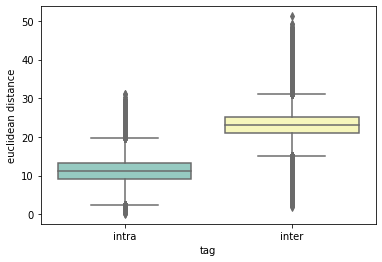

In [7]:
temp1 = intra_euclidean_dis_list + inter_euclidean_dis_list
temp2 = ['intra' for i in range(len(intra_euclidean_dis_list))] + ['inter' for i in range(len(inter_euclidean_dis_list))]
data_pic = pd.DataFrame({'euclidean distance':temp1,'tag':temp2})

fig,axes = plt.subplots(1,sharey=True)
sns.boxplot(x="tag", y="euclidean distance", data=data_pic, palette="Set3")